In [1]:
# 環境構築

!apt-get update
!apt-get install -y libsndfile1-dev
!pip install scipy
!pip install scikit-learn
!pip install librosa

/bin/bash: /home/allegro/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
/bin/bash: /home/allegro/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/bin/bash: /home/allegro/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/allegro/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/a

In [2]:
# clips 作成

SAMPLING_RATE = 44100 # 変更不可

clip_size = 81920 # 楽曲を再構築するパーツ1つあたりの大きさ
step_size = 20480 # clip をずらすときの大きさ
window_size = 10240 # CQT_CHROMA を取得するのに使用するサンプル数
hop_size = 640 # window をずらすときの大きさ

from scipy.io.wavfile import read, write
import glob
import os
import numpy as np
import librosa
import sys

if os.path.isfile("../data/out/clips.wav"):
    print("../data/out/clips.wav exists.")
    files = ["../data/out/clips.wav"]
else:
    # clips.npy をもとにデータを作成する 
    if os.path.isfile("../data/arrays/clips.npy"):
        print("loading ../data/arrays/clips.npy ...")
        clips = np.load("../data/arrays/clips.npy")
        print("creating ../data/out/clips.wav ...")
        write("../data/out/clips.wav", SAMPLING_RATE, clips.reshape((clips.shape[0] * clips.shape[1], )))
        files = ["../data/out/clips.wav"]
        
    # clips,npy がないとき /data/wav44100 内の WAV ファイルを参照する
    else:
        files = glob.glob("../data/wav44100/*.wav")
        #files = ["../data/wav44100/3DEmbodimentFromLines.wav"] # デバッグ用 
        
if len(files) == 0:
    print("WAV ファイルが見つかりませんでした。")
    sys.exit(1)
        
clips_filename = "../data/arrays/c" + str(clip_size) + "_s" + str(step_size) + "_f32_clips"

if os.path.isfile(clips_filename + ".npy"):
    print("loading " + clips_filename + ".npy ...")
    clips = np.load(clips_filename + ".npy")
else:
    print("creating " + clips_filename + ".npy ...")
    raw_data_list = [librosa.load(file, sr=SAMPLING_RATE)[0] for file in files] # 左の音だけ使う

    clips = np.zeros((0, clip_size), dtype=np.float32)
    for raw_data in raw_data_list:
        tmp = [raw_data[i:i + clip_size] for i in range(0, len(raw_data) - clip_size, step_size)]
        clips = np.vstack((clips, np.array(tmp)))
    np.save(clips_filename, clips)

print("The clip array has " + str(clips.shape[0]) + " clips.")

../data/out/clips.wav exists.
creating ../data/arrays/c81920_s20480_f32_clips.npy ...
The clip array has 57148 clips.


In [3]:
# cqt 作成

n_bins = 84

cqt_filename = clips_filename + "_w" + str(window_size) + "_h" + str(hop_size) + "_cqts"

if os.path.isfile(cqt_filename + ".npy"):
    print("loading " + cqt_filename + ".npy ...")
    cqts = np.load(cqt_filename + ".npy")
else:
    print("creating " + cqt_filename + ".npy ...")
    num = 0
    for clip in clips:
        print("cqt progress: clip " + str(num + 1) + " / " + str(len(clips)))
        
        tmp_cqt = librosa.cqt(clip, sr=SAMPLING_RATE, hop_length=hop_size, n_bins=n_bins)
        tmp_cqt = tmp_cqt.reshape((1, tmp_cqt.shape[0], tmp_cqt.shape[1]))
        
        if num == 0:
            cqts = tmp_cqt
        else:
            cqts = np.vstack((cqts, tmp_cqt))
            
        num += 1

    np.save(cqt_filename, cqts)
    
print("The cqt array has " + str(cqts.shape[0]) + " cqts.")
print("cqts.shape: " + str(cqts.shape))
print("Type(cqts[0][0][0]): " + str(type(cqts[0][0][0])))
print("np.max(cqts[0][0]): " + str(np.max(cqts[0][0])))

creating ../data/arrays/c81920_s20480_f32_clips_w10240_h640_cqts.npy ...
cqt progress: clip 1 / 57148
cqt progress: clip 2 / 57148
cqt progress: clip 3 / 57148
cqt progress: clip 4 / 57148
cqt progress: clip 5 / 57148
cqt progress: clip 6 / 57148
cqt progress: clip 7 / 57148
cqt progress: clip 8 / 57148
cqt progress: clip 9 / 57148
cqt progress: clip 10 / 57148
cqt progress: clip 11 / 57148
cqt progress: clip 12 / 57148
cqt progress: clip 13 / 57148
cqt progress: clip 14 / 57148
cqt progress: clip 15 / 57148
cqt progress: clip 16 / 57148
cqt progress: clip 17 / 57148
cqt progress: clip 18 / 57148
cqt progress: clip 19 / 57148
cqt progress: clip 20 / 57148
cqt progress: clip 21 / 57148
cqt progress: clip 22 / 57148
cqt progress: clip 23 / 57148
cqt progress: clip 24 / 57148
cqt progress: clip 25 / 57148
cqt progress: clip 26 / 57148
cqt progress: clip 27 / 57148
cqt progress: clip 28 / 57148
cqt progress: clip 29 / 57148
cqt progress: clip 30 / 57148
cqt progress: clip 31 / 57148
cqt pr

cqt progress: clip 268 / 57148
cqt progress: clip 269 / 57148
cqt progress: clip 270 / 57148
cqt progress: clip 271 / 57148
cqt progress: clip 272 / 57148
cqt progress: clip 273 / 57148
cqt progress: clip 274 / 57148
cqt progress: clip 275 / 57148
cqt progress: clip 276 / 57148
cqt progress: clip 277 / 57148
cqt progress: clip 278 / 57148
cqt progress: clip 279 / 57148
cqt progress: clip 280 / 57148
cqt progress: clip 281 / 57148
cqt progress: clip 282 / 57148
cqt progress: clip 283 / 57148
cqt progress: clip 284 / 57148
cqt progress: clip 285 / 57148
cqt progress: clip 286 / 57148
cqt progress: clip 287 / 57148
cqt progress: clip 288 / 57148
cqt progress: clip 289 / 57148
cqt progress: clip 290 / 57148
cqt progress: clip 291 / 57148
cqt progress: clip 292 / 57148
cqt progress: clip 293 / 57148
cqt progress: clip 294 / 57148
cqt progress: clip 295 / 57148
cqt progress: clip 296 / 57148
cqt progress: clip 297 / 57148
cqt progress: clip 298 / 57148
cqt progress: clip 299 / 57148
cqt prog

cqt progress: clip 535 / 57148
cqt progress: clip 536 / 57148
cqt progress: clip 537 / 57148
cqt progress: clip 538 / 57148
cqt progress: clip 539 / 57148
cqt progress: clip 540 / 57148
cqt progress: clip 541 / 57148
cqt progress: clip 542 / 57148
cqt progress: clip 543 / 57148
cqt progress: clip 544 / 57148
cqt progress: clip 545 / 57148
cqt progress: clip 546 / 57148
cqt progress: clip 547 / 57148
cqt progress: clip 548 / 57148
cqt progress: clip 549 / 57148
cqt progress: clip 550 / 57148
cqt progress: clip 551 / 57148
cqt progress: clip 552 / 57148
cqt progress: clip 553 / 57148
cqt progress: clip 554 / 57148
cqt progress: clip 555 / 57148
cqt progress: clip 556 / 57148
cqt progress: clip 557 / 57148
cqt progress: clip 558 / 57148
cqt progress: clip 559 / 57148
cqt progress: clip 560 / 57148
cqt progress: clip 561 / 57148
cqt progress: clip 562 / 57148
cqt progress: clip 563 / 57148
cqt progress: clip 564 / 57148
cqt progress: clip 565 / 57148
cqt progress: clip 566 / 57148
cqt prog

cqt progress: clip 801 / 57148
cqt progress: clip 802 / 57148
cqt progress: clip 803 / 57148
cqt progress: clip 804 / 57148
cqt progress: clip 805 / 57148
cqt progress: clip 806 / 57148
cqt progress: clip 807 / 57148
cqt progress: clip 808 / 57148
cqt progress: clip 809 / 57148
cqt progress: clip 810 / 57148
cqt progress: clip 811 / 57148
cqt progress: clip 812 / 57148
cqt progress: clip 813 / 57148
cqt progress: clip 814 / 57148
cqt progress: clip 815 / 57148
cqt progress: clip 816 / 57148
cqt progress: clip 817 / 57148
cqt progress: clip 818 / 57148
cqt progress: clip 819 / 57148
cqt progress: clip 820 / 57148
cqt progress: clip 821 / 57148
cqt progress: clip 822 / 57148
cqt progress: clip 823 / 57148
cqt progress: clip 824 / 57148
cqt progress: clip 825 / 57148
cqt progress: clip 826 / 57148
cqt progress: clip 827 / 57148
cqt progress: clip 828 / 57148
cqt progress: clip 829 / 57148
cqt progress: clip 830 / 57148
cqt progress: clip 831 / 57148
cqt progress: clip 832 / 57148
cqt prog

cqt progress: clip 1066 / 57148
cqt progress: clip 1067 / 57148
cqt progress: clip 1068 / 57148
cqt progress: clip 1069 / 57148
cqt progress: clip 1070 / 57148
cqt progress: clip 1071 / 57148
cqt progress: clip 1072 / 57148
cqt progress: clip 1073 / 57148
cqt progress: clip 1074 / 57148
cqt progress: clip 1075 / 57148
cqt progress: clip 1076 / 57148
cqt progress: clip 1077 / 57148
cqt progress: clip 1078 / 57148
cqt progress: clip 1079 / 57148
cqt progress: clip 1080 / 57148
cqt progress: clip 1081 / 57148
cqt progress: clip 1082 / 57148
cqt progress: clip 1083 / 57148
cqt progress: clip 1084 / 57148
cqt progress: clip 1085 / 57148
cqt progress: clip 1086 / 57148
cqt progress: clip 1087 / 57148
cqt progress: clip 1088 / 57148
cqt progress: clip 1089 / 57148
cqt progress: clip 1090 / 57148
cqt progress: clip 1091 / 57148
cqt progress: clip 1092 / 57148
cqt progress: clip 1093 / 57148
cqt progress: clip 1094 / 57148
cqt progress: clip 1095 / 57148
cqt progress: clip 1096 / 57148
cqt prog

cqt progress: clip 1326 / 57148
cqt progress: clip 1327 / 57148
cqt progress: clip 1328 / 57148
cqt progress: clip 1329 / 57148
cqt progress: clip 1330 / 57148
cqt progress: clip 1331 / 57148
cqt progress: clip 1332 / 57148
cqt progress: clip 1333 / 57148
cqt progress: clip 1334 / 57148
cqt progress: clip 1335 / 57148
cqt progress: clip 1336 / 57148
cqt progress: clip 1337 / 57148
cqt progress: clip 1338 / 57148
cqt progress: clip 1339 / 57148
cqt progress: clip 1340 / 57148
cqt progress: clip 1341 / 57148
cqt progress: clip 1342 / 57148
cqt progress: clip 1343 / 57148
cqt progress: clip 1344 / 57148
cqt progress: clip 1345 / 57148
cqt progress: clip 1346 / 57148
cqt progress: clip 1347 / 57148
cqt progress: clip 1348 / 57148
cqt progress: clip 1349 / 57148
cqt progress: clip 1350 / 57148
cqt progress: clip 1351 / 57148
cqt progress: clip 1352 / 57148
cqt progress: clip 1353 / 57148
cqt progress: clip 1354 / 57148
cqt progress: clip 1355 / 57148
cqt progress: clip 1356 / 57148
cqt prog

cqt progress: clip 1588 / 57148
cqt progress: clip 1589 / 57148
cqt progress: clip 1590 / 57148
cqt progress: clip 1591 / 57148
cqt progress: clip 1592 / 57148
cqt progress: clip 1593 / 57148
cqt progress: clip 1594 / 57148
cqt progress: clip 1595 / 57148
cqt progress: clip 1596 / 57148
cqt progress: clip 1597 / 57148
cqt progress: clip 1598 / 57148
cqt progress: clip 1599 / 57148
cqt progress: clip 1600 / 57148
cqt progress: clip 1601 / 57148
cqt progress: clip 1602 / 57148
cqt progress: clip 1603 / 57148
cqt progress: clip 1604 / 57148
cqt progress: clip 1605 / 57148
cqt progress: clip 1606 / 57148
cqt progress: clip 1607 / 57148
cqt progress: clip 1608 / 57148
cqt progress: clip 1609 / 57148
cqt progress: clip 1610 / 57148
cqt progress: clip 1611 / 57148
cqt progress: clip 1612 / 57148
cqt progress: clip 1613 / 57148
cqt progress: clip 1614 / 57148
cqt progress: clip 1615 / 57148
cqt progress: clip 1616 / 57148
cqt progress: clip 1617 / 57148
cqt progress: clip 1618 / 57148
cqt prog

cqt progress: clip 1849 / 57148
cqt progress: clip 1850 / 57148
cqt progress: clip 1851 / 57148
cqt progress: clip 1852 / 57148
cqt progress: clip 1853 / 57148
cqt progress: clip 1854 / 57148
cqt progress: clip 1855 / 57148
cqt progress: clip 1856 / 57148
cqt progress: clip 1857 / 57148
cqt progress: clip 1858 / 57148
cqt progress: clip 1859 / 57148
cqt progress: clip 1860 / 57148
cqt progress: clip 1861 / 57148
cqt progress: clip 1862 / 57148
cqt progress: clip 1863 / 57148
cqt progress: clip 1864 / 57148
cqt progress: clip 1865 / 57148
cqt progress: clip 1866 / 57148
cqt progress: clip 1867 / 57148
cqt progress: clip 1868 / 57148
cqt progress: clip 1869 / 57148
cqt progress: clip 1870 / 57148
cqt progress: clip 1871 / 57148
cqt progress: clip 1872 / 57148
cqt progress: clip 1873 / 57148
cqt progress: clip 1874 / 57148
cqt progress: clip 1875 / 57148
cqt progress: clip 1876 / 57148
cqt progress: clip 1877 / 57148
cqt progress: clip 1878 / 57148
cqt progress: clip 1879 / 57148
cqt prog

cqt progress: clip 2108 / 57148
cqt progress: clip 2109 / 57148
cqt progress: clip 2110 / 57148
cqt progress: clip 2111 / 57148
cqt progress: clip 2112 / 57148
cqt progress: clip 2113 / 57148
cqt progress: clip 2114 / 57148
cqt progress: clip 2115 / 57148
cqt progress: clip 2116 / 57148
cqt progress: clip 2117 / 57148
cqt progress: clip 2118 / 57148
cqt progress: clip 2119 / 57148
cqt progress: clip 2120 / 57148
cqt progress: clip 2121 / 57148
cqt progress: clip 2122 / 57148
cqt progress: clip 2123 / 57148
cqt progress: clip 2124 / 57148
cqt progress: clip 2125 / 57148
cqt progress: clip 2126 / 57148
cqt progress: clip 2127 / 57148
cqt progress: clip 2128 / 57148
cqt progress: clip 2129 / 57148
cqt progress: clip 2130 / 57148
cqt progress: clip 2131 / 57148
cqt progress: clip 2132 / 57148
cqt progress: clip 2133 / 57148
cqt progress: clip 2134 / 57148
cqt progress: clip 2135 / 57148
cqt progress: clip 2136 / 57148
cqt progress: clip 2137 / 57148
cqt progress: clip 2138 / 57148
cqt prog

cqt progress: clip 2365 / 57148
cqt progress: clip 2366 / 57148
cqt progress: clip 2367 / 57148
cqt progress: clip 2368 / 57148
cqt progress: clip 2369 / 57148
cqt progress: clip 2370 / 57148
cqt progress: clip 2371 / 57148
cqt progress: clip 2372 / 57148
cqt progress: clip 2373 / 57148
cqt progress: clip 2374 / 57148
cqt progress: clip 2375 / 57148
cqt progress: clip 2376 / 57148
cqt progress: clip 2377 / 57148
cqt progress: clip 2378 / 57148
cqt progress: clip 2379 / 57148
cqt progress: clip 2380 / 57148
cqt progress: clip 2381 / 57148
cqt progress: clip 2382 / 57148
cqt progress: clip 2383 / 57148
cqt progress: clip 2384 / 57148
cqt progress: clip 2385 / 57148
cqt progress: clip 2386 / 57148
cqt progress: clip 2387 / 57148
cqt progress: clip 2388 / 57148
cqt progress: clip 2389 / 57148
cqt progress: clip 2390 / 57148
cqt progress: clip 2391 / 57148
cqt progress: clip 2392 / 57148
cqt progress: clip 2393 / 57148
cqt progress: clip 2394 / 57148
cqt progress: clip 2395 / 57148
cqt prog

cqt progress: clip 2625 / 57148
cqt progress: clip 2626 / 57148
cqt progress: clip 2627 / 57148
cqt progress: clip 2628 / 57148
cqt progress: clip 2629 / 57148
cqt progress: clip 2630 / 57148
cqt progress: clip 2631 / 57148
cqt progress: clip 2632 / 57148
cqt progress: clip 2633 / 57148
cqt progress: clip 2634 / 57148
cqt progress: clip 2635 / 57148
cqt progress: clip 2636 / 57148
cqt progress: clip 2637 / 57148
cqt progress: clip 2638 / 57148
cqt progress: clip 2639 / 57148
cqt progress: clip 2640 / 57148
cqt progress: clip 2641 / 57148
cqt progress: clip 2642 / 57148
cqt progress: clip 2643 / 57148
cqt progress: clip 2644 / 57148
cqt progress: clip 2645 / 57148
cqt progress: clip 2646 / 57148
cqt progress: clip 2647 / 57148
cqt progress: clip 2648 / 57148
cqt progress: clip 2649 / 57148
cqt progress: clip 2650 / 57148
cqt progress: clip 2651 / 57148
cqt progress: clip 2652 / 57148
cqt progress: clip 2653 / 57148
cqt progress: clip 2654 / 57148
cqt progress: clip 2655 / 57148
cqt prog

cqt progress: clip 2885 / 57148
cqt progress: clip 2886 / 57148
cqt progress: clip 2887 / 57148
cqt progress: clip 2888 / 57148
cqt progress: clip 2889 / 57148
cqt progress: clip 2890 / 57148
cqt progress: clip 2891 / 57148
cqt progress: clip 2892 / 57148
cqt progress: clip 2893 / 57148
cqt progress: clip 2894 / 57148
cqt progress: clip 2895 / 57148
cqt progress: clip 2896 / 57148
cqt progress: clip 2897 / 57148
cqt progress: clip 2898 / 57148
cqt progress: clip 2899 / 57148
cqt progress: clip 2900 / 57148
cqt progress: clip 2901 / 57148
cqt progress: clip 2902 / 57148
cqt progress: clip 2903 / 57148
cqt progress: clip 2904 / 57148
cqt progress: clip 2905 / 57148
cqt progress: clip 2906 / 57148
cqt progress: clip 2907 / 57148
cqt progress: clip 2908 / 57148
cqt progress: clip 2909 / 57148
cqt progress: clip 2910 / 57148
cqt progress: clip 2911 / 57148
cqt progress: clip 2912 / 57148
cqt progress: clip 2913 / 57148
cqt progress: clip 2914 / 57148
cqt progress: clip 2915 / 57148
cqt prog

cqt progress: clip 3144 / 57148
cqt progress: clip 3145 / 57148
cqt progress: clip 3146 / 57148
cqt progress: clip 3147 / 57148
cqt progress: clip 3148 / 57148
cqt progress: clip 3149 / 57148
cqt progress: clip 3150 / 57148
cqt progress: clip 3151 / 57148
cqt progress: clip 3152 / 57148
cqt progress: clip 3153 / 57148
cqt progress: clip 3154 / 57148
cqt progress: clip 3155 / 57148
cqt progress: clip 3156 / 57148
cqt progress: clip 3157 / 57148
cqt progress: clip 3158 / 57148
cqt progress: clip 3159 / 57148
cqt progress: clip 3160 / 57148
cqt progress: clip 3161 / 57148
cqt progress: clip 3162 / 57148
cqt progress: clip 3163 / 57148
cqt progress: clip 3164 / 57148
cqt progress: clip 3165 / 57148
cqt progress: clip 3166 / 57148
cqt progress: clip 3167 / 57148
cqt progress: clip 3168 / 57148
cqt progress: clip 3169 / 57148
cqt progress: clip 3170 / 57148
cqt progress: clip 3171 / 57148
cqt progress: clip 3172 / 57148
cqt progress: clip 3173 / 57148
cqt progress: clip 3174 / 57148
cqt prog

cqt progress: clip 3404 / 57148
cqt progress: clip 3405 / 57148
cqt progress: clip 3406 / 57148
cqt progress: clip 3407 / 57148
cqt progress: clip 3408 / 57148
cqt progress: clip 3409 / 57148
cqt progress: clip 3410 / 57148
cqt progress: clip 3411 / 57148
cqt progress: clip 3412 / 57148
cqt progress: clip 3413 / 57148
cqt progress: clip 3414 / 57148
cqt progress: clip 3415 / 57148
cqt progress: clip 3416 / 57148
cqt progress: clip 3417 / 57148
cqt progress: clip 3418 / 57148
cqt progress: clip 3419 / 57148
cqt progress: clip 3420 / 57148
cqt progress: clip 3421 / 57148
cqt progress: clip 3422 / 57148
cqt progress: clip 3423 / 57148
cqt progress: clip 3424 / 57148
cqt progress: clip 3425 / 57148
cqt progress: clip 3426 / 57148
cqt progress: clip 3427 / 57148
cqt progress: clip 3428 / 57148
cqt progress: clip 3429 / 57148
cqt progress: clip 3430 / 57148
cqt progress: clip 3431 / 57148
cqt progress: clip 3432 / 57148
cqt progress: clip 3433 / 57148
cqt progress: clip 3434 / 57148
cqt prog

cqt progress: clip 3664 / 57148
cqt progress: clip 3665 / 57148
cqt progress: clip 3666 / 57148
cqt progress: clip 3667 / 57148
cqt progress: clip 3668 / 57148
cqt progress: clip 3669 / 57148
cqt progress: clip 3670 / 57148
cqt progress: clip 3671 / 57148
cqt progress: clip 3672 / 57148
cqt progress: clip 3673 / 57148
cqt progress: clip 3674 / 57148
cqt progress: clip 3675 / 57148
cqt progress: clip 3676 / 57148
cqt progress: clip 3677 / 57148
cqt progress: clip 3678 / 57148
cqt progress: clip 3679 / 57148
cqt progress: clip 3680 / 57148
cqt progress: clip 3681 / 57148
cqt progress: clip 3682 / 57148
cqt progress: clip 3683 / 57148
cqt progress: clip 3684 / 57148
cqt progress: clip 3685 / 57148
cqt progress: clip 3686 / 57148
cqt progress: clip 3687 / 57148
cqt progress: clip 3688 / 57148
cqt progress: clip 3689 / 57148
cqt progress: clip 3690 / 57148
cqt progress: clip 3691 / 57148
cqt progress: clip 3692 / 57148
cqt progress: clip 3693 / 57148
cqt progress: clip 3694 / 57148
cqt prog

cqt progress: clip 3923 / 57148
cqt progress: clip 3924 / 57148
cqt progress: clip 3925 / 57148
cqt progress: clip 3926 / 57148
cqt progress: clip 3927 / 57148
cqt progress: clip 3928 / 57148
cqt progress: clip 3929 / 57148
cqt progress: clip 3930 / 57148
cqt progress: clip 3931 / 57148
cqt progress: clip 3932 / 57148
cqt progress: clip 3933 / 57148
cqt progress: clip 3934 / 57148
cqt progress: clip 3935 / 57148
cqt progress: clip 3936 / 57148
cqt progress: clip 3937 / 57148
cqt progress: clip 3938 / 57148
cqt progress: clip 3939 / 57148
cqt progress: clip 3940 / 57148
cqt progress: clip 3941 / 57148
cqt progress: clip 3942 / 57148
cqt progress: clip 3943 / 57148
cqt progress: clip 3944 / 57148
cqt progress: clip 3945 / 57148
cqt progress: clip 3946 / 57148
cqt progress: clip 3947 / 57148
cqt progress: clip 3948 / 57148
cqt progress: clip 3949 / 57148
cqt progress: clip 3950 / 57148
cqt progress: clip 3951 / 57148
cqt progress: clip 3952 / 57148
cqt progress: clip 3953 / 57148
cqt prog

cqt progress: clip 4181 / 57148
cqt progress: clip 4182 / 57148
cqt progress: clip 4183 / 57148
cqt progress: clip 4184 / 57148
cqt progress: clip 4185 / 57148
cqt progress: clip 4186 / 57148
cqt progress: clip 4187 / 57148
cqt progress: clip 4188 / 57148
cqt progress: clip 4189 / 57148
cqt progress: clip 4190 / 57148
cqt progress: clip 4191 / 57148
cqt progress: clip 4192 / 57148
cqt progress: clip 4193 / 57148
cqt progress: clip 4194 / 57148
cqt progress: clip 4195 / 57148
cqt progress: clip 4196 / 57148
cqt progress: clip 4197 / 57148
cqt progress: clip 4198 / 57148
cqt progress: clip 4199 / 57148
cqt progress: clip 4200 / 57148
cqt progress: clip 4201 / 57148
cqt progress: clip 4202 / 57148
cqt progress: clip 4203 / 57148
cqt progress: clip 4204 / 57148
cqt progress: clip 4205 / 57148
cqt progress: clip 4206 / 57148
cqt progress: clip 4207 / 57148
cqt progress: clip 4208 / 57148
cqt progress: clip 4209 / 57148
cqt progress: clip 4210 / 57148
cqt progress: clip 4211 / 57148
cqt prog

cqt progress: clip 4439 / 57148
cqt progress: clip 4440 / 57148
cqt progress: clip 4441 / 57148
cqt progress: clip 4442 / 57148
cqt progress: clip 4443 / 57148
cqt progress: clip 4444 / 57148
cqt progress: clip 4445 / 57148
cqt progress: clip 4446 / 57148
cqt progress: clip 4447 / 57148
cqt progress: clip 4448 / 57148
cqt progress: clip 4449 / 57148
cqt progress: clip 4450 / 57148
cqt progress: clip 4451 / 57148
cqt progress: clip 4452 / 57148
cqt progress: clip 4453 / 57148
cqt progress: clip 4454 / 57148
cqt progress: clip 4455 / 57148
cqt progress: clip 4456 / 57148
cqt progress: clip 4457 / 57148
cqt progress: clip 4458 / 57148
cqt progress: clip 4459 / 57148
cqt progress: clip 4460 / 57148
cqt progress: clip 4461 / 57148
cqt progress: clip 4462 / 57148
cqt progress: clip 4463 / 57148
cqt progress: clip 4464 / 57148
cqt progress: clip 4465 / 57148
cqt progress: clip 4466 / 57148
cqt progress: clip 4467 / 57148
cqt progress: clip 4468 / 57148
cqt progress: clip 4469 / 57148
cqt prog

cqt progress: clip 4698 / 57148
cqt progress: clip 4699 / 57148
cqt progress: clip 4700 / 57148
cqt progress: clip 4701 / 57148
cqt progress: clip 4702 / 57148
cqt progress: clip 4703 / 57148
cqt progress: clip 4704 / 57148
cqt progress: clip 4705 / 57148
cqt progress: clip 4706 / 57148
cqt progress: clip 4707 / 57148
cqt progress: clip 4708 / 57148
cqt progress: clip 4709 / 57148
cqt progress: clip 4710 / 57148
cqt progress: clip 4711 / 57148
cqt progress: clip 4712 / 57148
cqt progress: clip 4713 / 57148
cqt progress: clip 4714 / 57148
cqt progress: clip 4715 / 57148
cqt progress: clip 4716 / 57148
cqt progress: clip 4717 / 57148
cqt progress: clip 4718 / 57148
cqt progress: clip 4719 / 57148
cqt progress: clip 4720 / 57148
cqt progress: clip 4721 / 57148
cqt progress: clip 4722 / 57148
cqt progress: clip 4723 / 57148
cqt progress: clip 4724 / 57148
cqt progress: clip 4725 / 57148
cqt progress: clip 4726 / 57148
cqt progress: clip 4727 / 57148
cqt progress: clip 4728 / 57148
cqt prog

cqt progress: clip 4957 / 57148
cqt progress: clip 4958 / 57148
cqt progress: clip 4959 / 57148
cqt progress: clip 4960 / 57148
cqt progress: clip 4961 / 57148
cqt progress: clip 4962 / 57148
cqt progress: clip 4963 / 57148
cqt progress: clip 4964 / 57148
cqt progress: clip 4965 / 57148
cqt progress: clip 4966 / 57148
cqt progress: clip 4967 / 57148
cqt progress: clip 4968 / 57148
cqt progress: clip 4969 / 57148
cqt progress: clip 4970 / 57148
cqt progress: clip 4971 / 57148
cqt progress: clip 4972 / 57148
cqt progress: clip 4973 / 57148
cqt progress: clip 4974 / 57148
cqt progress: clip 4975 / 57148
cqt progress: clip 4976 / 57148
cqt progress: clip 4977 / 57148
cqt progress: clip 4978 / 57148
cqt progress: clip 4979 / 57148
cqt progress: clip 4980 / 57148
cqt progress: clip 4981 / 57148
cqt progress: clip 4982 / 57148
cqt progress: clip 4983 / 57148
cqt progress: clip 4984 / 57148
cqt progress: clip 4985 / 57148
cqt progress: clip 4986 / 57148
cqt progress: clip 4987 / 57148
cqt prog

cqt progress: clip 5214 / 57148
cqt progress: clip 5215 / 57148
cqt progress: clip 5216 / 57148
cqt progress: clip 5217 / 57148
cqt progress: clip 5218 / 57148
cqt progress: clip 5219 / 57148
cqt progress: clip 5220 / 57148
cqt progress: clip 5221 / 57148
cqt progress: clip 5222 / 57148
cqt progress: clip 5223 / 57148
cqt progress: clip 5224 / 57148
cqt progress: clip 5225 / 57148
cqt progress: clip 5226 / 57148
cqt progress: clip 5227 / 57148
cqt progress: clip 5228 / 57148
cqt progress: clip 5229 / 57148
cqt progress: clip 5230 / 57148
cqt progress: clip 5231 / 57148
cqt progress: clip 5232 / 57148
cqt progress: clip 5233 / 57148
cqt progress: clip 5234 / 57148
cqt progress: clip 5235 / 57148
cqt progress: clip 5236 / 57148
cqt progress: clip 5237 / 57148
cqt progress: clip 5238 / 57148
cqt progress: clip 5239 / 57148
cqt progress: clip 5240 / 57148
cqt progress: clip 5241 / 57148
cqt progress: clip 5242 / 57148
cqt progress: clip 5243 / 57148
cqt progress: clip 5244 / 57148
cqt prog

cqt progress: clip 5472 / 57148
cqt progress: clip 5473 / 57148
cqt progress: clip 5474 / 57148
cqt progress: clip 5475 / 57148
cqt progress: clip 5476 / 57148
cqt progress: clip 5477 / 57148
cqt progress: clip 5478 / 57148
cqt progress: clip 5479 / 57148
cqt progress: clip 5480 / 57148
cqt progress: clip 5481 / 57148
cqt progress: clip 5482 / 57148
cqt progress: clip 5483 / 57148
cqt progress: clip 5484 / 57148
cqt progress: clip 5485 / 57148
cqt progress: clip 5486 / 57148
cqt progress: clip 5487 / 57148
cqt progress: clip 5488 / 57148
cqt progress: clip 5489 / 57148
cqt progress: clip 5490 / 57148
cqt progress: clip 5491 / 57148
cqt progress: clip 5492 / 57148
cqt progress: clip 5493 / 57148
cqt progress: clip 5494 / 57148
cqt progress: clip 5495 / 57148
cqt progress: clip 5496 / 57148
cqt progress: clip 5497 / 57148
cqt progress: clip 5498 / 57148
cqt progress: clip 5499 / 57148
cqt progress: clip 5500 / 57148
cqt progress: clip 5501 / 57148
cqt progress: clip 5502 / 57148
cqt prog

cqt progress: clip 5730 / 57148
cqt progress: clip 5731 / 57148
cqt progress: clip 5732 / 57148
cqt progress: clip 5733 / 57148
cqt progress: clip 5734 / 57148
cqt progress: clip 5735 / 57148
cqt progress: clip 5736 / 57148
cqt progress: clip 5737 / 57148
cqt progress: clip 5738 / 57148
cqt progress: clip 5739 / 57148
cqt progress: clip 5740 / 57148
cqt progress: clip 5741 / 57148
cqt progress: clip 5742 / 57148
cqt progress: clip 5743 / 57148
cqt progress: clip 5744 / 57148
cqt progress: clip 5745 / 57148
cqt progress: clip 5746 / 57148
cqt progress: clip 5747 / 57148
cqt progress: clip 5748 / 57148
cqt progress: clip 5749 / 57148
cqt progress: clip 5750 / 57148
cqt progress: clip 5751 / 57148
cqt progress: clip 5752 / 57148
cqt progress: clip 5753 / 57148
cqt progress: clip 5754 / 57148
cqt progress: clip 5755 / 57148
cqt progress: clip 5756 / 57148
cqt progress: clip 5757 / 57148
cqt progress: clip 5758 / 57148
cqt progress: clip 5759 / 57148
cqt progress: clip 5760 / 57148
cqt prog

cqt progress: clip 5988 / 57148
cqt progress: clip 5989 / 57148
cqt progress: clip 5990 / 57148
cqt progress: clip 5991 / 57148
cqt progress: clip 5992 / 57148
cqt progress: clip 5993 / 57148
cqt progress: clip 5994 / 57148
cqt progress: clip 5995 / 57148
cqt progress: clip 5996 / 57148
cqt progress: clip 5997 / 57148
cqt progress: clip 5998 / 57148
cqt progress: clip 5999 / 57148
cqt progress: clip 6000 / 57148
cqt progress: clip 6001 / 57148
cqt progress: clip 6002 / 57148
cqt progress: clip 6003 / 57148
cqt progress: clip 6004 / 57148
cqt progress: clip 6005 / 57148
cqt progress: clip 6006 / 57148
cqt progress: clip 6007 / 57148
cqt progress: clip 6008 / 57148
cqt progress: clip 6009 / 57148
cqt progress: clip 6010 / 57148
cqt progress: clip 6011 / 57148
cqt progress: clip 6012 / 57148
cqt progress: clip 6013 / 57148
cqt progress: clip 6014 / 57148
cqt progress: clip 6015 / 57148
cqt progress: clip 6016 / 57148
cqt progress: clip 6017 / 57148
cqt progress: clip 6018 / 57148
cqt prog

cqt progress: clip 6246 / 57148
cqt progress: clip 6247 / 57148
cqt progress: clip 6248 / 57148
cqt progress: clip 6249 / 57148
cqt progress: clip 6250 / 57148
cqt progress: clip 6251 / 57148
cqt progress: clip 6252 / 57148
cqt progress: clip 6253 / 57148
cqt progress: clip 6254 / 57148
cqt progress: clip 6255 / 57148
cqt progress: clip 6256 / 57148
cqt progress: clip 6257 / 57148
cqt progress: clip 6258 / 57148
cqt progress: clip 6259 / 57148
cqt progress: clip 6260 / 57148
cqt progress: clip 6261 / 57148
cqt progress: clip 6262 / 57148
cqt progress: clip 6263 / 57148
cqt progress: clip 6264 / 57148
cqt progress: clip 6265 / 57148
cqt progress: clip 6266 / 57148
cqt progress: clip 6267 / 57148
cqt progress: clip 6268 / 57148
cqt progress: clip 6269 / 57148
cqt progress: clip 6270 / 57148
cqt progress: clip 6271 / 57148
cqt progress: clip 6272 / 57148
cqt progress: clip 6273 / 57148
cqt progress: clip 6274 / 57148
cqt progress: clip 6275 / 57148
cqt progress: clip 6276 / 57148
cqt prog

cqt progress: clip 6504 / 57148
cqt progress: clip 6505 / 57148
cqt progress: clip 6506 / 57148
cqt progress: clip 6507 / 57148
cqt progress: clip 6508 / 57148
cqt progress: clip 6509 / 57148
cqt progress: clip 6510 / 57148
cqt progress: clip 6511 / 57148
cqt progress: clip 6512 / 57148
cqt progress: clip 6513 / 57148
cqt progress: clip 6514 / 57148
cqt progress: clip 6515 / 57148
cqt progress: clip 6516 / 57148
cqt progress: clip 6517 / 57148
cqt progress: clip 6518 / 57148
cqt progress: clip 6519 / 57148
cqt progress: clip 6520 / 57148
cqt progress: clip 6521 / 57148
cqt progress: clip 6522 / 57148
cqt progress: clip 6523 / 57148
cqt progress: clip 6524 / 57148
cqt progress: clip 6525 / 57148
cqt progress: clip 6526 / 57148
cqt progress: clip 6527 / 57148
cqt progress: clip 6528 / 57148
cqt progress: clip 6529 / 57148
cqt progress: clip 6530 / 57148
cqt progress: clip 6531 / 57148
cqt progress: clip 6532 / 57148
cqt progress: clip 6533 / 57148
cqt progress: clip 6534 / 57148
cqt prog

cqt progress: clip 6762 / 57148
cqt progress: clip 6763 / 57148
cqt progress: clip 6764 / 57148
cqt progress: clip 6765 / 57148
cqt progress: clip 6766 / 57148
cqt progress: clip 6767 / 57148
cqt progress: clip 6768 / 57148
cqt progress: clip 6769 / 57148
cqt progress: clip 6770 / 57148
cqt progress: clip 6771 / 57148
cqt progress: clip 6772 / 57148
cqt progress: clip 6773 / 57148
cqt progress: clip 6774 / 57148
cqt progress: clip 6775 / 57148
cqt progress: clip 6776 / 57148
cqt progress: clip 6777 / 57148
cqt progress: clip 6778 / 57148
cqt progress: clip 6779 / 57148
cqt progress: clip 6780 / 57148
cqt progress: clip 6781 / 57148
cqt progress: clip 6782 / 57148
cqt progress: clip 6783 / 57148
cqt progress: clip 6784 / 57148
cqt progress: clip 6785 / 57148
cqt progress: clip 6786 / 57148
cqt progress: clip 6787 / 57148
cqt progress: clip 6788 / 57148
cqt progress: clip 6789 / 57148
cqt progress: clip 6790 / 57148
cqt progress: clip 6791 / 57148
cqt progress: clip 6792 / 57148
cqt prog

cqt progress: clip 7020 / 57148
cqt progress: clip 7021 / 57148
cqt progress: clip 7022 / 57148
cqt progress: clip 7023 / 57148
cqt progress: clip 7024 / 57148
cqt progress: clip 7025 / 57148
cqt progress: clip 7026 / 57148
cqt progress: clip 7027 / 57148
cqt progress: clip 7028 / 57148
cqt progress: clip 7029 / 57148
cqt progress: clip 7030 / 57148
cqt progress: clip 7031 / 57148
cqt progress: clip 7032 / 57148
cqt progress: clip 7033 / 57148
cqt progress: clip 7034 / 57148
cqt progress: clip 7035 / 57148
cqt progress: clip 7036 / 57148
cqt progress: clip 7037 / 57148
cqt progress: clip 7038 / 57148
cqt progress: clip 7039 / 57148
cqt progress: clip 7040 / 57148
cqt progress: clip 7041 / 57148
cqt progress: clip 7042 / 57148
cqt progress: clip 7043 / 57148
cqt progress: clip 7044 / 57148
cqt progress: clip 7045 / 57148
cqt progress: clip 7046 / 57148
cqt progress: clip 7047 / 57148
cqt progress: clip 7048 / 57148
cqt progress: clip 7049 / 57148
cqt progress: clip 7050 / 57148
cqt prog

cqt progress: clip 7279 / 57148
cqt progress: clip 7280 / 57148
cqt progress: clip 7281 / 57148
cqt progress: clip 7282 / 57148
cqt progress: clip 7283 / 57148
cqt progress: clip 7284 / 57148
cqt progress: clip 7285 / 57148
cqt progress: clip 7286 / 57148
cqt progress: clip 7287 / 57148
cqt progress: clip 7288 / 57148
cqt progress: clip 7289 / 57148
cqt progress: clip 7290 / 57148
cqt progress: clip 7291 / 57148
cqt progress: clip 7292 / 57148
cqt progress: clip 7293 / 57148
cqt progress: clip 7294 / 57148
cqt progress: clip 7295 / 57148
cqt progress: clip 7296 / 57148
cqt progress: clip 7297 / 57148
cqt progress: clip 7298 / 57148
cqt progress: clip 7299 / 57148
cqt progress: clip 7300 / 57148
cqt progress: clip 7301 / 57148
cqt progress: clip 7302 / 57148
cqt progress: clip 7303 / 57148
cqt progress: clip 7304 / 57148
cqt progress: clip 7305 / 57148
cqt progress: clip 7306 / 57148
cqt progress: clip 7307 / 57148
cqt progress: clip 7308 / 57148
cqt progress: clip 7309 / 57148
cqt prog

cqt progress: clip 7538 / 57148
cqt progress: clip 7539 / 57148
cqt progress: clip 7540 / 57148
cqt progress: clip 7541 / 57148
cqt progress: clip 7542 / 57148
cqt progress: clip 7543 / 57148
cqt progress: clip 7544 / 57148
cqt progress: clip 7545 / 57148
cqt progress: clip 7546 / 57148
cqt progress: clip 7547 / 57148
cqt progress: clip 7548 / 57148
cqt progress: clip 7549 / 57148
cqt progress: clip 7550 / 57148
cqt progress: clip 7551 / 57148
cqt progress: clip 7552 / 57148
cqt progress: clip 7553 / 57148
cqt progress: clip 7554 / 57148
cqt progress: clip 7555 / 57148
cqt progress: clip 7556 / 57148
cqt progress: clip 7557 / 57148
cqt progress: clip 7558 / 57148
cqt progress: clip 7559 / 57148
cqt progress: clip 7560 / 57148
cqt progress: clip 7561 / 57148
cqt progress: clip 7562 / 57148
cqt progress: clip 7563 / 57148
cqt progress: clip 7564 / 57148
cqt progress: clip 7565 / 57148
cqt progress: clip 7566 / 57148
cqt progress: clip 7567 / 57148
cqt progress: clip 7568 / 57148
cqt prog

cqt progress: clip 7796 / 57148
cqt progress: clip 7797 / 57148
cqt progress: clip 7798 / 57148
cqt progress: clip 7799 / 57148
cqt progress: clip 7800 / 57148
cqt progress: clip 7801 / 57148
cqt progress: clip 7802 / 57148
cqt progress: clip 7803 / 57148
cqt progress: clip 7804 / 57148
cqt progress: clip 7805 / 57148
cqt progress: clip 7806 / 57148
cqt progress: clip 7807 / 57148
cqt progress: clip 7808 / 57148
cqt progress: clip 7809 / 57148
cqt progress: clip 7810 / 57148
cqt progress: clip 7811 / 57148
cqt progress: clip 7812 / 57148
cqt progress: clip 7813 / 57148
cqt progress: clip 7814 / 57148
cqt progress: clip 7815 / 57148
cqt progress: clip 7816 / 57148
cqt progress: clip 7817 / 57148
cqt progress: clip 7818 / 57148
cqt progress: clip 7819 / 57148
cqt progress: clip 7820 / 57148
cqt progress: clip 7821 / 57148
cqt progress: clip 7822 / 57148
cqt progress: clip 7823 / 57148
cqt progress: clip 7824 / 57148
cqt progress: clip 7825 / 57148
cqt progress: clip 7826 / 57148
cqt prog

cqt progress: clip 8054 / 57148
cqt progress: clip 8055 / 57148
cqt progress: clip 8056 / 57148
cqt progress: clip 8057 / 57148
cqt progress: clip 8058 / 57148
cqt progress: clip 8059 / 57148
cqt progress: clip 8060 / 57148
cqt progress: clip 8061 / 57148
cqt progress: clip 8062 / 57148
cqt progress: clip 8063 / 57148
cqt progress: clip 8064 / 57148
cqt progress: clip 8065 / 57148
cqt progress: clip 8066 / 57148
cqt progress: clip 8067 / 57148
cqt progress: clip 8068 / 57148
cqt progress: clip 8069 / 57148
cqt progress: clip 8070 / 57148
cqt progress: clip 8071 / 57148
cqt progress: clip 8072 / 57148
cqt progress: clip 8073 / 57148
cqt progress: clip 8074 / 57148
cqt progress: clip 8075 / 57148
cqt progress: clip 8076 / 57148
cqt progress: clip 8077 / 57148
cqt progress: clip 8078 / 57148
cqt progress: clip 8079 / 57148
cqt progress: clip 8080 / 57148
cqt progress: clip 8081 / 57148
cqt progress: clip 8082 / 57148
cqt progress: clip 8083 / 57148
cqt progress: clip 8084 / 57148
cqt prog

cqt progress: clip 8313 / 57148
cqt progress: clip 8314 / 57148
cqt progress: clip 8315 / 57148
cqt progress: clip 8316 / 57148
cqt progress: clip 8317 / 57148
cqt progress: clip 8318 / 57148
cqt progress: clip 8319 / 57148
cqt progress: clip 8320 / 57148
cqt progress: clip 8321 / 57148
cqt progress: clip 8322 / 57148
cqt progress: clip 8323 / 57148
cqt progress: clip 8324 / 57148
cqt progress: clip 8325 / 57148
cqt progress: clip 8326 / 57148
cqt progress: clip 8327 / 57148
cqt progress: clip 8328 / 57148
cqt progress: clip 8329 / 57148
cqt progress: clip 8330 / 57148
cqt progress: clip 8331 / 57148
cqt progress: clip 8332 / 57148
cqt progress: clip 8333 / 57148
cqt progress: clip 8334 / 57148
cqt progress: clip 8335 / 57148
cqt progress: clip 8336 / 57148
cqt progress: clip 8337 / 57148
cqt progress: clip 8338 / 57148
cqt progress: clip 8339 / 57148
cqt progress: clip 8340 / 57148
cqt progress: clip 8341 / 57148
cqt progress: clip 8342 / 57148
cqt progress: clip 8343 / 57148
cqt prog

cqt progress: clip 8571 / 57148
cqt progress: clip 8572 / 57148
cqt progress: clip 8573 / 57148
cqt progress: clip 8574 / 57148
cqt progress: clip 8575 / 57148
cqt progress: clip 8576 / 57148
cqt progress: clip 8577 / 57148
cqt progress: clip 8578 / 57148
cqt progress: clip 8579 / 57148
cqt progress: clip 8580 / 57148
cqt progress: clip 8581 / 57148
cqt progress: clip 8582 / 57148
cqt progress: clip 8583 / 57148
cqt progress: clip 8584 / 57148
cqt progress: clip 8585 / 57148
cqt progress: clip 8586 / 57148
cqt progress: clip 8587 / 57148
cqt progress: clip 8588 / 57148
cqt progress: clip 8589 / 57148
cqt progress: clip 8590 / 57148
cqt progress: clip 8591 / 57148
cqt progress: clip 8592 / 57148
cqt progress: clip 8593 / 57148
cqt progress: clip 8594 / 57148
cqt progress: clip 8595 / 57148
cqt progress: clip 8596 / 57148
cqt progress: clip 8597 / 57148
cqt progress: clip 8598 / 57148
cqt progress: clip 8599 / 57148
cqt progress: clip 8600 / 57148
cqt progress: clip 8601 / 57148
cqt prog

cqt progress: clip 8830 / 57148
cqt progress: clip 8831 / 57148
cqt progress: clip 8832 / 57148
cqt progress: clip 8833 / 57148
cqt progress: clip 8834 / 57148
cqt progress: clip 8835 / 57148
cqt progress: clip 8836 / 57148
cqt progress: clip 8837 / 57148
cqt progress: clip 8838 / 57148
cqt progress: clip 8839 / 57148
cqt progress: clip 8840 / 57148
cqt progress: clip 8841 / 57148
cqt progress: clip 8842 / 57148
cqt progress: clip 8843 / 57148
cqt progress: clip 8844 / 57148
cqt progress: clip 8845 / 57148
cqt progress: clip 8846 / 57148
cqt progress: clip 8847 / 57148
cqt progress: clip 8848 / 57148
cqt progress: clip 8849 / 57148
cqt progress: clip 8850 / 57148
cqt progress: clip 8851 / 57148
cqt progress: clip 8852 / 57148
cqt progress: clip 8853 / 57148
cqt progress: clip 8854 / 57148
cqt progress: clip 8855 / 57148
cqt progress: clip 8856 / 57148
cqt progress: clip 8857 / 57148
cqt progress: clip 8858 / 57148
cqt progress: clip 8859 / 57148
cqt progress: clip 8860 / 57148
cqt prog

cqt progress: clip 9088 / 57148
cqt progress: clip 9089 / 57148
cqt progress: clip 9090 / 57148
cqt progress: clip 9091 / 57148
cqt progress: clip 9092 / 57148
cqt progress: clip 9093 / 57148
cqt progress: clip 9094 / 57148
cqt progress: clip 9095 / 57148
cqt progress: clip 9096 / 57148
cqt progress: clip 9097 / 57148
cqt progress: clip 9098 / 57148
cqt progress: clip 9099 / 57148
cqt progress: clip 9100 / 57148
cqt progress: clip 9101 / 57148
cqt progress: clip 9102 / 57148
cqt progress: clip 9103 / 57148
cqt progress: clip 9104 / 57148
cqt progress: clip 9105 / 57148
cqt progress: clip 9106 / 57148
cqt progress: clip 9107 / 57148
cqt progress: clip 9108 / 57148
cqt progress: clip 9109 / 57148
cqt progress: clip 9110 / 57148
cqt progress: clip 9111 / 57148
cqt progress: clip 9112 / 57148
cqt progress: clip 9113 / 57148
cqt progress: clip 9114 / 57148
cqt progress: clip 9115 / 57148
cqt progress: clip 9116 / 57148
cqt progress: clip 9117 / 57148
cqt progress: clip 9118 / 57148
cqt prog

cqt progress: clip 9346 / 57148
cqt progress: clip 9347 / 57148
cqt progress: clip 9348 / 57148
cqt progress: clip 9349 / 57148
cqt progress: clip 9350 / 57148
cqt progress: clip 9351 / 57148
cqt progress: clip 9352 / 57148
cqt progress: clip 9353 / 57148
cqt progress: clip 9354 / 57148
cqt progress: clip 9355 / 57148
cqt progress: clip 9356 / 57148
cqt progress: clip 9357 / 57148
cqt progress: clip 9358 / 57148
cqt progress: clip 9359 / 57148
cqt progress: clip 9360 / 57148
cqt progress: clip 9361 / 57148
cqt progress: clip 9362 / 57148
cqt progress: clip 9363 / 57148
cqt progress: clip 9364 / 57148
cqt progress: clip 9365 / 57148
cqt progress: clip 9366 / 57148
cqt progress: clip 9367 / 57148
cqt progress: clip 9368 / 57148
cqt progress: clip 9369 / 57148
cqt progress: clip 9370 / 57148
cqt progress: clip 9371 / 57148
cqt progress: clip 9372 / 57148
cqt progress: clip 9373 / 57148
cqt progress: clip 9374 / 57148
cqt progress: clip 9375 / 57148
cqt progress: clip 9376 / 57148
cqt prog

cqt progress: clip 9604 / 57148
cqt progress: clip 9605 / 57148
cqt progress: clip 9606 / 57148
cqt progress: clip 9607 / 57148
cqt progress: clip 9608 / 57148
cqt progress: clip 9609 / 57148
cqt progress: clip 9610 / 57148
cqt progress: clip 9611 / 57148
cqt progress: clip 9612 / 57148
cqt progress: clip 9613 / 57148
cqt progress: clip 9614 / 57148
cqt progress: clip 9615 / 57148
cqt progress: clip 9616 / 57148
cqt progress: clip 9617 / 57148
cqt progress: clip 9618 / 57148
cqt progress: clip 9619 / 57148
cqt progress: clip 9620 / 57148
cqt progress: clip 9621 / 57148
cqt progress: clip 9622 / 57148
cqt progress: clip 9623 / 57148
cqt progress: clip 9624 / 57148
cqt progress: clip 9625 / 57148
cqt progress: clip 9626 / 57148
cqt progress: clip 9627 / 57148
cqt progress: clip 9628 / 57148
cqt progress: clip 9629 / 57148
cqt progress: clip 9630 / 57148
cqt progress: clip 9631 / 57148
cqt progress: clip 9632 / 57148
cqt progress: clip 9633 / 57148
cqt progress: clip 9634 / 57148
cqt prog

cqt progress: clip 9862 / 57148
cqt progress: clip 9863 / 57148
cqt progress: clip 9864 / 57148
cqt progress: clip 9865 / 57148
cqt progress: clip 9866 / 57148
cqt progress: clip 9867 / 57148
cqt progress: clip 9868 / 57148
cqt progress: clip 9869 / 57148
cqt progress: clip 9870 / 57148
cqt progress: clip 9871 / 57148
cqt progress: clip 9872 / 57148
cqt progress: clip 9873 / 57148
cqt progress: clip 9874 / 57148
cqt progress: clip 9875 / 57148
cqt progress: clip 9876 / 57148
cqt progress: clip 9877 / 57148
cqt progress: clip 9878 / 57148
cqt progress: clip 9879 / 57148
cqt progress: clip 9880 / 57148
cqt progress: clip 9881 / 57148
cqt progress: clip 9882 / 57148
cqt progress: clip 9883 / 57148
cqt progress: clip 9884 / 57148
cqt progress: clip 9885 / 57148
cqt progress: clip 9886 / 57148
cqt progress: clip 9887 / 57148
cqt progress: clip 9888 / 57148
cqt progress: clip 9889 / 57148
cqt progress: clip 9890 / 57148
cqt progress: clip 9891 / 57148
cqt progress: clip 9892 / 57148
cqt prog

cqt progress: clip 10116 / 57148
cqt progress: clip 10117 / 57148
cqt progress: clip 10118 / 57148
cqt progress: clip 10119 / 57148
cqt progress: clip 10120 / 57148
cqt progress: clip 10121 / 57148
cqt progress: clip 10122 / 57148
cqt progress: clip 10123 / 57148
cqt progress: clip 10124 / 57148
cqt progress: clip 10125 / 57148
cqt progress: clip 10126 / 57148
cqt progress: clip 10127 / 57148
cqt progress: clip 10128 / 57148
cqt progress: clip 10129 / 57148
cqt progress: clip 10130 / 57148
cqt progress: clip 10131 / 57148
cqt progress: clip 10132 / 57148
cqt progress: clip 10133 / 57148
cqt progress: clip 10134 / 57148
cqt progress: clip 10135 / 57148
cqt progress: clip 10136 / 57148
cqt progress: clip 10137 / 57148
cqt progress: clip 10138 / 57148
cqt progress: clip 10139 / 57148
cqt progress: clip 10140 / 57148
cqt progress: clip 10141 / 57148
cqt progress: clip 10142 / 57148
cqt progress: clip 10143 / 57148
cqt progress: clip 10144 / 57148
cqt progress: clip 10145 / 57148
cqt progre

cqt progress: clip 10366 / 57148
cqt progress: clip 10367 / 57148
cqt progress: clip 10368 / 57148
cqt progress: clip 10369 / 57148
cqt progress: clip 10370 / 57148
cqt progress: clip 10371 / 57148
cqt progress: clip 10372 / 57148
cqt progress: clip 10373 / 57148
cqt progress: clip 10374 / 57148
cqt progress: clip 10375 / 57148
cqt progress: clip 10376 / 57148
cqt progress: clip 10377 / 57148
cqt progress: clip 10378 / 57148
cqt progress: clip 10379 / 57148
cqt progress: clip 10380 / 57148
cqt progress: clip 10381 / 57148
cqt progress: clip 10382 / 57148
cqt progress: clip 10383 / 57148
cqt progress: clip 10384 / 57148
cqt progress: clip 10385 / 57148
cqt progress: clip 10386 / 57148
cqt progress: clip 10387 / 57148
cqt progress: clip 10388 / 57148
cqt progress: clip 10389 / 57148
cqt progress: clip 10390 / 57148
cqt progress: clip 10391 / 57148
cqt progress: clip 10392 / 57148
cqt progress: clip 10393 / 57148
cqt progress: clip 10394 / 57148
cqt progress: clip 10395 / 57148
cqt progre

cqt progress: clip 10616 / 57148
cqt progress: clip 10617 / 57148
cqt progress: clip 10618 / 57148
cqt progress: clip 10619 / 57148
cqt progress: clip 10620 / 57148
cqt progress: clip 10621 / 57148
cqt progress: clip 10622 / 57148
cqt progress: clip 10623 / 57148
cqt progress: clip 10624 / 57148
cqt progress: clip 10625 / 57148
cqt progress: clip 10626 / 57148
cqt progress: clip 10627 / 57148
cqt progress: clip 10628 / 57148
cqt progress: clip 10629 / 57148
cqt progress: clip 10630 / 57148
cqt progress: clip 10631 / 57148
cqt progress: clip 10632 / 57148
cqt progress: clip 10633 / 57148
cqt progress: clip 10634 / 57148
cqt progress: clip 10635 / 57148
cqt progress: clip 10636 / 57148
cqt progress: clip 10637 / 57148
cqt progress: clip 10638 / 57148
cqt progress: clip 10639 / 57148
cqt progress: clip 10640 / 57148
cqt progress: clip 10641 / 57148
cqt progress: clip 10642 / 57148
cqt progress: clip 10643 / 57148
cqt progress: clip 10644 / 57148
cqt progress: clip 10645 / 57148
cqt progre

cqt progress: clip 10866 / 57148
cqt progress: clip 10867 / 57148
cqt progress: clip 10868 / 57148
cqt progress: clip 10869 / 57148
cqt progress: clip 10870 / 57148
cqt progress: clip 10871 / 57148
cqt progress: clip 10872 / 57148
cqt progress: clip 10873 / 57148
cqt progress: clip 10874 / 57148
cqt progress: clip 10875 / 57148
cqt progress: clip 10876 / 57148
cqt progress: clip 10877 / 57148
cqt progress: clip 10878 / 57148
cqt progress: clip 10879 / 57148
cqt progress: clip 10880 / 57148
cqt progress: clip 10881 / 57148
cqt progress: clip 10882 / 57148
cqt progress: clip 10883 / 57148
cqt progress: clip 10884 / 57148
cqt progress: clip 10885 / 57148
cqt progress: clip 10886 / 57148
cqt progress: clip 10887 / 57148
cqt progress: clip 10888 / 57148
cqt progress: clip 10889 / 57148
cqt progress: clip 10890 / 57148
cqt progress: clip 10891 / 57148
cqt progress: clip 10892 / 57148
cqt progress: clip 10893 / 57148
cqt progress: clip 10894 / 57148
cqt progress: clip 10895 / 57148
cqt progre

cqt progress: clip 11116 / 57148
cqt progress: clip 11117 / 57148
cqt progress: clip 11118 / 57148
cqt progress: clip 11119 / 57148
cqt progress: clip 11120 / 57148
cqt progress: clip 11121 / 57148
cqt progress: clip 11122 / 57148
cqt progress: clip 11123 / 57148
cqt progress: clip 11124 / 57148
cqt progress: clip 11125 / 57148
cqt progress: clip 11126 / 57148
cqt progress: clip 11127 / 57148
cqt progress: clip 11128 / 57148
cqt progress: clip 11129 / 57148
cqt progress: clip 11130 / 57148
cqt progress: clip 11131 / 57148
cqt progress: clip 11132 / 57148
cqt progress: clip 11133 / 57148
cqt progress: clip 11134 / 57148
cqt progress: clip 11135 / 57148
cqt progress: clip 11136 / 57148
cqt progress: clip 11137 / 57148
cqt progress: clip 11138 / 57148
cqt progress: clip 11139 / 57148
cqt progress: clip 11140 / 57148
cqt progress: clip 11141 / 57148
cqt progress: clip 11142 / 57148
cqt progress: clip 11143 / 57148
cqt progress: clip 11144 / 57148
cqt progress: clip 11145 / 57148
cqt progre

cqt progress: clip 11366 / 57148
cqt progress: clip 11367 / 57148
cqt progress: clip 11368 / 57148
cqt progress: clip 11369 / 57148
cqt progress: clip 11370 / 57148
cqt progress: clip 11371 / 57148
cqt progress: clip 11372 / 57148
cqt progress: clip 11373 / 57148
cqt progress: clip 11374 / 57148
cqt progress: clip 11375 / 57148
cqt progress: clip 11376 / 57148
cqt progress: clip 11377 / 57148
cqt progress: clip 11378 / 57148
cqt progress: clip 11379 / 57148
cqt progress: clip 11380 / 57148
cqt progress: clip 11381 / 57148
cqt progress: clip 11382 / 57148
cqt progress: clip 11383 / 57148
cqt progress: clip 11384 / 57148
cqt progress: clip 11385 / 57148
cqt progress: clip 11386 / 57148
cqt progress: clip 11387 / 57148
cqt progress: clip 11388 / 57148
cqt progress: clip 11389 / 57148
cqt progress: clip 11390 / 57148
cqt progress: clip 11391 / 57148
cqt progress: clip 11392 / 57148
cqt progress: clip 11393 / 57148
cqt progress: clip 11394 / 57148
cqt progress: clip 11395 / 57148
cqt progre

cqt progress: clip 11616 / 57148
cqt progress: clip 11617 / 57148
cqt progress: clip 11618 / 57148
cqt progress: clip 11619 / 57148
cqt progress: clip 11620 / 57148
cqt progress: clip 11621 / 57148
cqt progress: clip 11622 / 57148
cqt progress: clip 11623 / 57148
cqt progress: clip 11624 / 57148
cqt progress: clip 11625 / 57148
cqt progress: clip 11626 / 57148
cqt progress: clip 11627 / 57148
cqt progress: clip 11628 / 57148
cqt progress: clip 11629 / 57148
cqt progress: clip 11630 / 57148
cqt progress: clip 11631 / 57148
cqt progress: clip 11632 / 57148
cqt progress: clip 11633 / 57148
cqt progress: clip 11634 / 57148
cqt progress: clip 11635 / 57148
cqt progress: clip 11636 / 57148
cqt progress: clip 11637 / 57148
cqt progress: clip 11638 / 57148
cqt progress: clip 11639 / 57148
cqt progress: clip 11640 / 57148
cqt progress: clip 11641 / 57148
cqt progress: clip 11642 / 57148
cqt progress: clip 11643 / 57148
cqt progress: clip 11644 / 57148
cqt progress: clip 11645 / 57148
cqt progre

cqt progress: clip 11866 / 57148
cqt progress: clip 11867 / 57148
cqt progress: clip 11868 / 57148
cqt progress: clip 11869 / 57148
cqt progress: clip 11870 / 57148
cqt progress: clip 11871 / 57148
cqt progress: clip 11872 / 57148
cqt progress: clip 11873 / 57148
cqt progress: clip 11874 / 57148
cqt progress: clip 11875 / 57148
cqt progress: clip 11876 / 57148
cqt progress: clip 11877 / 57148
cqt progress: clip 11878 / 57148
cqt progress: clip 11879 / 57148
cqt progress: clip 11880 / 57148
cqt progress: clip 11881 / 57148
cqt progress: clip 11882 / 57148
cqt progress: clip 11883 / 57148
cqt progress: clip 11884 / 57148
cqt progress: clip 11885 / 57148
cqt progress: clip 11886 / 57148
cqt progress: clip 11887 / 57148
cqt progress: clip 11888 / 57148
cqt progress: clip 11889 / 57148
cqt progress: clip 11890 / 57148
cqt progress: clip 11891 / 57148
cqt progress: clip 11892 / 57148
cqt progress: clip 11893 / 57148
cqt progress: clip 11894 / 57148
cqt progress: clip 11895 / 57148
cqt progre

cqt progress: clip 12116 / 57148
cqt progress: clip 12117 / 57148
cqt progress: clip 12118 / 57148
cqt progress: clip 12119 / 57148
cqt progress: clip 12120 / 57148
cqt progress: clip 12121 / 57148
cqt progress: clip 12122 / 57148
cqt progress: clip 12123 / 57148
cqt progress: clip 12124 / 57148
cqt progress: clip 12125 / 57148
cqt progress: clip 12126 / 57148
cqt progress: clip 12127 / 57148
cqt progress: clip 12128 / 57148
cqt progress: clip 12129 / 57148
cqt progress: clip 12130 / 57148
cqt progress: clip 12131 / 57148
cqt progress: clip 12132 / 57148
cqt progress: clip 12133 / 57148
cqt progress: clip 12134 / 57148
cqt progress: clip 12135 / 57148
cqt progress: clip 12136 / 57148
cqt progress: clip 12137 / 57148
cqt progress: clip 12138 / 57148
cqt progress: clip 12139 / 57148
cqt progress: clip 12140 / 57148
cqt progress: clip 12141 / 57148
cqt progress: clip 12142 / 57148
cqt progress: clip 12143 / 57148
cqt progress: clip 12144 / 57148
cqt progress: clip 12145 / 57148
cqt progre

cqt progress: clip 12366 / 57148
cqt progress: clip 12367 / 57148
cqt progress: clip 12368 / 57148
cqt progress: clip 12369 / 57148
cqt progress: clip 12370 / 57148
cqt progress: clip 12371 / 57148
cqt progress: clip 12372 / 57148
cqt progress: clip 12373 / 57148
cqt progress: clip 12374 / 57148
cqt progress: clip 12375 / 57148
cqt progress: clip 12376 / 57148
cqt progress: clip 12377 / 57148
cqt progress: clip 12378 / 57148
cqt progress: clip 12379 / 57148
cqt progress: clip 12380 / 57148
cqt progress: clip 12381 / 57148
cqt progress: clip 12382 / 57148
cqt progress: clip 12383 / 57148
cqt progress: clip 12384 / 57148
cqt progress: clip 12385 / 57148
cqt progress: clip 12386 / 57148
cqt progress: clip 12387 / 57148
cqt progress: clip 12388 / 57148
cqt progress: clip 12389 / 57148
cqt progress: clip 12390 / 57148
cqt progress: clip 12391 / 57148
cqt progress: clip 12392 / 57148
cqt progress: clip 12393 / 57148
cqt progress: clip 12394 / 57148
cqt progress: clip 12395 / 57148
cqt progre

cqt progress: clip 12616 / 57148
cqt progress: clip 12617 / 57148
cqt progress: clip 12618 / 57148
cqt progress: clip 12619 / 57148
cqt progress: clip 12620 / 57148
cqt progress: clip 12621 / 57148
cqt progress: clip 12622 / 57148
cqt progress: clip 12623 / 57148
cqt progress: clip 12624 / 57148
cqt progress: clip 12625 / 57148
cqt progress: clip 12626 / 57148
cqt progress: clip 12627 / 57148
cqt progress: clip 12628 / 57148
cqt progress: clip 12629 / 57148
cqt progress: clip 12630 / 57148
cqt progress: clip 12631 / 57148
cqt progress: clip 12632 / 57148
cqt progress: clip 12633 / 57148
cqt progress: clip 12634 / 57148
cqt progress: clip 12635 / 57148
cqt progress: clip 12636 / 57148
cqt progress: clip 12637 / 57148
cqt progress: clip 12638 / 57148
cqt progress: clip 12639 / 57148
cqt progress: clip 12640 / 57148
cqt progress: clip 12641 / 57148
cqt progress: clip 12642 / 57148
cqt progress: clip 12643 / 57148
cqt progress: clip 12644 / 57148
cqt progress: clip 12645 / 57148
cqt progre

cqt progress: clip 12866 / 57148
cqt progress: clip 12867 / 57148
cqt progress: clip 12868 / 57148
cqt progress: clip 12869 / 57148
cqt progress: clip 12870 / 57148
cqt progress: clip 12871 / 57148
cqt progress: clip 12872 / 57148
cqt progress: clip 12873 / 57148
cqt progress: clip 12874 / 57148
cqt progress: clip 12875 / 57148
cqt progress: clip 12876 / 57148
cqt progress: clip 12877 / 57148
cqt progress: clip 12878 / 57148
cqt progress: clip 12879 / 57148
cqt progress: clip 12880 / 57148
cqt progress: clip 12881 / 57148
cqt progress: clip 12882 / 57148
cqt progress: clip 12883 / 57148
cqt progress: clip 12884 / 57148
cqt progress: clip 12885 / 57148
cqt progress: clip 12886 / 57148
cqt progress: clip 12887 / 57148
cqt progress: clip 12888 / 57148
cqt progress: clip 12889 / 57148
cqt progress: clip 12890 / 57148
cqt progress: clip 12891 / 57148
cqt progress: clip 12892 / 57148
cqt progress: clip 12893 / 57148
cqt progress: clip 12894 / 57148
cqt progress: clip 12895 / 57148
cqt progre

cqt progress: clip 13116 / 57148
cqt progress: clip 13117 / 57148
cqt progress: clip 13118 / 57148
cqt progress: clip 13119 / 57148
cqt progress: clip 13120 / 57148
cqt progress: clip 13121 / 57148
cqt progress: clip 13122 / 57148
cqt progress: clip 13123 / 57148
cqt progress: clip 13124 / 57148
cqt progress: clip 13125 / 57148
cqt progress: clip 13126 / 57148
cqt progress: clip 13127 / 57148
cqt progress: clip 13128 / 57148
cqt progress: clip 13129 / 57148
cqt progress: clip 13130 / 57148
cqt progress: clip 13131 / 57148
cqt progress: clip 13132 / 57148
cqt progress: clip 13133 / 57148
cqt progress: clip 13134 / 57148
cqt progress: clip 13135 / 57148
cqt progress: clip 13136 / 57148
cqt progress: clip 13137 / 57148
cqt progress: clip 13138 / 57148
cqt progress: clip 13139 / 57148
cqt progress: clip 13140 / 57148
cqt progress: clip 13141 / 57148
cqt progress: clip 13142 / 57148
cqt progress: clip 13143 / 57148
cqt progress: clip 13144 / 57148
cqt progress: clip 13145 / 57148
cqt progre

cqt progress: clip 13366 / 57148
cqt progress: clip 13367 / 57148
cqt progress: clip 13368 / 57148
cqt progress: clip 13369 / 57148
cqt progress: clip 13370 / 57148
cqt progress: clip 13371 / 57148
cqt progress: clip 13372 / 57148
cqt progress: clip 13373 / 57148
cqt progress: clip 13374 / 57148
cqt progress: clip 13375 / 57148
cqt progress: clip 13376 / 57148
cqt progress: clip 13377 / 57148
cqt progress: clip 13378 / 57148
cqt progress: clip 13379 / 57148
cqt progress: clip 13380 / 57148
cqt progress: clip 13381 / 57148
cqt progress: clip 13382 / 57148
cqt progress: clip 13383 / 57148
cqt progress: clip 13384 / 57148
cqt progress: clip 13385 / 57148
cqt progress: clip 13386 / 57148
cqt progress: clip 13387 / 57148
cqt progress: clip 13388 / 57148
cqt progress: clip 13389 / 57148
cqt progress: clip 13390 / 57148
cqt progress: clip 13391 / 57148
cqt progress: clip 13392 / 57148
cqt progress: clip 13393 / 57148
cqt progress: clip 13394 / 57148
cqt progress: clip 13395 / 57148
cqt progre

cqt progress: clip 13616 / 57148
cqt progress: clip 13617 / 57148
cqt progress: clip 13618 / 57148
cqt progress: clip 13619 / 57148
cqt progress: clip 13620 / 57148
cqt progress: clip 13621 / 57148
cqt progress: clip 13622 / 57148
cqt progress: clip 13623 / 57148
cqt progress: clip 13624 / 57148
cqt progress: clip 13625 / 57148
cqt progress: clip 13626 / 57148
cqt progress: clip 13627 / 57148
cqt progress: clip 13628 / 57148
cqt progress: clip 13629 / 57148
cqt progress: clip 13630 / 57148
cqt progress: clip 13631 / 57148
cqt progress: clip 13632 / 57148
cqt progress: clip 13633 / 57148
cqt progress: clip 13634 / 57148
cqt progress: clip 13635 / 57148
cqt progress: clip 13636 / 57148
cqt progress: clip 13637 / 57148
cqt progress: clip 13638 / 57148
cqt progress: clip 13639 / 57148
cqt progress: clip 13640 / 57148
cqt progress: clip 13641 / 57148
cqt progress: clip 13642 / 57148
cqt progress: clip 13643 / 57148
cqt progress: clip 13644 / 57148
cqt progress: clip 13645 / 57148
cqt progre

cqt progress: clip 13865 / 57148
cqt progress: clip 13866 / 57148
cqt progress: clip 13867 / 57148
cqt progress: clip 13868 / 57148
cqt progress: clip 13869 / 57148
cqt progress: clip 13870 / 57148
cqt progress: clip 13871 / 57148
cqt progress: clip 13872 / 57148
cqt progress: clip 13873 / 57148
cqt progress: clip 13874 / 57148
cqt progress: clip 13875 / 57148
cqt progress: clip 13876 / 57148
cqt progress: clip 13877 / 57148
cqt progress: clip 13878 / 57148
cqt progress: clip 13879 / 57148
cqt progress: clip 13880 / 57148
cqt progress: clip 13881 / 57148
cqt progress: clip 13882 / 57148
cqt progress: clip 13883 / 57148
cqt progress: clip 13884 / 57148
cqt progress: clip 13885 / 57148
cqt progress: clip 13886 / 57148
cqt progress: clip 13887 / 57148
cqt progress: clip 13888 / 57148
cqt progress: clip 13889 / 57148
cqt progress: clip 13890 / 57148
cqt progress: clip 13891 / 57148
cqt progress: clip 13892 / 57148
cqt progress: clip 13893 / 57148
cqt progress: clip 13894 / 57148
cqt progre

cqt progress: clip 14115 / 57148
cqt progress: clip 14116 / 57148
cqt progress: clip 14117 / 57148
cqt progress: clip 14118 / 57148
cqt progress: clip 14119 / 57148
cqt progress: clip 14120 / 57148
cqt progress: clip 14121 / 57148
cqt progress: clip 14122 / 57148
cqt progress: clip 14123 / 57148
cqt progress: clip 14124 / 57148
cqt progress: clip 14125 / 57148
cqt progress: clip 14126 / 57148
cqt progress: clip 14127 / 57148
cqt progress: clip 14128 / 57148
cqt progress: clip 14129 / 57148
cqt progress: clip 14130 / 57148
cqt progress: clip 14131 / 57148
cqt progress: clip 14132 / 57148
cqt progress: clip 14133 / 57148
cqt progress: clip 14134 / 57148
cqt progress: clip 14135 / 57148
cqt progress: clip 14136 / 57148
cqt progress: clip 14137 / 57148
cqt progress: clip 14138 / 57148
cqt progress: clip 14139 / 57148
cqt progress: clip 14140 / 57148
cqt progress: clip 14141 / 57148
cqt progress: clip 14142 / 57148
cqt progress: clip 14143 / 57148
cqt progress: clip 14144 / 57148
cqt progre

cqt progress: clip 14365 / 57148
cqt progress: clip 14366 / 57148
cqt progress: clip 14367 / 57148
cqt progress: clip 14368 / 57148
cqt progress: clip 14369 / 57148
cqt progress: clip 14370 / 57148
cqt progress: clip 14371 / 57148
cqt progress: clip 14372 / 57148
cqt progress: clip 14373 / 57148
cqt progress: clip 14374 / 57148
cqt progress: clip 14375 / 57148
cqt progress: clip 14376 / 57148
cqt progress: clip 14377 / 57148
cqt progress: clip 14378 / 57148
cqt progress: clip 14379 / 57148
cqt progress: clip 14380 / 57148
cqt progress: clip 14381 / 57148
cqt progress: clip 14382 / 57148
cqt progress: clip 14383 / 57148
cqt progress: clip 14384 / 57148
cqt progress: clip 14385 / 57148
cqt progress: clip 14386 / 57148
cqt progress: clip 14387 / 57148
cqt progress: clip 14388 / 57148
cqt progress: clip 14389 / 57148
cqt progress: clip 14390 / 57148
cqt progress: clip 14391 / 57148
cqt progress: clip 14392 / 57148
cqt progress: clip 14393 / 57148
cqt progress: clip 14394 / 57148
cqt progre

cqt progress: clip 14615 / 57148
cqt progress: clip 14616 / 57148
cqt progress: clip 14617 / 57148
cqt progress: clip 14618 / 57148
cqt progress: clip 14619 / 57148
cqt progress: clip 14620 / 57148
cqt progress: clip 14621 / 57148
cqt progress: clip 14622 / 57148
cqt progress: clip 14623 / 57148
cqt progress: clip 14624 / 57148
cqt progress: clip 14625 / 57148
cqt progress: clip 14626 / 57148
cqt progress: clip 14627 / 57148
cqt progress: clip 14628 / 57148
cqt progress: clip 14629 / 57148
cqt progress: clip 14630 / 57148
cqt progress: clip 14631 / 57148
cqt progress: clip 14632 / 57148
cqt progress: clip 14633 / 57148
cqt progress: clip 14634 / 57148
cqt progress: clip 14635 / 57148
cqt progress: clip 14636 / 57148
cqt progress: clip 14637 / 57148
cqt progress: clip 14638 / 57148
cqt progress: clip 14639 / 57148
cqt progress: clip 14640 / 57148
cqt progress: clip 14641 / 57148
cqt progress: clip 14642 / 57148
cqt progress: clip 14643 / 57148
cqt progress: clip 14644 / 57148
cqt progre

cqt progress: clip 14865 / 57148
cqt progress: clip 14866 / 57148
cqt progress: clip 14867 / 57148
cqt progress: clip 14868 / 57148
cqt progress: clip 14869 / 57148
cqt progress: clip 14870 / 57148
cqt progress: clip 14871 / 57148
cqt progress: clip 14872 / 57148
cqt progress: clip 14873 / 57148
cqt progress: clip 14874 / 57148
cqt progress: clip 14875 / 57148
cqt progress: clip 14876 / 57148
cqt progress: clip 14877 / 57148
cqt progress: clip 14878 / 57148
cqt progress: clip 14879 / 57148
cqt progress: clip 14880 / 57148
cqt progress: clip 14881 / 57148
cqt progress: clip 14882 / 57148
cqt progress: clip 14883 / 57148
cqt progress: clip 14884 / 57148
cqt progress: clip 14885 / 57148
cqt progress: clip 14886 / 57148
cqt progress: clip 14887 / 57148
cqt progress: clip 14888 / 57148
cqt progress: clip 14889 / 57148
cqt progress: clip 14890 / 57148
cqt progress: clip 14891 / 57148
cqt progress: clip 14892 / 57148
cqt progress: clip 14893 / 57148
cqt progress: clip 14894 / 57148
cqt progre

cqt progress: clip 15115 / 57148
cqt progress: clip 15116 / 57148
cqt progress: clip 15117 / 57148
cqt progress: clip 15118 / 57148
cqt progress: clip 15119 / 57148
cqt progress: clip 15120 / 57148
cqt progress: clip 15121 / 57148
cqt progress: clip 15122 / 57148
cqt progress: clip 15123 / 57148
cqt progress: clip 15124 / 57148
cqt progress: clip 15125 / 57148
cqt progress: clip 15126 / 57148
cqt progress: clip 15127 / 57148
cqt progress: clip 15128 / 57148
cqt progress: clip 15129 / 57148
cqt progress: clip 15130 / 57148
cqt progress: clip 15131 / 57148
cqt progress: clip 15132 / 57148
cqt progress: clip 15133 / 57148
cqt progress: clip 15134 / 57148
cqt progress: clip 15135 / 57148
cqt progress: clip 15136 / 57148
cqt progress: clip 15137 / 57148
cqt progress: clip 15138 / 57148
cqt progress: clip 15139 / 57148
cqt progress: clip 15140 / 57148
cqt progress: clip 15141 / 57148
cqt progress: clip 15142 / 57148
cqt progress: clip 15143 / 57148
cqt progress: clip 15144 / 57148
cqt progre

cqt progress: clip 15365 / 57148
cqt progress: clip 15366 / 57148
cqt progress: clip 15367 / 57148
cqt progress: clip 15368 / 57148
cqt progress: clip 15369 / 57148
cqt progress: clip 15370 / 57148
cqt progress: clip 15371 / 57148
cqt progress: clip 15372 / 57148
cqt progress: clip 15373 / 57148
cqt progress: clip 15374 / 57148
cqt progress: clip 15375 / 57148
cqt progress: clip 15376 / 57148
cqt progress: clip 15377 / 57148
cqt progress: clip 15378 / 57148
cqt progress: clip 15379 / 57148
cqt progress: clip 15380 / 57148
cqt progress: clip 15381 / 57148
cqt progress: clip 15382 / 57148
cqt progress: clip 15383 / 57148
cqt progress: clip 15384 / 57148
cqt progress: clip 15385 / 57148
cqt progress: clip 15386 / 57148
cqt progress: clip 15387 / 57148
cqt progress: clip 15388 / 57148
cqt progress: clip 15389 / 57148
cqt progress: clip 15390 / 57148
cqt progress: clip 15391 / 57148
cqt progress: clip 15392 / 57148
cqt progress: clip 15393 / 57148
cqt progress: clip 15394 / 57148
cqt progre

cqt progress: clip 15614 / 57148
cqt progress: clip 15615 / 57148
cqt progress: clip 15616 / 57148
cqt progress: clip 15617 / 57148
cqt progress: clip 15618 / 57148
cqt progress: clip 15619 / 57148
cqt progress: clip 15620 / 57148
cqt progress: clip 15621 / 57148
cqt progress: clip 15622 / 57148
cqt progress: clip 15623 / 57148
cqt progress: clip 15624 / 57148
cqt progress: clip 15625 / 57148
cqt progress: clip 15626 / 57148
cqt progress: clip 15627 / 57148
cqt progress: clip 15628 / 57148
cqt progress: clip 15629 / 57148
cqt progress: clip 15630 / 57148
cqt progress: clip 15631 / 57148
cqt progress: clip 15632 / 57148
cqt progress: clip 15633 / 57148
cqt progress: clip 15634 / 57148
cqt progress: clip 15635 / 57148
cqt progress: clip 15636 / 57148
cqt progress: clip 15637 / 57148
cqt progress: clip 15638 / 57148
cqt progress: clip 15639 / 57148
cqt progress: clip 15640 / 57148
cqt progress: clip 15641 / 57148
cqt progress: clip 15642 / 57148
cqt progress: clip 15643 / 57148
cqt progre

cqt progress: clip 15864 / 57148
cqt progress: clip 15865 / 57148
cqt progress: clip 15866 / 57148
cqt progress: clip 15867 / 57148
cqt progress: clip 15868 / 57148
cqt progress: clip 15869 / 57148
cqt progress: clip 15870 / 57148
cqt progress: clip 15871 / 57148
cqt progress: clip 15872 / 57148
cqt progress: clip 15873 / 57148
cqt progress: clip 15874 / 57148
cqt progress: clip 15875 / 57148
cqt progress: clip 15876 / 57148
cqt progress: clip 15877 / 57148
cqt progress: clip 15878 / 57148
cqt progress: clip 15879 / 57148
cqt progress: clip 15880 / 57148
cqt progress: clip 15881 / 57148
cqt progress: clip 15882 / 57148
cqt progress: clip 15883 / 57148
cqt progress: clip 15884 / 57148
cqt progress: clip 15885 / 57148
cqt progress: clip 15886 / 57148
cqt progress: clip 15887 / 57148
cqt progress: clip 15888 / 57148
cqt progress: clip 15889 / 57148
cqt progress: clip 15890 / 57148
cqt progress: clip 15891 / 57148
cqt progress: clip 15892 / 57148
cqt progress: clip 15893 / 57148
cqt progre

cqt progress: clip 16114 / 57148
cqt progress: clip 16115 / 57148
cqt progress: clip 16116 / 57148
cqt progress: clip 16117 / 57148
cqt progress: clip 16118 / 57148
cqt progress: clip 16119 / 57148
cqt progress: clip 16120 / 57148
cqt progress: clip 16121 / 57148
cqt progress: clip 16122 / 57148
cqt progress: clip 16123 / 57148
cqt progress: clip 16124 / 57148
cqt progress: clip 16125 / 57148
cqt progress: clip 16126 / 57148
cqt progress: clip 16127 / 57148
cqt progress: clip 16128 / 57148
cqt progress: clip 16129 / 57148
cqt progress: clip 16130 / 57148
cqt progress: clip 16131 / 57148
cqt progress: clip 16132 / 57148
cqt progress: clip 16133 / 57148
cqt progress: clip 16134 / 57148
cqt progress: clip 16135 / 57148
cqt progress: clip 16136 / 57148
cqt progress: clip 16137 / 57148
cqt progress: clip 16138 / 57148
cqt progress: clip 16139 / 57148
cqt progress: clip 16140 / 57148
cqt progress: clip 16141 / 57148
cqt progress: clip 16142 / 57148
cqt progress: clip 16143 / 57148
cqt progre

cqt progress: clip 16364 / 57148
cqt progress: clip 16365 / 57148
cqt progress: clip 16366 / 57148
cqt progress: clip 16367 / 57148
cqt progress: clip 16368 / 57148
cqt progress: clip 16369 / 57148
cqt progress: clip 16370 / 57148
cqt progress: clip 16371 / 57148
cqt progress: clip 16372 / 57148
cqt progress: clip 16373 / 57148
cqt progress: clip 16374 / 57148
cqt progress: clip 16375 / 57148
cqt progress: clip 16376 / 57148
cqt progress: clip 16377 / 57148
cqt progress: clip 16378 / 57148
cqt progress: clip 16379 / 57148
cqt progress: clip 16380 / 57148
cqt progress: clip 16381 / 57148
cqt progress: clip 16382 / 57148
cqt progress: clip 16383 / 57148
cqt progress: clip 16384 / 57148
cqt progress: clip 16385 / 57148
cqt progress: clip 16386 / 57148
cqt progress: clip 16387 / 57148
cqt progress: clip 16388 / 57148
cqt progress: clip 16389 / 57148
cqt progress: clip 16390 / 57148
cqt progress: clip 16391 / 57148
cqt progress: clip 16392 / 57148
cqt progress: clip 16393 / 57148
cqt progre

cqt progress: clip 16613 / 57148
cqt progress: clip 16614 / 57148
cqt progress: clip 16615 / 57148
cqt progress: clip 16616 / 57148
cqt progress: clip 16617 / 57148
cqt progress: clip 16618 / 57148
cqt progress: clip 16619 / 57148
cqt progress: clip 16620 / 57148
cqt progress: clip 16621 / 57148
cqt progress: clip 16622 / 57148
cqt progress: clip 16623 / 57148
cqt progress: clip 16624 / 57148
cqt progress: clip 16625 / 57148
cqt progress: clip 16626 / 57148
cqt progress: clip 16627 / 57148
cqt progress: clip 16628 / 57148
cqt progress: clip 16629 / 57148
cqt progress: clip 16630 / 57148
cqt progress: clip 16631 / 57148
cqt progress: clip 16632 / 57148
cqt progress: clip 16633 / 57148
cqt progress: clip 16634 / 57148
cqt progress: clip 16635 / 57148
cqt progress: clip 16636 / 57148
cqt progress: clip 16637 / 57148
cqt progress: clip 16638 / 57148
cqt progress: clip 16639 / 57148
cqt progress: clip 16640 / 57148
cqt progress: clip 16641 / 57148
cqt progress: clip 16642 / 57148
cqt progre

cqt progress: clip 16863 / 57148
cqt progress: clip 16864 / 57148
cqt progress: clip 16865 / 57148
cqt progress: clip 16866 / 57148
cqt progress: clip 16867 / 57148
cqt progress: clip 16868 / 57148
cqt progress: clip 16869 / 57148
cqt progress: clip 16870 / 57148
cqt progress: clip 16871 / 57148
cqt progress: clip 16872 / 57148
cqt progress: clip 16873 / 57148
cqt progress: clip 16874 / 57148
cqt progress: clip 16875 / 57148
cqt progress: clip 16876 / 57148
cqt progress: clip 16877 / 57148
cqt progress: clip 16878 / 57148
cqt progress: clip 16879 / 57148
cqt progress: clip 16880 / 57148
cqt progress: clip 16881 / 57148
cqt progress: clip 16882 / 57148
cqt progress: clip 16883 / 57148
cqt progress: clip 16884 / 57148
cqt progress: clip 16885 / 57148
cqt progress: clip 16886 / 57148
cqt progress: clip 16887 / 57148
cqt progress: clip 16888 / 57148
cqt progress: clip 16889 / 57148
cqt progress: clip 16890 / 57148
cqt progress: clip 16891 / 57148
cqt progress: clip 16892 / 57148
cqt progre

cqt progress: clip 17112 / 57148
cqt progress: clip 17113 / 57148
cqt progress: clip 17114 / 57148
cqt progress: clip 17115 / 57148
cqt progress: clip 17116 / 57148
cqt progress: clip 17117 / 57148
cqt progress: clip 17118 / 57148
cqt progress: clip 17119 / 57148
cqt progress: clip 17120 / 57148
cqt progress: clip 17121 / 57148
cqt progress: clip 17122 / 57148
cqt progress: clip 17123 / 57148
cqt progress: clip 17124 / 57148
cqt progress: clip 17125 / 57148
cqt progress: clip 17126 / 57148
cqt progress: clip 17127 / 57148
cqt progress: clip 17128 / 57148
cqt progress: clip 17129 / 57148
cqt progress: clip 17130 / 57148
cqt progress: clip 17131 / 57148
cqt progress: clip 17132 / 57148
cqt progress: clip 17133 / 57148
cqt progress: clip 17134 / 57148
cqt progress: clip 17135 / 57148
cqt progress: clip 17136 / 57148
cqt progress: clip 17137 / 57148
cqt progress: clip 17138 / 57148
cqt progress: clip 17139 / 57148
cqt progress: clip 17140 / 57148
cqt progress: clip 17141 / 57148
cqt progre

cqt progress: clip 17361 / 57148
cqt progress: clip 17362 / 57148
cqt progress: clip 17363 / 57148
cqt progress: clip 17364 / 57148
cqt progress: clip 17365 / 57148
cqt progress: clip 17366 / 57148
cqt progress: clip 17367 / 57148
cqt progress: clip 17368 / 57148
cqt progress: clip 17369 / 57148
cqt progress: clip 17370 / 57148
cqt progress: clip 17371 / 57148
cqt progress: clip 17372 / 57148
cqt progress: clip 17373 / 57148
cqt progress: clip 17374 / 57148
cqt progress: clip 17375 / 57148
cqt progress: clip 17376 / 57148
cqt progress: clip 17377 / 57148
cqt progress: clip 17378 / 57148
cqt progress: clip 17379 / 57148
cqt progress: clip 17380 / 57148
cqt progress: clip 17381 / 57148
cqt progress: clip 17382 / 57148
cqt progress: clip 17383 / 57148
cqt progress: clip 17384 / 57148
cqt progress: clip 17385 / 57148
cqt progress: clip 17386 / 57148
cqt progress: clip 17387 / 57148
cqt progress: clip 17388 / 57148
cqt progress: clip 17389 / 57148
cqt progress: clip 17390 / 57148
cqt progre

cqt progress: clip 17611 / 57148
cqt progress: clip 17612 / 57148
cqt progress: clip 17613 / 57148
cqt progress: clip 17614 / 57148
cqt progress: clip 17615 / 57148
cqt progress: clip 17616 / 57148
cqt progress: clip 17617 / 57148
cqt progress: clip 17618 / 57148
cqt progress: clip 17619 / 57148
cqt progress: clip 17620 / 57148
cqt progress: clip 17621 / 57148
cqt progress: clip 17622 / 57148
cqt progress: clip 17623 / 57148
cqt progress: clip 17624 / 57148
cqt progress: clip 17625 / 57148
cqt progress: clip 17626 / 57148
cqt progress: clip 17627 / 57148
cqt progress: clip 17628 / 57148
cqt progress: clip 17629 / 57148
cqt progress: clip 17630 / 57148
cqt progress: clip 17631 / 57148
cqt progress: clip 17632 / 57148
cqt progress: clip 17633 / 57148
cqt progress: clip 17634 / 57148
cqt progress: clip 17635 / 57148
cqt progress: clip 17636 / 57148
cqt progress: clip 17637 / 57148
cqt progress: clip 17638 / 57148
cqt progress: clip 17639 / 57148
cqt progress: clip 17640 / 57148
cqt progre

cqt progress: clip 17860 / 57148
cqt progress: clip 17861 / 57148
cqt progress: clip 17862 / 57148
cqt progress: clip 17863 / 57148
cqt progress: clip 17864 / 57148
cqt progress: clip 17865 / 57148
cqt progress: clip 17866 / 57148
cqt progress: clip 17867 / 57148
cqt progress: clip 17868 / 57148
cqt progress: clip 17869 / 57148
cqt progress: clip 17870 / 57148
cqt progress: clip 17871 / 57148
cqt progress: clip 17872 / 57148
cqt progress: clip 17873 / 57148
cqt progress: clip 17874 / 57148
cqt progress: clip 17875 / 57148
cqt progress: clip 17876 / 57148
cqt progress: clip 17877 / 57148
cqt progress: clip 17878 / 57148
cqt progress: clip 17879 / 57148
cqt progress: clip 17880 / 57148
cqt progress: clip 17881 / 57148
cqt progress: clip 17882 / 57148
cqt progress: clip 17883 / 57148
cqt progress: clip 17884 / 57148
cqt progress: clip 17885 / 57148
cqt progress: clip 17886 / 57148
cqt progress: clip 17887 / 57148
cqt progress: clip 17888 / 57148
cqt progress: clip 17889 / 57148
cqt progre

cqt progress: clip 18109 / 57148
cqt progress: clip 18110 / 57148
cqt progress: clip 18111 / 57148
cqt progress: clip 18112 / 57148
cqt progress: clip 18113 / 57148
cqt progress: clip 18114 / 57148
cqt progress: clip 18115 / 57148
cqt progress: clip 18116 / 57148
cqt progress: clip 18117 / 57148
cqt progress: clip 18118 / 57148
cqt progress: clip 18119 / 57148
cqt progress: clip 18120 / 57148
cqt progress: clip 18121 / 57148
cqt progress: clip 18122 / 57148
cqt progress: clip 18123 / 57148
cqt progress: clip 18124 / 57148
cqt progress: clip 18125 / 57148
cqt progress: clip 18126 / 57148
cqt progress: clip 18127 / 57148
cqt progress: clip 18128 / 57148
cqt progress: clip 18129 / 57148
cqt progress: clip 18130 / 57148
cqt progress: clip 18131 / 57148
cqt progress: clip 18132 / 57148
cqt progress: clip 18133 / 57148
cqt progress: clip 18134 / 57148
cqt progress: clip 18135 / 57148
cqt progress: clip 18136 / 57148
cqt progress: clip 18137 / 57148
cqt progress: clip 18138 / 57148
cqt progre

cqt progress: clip 18359 / 57148
cqt progress: clip 18360 / 57148
cqt progress: clip 18361 / 57148
cqt progress: clip 18362 / 57148
cqt progress: clip 18363 / 57148
cqt progress: clip 18364 / 57148
cqt progress: clip 18365 / 57148
cqt progress: clip 18366 / 57148
cqt progress: clip 18367 / 57148
cqt progress: clip 18368 / 57148
cqt progress: clip 18369 / 57148
cqt progress: clip 18370 / 57148
cqt progress: clip 18371 / 57148
cqt progress: clip 18372 / 57148
cqt progress: clip 18373 / 57148
cqt progress: clip 18374 / 57148
cqt progress: clip 18375 / 57148
cqt progress: clip 18376 / 57148
cqt progress: clip 18377 / 57148
cqt progress: clip 18378 / 57148
cqt progress: clip 18379 / 57148
cqt progress: clip 18380 / 57148
cqt progress: clip 18381 / 57148
cqt progress: clip 18382 / 57148
cqt progress: clip 18383 / 57148
cqt progress: clip 18384 / 57148
cqt progress: clip 18385 / 57148
cqt progress: clip 18386 / 57148
cqt progress: clip 18387 / 57148
cqt progress: clip 18388 / 57148
cqt progre

cqt progress: clip 18608 / 57148
cqt progress: clip 18609 / 57148
cqt progress: clip 18610 / 57148
cqt progress: clip 18611 / 57148
cqt progress: clip 18612 / 57148
cqt progress: clip 18613 / 57148
cqt progress: clip 18614 / 57148
cqt progress: clip 18615 / 57148
cqt progress: clip 18616 / 57148
cqt progress: clip 18617 / 57148
cqt progress: clip 18618 / 57148
cqt progress: clip 18619 / 57148
cqt progress: clip 18620 / 57148
cqt progress: clip 18621 / 57148
cqt progress: clip 18622 / 57148
cqt progress: clip 18623 / 57148
cqt progress: clip 18624 / 57148
cqt progress: clip 18625 / 57148
cqt progress: clip 18626 / 57148
cqt progress: clip 18627 / 57148
cqt progress: clip 18628 / 57148
cqt progress: clip 18629 / 57148
cqt progress: clip 18630 / 57148
cqt progress: clip 18631 / 57148
cqt progress: clip 18632 / 57148
cqt progress: clip 18633 / 57148
cqt progress: clip 18634 / 57148
cqt progress: clip 18635 / 57148
cqt progress: clip 18636 / 57148
cqt progress: clip 18637 / 57148
cqt progre

cqt progress: clip 18857 / 57148
cqt progress: clip 18858 / 57148
cqt progress: clip 18859 / 57148
cqt progress: clip 18860 / 57148
cqt progress: clip 18861 / 57148
cqt progress: clip 18862 / 57148
cqt progress: clip 18863 / 57148
cqt progress: clip 18864 / 57148
cqt progress: clip 18865 / 57148
cqt progress: clip 18866 / 57148
cqt progress: clip 18867 / 57148
cqt progress: clip 18868 / 57148
cqt progress: clip 18869 / 57148
cqt progress: clip 18870 / 57148
cqt progress: clip 18871 / 57148
cqt progress: clip 18872 / 57148
cqt progress: clip 18873 / 57148
cqt progress: clip 18874 / 57148
cqt progress: clip 18875 / 57148
cqt progress: clip 18876 / 57148
cqt progress: clip 18877 / 57148
cqt progress: clip 18878 / 57148
cqt progress: clip 18879 / 57148
cqt progress: clip 18880 / 57148
cqt progress: clip 18881 / 57148
cqt progress: clip 18882 / 57148
cqt progress: clip 18883 / 57148
cqt progress: clip 18884 / 57148
cqt progress: clip 18885 / 57148
cqt progress: clip 18886 / 57148
cqt progre

cqt progress: clip 19106 / 57148
cqt progress: clip 19107 / 57148
cqt progress: clip 19108 / 57148
cqt progress: clip 19109 / 57148
cqt progress: clip 19110 / 57148
cqt progress: clip 19111 / 57148
cqt progress: clip 19112 / 57148
cqt progress: clip 19113 / 57148
cqt progress: clip 19114 / 57148
cqt progress: clip 19115 / 57148
cqt progress: clip 19116 / 57148
cqt progress: clip 19117 / 57148
cqt progress: clip 19118 / 57148
cqt progress: clip 19119 / 57148
cqt progress: clip 19120 / 57148
cqt progress: clip 19121 / 57148
cqt progress: clip 19122 / 57148
cqt progress: clip 19123 / 57148
cqt progress: clip 19124 / 57148
cqt progress: clip 19125 / 57148
cqt progress: clip 19126 / 57148
cqt progress: clip 19127 / 57148
cqt progress: clip 19128 / 57148
cqt progress: clip 19129 / 57148
cqt progress: clip 19130 / 57148
cqt progress: clip 19131 / 57148
cqt progress: clip 19132 / 57148
cqt progress: clip 19133 / 57148
cqt progress: clip 19134 / 57148
cqt progress: clip 19135 / 57148
cqt progre

cqt progress: clip 19356 / 57148
cqt progress: clip 19357 / 57148
cqt progress: clip 19358 / 57148
cqt progress: clip 19359 / 57148
cqt progress: clip 19360 / 57148
cqt progress: clip 19361 / 57148
cqt progress: clip 19362 / 57148
cqt progress: clip 19363 / 57148
cqt progress: clip 19364 / 57148
cqt progress: clip 19365 / 57148
cqt progress: clip 19366 / 57148
cqt progress: clip 19367 / 57148
cqt progress: clip 19368 / 57148
cqt progress: clip 19369 / 57148
cqt progress: clip 19370 / 57148
cqt progress: clip 19371 / 57148
cqt progress: clip 19372 / 57148
cqt progress: clip 19373 / 57148
cqt progress: clip 19374 / 57148
cqt progress: clip 19375 / 57148
cqt progress: clip 19376 / 57148
cqt progress: clip 19377 / 57148
cqt progress: clip 19378 / 57148
cqt progress: clip 19379 / 57148
cqt progress: clip 19380 / 57148
cqt progress: clip 19381 / 57148
cqt progress: clip 19382 / 57148
cqt progress: clip 19383 / 57148
cqt progress: clip 19384 / 57148
cqt progress: clip 19385 / 57148
cqt progre

cqt progress: clip 19605 / 57148
cqt progress: clip 19606 / 57148
cqt progress: clip 19607 / 57148
cqt progress: clip 19608 / 57148
cqt progress: clip 19609 / 57148
cqt progress: clip 19610 / 57148
cqt progress: clip 19611 / 57148
cqt progress: clip 19612 / 57148
cqt progress: clip 19613 / 57148
cqt progress: clip 19614 / 57148
cqt progress: clip 19615 / 57148
cqt progress: clip 19616 / 57148
cqt progress: clip 19617 / 57148
cqt progress: clip 19618 / 57148
cqt progress: clip 19619 / 57148
cqt progress: clip 19620 / 57148
cqt progress: clip 19621 / 57148
cqt progress: clip 19622 / 57148
cqt progress: clip 19623 / 57148
cqt progress: clip 19624 / 57148
cqt progress: clip 19625 / 57148
cqt progress: clip 19626 / 57148
cqt progress: clip 19627 / 57148
cqt progress: clip 19628 / 57148
cqt progress: clip 19629 / 57148
cqt progress: clip 19630 / 57148
cqt progress: clip 19631 / 57148
cqt progress: clip 19632 / 57148
cqt progress: clip 19633 / 57148
cqt progress: clip 19634 / 57148
cqt progre

cqt progress: clip 19854 / 57148
cqt progress: clip 19855 / 57148
cqt progress: clip 19856 / 57148
cqt progress: clip 19857 / 57148
cqt progress: clip 19858 / 57148
cqt progress: clip 19859 / 57148
cqt progress: clip 19860 / 57148
cqt progress: clip 19861 / 57148
cqt progress: clip 19862 / 57148
cqt progress: clip 19863 / 57148
cqt progress: clip 19864 / 57148
cqt progress: clip 19865 / 57148
cqt progress: clip 19866 / 57148
cqt progress: clip 19867 / 57148
cqt progress: clip 19868 / 57148
cqt progress: clip 19869 / 57148
cqt progress: clip 19870 / 57148
cqt progress: clip 19871 / 57148
cqt progress: clip 19872 / 57148
cqt progress: clip 19873 / 57148
cqt progress: clip 19874 / 57148
cqt progress: clip 19875 / 57148
cqt progress: clip 19876 / 57148
cqt progress: clip 19877 / 57148
cqt progress: clip 19878 / 57148
cqt progress: clip 19879 / 57148
cqt progress: clip 19880 / 57148
cqt progress: clip 19881 / 57148
cqt progress: clip 19882 / 57148
cqt progress: clip 19883 / 57148
cqt progre

cqt progress: clip 20103 / 57148
cqt progress: clip 20104 / 57148
cqt progress: clip 20105 / 57148
cqt progress: clip 20106 / 57148
cqt progress: clip 20107 / 57148
cqt progress: clip 20108 / 57148
cqt progress: clip 20109 / 57148
cqt progress: clip 20110 / 57148
cqt progress: clip 20111 / 57148
cqt progress: clip 20112 / 57148
cqt progress: clip 20113 / 57148
cqt progress: clip 20114 / 57148
cqt progress: clip 20115 / 57148
cqt progress: clip 20116 / 57148
cqt progress: clip 20117 / 57148
cqt progress: clip 20118 / 57148
cqt progress: clip 20119 / 57148
cqt progress: clip 20120 / 57148
cqt progress: clip 20121 / 57148
cqt progress: clip 20122 / 57148
cqt progress: clip 20123 / 57148
cqt progress: clip 20124 / 57148
cqt progress: clip 20125 / 57148
cqt progress: clip 20126 / 57148
cqt progress: clip 20127 / 57148
cqt progress: clip 20128 / 57148
cqt progress: clip 20129 / 57148
cqt progress: clip 20130 / 57148
cqt progress: clip 20131 / 57148
cqt progress: clip 20132 / 57148
cqt progre

cqt progress: clip 20353 / 57148
cqt progress: clip 20354 / 57148
cqt progress: clip 20355 / 57148
cqt progress: clip 20356 / 57148
cqt progress: clip 20357 / 57148
cqt progress: clip 20358 / 57148
cqt progress: clip 20359 / 57148
cqt progress: clip 20360 / 57148
cqt progress: clip 20361 / 57148
cqt progress: clip 20362 / 57148
cqt progress: clip 20363 / 57148
cqt progress: clip 20364 / 57148
cqt progress: clip 20365 / 57148
cqt progress: clip 20366 / 57148
cqt progress: clip 20367 / 57148
cqt progress: clip 20368 / 57148
cqt progress: clip 20369 / 57148
cqt progress: clip 20370 / 57148
cqt progress: clip 20371 / 57148
cqt progress: clip 20372 / 57148
cqt progress: clip 20373 / 57148
cqt progress: clip 20374 / 57148
cqt progress: clip 20375 / 57148
cqt progress: clip 20376 / 57148
cqt progress: clip 20377 / 57148
cqt progress: clip 20378 / 57148
cqt progress: clip 20379 / 57148
cqt progress: clip 20380 / 57148
cqt progress: clip 20381 / 57148
cqt progress: clip 20382 / 57148
cqt progre

cqt progress: clip 20602 / 57148
cqt progress: clip 20603 / 57148
cqt progress: clip 20604 / 57148
cqt progress: clip 20605 / 57148
cqt progress: clip 20606 / 57148
cqt progress: clip 20607 / 57148
cqt progress: clip 20608 / 57148
cqt progress: clip 20609 / 57148
cqt progress: clip 20610 / 57148
cqt progress: clip 20611 / 57148
cqt progress: clip 20612 / 57148
cqt progress: clip 20613 / 57148
cqt progress: clip 20614 / 57148
cqt progress: clip 20615 / 57148
cqt progress: clip 20616 / 57148
cqt progress: clip 20617 / 57148
cqt progress: clip 20618 / 57148
cqt progress: clip 20619 / 57148
cqt progress: clip 20620 / 57148
cqt progress: clip 20621 / 57148
cqt progress: clip 20622 / 57148
cqt progress: clip 20623 / 57148
cqt progress: clip 20624 / 57148
cqt progress: clip 20625 / 57148
cqt progress: clip 20626 / 57148
cqt progress: clip 20627 / 57148
cqt progress: clip 20628 / 57148
cqt progress: clip 20629 / 57148
cqt progress: clip 20630 / 57148
cqt progress: clip 20631 / 57148
cqt progre

cqt progress: clip 20851 / 57148
cqt progress: clip 20852 / 57148
cqt progress: clip 20853 / 57148
cqt progress: clip 20854 / 57148
cqt progress: clip 20855 / 57148
cqt progress: clip 20856 / 57148
cqt progress: clip 20857 / 57148
cqt progress: clip 20858 / 57148
cqt progress: clip 20859 / 57148
cqt progress: clip 20860 / 57148
cqt progress: clip 20861 / 57148
cqt progress: clip 20862 / 57148
cqt progress: clip 20863 / 57148
cqt progress: clip 20864 / 57148
cqt progress: clip 20865 / 57148
cqt progress: clip 20866 / 57148
cqt progress: clip 20867 / 57148
cqt progress: clip 20868 / 57148
cqt progress: clip 20869 / 57148
cqt progress: clip 20870 / 57148
cqt progress: clip 20871 / 57148
cqt progress: clip 20872 / 57148
cqt progress: clip 20873 / 57148
cqt progress: clip 20874 / 57148
cqt progress: clip 20875 / 57148
cqt progress: clip 20876 / 57148
cqt progress: clip 20877 / 57148
cqt progress: clip 20878 / 57148
cqt progress: clip 20879 / 57148
cqt progress: clip 20880 / 57148
cqt progre

cqt progress: clip 21100 / 57148
cqt progress: clip 21101 / 57148
cqt progress: clip 21102 / 57148
cqt progress: clip 21103 / 57148
cqt progress: clip 21104 / 57148
cqt progress: clip 21105 / 57148
cqt progress: clip 21106 / 57148
cqt progress: clip 21107 / 57148
cqt progress: clip 21108 / 57148
cqt progress: clip 21109 / 57148
cqt progress: clip 21110 / 57148
cqt progress: clip 21111 / 57148
cqt progress: clip 21112 / 57148
cqt progress: clip 21113 / 57148
cqt progress: clip 21114 / 57148
cqt progress: clip 21115 / 57148
cqt progress: clip 21116 / 57148
cqt progress: clip 21117 / 57148
cqt progress: clip 21118 / 57148
cqt progress: clip 21119 / 57148
cqt progress: clip 21120 / 57148
cqt progress: clip 21121 / 57148
cqt progress: clip 21122 / 57148
cqt progress: clip 21123 / 57148
cqt progress: clip 21124 / 57148
cqt progress: clip 21125 / 57148
cqt progress: clip 21126 / 57148
cqt progress: clip 21127 / 57148
cqt progress: clip 21128 / 57148
cqt progress: clip 21129 / 57148
cqt progre

cqt progress: clip 21349 / 57148
cqt progress: clip 21350 / 57148
cqt progress: clip 21351 / 57148
cqt progress: clip 21352 / 57148
cqt progress: clip 21353 / 57148
cqt progress: clip 21354 / 57148
cqt progress: clip 21355 / 57148
cqt progress: clip 21356 / 57148
cqt progress: clip 21357 / 57148
cqt progress: clip 21358 / 57148
cqt progress: clip 21359 / 57148
cqt progress: clip 21360 / 57148
cqt progress: clip 21361 / 57148
cqt progress: clip 21362 / 57148
cqt progress: clip 21363 / 57148
cqt progress: clip 21364 / 57148
cqt progress: clip 21365 / 57148
cqt progress: clip 21366 / 57148
cqt progress: clip 21367 / 57148
cqt progress: clip 21368 / 57148
cqt progress: clip 21369 / 57148
cqt progress: clip 21370 / 57148
cqt progress: clip 21371 / 57148
cqt progress: clip 21372 / 57148
cqt progress: clip 21373 / 57148
cqt progress: clip 21374 / 57148
cqt progress: clip 21375 / 57148
cqt progress: clip 21376 / 57148
cqt progress: clip 21377 / 57148
cqt progress: clip 21378 / 57148
cqt progre

cqt progress: clip 21598 / 57148
cqt progress: clip 21599 / 57148
cqt progress: clip 21600 / 57148
cqt progress: clip 21601 / 57148
cqt progress: clip 21602 / 57148
cqt progress: clip 21603 / 57148
cqt progress: clip 21604 / 57148
cqt progress: clip 21605 / 57148
cqt progress: clip 21606 / 57148
cqt progress: clip 21607 / 57148
cqt progress: clip 21608 / 57148
cqt progress: clip 21609 / 57148
cqt progress: clip 21610 / 57148
cqt progress: clip 21611 / 57148
cqt progress: clip 21612 / 57148
cqt progress: clip 21613 / 57148
cqt progress: clip 21614 / 57148
cqt progress: clip 21615 / 57148
cqt progress: clip 21616 / 57148
cqt progress: clip 21617 / 57148
cqt progress: clip 21618 / 57148
cqt progress: clip 21619 / 57148
cqt progress: clip 21620 / 57148
cqt progress: clip 21621 / 57148
cqt progress: clip 21622 / 57148
cqt progress: clip 21623 / 57148
cqt progress: clip 21624 / 57148
cqt progress: clip 21625 / 57148
cqt progress: clip 21626 / 57148
cqt progress: clip 21627 / 57148
cqt progre

cqt progress: clip 21847 / 57148
cqt progress: clip 21848 / 57148
cqt progress: clip 21849 / 57148
cqt progress: clip 21850 / 57148
cqt progress: clip 21851 / 57148
cqt progress: clip 21852 / 57148
cqt progress: clip 21853 / 57148
cqt progress: clip 21854 / 57148
cqt progress: clip 21855 / 57148
cqt progress: clip 21856 / 57148
cqt progress: clip 21857 / 57148
cqt progress: clip 21858 / 57148
cqt progress: clip 21859 / 57148
cqt progress: clip 21860 / 57148
cqt progress: clip 21861 / 57148
cqt progress: clip 21862 / 57148
cqt progress: clip 21863 / 57148
cqt progress: clip 21864 / 57148
cqt progress: clip 21865 / 57148
cqt progress: clip 21866 / 57148
cqt progress: clip 21867 / 57148
cqt progress: clip 21868 / 57148
cqt progress: clip 21869 / 57148
cqt progress: clip 21870 / 57148
cqt progress: clip 21871 / 57148
cqt progress: clip 21872 / 57148
cqt progress: clip 21873 / 57148
cqt progress: clip 21874 / 57148
cqt progress: clip 21875 / 57148
cqt progress: clip 21876 / 57148
cqt progre

cqt progress: clip 22096 / 57148
cqt progress: clip 22097 / 57148
cqt progress: clip 22098 / 57148
cqt progress: clip 22099 / 57148
cqt progress: clip 22100 / 57148
cqt progress: clip 22101 / 57148
cqt progress: clip 22102 / 57148
cqt progress: clip 22103 / 57148
cqt progress: clip 22104 / 57148
cqt progress: clip 22105 / 57148
cqt progress: clip 22106 / 57148
cqt progress: clip 22107 / 57148
cqt progress: clip 22108 / 57148
cqt progress: clip 22109 / 57148
cqt progress: clip 22110 / 57148
cqt progress: clip 22111 / 57148
cqt progress: clip 22112 / 57148
cqt progress: clip 22113 / 57148
cqt progress: clip 22114 / 57148
cqt progress: clip 22115 / 57148
cqt progress: clip 22116 / 57148
cqt progress: clip 22117 / 57148
cqt progress: clip 22118 / 57148
cqt progress: clip 22119 / 57148
cqt progress: clip 22120 / 57148
cqt progress: clip 22121 / 57148
cqt progress: clip 22122 / 57148
cqt progress: clip 22123 / 57148
cqt progress: clip 22124 / 57148
cqt progress: clip 22125 / 57148
cqt progre

cqt progress: clip 22345 / 57148
cqt progress: clip 22346 / 57148
cqt progress: clip 22347 / 57148
cqt progress: clip 22348 / 57148
cqt progress: clip 22349 / 57148
cqt progress: clip 22350 / 57148
cqt progress: clip 22351 / 57148
cqt progress: clip 22352 / 57148
cqt progress: clip 22353 / 57148
cqt progress: clip 22354 / 57148
cqt progress: clip 22355 / 57148
cqt progress: clip 22356 / 57148
cqt progress: clip 22357 / 57148
cqt progress: clip 22358 / 57148
cqt progress: clip 22359 / 57148
cqt progress: clip 22360 / 57148
cqt progress: clip 22361 / 57148
cqt progress: clip 22362 / 57148
cqt progress: clip 22363 / 57148
cqt progress: clip 22364 / 57148
cqt progress: clip 22365 / 57148
cqt progress: clip 22366 / 57148
cqt progress: clip 22367 / 57148
cqt progress: clip 22368 / 57148
cqt progress: clip 22369 / 57148
cqt progress: clip 22370 / 57148
cqt progress: clip 22371 / 57148
cqt progress: clip 22372 / 57148
cqt progress: clip 22373 / 57148
cqt progress: clip 22374 / 57148
cqt progre

cqt progress: clip 22594 / 57148
cqt progress: clip 22595 / 57148
cqt progress: clip 22596 / 57148
cqt progress: clip 22597 / 57148
cqt progress: clip 22598 / 57148
cqt progress: clip 22599 / 57148
cqt progress: clip 22600 / 57148
cqt progress: clip 22601 / 57148
cqt progress: clip 22602 / 57148
cqt progress: clip 22603 / 57148
cqt progress: clip 22604 / 57148
cqt progress: clip 22605 / 57148
cqt progress: clip 22606 / 57148
cqt progress: clip 22607 / 57148
cqt progress: clip 22608 / 57148
cqt progress: clip 22609 / 57148
cqt progress: clip 22610 / 57148
cqt progress: clip 22611 / 57148
cqt progress: clip 22612 / 57148
cqt progress: clip 22613 / 57148
cqt progress: clip 22614 / 57148
cqt progress: clip 22615 / 57148
cqt progress: clip 22616 / 57148
cqt progress: clip 22617 / 57148
cqt progress: clip 22618 / 57148
cqt progress: clip 22619 / 57148
cqt progress: clip 22620 / 57148
cqt progress: clip 22621 / 57148
cqt progress: clip 22622 / 57148
cqt progress: clip 22623 / 57148
cqt progre

cqt progress: clip 22843 / 57148
cqt progress: clip 22844 / 57148
cqt progress: clip 22845 / 57148
cqt progress: clip 22846 / 57148
cqt progress: clip 22847 / 57148
cqt progress: clip 22848 / 57148
cqt progress: clip 22849 / 57148
cqt progress: clip 22850 / 57148
cqt progress: clip 22851 / 57148
cqt progress: clip 22852 / 57148
cqt progress: clip 22853 / 57148
cqt progress: clip 22854 / 57148
cqt progress: clip 22855 / 57148
cqt progress: clip 22856 / 57148
cqt progress: clip 22857 / 57148
cqt progress: clip 22858 / 57148
cqt progress: clip 22859 / 57148
cqt progress: clip 22860 / 57148
cqt progress: clip 22861 / 57148
cqt progress: clip 22862 / 57148
cqt progress: clip 22863 / 57148
cqt progress: clip 22864 / 57148
cqt progress: clip 22865 / 57148
cqt progress: clip 22866 / 57148
cqt progress: clip 22867 / 57148
cqt progress: clip 22868 / 57148
cqt progress: clip 22869 / 57148
cqt progress: clip 22870 / 57148
cqt progress: clip 22871 / 57148
cqt progress: clip 22872 / 57148
cqt progre

cqt progress: clip 23092 / 57148
cqt progress: clip 23093 / 57148
cqt progress: clip 23094 / 57148
cqt progress: clip 23095 / 57148
cqt progress: clip 23096 / 57148
cqt progress: clip 23097 / 57148
cqt progress: clip 23098 / 57148
cqt progress: clip 23099 / 57148
cqt progress: clip 23100 / 57148
cqt progress: clip 23101 / 57148
cqt progress: clip 23102 / 57148
cqt progress: clip 23103 / 57148
cqt progress: clip 23104 / 57148
cqt progress: clip 23105 / 57148
cqt progress: clip 23106 / 57148
cqt progress: clip 23107 / 57148
cqt progress: clip 23108 / 57148
cqt progress: clip 23109 / 57148
cqt progress: clip 23110 / 57148
cqt progress: clip 23111 / 57148
cqt progress: clip 23112 / 57148
cqt progress: clip 23113 / 57148
cqt progress: clip 23114 / 57148
cqt progress: clip 23115 / 57148
cqt progress: clip 23116 / 57148
cqt progress: clip 23117 / 57148
cqt progress: clip 23118 / 57148
cqt progress: clip 23119 / 57148
cqt progress: clip 23120 / 57148
cqt progress: clip 23121 / 57148
cqt progre

cqt progress: clip 23341 / 57148
cqt progress: clip 23342 / 57148
cqt progress: clip 23343 / 57148
cqt progress: clip 23344 / 57148
cqt progress: clip 23345 / 57148
cqt progress: clip 23346 / 57148
cqt progress: clip 23347 / 57148
cqt progress: clip 23348 / 57148
cqt progress: clip 23349 / 57148
cqt progress: clip 23350 / 57148
cqt progress: clip 23351 / 57148
cqt progress: clip 23352 / 57148
cqt progress: clip 23353 / 57148
cqt progress: clip 23354 / 57148
cqt progress: clip 23355 / 57148
cqt progress: clip 23356 / 57148
cqt progress: clip 23357 / 57148
cqt progress: clip 23358 / 57148
cqt progress: clip 23359 / 57148
cqt progress: clip 23360 / 57148
cqt progress: clip 23361 / 57148
cqt progress: clip 23362 / 57148
cqt progress: clip 23363 / 57148
cqt progress: clip 23364 / 57148
cqt progress: clip 23365 / 57148
cqt progress: clip 23366 / 57148
cqt progress: clip 23367 / 57148
cqt progress: clip 23368 / 57148
cqt progress: clip 23369 / 57148
cqt progress: clip 23370 / 57148
cqt progre

cqt progress: clip 23590 / 57148
cqt progress: clip 23591 / 57148
cqt progress: clip 23592 / 57148
cqt progress: clip 23593 / 57148
cqt progress: clip 23594 / 57148
cqt progress: clip 23595 / 57148
cqt progress: clip 23596 / 57148
cqt progress: clip 23597 / 57148
cqt progress: clip 23598 / 57148
cqt progress: clip 23599 / 57148
cqt progress: clip 23600 / 57148
cqt progress: clip 23601 / 57148
cqt progress: clip 23602 / 57148
cqt progress: clip 23603 / 57148
cqt progress: clip 23604 / 57148
cqt progress: clip 23605 / 57148
cqt progress: clip 23606 / 57148
cqt progress: clip 23607 / 57148
cqt progress: clip 23608 / 57148
cqt progress: clip 23609 / 57148
cqt progress: clip 23610 / 57148
cqt progress: clip 23611 / 57148
cqt progress: clip 23612 / 57148
cqt progress: clip 23613 / 57148
cqt progress: clip 23614 / 57148
cqt progress: clip 23615 / 57148
cqt progress: clip 23616 / 57148
cqt progress: clip 23617 / 57148
cqt progress: clip 23618 / 57148
cqt progress: clip 23619 / 57148
cqt progre

cqt progress: clip 23839 / 57148
cqt progress: clip 23840 / 57148
cqt progress: clip 23841 / 57148
cqt progress: clip 23842 / 57148
cqt progress: clip 23843 / 57148
cqt progress: clip 23844 / 57148
cqt progress: clip 23845 / 57148
cqt progress: clip 23846 / 57148
cqt progress: clip 23847 / 57148
cqt progress: clip 23848 / 57148
cqt progress: clip 23849 / 57148
cqt progress: clip 23850 / 57148
cqt progress: clip 23851 / 57148
cqt progress: clip 23852 / 57148
cqt progress: clip 23853 / 57148
cqt progress: clip 23854 / 57148
cqt progress: clip 23855 / 57148
cqt progress: clip 23856 / 57148
cqt progress: clip 23857 / 57148
cqt progress: clip 23858 / 57148
cqt progress: clip 23859 / 57148
cqt progress: clip 23860 / 57148
cqt progress: clip 23861 / 57148
cqt progress: clip 23862 / 57148
cqt progress: clip 23863 / 57148
cqt progress: clip 23864 / 57148
cqt progress: clip 23865 / 57148
cqt progress: clip 23866 / 57148
cqt progress: clip 23867 / 57148
cqt progress: clip 23868 / 57148
cqt progre

cqt progress: clip 24088 / 57148
cqt progress: clip 24089 / 57148
cqt progress: clip 24090 / 57148
cqt progress: clip 24091 / 57148
cqt progress: clip 24092 / 57148
cqt progress: clip 24093 / 57148
cqt progress: clip 24094 / 57148
cqt progress: clip 24095 / 57148
cqt progress: clip 24096 / 57148
cqt progress: clip 24097 / 57148
cqt progress: clip 24098 / 57148
cqt progress: clip 24099 / 57148
cqt progress: clip 24100 / 57148
cqt progress: clip 24101 / 57148
cqt progress: clip 24102 / 57148
cqt progress: clip 24103 / 57148
cqt progress: clip 24104 / 57148
cqt progress: clip 24105 / 57148
cqt progress: clip 24106 / 57148
cqt progress: clip 24107 / 57148
cqt progress: clip 24108 / 57148
cqt progress: clip 24109 / 57148
cqt progress: clip 24110 / 57148
cqt progress: clip 24111 / 57148
cqt progress: clip 24112 / 57148
cqt progress: clip 24113 / 57148
cqt progress: clip 24114 / 57148
cqt progress: clip 24115 / 57148
cqt progress: clip 24116 / 57148
cqt progress: clip 24117 / 57148
cqt progre

cqt progress: clip 24337 / 57148
cqt progress: clip 24338 / 57148
cqt progress: clip 24339 / 57148
cqt progress: clip 24340 / 57148
cqt progress: clip 24341 / 57148
cqt progress: clip 24342 / 57148
cqt progress: clip 24343 / 57148
cqt progress: clip 24344 / 57148
cqt progress: clip 24345 / 57148
cqt progress: clip 24346 / 57148
cqt progress: clip 24347 / 57148
cqt progress: clip 24348 / 57148
cqt progress: clip 24349 / 57148
cqt progress: clip 24350 / 57148
cqt progress: clip 24351 / 57148
cqt progress: clip 24352 / 57148
cqt progress: clip 24353 / 57148
cqt progress: clip 24354 / 57148
cqt progress: clip 24355 / 57148
cqt progress: clip 24356 / 57148
cqt progress: clip 24357 / 57148
cqt progress: clip 24358 / 57148
cqt progress: clip 24359 / 57148
cqt progress: clip 24360 / 57148
cqt progress: clip 24361 / 57148
cqt progress: clip 24362 / 57148
cqt progress: clip 24363 / 57148
cqt progress: clip 24364 / 57148
cqt progress: clip 24365 / 57148
cqt progress: clip 24366 / 57148
cqt progre

cqt progress: clip 24586 / 57148
cqt progress: clip 24587 / 57148
cqt progress: clip 24588 / 57148
cqt progress: clip 24589 / 57148
cqt progress: clip 24590 / 57148
cqt progress: clip 24591 / 57148
cqt progress: clip 24592 / 57148
cqt progress: clip 24593 / 57148
cqt progress: clip 24594 / 57148
cqt progress: clip 24595 / 57148
cqt progress: clip 24596 / 57148
cqt progress: clip 24597 / 57148
cqt progress: clip 24598 / 57148
cqt progress: clip 24599 / 57148
cqt progress: clip 24600 / 57148
cqt progress: clip 24601 / 57148
cqt progress: clip 24602 / 57148
cqt progress: clip 24603 / 57148
cqt progress: clip 24604 / 57148
cqt progress: clip 24605 / 57148
cqt progress: clip 24606 / 57148
cqt progress: clip 24607 / 57148
cqt progress: clip 24608 / 57148
cqt progress: clip 24609 / 57148
cqt progress: clip 24610 / 57148
cqt progress: clip 24611 / 57148
cqt progress: clip 24612 / 57148
cqt progress: clip 24613 / 57148
cqt progress: clip 24614 / 57148
cqt progress: clip 24615 / 57148
cqt progre

cqt progress: clip 24835 / 57148
cqt progress: clip 24836 / 57148
cqt progress: clip 24837 / 57148
cqt progress: clip 24838 / 57148
cqt progress: clip 24839 / 57148
cqt progress: clip 24840 / 57148
cqt progress: clip 24841 / 57148
cqt progress: clip 24842 / 57148
cqt progress: clip 24843 / 57148
cqt progress: clip 24844 / 57148
cqt progress: clip 24845 / 57148
cqt progress: clip 24846 / 57148
cqt progress: clip 24847 / 57148
cqt progress: clip 24848 / 57148
cqt progress: clip 24849 / 57148
cqt progress: clip 24850 / 57148
cqt progress: clip 24851 / 57148
cqt progress: clip 24852 / 57148
cqt progress: clip 24853 / 57148
cqt progress: clip 24854 / 57148
cqt progress: clip 24855 / 57148
cqt progress: clip 24856 / 57148
cqt progress: clip 24857 / 57148
cqt progress: clip 24858 / 57148
cqt progress: clip 24859 / 57148
cqt progress: clip 24860 / 57148
cqt progress: clip 24861 / 57148
cqt progress: clip 24862 / 57148
cqt progress: clip 24863 / 57148
cqt progress: clip 24864 / 57148
cqt progre

cqt progress: clip 25084 / 57148
cqt progress: clip 25085 / 57148
cqt progress: clip 25086 / 57148
cqt progress: clip 25087 / 57148
cqt progress: clip 25088 / 57148
cqt progress: clip 25089 / 57148
cqt progress: clip 25090 / 57148
cqt progress: clip 25091 / 57148
cqt progress: clip 25092 / 57148
cqt progress: clip 25093 / 57148
cqt progress: clip 25094 / 57148
cqt progress: clip 25095 / 57148
cqt progress: clip 25096 / 57148
cqt progress: clip 25097 / 57148
cqt progress: clip 25098 / 57148
cqt progress: clip 25099 / 57148
cqt progress: clip 25100 / 57148
cqt progress: clip 25101 / 57148
cqt progress: clip 25102 / 57148
cqt progress: clip 25103 / 57148
cqt progress: clip 25104 / 57148
cqt progress: clip 25105 / 57148
cqt progress: clip 25106 / 57148
cqt progress: clip 25107 / 57148
cqt progress: clip 25108 / 57148
cqt progress: clip 25109 / 57148
cqt progress: clip 25110 / 57148
cqt progress: clip 25111 / 57148
cqt progress: clip 25112 / 57148
cqt progress: clip 25113 / 57148
cqt progre

cqt progress: clip 25333 / 57148
cqt progress: clip 25334 / 57148
cqt progress: clip 25335 / 57148
cqt progress: clip 25336 / 57148
cqt progress: clip 25337 / 57148
cqt progress: clip 25338 / 57148
cqt progress: clip 25339 / 57148
cqt progress: clip 25340 / 57148
cqt progress: clip 25341 / 57148
cqt progress: clip 25342 / 57148
cqt progress: clip 25343 / 57148
cqt progress: clip 25344 / 57148
cqt progress: clip 25345 / 57148
cqt progress: clip 25346 / 57148
cqt progress: clip 25347 / 57148
cqt progress: clip 25348 / 57148
cqt progress: clip 25349 / 57148
cqt progress: clip 25350 / 57148
cqt progress: clip 25351 / 57148
cqt progress: clip 25352 / 57148
cqt progress: clip 25353 / 57148
cqt progress: clip 25354 / 57148
cqt progress: clip 25355 / 57148
cqt progress: clip 25356 / 57148
cqt progress: clip 25357 / 57148
cqt progress: clip 25358 / 57148
cqt progress: clip 25359 / 57148
cqt progress: clip 25360 / 57148
cqt progress: clip 25361 / 57148
cqt progress: clip 25362 / 57148
cqt progre

cqt progress: clip 25582 / 57148
cqt progress: clip 25583 / 57148
cqt progress: clip 25584 / 57148
cqt progress: clip 25585 / 57148
cqt progress: clip 25586 / 57148
cqt progress: clip 25587 / 57148
cqt progress: clip 25588 / 57148
cqt progress: clip 25589 / 57148
cqt progress: clip 25590 / 57148
cqt progress: clip 25591 / 57148
cqt progress: clip 25592 / 57148
cqt progress: clip 25593 / 57148
cqt progress: clip 25594 / 57148
cqt progress: clip 25595 / 57148
cqt progress: clip 25596 / 57148
cqt progress: clip 25597 / 57148
cqt progress: clip 25598 / 57148
cqt progress: clip 25599 / 57148
cqt progress: clip 25600 / 57148
cqt progress: clip 25601 / 57148
cqt progress: clip 25602 / 57148
cqt progress: clip 25603 / 57148
cqt progress: clip 25604 / 57148
cqt progress: clip 25605 / 57148
cqt progress: clip 25606 / 57148
cqt progress: clip 25607 / 57148
cqt progress: clip 25608 / 57148
cqt progress: clip 25609 / 57148
cqt progress: clip 25610 / 57148
cqt progress: clip 25611 / 57148
cqt progre

cqt progress: clip 25831 / 57148
cqt progress: clip 25832 / 57148
cqt progress: clip 25833 / 57148
cqt progress: clip 25834 / 57148
cqt progress: clip 25835 / 57148
cqt progress: clip 25836 / 57148
cqt progress: clip 25837 / 57148
cqt progress: clip 25838 / 57148
cqt progress: clip 25839 / 57148
cqt progress: clip 25840 / 57148
cqt progress: clip 25841 / 57148
cqt progress: clip 25842 / 57148
cqt progress: clip 25843 / 57148
cqt progress: clip 25844 / 57148
cqt progress: clip 25845 / 57148
cqt progress: clip 25846 / 57148
cqt progress: clip 25847 / 57148
cqt progress: clip 25848 / 57148
cqt progress: clip 25849 / 57148
cqt progress: clip 25850 / 57148
cqt progress: clip 25851 / 57148
cqt progress: clip 25852 / 57148
cqt progress: clip 25853 / 57148
cqt progress: clip 25854 / 57148
cqt progress: clip 25855 / 57148
cqt progress: clip 25856 / 57148
cqt progress: clip 25857 / 57148
cqt progress: clip 25858 / 57148
cqt progress: clip 25859 / 57148
cqt progress: clip 25860 / 57148
cqt progre

cqt progress: clip 26080 / 57148
cqt progress: clip 26081 / 57148
cqt progress: clip 26082 / 57148
cqt progress: clip 26083 / 57148
cqt progress: clip 26084 / 57148
cqt progress: clip 26085 / 57148
cqt progress: clip 26086 / 57148
cqt progress: clip 26087 / 57148
cqt progress: clip 26088 / 57148
cqt progress: clip 26089 / 57148
cqt progress: clip 26090 / 57148
cqt progress: clip 26091 / 57148
cqt progress: clip 26092 / 57148
cqt progress: clip 26093 / 57148
cqt progress: clip 26094 / 57148
cqt progress: clip 26095 / 57148
cqt progress: clip 26096 / 57148
cqt progress: clip 26097 / 57148
cqt progress: clip 26098 / 57148
cqt progress: clip 26099 / 57148
cqt progress: clip 26100 / 57148
cqt progress: clip 26101 / 57148
cqt progress: clip 26102 / 57148
cqt progress: clip 26103 / 57148
cqt progress: clip 26104 / 57148
cqt progress: clip 26105 / 57148
cqt progress: clip 26106 / 57148
cqt progress: clip 26107 / 57148
cqt progress: clip 26108 / 57148
cqt progress: clip 26109 / 57148
cqt progre

cqt progress: clip 26329 / 57148
cqt progress: clip 26330 / 57148
cqt progress: clip 26331 / 57148
cqt progress: clip 26332 / 57148
cqt progress: clip 26333 / 57148
cqt progress: clip 26334 / 57148
cqt progress: clip 26335 / 57148
cqt progress: clip 26336 / 57148
cqt progress: clip 26337 / 57148
cqt progress: clip 26338 / 57148
cqt progress: clip 26339 / 57148
cqt progress: clip 26340 / 57148
cqt progress: clip 26341 / 57148
cqt progress: clip 26342 / 57148
cqt progress: clip 26343 / 57148
cqt progress: clip 26344 / 57148
cqt progress: clip 26345 / 57148
cqt progress: clip 26346 / 57148
cqt progress: clip 26347 / 57148
cqt progress: clip 26348 / 57148
cqt progress: clip 26349 / 57148
cqt progress: clip 26350 / 57148
cqt progress: clip 26351 / 57148
cqt progress: clip 26352 / 57148
cqt progress: clip 26353 / 57148
cqt progress: clip 26354 / 57148
cqt progress: clip 26355 / 57148
cqt progress: clip 26356 / 57148
cqt progress: clip 26357 / 57148
cqt progress: clip 26358 / 57148
cqt progre

cqt progress: clip 26578 / 57148
cqt progress: clip 26579 / 57148
cqt progress: clip 26580 / 57148
cqt progress: clip 26581 / 57148
cqt progress: clip 26582 / 57148
cqt progress: clip 26583 / 57148
cqt progress: clip 26584 / 57148
cqt progress: clip 26585 / 57148
cqt progress: clip 26586 / 57148
cqt progress: clip 26587 / 57148
cqt progress: clip 26588 / 57148
cqt progress: clip 26589 / 57148
cqt progress: clip 26590 / 57148
cqt progress: clip 26591 / 57148
cqt progress: clip 26592 / 57148
cqt progress: clip 26593 / 57148
cqt progress: clip 26594 / 57148
cqt progress: clip 26595 / 57148
cqt progress: clip 26596 / 57148
cqt progress: clip 26597 / 57148
cqt progress: clip 26598 / 57148
cqt progress: clip 26599 / 57148
cqt progress: clip 26600 / 57148
cqt progress: clip 26601 / 57148
cqt progress: clip 26602 / 57148
cqt progress: clip 26603 / 57148
cqt progress: clip 26604 / 57148
cqt progress: clip 26605 / 57148
cqt progress: clip 26606 / 57148
cqt progress: clip 26607 / 57148
cqt progre

cqt progress: clip 26827 / 57148
cqt progress: clip 26828 / 57148
cqt progress: clip 26829 / 57148
cqt progress: clip 26830 / 57148
cqt progress: clip 26831 / 57148
cqt progress: clip 26832 / 57148
cqt progress: clip 26833 / 57148
cqt progress: clip 26834 / 57148
cqt progress: clip 26835 / 57148
cqt progress: clip 26836 / 57148
cqt progress: clip 26837 / 57148
cqt progress: clip 26838 / 57148
cqt progress: clip 26839 / 57148
cqt progress: clip 26840 / 57148
cqt progress: clip 26841 / 57148
cqt progress: clip 26842 / 57148
cqt progress: clip 26843 / 57148
cqt progress: clip 26844 / 57148
cqt progress: clip 26845 / 57148
cqt progress: clip 26846 / 57148
cqt progress: clip 26847 / 57148
cqt progress: clip 26848 / 57148
cqt progress: clip 26849 / 57148
cqt progress: clip 26850 / 57148
cqt progress: clip 26851 / 57148
cqt progress: clip 26852 / 57148
cqt progress: clip 26853 / 57148
cqt progress: clip 26854 / 57148
cqt progress: clip 26855 / 57148
cqt progress: clip 26856 / 57148
cqt progre

cqt progress: clip 27076 / 57148
cqt progress: clip 27077 / 57148
cqt progress: clip 27078 / 57148
cqt progress: clip 27079 / 57148
cqt progress: clip 27080 / 57148
cqt progress: clip 27081 / 57148
cqt progress: clip 27082 / 57148
cqt progress: clip 27083 / 57148
cqt progress: clip 27084 / 57148
cqt progress: clip 27085 / 57148
cqt progress: clip 27086 / 57148
cqt progress: clip 27087 / 57148
cqt progress: clip 27088 / 57148
cqt progress: clip 27089 / 57148
cqt progress: clip 27090 / 57148
cqt progress: clip 27091 / 57148
cqt progress: clip 27092 / 57148
cqt progress: clip 27093 / 57148
cqt progress: clip 27094 / 57148
cqt progress: clip 27095 / 57148
cqt progress: clip 27096 / 57148
cqt progress: clip 27097 / 57148
cqt progress: clip 27098 / 57148
cqt progress: clip 27099 / 57148
cqt progress: clip 27100 / 57148
cqt progress: clip 27101 / 57148
cqt progress: clip 27102 / 57148
cqt progress: clip 27103 / 57148
cqt progress: clip 27104 / 57148
cqt progress: clip 27105 / 57148
cqt progre

cqt progress: clip 27325 / 57148
cqt progress: clip 27326 / 57148
cqt progress: clip 27327 / 57148
cqt progress: clip 27328 / 57148
cqt progress: clip 27329 / 57148
cqt progress: clip 27330 / 57148
cqt progress: clip 27331 / 57148
cqt progress: clip 27332 / 57148
cqt progress: clip 27333 / 57148
cqt progress: clip 27334 / 57148
cqt progress: clip 27335 / 57148
cqt progress: clip 27336 / 57148
cqt progress: clip 27337 / 57148
cqt progress: clip 27338 / 57148
cqt progress: clip 27339 / 57148
cqt progress: clip 27340 / 57148
cqt progress: clip 27341 / 57148
cqt progress: clip 27342 / 57148
cqt progress: clip 27343 / 57148
cqt progress: clip 27344 / 57148
cqt progress: clip 27345 / 57148
cqt progress: clip 27346 / 57148
cqt progress: clip 27347 / 57148
cqt progress: clip 27348 / 57148
cqt progress: clip 27349 / 57148
cqt progress: clip 27350 / 57148
cqt progress: clip 27351 / 57148
cqt progress: clip 27352 / 57148
cqt progress: clip 27353 / 57148
cqt progress: clip 27354 / 57148
cqt progre

cqt progress: clip 27574 / 57148
cqt progress: clip 27575 / 57148
cqt progress: clip 27576 / 57148
cqt progress: clip 27577 / 57148
cqt progress: clip 27578 / 57148
cqt progress: clip 27579 / 57148
cqt progress: clip 27580 / 57148
cqt progress: clip 27581 / 57148
cqt progress: clip 27582 / 57148
cqt progress: clip 27583 / 57148
cqt progress: clip 27584 / 57148
cqt progress: clip 27585 / 57148
cqt progress: clip 27586 / 57148
cqt progress: clip 27587 / 57148
cqt progress: clip 27588 / 57148
cqt progress: clip 27589 / 57148
cqt progress: clip 27590 / 57148
cqt progress: clip 27591 / 57148
cqt progress: clip 27592 / 57148
cqt progress: clip 27593 / 57148
cqt progress: clip 27594 / 57148
cqt progress: clip 27595 / 57148
cqt progress: clip 27596 / 57148
cqt progress: clip 27597 / 57148
cqt progress: clip 27598 / 57148
cqt progress: clip 27599 / 57148
cqt progress: clip 27600 / 57148
cqt progress: clip 27601 / 57148
cqt progress: clip 27602 / 57148
cqt progress: clip 27603 / 57148
cqt progre

cqt progress: clip 27823 / 57148
cqt progress: clip 27824 / 57148
cqt progress: clip 27825 / 57148
cqt progress: clip 27826 / 57148
cqt progress: clip 27827 / 57148
cqt progress: clip 27828 / 57148
cqt progress: clip 27829 / 57148
cqt progress: clip 27830 / 57148
cqt progress: clip 27831 / 57148
cqt progress: clip 27832 / 57148
cqt progress: clip 27833 / 57148
cqt progress: clip 27834 / 57148
cqt progress: clip 27835 / 57148
cqt progress: clip 27836 / 57148
cqt progress: clip 27837 / 57148
cqt progress: clip 27838 / 57148
cqt progress: clip 27839 / 57148
cqt progress: clip 27840 / 57148
cqt progress: clip 27841 / 57148
cqt progress: clip 27842 / 57148
cqt progress: clip 27843 / 57148
cqt progress: clip 27844 / 57148
cqt progress: clip 27845 / 57148
cqt progress: clip 27846 / 57148
cqt progress: clip 27847 / 57148
cqt progress: clip 27848 / 57148
cqt progress: clip 27849 / 57148
cqt progress: clip 27850 / 57148
cqt progress: clip 27851 / 57148
cqt progress: clip 27852 / 57148
cqt progre

cqt progress: clip 28072 / 57148
cqt progress: clip 28073 / 57148
cqt progress: clip 28074 / 57148
cqt progress: clip 28075 / 57148
cqt progress: clip 28076 / 57148
cqt progress: clip 28077 / 57148
cqt progress: clip 28078 / 57148
cqt progress: clip 28079 / 57148
cqt progress: clip 28080 / 57148
cqt progress: clip 28081 / 57148
cqt progress: clip 28082 / 57148
cqt progress: clip 28083 / 57148
cqt progress: clip 28084 / 57148
cqt progress: clip 28085 / 57148
cqt progress: clip 28086 / 57148
cqt progress: clip 28087 / 57148
cqt progress: clip 28088 / 57148
cqt progress: clip 28089 / 57148
cqt progress: clip 28090 / 57148
cqt progress: clip 28091 / 57148
cqt progress: clip 28092 / 57148
cqt progress: clip 28093 / 57148
cqt progress: clip 28094 / 57148
cqt progress: clip 28095 / 57148
cqt progress: clip 28096 / 57148
cqt progress: clip 28097 / 57148
cqt progress: clip 28098 / 57148
cqt progress: clip 28099 / 57148
cqt progress: clip 28100 / 57148
cqt progress: clip 28101 / 57148
cqt progre

cqt progress: clip 28321 / 57148
cqt progress: clip 28322 / 57148
cqt progress: clip 28323 / 57148
cqt progress: clip 28324 / 57148
cqt progress: clip 28325 / 57148
cqt progress: clip 28326 / 57148
cqt progress: clip 28327 / 57148
cqt progress: clip 28328 / 57148
cqt progress: clip 28329 / 57148
cqt progress: clip 28330 / 57148
cqt progress: clip 28331 / 57148
cqt progress: clip 28332 / 57148
cqt progress: clip 28333 / 57148
cqt progress: clip 28334 / 57148
cqt progress: clip 28335 / 57148
cqt progress: clip 28336 / 57148
cqt progress: clip 28337 / 57148
cqt progress: clip 28338 / 57148
cqt progress: clip 28339 / 57148
cqt progress: clip 28340 / 57148
cqt progress: clip 28341 / 57148
cqt progress: clip 28342 / 57148
cqt progress: clip 28343 / 57148
cqt progress: clip 28344 / 57148
cqt progress: clip 28345 / 57148
cqt progress: clip 28346 / 57148
cqt progress: clip 28347 / 57148
cqt progress: clip 28348 / 57148
cqt progress: clip 28349 / 57148
cqt progress: clip 28350 / 57148
cqt progre

cqt progress: clip 28570 / 57148
cqt progress: clip 28571 / 57148
cqt progress: clip 28572 / 57148
cqt progress: clip 28573 / 57148
cqt progress: clip 28574 / 57148
cqt progress: clip 28575 / 57148
cqt progress: clip 28576 / 57148
cqt progress: clip 28577 / 57148
cqt progress: clip 28578 / 57148
cqt progress: clip 28579 / 57148
cqt progress: clip 28580 / 57148
cqt progress: clip 28581 / 57148
cqt progress: clip 28582 / 57148
cqt progress: clip 28583 / 57148
cqt progress: clip 28584 / 57148
cqt progress: clip 28585 / 57148
cqt progress: clip 28586 / 57148
cqt progress: clip 28587 / 57148
cqt progress: clip 28588 / 57148
cqt progress: clip 28589 / 57148
cqt progress: clip 28590 / 57148
cqt progress: clip 28591 / 57148
cqt progress: clip 28592 / 57148
cqt progress: clip 28593 / 57148
cqt progress: clip 28594 / 57148
cqt progress: clip 28595 / 57148
cqt progress: clip 28596 / 57148
cqt progress: clip 28597 / 57148
cqt progress: clip 28598 / 57148
cqt progress: clip 28599 / 57148
cqt progre

cqt progress: clip 28819 / 57148
cqt progress: clip 28820 / 57148
cqt progress: clip 28821 / 57148
cqt progress: clip 28822 / 57148
cqt progress: clip 28823 / 57148
cqt progress: clip 28824 / 57148
cqt progress: clip 28825 / 57148
cqt progress: clip 28826 / 57148
cqt progress: clip 28827 / 57148
cqt progress: clip 28828 / 57148
cqt progress: clip 28829 / 57148
cqt progress: clip 28830 / 57148
cqt progress: clip 28831 / 57148
cqt progress: clip 28832 / 57148
cqt progress: clip 28833 / 57148
cqt progress: clip 28834 / 57148
cqt progress: clip 28835 / 57148
cqt progress: clip 28836 / 57148
cqt progress: clip 28837 / 57148
cqt progress: clip 28838 / 57148
cqt progress: clip 28839 / 57148
cqt progress: clip 28840 / 57148
cqt progress: clip 28841 / 57148
cqt progress: clip 28842 / 57148
cqt progress: clip 28843 / 57148
cqt progress: clip 28844 / 57148
cqt progress: clip 28845 / 57148
cqt progress: clip 28846 / 57148
cqt progress: clip 28847 / 57148
cqt progress: clip 28848 / 57148
cqt progre

cqt progress: clip 29068 / 57148
cqt progress: clip 29069 / 57148
cqt progress: clip 29070 / 57148
cqt progress: clip 29071 / 57148
cqt progress: clip 29072 / 57148
cqt progress: clip 29073 / 57148
cqt progress: clip 29074 / 57148
cqt progress: clip 29075 / 57148
cqt progress: clip 29076 / 57148
cqt progress: clip 29077 / 57148
cqt progress: clip 29078 / 57148
cqt progress: clip 29079 / 57148
cqt progress: clip 29080 / 57148
cqt progress: clip 29081 / 57148
cqt progress: clip 29082 / 57148
cqt progress: clip 29083 / 57148
cqt progress: clip 29084 / 57148
cqt progress: clip 29085 / 57148
cqt progress: clip 29086 / 57148
cqt progress: clip 29087 / 57148
cqt progress: clip 29088 / 57148
cqt progress: clip 29089 / 57148
cqt progress: clip 29090 / 57148
cqt progress: clip 29091 / 57148
cqt progress: clip 29092 / 57148
cqt progress: clip 29093 / 57148
cqt progress: clip 29094 / 57148
cqt progress: clip 29095 / 57148
cqt progress: clip 29096 / 57148
cqt progress: clip 29097 / 57148
cqt progre

cqt progress: clip 29317 / 57148
cqt progress: clip 29318 / 57148
cqt progress: clip 29319 / 57148
cqt progress: clip 29320 / 57148
cqt progress: clip 29321 / 57148
cqt progress: clip 29322 / 57148
cqt progress: clip 29323 / 57148
cqt progress: clip 29324 / 57148
cqt progress: clip 29325 / 57148
cqt progress: clip 29326 / 57148
cqt progress: clip 29327 / 57148
cqt progress: clip 29328 / 57148
cqt progress: clip 29329 / 57148
cqt progress: clip 29330 / 57148
cqt progress: clip 29331 / 57148
cqt progress: clip 29332 / 57148
cqt progress: clip 29333 / 57148
cqt progress: clip 29334 / 57148
cqt progress: clip 29335 / 57148
cqt progress: clip 29336 / 57148
cqt progress: clip 29337 / 57148
cqt progress: clip 29338 / 57148
cqt progress: clip 29339 / 57148
cqt progress: clip 29340 / 57148
cqt progress: clip 29341 / 57148
cqt progress: clip 29342 / 57148
cqt progress: clip 29343 / 57148
cqt progress: clip 29344 / 57148
cqt progress: clip 29345 / 57148
cqt progress: clip 29346 / 57148
cqt progre

cqt progress: clip 29566 / 57148
cqt progress: clip 29567 / 57148
cqt progress: clip 29568 / 57148
cqt progress: clip 29569 / 57148
cqt progress: clip 29570 / 57148
cqt progress: clip 29571 / 57148
cqt progress: clip 29572 / 57148
cqt progress: clip 29573 / 57148
cqt progress: clip 29574 / 57148
cqt progress: clip 29575 / 57148
cqt progress: clip 29576 / 57148
cqt progress: clip 29577 / 57148
cqt progress: clip 29578 / 57148
cqt progress: clip 29579 / 57148
cqt progress: clip 29580 / 57148
cqt progress: clip 29581 / 57148
cqt progress: clip 29582 / 57148
cqt progress: clip 29583 / 57148
cqt progress: clip 29584 / 57148
cqt progress: clip 29585 / 57148
cqt progress: clip 29586 / 57148
cqt progress: clip 29587 / 57148
cqt progress: clip 29588 / 57148
cqt progress: clip 29589 / 57148
cqt progress: clip 29590 / 57148
cqt progress: clip 29591 / 57148
cqt progress: clip 29592 / 57148
cqt progress: clip 29593 / 57148
cqt progress: clip 29594 / 57148
cqt progress: clip 29595 / 57148
cqt progre

cqt progress: clip 29815 / 57148
cqt progress: clip 29816 / 57148
cqt progress: clip 29817 / 57148
cqt progress: clip 29818 / 57148
cqt progress: clip 29819 / 57148
cqt progress: clip 29820 / 57148
cqt progress: clip 29821 / 57148
cqt progress: clip 29822 / 57148
cqt progress: clip 29823 / 57148
cqt progress: clip 29824 / 57148
cqt progress: clip 29825 / 57148
cqt progress: clip 29826 / 57148
cqt progress: clip 29827 / 57148
cqt progress: clip 29828 / 57148
cqt progress: clip 29829 / 57148
cqt progress: clip 29830 / 57148
cqt progress: clip 29831 / 57148
cqt progress: clip 29832 / 57148
cqt progress: clip 29833 / 57148
cqt progress: clip 29834 / 57148
cqt progress: clip 29835 / 57148
cqt progress: clip 29836 / 57148
cqt progress: clip 29837 / 57148
cqt progress: clip 29838 / 57148
cqt progress: clip 29839 / 57148
cqt progress: clip 29840 / 57148
cqt progress: clip 29841 / 57148
cqt progress: clip 29842 / 57148
cqt progress: clip 29843 / 57148
cqt progress: clip 29844 / 57148
cqt progre

cqt progress: clip 30064 / 57148
cqt progress: clip 30065 / 57148
cqt progress: clip 30066 / 57148
cqt progress: clip 30067 / 57148
cqt progress: clip 30068 / 57148
cqt progress: clip 30069 / 57148
cqt progress: clip 30070 / 57148
cqt progress: clip 30071 / 57148
cqt progress: clip 30072 / 57148
cqt progress: clip 30073 / 57148
cqt progress: clip 30074 / 57148
cqt progress: clip 30075 / 57148
cqt progress: clip 30076 / 57148
cqt progress: clip 30077 / 57148
cqt progress: clip 30078 / 57148
cqt progress: clip 30079 / 57148
cqt progress: clip 30080 / 57148
cqt progress: clip 30081 / 57148
cqt progress: clip 30082 / 57148
cqt progress: clip 30083 / 57148
cqt progress: clip 30084 / 57148
cqt progress: clip 30085 / 57148
cqt progress: clip 30086 / 57148
cqt progress: clip 30087 / 57148
cqt progress: clip 30088 / 57148
cqt progress: clip 30089 / 57148
cqt progress: clip 30090 / 57148
cqt progress: clip 30091 / 57148
cqt progress: clip 30092 / 57148
cqt progress: clip 30093 / 57148
cqt progre

cqt progress: clip 30313 / 57148
cqt progress: clip 30314 / 57148
cqt progress: clip 30315 / 57148
cqt progress: clip 30316 / 57148
cqt progress: clip 30317 / 57148
cqt progress: clip 30318 / 57148
cqt progress: clip 30319 / 57148
cqt progress: clip 30320 / 57148
cqt progress: clip 30321 / 57148
cqt progress: clip 30322 / 57148
cqt progress: clip 30323 / 57148
cqt progress: clip 30324 / 57148
cqt progress: clip 30325 / 57148
cqt progress: clip 30326 / 57148
cqt progress: clip 30327 / 57148
cqt progress: clip 30328 / 57148
cqt progress: clip 30329 / 57148
cqt progress: clip 30330 / 57148
cqt progress: clip 30331 / 57148
cqt progress: clip 30332 / 57148
cqt progress: clip 30333 / 57148
cqt progress: clip 30334 / 57148
cqt progress: clip 30335 / 57148
cqt progress: clip 30336 / 57148
cqt progress: clip 30337 / 57148
cqt progress: clip 30338 / 57148
cqt progress: clip 30339 / 57148
cqt progress: clip 30340 / 57148
cqt progress: clip 30341 / 57148
cqt progress: clip 30342 / 57148
cqt progre

cqt progress: clip 30562 / 57148
cqt progress: clip 30563 / 57148
cqt progress: clip 30564 / 57148
cqt progress: clip 30565 / 57148
cqt progress: clip 30566 / 57148
cqt progress: clip 30567 / 57148
cqt progress: clip 30568 / 57148
cqt progress: clip 30569 / 57148
cqt progress: clip 30570 / 57148
cqt progress: clip 30571 / 57148
cqt progress: clip 30572 / 57148
cqt progress: clip 30573 / 57148
cqt progress: clip 30574 / 57148
cqt progress: clip 30575 / 57148
cqt progress: clip 30576 / 57148
cqt progress: clip 30577 / 57148
cqt progress: clip 30578 / 57148
cqt progress: clip 30579 / 57148
cqt progress: clip 30580 / 57148
cqt progress: clip 30581 / 57148
cqt progress: clip 30582 / 57148
cqt progress: clip 30583 / 57148
cqt progress: clip 30584 / 57148
cqt progress: clip 30585 / 57148
cqt progress: clip 30586 / 57148
cqt progress: clip 30587 / 57148
cqt progress: clip 30588 / 57148
cqt progress: clip 30589 / 57148
cqt progress: clip 30590 / 57148
cqt progress: clip 30591 / 57148
cqt progre

cqt progress: clip 30811 / 57148
cqt progress: clip 30812 / 57148
cqt progress: clip 30813 / 57148
cqt progress: clip 30814 / 57148
cqt progress: clip 30815 / 57148
cqt progress: clip 30816 / 57148
cqt progress: clip 30817 / 57148
cqt progress: clip 30818 / 57148
cqt progress: clip 30819 / 57148
cqt progress: clip 30820 / 57148
cqt progress: clip 30821 / 57148
cqt progress: clip 30822 / 57148
cqt progress: clip 30823 / 57148
cqt progress: clip 30824 / 57148
cqt progress: clip 30825 / 57148
cqt progress: clip 30826 / 57148
cqt progress: clip 30827 / 57148
cqt progress: clip 30828 / 57148
cqt progress: clip 30829 / 57148
cqt progress: clip 30830 / 57148
cqt progress: clip 30831 / 57148
cqt progress: clip 30832 / 57148
cqt progress: clip 30833 / 57148
cqt progress: clip 30834 / 57148
cqt progress: clip 30835 / 57148
cqt progress: clip 30836 / 57148
cqt progress: clip 30837 / 57148
cqt progress: clip 30838 / 57148
cqt progress: clip 30839 / 57148
cqt progress: clip 30840 / 57148
cqt progre

cqt progress: clip 31060 / 57148
cqt progress: clip 31061 / 57148
cqt progress: clip 31062 / 57148
cqt progress: clip 31063 / 57148
cqt progress: clip 31064 / 57148
cqt progress: clip 31065 / 57148
cqt progress: clip 31066 / 57148
cqt progress: clip 31067 / 57148
cqt progress: clip 31068 / 57148
cqt progress: clip 31069 / 57148
cqt progress: clip 31070 / 57148
cqt progress: clip 31071 / 57148
cqt progress: clip 31072 / 57148
cqt progress: clip 31073 / 57148
cqt progress: clip 31074 / 57148
cqt progress: clip 31075 / 57148
cqt progress: clip 31076 / 57148
cqt progress: clip 31077 / 57148
cqt progress: clip 31078 / 57148
cqt progress: clip 31079 / 57148
cqt progress: clip 31080 / 57148
cqt progress: clip 31081 / 57148
cqt progress: clip 31082 / 57148
cqt progress: clip 31083 / 57148
cqt progress: clip 31084 / 57148
cqt progress: clip 31085 / 57148
cqt progress: clip 31086 / 57148
cqt progress: clip 31087 / 57148
cqt progress: clip 31088 / 57148
cqt progress: clip 31089 / 57148
cqt progre

cqt progress: clip 31309 / 57148
cqt progress: clip 31310 / 57148
cqt progress: clip 31311 / 57148
cqt progress: clip 31312 / 57148
cqt progress: clip 31313 / 57148
cqt progress: clip 31314 / 57148
cqt progress: clip 31315 / 57148
cqt progress: clip 31316 / 57148
cqt progress: clip 31317 / 57148
cqt progress: clip 31318 / 57148
cqt progress: clip 31319 / 57148
cqt progress: clip 31320 / 57148
cqt progress: clip 31321 / 57148
cqt progress: clip 31322 / 57148
cqt progress: clip 31323 / 57148
cqt progress: clip 31324 / 57148
cqt progress: clip 31325 / 57148
cqt progress: clip 31326 / 57148
cqt progress: clip 31327 / 57148
cqt progress: clip 31328 / 57148
cqt progress: clip 31329 / 57148
cqt progress: clip 31330 / 57148
cqt progress: clip 31331 / 57148
cqt progress: clip 31332 / 57148
cqt progress: clip 31333 / 57148
cqt progress: clip 31334 / 57148
cqt progress: clip 31335 / 57148
cqt progress: clip 31336 / 57148
cqt progress: clip 31337 / 57148
cqt progress: clip 31338 / 57148
cqt progre

cqt progress: clip 31558 / 57148
cqt progress: clip 31559 / 57148
cqt progress: clip 31560 / 57148
cqt progress: clip 31561 / 57148
cqt progress: clip 31562 / 57148
cqt progress: clip 31563 / 57148
cqt progress: clip 31564 / 57148
cqt progress: clip 31565 / 57148
cqt progress: clip 31566 / 57148
cqt progress: clip 31567 / 57148
cqt progress: clip 31568 / 57148
cqt progress: clip 31569 / 57148
cqt progress: clip 31570 / 57148
cqt progress: clip 31571 / 57148
cqt progress: clip 31572 / 57148
cqt progress: clip 31573 / 57148
cqt progress: clip 31574 / 57148
cqt progress: clip 31575 / 57148
cqt progress: clip 31576 / 57148
cqt progress: clip 31577 / 57148
cqt progress: clip 31578 / 57148
cqt progress: clip 31579 / 57148
cqt progress: clip 31580 / 57148
cqt progress: clip 31581 / 57148
cqt progress: clip 31582 / 57148
cqt progress: clip 31583 / 57148
cqt progress: clip 31584 / 57148
cqt progress: clip 31585 / 57148
cqt progress: clip 31586 / 57148
cqt progress: clip 31587 / 57148
cqt progre

cqt progress: clip 31807 / 57148
cqt progress: clip 31808 / 57148
cqt progress: clip 31809 / 57148
cqt progress: clip 31810 / 57148
cqt progress: clip 31811 / 57148
cqt progress: clip 31812 / 57148
cqt progress: clip 31813 / 57148
cqt progress: clip 31814 / 57148
cqt progress: clip 31815 / 57148
cqt progress: clip 31816 / 57148
cqt progress: clip 31817 / 57148
cqt progress: clip 31818 / 57148
cqt progress: clip 31819 / 57148
cqt progress: clip 31820 / 57148
cqt progress: clip 31821 / 57148
cqt progress: clip 31822 / 57148
cqt progress: clip 31823 / 57148
cqt progress: clip 31824 / 57148
cqt progress: clip 31825 / 57148
cqt progress: clip 31826 / 57148
cqt progress: clip 31827 / 57148
cqt progress: clip 31828 / 57148
cqt progress: clip 31829 / 57148
cqt progress: clip 31830 / 57148
cqt progress: clip 31831 / 57148
cqt progress: clip 31832 / 57148
cqt progress: clip 31833 / 57148
cqt progress: clip 31834 / 57148
cqt progress: clip 31835 / 57148
cqt progress: clip 31836 / 57148
cqt progre

cqt progress: clip 32056 / 57148
cqt progress: clip 32057 / 57148
cqt progress: clip 32058 / 57148
cqt progress: clip 32059 / 57148
cqt progress: clip 32060 / 57148
cqt progress: clip 32061 / 57148
cqt progress: clip 32062 / 57148
cqt progress: clip 32063 / 57148
cqt progress: clip 32064 / 57148
cqt progress: clip 32065 / 57148
cqt progress: clip 32066 / 57148
cqt progress: clip 32067 / 57148
cqt progress: clip 32068 / 57148
cqt progress: clip 32069 / 57148
cqt progress: clip 32070 / 57148
cqt progress: clip 32071 / 57148
cqt progress: clip 32072 / 57148
cqt progress: clip 32073 / 57148
cqt progress: clip 32074 / 57148
cqt progress: clip 32075 / 57148
cqt progress: clip 32076 / 57148
cqt progress: clip 32077 / 57148
cqt progress: clip 32078 / 57148
cqt progress: clip 32079 / 57148
cqt progress: clip 32080 / 57148
cqt progress: clip 32081 / 57148
cqt progress: clip 32082 / 57148
cqt progress: clip 32083 / 57148
cqt progress: clip 32084 / 57148
cqt progress: clip 32085 / 57148
cqt progre

cqt progress: clip 32305 / 57148
cqt progress: clip 32306 / 57148
cqt progress: clip 32307 / 57148
cqt progress: clip 32308 / 57148
cqt progress: clip 32309 / 57148
cqt progress: clip 32310 / 57148
cqt progress: clip 32311 / 57148
cqt progress: clip 32312 / 57148
cqt progress: clip 32313 / 57148
cqt progress: clip 32314 / 57148
cqt progress: clip 32315 / 57148
cqt progress: clip 32316 / 57148
cqt progress: clip 32317 / 57148
cqt progress: clip 32318 / 57148
cqt progress: clip 32319 / 57148
cqt progress: clip 32320 / 57148
cqt progress: clip 32321 / 57148
cqt progress: clip 32322 / 57148
cqt progress: clip 32323 / 57148
cqt progress: clip 32324 / 57148
cqt progress: clip 32325 / 57148
cqt progress: clip 32326 / 57148
cqt progress: clip 32327 / 57148
cqt progress: clip 32328 / 57148
cqt progress: clip 32329 / 57148
cqt progress: clip 32330 / 57148
cqt progress: clip 32331 / 57148
cqt progress: clip 32332 / 57148
cqt progress: clip 32333 / 57148
cqt progress: clip 32334 / 57148
cqt progre

cqt progress: clip 32554 / 57148
cqt progress: clip 32555 / 57148
cqt progress: clip 32556 / 57148
cqt progress: clip 32557 / 57148
cqt progress: clip 32558 / 57148
cqt progress: clip 32559 / 57148
cqt progress: clip 32560 / 57148
cqt progress: clip 32561 / 57148
cqt progress: clip 32562 / 57148
cqt progress: clip 32563 / 57148
cqt progress: clip 32564 / 57148
cqt progress: clip 32565 / 57148
cqt progress: clip 32566 / 57148
cqt progress: clip 32567 / 57148
cqt progress: clip 32568 / 57148
cqt progress: clip 32569 / 57148
cqt progress: clip 32570 / 57148
cqt progress: clip 32571 / 57148
cqt progress: clip 32572 / 57148
cqt progress: clip 32573 / 57148
cqt progress: clip 32574 / 57148
cqt progress: clip 32575 / 57148
cqt progress: clip 32576 / 57148
cqt progress: clip 32577 / 57148
cqt progress: clip 32578 / 57148
cqt progress: clip 32579 / 57148
cqt progress: clip 32580 / 57148
cqt progress: clip 32581 / 57148
cqt progress: clip 32582 / 57148
cqt progress: clip 32583 / 57148
cqt progre

cqt progress: clip 32803 / 57148
cqt progress: clip 32804 / 57148
cqt progress: clip 32805 / 57148
cqt progress: clip 32806 / 57148
cqt progress: clip 32807 / 57148
cqt progress: clip 32808 / 57148
cqt progress: clip 32809 / 57148
cqt progress: clip 32810 / 57148
cqt progress: clip 32811 / 57148
cqt progress: clip 32812 / 57148
cqt progress: clip 32813 / 57148
cqt progress: clip 32814 / 57148
cqt progress: clip 32815 / 57148
cqt progress: clip 32816 / 57148
cqt progress: clip 32817 / 57148
cqt progress: clip 32818 / 57148
cqt progress: clip 32819 / 57148
cqt progress: clip 32820 / 57148
cqt progress: clip 32821 / 57148
cqt progress: clip 32822 / 57148
cqt progress: clip 32823 / 57148
cqt progress: clip 32824 / 57148
cqt progress: clip 32825 / 57148
cqt progress: clip 32826 / 57148
cqt progress: clip 32827 / 57148
cqt progress: clip 32828 / 57148
cqt progress: clip 32829 / 57148
cqt progress: clip 32830 / 57148
cqt progress: clip 32831 / 57148
cqt progress: clip 32832 / 57148
cqt progre

cqt progress: clip 33052 / 57148
cqt progress: clip 33053 / 57148
cqt progress: clip 33054 / 57148
cqt progress: clip 33055 / 57148
cqt progress: clip 33056 / 57148
cqt progress: clip 33057 / 57148
cqt progress: clip 33058 / 57148
cqt progress: clip 33059 / 57148
cqt progress: clip 33060 / 57148
cqt progress: clip 33061 / 57148
cqt progress: clip 33062 / 57148
cqt progress: clip 33063 / 57148
cqt progress: clip 33064 / 57148
cqt progress: clip 33065 / 57148
cqt progress: clip 33066 / 57148
cqt progress: clip 33067 / 57148
cqt progress: clip 33068 / 57148
cqt progress: clip 33069 / 57148
cqt progress: clip 33070 / 57148
cqt progress: clip 33071 / 57148
cqt progress: clip 33072 / 57148
cqt progress: clip 33073 / 57148
cqt progress: clip 33074 / 57148
cqt progress: clip 33075 / 57148
cqt progress: clip 33076 / 57148
cqt progress: clip 33077 / 57148
cqt progress: clip 33078 / 57148
cqt progress: clip 33079 / 57148
cqt progress: clip 33080 / 57148
cqt progress: clip 33081 / 57148
cqt progre

cqt progress: clip 33301 / 57148
cqt progress: clip 33302 / 57148
cqt progress: clip 33303 / 57148
cqt progress: clip 33304 / 57148
cqt progress: clip 33305 / 57148
cqt progress: clip 33306 / 57148
cqt progress: clip 33307 / 57148
cqt progress: clip 33308 / 57148
cqt progress: clip 33309 / 57148
cqt progress: clip 33310 / 57148
cqt progress: clip 33311 / 57148
cqt progress: clip 33312 / 57148
cqt progress: clip 33313 / 57148
cqt progress: clip 33314 / 57148
cqt progress: clip 33315 / 57148
cqt progress: clip 33316 / 57148
cqt progress: clip 33317 / 57148
cqt progress: clip 33318 / 57148
cqt progress: clip 33319 / 57148
cqt progress: clip 33320 / 57148
cqt progress: clip 33321 / 57148
cqt progress: clip 33322 / 57148
cqt progress: clip 33323 / 57148
cqt progress: clip 33324 / 57148
cqt progress: clip 33325 / 57148
cqt progress: clip 33326 / 57148
cqt progress: clip 33327 / 57148
cqt progress: clip 33328 / 57148
cqt progress: clip 33329 / 57148
cqt progress: clip 33330 / 57148
cqt progre

cqt progress: clip 33550 / 57148
cqt progress: clip 33551 / 57148
cqt progress: clip 33552 / 57148
cqt progress: clip 33553 / 57148
cqt progress: clip 33554 / 57148
cqt progress: clip 33555 / 57148
cqt progress: clip 33556 / 57148
cqt progress: clip 33557 / 57148
cqt progress: clip 33558 / 57148
cqt progress: clip 33559 / 57148
cqt progress: clip 33560 / 57148
cqt progress: clip 33561 / 57148
cqt progress: clip 33562 / 57148
cqt progress: clip 33563 / 57148
cqt progress: clip 33564 / 57148
cqt progress: clip 33565 / 57148
cqt progress: clip 33566 / 57148
cqt progress: clip 33567 / 57148
cqt progress: clip 33568 / 57148
cqt progress: clip 33569 / 57148
cqt progress: clip 33570 / 57148
cqt progress: clip 33571 / 57148
cqt progress: clip 33572 / 57148
cqt progress: clip 33573 / 57148
cqt progress: clip 33574 / 57148
cqt progress: clip 33575 / 57148
cqt progress: clip 33576 / 57148
cqt progress: clip 33577 / 57148
cqt progress: clip 33578 / 57148
cqt progress: clip 33579 / 57148
cqt progre

cqt progress: clip 33799 / 57148
cqt progress: clip 33800 / 57148
cqt progress: clip 33801 / 57148
cqt progress: clip 33802 / 57148
cqt progress: clip 33803 / 57148
cqt progress: clip 33804 / 57148
cqt progress: clip 33805 / 57148
cqt progress: clip 33806 / 57148
cqt progress: clip 33807 / 57148
cqt progress: clip 33808 / 57148
cqt progress: clip 33809 / 57148
cqt progress: clip 33810 / 57148
cqt progress: clip 33811 / 57148
cqt progress: clip 33812 / 57148
cqt progress: clip 33813 / 57148
cqt progress: clip 33814 / 57148
cqt progress: clip 33815 / 57148
cqt progress: clip 33816 / 57148
cqt progress: clip 33817 / 57148
cqt progress: clip 33818 / 57148
cqt progress: clip 33819 / 57148
cqt progress: clip 33820 / 57148
cqt progress: clip 33821 / 57148
cqt progress: clip 33822 / 57148
cqt progress: clip 33823 / 57148
cqt progress: clip 33824 / 57148
cqt progress: clip 33825 / 57148
cqt progress: clip 33826 / 57148
cqt progress: clip 33827 / 57148
cqt progress: clip 33828 / 57148
cqt progre

cqt progress: clip 34048 / 57148
cqt progress: clip 34049 / 57148
cqt progress: clip 34050 / 57148
cqt progress: clip 34051 / 57148
cqt progress: clip 34052 / 57148
cqt progress: clip 34053 / 57148
cqt progress: clip 34054 / 57148
cqt progress: clip 34055 / 57148
cqt progress: clip 34056 / 57148
cqt progress: clip 34057 / 57148
cqt progress: clip 34058 / 57148
cqt progress: clip 34059 / 57148
cqt progress: clip 34060 / 57148
cqt progress: clip 34061 / 57148
cqt progress: clip 34062 / 57148
cqt progress: clip 34063 / 57148
cqt progress: clip 34064 / 57148
cqt progress: clip 34065 / 57148
cqt progress: clip 34066 / 57148
cqt progress: clip 34067 / 57148
cqt progress: clip 34068 / 57148
cqt progress: clip 34069 / 57148
cqt progress: clip 34070 / 57148
cqt progress: clip 34071 / 57148
cqt progress: clip 34072 / 57148
cqt progress: clip 34073 / 57148
cqt progress: clip 34074 / 57148
cqt progress: clip 34075 / 57148
cqt progress: clip 34076 / 57148
cqt progress: clip 34077 / 57148
cqt progre

cqt progress: clip 34297 / 57148
cqt progress: clip 34298 / 57148
cqt progress: clip 34299 / 57148
cqt progress: clip 34300 / 57148
cqt progress: clip 34301 / 57148
cqt progress: clip 34302 / 57148
cqt progress: clip 34303 / 57148
cqt progress: clip 34304 / 57148
cqt progress: clip 34305 / 57148
cqt progress: clip 34306 / 57148
cqt progress: clip 34307 / 57148
cqt progress: clip 34308 / 57148
cqt progress: clip 34309 / 57148
cqt progress: clip 34310 / 57148
cqt progress: clip 34311 / 57148
cqt progress: clip 34312 / 57148
cqt progress: clip 34313 / 57148
cqt progress: clip 34314 / 57148
cqt progress: clip 34315 / 57148
cqt progress: clip 34316 / 57148
cqt progress: clip 34317 / 57148
cqt progress: clip 34318 / 57148
cqt progress: clip 34319 / 57148
cqt progress: clip 34320 / 57148
cqt progress: clip 34321 / 57148
cqt progress: clip 34322 / 57148
cqt progress: clip 34323 / 57148
cqt progress: clip 34324 / 57148
cqt progress: clip 34325 / 57148
cqt progress: clip 34326 / 57148
cqt progre

cqt progress: clip 34546 / 57148
cqt progress: clip 34547 / 57148
cqt progress: clip 34548 / 57148
cqt progress: clip 34549 / 57148
cqt progress: clip 34550 / 57148
cqt progress: clip 34551 / 57148
cqt progress: clip 34552 / 57148
cqt progress: clip 34553 / 57148
cqt progress: clip 34554 / 57148
cqt progress: clip 34555 / 57148
cqt progress: clip 34556 / 57148
cqt progress: clip 34557 / 57148
cqt progress: clip 34558 / 57148
cqt progress: clip 34559 / 57148
cqt progress: clip 34560 / 57148
cqt progress: clip 34561 / 57148
cqt progress: clip 34562 / 57148
cqt progress: clip 34563 / 57148
cqt progress: clip 34564 / 57148
cqt progress: clip 34565 / 57148
cqt progress: clip 34566 / 57148
cqt progress: clip 34567 / 57148
cqt progress: clip 34568 / 57148
cqt progress: clip 34569 / 57148
cqt progress: clip 34570 / 57148
cqt progress: clip 34571 / 57148
cqt progress: clip 34572 / 57148
cqt progress: clip 34573 / 57148
cqt progress: clip 34574 / 57148
cqt progress: clip 34575 / 57148
cqt progre

cqt progress: clip 34795 / 57148
cqt progress: clip 34796 / 57148
cqt progress: clip 34797 / 57148
cqt progress: clip 34798 / 57148
cqt progress: clip 34799 / 57148
cqt progress: clip 34800 / 57148
cqt progress: clip 34801 / 57148
cqt progress: clip 34802 / 57148
cqt progress: clip 34803 / 57148
cqt progress: clip 34804 / 57148
cqt progress: clip 34805 / 57148
cqt progress: clip 34806 / 57148
cqt progress: clip 34807 / 57148
cqt progress: clip 34808 / 57148
cqt progress: clip 34809 / 57148
cqt progress: clip 34810 / 57148
cqt progress: clip 34811 / 57148
cqt progress: clip 34812 / 57148
cqt progress: clip 34813 / 57148
cqt progress: clip 34814 / 57148
cqt progress: clip 34815 / 57148
cqt progress: clip 34816 / 57148
cqt progress: clip 34817 / 57148
cqt progress: clip 34818 / 57148
cqt progress: clip 34819 / 57148
cqt progress: clip 34820 / 57148
cqt progress: clip 34821 / 57148
cqt progress: clip 34822 / 57148
cqt progress: clip 34823 / 57148
cqt progress: clip 34824 / 57148
cqt progre

cqt progress: clip 35044 / 57148
cqt progress: clip 35045 / 57148
cqt progress: clip 35046 / 57148
cqt progress: clip 35047 / 57148
cqt progress: clip 35048 / 57148
cqt progress: clip 35049 / 57148
cqt progress: clip 35050 / 57148
cqt progress: clip 35051 / 57148
cqt progress: clip 35052 / 57148
cqt progress: clip 35053 / 57148
cqt progress: clip 35054 / 57148
cqt progress: clip 35055 / 57148
cqt progress: clip 35056 / 57148
cqt progress: clip 35057 / 57148
cqt progress: clip 35058 / 57148
cqt progress: clip 35059 / 57148
cqt progress: clip 35060 / 57148
cqt progress: clip 35061 / 57148
cqt progress: clip 35062 / 57148
cqt progress: clip 35063 / 57148
cqt progress: clip 35064 / 57148
cqt progress: clip 35065 / 57148
cqt progress: clip 35066 / 57148
cqt progress: clip 35067 / 57148
cqt progress: clip 35068 / 57148
cqt progress: clip 35069 / 57148
cqt progress: clip 35070 / 57148
cqt progress: clip 35071 / 57148
cqt progress: clip 35072 / 57148
cqt progress: clip 35073 / 57148
cqt progre

cqt progress: clip 35293 / 57148
cqt progress: clip 35294 / 57148
cqt progress: clip 35295 / 57148
cqt progress: clip 35296 / 57148
cqt progress: clip 35297 / 57148
cqt progress: clip 35298 / 57148
cqt progress: clip 35299 / 57148
cqt progress: clip 35300 / 57148
cqt progress: clip 35301 / 57148
cqt progress: clip 35302 / 57148
cqt progress: clip 35303 / 57148
cqt progress: clip 35304 / 57148
cqt progress: clip 35305 / 57148
cqt progress: clip 35306 / 57148
cqt progress: clip 35307 / 57148
cqt progress: clip 35308 / 57148
cqt progress: clip 35309 / 57148
cqt progress: clip 35310 / 57148
cqt progress: clip 35311 / 57148
cqt progress: clip 35312 / 57148
cqt progress: clip 35313 / 57148
cqt progress: clip 35314 / 57148
cqt progress: clip 35315 / 57148
cqt progress: clip 35316 / 57148
cqt progress: clip 35317 / 57148
cqt progress: clip 35318 / 57148
cqt progress: clip 35319 / 57148
cqt progress: clip 35320 / 57148
cqt progress: clip 35321 / 57148
cqt progress: clip 35322 / 57148
cqt progre

cqt progress: clip 35542 / 57148
cqt progress: clip 35543 / 57148
cqt progress: clip 35544 / 57148
cqt progress: clip 35545 / 57148
cqt progress: clip 35546 / 57148
cqt progress: clip 35547 / 57148
cqt progress: clip 35548 / 57148
cqt progress: clip 35549 / 57148
cqt progress: clip 35550 / 57148
cqt progress: clip 35551 / 57148
cqt progress: clip 35552 / 57148
cqt progress: clip 35553 / 57148
cqt progress: clip 35554 / 57148
cqt progress: clip 35555 / 57148
cqt progress: clip 35556 / 57148
cqt progress: clip 35557 / 57148
cqt progress: clip 35558 / 57148
cqt progress: clip 35559 / 57148
cqt progress: clip 35560 / 57148
cqt progress: clip 35561 / 57148
cqt progress: clip 35562 / 57148
cqt progress: clip 35563 / 57148
cqt progress: clip 35564 / 57148
cqt progress: clip 35565 / 57148
cqt progress: clip 35566 / 57148
cqt progress: clip 35567 / 57148
cqt progress: clip 35568 / 57148
cqt progress: clip 35569 / 57148
cqt progress: clip 35570 / 57148
cqt progress: clip 35571 / 57148
cqt progre

cqt progress: clip 35791 / 57148
cqt progress: clip 35792 / 57148
cqt progress: clip 35793 / 57148
cqt progress: clip 35794 / 57148
cqt progress: clip 35795 / 57148
cqt progress: clip 35796 / 57148
cqt progress: clip 35797 / 57148
cqt progress: clip 35798 / 57148
cqt progress: clip 35799 / 57148
cqt progress: clip 35800 / 57148
cqt progress: clip 35801 / 57148
cqt progress: clip 35802 / 57148
cqt progress: clip 35803 / 57148
cqt progress: clip 35804 / 57148
cqt progress: clip 35805 / 57148
cqt progress: clip 35806 / 57148
cqt progress: clip 35807 / 57148
cqt progress: clip 35808 / 57148
cqt progress: clip 35809 / 57148
cqt progress: clip 35810 / 57148
cqt progress: clip 35811 / 57148
cqt progress: clip 35812 / 57148
cqt progress: clip 35813 / 57148
cqt progress: clip 35814 / 57148
cqt progress: clip 35815 / 57148
cqt progress: clip 35816 / 57148
cqt progress: clip 35817 / 57148
cqt progress: clip 35818 / 57148
cqt progress: clip 35819 / 57148
cqt progress: clip 35820 / 57148
cqt progre

cqt progress: clip 36040 / 57148
cqt progress: clip 36041 / 57148
cqt progress: clip 36042 / 57148
cqt progress: clip 36043 / 57148
cqt progress: clip 36044 / 57148
cqt progress: clip 36045 / 57148
cqt progress: clip 36046 / 57148
cqt progress: clip 36047 / 57148
cqt progress: clip 36048 / 57148
cqt progress: clip 36049 / 57148
cqt progress: clip 36050 / 57148
cqt progress: clip 36051 / 57148
cqt progress: clip 36052 / 57148
cqt progress: clip 36053 / 57148
cqt progress: clip 36054 / 57148
cqt progress: clip 36055 / 57148
cqt progress: clip 36056 / 57148
cqt progress: clip 36057 / 57148
cqt progress: clip 36058 / 57148
cqt progress: clip 36059 / 57148
cqt progress: clip 36060 / 57148
cqt progress: clip 36061 / 57148
cqt progress: clip 36062 / 57148
cqt progress: clip 36063 / 57148
cqt progress: clip 36064 / 57148
cqt progress: clip 36065 / 57148
cqt progress: clip 36066 / 57148
cqt progress: clip 36067 / 57148
cqt progress: clip 36068 / 57148
cqt progress: clip 36069 / 57148
cqt progre

cqt progress: clip 36289 / 57148
cqt progress: clip 36290 / 57148
cqt progress: clip 36291 / 57148
cqt progress: clip 36292 / 57148
cqt progress: clip 36293 / 57148
cqt progress: clip 36294 / 57148
cqt progress: clip 36295 / 57148
cqt progress: clip 36296 / 57148
cqt progress: clip 36297 / 57148
cqt progress: clip 36298 / 57148
cqt progress: clip 36299 / 57148
cqt progress: clip 36300 / 57148
cqt progress: clip 36301 / 57148
cqt progress: clip 36302 / 57148
cqt progress: clip 36303 / 57148
cqt progress: clip 36304 / 57148
cqt progress: clip 36305 / 57148
cqt progress: clip 36306 / 57148
cqt progress: clip 36307 / 57148
cqt progress: clip 36308 / 57148
cqt progress: clip 36309 / 57148
cqt progress: clip 36310 / 57148
cqt progress: clip 36311 / 57148
cqt progress: clip 36312 / 57148
cqt progress: clip 36313 / 57148
cqt progress: clip 36314 / 57148
cqt progress: clip 36315 / 57148
cqt progress: clip 36316 / 57148
cqt progress: clip 36317 / 57148
cqt progress: clip 36318 / 57148
cqt progre

cqt progress: clip 36538 / 57148
cqt progress: clip 36539 / 57148
cqt progress: clip 36540 / 57148
cqt progress: clip 36541 / 57148
cqt progress: clip 36542 / 57148
cqt progress: clip 36543 / 57148
cqt progress: clip 36544 / 57148
cqt progress: clip 36545 / 57148
cqt progress: clip 36546 / 57148
cqt progress: clip 36547 / 57148
cqt progress: clip 36548 / 57148
cqt progress: clip 36549 / 57148
cqt progress: clip 36550 / 57148
cqt progress: clip 36551 / 57148
cqt progress: clip 36552 / 57148
cqt progress: clip 36553 / 57148
cqt progress: clip 36554 / 57148
cqt progress: clip 36555 / 57148
cqt progress: clip 36556 / 57148
cqt progress: clip 36557 / 57148
cqt progress: clip 36558 / 57148
cqt progress: clip 36559 / 57148
cqt progress: clip 36560 / 57148
cqt progress: clip 36561 / 57148
cqt progress: clip 36562 / 57148
cqt progress: clip 36563 / 57148
cqt progress: clip 36564 / 57148
cqt progress: clip 36565 / 57148
cqt progress: clip 36566 / 57148
cqt progress: clip 36567 / 57148
cqt progre

cqt progress: clip 36787 / 57148
cqt progress: clip 36788 / 57148
cqt progress: clip 36789 / 57148
cqt progress: clip 36790 / 57148
cqt progress: clip 36791 / 57148
cqt progress: clip 36792 / 57148
cqt progress: clip 36793 / 57148
cqt progress: clip 36794 / 57148
cqt progress: clip 36795 / 57148
cqt progress: clip 36796 / 57148
cqt progress: clip 36797 / 57148
cqt progress: clip 36798 / 57148
cqt progress: clip 36799 / 57148
cqt progress: clip 36800 / 57148
cqt progress: clip 36801 / 57148
cqt progress: clip 36802 / 57148
cqt progress: clip 36803 / 57148
cqt progress: clip 36804 / 57148
cqt progress: clip 36805 / 57148
cqt progress: clip 36806 / 57148
cqt progress: clip 36807 / 57148
cqt progress: clip 36808 / 57148
cqt progress: clip 36809 / 57148
cqt progress: clip 36810 / 57148
cqt progress: clip 36811 / 57148
cqt progress: clip 36812 / 57148
cqt progress: clip 36813 / 57148
cqt progress: clip 36814 / 57148
cqt progress: clip 36815 / 57148
cqt progress: clip 36816 / 57148
cqt progre

cqt progress: clip 37036 / 57148
cqt progress: clip 37037 / 57148
cqt progress: clip 37038 / 57148
cqt progress: clip 37039 / 57148
cqt progress: clip 37040 / 57148
cqt progress: clip 37041 / 57148
cqt progress: clip 37042 / 57148
cqt progress: clip 37043 / 57148
cqt progress: clip 37044 / 57148
cqt progress: clip 37045 / 57148
cqt progress: clip 37046 / 57148
cqt progress: clip 37047 / 57148
cqt progress: clip 37048 / 57148
cqt progress: clip 37049 / 57148
cqt progress: clip 37050 / 57148
cqt progress: clip 37051 / 57148
cqt progress: clip 37052 / 57148
cqt progress: clip 37053 / 57148
cqt progress: clip 37054 / 57148
cqt progress: clip 37055 / 57148
cqt progress: clip 37056 / 57148
cqt progress: clip 37057 / 57148
cqt progress: clip 37058 / 57148
cqt progress: clip 37059 / 57148
cqt progress: clip 37060 / 57148
cqt progress: clip 37061 / 57148
cqt progress: clip 37062 / 57148
cqt progress: clip 37063 / 57148
cqt progress: clip 37064 / 57148
cqt progress: clip 37065 / 57148
cqt progre

cqt progress: clip 37285 / 57148
cqt progress: clip 37286 / 57148
cqt progress: clip 37287 / 57148
cqt progress: clip 37288 / 57148
cqt progress: clip 37289 / 57148
cqt progress: clip 37290 / 57148
cqt progress: clip 37291 / 57148
cqt progress: clip 37292 / 57148
cqt progress: clip 37293 / 57148
cqt progress: clip 37294 / 57148
cqt progress: clip 37295 / 57148
cqt progress: clip 37296 / 57148
cqt progress: clip 37297 / 57148
cqt progress: clip 37298 / 57148
cqt progress: clip 37299 / 57148
cqt progress: clip 37300 / 57148
cqt progress: clip 37301 / 57148
cqt progress: clip 37302 / 57148
cqt progress: clip 37303 / 57148
cqt progress: clip 37304 / 57148
cqt progress: clip 37305 / 57148
cqt progress: clip 37306 / 57148
cqt progress: clip 37307 / 57148
cqt progress: clip 37308 / 57148
cqt progress: clip 37309 / 57148
cqt progress: clip 37310 / 57148
cqt progress: clip 37311 / 57148
cqt progress: clip 37312 / 57148
cqt progress: clip 37313 / 57148
cqt progress: clip 37314 / 57148
cqt progre

cqt progress: clip 37534 / 57148
cqt progress: clip 37535 / 57148
cqt progress: clip 37536 / 57148
cqt progress: clip 37537 / 57148
cqt progress: clip 37538 / 57148
cqt progress: clip 37539 / 57148
cqt progress: clip 37540 / 57148
cqt progress: clip 37541 / 57148
cqt progress: clip 37542 / 57148
cqt progress: clip 37543 / 57148
cqt progress: clip 37544 / 57148
cqt progress: clip 37545 / 57148
cqt progress: clip 37546 / 57148
cqt progress: clip 37547 / 57148
cqt progress: clip 37548 / 57148
cqt progress: clip 37549 / 57148
cqt progress: clip 37550 / 57148
cqt progress: clip 37551 / 57148
cqt progress: clip 37552 / 57148
cqt progress: clip 37553 / 57148
cqt progress: clip 37554 / 57148
cqt progress: clip 37555 / 57148
cqt progress: clip 37556 / 57148
cqt progress: clip 37557 / 57148
cqt progress: clip 37558 / 57148
cqt progress: clip 37559 / 57148
cqt progress: clip 37560 / 57148
cqt progress: clip 37561 / 57148
cqt progress: clip 37562 / 57148
cqt progress: clip 37563 / 57148
cqt progre

cqt progress: clip 37783 / 57148
cqt progress: clip 37784 / 57148
cqt progress: clip 37785 / 57148
cqt progress: clip 37786 / 57148
cqt progress: clip 37787 / 57148
cqt progress: clip 37788 / 57148
cqt progress: clip 37789 / 57148
cqt progress: clip 37790 / 57148
cqt progress: clip 37791 / 57148
cqt progress: clip 37792 / 57148
cqt progress: clip 37793 / 57148
cqt progress: clip 37794 / 57148
cqt progress: clip 37795 / 57148
cqt progress: clip 37796 / 57148
cqt progress: clip 37797 / 57148
cqt progress: clip 37798 / 57148
cqt progress: clip 37799 / 57148
cqt progress: clip 37800 / 57148
cqt progress: clip 37801 / 57148
cqt progress: clip 37802 / 57148
cqt progress: clip 37803 / 57148
cqt progress: clip 37804 / 57148
cqt progress: clip 37805 / 57148
cqt progress: clip 37806 / 57148
cqt progress: clip 37807 / 57148
cqt progress: clip 37808 / 57148
cqt progress: clip 37809 / 57148
cqt progress: clip 37810 / 57148
cqt progress: clip 37811 / 57148
cqt progress: clip 37812 / 57148
cqt progre

cqt progress: clip 38032 / 57148
cqt progress: clip 38033 / 57148
cqt progress: clip 38034 / 57148
cqt progress: clip 38035 / 57148
cqt progress: clip 38036 / 57148
cqt progress: clip 38037 / 57148
cqt progress: clip 38038 / 57148
cqt progress: clip 38039 / 57148
cqt progress: clip 38040 / 57148
cqt progress: clip 38041 / 57148
cqt progress: clip 38042 / 57148
cqt progress: clip 38043 / 57148
cqt progress: clip 38044 / 57148
cqt progress: clip 38045 / 57148
cqt progress: clip 38046 / 57148
cqt progress: clip 38047 / 57148
cqt progress: clip 38048 / 57148
cqt progress: clip 38049 / 57148
cqt progress: clip 38050 / 57148
cqt progress: clip 38051 / 57148
cqt progress: clip 38052 / 57148
cqt progress: clip 38053 / 57148
cqt progress: clip 38054 / 57148
cqt progress: clip 38055 / 57148
cqt progress: clip 38056 / 57148
cqt progress: clip 38057 / 57148
cqt progress: clip 38058 / 57148
cqt progress: clip 38059 / 57148
cqt progress: clip 38060 / 57148
cqt progress: clip 38061 / 57148
cqt progre

cqt progress: clip 38281 / 57148
cqt progress: clip 38282 / 57148
cqt progress: clip 38283 / 57148
cqt progress: clip 38284 / 57148
cqt progress: clip 38285 / 57148
cqt progress: clip 38286 / 57148
cqt progress: clip 38287 / 57148
cqt progress: clip 38288 / 57148
cqt progress: clip 38289 / 57148
cqt progress: clip 38290 / 57148
cqt progress: clip 38291 / 57148
cqt progress: clip 38292 / 57148
cqt progress: clip 38293 / 57148
cqt progress: clip 38294 / 57148
cqt progress: clip 38295 / 57148
cqt progress: clip 38296 / 57148
cqt progress: clip 38297 / 57148
cqt progress: clip 38298 / 57148
cqt progress: clip 38299 / 57148
cqt progress: clip 38300 / 57148
cqt progress: clip 38301 / 57148
cqt progress: clip 38302 / 57148
cqt progress: clip 38303 / 57148
cqt progress: clip 38304 / 57148
cqt progress: clip 38305 / 57148
cqt progress: clip 38306 / 57148
cqt progress: clip 38307 / 57148
cqt progress: clip 38308 / 57148
cqt progress: clip 38309 / 57148
cqt progress: clip 38310 / 57148
cqt progre

cqt progress: clip 38530 / 57148
cqt progress: clip 38531 / 57148
cqt progress: clip 38532 / 57148
cqt progress: clip 38533 / 57148
cqt progress: clip 38534 / 57148
cqt progress: clip 38535 / 57148
cqt progress: clip 38536 / 57148
cqt progress: clip 38537 / 57148
cqt progress: clip 38538 / 57148
cqt progress: clip 38539 / 57148
cqt progress: clip 38540 / 57148
cqt progress: clip 38541 / 57148
cqt progress: clip 38542 / 57148
cqt progress: clip 38543 / 57148
cqt progress: clip 38544 / 57148
cqt progress: clip 38545 / 57148
cqt progress: clip 38546 / 57148
cqt progress: clip 38547 / 57148
cqt progress: clip 38548 / 57148
cqt progress: clip 38549 / 57148
cqt progress: clip 38550 / 57148
cqt progress: clip 38551 / 57148
cqt progress: clip 38552 / 57148
cqt progress: clip 38553 / 57148
cqt progress: clip 38554 / 57148
cqt progress: clip 38555 / 57148
cqt progress: clip 38556 / 57148
cqt progress: clip 38557 / 57148
cqt progress: clip 38558 / 57148
cqt progress: clip 38559 / 57148
cqt progre

cqt progress: clip 38779 / 57148
cqt progress: clip 38780 / 57148
cqt progress: clip 38781 / 57148
cqt progress: clip 38782 / 57148
cqt progress: clip 38783 / 57148
cqt progress: clip 38784 / 57148
cqt progress: clip 38785 / 57148
cqt progress: clip 38786 / 57148
cqt progress: clip 38787 / 57148
cqt progress: clip 38788 / 57148
cqt progress: clip 38789 / 57148
cqt progress: clip 38790 / 57148
cqt progress: clip 38791 / 57148
cqt progress: clip 38792 / 57148
cqt progress: clip 38793 / 57148
cqt progress: clip 38794 / 57148
cqt progress: clip 38795 / 57148
cqt progress: clip 38796 / 57148
cqt progress: clip 38797 / 57148
cqt progress: clip 38798 / 57148
cqt progress: clip 38799 / 57148
cqt progress: clip 38800 / 57148
cqt progress: clip 38801 / 57148
cqt progress: clip 38802 / 57148
cqt progress: clip 38803 / 57148
cqt progress: clip 38804 / 57148
cqt progress: clip 38805 / 57148
cqt progress: clip 38806 / 57148
cqt progress: clip 38807 / 57148
cqt progress: clip 38808 / 57148
cqt progre

cqt progress: clip 39028 / 57148
cqt progress: clip 39029 / 57148
cqt progress: clip 39030 / 57148
cqt progress: clip 39031 / 57148
cqt progress: clip 39032 / 57148
cqt progress: clip 39033 / 57148
cqt progress: clip 39034 / 57148
cqt progress: clip 39035 / 57148
cqt progress: clip 39036 / 57148
cqt progress: clip 39037 / 57148
cqt progress: clip 39038 / 57148
cqt progress: clip 39039 / 57148
cqt progress: clip 39040 / 57148
cqt progress: clip 39041 / 57148
cqt progress: clip 39042 / 57148
cqt progress: clip 39043 / 57148
cqt progress: clip 39044 / 57148
cqt progress: clip 39045 / 57148
cqt progress: clip 39046 / 57148
cqt progress: clip 39047 / 57148
cqt progress: clip 39048 / 57148
cqt progress: clip 39049 / 57148
cqt progress: clip 39050 / 57148
cqt progress: clip 39051 / 57148
cqt progress: clip 39052 / 57148
cqt progress: clip 39053 / 57148
cqt progress: clip 39054 / 57148
cqt progress: clip 39055 / 57148
cqt progress: clip 39056 / 57148
cqt progress: clip 39057 / 57148
cqt progre

cqt progress: clip 39277 / 57148
cqt progress: clip 39278 / 57148
cqt progress: clip 39279 / 57148
cqt progress: clip 39280 / 57148
cqt progress: clip 39281 / 57148
cqt progress: clip 39282 / 57148
cqt progress: clip 39283 / 57148
cqt progress: clip 39284 / 57148
cqt progress: clip 39285 / 57148
cqt progress: clip 39286 / 57148
cqt progress: clip 39287 / 57148
cqt progress: clip 39288 / 57148
cqt progress: clip 39289 / 57148
cqt progress: clip 39290 / 57148
cqt progress: clip 39291 / 57148
cqt progress: clip 39292 / 57148
cqt progress: clip 39293 / 57148
cqt progress: clip 39294 / 57148
cqt progress: clip 39295 / 57148
cqt progress: clip 39296 / 57148
cqt progress: clip 39297 / 57148
cqt progress: clip 39298 / 57148
cqt progress: clip 39299 / 57148
cqt progress: clip 39300 / 57148
cqt progress: clip 39301 / 57148
cqt progress: clip 39302 / 57148
cqt progress: clip 39303 / 57148
cqt progress: clip 39304 / 57148
cqt progress: clip 39305 / 57148
cqt progress: clip 39306 / 57148
cqt progre

cqt progress: clip 39526 / 57148
cqt progress: clip 39527 / 57148
cqt progress: clip 39528 / 57148
cqt progress: clip 39529 / 57148
cqt progress: clip 39530 / 57148
cqt progress: clip 39531 / 57148
cqt progress: clip 39532 / 57148
cqt progress: clip 39533 / 57148
cqt progress: clip 39534 / 57148
cqt progress: clip 39535 / 57148
cqt progress: clip 39536 / 57148
cqt progress: clip 39537 / 57148
cqt progress: clip 39538 / 57148
cqt progress: clip 39539 / 57148
cqt progress: clip 39540 / 57148
cqt progress: clip 39541 / 57148
cqt progress: clip 39542 / 57148
cqt progress: clip 39543 / 57148
cqt progress: clip 39544 / 57148
cqt progress: clip 39545 / 57148
cqt progress: clip 39546 / 57148
cqt progress: clip 39547 / 57148
cqt progress: clip 39548 / 57148
cqt progress: clip 39549 / 57148
cqt progress: clip 39550 / 57148
cqt progress: clip 39551 / 57148
cqt progress: clip 39552 / 57148
cqt progress: clip 39553 / 57148
cqt progress: clip 39554 / 57148
cqt progress: clip 39555 / 57148
cqt progre

cqt progress: clip 39775 / 57148
cqt progress: clip 39776 / 57148
cqt progress: clip 39777 / 57148
cqt progress: clip 39778 / 57148
cqt progress: clip 39779 / 57148
cqt progress: clip 39780 / 57148
cqt progress: clip 39781 / 57148
cqt progress: clip 39782 / 57148
cqt progress: clip 39783 / 57148
cqt progress: clip 39784 / 57148
cqt progress: clip 39785 / 57148
cqt progress: clip 39786 / 57148
cqt progress: clip 39787 / 57148
cqt progress: clip 39788 / 57148
cqt progress: clip 39789 / 57148
cqt progress: clip 39790 / 57148
cqt progress: clip 39791 / 57148
cqt progress: clip 39792 / 57148
cqt progress: clip 39793 / 57148
cqt progress: clip 39794 / 57148
cqt progress: clip 39795 / 57148
cqt progress: clip 39796 / 57148
cqt progress: clip 39797 / 57148
cqt progress: clip 39798 / 57148
cqt progress: clip 39799 / 57148
cqt progress: clip 39800 / 57148
cqt progress: clip 39801 / 57148
cqt progress: clip 39802 / 57148
cqt progress: clip 39803 / 57148
cqt progress: clip 39804 / 57148
cqt progre

cqt progress: clip 40024 / 57148
cqt progress: clip 40025 / 57148
cqt progress: clip 40026 / 57148
cqt progress: clip 40027 / 57148
cqt progress: clip 40028 / 57148
cqt progress: clip 40029 / 57148
cqt progress: clip 40030 / 57148
cqt progress: clip 40031 / 57148
cqt progress: clip 40032 / 57148
cqt progress: clip 40033 / 57148
cqt progress: clip 40034 / 57148
cqt progress: clip 40035 / 57148
cqt progress: clip 40036 / 57148
cqt progress: clip 40037 / 57148
cqt progress: clip 40038 / 57148
cqt progress: clip 40039 / 57148
cqt progress: clip 40040 / 57148
cqt progress: clip 40041 / 57148
cqt progress: clip 40042 / 57148
cqt progress: clip 40043 / 57148
cqt progress: clip 40044 / 57148
cqt progress: clip 40045 / 57148
cqt progress: clip 40046 / 57148
cqt progress: clip 40047 / 57148
cqt progress: clip 40048 / 57148
cqt progress: clip 40049 / 57148
cqt progress: clip 40050 / 57148
cqt progress: clip 40051 / 57148
cqt progress: clip 40052 / 57148
cqt progress: clip 40053 / 57148
cqt progre

cqt progress: clip 40273 / 57148
cqt progress: clip 40274 / 57148
cqt progress: clip 40275 / 57148
cqt progress: clip 40276 / 57148
cqt progress: clip 40277 / 57148
cqt progress: clip 40278 / 57148
cqt progress: clip 40279 / 57148
cqt progress: clip 40280 / 57148
cqt progress: clip 40281 / 57148
cqt progress: clip 40282 / 57148
cqt progress: clip 40283 / 57148
cqt progress: clip 40284 / 57148
cqt progress: clip 40285 / 57148
cqt progress: clip 40286 / 57148
cqt progress: clip 40287 / 57148
cqt progress: clip 40288 / 57148
cqt progress: clip 40289 / 57148
cqt progress: clip 40290 / 57148
cqt progress: clip 40291 / 57148
cqt progress: clip 40292 / 57148
cqt progress: clip 40293 / 57148
cqt progress: clip 40294 / 57148
cqt progress: clip 40295 / 57148
cqt progress: clip 40296 / 57148
cqt progress: clip 40297 / 57148
cqt progress: clip 40298 / 57148
cqt progress: clip 40299 / 57148
cqt progress: clip 40300 / 57148
cqt progress: clip 40301 / 57148
cqt progress: clip 40302 / 57148
cqt progre

cqt progress: clip 40522 / 57148
cqt progress: clip 40523 / 57148
cqt progress: clip 40524 / 57148
cqt progress: clip 40525 / 57148
cqt progress: clip 40526 / 57148
cqt progress: clip 40527 / 57148
cqt progress: clip 40528 / 57148
cqt progress: clip 40529 / 57148
cqt progress: clip 40530 / 57148
cqt progress: clip 40531 / 57148
cqt progress: clip 40532 / 57148
cqt progress: clip 40533 / 57148
cqt progress: clip 40534 / 57148
cqt progress: clip 40535 / 57148
cqt progress: clip 40536 / 57148
cqt progress: clip 40537 / 57148
cqt progress: clip 40538 / 57148
cqt progress: clip 40539 / 57148
cqt progress: clip 40540 / 57148
cqt progress: clip 40541 / 57148
cqt progress: clip 40542 / 57148
cqt progress: clip 40543 / 57148
cqt progress: clip 40544 / 57148
cqt progress: clip 40545 / 57148
cqt progress: clip 40546 / 57148
cqt progress: clip 40547 / 57148
cqt progress: clip 40548 / 57148
cqt progress: clip 40549 / 57148
cqt progress: clip 40550 / 57148
cqt progress: clip 40551 / 57148
cqt progre

cqt progress: clip 40771 / 57148
cqt progress: clip 40772 / 57148
cqt progress: clip 40773 / 57148
cqt progress: clip 40774 / 57148
cqt progress: clip 40775 / 57148
cqt progress: clip 40776 / 57148
cqt progress: clip 40777 / 57148
cqt progress: clip 40778 / 57148
cqt progress: clip 40779 / 57148
cqt progress: clip 40780 / 57148
cqt progress: clip 40781 / 57148
cqt progress: clip 40782 / 57148
cqt progress: clip 40783 / 57148
cqt progress: clip 40784 / 57148
cqt progress: clip 40785 / 57148
cqt progress: clip 40786 / 57148
cqt progress: clip 40787 / 57148
cqt progress: clip 40788 / 57148
cqt progress: clip 40789 / 57148
cqt progress: clip 40790 / 57148
cqt progress: clip 40791 / 57148
cqt progress: clip 40792 / 57148
cqt progress: clip 40793 / 57148
cqt progress: clip 40794 / 57148
cqt progress: clip 40795 / 57148
cqt progress: clip 40796 / 57148
cqt progress: clip 40797 / 57148
cqt progress: clip 40798 / 57148
cqt progress: clip 40799 / 57148
cqt progress: clip 40800 / 57148
cqt progre

cqt progress: clip 41020 / 57148
cqt progress: clip 41021 / 57148
cqt progress: clip 41022 / 57148
cqt progress: clip 41023 / 57148
cqt progress: clip 41024 / 57148
cqt progress: clip 41025 / 57148
cqt progress: clip 41026 / 57148
cqt progress: clip 41027 / 57148
cqt progress: clip 41028 / 57148
cqt progress: clip 41029 / 57148
cqt progress: clip 41030 / 57148
cqt progress: clip 41031 / 57148
cqt progress: clip 41032 / 57148
cqt progress: clip 41033 / 57148
cqt progress: clip 41034 / 57148
cqt progress: clip 41035 / 57148
cqt progress: clip 41036 / 57148
cqt progress: clip 41037 / 57148
cqt progress: clip 41038 / 57148
cqt progress: clip 41039 / 57148
cqt progress: clip 41040 / 57148
cqt progress: clip 41041 / 57148
cqt progress: clip 41042 / 57148
cqt progress: clip 41043 / 57148
cqt progress: clip 41044 / 57148
cqt progress: clip 41045 / 57148
cqt progress: clip 41046 / 57148
cqt progress: clip 41047 / 57148
cqt progress: clip 41048 / 57148
cqt progress: clip 41049 / 57148
cqt progre

cqt progress: clip 41269 / 57148
cqt progress: clip 41270 / 57148
cqt progress: clip 41271 / 57148
cqt progress: clip 41272 / 57148
cqt progress: clip 41273 / 57148
cqt progress: clip 41274 / 57148
cqt progress: clip 41275 / 57148
cqt progress: clip 41276 / 57148
cqt progress: clip 41277 / 57148
cqt progress: clip 41278 / 57148
cqt progress: clip 41279 / 57148
cqt progress: clip 41280 / 57148
cqt progress: clip 41281 / 57148
cqt progress: clip 41282 / 57148
cqt progress: clip 41283 / 57148
cqt progress: clip 41284 / 57148
cqt progress: clip 41285 / 57148
cqt progress: clip 41286 / 57148
cqt progress: clip 41287 / 57148
cqt progress: clip 41288 / 57148
cqt progress: clip 41289 / 57148
cqt progress: clip 41290 / 57148
cqt progress: clip 41291 / 57148
cqt progress: clip 41292 / 57148
cqt progress: clip 41293 / 57148
cqt progress: clip 41294 / 57148
cqt progress: clip 41295 / 57148
cqt progress: clip 41296 / 57148
cqt progress: clip 41297 / 57148
cqt progress: clip 41298 / 57148
cqt progre

cqt progress: clip 41518 / 57148
cqt progress: clip 41519 / 57148
cqt progress: clip 41520 / 57148
cqt progress: clip 41521 / 57148
cqt progress: clip 41522 / 57148
cqt progress: clip 41523 / 57148
cqt progress: clip 41524 / 57148
cqt progress: clip 41525 / 57148
cqt progress: clip 41526 / 57148
cqt progress: clip 41527 / 57148
cqt progress: clip 41528 / 57148
cqt progress: clip 41529 / 57148
cqt progress: clip 41530 / 57148
cqt progress: clip 41531 / 57148
cqt progress: clip 41532 / 57148
cqt progress: clip 41533 / 57148
cqt progress: clip 41534 / 57148
cqt progress: clip 41535 / 57148
cqt progress: clip 41536 / 57148
cqt progress: clip 41537 / 57148
cqt progress: clip 41538 / 57148
cqt progress: clip 41539 / 57148
cqt progress: clip 41540 / 57148
cqt progress: clip 41541 / 57148
cqt progress: clip 41542 / 57148
cqt progress: clip 41543 / 57148
cqt progress: clip 41544 / 57148
cqt progress: clip 41545 / 57148
cqt progress: clip 41546 / 57148
cqt progress: clip 41547 / 57148
cqt progre

cqt progress: clip 41767 / 57148
cqt progress: clip 41768 / 57148
cqt progress: clip 41769 / 57148
cqt progress: clip 41770 / 57148
cqt progress: clip 41771 / 57148
cqt progress: clip 41772 / 57148
cqt progress: clip 41773 / 57148
cqt progress: clip 41774 / 57148
cqt progress: clip 41775 / 57148
cqt progress: clip 41776 / 57148
cqt progress: clip 41777 / 57148
cqt progress: clip 41778 / 57148
cqt progress: clip 41779 / 57148
cqt progress: clip 41780 / 57148
cqt progress: clip 41781 / 57148
cqt progress: clip 41782 / 57148
cqt progress: clip 41783 / 57148
cqt progress: clip 41784 / 57148
cqt progress: clip 41785 / 57148
cqt progress: clip 41786 / 57148
cqt progress: clip 41787 / 57148
cqt progress: clip 41788 / 57148
cqt progress: clip 41789 / 57148
cqt progress: clip 41790 / 57148
cqt progress: clip 41791 / 57148
cqt progress: clip 41792 / 57148
cqt progress: clip 41793 / 57148
cqt progress: clip 41794 / 57148
cqt progress: clip 41795 / 57148
cqt progress: clip 41796 / 57148
cqt progre

cqt progress: clip 42016 / 57148
cqt progress: clip 42017 / 57148
cqt progress: clip 42018 / 57148
cqt progress: clip 42019 / 57148
cqt progress: clip 42020 / 57148
cqt progress: clip 42021 / 57148
cqt progress: clip 42022 / 57148
cqt progress: clip 42023 / 57148
cqt progress: clip 42024 / 57148
cqt progress: clip 42025 / 57148
cqt progress: clip 42026 / 57148
cqt progress: clip 42027 / 57148
cqt progress: clip 42028 / 57148
cqt progress: clip 42029 / 57148
cqt progress: clip 42030 / 57148
cqt progress: clip 42031 / 57148
cqt progress: clip 42032 / 57148
cqt progress: clip 42033 / 57148
cqt progress: clip 42034 / 57148
cqt progress: clip 42035 / 57148
cqt progress: clip 42036 / 57148
cqt progress: clip 42037 / 57148
cqt progress: clip 42038 / 57148
cqt progress: clip 42039 / 57148
cqt progress: clip 42040 / 57148
cqt progress: clip 42041 / 57148
cqt progress: clip 42042 / 57148
cqt progress: clip 42043 / 57148
cqt progress: clip 42044 / 57148
cqt progress: clip 42045 / 57148
cqt progre

cqt progress: clip 42265 / 57148
cqt progress: clip 42266 / 57148
cqt progress: clip 42267 / 57148
cqt progress: clip 42268 / 57148
cqt progress: clip 42269 / 57148
cqt progress: clip 42270 / 57148
cqt progress: clip 42271 / 57148
cqt progress: clip 42272 / 57148
cqt progress: clip 42273 / 57148
cqt progress: clip 42274 / 57148
cqt progress: clip 42275 / 57148
cqt progress: clip 42276 / 57148
cqt progress: clip 42277 / 57148
cqt progress: clip 42278 / 57148
cqt progress: clip 42279 / 57148
cqt progress: clip 42280 / 57148
cqt progress: clip 42281 / 57148
cqt progress: clip 42282 / 57148
cqt progress: clip 42283 / 57148
cqt progress: clip 42284 / 57148
cqt progress: clip 42285 / 57148
cqt progress: clip 42286 / 57148
cqt progress: clip 42287 / 57148
cqt progress: clip 42288 / 57148
cqt progress: clip 42289 / 57148
cqt progress: clip 42290 / 57148
cqt progress: clip 42291 / 57148
cqt progress: clip 42292 / 57148
cqt progress: clip 42293 / 57148
cqt progress: clip 42294 / 57148
cqt progre

cqt progress: clip 42514 / 57148
cqt progress: clip 42515 / 57148
cqt progress: clip 42516 / 57148
cqt progress: clip 42517 / 57148
cqt progress: clip 42518 / 57148
cqt progress: clip 42519 / 57148
cqt progress: clip 42520 / 57148
cqt progress: clip 42521 / 57148
cqt progress: clip 42522 / 57148
cqt progress: clip 42523 / 57148
cqt progress: clip 42524 / 57148
cqt progress: clip 42525 / 57148
cqt progress: clip 42526 / 57148
cqt progress: clip 42527 / 57148
cqt progress: clip 42528 / 57148
cqt progress: clip 42529 / 57148
cqt progress: clip 42530 / 57148
cqt progress: clip 42531 / 57148
cqt progress: clip 42532 / 57148
cqt progress: clip 42533 / 57148
cqt progress: clip 42534 / 57148
cqt progress: clip 42535 / 57148
cqt progress: clip 42536 / 57148
cqt progress: clip 42537 / 57148
cqt progress: clip 42538 / 57148
cqt progress: clip 42539 / 57148
cqt progress: clip 42540 / 57148
cqt progress: clip 42541 / 57148
cqt progress: clip 42542 / 57148
cqt progress: clip 42543 / 57148
cqt progre

cqt progress: clip 42763 / 57148
cqt progress: clip 42764 / 57148
cqt progress: clip 42765 / 57148
cqt progress: clip 42766 / 57148
cqt progress: clip 42767 / 57148
cqt progress: clip 42768 / 57148
cqt progress: clip 42769 / 57148
cqt progress: clip 42770 / 57148
cqt progress: clip 42771 / 57148
cqt progress: clip 42772 / 57148
cqt progress: clip 42773 / 57148
cqt progress: clip 42774 / 57148
cqt progress: clip 42775 / 57148
cqt progress: clip 42776 / 57148
cqt progress: clip 42777 / 57148
cqt progress: clip 42778 / 57148
cqt progress: clip 42779 / 57148
cqt progress: clip 42780 / 57148
cqt progress: clip 42781 / 57148
cqt progress: clip 42782 / 57148
cqt progress: clip 42783 / 57148
cqt progress: clip 42784 / 57148
cqt progress: clip 42785 / 57148
cqt progress: clip 42786 / 57148
cqt progress: clip 42787 / 57148
cqt progress: clip 42788 / 57148
cqt progress: clip 42789 / 57148
cqt progress: clip 42790 / 57148
cqt progress: clip 42791 / 57148
cqt progress: clip 42792 / 57148
cqt progre

cqt progress: clip 43012 / 57148
cqt progress: clip 43013 / 57148
cqt progress: clip 43014 / 57148
cqt progress: clip 43015 / 57148
cqt progress: clip 43016 / 57148
cqt progress: clip 43017 / 57148
cqt progress: clip 43018 / 57148
cqt progress: clip 43019 / 57148
cqt progress: clip 43020 / 57148
cqt progress: clip 43021 / 57148
cqt progress: clip 43022 / 57148
cqt progress: clip 43023 / 57148
cqt progress: clip 43024 / 57148
cqt progress: clip 43025 / 57148
cqt progress: clip 43026 / 57148
cqt progress: clip 43027 / 57148
cqt progress: clip 43028 / 57148
cqt progress: clip 43029 / 57148
cqt progress: clip 43030 / 57148
cqt progress: clip 43031 / 57148
cqt progress: clip 43032 / 57148
cqt progress: clip 43033 / 57148
cqt progress: clip 43034 / 57148
cqt progress: clip 43035 / 57148
cqt progress: clip 43036 / 57148
cqt progress: clip 43037 / 57148
cqt progress: clip 43038 / 57148
cqt progress: clip 43039 / 57148
cqt progress: clip 43040 / 57148
cqt progress: clip 43041 / 57148
cqt progre

cqt progress: clip 43261 / 57148
cqt progress: clip 43262 / 57148
cqt progress: clip 43263 / 57148
cqt progress: clip 43264 / 57148
cqt progress: clip 43265 / 57148
cqt progress: clip 43266 / 57148
cqt progress: clip 43267 / 57148
cqt progress: clip 43268 / 57148
cqt progress: clip 43269 / 57148
cqt progress: clip 43270 / 57148
cqt progress: clip 43271 / 57148
cqt progress: clip 43272 / 57148
cqt progress: clip 43273 / 57148
cqt progress: clip 43274 / 57148
cqt progress: clip 43275 / 57148
cqt progress: clip 43276 / 57148
cqt progress: clip 43277 / 57148
cqt progress: clip 43278 / 57148
cqt progress: clip 43279 / 57148
cqt progress: clip 43280 / 57148
cqt progress: clip 43281 / 57148
cqt progress: clip 43282 / 57148
cqt progress: clip 43283 / 57148
cqt progress: clip 43284 / 57148
cqt progress: clip 43285 / 57148
cqt progress: clip 43286 / 57148
cqt progress: clip 43287 / 57148
cqt progress: clip 43288 / 57148
cqt progress: clip 43289 / 57148
cqt progress: clip 43290 / 57148
cqt progre

cqt progress: clip 43510 / 57148
cqt progress: clip 43511 / 57148
cqt progress: clip 43512 / 57148
cqt progress: clip 43513 / 57148
cqt progress: clip 43514 / 57148
cqt progress: clip 43515 / 57148
cqt progress: clip 43516 / 57148
cqt progress: clip 43517 / 57148
cqt progress: clip 43518 / 57148
cqt progress: clip 43519 / 57148
cqt progress: clip 43520 / 57148
cqt progress: clip 43521 / 57148
cqt progress: clip 43522 / 57148
cqt progress: clip 43523 / 57148
cqt progress: clip 43524 / 57148
cqt progress: clip 43525 / 57148
cqt progress: clip 43526 / 57148
cqt progress: clip 43527 / 57148
cqt progress: clip 43528 / 57148
cqt progress: clip 43529 / 57148
cqt progress: clip 43530 / 57148
cqt progress: clip 43531 / 57148
cqt progress: clip 43532 / 57148
cqt progress: clip 43533 / 57148
cqt progress: clip 43534 / 57148
cqt progress: clip 43535 / 57148
cqt progress: clip 43536 / 57148
cqt progress: clip 43537 / 57148
cqt progress: clip 43538 / 57148
cqt progress: clip 43539 / 57148
cqt progre

cqt progress: clip 43759 / 57148
cqt progress: clip 43760 / 57148
cqt progress: clip 43761 / 57148
cqt progress: clip 43762 / 57148
cqt progress: clip 43763 / 57148
cqt progress: clip 43764 / 57148
cqt progress: clip 43765 / 57148
cqt progress: clip 43766 / 57148
cqt progress: clip 43767 / 57148
cqt progress: clip 43768 / 57148
cqt progress: clip 43769 / 57148
cqt progress: clip 43770 / 57148
cqt progress: clip 43771 / 57148
cqt progress: clip 43772 / 57148
cqt progress: clip 43773 / 57148
cqt progress: clip 43774 / 57148
cqt progress: clip 43775 / 57148
cqt progress: clip 43776 / 57148
cqt progress: clip 43777 / 57148
cqt progress: clip 43778 / 57148
cqt progress: clip 43779 / 57148
cqt progress: clip 43780 / 57148
cqt progress: clip 43781 / 57148
cqt progress: clip 43782 / 57148
cqt progress: clip 43783 / 57148
cqt progress: clip 43784 / 57148
cqt progress: clip 43785 / 57148
cqt progress: clip 43786 / 57148
cqt progress: clip 43787 / 57148
cqt progress: clip 43788 / 57148
cqt progre

cqt progress: clip 44008 / 57148
cqt progress: clip 44009 / 57148
cqt progress: clip 44010 / 57148
cqt progress: clip 44011 / 57148
cqt progress: clip 44012 / 57148
cqt progress: clip 44013 / 57148
cqt progress: clip 44014 / 57148
cqt progress: clip 44015 / 57148
cqt progress: clip 44016 / 57148
cqt progress: clip 44017 / 57148
cqt progress: clip 44018 / 57148
cqt progress: clip 44019 / 57148
cqt progress: clip 44020 / 57148
cqt progress: clip 44021 / 57148
cqt progress: clip 44022 / 57148
cqt progress: clip 44023 / 57148
cqt progress: clip 44024 / 57148
cqt progress: clip 44025 / 57148
cqt progress: clip 44026 / 57148
cqt progress: clip 44027 / 57148
cqt progress: clip 44028 / 57148
cqt progress: clip 44029 / 57148
cqt progress: clip 44030 / 57148
cqt progress: clip 44031 / 57148
cqt progress: clip 44032 / 57148
cqt progress: clip 44033 / 57148
cqt progress: clip 44034 / 57148
cqt progress: clip 44035 / 57148
cqt progress: clip 44036 / 57148
cqt progress: clip 44037 / 57148
cqt progre

cqt progress: clip 44257 / 57148
cqt progress: clip 44258 / 57148
cqt progress: clip 44259 / 57148
cqt progress: clip 44260 / 57148
cqt progress: clip 44261 / 57148
cqt progress: clip 44262 / 57148
cqt progress: clip 44263 / 57148
cqt progress: clip 44264 / 57148
cqt progress: clip 44265 / 57148
cqt progress: clip 44266 / 57148
cqt progress: clip 44267 / 57148
cqt progress: clip 44268 / 57148
cqt progress: clip 44269 / 57148
cqt progress: clip 44270 / 57148
cqt progress: clip 44271 / 57148
cqt progress: clip 44272 / 57148
cqt progress: clip 44273 / 57148
cqt progress: clip 44274 / 57148
cqt progress: clip 44275 / 57148
cqt progress: clip 44276 / 57148
cqt progress: clip 44277 / 57148
cqt progress: clip 44278 / 57148
cqt progress: clip 44279 / 57148
cqt progress: clip 44280 / 57148
cqt progress: clip 44281 / 57148
cqt progress: clip 44282 / 57148
cqt progress: clip 44283 / 57148
cqt progress: clip 44284 / 57148
cqt progress: clip 44285 / 57148
cqt progress: clip 44286 / 57148
cqt progre

cqt progress: clip 44506 / 57148
cqt progress: clip 44507 / 57148
cqt progress: clip 44508 / 57148
cqt progress: clip 44509 / 57148
cqt progress: clip 44510 / 57148
cqt progress: clip 44511 / 57148
cqt progress: clip 44512 / 57148
cqt progress: clip 44513 / 57148
cqt progress: clip 44514 / 57148
cqt progress: clip 44515 / 57148
cqt progress: clip 44516 / 57148
cqt progress: clip 44517 / 57148
cqt progress: clip 44518 / 57148
cqt progress: clip 44519 / 57148
cqt progress: clip 44520 / 57148
cqt progress: clip 44521 / 57148
cqt progress: clip 44522 / 57148
cqt progress: clip 44523 / 57148
cqt progress: clip 44524 / 57148
cqt progress: clip 44525 / 57148
cqt progress: clip 44526 / 57148
cqt progress: clip 44527 / 57148
cqt progress: clip 44528 / 57148
cqt progress: clip 44529 / 57148
cqt progress: clip 44530 / 57148
cqt progress: clip 44531 / 57148
cqt progress: clip 44532 / 57148
cqt progress: clip 44533 / 57148
cqt progress: clip 44534 / 57148
cqt progress: clip 44535 / 57148
cqt progre

cqt progress: clip 44755 / 57148
cqt progress: clip 44756 / 57148
cqt progress: clip 44757 / 57148
cqt progress: clip 44758 / 57148
cqt progress: clip 44759 / 57148
cqt progress: clip 44760 / 57148
cqt progress: clip 44761 / 57148
cqt progress: clip 44762 / 57148
cqt progress: clip 44763 / 57148
cqt progress: clip 44764 / 57148
cqt progress: clip 44765 / 57148
cqt progress: clip 44766 / 57148
cqt progress: clip 44767 / 57148
cqt progress: clip 44768 / 57148
cqt progress: clip 44769 / 57148
cqt progress: clip 44770 / 57148
cqt progress: clip 44771 / 57148
cqt progress: clip 44772 / 57148
cqt progress: clip 44773 / 57148
cqt progress: clip 44774 / 57148
cqt progress: clip 44775 / 57148
cqt progress: clip 44776 / 57148
cqt progress: clip 44777 / 57148
cqt progress: clip 44778 / 57148
cqt progress: clip 44779 / 57148
cqt progress: clip 44780 / 57148
cqt progress: clip 44781 / 57148
cqt progress: clip 44782 / 57148
cqt progress: clip 44783 / 57148
cqt progress: clip 44784 / 57148
cqt progre

cqt progress: clip 45004 / 57148
cqt progress: clip 45005 / 57148
cqt progress: clip 45006 / 57148
cqt progress: clip 45007 / 57148
cqt progress: clip 45008 / 57148
cqt progress: clip 45009 / 57148
cqt progress: clip 45010 / 57148
cqt progress: clip 45011 / 57148
cqt progress: clip 45012 / 57148
cqt progress: clip 45013 / 57148
cqt progress: clip 45014 / 57148
cqt progress: clip 45015 / 57148
cqt progress: clip 45016 / 57148
cqt progress: clip 45017 / 57148
cqt progress: clip 45018 / 57148
cqt progress: clip 45019 / 57148
cqt progress: clip 45020 / 57148
cqt progress: clip 45021 / 57148
cqt progress: clip 45022 / 57148
cqt progress: clip 45023 / 57148
cqt progress: clip 45024 / 57148
cqt progress: clip 45025 / 57148
cqt progress: clip 45026 / 57148
cqt progress: clip 45027 / 57148
cqt progress: clip 45028 / 57148
cqt progress: clip 45029 / 57148
cqt progress: clip 45030 / 57148
cqt progress: clip 45031 / 57148
cqt progress: clip 45032 / 57148
cqt progress: clip 45033 / 57148
cqt progre

cqt progress: clip 45253 / 57148
cqt progress: clip 45254 / 57148
cqt progress: clip 45255 / 57148
cqt progress: clip 45256 / 57148
cqt progress: clip 45257 / 57148
cqt progress: clip 45258 / 57148
cqt progress: clip 45259 / 57148
cqt progress: clip 45260 / 57148
cqt progress: clip 45261 / 57148
cqt progress: clip 45262 / 57148
cqt progress: clip 45263 / 57148
cqt progress: clip 45264 / 57148
cqt progress: clip 45265 / 57148
cqt progress: clip 45266 / 57148
cqt progress: clip 45267 / 57148
cqt progress: clip 45268 / 57148
cqt progress: clip 45269 / 57148
cqt progress: clip 45270 / 57148
cqt progress: clip 45271 / 57148
cqt progress: clip 45272 / 57148
cqt progress: clip 45273 / 57148
cqt progress: clip 45274 / 57148
cqt progress: clip 45275 / 57148
cqt progress: clip 45276 / 57148
cqt progress: clip 45277 / 57148
cqt progress: clip 45278 / 57148
cqt progress: clip 45279 / 57148
cqt progress: clip 45280 / 57148
cqt progress: clip 45281 / 57148
cqt progress: clip 45282 / 57148
cqt progre

cqt progress: clip 45502 / 57148
cqt progress: clip 45503 / 57148
cqt progress: clip 45504 / 57148
cqt progress: clip 45505 / 57148
cqt progress: clip 45506 / 57148
cqt progress: clip 45507 / 57148
cqt progress: clip 45508 / 57148
cqt progress: clip 45509 / 57148
cqt progress: clip 45510 / 57148
cqt progress: clip 45511 / 57148
cqt progress: clip 45512 / 57148
cqt progress: clip 45513 / 57148
cqt progress: clip 45514 / 57148
cqt progress: clip 45515 / 57148
cqt progress: clip 45516 / 57148
cqt progress: clip 45517 / 57148
cqt progress: clip 45518 / 57148
cqt progress: clip 45519 / 57148
cqt progress: clip 45520 / 57148
cqt progress: clip 45521 / 57148
cqt progress: clip 45522 / 57148
cqt progress: clip 45523 / 57148
cqt progress: clip 45524 / 57148
cqt progress: clip 45525 / 57148
cqt progress: clip 45526 / 57148
cqt progress: clip 45527 / 57148
cqt progress: clip 45528 / 57148
cqt progress: clip 45529 / 57148
cqt progress: clip 45530 / 57148
cqt progress: clip 45531 / 57148
cqt progre

cqt progress: clip 45751 / 57148
cqt progress: clip 45752 / 57148
cqt progress: clip 45753 / 57148
cqt progress: clip 45754 / 57148
cqt progress: clip 45755 / 57148
cqt progress: clip 45756 / 57148
cqt progress: clip 45757 / 57148
cqt progress: clip 45758 / 57148
cqt progress: clip 45759 / 57148
cqt progress: clip 45760 / 57148
cqt progress: clip 45761 / 57148
cqt progress: clip 45762 / 57148
cqt progress: clip 45763 / 57148
cqt progress: clip 45764 / 57148
cqt progress: clip 45765 / 57148
cqt progress: clip 45766 / 57148
cqt progress: clip 45767 / 57148
cqt progress: clip 45768 / 57148
cqt progress: clip 45769 / 57148
cqt progress: clip 45770 / 57148
cqt progress: clip 45771 / 57148
cqt progress: clip 45772 / 57148
cqt progress: clip 45773 / 57148
cqt progress: clip 45774 / 57148
cqt progress: clip 45775 / 57148
cqt progress: clip 45776 / 57148
cqt progress: clip 45777 / 57148
cqt progress: clip 45778 / 57148
cqt progress: clip 45779 / 57148
cqt progress: clip 45780 / 57148
cqt progre

cqt progress: clip 46000 / 57148
cqt progress: clip 46001 / 57148
cqt progress: clip 46002 / 57148
cqt progress: clip 46003 / 57148
cqt progress: clip 46004 / 57148
cqt progress: clip 46005 / 57148
cqt progress: clip 46006 / 57148
cqt progress: clip 46007 / 57148
cqt progress: clip 46008 / 57148
cqt progress: clip 46009 / 57148
cqt progress: clip 46010 / 57148
cqt progress: clip 46011 / 57148
cqt progress: clip 46012 / 57148
cqt progress: clip 46013 / 57148
cqt progress: clip 46014 / 57148
cqt progress: clip 46015 / 57148
cqt progress: clip 46016 / 57148
cqt progress: clip 46017 / 57148
cqt progress: clip 46018 / 57148
cqt progress: clip 46019 / 57148
cqt progress: clip 46020 / 57148
cqt progress: clip 46021 / 57148
cqt progress: clip 46022 / 57148
cqt progress: clip 46023 / 57148
cqt progress: clip 46024 / 57148
cqt progress: clip 46025 / 57148
cqt progress: clip 46026 / 57148
cqt progress: clip 46027 / 57148
cqt progress: clip 46028 / 57148
cqt progress: clip 46029 / 57148
cqt progre

cqt progress: clip 46249 / 57148
cqt progress: clip 46250 / 57148
cqt progress: clip 46251 / 57148
cqt progress: clip 46252 / 57148
cqt progress: clip 46253 / 57148
cqt progress: clip 46254 / 57148
cqt progress: clip 46255 / 57148
cqt progress: clip 46256 / 57148
cqt progress: clip 46257 / 57148
cqt progress: clip 46258 / 57148
cqt progress: clip 46259 / 57148
cqt progress: clip 46260 / 57148
cqt progress: clip 46261 / 57148
cqt progress: clip 46262 / 57148
cqt progress: clip 46263 / 57148
cqt progress: clip 46264 / 57148
cqt progress: clip 46265 / 57148
cqt progress: clip 46266 / 57148
cqt progress: clip 46267 / 57148
cqt progress: clip 46268 / 57148
cqt progress: clip 46269 / 57148
cqt progress: clip 46270 / 57148
cqt progress: clip 46271 / 57148
cqt progress: clip 46272 / 57148
cqt progress: clip 46273 / 57148
cqt progress: clip 46274 / 57148
cqt progress: clip 46275 / 57148
cqt progress: clip 46276 / 57148
cqt progress: clip 46277 / 57148
cqt progress: clip 46278 / 57148
cqt progre

cqt progress: clip 46498 / 57148
cqt progress: clip 46499 / 57148
cqt progress: clip 46500 / 57148
cqt progress: clip 46501 / 57148
cqt progress: clip 46502 / 57148
cqt progress: clip 46503 / 57148
cqt progress: clip 46504 / 57148
cqt progress: clip 46505 / 57148
cqt progress: clip 46506 / 57148
cqt progress: clip 46507 / 57148
cqt progress: clip 46508 / 57148
cqt progress: clip 46509 / 57148
cqt progress: clip 46510 / 57148
cqt progress: clip 46511 / 57148
cqt progress: clip 46512 / 57148
cqt progress: clip 46513 / 57148
cqt progress: clip 46514 / 57148
cqt progress: clip 46515 / 57148
cqt progress: clip 46516 / 57148
cqt progress: clip 46517 / 57148
cqt progress: clip 46518 / 57148
cqt progress: clip 46519 / 57148
cqt progress: clip 46520 / 57148
cqt progress: clip 46521 / 57148
cqt progress: clip 46522 / 57148
cqt progress: clip 46523 / 57148
cqt progress: clip 46524 / 57148
cqt progress: clip 46525 / 57148
cqt progress: clip 46526 / 57148
cqt progress: clip 46527 / 57148
cqt progre

cqt progress: clip 46747 / 57148
cqt progress: clip 46748 / 57148
cqt progress: clip 46749 / 57148
cqt progress: clip 46750 / 57148
cqt progress: clip 46751 / 57148
cqt progress: clip 46752 / 57148
cqt progress: clip 46753 / 57148
cqt progress: clip 46754 / 57148
cqt progress: clip 46755 / 57148
cqt progress: clip 46756 / 57148
cqt progress: clip 46757 / 57148
cqt progress: clip 46758 / 57148
cqt progress: clip 46759 / 57148
cqt progress: clip 46760 / 57148
cqt progress: clip 46761 / 57148
cqt progress: clip 46762 / 57148
cqt progress: clip 46763 / 57148
cqt progress: clip 46764 / 57148
cqt progress: clip 46765 / 57148
cqt progress: clip 46766 / 57148
cqt progress: clip 46767 / 57148
cqt progress: clip 46768 / 57148
cqt progress: clip 46769 / 57148
cqt progress: clip 46770 / 57148
cqt progress: clip 46771 / 57148
cqt progress: clip 46772 / 57148
cqt progress: clip 46773 / 57148
cqt progress: clip 46774 / 57148
cqt progress: clip 46775 / 57148
cqt progress: clip 46776 / 57148
cqt progre

cqt progress: clip 46996 / 57148
cqt progress: clip 46997 / 57148
cqt progress: clip 46998 / 57148
cqt progress: clip 46999 / 57148
cqt progress: clip 47000 / 57148
cqt progress: clip 47001 / 57148
cqt progress: clip 47002 / 57148
cqt progress: clip 47003 / 57148
cqt progress: clip 47004 / 57148
cqt progress: clip 47005 / 57148
cqt progress: clip 47006 / 57148
cqt progress: clip 47007 / 57148
cqt progress: clip 47008 / 57148
cqt progress: clip 47009 / 57148
cqt progress: clip 47010 / 57148
cqt progress: clip 47011 / 57148
cqt progress: clip 47012 / 57148
cqt progress: clip 47013 / 57148
cqt progress: clip 47014 / 57148
cqt progress: clip 47015 / 57148
cqt progress: clip 47016 / 57148
cqt progress: clip 47017 / 57148
cqt progress: clip 47018 / 57148
cqt progress: clip 47019 / 57148
cqt progress: clip 47020 / 57148
cqt progress: clip 47021 / 57148
cqt progress: clip 47022 / 57148
cqt progress: clip 47023 / 57148
cqt progress: clip 47024 / 57148
cqt progress: clip 47025 / 57148
cqt progre

cqt progress: clip 47245 / 57148
cqt progress: clip 47246 / 57148
cqt progress: clip 47247 / 57148
cqt progress: clip 47248 / 57148
cqt progress: clip 47249 / 57148
cqt progress: clip 47250 / 57148
cqt progress: clip 47251 / 57148
cqt progress: clip 47252 / 57148
cqt progress: clip 47253 / 57148
cqt progress: clip 47254 / 57148
cqt progress: clip 47255 / 57148
cqt progress: clip 47256 / 57148
cqt progress: clip 47257 / 57148
cqt progress: clip 47258 / 57148
cqt progress: clip 47259 / 57148
cqt progress: clip 47260 / 57148
cqt progress: clip 47261 / 57148
cqt progress: clip 47262 / 57148
cqt progress: clip 47263 / 57148
cqt progress: clip 47264 / 57148
cqt progress: clip 47265 / 57148
cqt progress: clip 47266 / 57148
cqt progress: clip 47267 / 57148
cqt progress: clip 47268 / 57148
cqt progress: clip 47269 / 57148
cqt progress: clip 47270 / 57148
cqt progress: clip 47271 / 57148
cqt progress: clip 47272 / 57148
cqt progress: clip 47273 / 57148
cqt progress: clip 47274 / 57148
cqt progre

cqt progress: clip 47494 / 57148
cqt progress: clip 47495 / 57148
cqt progress: clip 47496 / 57148
cqt progress: clip 47497 / 57148
cqt progress: clip 47498 / 57148
cqt progress: clip 47499 / 57148
cqt progress: clip 47500 / 57148
cqt progress: clip 47501 / 57148
cqt progress: clip 47502 / 57148
cqt progress: clip 47503 / 57148
cqt progress: clip 47504 / 57148
cqt progress: clip 47505 / 57148
cqt progress: clip 47506 / 57148
cqt progress: clip 47507 / 57148
cqt progress: clip 47508 / 57148
cqt progress: clip 47509 / 57148
cqt progress: clip 47510 / 57148
cqt progress: clip 47511 / 57148
cqt progress: clip 47512 / 57148
cqt progress: clip 47513 / 57148
cqt progress: clip 47514 / 57148
cqt progress: clip 47515 / 57148
cqt progress: clip 47516 / 57148
cqt progress: clip 47517 / 57148
cqt progress: clip 47518 / 57148
cqt progress: clip 47519 / 57148
cqt progress: clip 47520 / 57148
cqt progress: clip 47521 / 57148
cqt progress: clip 47522 / 57148
cqt progress: clip 47523 / 57148
cqt progre

cqt progress: clip 47743 / 57148
cqt progress: clip 47744 / 57148
cqt progress: clip 47745 / 57148
cqt progress: clip 47746 / 57148
cqt progress: clip 47747 / 57148
cqt progress: clip 47748 / 57148
cqt progress: clip 47749 / 57148
cqt progress: clip 47750 / 57148
cqt progress: clip 47751 / 57148
cqt progress: clip 47752 / 57148
cqt progress: clip 47753 / 57148
cqt progress: clip 47754 / 57148
cqt progress: clip 47755 / 57148
cqt progress: clip 47756 / 57148
cqt progress: clip 47757 / 57148
cqt progress: clip 47758 / 57148
cqt progress: clip 47759 / 57148
cqt progress: clip 47760 / 57148
cqt progress: clip 47761 / 57148
cqt progress: clip 47762 / 57148
cqt progress: clip 47763 / 57148
cqt progress: clip 47764 / 57148
cqt progress: clip 47765 / 57148
cqt progress: clip 47766 / 57148
cqt progress: clip 47767 / 57148
cqt progress: clip 47768 / 57148
cqt progress: clip 47769 / 57148
cqt progress: clip 47770 / 57148
cqt progress: clip 47771 / 57148
cqt progress: clip 47772 / 57148
cqt progre

cqt progress: clip 47992 / 57148
cqt progress: clip 47993 / 57148
cqt progress: clip 47994 / 57148
cqt progress: clip 47995 / 57148
cqt progress: clip 47996 / 57148
cqt progress: clip 47997 / 57148
cqt progress: clip 47998 / 57148
cqt progress: clip 47999 / 57148
cqt progress: clip 48000 / 57148
cqt progress: clip 48001 / 57148
cqt progress: clip 48002 / 57148
cqt progress: clip 48003 / 57148
cqt progress: clip 48004 / 57148
cqt progress: clip 48005 / 57148
cqt progress: clip 48006 / 57148
cqt progress: clip 48007 / 57148
cqt progress: clip 48008 / 57148
cqt progress: clip 48009 / 57148
cqt progress: clip 48010 / 57148
cqt progress: clip 48011 / 57148
cqt progress: clip 48012 / 57148
cqt progress: clip 48013 / 57148
cqt progress: clip 48014 / 57148
cqt progress: clip 48015 / 57148
cqt progress: clip 48016 / 57148
cqt progress: clip 48017 / 57148
cqt progress: clip 48018 / 57148
cqt progress: clip 48019 / 57148
cqt progress: clip 48020 / 57148
cqt progress: clip 48021 / 57148
cqt progre

cqt progress: clip 48241 / 57148
cqt progress: clip 48242 / 57148
cqt progress: clip 48243 / 57148
cqt progress: clip 48244 / 57148
cqt progress: clip 48245 / 57148
cqt progress: clip 48246 / 57148
cqt progress: clip 48247 / 57148
cqt progress: clip 48248 / 57148
cqt progress: clip 48249 / 57148
cqt progress: clip 48250 / 57148
cqt progress: clip 48251 / 57148
cqt progress: clip 48252 / 57148
cqt progress: clip 48253 / 57148
cqt progress: clip 48254 / 57148
cqt progress: clip 48255 / 57148
cqt progress: clip 48256 / 57148
cqt progress: clip 48257 / 57148
cqt progress: clip 48258 / 57148
cqt progress: clip 48259 / 57148
cqt progress: clip 48260 / 57148
cqt progress: clip 48261 / 57148
cqt progress: clip 48262 / 57148
cqt progress: clip 48263 / 57148
cqt progress: clip 48264 / 57148
cqt progress: clip 48265 / 57148
cqt progress: clip 48266 / 57148
cqt progress: clip 48267 / 57148
cqt progress: clip 48268 / 57148
cqt progress: clip 48269 / 57148
cqt progress: clip 48270 / 57148
cqt progre

cqt progress: clip 48490 / 57148
cqt progress: clip 48491 / 57148
cqt progress: clip 48492 / 57148
cqt progress: clip 48493 / 57148
cqt progress: clip 48494 / 57148
cqt progress: clip 48495 / 57148
cqt progress: clip 48496 / 57148
cqt progress: clip 48497 / 57148
cqt progress: clip 48498 / 57148
cqt progress: clip 48499 / 57148
cqt progress: clip 48500 / 57148
cqt progress: clip 48501 / 57148
cqt progress: clip 48502 / 57148
cqt progress: clip 48503 / 57148
cqt progress: clip 48504 / 57148
cqt progress: clip 48505 / 57148
cqt progress: clip 48506 / 57148
cqt progress: clip 48507 / 57148
cqt progress: clip 48508 / 57148
cqt progress: clip 48509 / 57148
cqt progress: clip 48510 / 57148
cqt progress: clip 48511 / 57148
cqt progress: clip 48512 / 57148
cqt progress: clip 48513 / 57148
cqt progress: clip 48514 / 57148
cqt progress: clip 48515 / 57148
cqt progress: clip 48516 / 57148
cqt progress: clip 48517 / 57148
cqt progress: clip 48518 / 57148
cqt progress: clip 48519 / 57148
cqt progre

cqt progress: clip 48739 / 57148
cqt progress: clip 48740 / 57148
cqt progress: clip 48741 / 57148
cqt progress: clip 48742 / 57148
cqt progress: clip 48743 / 57148
cqt progress: clip 48744 / 57148
cqt progress: clip 48745 / 57148
cqt progress: clip 48746 / 57148
cqt progress: clip 48747 / 57148
cqt progress: clip 48748 / 57148
cqt progress: clip 48749 / 57148
cqt progress: clip 48750 / 57148
cqt progress: clip 48751 / 57148
cqt progress: clip 48752 / 57148
cqt progress: clip 48753 / 57148
cqt progress: clip 48754 / 57148
cqt progress: clip 48755 / 57148
cqt progress: clip 48756 / 57148
cqt progress: clip 48757 / 57148
cqt progress: clip 48758 / 57148
cqt progress: clip 48759 / 57148
cqt progress: clip 48760 / 57148
cqt progress: clip 48761 / 57148
cqt progress: clip 48762 / 57148
cqt progress: clip 48763 / 57148
cqt progress: clip 48764 / 57148
cqt progress: clip 48765 / 57148
cqt progress: clip 48766 / 57148
cqt progress: clip 48767 / 57148
cqt progress: clip 48768 / 57148
cqt progre

cqt progress: clip 48988 / 57148
cqt progress: clip 48989 / 57148
cqt progress: clip 48990 / 57148
cqt progress: clip 48991 / 57148
cqt progress: clip 48992 / 57148
cqt progress: clip 48993 / 57148
cqt progress: clip 48994 / 57148
cqt progress: clip 48995 / 57148
cqt progress: clip 48996 / 57148
cqt progress: clip 48997 / 57148
cqt progress: clip 48998 / 57148
cqt progress: clip 48999 / 57148
cqt progress: clip 49000 / 57148
cqt progress: clip 49001 / 57148
cqt progress: clip 49002 / 57148
cqt progress: clip 49003 / 57148
cqt progress: clip 49004 / 57148
cqt progress: clip 49005 / 57148
cqt progress: clip 49006 / 57148
cqt progress: clip 49007 / 57148
cqt progress: clip 49008 / 57148
cqt progress: clip 49009 / 57148
cqt progress: clip 49010 / 57148
cqt progress: clip 49011 / 57148
cqt progress: clip 49012 / 57148
cqt progress: clip 49013 / 57148
cqt progress: clip 49014 / 57148
cqt progress: clip 49015 / 57148
cqt progress: clip 49016 / 57148
cqt progress: clip 49017 / 57148
cqt progre

cqt progress: clip 49237 / 57148
cqt progress: clip 49238 / 57148
cqt progress: clip 49239 / 57148
cqt progress: clip 49240 / 57148
cqt progress: clip 49241 / 57148
cqt progress: clip 49242 / 57148
cqt progress: clip 49243 / 57148
cqt progress: clip 49244 / 57148
cqt progress: clip 49245 / 57148
cqt progress: clip 49246 / 57148
cqt progress: clip 49247 / 57148
cqt progress: clip 49248 / 57148
cqt progress: clip 49249 / 57148
cqt progress: clip 49250 / 57148
cqt progress: clip 49251 / 57148
cqt progress: clip 49252 / 57148
cqt progress: clip 49253 / 57148
cqt progress: clip 49254 / 57148
cqt progress: clip 49255 / 57148
cqt progress: clip 49256 / 57148
cqt progress: clip 49257 / 57148
cqt progress: clip 49258 / 57148
cqt progress: clip 49259 / 57148
cqt progress: clip 49260 / 57148
cqt progress: clip 49261 / 57148
cqt progress: clip 49262 / 57148
cqt progress: clip 49263 / 57148
cqt progress: clip 49264 / 57148
cqt progress: clip 49265 / 57148
cqt progress: clip 49266 / 57148
cqt progre

cqt progress: clip 49486 / 57148
cqt progress: clip 49487 / 57148
cqt progress: clip 49488 / 57148
cqt progress: clip 49489 / 57148
cqt progress: clip 49490 / 57148
cqt progress: clip 49491 / 57148
cqt progress: clip 49492 / 57148
cqt progress: clip 49493 / 57148
cqt progress: clip 49494 / 57148
cqt progress: clip 49495 / 57148
cqt progress: clip 49496 / 57148
cqt progress: clip 49497 / 57148
cqt progress: clip 49498 / 57148
cqt progress: clip 49499 / 57148
cqt progress: clip 49500 / 57148
cqt progress: clip 49501 / 57148
cqt progress: clip 49502 / 57148
cqt progress: clip 49503 / 57148
cqt progress: clip 49504 / 57148
cqt progress: clip 49505 / 57148
cqt progress: clip 49506 / 57148
cqt progress: clip 49507 / 57148
cqt progress: clip 49508 / 57148
cqt progress: clip 49509 / 57148
cqt progress: clip 49510 / 57148
cqt progress: clip 49511 / 57148
cqt progress: clip 49512 / 57148
cqt progress: clip 49513 / 57148
cqt progress: clip 49514 / 57148
cqt progress: clip 49515 / 57148
cqt progre

cqt progress: clip 49735 / 57148
cqt progress: clip 49736 / 57148
cqt progress: clip 49737 / 57148
cqt progress: clip 49738 / 57148
cqt progress: clip 49739 / 57148
cqt progress: clip 49740 / 57148
cqt progress: clip 49741 / 57148
cqt progress: clip 49742 / 57148
cqt progress: clip 49743 / 57148
cqt progress: clip 49744 / 57148
cqt progress: clip 49745 / 57148
cqt progress: clip 49746 / 57148
cqt progress: clip 49747 / 57148
cqt progress: clip 49748 / 57148
cqt progress: clip 49749 / 57148
cqt progress: clip 49750 / 57148
cqt progress: clip 49751 / 57148
cqt progress: clip 49752 / 57148
cqt progress: clip 49753 / 57148
cqt progress: clip 49754 / 57148
cqt progress: clip 49755 / 57148
cqt progress: clip 49756 / 57148
cqt progress: clip 49757 / 57148
cqt progress: clip 49758 / 57148
cqt progress: clip 49759 / 57148
cqt progress: clip 49760 / 57148
cqt progress: clip 49761 / 57148
cqt progress: clip 49762 / 57148
cqt progress: clip 49763 / 57148
cqt progress: clip 49764 / 57148
cqt progre

cqt progress: clip 49984 / 57148
cqt progress: clip 49985 / 57148
cqt progress: clip 49986 / 57148
cqt progress: clip 49987 / 57148
cqt progress: clip 49988 / 57148
cqt progress: clip 49989 / 57148
cqt progress: clip 49990 / 57148
cqt progress: clip 49991 / 57148
cqt progress: clip 49992 / 57148
cqt progress: clip 49993 / 57148
cqt progress: clip 49994 / 57148
cqt progress: clip 49995 / 57148
cqt progress: clip 49996 / 57148
cqt progress: clip 49997 / 57148
cqt progress: clip 49998 / 57148
cqt progress: clip 49999 / 57148
cqt progress: clip 50000 / 57148
cqt progress: clip 50001 / 57148
cqt progress: clip 50002 / 57148
cqt progress: clip 50003 / 57148
cqt progress: clip 50004 / 57148
cqt progress: clip 50005 / 57148
cqt progress: clip 50006 / 57148
cqt progress: clip 50007 / 57148
cqt progress: clip 50008 / 57148
cqt progress: clip 50009 / 57148
cqt progress: clip 50010 / 57148
cqt progress: clip 50011 / 57148
cqt progress: clip 50012 / 57148
cqt progress: clip 50013 / 57148
cqt progre

cqt progress: clip 50233 / 57148
cqt progress: clip 50234 / 57148
cqt progress: clip 50235 / 57148
cqt progress: clip 50236 / 57148
cqt progress: clip 50237 / 57148
cqt progress: clip 50238 / 57148
cqt progress: clip 50239 / 57148
cqt progress: clip 50240 / 57148
cqt progress: clip 50241 / 57148
cqt progress: clip 50242 / 57148
cqt progress: clip 50243 / 57148
cqt progress: clip 50244 / 57148
cqt progress: clip 50245 / 57148
cqt progress: clip 50246 / 57148
cqt progress: clip 50247 / 57148
cqt progress: clip 50248 / 57148
cqt progress: clip 50249 / 57148
cqt progress: clip 50250 / 57148
cqt progress: clip 50251 / 57148
cqt progress: clip 50252 / 57148
cqt progress: clip 50253 / 57148
cqt progress: clip 50254 / 57148
cqt progress: clip 50255 / 57148
cqt progress: clip 50256 / 57148
cqt progress: clip 50257 / 57148
cqt progress: clip 50258 / 57148
cqt progress: clip 50259 / 57148
cqt progress: clip 50260 / 57148
cqt progress: clip 50261 / 57148
cqt progress: clip 50262 / 57148
cqt progre

cqt progress: clip 50482 / 57148
cqt progress: clip 50483 / 57148
cqt progress: clip 50484 / 57148
cqt progress: clip 50485 / 57148
cqt progress: clip 50486 / 57148
cqt progress: clip 50487 / 57148
cqt progress: clip 50488 / 57148
cqt progress: clip 50489 / 57148
cqt progress: clip 50490 / 57148
cqt progress: clip 50491 / 57148
cqt progress: clip 50492 / 57148
cqt progress: clip 50493 / 57148
cqt progress: clip 50494 / 57148
cqt progress: clip 50495 / 57148
cqt progress: clip 50496 / 57148
cqt progress: clip 50497 / 57148
cqt progress: clip 50498 / 57148
cqt progress: clip 50499 / 57148
cqt progress: clip 50500 / 57148
cqt progress: clip 50501 / 57148
cqt progress: clip 50502 / 57148
cqt progress: clip 50503 / 57148
cqt progress: clip 50504 / 57148
cqt progress: clip 50505 / 57148
cqt progress: clip 50506 / 57148
cqt progress: clip 50507 / 57148
cqt progress: clip 50508 / 57148
cqt progress: clip 50509 / 57148
cqt progress: clip 50510 / 57148
cqt progress: clip 50511 / 57148
cqt progre

cqt progress: clip 50731 / 57148
cqt progress: clip 50732 / 57148
cqt progress: clip 50733 / 57148
cqt progress: clip 50734 / 57148
cqt progress: clip 50735 / 57148
cqt progress: clip 50736 / 57148
cqt progress: clip 50737 / 57148
cqt progress: clip 50738 / 57148
cqt progress: clip 50739 / 57148
cqt progress: clip 50740 / 57148
cqt progress: clip 50741 / 57148
cqt progress: clip 50742 / 57148
cqt progress: clip 50743 / 57148
cqt progress: clip 50744 / 57148
cqt progress: clip 50745 / 57148
cqt progress: clip 50746 / 57148
cqt progress: clip 50747 / 57148
cqt progress: clip 50748 / 57148
cqt progress: clip 50749 / 57148
cqt progress: clip 50750 / 57148
cqt progress: clip 50751 / 57148
cqt progress: clip 50752 / 57148
cqt progress: clip 50753 / 57148
cqt progress: clip 50754 / 57148
cqt progress: clip 50755 / 57148
cqt progress: clip 50756 / 57148
cqt progress: clip 50757 / 57148
cqt progress: clip 50758 / 57148
cqt progress: clip 50759 / 57148
cqt progress: clip 50760 / 57148
cqt progre

cqt progress: clip 50980 / 57148
cqt progress: clip 50981 / 57148
cqt progress: clip 50982 / 57148
cqt progress: clip 50983 / 57148
cqt progress: clip 50984 / 57148
cqt progress: clip 50985 / 57148
cqt progress: clip 50986 / 57148
cqt progress: clip 50987 / 57148
cqt progress: clip 50988 / 57148
cqt progress: clip 50989 / 57148
cqt progress: clip 50990 / 57148
cqt progress: clip 50991 / 57148
cqt progress: clip 50992 / 57148
cqt progress: clip 50993 / 57148
cqt progress: clip 50994 / 57148
cqt progress: clip 50995 / 57148
cqt progress: clip 50996 / 57148
cqt progress: clip 50997 / 57148
cqt progress: clip 50998 / 57148
cqt progress: clip 50999 / 57148
cqt progress: clip 51000 / 57148
cqt progress: clip 51001 / 57148
cqt progress: clip 51002 / 57148
cqt progress: clip 51003 / 57148
cqt progress: clip 51004 / 57148
cqt progress: clip 51005 / 57148
cqt progress: clip 51006 / 57148
cqt progress: clip 51007 / 57148
cqt progress: clip 51008 / 57148
cqt progress: clip 51009 / 57148
cqt progre

cqt progress: clip 51229 / 57148
cqt progress: clip 51230 / 57148
cqt progress: clip 51231 / 57148
cqt progress: clip 51232 / 57148
cqt progress: clip 51233 / 57148
cqt progress: clip 51234 / 57148
cqt progress: clip 51235 / 57148
cqt progress: clip 51236 / 57148
cqt progress: clip 51237 / 57148
cqt progress: clip 51238 / 57148
cqt progress: clip 51239 / 57148
cqt progress: clip 51240 / 57148
cqt progress: clip 51241 / 57148
cqt progress: clip 51242 / 57148
cqt progress: clip 51243 / 57148
cqt progress: clip 51244 / 57148
cqt progress: clip 51245 / 57148
cqt progress: clip 51246 / 57148
cqt progress: clip 51247 / 57148
cqt progress: clip 51248 / 57148
cqt progress: clip 51249 / 57148
cqt progress: clip 51250 / 57148
cqt progress: clip 51251 / 57148
cqt progress: clip 51252 / 57148
cqt progress: clip 51253 / 57148
cqt progress: clip 51254 / 57148
cqt progress: clip 51255 / 57148
cqt progress: clip 51256 / 57148
cqt progress: clip 51257 / 57148
cqt progress: clip 51258 / 57148
cqt progre

cqt progress: clip 51478 / 57148
cqt progress: clip 51479 / 57148
cqt progress: clip 51480 / 57148
cqt progress: clip 51481 / 57148
cqt progress: clip 51482 / 57148
cqt progress: clip 51483 / 57148
cqt progress: clip 51484 / 57148
cqt progress: clip 51485 / 57148
cqt progress: clip 51486 / 57148
cqt progress: clip 51487 / 57148
cqt progress: clip 51488 / 57148
cqt progress: clip 51489 / 57148
cqt progress: clip 51490 / 57148
cqt progress: clip 51491 / 57148
cqt progress: clip 51492 / 57148
cqt progress: clip 51493 / 57148
cqt progress: clip 51494 / 57148
cqt progress: clip 51495 / 57148
cqt progress: clip 51496 / 57148
cqt progress: clip 51497 / 57148
cqt progress: clip 51498 / 57148
cqt progress: clip 51499 / 57148
cqt progress: clip 51500 / 57148
cqt progress: clip 51501 / 57148
cqt progress: clip 51502 / 57148
cqt progress: clip 51503 / 57148
cqt progress: clip 51504 / 57148
cqt progress: clip 51505 / 57148
cqt progress: clip 51506 / 57148
cqt progress: clip 51507 / 57148
cqt progre

cqt progress: clip 51727 / 57148
cqt progress: clip 51728 / 57148
cqt progress: clip 51729 / 57148
cqt progress: clip 51730 / 57148
cqt progress: clip 51731 / 57148
cqt progress: clip 51732 / 57148
cqt progress: clip 51733 / 57148
cqt progress: clip 51734 / 57148
cqt progress: clip 51735 / 57148
cqt progress: clip 51736 / 57148
cqt progress: clip 51737 / 57148
cqt progress: clip 51738 / 57148
cqt progress: clip 51739 / 57148
cqt progress: clip 51740 / 57148
cqt progress: clip 51741 / 57148
cqt progress: clip 51742 / 57148
cqt progress: clip 51743 / 57148
cqt progress: clip 51744 / 57148
cqt progress: clip 51745 / 57148
cqt progress: clip 51746 / 57148
cqt progress: clip 51747 / 57148
cqt progress: clip 51748 / 57148
cqt progress: clip 51749 / 57148
cqt progress: clip 51750 / 57148
cqt progress: clip 51751 / 57148
cqt progress: clip 51752 / 57148
cqt progress: clip 51753 / 57148
cqt progress: clip 51754 / 57148
cqt progress: clip 51755 / 57148
cqt progress: clip 51756 / 57148
cqt progre

cqt progress: clip 51976 / 57148
cqt progress: clip 51977 / 57148
cqt progress: clip 51978 / 57148
cqt progress: clip 51979 / 57148
cqt progress: clip 51980 / 57148
cqt progress: clip 51981 / 57148
cqt progress: clip 51982 / 57148
cqt progress: clip 51983 / 57148
cqt progress: clip 51984 / 57148
cqt progress: clip 51985 / 57148
cqt progress: clip 51986 / 57148
cqt progress: clip 51987 / 57148
cqt progress: clip 51988 / 57148
cqt progress: clip 51989 / 57148
cqt progress: clip 51990 / 57148
cqt progress: clip 51991 / 57148
cqt progress: clip 51992 / 57148
cqt progress: clip 51993 / 57148
cqt progress: clip 51994 / 57148
cqt progress: clip 51995 / 57148
cqt progress: clip 51996 / 57148
cqt progress: clip 51997 / 57148
cqt progress: clip 51998 / 57148
cqt progress: clip 51999 / 57148
cqt progress: clip 52000 / 57148
cqt progress: clip 52001 / 57148
cqt progress: clip 52002 / 57148
cqt progress: clip 52003 / 57148
cqt progress: clip 52004 / 57148
cqt progress: clip 52005 / 57148
cqt progre

cqt progress: clip 52225 / 57148
cqt progress: clip 52226 / 57148
cqt progress: clip 52227 / 57148
cqt progress: clip 52228 / 57148
cqt progress: clip 52229 / 57148
cqt progress: clip 52230 / 57148
cqt progress: clip 52231 / 57148
cqt progress: clip 52232 / 57148
cqt progress: clip 52233 / 57148
cqt progress: clip 52234 / 57148
cqt progress: clip 52235 / 57148
cqt progress: clip 52236 / 57148
cqt progress: clip 52237 / 57148
cqt progress: clip 52238 / 57148
cqt progress: clip 52239 / 57148
cqt progress: clip 52240 / 57148
cqt progress: clip 52241 / 57148
cqt progress: clip 52242 / 57148
cqt progress: clip 52243 / 57148
cqt progress: clip 52244 / 57148
cqt progress: clip 52245 / 57148
cqt progress: clip 52246 / 57148
cqt progress: clip 52247 / 57148
cqt progress: clip 52248 / 57148
cqt progress: clip 52249 / 57148
cqt progress: clip 52250 / 57148
cqt progress: clip 52251 / 57148
cqt progress: clip 52252 / 57148
cqt progress: clip 52253 / 57148
cqt progress: clip 52254 / 57148
cqt progre

cqt progress: clip 52474 / 57148
cqt progress: clip 52475 / 57148
cqt progress: clip 52476 / 57148
cqt progress: clip 52477 / 57148
cqt progress: clip 52478 / 57148
cqt progress: clip 52479 / 57148
cqt progress: clip 52480 / 57148
cqt progress: clip 52481 / 57148
cqt progress: clip 52482 / 57148
cqt progress: clip 52483 / 57148
cqt progress: clip 52484 / 57148
cqt progress: clip 52485 / 57148
cqt progress: clip 52486 / 57148
cqt progress: clip 52487 / 57148
cqt progress: clip 52488 / 57148
cqt progress: clip 52489 / 57148
cqt progress: clip 52490 / 57148
cqt progress: clip 52491 / 57148
cqt progress: clip 52492 / 57148
cqt progress: clip 52493 / 57148
cqt progress: clip 52494 / 57148
cqt progress: clip 52495 / 57148
cqt progress: clip 52496 / 57148
cqt progress: clip 52497 / 57148
cqt progress: clip 52498 / 57148
cqt progress: clip 52499 / 57148
cqt progress: clip 52500 / 57148
cqt progress: clip 52501 / 57148
cqt progress: clip 52502 / 57148
cqt progress: clip 52503 / 57148
cqt progre

cqt progress: clip 52723 / 57148
cqt progress: clip 52724 / 57148
cqt progress: clip 52725 / 57148
cqt progress: clip 52726 / 57148
cqt progress: clip 52727 / 57148
cqt progress: clip 52728 / 57148
cqt progress: clip 52729 / 57148
cqt progress: clip 52730 / 57148
cqt progress: clip 52731 / 57148
cqt progress: clip 52732 / 57148
cqt progress: clip 52733 / 57148
cqt progress: clip 52734 / 57148
cqt progress: clip 52735 / 57148
cqt progress: clip 52736 / 57148
cqt progress: clip 52737 / 57148
cqt progress: clip 52738 / 57148
cqt progress: clip 52739 / 57148
cqt progress: clip 52740 / 57148
cqt progress: clip 52741 / 57148
cqt progress: clip 52742 / 57148
cqt progress: clip 52743 / 57148
cqt progress: clip 52744 / 57148
cqt progress: clip 52745 / 57148
cqt progress: clip 52746 / 57148
cqt progress: clip 52747 / 57148
cqt progress: clip 52748 / 57148
cqt progress: clip 52749 / 57148
cqt progress: clip 52750 / 57148
cqt progress: clip 52751 / 57148
cqt progress: clip 52752 / 57148
cqt progre

cqt progress: clip 52972 / 57148
cqt progress: clip 52973 / 57148
cqt progress: clip 52974 / 57148
cqt progress: clip 52975 / 57148
cqt progress: clip 52976 / 57148
cqt progress: clip 52977 / 57148
cqt progress: clip 52978 / 57148
cqt progress: clip 52979 / 57148
cqt progress: clip 52980 / 57148
cqt progress: clip 52981 / 57148
cqt progress: clip 52982 / 57148
cqt progress: clip 52983 / 57148
cqt progress: clip 52984 / 57148
cqt progress: clip 52985 / 57148
cqt progress: clip 52986 / 57148
cqt progress: clip 52987 / 57148
cqt progress: clip 52988 / 57148
cqt progress: clip 52989 / 57148
cqt progress: clip 52990 / 57148
cqt progress: clip 52991 / 57148
cqt progress: clip 52992 / 57148
cqt progress: clip 52993 / 57148
cqt progress: clip 52994 / 57148
cqt progress: clip 52995 / 57148
cqt progress: clip 52996 / 57148
cqt progress: clip 52997 / 57148
cqt progress: clip 52998 / 57148
cqt progress: clip 52999 / 57148
cqt progress: clip 53000 / 57148
cqt progress: clip 53001 / 57148
cqt progre

cqt progress: clip 53221 / 57148
cqt progress: clip 53222 / 57148
cqt progress: clip 53223 / 57148
cqt progress: clip 53224 / 57148
cqt progress: clip 53225 / 57148
cqt progress: clip 53226 / 57148
cqt progress: clip 53227 / 57148
cqt progress: clip 53228 / 57148
cqt progress: clip 53229 / 57148
cqt progress: clip 53230 / 57148
cqt progress: clip 53231 / 57148
cqt progress: clip 53232 / 57148
cqt progress: clip 53233 / 57148
cqt progress: clip 53234 / 57148
cqt progress: clip 53235 / 57148
cqt progress: clip 53236 / 57148
cqt progress: clip 53237 / 57148
cqt progress: clip 53238 / 57148
cqt progress: clip 53239 / 57148
cqt progress: clip 53240 / 57148
cqt progress: clip 53241 / 57148
cqt progress: clip 53242 / 57148
cqt progress: clip 53243 / 57148
cqt progress: clip 53244 / 57148
cqt progress: clip 53245 / 57148
cqt progress: clip 53246 / 57148
cqt progress: clip 53247 / 57148
cqt progress: clip 53248 / 57148
cqt progress: clip 53249 / 57148
cqt progress: clip 53250 / 57148
cqt progre

cqt progress: clip 53470 / 57148
cqt progress: clip 53471 / 57148
cqt progress: clip 53472 / 57148
cqt progress: clip 53473 / 57148
cqt progress: clip 53474 / 57148
cqt progress: clip 53475 / 57148
cqt progress: clip 53476 / 57148
cqt progress: clip 53477 / 57148
cqt progress: clip 53478 / 57148
cqt progress: clip 53479 / 57148
cqt progress: clip 53480 / 57148
cqt progress: clip 53481 / 57148
cqt progress: clip 53482 / 57148
cqt progress: clip 53483 / 57148
cqt progress: clip 53484 / 57148
cqt progress: clip 53485 / 57148
cqt progress: clip 53486 / 57148
cqt progress: clip 53487 / 57148
cqt progress: clip 53488 / 57148
cqt progress: clip 53489 / 57148
cqt progress: clip 53490 / 57148
cqt progress: clip 53491 / 57148
cqt progress: clip 53492 / 57148
cqt progress: clip 53493 / 57148
cqt progress: clip 53494 / 57148
cqt progress: clip 53495 / 57148
cqt progress: clip 53496 / 57148
cqt progress: clip 53497 / 57148
cqt progress: clip 53498 / 57148
cqt progress: clip 53499 / 57148
cqt progre

cqt progress: clip 53719 / 57148
cqt progress: clip 53720 / 57148
cqt progress: clip 53721 / 57148
cqt progress: clip 53722 / 57148
cqt progress: clip 53723 / 57148
cqt progress: clip 53724 / 57148
cqt progress: clip 53725 / 57148
cqt progress: clip 53726 / 57148
cqt progress: clip 53727 / 57148
cqt progress: clip 53728 / 57148
cqt progress: clip 53729 / 57148
cqt progress: clip 53730 / 57148
cqt progress: clip 53731 / 57148
cqt progress: clip 53732 / 57148
cqt progress: clip 53733 / 57148
cqt progress: clip 53734 / 57148
cqt progress: clip 53735 / 57148
cqt progress: clip 53736 / 57148
cqt progress: clip 53737 / 57148
cqt progress: clip 53738 / 57148
cqt progress: clip 53739 / 57148
cqt progress: clip 53740 / 57148
cqt progress: clip 53741 / 57148
cqt progress: clip 53742 / 57148
cqt progress: clip 53743 / 57148
cqt progress: clip 53744 / 57148
cqt progress: clip 53745 / 57148
cqt progress: clip 53746 / 57148
cqt progress: clip 53747 / 57148
cqt progress: clip 53748 / 57148
cqt progre

cqt progress: clip 53968 / 57148
cqt progress: clip 53969 / 57148
cqt progress: clip 53970 / 57148
cqt progress: clip 53971 / 57148
cqt progress: clip 53972 / 57148
cqt progress: clip 53973 / 57148
cqt progress: clip 53974 / 57148
cqt progress: clip 53975 / 57148
cqt progress: clip 53976 / 57148
cqt progress: clip 53977 / 57148
cqt progress: clip 53978 / 57148
cqt progress: clip 53979 / 57148
cqt progress: clip 53980 / 57148
cqt progress: clip 53981 / 57148
cqt progress: clip 53982 / 57148
cqt progress: clip 53983 / 57148
cqt progress: clip 53984 / 57148
cqt progress: clip 53985 / 57148
cqt progress: clip 53986 / 57148
cqt progress: clip 53987 / 57148
cqt progress: clip 53988 / 57148
cqt progress: clip 53989 / 57148
cqt progress: clip 53990 / 57148
cqt progress: clip 53991 / 57148
cqt progress: clip 53992 / 57148
cqt progress: clip 53993 / 57148
cqt progress: clip 53994 / 57148
cqt progress: clip 53995 / 57148
cqt progress: clip 53996 / 57148
cqt progress: clip 53997 / 57148
cqt progre

cqt progress: clip 54217 / 57148
cqt progress: clip 54218 / 57148
cqt progress: clip 54219 / 57148
cqt progress: clip 54220 / 57148
cqt progress: clip 54221 / 57148
cqt progress: clip 54222 / 57148
cqt progress: clip 54223 / 57148
cqt progress: clip 54224 / 57148
cqt progress: clip 54225 / 57148
cqt progress: clip 54226 / 57148
cqt progress: clip 54227 / 57148
cqt progress: clip 54228 / 57148
cqt progress: clip 54229 / 57148
cqt progress: clip 54230 / 57148
cqt progress: clip 54231 / 57148
cqt progress: clip 54232 / 57148
cqt progress: clip 54233 / 57148
cqt progress: clip 54234 / 57148
cqt progress: clip 54235 / 57148
cqt progress: clip 54236 / 57148
cqt progress: clip 54237 / 57148
cqt progress: clip 54238 / 57148
cqt progress: clip 54239 / 57148
cqt progress: clip 54240 / 57148
cqt progress: clip 54241 / 57148
cqt progress: clip 54242 / 57148
cqt progress: clip 54243 / 57148
cqt progress: clip 54244 / 57148
cqt progress: clip 54245 / 57148
cqt progress: clip 54246 / 57148
cqt progre

cqt progress: clip 54466 / 57148
cqt progress: clip 54467 / 57148
cqt progress: clip 54468 / 57148
cqt progress: clip 54469 / 57148
cqt progress: clip 54470 / 57148
cqt progress: clip 54471 / 57148
cqt progress: clip 54472 / 57148
cqt progress: clip 54473 / 57148
cqt progress: clip 54474 / 57148
cqt progress: clip 54475 / 57148
cqt progress: clip 54476 / 57148
cqt progress: clip 54477 / 57148
cqt progress: clip 54478 / 57148
cqt progress: clip 54479 / 57148
cqt progress: clip 54480 / 57148
cqt progress: clip 54481 / 57148
cqt progress: clip 54482 / 57148
cqt progress: clip 54483 / 57148
cqt progress: clip 54484 / 57148
cqt progress: clip 54485 / 57148
cqt progress: clip 54486 / 57148
cqt progress: clip 54487 / 57148
cqt progress: clip 54488 / 57148
cqt progress: clip 54489 / 57148
cqt progress: clip 54490 / 57148
cqt progress: clip 54491 / 57148
cqt progress: clip 54492 / 57148
cqt progress: clip 54493 / 57148
cqt progress: clip 54494 / 57148
cqt progress: clip 54495 / 57148
cqt progre

cqt progress: clip 54715 / 57148
cqt progress: clip 54716 / 57148
cqt progress: clip 54717 / 57148
cqt progress: clip 54718 / 57148
cqt progress: clip 54719 / 57148
cqt progress: clip 54720 / 57148
cqt progress: clip 54721 / 57148
cqt progress: clip 54722 / 57148
cqt progress: clip 54723 / 57148
cqt progress: clip 54724 / 57148
cqt progress: clip 54725 / 57148
cqt progress: clip 54726 / 57148
cqt progress: clip 54727 / 57148
cqt progress: clip 54728 / 57148
cqt progress: clip 54729 / 57148
cqt progress: clip 54730 / 57148
cqt progress: clip 54731 / 57148
cqt progress: clip 54732 / 57148
cqt progress: clip 54733 / 57148
cqt progress: clip 54734 / 57148
cqt progress: clip 54735 / 57148
cqt progress: clip 54736 / 57148
cqt progress: clip 54737 / 57148
cqt progress: clip 54738 / 57148
cqt progress: clip 54739 / 57148
cqt progress: clip 54740 / 57148
cqt progress: clip 54741 / 57148
cqt progress: clip 54742 / 57148
cqt progress: clip 54743 / 57148
cqt progress: clip 54744 / 57148
cqt progre

cqt progress: clip 54964 / 57148
cqt progress: clip 54965 / 57148
cqt progress: clip 54966 / 57148
cqt progress: clip 54967 / 57148
cqt progress: clip 54968 / 57148
cqt progress: clip 54969 / 57148
cqt progress: clip 54970 / 57148
cqt progress: clip 54971 / 57148
cqt progress: clip 54972 / 57148
cqt progress: clip 54973 / 57148
cqt progress: clip 54974 / 57148
cqt progress: clip 54975 / 57148
cqt progress: clip 54976 / 57148
cqt progress: clip 54977 / 57148
cqt progress: clip 54978 / 57148
cqt progress: clip 54979 / 57148
cqt progress: clip 54980 / 57148
cqt progress: clip 54981 / 57148
cqt progress: clip 54982 / 57148
cqt progress: clip 54983 / 57148
cqt progress: clip 54984 / 57148
cqt progress: clip 54985 / 57148
cqt progress: clip 54986 / 57148
cqt progress: clip 54987 / 57148
cqt progress: clip 54988 / 57148
cqt progress: clip 54989 / 57148
cqt progress: clip 54990 / 57148
cqt progress: clip 54991 / 57148
cqt progress: clip 54992 / 57148
cqt progress: clip 54993 / 57148
cqt progre

cqt progress: clip 55213 / 57148
cqt progress: clip 55214 / 57148
cqt progress: clip 55215 / 57148
cqt progress: clip 55216 / 57148
cqt progress: clip 55217 / 57148
cqt progress: clip 55218 / 57148
cqt progress: clip 55219 / 57148
cqt progress: clip 55220 / 57148
cqt progress: clip 55221 / 57148
cqt progress: clip 55222 / 57148
cqt progress: clip 55223 / 57148
cqt progress: clip 55224 / 57148
cqt progress: clip 55225 / 57148
cqt progress: clip 55226 / 57148
cqt progress: clip 55227 / 57148
cqt progress: clip 55228 / 57148
cqt progress: clip 55229 / 57148
cqt progress: clip 55230 / 57148
cqt progress: clip 55231 / 57148
cqt progress: clip 55232 / 57148
cqt progress: clip 55233 / 57148
cqt progress: clip 55234 / 57148
cqt progress: clip 55235 / 57148
cqt progress: clip 55236 / 57148
cqt progress: clip 55237 / 57148
cqt progress: clip 55238 / 57148
cqt progress: clip 55239 / 57148
cqt progress: clip 55240 / 57148
cqt progress: clip 55241 / 57148
cqt progress: clip 55242 / 57148
cqt progre

cqt progress: clip 55462 / 57148
cqt progress: clip 55463 / 57148
cqt progress: clip 55464 / 57148
cqt progress: clip 55465 / 57148
cqt progress: clip 55466 / 57148
cqt progress: clip 55467 / 57148
cqt progress: clip 55468 / 57148
cqt progress: clip 55469 / 57148
cqt progress: clip 55470 / 57148
cqt progress: clip 55471 / 57148
cqt progress: clip 55472 / 57148
cqt progress: clip 55473 / 57148
cqt progress: clip 55474 / 57148
cqt progress: clip 55475 / 57148
cqt progress: clip 55476 / 57148
cqt progress: clip 55477 / 57148
cqt progress: clip 55478 / 57148
cqt progress: clip 55479 / 57148
cqt progress: clip 55480 / 57148
cqt progress: clip 55481 / 57148
cqt progress: clip 55482 / 57148
cqt progress: clip 55483 / 57148
cqt progress: clip 55484 / 57148
cqt progress: clip 55485 / 57148
cqt progress: clip 55486 / 57148
cqt progress: clip 55487 / 57148
cqt progress: clip 55488 / 57148
cqt progress: clip 55489 / 57148
cqt progress: clip 55490 / 57148
cqt progress: clip 55491 / 57148
cqt progre

cqt progress: clip 55711 / 57148
cqt progress: clip 55712 / 57148
cqt progress: clip 55713 / 57148
cqt progress: clip 55714 / 57148
cqt progress: clip 55715 / 57148
cqt progress: clip 55716 / 57148
cqt progress: clip 55717 / 57148
cqt progress: clip 55718 / 57148
cqt progress: clip 55719 / 57148
cqt progress: clip 55720 / 57148
cqt progress: clip 55721 / 57148
cqt progress: clip 55722 / 57148
cqt progress: clip 55723 / 57148
cqt progress: clip 55724 / 57148
cqt progress: clip 55725 / 57148
cqt progress: clip 55726 / 57148
cqt progress: clip 55727 / 57148
cqt progress: clip 55728 / 57148
cqt progress: clip 55729 / 57148
cqt progress: clip 55730 / 57148
cqt progress: clip 55731 / 57148
cqt progress: clip 55732 / 57148
cqt progress: clip 55733 / 57148
cqt progress: clip 55734 / 57148
cqt progress: clip 55735 / 57148
cqt progress: clip 55736 / 57148
cqt progress: clip 55737 / 57148
cqt progress: clip 55738 / 57148
cqt progress: clip 55739 / 57148
cqt progress: clip 55740 / 57148
cqt progre

cqt progress: clip 55960 / 57148
cqt progress: clip 55961 / 57148
cqt progress: clip 55962 / 57148
cqt progress: clip 55963 / 57148
cqt progress: clip 55964 / 57148
cqt progress: clip 55965 / 57148
cqt progress: clip 55966 / 57148
cqt progress: clip 55967 / 57148
cqt progress: clip 55968 / 57148
cqt progress: clip 55969 / 57148
cqt progress: clip 55970 / 57148
cqt progress: clip 55971 / 57148
cqt progress: clip 55972 / 57148
cqt progress: clip 55973 / 57148
cqt progress: clip 55974 / 57148
cqt progress: clip 55975 / 57148
cqt progress: clip 55976 / 57148
cqt progress: clip 55977 / 57148
cqt progress: clip 55978 / 57148
cqt progress: clip 55979 / 57148
cqt progress: clip 55980 / 57148
cqt progress: clip 55981 / 57148
cqt progress: clip 55982 / 57148
cqt progress: clip 55983 / 57148
cqt progress: clip 55984 / 57148
cqt progress: clip 55985 / 57148
cqt progress: clip 55986 / 57148
cqt progress: clip 55987 / 57148
cqt progress: clip 55988 / 57148
cqt progress: clip 55989 / 57148
cqt progre

cqt progress: clip 56209 / 57148
cqt progress: clip 56210 / 57148
cqt progress: clip 56211 / 57148
cqt progress: clip 56212 / 57148
cqt progress: clip 56213 / 57148
cqt progress: clip 56214 / 57148
cqt progress: clip 56215 / 57148
cqt progress: clip 56216 / 57148
cqt progress: clip 56217 / 57148
cqt progress: clip 56218 / 57148
cqt progress: clip 56219 / 57148
cqt progress: clip 56220 / 57148
cqt progress: clip 56221 / 57148
cqt progress: clip 56222 / 57148
cqt progress: clip 56223 / 57148
cqt progress: clip 56224 / 57148
cqt progress: clip 56225 / 57148
cqt progress: clip 56226 / 57148
cqt progress: clip 56227 / 57148
cqt progress: clip 56228 / 57148
cqt progress: clip 56229 / 57148
cqt progress: clip 56230 / 57148
cqt progress: clip 56231 / 57148
cqt progress: clip 56232 / 57148
cqt progress: clip 56233 / 57148
cqt progress: clip 56234 / 57148
cqt progress: clip 56235 / 57148
cqt progress: clip 56236 / 57148
cqt progress: clip 56237 / 57148
cqt progress: clip 56238 / 57148
cqt progre

cqt progress: clip 56458 / 57148
cqt progress: clip 56459 / 57148
cqt progress: clip 56460 / 57148
cqt progress: clip 56461 / 57148
cqt progress: clip 56462 / 57148
cqt progress: clip 56463 / 57148
cqt progress: clip 56464 / 57148
cqt progress: clip 56465 / 57148
cqt progress: clip 56466 / 57148
cqt progress: clip 56467 / 57148
cqt progress: clip 56468 / 57148
cqt progress: clip 56469 / 57148
cqt progress: clip 56470 / 57148
cqt progress: clip 56471 / 57148
cqt progress: clip 56472 / 57148
cqt progress: clip 56473 / 57148
cqt progress: clip 56474 / 57148
cqt progress: clip 56475 / 57148
cqt progress: clip 56476 / 57148
cqt progress: clip 56477 / 57148
cqt progress: clip 56478 / 57148
cqt progress: clip 56479 / 57148
cqt progress: clip 56480 / 57148
cqt progress: clip 56481 / 57148
cqt progress: clip 56482 / 57148
cqt progress: clip 56483 / 57148
cqt progress: clip 56484 / 57148
cqt progress: clip 56485 / 57148
cqt progress: clip 56486 / 57148
cqt progress: clip 56487 / 57148
cqt progre

cqt progress: clip 56707 / 57148
cqt progress: clip 56708 / 57148
cqt progress: clip 56709 / 57148
cqt progress: clip 56710 / 57148
cqt progress: clip 56711 / 57148
cqt progress: clip 56712 / 57148
cqt progress: clip 56713 / 57148
cqt progress: clip 56714 / 57148
cqt progress: clip 56715 / 57148
cqt progress: clip 56716 / 57148
cqt progress: clip 56717 / 57148
cqt progress: clip 56718 / 57148
cqt progress: clip 56719 / 57148
cqt progress: clip 56720 / 57148
cqt progress: clip 56721 / 57148
cqt progress: clip 56722 / 57148
cqt progress: clip 56723 / 57148
cqt progress: clip 56724 / 57148
cqt progress: clip 56725 / 57148
cqt progress: clip 56726 / 57148
cqt progress: clip 56727 / 57148
cqt progress: clip 56728 / 57148
cqt progress: clip 56729 / 57148
cqt progress: clip 56730 / 57148
cqt progress: clip 56731 / 57148
cqt progress: clip 56732 / 57148
cqt progress: clip 56733 / 57148
cqt progress: clip 56734 / 57148
cqt progress: clip 56735 / 57148
cqt progress: clip 56736 / 57148
cqt progre

cqt progress: clip 56956 / 57148
cqt progress: clip 56957 / 57148
cqt progress: clip 56958 / 57148
cqt progress: clip 56959 / 57148
cqt progress: clip 56960 / 57148
cqt progress: clip 56961 / 57148
cqt progress: clip 56962 / 57148
cqt progress: clip 56963 / 57148
cqt progress: clip 56964 / 57148
cqt progress: clip 56965 / 57148
cqt progress: clip 56966 / 57148
cqt progress: clip 56967 / 57148
cqt progress: clip 56968 / 57148
cqt progress: clip 56969 / 57148
cqt progress: clip 56970 / 57148
cqt progress: clip 56971 / 57148
cqt progress: clip 56972 / 57148
cqt progress: clip 56973 / 57148
cqt progress: clip 56974 / 57148
cqt progress: clip 56975 / 57148
cqt progress: clip 56976 / 57148
cqt progress: clip 56977 / 57148
cqt progress: clip 56978 / 57148
cqt progress: clip 56979 / 57148
cqt progress: clip 56980 / 57148
cqt progress: clip 56981 / 57148
cqt progress: clip 56982 / 57148
cqt progress: clip 56983 / 57148
cqt progress: clip 56984 / 57148
cqt progress: clip 56985 / 57148
cqt progre

In [4]:
# cqt_choroma 作成

def Preprocessing(array):
    array = np.abs(array)
    array = np.log(array + 1)
    array = array / np.log(np.finfo(np.float32).max)
    array = array.T
    return array

cqt_chroma_filename = clips_filename + "_w" + str(window_size) + "_h" + str(hop_size) + "_cqt_chromas"

if os.path.isfile(cqt_chroma_filename + ".npy"):
    print("loading " + cqt_chroma_filename + ".npy ...")
    cqt_chromas= np.load(cqt_chroma_filename + ".npy")
else:
    print("creating " + cqt_chroma_filename + ".npy ...")
    num = 0
    for cqt in cqts:
        print("cqt_chroma progress: clip " + str(num + 1) + " / " + str(len(cqts)))
        
        tmp_cqt_chroma = librosa.feature.chroma_cqt(C=cqt, sr=SAMPLING_RATE)
        tmp_cqt_chroma = Preprocessing(tmp_cqt_chroma)
        tmp_cqt_chroma = tmp_cqt_chroma.reshape((1, tmp_cqt_chroma.shape[0], tmp_cqt_chroma.shape[1]))
        
        if num == 0:
            cqt_chromas = tmp_cqt_chroma
        else:
            cqt_chromas = np.vstack((cqt_chromas, tmp_cqt_chroma))
            
        num += 1

    np.save(cqt_chroma_filename, cqt_chromas)
    
print("The cqt_chroma array has " + str(cqt_chromas.shape[0]) + " cqt_chromas.")
print("cqt_chromas.shape: " + str(cqt_chromas.shape)) # clip 番号、window 番号、 chroma 番号 になる
print("Type(cqt_chromas[0][0][0]): " + str(type(cqt_chromas[0][0][0])))
print("np.max(cqt_chromas[0][0]): " + str(np.max(cqt_chromas[0][0])))

creating ../data/arrays/c81920_s20480_f32_clips_w10240_h640_cqt_chromas.npy ...
cqt_chroma progress: clip 1 / 57148
cqt_chroma progress: clip 2 / 57148
cqt_chroma progress: clip 3 / 57148
cqt_chroma progress: clip 4 / 57148
cqt_chroma progress: clip 5 / 57148
cqt_chroma progress: clip 6 / 57148
cqt_chroma progress: clip 7 / 57148
cqt_chroma progress: clip 8 / 57148
cqt_chroma progress: clip 9 / 57148
cqt_chroma progress: clip 10 / 57148
cqt_chroma progress: clip 11 / 57148
cqt_chroma progress: clip 12 / 57148
cqt_chroma progress: clip 13 / 57148
cqt_chroma progress: clip 14 / 57148
cqt_chroma progress: clip 15 / 57148
cqt_chroma progress: clip 16 / 57148
cqt_chroma progress: clip 17 / 57148
cqt_chroma progress: clip 18 / 57148
cqt_chroma progress: clip 19 / 57148
cqt_chroma progress: clip 20 / 57148
cqt_chroma progress: clip 21 / 57148
cqt_chroma progress: clip 22 / 57148
cqt_chroma progress: clip 23 / 57148
cqt_chroma progress: clip 24 / 57148
cqt_chroma progress: clip 25 / 57148
cqt_

cqt_chroma progress: clip 307 / 57148
cqt_chroma progress: clip 308 / 57148
cqt_chroma progress: clip 309 / 57148
cqt_chroma progress: clip 310 / 57148
cqt_chroma progress: clip 311 / 57148
cqt_chroma progress: clip 312 / 57148
cqt_chroma progress: clip 313 / 57148
cqt_chroma progress: clip 314 / 57148
cqt_chroma progress: clip 315 / 57148
cqt_chroma progress: clip 316 / 57148
cqt_chroma progress: clip 317 / 57148
cqt_chroma progress: clip 318 / 57148
cqt_chroma progress: clip 319 / 57148
cqt_chroma progress: clip 320 / 57148
cqt_chroma progress: clip 321 / 57148
cqt_chroma progress: clip 322 / 57148
cqt_chroma progress: clip 323 / 57148
cqt_chroma progress: clip 324 / 57148
cqt_chroma progress: clip 325 / 57148
cqt_chroma progress: clip 326 / 57148
cqt_chroma progress: clip 327 / 57148
cqt_chroma progress: clip 328 / 57148
cqt_chroma progress: clip 329 / 57148
cqt_chroma progress: clip 330 / 57148
cqt_chroma progress: clip 331 / 57148
cqt_chroma progress: clip 332 / 57148
cqt_chroma p

cqt_chroma progress: clip 541 / 57148
cqt_chroma progress: clip 542 / 57148
cqt_chroma progress: clip 543 / 57148
cqt_chroma progress: clip 544 / 57148
cqt_chroma progress: clip 545 / 57148
cqt_chroma progress: clip 546 / 57148
cqt_chroma progress: clip 547 / 57148
cqt_chroma progress: clip 548 / 57148
cqt_chroma progress: clip 549 / 57148
cqt_chroma progress: clip 550 / 57148
cqt_chroma progress: clip 551 / 57148
cqt_chroma progress: clip 552 / 57148
cqt_chroma progress: clip 553 / 57148
cqt_chroma progress: clip 554 / 57148
cqt_chroma progress: clip 555 / 57148
cqt_chroma progress: clip 556 / 57148
cqt_chroma progress: clip 557 / 57148
cqt_chroma progress: clip 558 / 57148
cqt_chroma progress: clip 559 / 57148
cqt_chroma progress: clip 560 / 57148
cqt_chroma progress: clip 561 / 57148
cqt_chroma progress: clip 562 / 57148
cqt_chroma progress: clip 563 / 57148
cqt_chroma progress: clip 564 / 57148
cqt_chroma progress: clip 565 / 57148
cqt_chroma progress: clip 566 / 57148
cqt_chroma p

cqt_chroma progress: clip 786 / 57148
cqt_chroma progress: clip 787 / 57148
cqt_chroma progress: clip 788 / 57148
cqt_chroma progress: clip 789 / 57148
cqt_chroma progress: clip 790 / 57148
cqt_chroma progress: clip 791 / 57148
cqt_chroma progress: clip 792 / 57148
cqt_chroma progress: clip 793 / 57148
cqt_chroma progress: clip 794 / 57148
cqt_chroma progress: clip 795 / 57148
cqt_chroma progress: clip 796 / 57148
cqt_chroma progress: clip 797 / 57148
cqt_chroma progress: clip 798 / 57148
cqt_chroma progress: clip 799 / 57148
cqt_chroma progress: clip 800 / 57148
cqt_chroma progress: clip 801 / 57148
cqt_chroma progress: clip 802 / 57148
cqt_chroma progress: clip 803 / 57148
cqt_chroma progress: clip 804 / 57148
cqt_chroma progress: clip 805 / 57148
cqt_chroma progress: clip 806 / 57148
cqt_chroma progress: clip 807 / 57148
cqt_chroma progress: clip 808 / 57148
cqt_chroma progress: clip 809 / 57148
cqt_chroma progress: clip 810 / 57148
cqt_chroma progress: clip 811 / 57148
cqt_chroma p

cqt_chroma progress: clip 1008 / 57148
cqt_chroma progress: clip 1009 / 57148
cqt_chroma progress: clip 1010 / 57148
cqt_chroma progress: clip 1011 / 57148
cqt_chroma progress: clip 1012 / 57148
cqt_chroma progress: clip 1013 / 57148
cqt_chroma progress: clip 1014 / 57148
cqt_chroma progress: clip 1015 / 57148
cqt_chroma progress: clip 1016 / 57148
cqt_chroma progress: clip 1017 / 57148
cqt_chroma progress: clip 1018 / 57148
cqt_chroma progress: clip 1019 / 57148
cqt_chroma progress: clip 1020 / 57148
cqt_chroma progress: clip 1021 / 57148
cqt_chroma progress: clip 1022 / 57148
cqt_chroma progress: clip 1023 / 57148
cqt_chroma progress: clip 1024 / 57148
cqt_chroma progress: clip 1025 / 57148
cqt_chroma progress: clip 1026 / 57148
cqt_chroma progress: clip 1027 / 57148
cqt_chroma progress: clip 1028 / 57148
cqt_chroma progress: clip 1029 / 57148
cqt_chroma progress: clip 1030 / 57148
cqt_chroma progress: clip 1031 / 57148
cqt_chroma progress: clip 1032 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 1397 / 57148
cqt_chroma progress: clip 1398 / 57148
cqt_chroma progress: clip 1399 / 57148
cqt_chroma progress: clip 1400 / 57148
cqt_chroma progress: clip 1401 / 57148
cqt_chroma progress: clip 1402 / 57148
cqt_chroma progress: clip 1403 / 57148
cqt_chroma progress: clip 1404 / 57148
cqt_chroma progress: clip 1405 / 57148
cqt_chroma progress: clip 1406 / 57148
cqt_chroma progress: clip 1407 / 57148
cqt_chroma progress: clip 1408 / 57148
cqt_chroma progress: clip 1409 / 57148
cqt_chroma progress: clip 1410 / 57148
cqt_chroma progress: clip 1411 / 57148
cqt_chroma progress: clip 1412 / 57148
cqt_chroma progress: clip 1413 / 57148
cqt_chroma progress: clip 1414 / 57148
cqt_chroma progress: clip 1415 / 57148
cqt_chroma progress: clip 1416 / 57148
cqt_chroma progress: clip 1417 / 57148
cqt_chroma progress: clip 1418 / 57148
cqt_chroma progress: clip 1419 / 57148
cqt_chroma progress: clip 1420 / 57148
cqt_chroma progress: clip 1421 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 1772 / 57148
cqt_chroma progress: clip 1773 / 57148
cqt_chroma progress: clip 1774 / 57148
cqt_chroma progress: clip 1775 / 57148
cqt_chroma progress: clip 1776 / 57148
cqt_chroma progress: clip 1777 / 57148
cqt_chroma progress: clip 1778 / 57148
cqt_chroma progress: clip 1779 / 57148
cqt_chroma progress: clip 1780 / 57148
cqt_chroma progress: clip 1781 / 57148
cqt_chroma progress: clip 1782 / 57148
cqt_chroma progress: clip 1783 / 57148
cqt_chroma progress: clip 1784 / 57148
cqt_chroma progress: clip 1785 / 57148
cqt_chroma progress: clip 1786 / 57148
cqt_chroma progress: clip 1787 / 57148
cqt_chroma progress: clip 1788 / 57148
cqt_chroma progress: clip 1789 / 57148
cqt_chroma progress: clip 1790 / 57148
cqt_chroma progress: clip 1791 / 57148
cqt_chroma progress: clip 1792 / 57148
cqt_chroma progress: clip 1793 / 57148
cqt_chroma progress: clip 1794 / 57148
cqt_chroma progress: clip 1795 / 57148
cqt_chroma progress: clip 1796 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 2130 / 57148
cqt_chroma progress: clip 2131 / 57148
cqt_chroma progress: clip 2132 / 57148
cqt_chroma progress: clip 2133 / 57148
cqt_chroma progress: clip 2134 / 57148
cqt_chroma progress: clip 2135 / 57148
cqt_chroma progress: clip 2136 / 57148
cqt_chroma progress: clip 2137 / 57148
cqt_chroma progress: clip 2138 / 57148
cqt_chroma progress: clip 2139 / 57148
cqt_chroma progress: clip 2140 / 57148
cqt_chroma progress: clip 2141 / 57148
cqt_chroma progress: clip 2142 / 57148
cqt_chroma progress: clip 2143 / 57148
cqt_chroma progress: clip 2144 / 57148
cqt_chroma progress: clip 2145 / 57148
cqt_chroma progress: clip 2146 / 57148
cqt_chroma progress: clip 2147 / 57148
cqt_chroma progress: clip 2148 / 57148
cqt_chroma progress: clip 2149 / 57148
cqt_chroma progress: clip 2150 / 57148
cqt_chroma progress: clip 2151 / 57148
cqt_chroma progress: clip 2152 / 57148
cqt_chroma progress: clip 2153 / 57148
cqt_chroma progress: clip 2154 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 2441 / 57148
cqt_chroma progress: clip 2442 / 57148
cqt_chroma progress: clip 2443 / 57148
cqt_chroma progress: clip 2444 / 57148
cqt_chroma progress: clip 2445 / 57148
cqt_chroma progress: clip 2446 / 57148
cqt_chroma progress: clip 2447 / 57148
cqt_chroma progress: clip 2448 / 57148
cqt_chroma progress: clip 2449 / 57148
cqt_chroma progress: clip 2450 / 57148
cqt_chroma progress: clip 2451 / 57148
cqt_chroma progress: clip 2452 / 57148
cqt_chroma progress: clip 2453 / 57148
cqt_chroma progress: clip 2454 / 57148
cqt_chroma progress: clip 2455 / 57148
cqt_chroma progress: clip 2456 / 57148
cqt_chroma progress: clip 2457 / 57148
cqt_chroma progress: clip 2458 / 57148
cqt_chroma progress: clip 2459 / 57148
cqt_chroma progress: clip 2460 / 57148
cqt_chroma progress: clip 2461 / 57148
cqt_chroma progress: clip 2462 / 57148
cqt_chroma progress: clip 2463 / 57148
cqt_chroma progress: clip 2464 / 57148
cqt_chroma progress: clip 2465 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 2738 / 57148
cqt_chroma progress: clip 2739 / 57148
cqt_chroma progress: clip 2740 / 57148
cqt_chroma progress: clip 2741 / 57148
cqt_chroma progress: clip 2742 / 57148
cqt_chroma progress: clip 2743 / 57148
cqt_chroma progress: clip 2744 / 57148
cqt_chroma progress: clip 2745 / 57148
cqt_chroma progress: clip 2746 / 57148
cqt_chroma progress: clip 2747 / 57148
cqt_chroma progress: clip 2748 / 57148
cqt_chroma progress: clip 2749 / 57148
cqt_chroma progress: clip 2750 / 57148
cqt_chroma progress: clip 2751 / 57148
cqt_chroma progress: clip 2752 / 57148
cqt_chroma progress: clip 2753 / 57148
cqt_chroma progress: clip 2754 / 57148
cqt_chroma progress: clip 2755 / 57148
cqt_chroma progress: clip 2756 / 57148
cqt_chroma progress: clip 2757 / 57148
cqt_chroma progress: clip 2758 / 57148
cqt_chroma progress: clip 2759 / 57148
cqt_chroma progress: clip 2760 / 57148
cqt_chroma progress: clip 2761 / 57148
cqt_chroma progress: clip 2762 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 3012 / 57148
cqt_chroma progress: clip 3013 / 57148
cqt_chroma progress: clip 3014 / 57148
cqt_chroma progress: clip 3015 / 57148
cqt_chroma progress: clip 3016 / 57148
cqt_chroma progress: clip 3017 / 57148
cqt_chroma progress: clip 3018 / 57148
cqt_chroma progress: clip 3019 / 57148
cqt_chroma progress: clip 3020 / 57148
cqt_chroma progress: clip 3021 / 57148
cqt_chroma progress: clip 3022 / 57148
cqt_chroma progress: clip 3023 / 57148
cqt_chroma progress: clip 3024 / 57148
cqt_chroma progress: clip 3025 / 57148
cqt_chroma progress: clip 3026 / 57148
cqt_chroma progress: clip 3027 / 57148
cqt_chroma progress: clip 3028 / 57148
cqt_chroma progress: clip 3029 / 57148
cqt_chroma progress: clip 3030 / 57148
cqt_chroma progress: clip 3031 / 57148
cqt_chroma progress: clip 3032 / 57148
cqt_chroma progress: clip 3033 / 57148
cqt_chroma progress: clip 3034 / 57148
cqt_chroma progress: clip 3035 / 57148
cqt_chroma progress: clip 3036 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 3276 / 57148
cqt_chroma progress: clip 3277 / 57148
cqt_chroma progress: clip 3278 / 57148
cqt_chroma progress: clip 3279 / 57148
cqt_chroma progress: clip 3280 / 57148
cqt_chroma progress: clip 3281 / 57148
cqt_chroma progress: clip 3282 / 57148
cqt_chroma progress: clip 3283 / 57148
cqt_chroma progress: clip 3284 / 57148
cqt_chroma progress: clip 3285 / 57148
cqt_chroma progress: clip 3286 / 57148
cqt_chroma progress: clip 3287 / 57148
cqt_chroma progress: clip 3288 / 57148
cqt_chroma progress: clip 3289 / 57148
cqt_chroma progress: clip 3290 / 57148
cqt_chroma progress: clip 3291 / 57148
cqt_chroma progress: clip 3292 / 57148
cqt_chroma progress: clip 3293 / 57148
cqt_chroma progress: clip 3294 / 57148
cqt_chroma progress: clip 3295 / 57148
cqt_chroma progress: clip 3296 / 57148
cqt_chroma progress: clip 3297 / 57148
cqt_chroma progress: clip 3298 / 57148
cqt_chroma progress: clip 3299 / 57148
cqt_chroma progress: clip 3300 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 3530 / 57148
cqt_chroma progress: clip 3531 / 57148
cqt_chroma progress: clip 3532 / 57148
cqt_chroma progress: clip 3533 / 57148
cqt_chroma progress: clip 3534 / 57148
cqt_chroma progress: clip 3535 / 57148
cqt_chroma progress: clip 3536 / 57148
cqt_chroma progress: clip 3537 / 57148
cqt_chroma progress: clip 3538 / 57148
cqt_chroma progress: clip 3539 / 57148
cqt_chroma progress: clip 3540 / 57148
cqt_chroma progress: clip 3541 / 57148
cqt_chroma progress: clip 3542 / 57148
cqt_chroma progress: clip 3543 / 57148
cqt_chroma progress: clip 3544 / 57148
cqt_chroma progress: clip 3545 / 57148
cqt_chroma progress: clip 3546 / 57148
cqt_chroma progress: clip 3547 / 57148
cqt_chroma progress: clip 3548 / 57148
cqt_chroma progress: clip 3549 / 57148
cqt_chroma progress: clip 3550 / 57148
cqt_chroma progress: clip 3551 / 57148
cqt_chroma progress: clip 3552 / 57148
cqt_chroma progress: clip 3553 / 57148
cqt_chroma progress: clip 3554 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 3762 / 57148
cqt_chroma progress: clip 3763 / 57148
cqt_chroma progress: clip 3764 / 57148
cqt_chroma progress: clip 3765 / 57148
cqt_chroma progress: clip 3766 / 57148
cqt_chroma progress: clip 3767 / 57148
cqt_chroma progress: clip 3768 / 57148
cqt_chroma progress: clip 3769 / 57148
cqt_chroma progress: clip 3770 / 57148
cqt_chroma progress: clip 3771 / 57148
cqt_chroma progress: clip 3772 / 57148
cqt_chroma progress: clip 3773 / 57148
cqt_chroma progress: clip 3774 / 57148
cqt_chroma progress: clip 3775 / 57148
cqt_chroma progress: clip 3776 / 57148
cqt_chroma progress: clip 3777 / 57148
cqt_chroma progress: clip 3778 / 57148
cqt_chroma progress: clip 3779 / 57148
cqt_chroma progress: clip 3780 / 57148
cqt_chroma progress: clip 3781 / 57148
cqt_chroma progress: clip 3782 / 57148
cqt_chroma progress: clip 3783 / 57148
cqt_chroma progress: clip 3784 / 57148
cqt_chroma progress: clip 3785 / 57148
cqt_chroma progress: clip 3786 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 3993 / 57148
cqt_chroma progress: clip 3994 / 57148
cqt_chroma progress: clip 3995 / 57148
cqt_chroma progress: clip 3996 / 57148
cqt_chroma progress: clip 3997 / 57148
cqt_chroma progress: clip 3998 / 57148
cqt_chroma progress: clip 3999 / 57148
cqt_chroma progress: clip 4000 / 57148
cqt_chroma progress: clip 4001 / 57148
cqt_chroma progress: clip 4002 / 57148
cqt_chroma progress: clip 4003 / 57148
cqt_chroma progress: clip 4004 / 57148
cqt_chroma progress: clip 4005 / 57148
cqt_chroma progress: clip 4006 / 57148
cqt_chroma progress: clip 4007 / 57148
cqt_chroma progress: clip 4008 / 57148
cqt_chroma progress: clip 4009 / 57148
cqt_chroma progress: clip 4010 / 57148
cqt_chroma progress: clip 4011 / 57148
cqt_chroma progress: clip 4012 / 57148
cqt_chroma progress: clip 4013 / 57148
cqt_chroma progress: clip 4014 / 57148
cqt_chroma progress: clip 4015 / 57148
cqt_chroma progress: clip 4016 / 57148
cqt_chroma progress: clip 4017 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 4209 / 57148
cqt_chroma progress: clip 4210 / 57148
cqt_chroma progress: clip 4211 / 57148
cqt_chroma progress: clip 4212 / 57148
cqt_chroma progress: clip 4213 / 57148
cqt_chroma progress: clip 4214 / 57148
cqt_chroma progress: clip 4215 / 57148
cqt_chroma progress: clip 4216 / 57148
cqt_chroma progress: clip 4217 / 57148
cqt_chroma progress: clip 4218 / 57148
cqt_chroma progress: clip 4219 / 57148
cqt_chroma progress: clip 4220 / 57148
cqt_chroma progress: clip 4221 / 57148
cqt_chroma progress: clip 4222 / 57148
cqt_chroma progress: clip 4223 / 57148
cqt_chroma progress: clip 4224 / 57148
cqt_chroma progress: clip 4225 / 57148
cqt_chroma progress: clip 4226 / 57148
cqt_chroma progress: clip 4227 / 57148
cqt_chroma progress: clip 4228 / 57148
cqt_chroma progress: clip 4229 / 57148
cqt_chroma progress: clip 4230 / 57148
cqt_chroma progress: clip 4231 / 57148
cqt_chroma progress: clip 4232 / 57148
cqt_chroma progress: clip 4233 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 4423 / 57148
cqt_chroma progress: clip 4424 / 57148
cqt_chroma progress: clip 4425 / 57148
cqt_chroma progress: clip 4426 / 57148
cqt_chroma progress: clip 4427 / 57148
cqt_chroma progress: clip 4428 / 57148
cqt_chroma progress: clip 4429 / 57148
cqt_chroma progress: clip 4430 / 57148
cqt_chroma progress: clip 4431 / 57148
cqt_chroma progress: clip 4432 / 57148
cqt_chroma progress: clip 4433 / 57148
cqt_chroma progress: clip 4434 / 57148
cqt_chroma progress: clip 4435 / 57148
cqt_chroma progress: clip 4436 / 57148
cqt_chroma progress: clip 4437 / 57148
cqt_chroma progress: clip 4438 / 57148
cqt_chroma progress: clip 4439 / 57148
cqt_chroma progress: clip 4440 / 57148
cqt_chroma progress: clip 4441 / 57148
cqt_chroma progress: clip 4442 / 57148
cqt_chroma progress: clip 4443 / 57148
cqt_chroma progress: clip 4444 / 57148
cqt_chroma progress: clip 4445 / 57148
cqt_chroma progress: clip 4446 / 57148
cqt_chroma progress: clip 4447 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 4723 / 57148
cqt_chroma progress: clip 4724 / 57148
cqt_chroma progress: clip 4725 / 57148
cqt_chroma progress: clip 4726 / 57148
cqt_chroma progress: clip 4727 / 57148
cqt_chroma progress: clip 4728 / 57148
cqt_chroma progress: clip 4729 / 57148
cqt_chroma progress: clip 4730 / 57148
cqt_chroma progress: clip 4731 / 57148
cqt_chroma progress: clip 4732 / 57148
cqt_chroma progress: clip 4733 / 57148
cqt_chroma progress: clip 4734 / 57148
cqt_chroma progress: clip 4735 / 57148
cqt_chroma progress: clip 4736 / 57148
cqt_chroma progress: clip 4737 / 57148
cqt_chroma progress: clip 4738 / 57148
cqt_chroma progress: clip 4739 / 57148
cqt_chroma progress: clip 4740 / 57148
cqt_chroma progress: clip 4741 / 57148
cqt_chroma progress: clip 4742 / 57148
cqt_chroma progress: clip 4743 / 57148
cqt_chroma progress: clip 4744 / 57148
cqt_chroma progress: clip 4745 / 57148
cqt_chroma progress: clip 4746 / 57148
cqt_chroma progress: clip 4747 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 5017 / 57148
cqt_chroma progress: clip 5018 / 57148
cqt_chroma progress: clip 5019 / 57148
cqt_chroma progress: clip 5020 / 57148
cqt_chroma progress: clip 5021 / 57148
cqt_chroma progress: clip 5022 / 57148
cqt_chroma progress: clip 5023 / 57148
cqt_chroma progress: clip 5024 / 57148
cqt_chroma progress: clip 5025 / 57148
cqt_chroma progress: clip 5026 / 57148
cqt_chroma progress: clip 5027 / 57148
cqt_chroma progress: clip 5028 / 57148
cqt_chroma progress: clip 5029 / 57148
cqt_chroma progress: clip 5030 / 57148
cqt_chroma progress: clip 5031 / 57148
cqt_chroma progress: clip 5032 / 57148
cqt_chroma progress: clip 5033 / 57148
cqt_chroma progress: clip 5034 / 57148
cqt_chroma progress: clip 5035 / 57148
cqt_chroma progress: clip 5036 / 57148
cqt_chroma progress: clip 5037 / 57148
cqt_chroma progress: clip 5038 / 57148
cqt_chroma progress: clip 5039 / 57148
cqt_chroma progress: clip 5040 / 57148
cqt_chroma progress: clip 5041 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 5289 / 57148
cqt_chroma progress: clip 5290 / 57148
cqt_chroma progress: clip 5291 / 57148
cqt_chroma progress: clip 5292 / 57148
cqt_chroma progress: clip 5293 / 57148
cqt_chroma progress: clip 5294 / 57148
cqt_chroma progress: clip 5295 / 57148
cqt_chroma progress: clip 5296 / 57148
cqt_chroma progress: clip 5297 / 57148
cqt_chroma progress: clip 5298 / 57148
cqt_chroma progress: clip 5299 / 57148
cqt_chroma progress: clip 5300 / 57148
cqt_chroma progress: clip 5301 / 57148
cqt_chroma progress: clip 5302 / 57148
cqt_chroma progress: clip 5303 / 57148
cqt_chroma progress: clip 5304 / 57148
cqt_chroma progress: clip 5305 / 57148
cqt_chroma progress: clip 5306 / 57148
cqt_chroma progress: clip 5307 / 57148
cqt_chroma progress: clip 5308 / 57148
cqt_chroma progress: clip 5309 / 57148
cqt_chroma progress: clip 5310 / 57148
cqt_chroma progress: clip 5311 / 57148
cqt_chroma progress: clip 5312 / 57148
cqt_chroma progress: clip 5313 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 5516 / 57148
cqt_chroma progress: clip 5517 / 57148
cqt_chroma progress: clip 5518 / 57148
cqt_chroma progress: clip 5519 / 57148
cqt_chroma progress: clip 5520 / 57148
cqt_chroma progress: clip 5521 / 57148
cqt_chroma progress: clip 5522 / 57148
cqt_chroma progress: clip 5523 / 57148
cqt_chroma progress: clip 5524 / 57148
cqt_chroma progress: clip 5525 / 57148
cqt_chroma progress: clip 5526 / 57148
cqt_chroma progress: clip 5527 / 57148
cqt_chroma progress: clip 5528 / 57148
cqt_chroma progress: clip 5529 / 57148
cqt_chroma progress: clip 5530 / 57148
cqt_chroma progress: clip 5531 / 57148
cqt_chroma progress: clip 5532 / 57148
cqt_chroma progress: clip 5533 / 57148
cqt_chroma progress: clip 5534 / 57148
cqt_chroma progress: clip 5535 / 57148
cqt_chroma progress: clip 5536 / 57148
cqt_chroma progress: clip 5537 / 57148
cqt_chroma progress: clip 5538 / 57148
cqt_chroma progress: clip 5539 / 57148
cqt_chroma progress: clip 5540 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 5762 / 57148
cqt_chroma progress: clip 5763 / 57148
cqt_chroma progress: clip 5764 / 57148
cqt_chroma progress: clip 5765 / 57148
cqt_chroma progress: clip 5766 / 57148
cqt_chroma progress: clip 5767 / 57148
cqt_chroma progress: clip 5768 / 57148
cqt_chroma progress: clip 5769 / 57148
cqt_chroma progress: clip 5770 / 57148
cqt_chroma progress: clip 5771 / 57148
cqt_chroma progress: clip 5772 / 57148
cqt_chroma progress: clip 5773 / 57148
cqt_chroma progress: clip 5774 / 57148
cqt_chroma progress: clip 5775 / 57148
cqt_chroma progress: clip 5776 / 57148
cqt_chroma progress: clip 5777 / 57148
cqt_chroma progress: clip 5778 / 57148
cqt_chroma progress: clip 5779 / 57148
cqt_chroma progress: clip 5780 / 57148
cqt_chroma progress: clip 5781 / 57148
cqt_chroma progress: clip 5782 / 57148
cqt_chroma progress: clip 5783 / 57148
cqt_chroma progress: clip 5784 / 57148
cqt_chroma progress: clip 5785 / 57148
cqt_chroma progress: clip 5786 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 6004 / 57148
cqt_chroma progress: clip 6005 / 57148
cqt_chroma progress: clip 6006 / 57148
cqt_chroma progress: clip 6007 / 57148
cqt_chroma progress: clip 6008 / 57148
cqt_chroma progress: clip 6009 / 57148
cqt_chroma progress: clip 6010 / 57148
cqt_chroma progress: clip 6011 / 57148
cqt_chroma progress: clip 6012 / 57148
cqt_chroma progress: clip 6013 / 57148
cqt_chroma progress: clip 6014 / 57148
cqt_chroma progress: clip 6015 / 57148
cqt_chroma progress: clip 6016 / 57148
cqt_chroma progress: clip 6017 / 57148
cqt_chroma progress: clip 6018 / 57148
cqt_chroma progress: clip 6019 / 57148
cqt_chroma progress: clip 6020 / 57148
cqt_chroma progress: clip 6021 / 57148
cqt_chroma progress: clip 6022 / 57148
cqt_chroma progress: clip 6023 / 57148
cqt_chroma progress: clip 6024 / 57148
cqt_chroma progress: clip 6025 / 57148
cqt_chroma progress: clip 6026 / 57148
cqt_chroma progress: clip 6027 / 57148
cqt_chroma progress: clip 6028 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 6230 / 57148
cqt_chroma progress: clip 6231 / 57148
cqt_chroma progress: clip 6232 / 57148
cqt_chroma progress: clip 6233 / 57148
cqt_chroma progress: clip 6234 / 57148
cqt_chroma progress: clip 6235 / 57148
cqt_chroma progress: clip 6236 / 57148
cqt_chroma progress: clip 6237 / 57148
cqt_chroma progress: clip 6238 / 57148
cqt_chroma progress: clip 6239 / 57148
cqt_chroma progress: clip 6240 / 57148
cqt_chroma progress: clip 6241 / 57148
cqt_chroma progress: clip 6242 / 57148
cqt_chroma progress: clip 6243 / 57148
cqt_chroma progress: clip 6244 / 57148
cqt_chroma progress: clip 6245 / 57148
cqt_chroma progress: clip 6246 / 57148
cqt_chroma progress: clip 6247 / 57148
cqt_chroma progress: clip 6248 / 57148
cqt_chroma progress: clip 6249 / 57148
cqt_chroma progress: clip 6250 / 57148
cqt_chroma progress: clip 6251 / 57148
cqt_chroma progress: clip 6252 / 57148
cqt_chroma progress: clip 6253 / 57148
cqt_chroma progress: clip 6254 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 6472 / 57148
cqt_chroma progress: clip 6473 / 57148
cqt_chroma progress: clip 6474 / 57148
cqt_chroma progress: clip 6475 / 57148
cqt_chroma progress: clip 6476 / 57148
cqt_chroma progress: clip 6477 / 57148
cqt_chroma progress: clip 6478 / 57148
cqt_chroma progress: clip 6479 / 57148
cqt_chroma progress: clip 6480 / 57148
cqt_chroma progress: clip 6481 / 57148
cqt_chroma progress: clip 6482 / 57148
cqt_chroma progress: clip 6483 / 57148
cqt_chroma progress: clip 6484 / 57148
cqt_chroma progress: clip 6485 / 57148
cqt_chroma progress: clip 6486 / 57148
cqt_chroma progress: clip 6487 / 57148
cqt_chroma progress: clip 6488 / 57148
cqt_chroma progress: clip 6489 / 57148
cqt_chroma progress: clip 6490 / 57148
cqt_chroma progress: clip 6491 / 57148
cqt_chroma progress: clip 6492 / 57148
cqt_chroma progress: clip 6493 / 57148
cqt_chroma progress: clip 6494 / 57148
cqt_chroma progress: clip 6495 / 57148
cqt_chroma progress: clip 6496 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 6701 / 57148
cqt_chroma progress: clip 6702 / 57148
cqt_chroma progress: clip 6703 / 57148
cqt_chroma progress: clip 6704 / 57148
cqt_chroma progress: clip 6705 / 57148
cqt_chroma progress: clip 6706 / 57148
cqt_chroma progress: clip 6707 / 57148
cqt_chroma progress: clip 6708 / 57148
cqt_chroma progress: clip 6709 / 57148
cqt_chroma progress: clip 6710 / 57148
cqt_chroma progress: clip 6711 / 57148
cqt_chroma progress: clip 6712 / 57148
cqt_chroma progress: clip 6713 / 57148
cqt_chroma progress: clip 6714 / 57148
cqt_chroma progress: clip 6715 / 57148
cqt_chroma progress: clip 6716 / 57148
cqt_chroma progress: clip 6717 / 57148
cqt_chroma progress: clip 6718 / 57148
cqt_chroma progress: clip 6719 / 57148
cqt_chroma progress: clip 6720 / 57148
cqt_chroma progress: clip 6721 / 57148
cqt_chroma progress: clip 6722 / 57148
cqt_chroma progress: clip 6723 / 57148
cqt_chroma progress: clip 6724 / 57148
cqt_chroma progress: clip 6725 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 6916 / 57148
cqt_chroma progress: clip 6917 / 57148
cqt_chroma progress: clip 6918 / 57148
cqt_chroma progress: clip 6919 / 57148
cqt_chroma progress: clip 6920 / 57148
cqt_chroma progress: clip 6921 / 57148
cqt_chroma progress: clip 6922 / 57148
cqt_chroma progress: clip 6923 / 57148
cqt_chroma progress: clip 6924 / 57148
cqt_chroma progress: clip 6925 / 57148
cqt_chroma progress: clip 6926 / 57148
cqt_chroma progress: clip 6927 / 57148
cqt_chroma progress: clip 6928 / 57148
cqt_chroma progress: clip 6929 / 57148
cqt_chroma progress: clip 6930 / 57148
cqt_chroma progress: clip 6931 / 57148
cqt_chroma progress: clip 6932 / 57148
cqt_chroma progress: clip 6933 / 57148
cqt_chroma progress: clip 6934 / 57148
cqt_chroma progress: clip 6935 / 57148
cqt_chroma progress: clip 6936 / 57148
cqt_chroma progress: clip 6937 / 57148
cqt_chroma progress: clip 6938 / 57148
cqt_chroma progress: clip 6939 / 57148
cqt_chroma progress: clip 6940 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 7131 / 57148
cqt_chroma progress: clip 7132 / 57148
cqt_chroma progress: clip 7133 / 57148
cqt_chroma progress: clip 7134 / 57148
cqt_chroma progress: clip 7135 / 57148
cqt_chroma progress: clip 7136 / 57148
cqt_chroma progress: clip 7137 / 57148
cqt_chroma progress: clip 7138 / 57148
cqt_chroma progress: clip 7139 / 57148
cqt_chroma progress: clip 7140 / 57148
cqt_chroma progress: clip 7141 / 57148
cqt_chroma progress: clip 7142 / 57148
cqt_chroma progress: clip 7143 / 57148
cqt_chroma progress: clip 7144 / 57148
cqt_chroma progress: clip 7145 / 57148
cqt_chroma progress: clip 7146 / 57148
cqt_chroma progress: clip 7147 / 57148
cqt_chroma progress: clip 7148 / 57148
cqt_chroma progress: clip 7149 / 57148
cqt_chroma progress: clip 7150 / 57148
cqt_chroma progress: clip 7151 / 57148
cqt_chroma progress: clip 7152 / 57148
cqt_chroma progress: clip 7153 / 57148
cqt_chroma progress: clip 7154 / 57148
cqt_chroma progress: clip 7155 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 7350 / 57148
cqt_chroma progress: clip 7351 / 57148
cqt_chroma progress: clip 7352 / 57148
cqt_chroma progress: clip 7353 / 57148
cqt_chroma progress: clip 7354 / 57148
cqt_chroma progress: clip 7355 / 57148
cqt_chroma progress: clip 7356 / 57148
cqt_chroma progress: clip 7357 / 57148
cqt_chroma progress: clip 7358 / 57148
cqt_chroma progress: clip 7359 / 57148
cqt_chroma progress: clip 7360 / 57148
cqt_chroma progress: clip 7361 / 57148
cqt_chroma progress: clip 7362 / 57148
cqt_chroma progress: clip 7363 / 57148
cqt_chroma progress: clip 7364 / 57148
cqt_chroma progress: clip 7365 / 57148
cqt_chroma progress: clip 7366 / 57148
cqt_chroma progress: clip 7367 / 57148
cqt_chroma progress: clip 7368 / 57148
cqt_chroma progress: clip 7369 / 57148
cqt_chroma progress: clip 7370 / 57148
cqt_chroma progress: clip 7371 / 57148
cqt_chroma progress: clip 7372 / 57148
cqt_chroma progress: clip 7373 / 57148
cqt_chroma progress: clip 7374 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 7601 / 57148
cqt_chroma progress: clip 7602 / 57148
cqt_chroma progress: clip 7603 / 57148
cqt_chroma progress: clip 7604 / 57148
cqt_chroma progress: clip 7605 / 57148
cqt_chroma progress: clip 7606 / 57148
cqt_chroma progress: clip 7607 / 57148
cqt_chroma progress: clip 7608 / 57148
cqt_chroma progress: clip 7609 / 57148
cqt_chroma progress: clip 7610 / 57148
cqt_chroma progress: clip 7611 / 57148
cqt_chroma progress: clip 7612 / 57148
cqt_chroma progress: clip 7613 / 57148
cqt_chroma progress: clip 7614 / 57148
cqt_chroma progress: clip 7615 / 57148
cqt_chroma progress: clip 7616 / 57148
cqt_chroma progress: clip 7617 / 57148
cqt_chroma progress: clip 7618 / 57148
cqt_chroma progress: clip 7619 / 57148
cqt_chroma progress: clip 7620 / 57148
cqt_chroma progress: clip 7621 / 57148
cqt_chroma progress: clip 7622 / 57148
cqt_chroma progress: clip 7623 / 57148
cqt_chroma progress: clip 7624 / 57148
cqt_chroma progress: clip 7625 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 7845 / 57148
cqt_chroma progress: clip 7846 / 57148
cqt_chroma progress: clip 7847 / 57148
cqt_chroma progress: clip 7848 / 57148
cqt_chroma progress: clip 7849 / 57148
cqt_chroma progress: clip 7850 / 57148
cqt_chroma progress: clip 7851 / 57148
cqt_chroma progress: clip 7852 / 57148
cqt_chroma progress: clip 7853 / 57148
cqt_chroma progress: clip 7854 / 57148
cqt_chroma progress: clip 7855 / 57148
cqt_chroma progress: clip 7856 / 57148
cqt_chroma progress: clip 7857 / 57148
cqt_chroma progress: clip 7858 / 57148
cqt_chroma progress: clip 7859 / 57148
cqt_chroma progress: clip 7860 / 57148
cqt_chroma progress: clip 7861 / 57148
cqt_chroma progress: clip 7862 / 57148
cqt_chroma progress: clip 7863 / 57148
cqt_chroma progress: clip 7864 / 57148
cqt_chroma progress: clip 7865 / 57148
cqt_chroma progress: clip 7866 / 57148
cqt_chroma progress: clip 7867 / 57148
cqt_chroma progress: clip 7868 / 57148
cqt_chroma progress: clip 7869 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 8078 / 57148
cqt_chroma progress: clip 8079 / 57148
cqt_chroma progress: clip 8080 / 57148
cqt_chroma progress: clip 8081 / 57148
cqt_chroma progress: clip 8082 / 57148
cqt_chroma progress: clip 8083 / 57148
cqt_chroma progress: clip 8084 / 57148
cqt_chroma progress: clip 8085 / 57148
cqt_chroma progress: clip 8086 / 57148
cqt_chroma progress: clip 8087 / 57148
cqt_chroma progress: clip 8088 / 57148
cqt_chroma progress: clip 8089 / 57148
cqt_chroma progress: clip 8090 / 57148
cqt_chroma progress: clip 8091 / 57148
cqt_chroma progress: clip 8092 / 57148
cqt_chroma progress: clip 8093 / 57148
cqt_chroma progress: clip 8094 / 57148
cqt_chroma progress: clip 8095 / 57148
cqt_chroma progress: clip 8096 / 57148
cqt_chroma progress: clip 8097 / 57148
cqt_chroma progress: clip 8098 / 57148
cqt_chroma progress: clip 8099 / 57148
cqt_chroma progress: clip 8100 / 57148
cqt_chroma progress: clip 8101 / 57148
cqt_chroma progress: clip 8102 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 8313 / 57148
cqt_chroma progress: clip 8314 / 57148
cqt_chroma progress: clip 8315 / 57148
cqt_chroma progress: clip 8316 / 57148
cqt_chroma progress: clip 8317 / 57148
cqt_chroma progress: clip 8318 / 57148
cqt_chroma progress: clip 8319 / 57148
cqt_chroma progress: clip 8320 / 57148
cqt_chroma progress: clip 8321 / 57148
cqt_chroma progress: clip 8322 / 57148
cqt_chroma progress: clip 8323 / 57148
cqt_chroma progress: clip 8324 / 57148
cqt_chroma progress: clip 8325 / 57148
cqt_chroma progress: clip 8326 / 57148
cqt_chroma progress: clip 8327 / 57148
cqt_chroma progress: clip 8328 / 57148
cqt_chroma progress: clip 8329 / 57148
cqt_chroma progress: clip 8330 / 57148
cqt_chroma progress: clip 8331 / 57148
cqt_chroma progress: clip 8332 / 57148
cqt_chroma progress: clip 8333 / 57148
cqt_chroma progress: clip 8334 / 57148
cqt_chroma progress: clip 8335 / 57148
cqt_chroma progress: clip 8336 / 57148
cqt_chroma progress: clip 8337 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 8542 / 57148
cqt_chroma progress: clip 8543 / 57148
cqt_chroma progress: clip 8544 / 57148
cqt_chroma progress: clip 8545 / 57148
cqt_chroma progress: clip 8546 / 57148
cqt_chroma progress: clip 8547 / 57148
cqt_chroma progress: clip 8548 / 57148
cqt_chroma progress: clip 8549 / 57148
cqt_chroma progress: clip 8550 / 57148
cqt_chroma progress: clip 8551 / 57148
cqt_chroma progress: clip 8552 / 57148
cqt_chroma progress: clip 8553 / 57148
cqt_chroma progress: clip 8554 / 57148
cqt_chroma progress: clip 8555 / 57148
cqt_chroma progress: clip 8556 / 57148
cqt_chroma progress: clip 8557 / 57148
cqt_chroma progress: clip 8558 / 57148
cqt_chroma progress: clip 8559 / 57148
cqt_chroma progress: clip 8560 / 57148
cqt_chroma progress: clip 8561 / 57148
cqt_chroma progress: clip 8562 / 57148
cqt_chroma progress: clip 8563 / 57148
cqt_chroma progress: clip 8564 / 57148
cqt_chroma progress: clip 8565 / 57148
cqt_chroma progress: clip 8566 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 8765 / 57148
cqt_chroma progress: clip 8766 / 57148
cqt_chroma progress: clip 8767 / 57148
cqt_chroma progress: clip 8768 / 57148
cqt_chroma progress: clip 8769 / 57148
cqt_chroma progress: clip 8770 / 57148
cqt_chroma progress: clip 8771 / 57148
cqt_chroma progress: clip 8772 / 57148
cqt_chroma progress: clip 8773 / 57148
cqt_chroma progress: clip 8774 / 57148
cqt_chroma progress: clip 8775 / 57148
cqt_chroma progress: clip 8776 / 57148
cqt_chroma progress: clip 8777 / 57148
cqt_chroma progress: clip 8778 / 57148
cqt_chroma progress: clip 8779 / 57148
cqt_chroma progress: clip 8780 / 57148
cqt_chroma progress: clip 8781 / 57148
cqt_chroma progress: clip 8782 / 57148
cqt_chroma progress: clip 8783 / 57148
cqt_chroma progress: clip 8784 / 57148
cqt_chroma progress: clip 8785 / 57148
cqt_chroma progress: clip 8786 / 57148
cqt_chroma progress: clip 8787 / 57148
cqt_chroma progress: clip 8788 / 57148
cqt_chroma progress: clip 8789 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 8978 / 57148
cqt_chroma progress: clip 8979 / 57148
cqt_chroma progress: clip 8980 / 57148
cqt_chroma progress: clip 8981 / 57148
cqt_chroma progress: clip 8982 / 57148
cqt_chroma progress: clip 8983 / 57148
cqt_chroma progress: clip 8984 / 57148
cqt_chroma progress: clip 8985 / 57148
cqt_chroma progress: clip 8986 / 57148
cqt_chroma progress: clip 8987 / 57148
cqt_chroma progress: clip 8988 / 57148
cqt_chroma progress: clip 8989 / 57148
cqt_chroma progress: clip 8990 / 57148
cqt_chroma progress: clip 8991 / 57148
cqt_chroma progress: clip 8992 / 57148
cqt_chroma progress: clip 8993 / 57148
cqt_chroma progress: clip 8994 / 57148
cqt_chroma progress: clip 8995 / 57148
cqt_chroma progress: clip 8996 / 57148
cqt_chroma progress: clip 8997 / 57148
cqt_chroma progress: clip 8998 / 57148
cqt_chroma progress: clip 8999 / 57148
cqt_chroma progress: clip 9000 / 57148
cqt_chroma progress: clip 9001 / 57148
cqt_chroma progress: clip 9002 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 9214 / 57148
cqt_chroma progress: clip 9215 / 57148
cqt_chroma progress: clip 9216 / 57148
cqt_chroma progress: clip 9217 / 57148
cqt_chroma progress: clip 9218 / 57148
cqt_chroma progress: clip 9219 / 57148
cqt_chroma progress: clip 9220 / 57148
cqt_chroma progress: clip 9221 / 57148
cqt_chroma progress: clip 9222 / 57148
cqt_chroma progress: clip 9223 / 57148
cqt_chroma progress: clip 9224 / 57148
cqt_chroma progress: clip 9225 / 57148
cqt_chroma progress: clip 9226 / 57148
cqt_chroma progress: clip 9227 / 57148
cqt_chroma progress: clip 9228 / 57148
cqt_chroma progress: clip 9229 / 57148
cqt_chroma progress: clip 9230 / 57148
cqt_chroma progress: clip 9231 / 57148
cqt_chroma progress: clip 9232 / 57148
cqt_chroma progress: clip 9233 / 57148
cqt_chroma progress: clip 9234 / 57148
cqt_chroma progress: clip 9235 / 57148
cqt_chroma progress: clip 9236 / 57148
cqt_chroma progress: clip 9237 / 57148
cqt_chroma progress: clip 9238 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 9446 / 57148
cqt_chroma progress: clip 9447 / 57148
cqt_chroma progress: clip 9448 / 57148
cqt_chroma progress: clip 9449 / 57148
cqt_chroma progress: clip 9450 / 57148
cqt_chroma progress: clip 9451 / 57148
cqt_chroma progress: clip 9452 / 57148
cqt_chroma progress: clip 9453 / 57148
cqt_chroma progress: clip 9454 / 57148
cqt_chroma progress: clip 9455 / 57148
cqt_chroma progress: clip 9456 / 57148
cqt_chroma progress: clip 9457 / 57148
cqt_chroma progress: clip 9458 / 57148
cqt_chroma progress: clip 9459 / 57148
cqt_chroma progress: clip 9460 / 57148
cqt_chroma progress: clip 9461 / 57148
cqt_chroma progress: clip 9462 / 57148
cqt_chroma progress: clip 9463 / 57148
cqt_chroma progress: clip 9464 / 57148
cqt_chroma progress: clip 9465 / 57148
cqt_chroma progress: clip 9466 / 57148
cqt_chroma progress: clip 9467 / 57148
cqt_chroma progress: clip 9468 / 57148
cqt_chroma progress: clip 9469 / 57148
cqt_chroma progress: clip 9470 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 9688 / 57148
cqt_chroma progress: clip 9689 / 57148
cqt_chroma progress: clip 9690 / 57148
cqt_chroma progress: clip 9691 / 57148
cqt_chroma progress: clip 9692 / 57148
cqt_chroma progress: clip 9693 / 57148
cqt_chroma progress: clip 9694 / 57148
cqt_chroma progress: clip 9695 / 57148
cqt_chroma progress: clip 9696 / 57148
cqt_chroma progress: clip 9697 / 57148
cqt_chroma progress: clip 9698 / 57148
cqt_chroma progress: clip 9699 / 57148
cqt_chroma progress: clip 9700 / 57148
cqt_chroma progress: clip 9701 / 57148
cqt_chroma progress: clip 9702 / 57148
cqt_chroma progress: clip 9703 / 57148
cqt_chroma progress: clip 9704 / 57148
cqt_chroma progress: clip 9705 / 57148
cqt_chroma progress: clip 9706 / 57148
cqt_chroma progress: clip 9707 / 57148
cqt_chroma progress: clip 9708 / 57148
cqt_chroma progress: clip 9709 / 57148
cqt_chroma progress: clip 9710 / 57148
cqt_chroma progress: clip 9711 / 57148
cqt_chroma progress: clip 9712 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 9922 / 57148
cqt_chroma progress: clip 9923 / 57148
cqt_chroma progress: clip 9924 / 57148
cqt_chroma progress: clip 9925 / 57148
cqt_chroma progress: clip 9926 / 57148
cqt_chroma progress: clip 9927 / 57148
cqt_chroma progress: clip 9928 / 57148
cqt_chroma progress: clip 9929 / 57148
cqt_chroma progress: clip 9930 / 57148
cqt_chroma progress: clip 9931 / 57148
cqt_chroma progress: clip 9932 / 57148
cqt_chroma progress: clip 9933 / 57148
cqt_chroma progress: clip 9934 / 57148
cqt_chroma progress: clip 9935 / 57148
cqt_chroma progress: clip 9936 / 57148
cqt_chroma progress: clip 9937 / 57148
cqt_chroma progress: clip 9938 / 57148
cqt_chroma progress: clip 9939 / 57148
cqt_chroma progress: clip 9940 / 57148
cqt_chroma progress: clip 9941 / 57148
cqt_chroma progress: clip 9942 / 57148
cqt_chroma progress: clip 9943 / 57148
cqt_chroma progress: clip 9944 / 57148
cqt_chroma progress: clip 9945 / 57148
cqt_chroma progress: clip 9946 / 57148
cqt_chroma progress: clip

cqt_chroma progress: clip 10153 / 57148
cqt_chroma progress: clip 10154 / 57148
cqt_chroma progress: clip 10155 / 57148
cqt_chroma progress: clip 10156 / 57148
cqt_chroma progress: clip 10157 / 57148
cqt_chroma progress: clip 10158 / 57148
cqt_chroma progress: clip 10159 / 57148
cqt_chroma progress: clip 10160 / 57148
cqt_chroma progress: clip 10161 / 57148
cqt_chroma progress: clip 10162 / 57148
cqt_chroma progress: clip 10163 / 57148
cqt_chroma progress: clip 10164 / 57148
cqt_chroma progress: clip 10165 / 57148
cqt_chroma progress: clip 10166 / 57148
cqt_chroma progress: clip 10167 / 57148
cqt_chroma progress: clip 10168 / 57148
cqt_chroma progress: clip 10169 / 57148
cqt_chroma progress: clip 10170 / 57148
cqt_chroma progress: clip 10171 / 57148
cqt_chroma progress: clip 10172 / 57148
cqt_chroma progress: clip 10173 / 57148
cqt_chroma progress: clip 10174 / 57148
cqt_chroma progress: clip 10175 / 57148
cqt_chroma progress: clip 10176 / 57148
cqt_chroma progress: clip 10177 / 57148


cqt_chroma progress: clip 10380 / 57148
cqt_chroma progress: clip 10381 / 57148
cqt_chroma progress: clip 10382 / 57148
cqt_chroma progress: clip 10383 / 57148
cqt_chroma progress: clip 10384 / 57148
cqt_chroma progress: clip 10385 / 57148
cqt_chroma progress: clip 10386 / 57148
cqt_chroma progress: clip 10387 / 57148
cqt_chroma progress: clip 10388 / 57148
cqt_chroma progress: clip 10389 / 57148
cqt_chroma progress: clip 10390 / 57148
cqt_chroma progress: clip 10391 / 57148
cqt_chroma progress: clip 10392 / 57148
cqt_chroma progress: clip 10393 / 57148
cqt_chroma progress: clip 10394 / 57148
cqt_chroma progress: clip 10395 / 57148
cqt_chroma progress: clip 10396 / 57148
cqt_chroma progress: clip 10397 / 57148
cqt_chroma progress: clip 10398 / 57148
cqt_chroma progress: clip 10399 / 57148
cqt_chroma progress: clip 10400 / 57148
cqt_chroma progress: clip 10401 / 57148
cqt_chroma progress: clip 10402 / 57148
cqt_chroma progress: clip 10403 / 57148
cqt_chroma progress: clip 10404 / 57148


cqt_chroma progress: clip 10594 / 57148
cqt_chroma progress: clip 10595 / 57148
cqt_chroma progress: clip 10596 / 57148
cqt_chroma progress: clip 10597 / 57148
cqt_chroma progress: clip 10598 / 57148
cqt_chroma progress: clip 10599 / 57148
cqt_chroma progress: clip 10600 / 57148
cqt_chroma progress: clip 10601 / 57148
cqt_chroma progress: clip 10602 / 57148
cqt_chroma progress: clip 10603 / 57148
cqt_chroma progress: clip 10604 / 57148
cqt_chroma progress: clip 10605 / 57148
cqt_chroma progress: clip 10606 / 57148
cqt_chroma progress: clip 10607 / 57148
cqt_chroma progress: clip 10608 / 57148
cqt_chroma progress: clip 10609 / 57148
cqt_chroma progress: clip 10610 / 57148
cqt_chroma progress: clip 10611 / 57148
cqt_chroma progress: clip 10612 / 57148
cqt_chroma progress: clip 10613 / 57148
cqt_chroma progress: clip 10614 / 57148
cqt_chroma progress: clip 10615 / 57148
cqt_chroma progress: clip 10616 / 57148
cqt_chroma progress: clip 10617 / 57148
cqt_chroma progress: clip 10618 / 57148


cqt_chroma progress: clip 10799 / 57148
cqt_chroma progress: clip 10800 / 57148
cqt_chroma progress: clip 10801 / 57148
cqt_chroma progress: clip 10802 / 57148
cqt_chroma progress: clip 10803 / 57148
cqt_chroma progress: clip 10804 / 57148
cqt_chroma progress: clip 10805 / 57148
cqt_chroma progress: clip 10806 / 57148
cqt_chroma progress: clip 10807 / 57148
cqt_chroma progress: clip 10808 / 57148
cqt_chroma progress: clip 10809 / 57148
cqt_chroma progress: clip 10810 / 57148
cqt_chroma progress: clip 10811 / 57148
cqt_chroma progress: clip 10812 / 57148
cqt_chroma progress: clip 10813 / 57148
cqt_chroma progress: clip 10814 / 57148
cqt_chroma progress: clip 10815 / 57148
cqt_chroma progress: clip 10816 / 57148
cqt_chroma progress: clip 10817 / 57148
cqt_chroma progress: clip 10818 / 57148
cqt_chroma progress: clip 10819 / 57148
cqt_chroma progress: clip 10820 / 57148
cqt_chroma progress: clip 10821 / 57148
cqt_chroma progress: clip 10822 / 57148
cqt_chroma progress: clip 10823 / 57148


cqt_chroma progress: clip 11007 / 57148
cqt_chroma progress: clip 11008 / 57148
cqt_chroma progress: clip 11009 / 57148
cqt_chroma progress: clip 11010 / 57148
cqt_chroma progress: clip 11011 / 57148
cqt_chroma progress: clip 11012 / 57148
cqt_chroma progress: clip 11013 / 57148
cqt_chroma progress: clip 11014 / 57148
cqt_chroma progress: clip 11015 / 57148
cqt_chroma progress: clip 11016 / 57148
cqt_chroma progress: clip 11017 / 57148
cqt_chroma progress: clip 11018 / 57148
cqt_chroma progress: clip 11019 / 57148
cqt_chroma progress: clip 11020 / 57148
cqt_chroma progress: clip 11021 / 57148
cqt_chroma progress: clip 11022 / 57148
cqt_chroma progress: clip 11023 / 57148
cqt_chroma progress: clip 11024 / 57148
cqt_chroma progress: clip 11025 / 57148
cqt_chroma progress: clip 11026 / 57148
cqt_chroma progress: clip 11027 / 57148
cqt_chroma progress: clip 11028 / 57148
cqt_chroma progress: clip 11029 / 57148
cqt_chroma progress: clip 11030 / 57148
cqt_chroma progress: clip 11031 / 57148


cqt_chroma progress: clip 11234 / 57148
cqt_chroma progress: clip 11235 / 57148
cqt_chroma progress: clip 11236 / 57148
cqt_chroma progress: clip 11237 / 57148
cqt_chroma progress: clip 11238 / 57148
cqt_chroma progress: clip 11239 / 57148
cqt_chroma progress: clip 11240 / 57148
cqt_chroma progress: clip 11241 / 57148
cqt_chroma progress: clip 11242 / 57148
cqt_chroma progress: clip 11243 / 57148
cqt_chroma progress: clip 11244 / 57148
cqt_chroma progress: clip 11245 / 57148
cqt_chroma progress: clip 11246 / 57148
cqt_chroma progress: clip 11247 / 57148
cqt_chroma progress: clip 11248 / 57148
cqt_chroma progress: clip 11249 / 57148
cqt_chroma progress: clip 11250 / 57148
cqt_chroma progress: clip 11251 / 57148
cqt_chroma progress: clip 11252 / 57148
cqt_chroma progress: clip 11253 / 57148
cqt_chroma progress: clip 11254 / 57148
cqt_chroma progress: clip 11255 / 57148
cqt_chroma progress: clip 11256 / 57148
cqt_chroma progress: clip 11257 / 57148
cqt_chroma progress: clip 11258 / 57148


cqt_chroma progress: clip 11460 / 57148
cqt_chroma progress: clip 11461 / 57148
cqt_chroma progress: clip 11462 / 57148
cqt_chroma progress: clip 11463 / 57148
cqt_chroma progress: clip 11464 / 57148
cqt_chroma progress: clip 11465 / 57148
cqt_chroma progress: clip 11466 / 57148
cqt_chroma progress: clip 11467 / 57148
cqt_chroma progress: clip 11468 / 57148
cqt_chroma progress: clip 11469 / 57148
cqt_chroma progress: clip 11470 / 57148
cqt_chroma progress: clip 11471 / 57148
cqt_chroma progress: clip 11472 / 57148
cqt_chroma progress: clip 11473 / 57148
cqt_chroma progress: clip 11474 / 57148
cqt_chroma progress: clip 11475 / 57148
cqt_chroma progress: clip 11476 / 57148
cqt_chroma progress: clip 11477 / 57148
cqt_chroma progress: clip 11478 / 57148
cqt_chroma progress: clip 11479 / 57148
cqt_chroma progress: clip 11480 / 57148
cqt_chroma progress: clip 11481 / 57148
cqt_chroma progress: clip 11482 / 57148
cqt_chroma progress: clip 11483 / 57148
cqt_chroma progress: clip 11484 / 57148


cqt_chroma progress: clip 11682 / 57148
cqt_chroma progress: clip 11683 / 57148
cqt_chroma progress: clip 11684 / 57148
cqt_chroma progress: clip 11685 / 57148
cqt_chroma progress: clip 11686 / 57148
cqt_chroma progress: clip 11687 / 57148
cqt_chroma progress: clip 11688 / 57148
cqt_chroma progress: clip 11689 / 57148
cqt_chroma progress: clip 11690 / 57148
cqt_chroma progress: clip 11691 / 57148
cqt_chroma progress: clip 11692 / 57148
cqt_chroma progress: clip 11693 / 57148
cqt_chroma progress: clip 11694 / 57148
cqt_chroma progress: clip 11695 / 57148
cqt_chroma progress: clip 11696 / 57148
cqt_chroma progress: clip 11697 / 57148
cqt_chroma progress: clip 11698 / 57148
cqt_chroma progress: clip 11699 / 57148
cqt_chroma progress: clip 11700 / 57148
cqt_chroma progress: clip 11701 / 57148
cqt_chroma progress: clip 11702 / 57148
cqt_chroma progress: clip 11703 / 57148
cqt_chroma progress: clip 11704 / 57148
cqt_chroma progress: clip 11705 / 57148
cqt_chroma progress: clip 11706 / 57148


cqt_chroma progress: clip 11888 / 57148
cqt_chroma progress: clip 11889 / 57148
cqt_chroma progress: clip 11890 / 57148
cqt_chroma progress: clip 11891 / 57148
cqt_chroma progress: clip 11892 / 57148
cqt_chroma progress: clip 11893 / 57148
cqt_chroma progress: clip 11894 / 57148
cqt_chroma progress: clip 11895 / 57148
cqt_chroma progress: clip 11896 / 57148
cqt_chroma progress: clip 11897 / 57148
cqt_chroma progress: clip 11898 / 57148
cqt_chroma progress: clip 11899 / 57148
cqt_chroma progress: clip 11900 / 57148
cqt_chroma progress: clip 11901 / 57148
cqt_chroma progress: clip 11902 / 57148
cqt_chroma progress: clip 11903 / 57148
cqt_chroma progress: clip 11904 / 57148
cqt_chroma progress: clip 11905 / 57148
cqt_chroma progress: clip 11906 / 57148
cqt_chroma progress: clip 11907 / 57148
cqt_chroma progress: clip 11908 / 57148
cqt_chroma progress: clip 11909 / 57148
cqt_chroma progress: clip 11910 / 57148
cqt_chroma progress: clip 11911 / 57148
cqt_chroma progress: clip 11912 / 57148


cqt_chroma progress: clip 12095 / 57148
cqt_chroma progress: clip 12096 / 57148
cqt_chroma progress: clip 12097 / 57148
cqt_chroma progress: clip 12098 / 57148
cqt_chroma progress: clip 12099 / 57148
cqt_chroma progress: clip 12100 / 57148
cqt_chroma progress: clip 12101 / 57148
cqt_chroma progress: clip 12102 / 57148
cqt_chroma progress: clip 12103 / 57148
cqt_chroma progress: clip 12104 / 57148
cqt_chroma progress: clip 12105 / 57148
cqt_chroma progress: clip 12106 / 57148
cqt_chroma progress: clip 12107 / 57148
cqt_chroma progress: clip 12108 / 57148
cqt_chroma progress: clip 12109 / 57148
cqt_chroma progress: clip 12110 / 57148
cqt_chroma progress: clip 12111 / 57148
cqt_chroma progress: clip 12112 / 57148
cqt_chroma progress: clip 12113 / 57148
cqt_chroma progress: clip 12114 / 57148
cqt_chroma progress: clip 12115 / 57148
cqt_chroma progress: clip 12116 / 57148
cqt_chroma progress: clip 12117 / 57148
cqt_chroma progress: clip 12118 / 57148
cqt_chroma progress: clip 12119 / 57148


cqt_chroma progress: clip 12305 / 57148
cqt_chroma progress: clip 12306 / 57148
cqt_chroma progress: clip 12307 / 57148
cqt_chroma progress: clip 12308 / 57148
cqt_chroma progress: clip 12309 / 57148
cqt_chroma progress: clip 12310 / 57148
cqt_chroma progress: clip 12311 / 57148
cqt_chroma progress: clip 12312 / 57148
cqt_chroma progress: clip 12313 / 57148
cqt_chroma progress: clip 12314 / 57148
cqt_chroma progress: clip 12315 / 57148
cqt_chroma progress: clip 12316 / 57148
cqt_chroma progress: clip 12317 / 57148
cqt_chroma progress: clip 12318 / 57148
cqt_chroma progress: clip 12319 / 57148
cqt_chroma progress: clip 12320 / 57148
cqt_chroma progress: clip 12321 / 57148
cqt_chroma progress: clip 12322 / 57148
cqt_chroma progress: clip 12323 / 57148
cqt_chroma progress: clip 12324 / 57148
cqt_chroma progress: clip 12325 / 57148
cqt_chroma progress: clip 12326 / 57148
cqt_chroma progress: clip 12327 / 57148
cqt_chroma progress: clip 12328 / 57148
cqt_chroma progress: clip 12329 / 57148


cqt_chroma progress: clip 12513 / 57148
cqt_chroma progress: clip 12514 / 57148
cqt_chroma progress: clip 12515 / 57148
cqt_chroma progress: clip 12516 / 57148
cqt_chroma progress: clip 12517 / 57148
cqt_chroma progress: clip 12518 / 57148
cqt_chroma progress: clip 12519 / 57148
cqt_chroma progress: clip 12520 / 57148
cqt_chroma progress: clip 12521 / 57148
cqt_chroma progress: clip 12522 / 57148
cqt_chroma progress: clip 12523 / 57148
cqt_chroma progress: clip 12524 / 57148
cqt_chroma progress: clip 12525 / 57148
cqt_chroma progress: clip 12526 / 57148
cqt_chroma progress: clip 12527 / 57148
cqt_chroma progress: clip 12528 / 57148
cqt_chroma progress: clip 12529 / 57148
cqt_chroma progress: clip 12530 / 57148
cqt_chroma progress: clip 12531 / 57148
cqt_chroma progress: clip 12532 / 57148
cqt_chroma progress: clip 12533 / 57148
cqt_chroma progress: clip 12534 / 57148
cqt_chroma progress: clip 12535 / 57148
cqt_chroma progress: clip 12536 / 57148
cqt_chroma progress: clip 12537 / 57148


cqt_chroma progress: clip 12719 / 57148
cqt_chroma progress: clip 12720 / 57148
cqt_chroma progress: clip 12721 / 57148
cqt_chroma progress: clip 12722 / 57148
cqt_chroma progress: clip 12723 / 57148
cqt_chroma progress: clip 12724 / 57148
cqt_chroma progress: clip 12725 / 57148
cqt_chroma progress: clip 12726 / 57148
cqt_chroma progress: clip 12727 / 57148
cqt_chroma progress: clip 12728 / 57148
cqt_chroma progress: clip 12729 / 57148
cqt_chroma progress: clip 12730 / 57148
cqt_chroma progress: clip 12731 / 57148
cqt_chroma progress: clip 12732 / 57148
cqt_chroma progress: clip 12733 / 57148
cqt_chroma progress: clip 12734 / 57148
cqt_chroma progress: clip 12735 / 57148
cqt_chroma progress: clip 12736 / 57148
cqt_chroma progress: clip 12737 / 57148
cqt_chroma progress: clip 12738 / 57148
cqt_chroma progress: clip 12739 / 57148
cqt_chroma progress: clip 12740 / 57148
cqt_chroma progress: clip 12741 / 57148
cqt_chroma progress: clip 12742 / 57148
cqt_chroma progress: clip 12743 / 57148


cqt_chroma progress: clip 12941 / 57148
cqt_chroma progress: clip 12942 / 57148
cqt_chroma progress: clip 12943 / 57148
cqt_chroma progress: clip 12944 / 57148
cqt_chroma progress: clip 12945 / 57148
cqt_chroma progress: clip 12946 / 57148
cqt_chroma progress: clip 12947 / 57148
cqt_chroma progress: clip 12948 / 57148
cqt_chroma progress: clip 12949 / 57148
cqt_chroma progress: clip 12950 / 57148
cqt_chroma progress: clip 12951 / 57148
cqt_chroma progress: clip 12952 / 57148
cqt_chroma progress: clip 12953 / 57148
cqt_chroma progress: clip 12954 / 57148
cqt_chroma progress: clip 12955 / 57148
cqt_chroma progress: clip 12956 / 57148
cqt_chroma progress: clip 12957 / 57148
cqt_chroma progress: clip 12958 / 57148
cqt_chroma progress: clip 12959 / 57148
cqt_chroma progress: clip 12960 / 57148
cqt_chroma progress: clip 12961 / 57148
cqt_chroma progress: clip 12962 / 57148
cqt_chroma progress: clip 12963 / 57148
cqt_chroma progress: clip 12964 / 57148
cqt_chroma progress: clip 12965 / 57148


cqt_chroma progress: clip 13150 / 57148
cqt_chroma progress: clip 13151 / 57148
cqt_chroma progress: clip 13152 / 57148
cqt_chroma progress: clip 13153 / 57148
cqt_chroma progress: clip 13154 / 57148
cqt_chroma progress: clip 13155 / 57148
cqt_chroma progress: clip 13156 / 57148
cqt_chroma progress: clip 13157 / 57148
cqt_chroma progress: clip 13158 / 57148
cqt_chroma progress: clip 13159 / 57148
cqt_chroma progress: clip 13160 / 57148
cqt_chroma progress: clip 13161 / 57148
cqt_chroma progress: clip 13162 / 57148
cqt_chroma progress: clip 13163 / 57148
cqt_chroma progress: clip 13164 / 57148
cqt_chroma progress: clip 13165 / 57148
cqt_chroma progress: clip 13166 / 57148
cqt_chroma progress: clip 13167 / 57148
cqt_chroma progress: clip 13168 / 57148
cqt_chroma progress: clip 13169 / 57148
cqt_chroma progress: clip 13170 / 57148
cqt_chroma progress: clip 13171 / 57148
cqt_chroma progress: clip 13172 / 57148
cqt_chroma progress: clip 13173 / 57148
cqt_chroma progress: clip 13174 / 57148


cqt_chroma progress: clip 13358 / 57148
cqt_chroma progress: clip 13359 / 57148
cqt_chroma progress: clip 13360 / 57148
cqt_chroma progress: clip 13361 / 57148
cqt_chroma progress: clip 13362 / 57148
cqt_chroma progress: clip 13363 / 57148
cqt_chroma progress: clip 13364 / 57148
cqt_chroma progress: clip 13365 / 57148
cqt_chroma progress: clip 13366 / 57148
cqt_chroma progress: clip 13367 / 57148
cqt_chroma progress: clip 13368 / 57148
cqt_chroma progress: clip 13369 / 57148
cqt_chroma progress: clip 13370 / 57148
cqt_chroma progress: clip 13371 / 57148
cqt_chroma progress: clip 13372 / 57148
cqt_chroma progress: clip 13373 / 57148
cqt_chroma progress: clip 13374 / 57148
cqt_chroma progress: clip 13375 / 57148
cqt_chroma progress: clip 13376 / 57148
cqt_chroma progress: clip 13377 / 57148
cqt_chroma progress: clip 13378 / 57148
cqt_chroma progress: clip 13379 / 57148
cqt_chroma progress: clip 13380 / 57148
cqt_chroma progress: clip 13381 / 57148
cqt_chroma progress: clip 13382 / 57148


cqt_chroma progress: clip 13572 / 57148
cqt_chroma progress: clip 13573 / 57148
cqt_chroma progress: clip 13574 / 57148
cqt_chroma progress: clip 13575 / 57148
cqt_chroma progress: clip 13576 / 57148
cqt_chroma progress: clip 13577 / 57148
cqt_chroma progress: clip 13578 / 57148
cqt_chroma progress: clip 13579 / 57148
cqt_chroma progress: clip 13580 / 57148
cqt_chroma progress: clip 13581 / 57148
cqt_chroma progress: clip 13582 / 57148
cqt_chroma progress: clip 13583 / 57148
cqt_chroma progress: clip 13584 / 57148
cqt_chroma progress: clip 13585 / 57148
cqt_chroma progress: clip 13586 / 57148
cqt_chroma progress: clip 13587 / 57148
cqt_chroma progress: clip 13588 / 57148
cqt_chroma progress: clip 13589 / 57148
cqt_chroma progress: clip 13590 / 57148
cqt_chroma progress: clip 13591 / 57148
cqt_chroma progress: clip 13592 / 57148
cqt_chroma progress: clip 13593 / 57148
cqt_chroma progress: clip 13594 / 57148
cqt_chroma progress: clip 13595 / 57148
cqt_chroma progress: clip 13596 / 57148


cqt_chroma progress: clip 13785 / 57148
cqt_chroma progress: clip 13786 / 57148
cqt_chroma progress: clip 13787 / 57148
cqt_chroma progress: clip 13788 / 57148
cqt_chroma progress: clip 13789 / 57148
cqt_chroma progress: clip 13790 / 57148
cqt_chroma progress: clip 13791 / 57148
cqt_chroma progress: clip 13792 / 57148
cqt_chroma progress: clip 13793 / 57148
cqt_chroma progress: clip 13794 / 57148
cqt_chroma progress: clip 13795 / 57148
cqt_chroma progress: clip 13796 / 57148
cqt_chroma progress: clip 13797 / 57148
cqt_chroma progress: clip 13798 / 57148
cqt_chroma progress: clip 13799 / 57148
cqt_chroma progress: clip 13800 / 57148
cqt_chroma progress: clip 13801 / 57148
cqt_chroma progress: clip 13802 / 57148
cqt_chroma progress: clip 13803 / 57148
cqt_chroma progress: clip 13804 / 57148
cqt_chroma progress: clip 13805 / 57148
cqt_chroma progress: clip 13806 / 57148
cqt_chroma progress: clip 13807 / 57148
cqt_chroma progress: clip 13808 / 57148
cqt_chroma progress: clip 13809 / 57148


cqt_chroma progress: clip 14002 / 57148
cqt_chroma progress: clip 14003 / 57148
cqt_chroma progress: clip 14004 / 57148
cqt_chroma progress: clip 14005 / 57148
cqt_chroma progress: clip 14006 / 57148
cqt_chroma progress: clip 14007 / 57148
cqt_chroma progress: clip 14008 / 57148
cqt_chroma progress: clip 14009 / 57148
cqt_chroma progress: clip 14010 / 57148
cqt_chroma progress: clip 14011 / 57148
cqt_chroma progress: clip 14012 / 57148
cqt_chroma progress: clip 14013 / 57148
cqt_chroma progress: clip 14014 / 57148
cqt_chroma progress: clip 14015 / 57148
cqt_chroma progress: clip 14016 / 57148
cqt_chroma progress: clip 14017 / 57148
cqt_chroma progress: clip 14018 / 57148
cqt_chroma progress: clip 14019 / 57148
cqt_chroma progress: clip 14020 / 57148
cqt_chroma progress: clip 14021 / 57148
cqt_chroma progress: clip 14022 / 57148
cqt_chroma progress: clip 14023 / 57148
cqt_chroma progress: clip 14024 / 57148
cqt_chroma progress: clip 14025 / 57148
cqt_chroma progress: clip 14026 / 57148


cqt_chroma progress: clip 14224 / 57148
cqt_chroma progress: clip 14225 / 57148
cqt_chroma progress: clip 14226 / 57148
cqt_chroma progress: clip 14227 / 57148
cqt_chroma progress: clip 14228 / 57148
cqt_chroma progress: clip 14229 / 57148
cqt_chroma progress: clip 14230 / 57148
cqt_chroma progress: clip 14231 / 57148
cqt_chroma progress: clip 14232 / 57148
cqt_chroma progress: clip 14233 / 57148
cqt_chroma progress: clip 14234 / 57148
cqt_chroma progress: clip 14235 / 57148
cqt_chroma progress: clip 14236 / 57148
cqt_chroma progress: clip 14237 / 57148
cqt_chroma progress: clip 14238 / 57148
cqt_chroma progress: clip 14239 / 57148
cqt_chroma progress: clip 14240 / 57148
cqt_chroma progress: clip 14241 / 57148
cqt_chroma progress: clip 14242 / 57148
cqt_chroma progress: clip 14243 / 57148
cqt_chroma progress: clip 14244 / 57148
cqt_chroma progress: clip 14245 / 57148
cqt_chroma progress: clip 14246 / 57148
cqt_chroma progress: clip 14247 / 57148
cqt_chroma progress: clip 14248 / 57148


cqt_chroma progress: clip 14447 / 57148
cqt_chroma progress: clip 14448 / 57148
cqt_chroma progress: clip 14449 / 57148
cqt_chroma progress: clip 14450 / 57148
cqt_chroma progress: clip 14451 / 57148
cqt_chroma progress: clip 14452 / 57148
cqt_chroma progress: clip 14453 / 57148
cqt_chroma progress: clip 14454 / 57148
cqt_chroma progress: clip 14455 / 57148
cqt_chroma progress: clip 14456 / 57148
cqt_chroma progress: clip 14457 / 57148
cqt_chroma progress: clip 14458 / 57148
cqt_chroma progress: clip 14459 / 57148
cqt_chroma progress: clip 14460 / 57148
cqt_chroma progress: clip 14461 / 57148
cqt_chroma progress: clip 14462 / 57148
cqt_chroma progress: clip 14463 / 57148
cqt_chroma progress: clip 14464 / 57148
cqt_chroma progress: clip 14465 / 57148
cqt_chroma progress: clip 14466 / 57148
cqt_chroma progress: clip 14467 / 57148
cqt_chroma progress: clip 14468 / 57148
cqt_chroma progress: clip 14469 / 57148
cqt_chroma progress: clip 14470 / 57148
cqt_chroma progress: clip 14471 / 57148


cqt_chroma progress: clip 14662 / 57148
cqt_chroma progress: clip 14663 / 57148
cqt_chroma progress: clip 14664 / 57148
cqt_chroma progress: clip 14665 / 57148
cqt_chroma progress: clip 14666 / 57148
cqt_chroma progress: clip 14667 / 57148
cqt_chroma progress: clip 14668 / 57148
cqt_chroma progress: clip 14669 / 57148
cqt_chroma progress: clip 14670 / 57148
cqt_chroma progress: clip 14671 / 57148
cqt_chroma progress: clip 14672 / 57148
cqt_chroma progress: clip 14673 / 57148
cqt_chroma progress: clip 14674 / 57148
cqt_chroma progress: clip 14675 / 57148
cqt_chroma progress: clip 14676 / 57148
cqt_chroma progress: clip 14677 / 57148
cqt_chroma progress: clip 14678 / 57148
cqt_chroma progress: clip 14679 / 57148
cqt_chroma progress: clip 14680 / 57148
cqt_chroma progress: clip 14681 / 57148
cqt_chroma progress: clip 14682 / 57148
cqt_chroma progress: clip 14683 / 57148
cqt_chroma progress: clip 14684 / 57148
cqt_chroma progress: clip 14685 / 57148
cqt_chroma progress: clip 14686 / 57148


cqt_chroma progress: clip 14869 / 57148
cqt_chroma progress: clip 14870 / 57148
cqt_chroma progress: clip 14871 / 57148
cqt_chroma progress: clip 14872 / 57148
cqt_chroma progress: clip 14873 / 57148
cqt_chroma progress: clip 14874 / 57148
cqt_chroma progress: clip 14875 / 57148
cqt_chroma progress: clip 14876 / 57148
cqt_chroma progress: clip 14877 / 57148
cqt_chroma progress: clip 14878 / 57148
cqt_chroma progress: clip 14879 / 57148
cqt_chroma progress: clip 14880 / 57148
cqt_chroma progress: clip 14881 / 57148
cqt_chroma progress: clip 14882 / 57148
cqt_chroma progress: clip 14883 / 57148
cqt_chroma progress: clip 14884 / 57148
cqt_chroma progress: clip 14885 / 57148
cqt_chroma progress: clip 14886 / 57148
cqt_chroma progress: clip 14887 / 57148
cqt_chroma progress: clip 14888 / 57148
cqt_chroma progress: clip 14889 / 57148
cqt_chroma progress: clip 14890 / 57148
cqt_chroma progress: clip 14891 / 57148
cqt_chroma progress: clip 14892 / 57148
cqt_chroma progress: clip 14893 / 57148


cqt_chroma progress: clip 15090 / 57148
cqt_chroma progress: clip 15091 / 57148
cqt_chroma progress: clip 15092 / 57148
cqt_chroma progress: clip 15093 / 57148
cqt_chroma progress: clip 15094 / 57148
cqt_chroma progress: clip 15095 / 57148
cqt_chroma progress: clip 15096 / 57148
cqt_chroma progress: clip 15097 / 57148
cqt_chroma progress: clip 15098 / 57148
cqt_chroma progress: clip 15099 / 57148
cqt_chroma progress: clip 15100 / 57148
cqt_chroma progress: clip 15101 / 57148
cqt_chroma progress: clip 15102 / 57148
cqt_chroma progress: clip 15103 / 57148
cqt_chroma progress: clip 15104 / 57148
cqt_chroma progress: clip 15105 / 57148
cqt_chroma progress: clip 15106 / 57148
cqt_chroma progress: clip 15107 / 57148
cqt_chroma progress: clip 15108 / 57148
cqt_chroma progress: clip 15109 / 57148
cqt_chroma progress: clip 15110 / 57148
cqt_chroma progress: clip 15111 / 57148
cqt_chroma progress: clip 15112 / 57148
cqt_chroma progress: clip 15113 / 57148
cqt_chroma progress: clip 15114 / 57148


cqt_chroma progress: clip 15300 / 57148
cqt_chroma progress: clip 15301 / 57148
cqt_chroma progress: clip 15302 / 57148
cqt_chroma progress: clip 15303 / 57148
cqt_chroma progress: clip 15304 / 57148
cqt_chroma progress: clip 15305 / 57148
cqt_chroma progress: clip 15306 / 57148
cqt_chroma progress: clip 15307 / 57148
cqt_chroma progress: clip 15308 / 57148
cqt_chroma progress: clip 15309 / 57148
cqt_chroma progress: clip 15310 / 57148
cqt_chroma progress: clip 15311 / 57148
cqt_chroma progress: clip 15312 / 57148
cqt_chroma progress: clip 15313 / 57148
cqt_chroma progress: clip 15314 / 57148
cqt_chroma progress: clip 15315 / 57148
cqt_chroma progress: clip 15316 / 57148
cqt_chroma progress: clip 15317 / 57148
cqt_chroma progress: clip 15318 / 57148
cqt_chroma progress: clip 15319 / 57148
cqt_chroma progress: clip 15320 / 57148
cqt_chroma progress: clip 15321 / 57148
cqt_chroma progress: clip 15322 / 57148
cqt_chroma progress: clip 15323 / 57148
cqt_chroma progress: clip 15324 / 57148


cqt_chroma progress: clip 15506 / 57148
cqt_chroma progress: clip 15507 / 57148
cqt_chroma progress: clip 15508 / 57148
cqt_chroma progress: clip 15509 / 57148
cqt_chroma progress: clip 15510 / 57148
cqt_chroma progress: clip 15511 / 57148
cqt_chroma progress: clip 15512 / 57148
cqt_chroma progress: clip 15513 / 57148
cqt_chroma progress: clip 15514 / 57148
cqt_chroma progress: clip 15515 / 57148
cqt_chroma progress: clip 15516 / 57148
cqt_chroma progress: clip 15517 / 57148
cqt_chroma progress: clip 15518 / 57148
cqt_chroma progress: clip 15519 / 57148
cqt_chroma progress: clip 15520 / 57148
cqt_chroma progress: clip 15521 / 57148
cqt_chroma progress: clip 15522 / 57148
cqt_chroma progress: clip 15523 / 57148
cqt_chroma progress: clip 15524 / 57148
cqt_chroma progress: clip 15525 / 57148
cqt_chroma progress: clip 15526 / 57148
cqt_chroma progress: clip 15527 / 57148
cqt_chroma progress: clip 15528 / 57148
cqt_chroma progress: clip 15529 / 57148
cqt_chroma progress: clip 15530 / 57148


cqt_chroma progress: clip 15722 / 57148
cqt_chroma progress: clip 15723 / 57148
cqt_chroma progress: clip 15724 / 57148
cqt_chroma progress: clip 15725 / 57148
cqt_chroma progress: clip 15726 / 57148
cqt_chroma progress: clip 15727 / 57148
cqt_chroma progress: clip 15728 / 57148
cqt_chroma progress: clip 15729 / 57148
cqt_chroma progress: clip 15730 / 57148
cqt_chroma progress: clip 15731 / 57148
cqt_chroma progress: clip 15732 / 57148
cqt_chroma progress: clip 15733 / 57148
cqt_chroma progress: clip 15734 / 57148
cqt_chroma progress: clip 15735 / 57148
cqt_chroma progress: clip 15736 / 57148
cqt_chroma progress: clip 15737 / 57148
cqt_chroma progress: clip 15738 / 57148
cqt_chroma progress: clip 15739 / 57148
cqt_chroma progress: clip 15740 / 57148
cqt_chroma progress: clip 15741 / 57148
cqt_chroma progress: clip 15742 / 57148
cqt_chroma progress: clip 15743 / 57148
cqt_chroma progress: clip 15744 / 57148
cqt_chroma progress: clip 15745 / 57148
cqt_chroma progress: clip 15746 / 57148


cqt_chroma progress: clip 15941 / 57148
cqt_chroma progress: clip 15942 / 57148
cqt_chroma progress: clip 15943 / 57148
cqt_chroma progress: clip 15944 / 57148
cqt_chroma progress: clip 15945 / 57148
cqt_chroma progress: clip 15946 / 57148
cqt_chroma progress: clip 15947 / 57148
cqt_chroma progress: clip 15948 / 57148
cqt_chroma progress: clip 15949 / 57148
cqt_chroma progress: clip 15950 / 57148
cqt_chroma progress: clip 15951 / 57148
cqt_chroma progress: clip 15952 / 57148
cqt_chroma progress: clip 15953 / 57148
cqt_chroma progress: clip 15954 / 57148
cqt_chroma progress: clip 15955 / 57148
cqt_chroma progress: clip 15956 / 57148
cqt_chroma progress: clip 15957 / 57148
cqt_chroma progress: clip 15958 / 57148
cqt_chroma progress: clip 15959 / 57148
cqt_chroma progress: clip 15960 / 57148
cqt_chroma progress: clip 15961 / 57148
cqt_chroma progress: clip 15962 / 57148
cqt_chroma progress: clip 15963 / 57148
cqt_chroma progress: clip 15964 / 57148
cqt_chroma progress: clip 15965 / 57148


cqt_chroma progress: clip 16150 / 57148
cqt_chroma progress: clip 16151 / 57148
cqt_chroma progress: clip 16152 / 57148
cqt_chroma progress: clip 16153 / 57148
cqt_chroma progress: clip 16154 / 57148
cqt_chroma progress: clip 16155 / 57148
cqt_chroma progress: clip 16156 / 57148
cqt_chroma progress: clip 16157 / 57148
cqt_chroma progress: clip 16158 / 57148
cqt_chroma progress: clip 16159 / 57148
cqt_chroma progress: clip 16160 / 57148
cqt_chroma progress: clip 16161 / 57148
cqt_chroma progress: clip 16162 / 57148
cqt_chroma progress: clip 16163 / 57148
cqt_chroma progress: clip 16164 / 57148
cqt_chroma progress: clip 16165 / 57148
cqt_chroma progress: clip 16166 / 57148
cqt_chroma progress: clip 16167 / 57148
cqt_chroma progress: clip 16168 / 57148
cqt_chroma progress: clip 16169 / 57148
cqt_chroma progress: clip 16170 / 57148
cqt_chroma progress: clip 16171 / 57148
cqt_chroma progress: clip 16172 / 57148
cqt_chroma progress: clip 16173 / 57148
cqt_chroma progress: clip 16174 / 57148


cqt_chroma progress: clip 16359 / 57148
cqt_chroma progress: clip 16360 / 57148
cqt_chroma progress: clip 16361 / 57148
cqt_chroma progress: clip 16362 / 57148
cqt_chroma progress: clip 16363 / 57148
cqt_chroma progress: clip 16364 / 57148
cqt_chroma progress: clip 16365 / 57148
cqt_chroma progress: clip 16366 / 57148
cqt_chroma progress: clip 16367 / 57148
cqt_chroma progress: clip 16368 / 57148
cqt_chroma progress: clip 16369 / 57148
cqt_chroma progress: clip 16370 / 57148
cqt_chroma progress: clip 16371 / 57148
cqt_chroma progress: clip 16372 / 57148
cqt_chroma progress: clip 16373 / 57148
cqt_chroma progress: clip 16374 / 57148
cqt_chroma progress: clip 16375 / 57148
cqt_chroma progress: clip 16376 / 57148
cqt_chroma progress: clip 16377 / 57148
cqt_chroma progress: clip 16378 / 57148
cqt_chroma progress: clip 16379 / 57148
cqt_chroma progress: clip 16380 / 57148
cqt_chroma progress: clip 16381 / 57148
cqt_chroma progress: clip 16382 / 57148
cqt_chroma progress: clip 16383 / 57148


cqt_chroma progress: clip 16564 / 57148
cqt_chroma progress: clip 16565 / 57148
cqt_chroma progress: clip 16566 / 57148
cqt_chroma progress: clip 16567 / 57148
cqt_chroma progress: clip 16568 / 57148
cqt_chroma progress: clip 16569 / 57148
cqt_chroma progress: clip 16570 / 57148
cqt_chroma progress: clip 16571 / 57148
cqt_chroma progress: clip 16572 / 57148
cqt_chroma progress: clip 16573 / 57148
cqt_chroma progress: clip 16574 / 57148
cqt_chroma progress: clip 16575 / 57148
cqt_chroma progress: clip 16576 / 57148
cqt_chroma progress: clip 16577 / 57148
cqt_chroma progress: clip 16578 / 57148
cqt_chroma progress: clip 16579 / 57148
cqt_chroma progress: clip 16580 / 57148
cqt_chroma progress: clip 16581 / 57148
cqt_chroma progress: clip 16582 / 57148
cqt_chroma progress: clip 16583 / 57148
cqt_chroma progress: clip 16584 / 57148
cqt_chroma progress: clip 16585 / 57148
cqt_chroma progress: clip 16586 / 57148
cqt_chroma progress: clip 16587 / 57148
cqt_chroma progress: clip 16588 / 57148


cqt_chroma progress: clip 16784 / 57148
cqt_chroma progress: clip 16785 / 57148
cqt_chroma progress: clip 16786 / 57148
cqt_chroma progress: clip 16787 / 57148
cqt_chroma progress: clip 16788 / 57148
cqt_chroma progress: clip 16789 / 57148
cqt_chroma progress: clip 16790 / 57148
cqt_chroma progress: clip 16791 / 57148
cqt_chroma progress: clip 16792 / 57148
cqt_chroma progress: clip 16793 / 57148
cqt_chroma progress: clip 16794 / 57148
cqt_chroma progress: clip 16795 / 57148
cqt_chroma progress: clip 16796 / 57148
cqt_chroma progress: clip 16797 / 57148
cqt_chroma progress: clip 16798 / 57148
cqt_chroma progress: clip 16799 / 57148
cqt_chroma progress: clip 16800 / 57148
cqt_chroma progress: clip 16801 / 57148
cqt_chroma progress: clip 16802 / 57148
cqt_chroma progress: clip 16803 / 57148
cqt_chroma progress: clip 16804 / 57148
cqt_chroma progress: clip 16805 / 57148
cqt_chroma progress: clip 16806 / 57148
cqt_chroma progress: clip 16807 / 57148
cqt_chroma progress: clip 16808 / 57148


cqt_chroma progress: clip 16998 / 57148
cqt_chroma progress: clip 16999 / 57148
cqt_chroma progress: clip 17000 / 57148
cqt_chroma progress: clip 17001 / 57148
cqt_chroma progress: clip 17002 / 57148
cqt_chroma progress: clip 17003 / 57148
cqt_chroma progress: clip 17004 / 57148
cqt_chroma progress: clip 17005 / 57148
cqt_chroma progress: clip 17006 / 57148
cqt_chroma progress: clip 17007 / 57148
cqt_chroma progress: clip 17008 / 57148
cqt_chroma progress: clip 17009 / 57148
cqt_chroma progress: clip 17010 / 57148
cqt_chroma progress: clip 17011 / 57148
cqt_chroma progress: clip 17012 / 57148
cqt_chroma progress: clip 17013 / 57148
cqt_chroma progress: clip 17014 / 57148
cqt_chroma progress: clip 17015 / 57148
cqt_chroma progress: clip 17016 / 57148
cqt_chroma progress: clip 17017 / 57148
cqt_chroma progress: clip 17018 / 57148
cqt_chroma progress: clip 17019 / 57148
cqt_chroma progress: clip 17020 / 57148
cqt_chroma progress: clip 17021 / 57148
cqt_chroma progress: clip 17022 / 57148


cqt_chroma progress: clip 17214 / 57148
cqt_chroma progress: clip 17215 / 57148
cqt_chroma progress: clip 17216 / 57148
cqt_chroma progress: clip 17217 / 57148
cqt_chroma progress: clip 17218 / 57148
cqt_chroma progress: clip 17219 / 57148
cqt_chroma progress: clip 17220 / 57148
cqt_chroma progress: clip 17221 / 57148
cqt_chroma progress: clip 17222 / 57148
cqt_chroma progress: clip 17223 / 57148
cqt_chroma progress: clip 17224 / 57148
cqt_chroma progress: clip 17225 / 57148
cqt_chroma progress: clip 17226 / 57148
cqt_chroma progress: clip 17227 / 57148
cqt_chroma progress: clip 17228 / 57148
cqt_chroma progress: clip 17229 / 57148
cqt_chroma progress: clip 17230 / 57148
cqt_chroma progress: clip 17231 / 57148
cqt_chroma progress: clip 17232 / 57148
cqt_chroma progress: clip 17233 / 57148
cqt_chroma progress: clip 17234 / 57148
cqt_chroma progress: clip 17235 / 57148
cqt_chroma progress: clip 17236 / 57148
cqt_chroma progress: clip 17237 / 57148
cqt_chroma progress: clip 17238 / 57148


cqt_chroma progress: clip 17419 / 57148
cqt_chroma progress: clip 17420 / 57148
cqt_chroma progress: clip 17421 / 57148
cqt_chroma progress: clip 17422 / 57148
cqt_chroma progress: clip 17423 / 57148
cqt_chroma progress: clip 17424 / 57148
cqt_chroma progress: clip 17425 / 57148
cqt_chroma progress: clip 17426 / 57148
cqt_chroma progress: clip 17427 / 57148
cqt_chroma progress: clip 17428 / 57148
cqt_chroma progress: clip 17429 / 57148
cqt_chroma progress: clip 17430 / 57148
cqt_chroma progress: clip 17431 / 57148
cqt_chroma progress: clip 17432 / 57148
cqt_chroma progress: clip 17433 / 57148
cqt_chroma progress: clip 17434 / 57148
cqt_chroma progress: clip 17435 / 57148
cqt_chroma progress: clip 17436 / 57148
cqt_chroma progress: clip 17437 / 57148
cqt_chroma progress: clip 17438 / 57148
cqt_chroma progress: clip 17439 / 57148
cqt_chroma progress: clip 17440 / 57148
cqt_chroma progress: clip 17441 / 57148
cqt_chroma progress: clip 17442 / 57148
cqt_chroma progress: clip 17443 / 57148


cqt_chroma progress: clip 17632 / 57148
cqt_chroma progress: clip 17633 / 57148
cqt_chroma progress: clip 17634 / 57148
cqt_chroma progress: clip 17635 / 57148
cqt_chroma progress: clip 17636 / 57148
cqt_chroma progress: clip 17637 / 57148
cqt_chroma progress: clip 17638 / 57148
cqt_chroma progress: clip 17639 / 57148
cqt_chroma progress: clip 17640 / 57148
cqt_chroma progress: clip 17641 / 57148
cqt_chroma progress: clip 17642 / 57148
cqt_chroma progress: clip 17643 / 57148
cqt_chroma progress: clip 17644 / 57148
cqt_chroma progress: clip 17645 / 57148
cqt_chroma progress: clip 17646 / 57148
cqt_chroma progress: clip 17647 / 57148
cqt_chroma progress: clip 17648 / 57148
cqt_chroma progress: clip 17649 / 57148
cqt_chroma progress: clip 17650 / 57148
cqt_chroma progress: clip 17651 / 57148
cqt_chroma progress: clip 17652 / 57148
cqt_chroma progress: clip 17653 / 57148
cqt_chroma progress: clip 17654 / 57148
cqt_chroma progress: clip 17655 / 57148
cqt_chroma progress: clip 17656 / 57148


cqt_chroma progress: clip 17847 / 57148
cqt_chroma progress: clip 17848 / 57148
cqt_chroma progress: clip 17849 / 57148
cqt_chroma progress: clip 17850 / 57148
cqt_chroma progress: clip 17851 / 57148
cqt_chroma progress: clip 17852 / 57148
cqt_chroma progress: clip 17853 / 57148
cqt_chroma progress: clip 17854 / 57148
cqt_chroma progress: clip 17855 / 57148
cqt_chroma progress: clip 17856 / 57148
cqt_chroma progress: clip 17857 / 57148
cqt_chroma progress: clip 17858 / 57148
cqt_chroma progress: clip 17859 / 57148
cqt_chroma progress: clip 17860 / 57148
cqt_chroma progress: clip 17861 / 57148
cqt_chroma progress: clip 17862 / 57148
cqt_chroma progress: clip 17863 / 57148
cqt_chroma progress: clip 17864 / 57148
cqt_chroma progress: clip 17865 / 57148
cqt_chroma progress: clip 17866 / 57148
cqt_chroma progress: clip 17867 / 57148
cqt_chroma progress: clip 17868 / 57148
cqt_chroma progress: clip 17869 / 57148
cqt_chroma progress: clip 17870 / 57148
cqt_chroma progress: clip 17871 / 57148


cqt_chroma progress: clip 18065 / 57148
cqt_chroma progress: clip 18066 / 57148
cqt_chroma progress: clip 18067 / 57148
cqt_chroma progress: clip 18068 / 57148
cqt_chroma progress: clip 18069 / 57148
cqt_chroma progress: clip 18070 / 57148
cqt_chroma progress: clip 18071 / 57148
cqt_chroma progress: clip 18072 / 57148
cqt_chroma progress: clip 18073 / 57148
cqt_chroma progress: clip 18074 / 57148
cqt_chroma progress: clip 18075 / 57148
cqt_chroma progress: clip 18076 / 57148
cqt_chroma progress: clip 18077 / 57148
cqt_chroma progress: clip 18078 / 57148
cqt_chroma progress: clip 18079 / 57148
cqt_chroma progress: clip 18080 / 57148
cqt_chroma progress: clip 18081 / 57148
cqt_chroma progress: clip 18082 / 57148
cqt_chroma progress: clip 18083 / 57148
cqt_chroma progress: clip 18084 / 57148
cqt_chroma progress: clip 18085 / 57148
cqt_chroma progress: clip 18086 / 57148
cqt_chroma progress: clip 18087 / 57148
cqt_chroma progress: clip 18088 / 57148
cqt_chroma progress: clip 18089 / 57148


cqt_chroma progress: clip 18270 / 57148
cqt_chroma progress: clip 18271 / 57148
cqt_chroma progress: clip 18272 / 57148
cqt_chroma progress: clip 18273 / 57148
cqt_chroma progress: clip 18274 / 57148
cqt_chroma progress: clip 18275 / 57148
cqt_chroma progress: clip 18276 / 57148
cqt_chroma progress: clip 18277 / 57148
cqt_chroma progress: clip 18278 / 57148
cqt_chroma progress: clip 18279 / 57148
cqt_chroma progress: clip 18280 / 57148
cqt_chroma progress: clip 18281 / 57148
cqt_chroma progress: clip 18282 / 57148
cqt_chroma progress: clip 18283 / 57148
cqt_chroma progress: clip 18284 / 57148
cqt_chroma progress: clip 18285 / 57148
cqt_chroma progress: clip 18286 / 57148
cqt_chroma progress: clip 18287 / 57148
cqt_chroma progress: clip 18288 / 57148
cqt_chroma progress: clip 18289 / 57148
cqt_chroma progress: clip 18290 / 57148
cqt_chroma progress: clip 18291 / 57148
cqt_chroma progress: clip 18292 / 57148
cqt_chroma progress: clip 18293 / 57148
cqt_chroma progress: clip 18294 / 57148


cqt_chroma progress: clip 18489 / 57148
cqt_chroma progress: clip 18490 / 57148
cqt_chroma progress: clip 18491 / 57148
cqt_chroma progress: clip 18492 / 57148
cqt_chroma progress: clip 18493 / 57148
cqt_chroma progress: clip 18494 / 57148
cqt_chroma progress: clip 18495 / 57148
cqt_chroma progress: clip 18496 / 57148
cqt_chroma progress: clip 18497 / 57148
cqt_chroma progress: clip 18498 / 57148
cqt_chroma progress: clip 18499 / 57148
cqt_chroma progress: clip 18500 / 57148
cqt_chroma progress: clip 18501 / 57148
cqt_chroma progress: clip 18502 / 57148
cqt_chroma progress: clip 18503 / 57148
cqt_chroma progress: clip 18504 / 57148
cqt_chroma progress: clip 18505 / 57148
cqt_chroma progress: clip 18506 / 57148
cqt_chroma progress: clip 18507 / 57148
cqt_chroma progress: clip 18508 / 57148
cqt_chroma progress: clip 18509 / 57148
cqt_chroma progress: clip 18510 / 57148
cqt_chroma progress: clip 18511 / 57148
cqt_chroma progress: clip 18512 / 57148
cqt_chroma progress: clip 18513 / 57148


cqt_chroma progress: clip 18704 / 57148
cqt_chroma progress: clip 18705 / 57148
cqt_chroma progress: clip 18706 / 57148
cqt_chroma progress: clip 18707 / 57148
cqt_chroma progress: clip 18708 / 57148
cqt_chroma progress: clip 18709 / 57148
cqt_chroma progress: clip 18710 / 57148
cqt_chroma progress: clip 18711 / 57148
cqt_chroma progress: clip 18712 / 57148
cqt_chroma progress: clip 18713 / 57148
cqt_chroma progress: clip 18714 / 57148
cqt_chroma progress: clip 18715 / 57148
cqt_chroma progress: clip 18716 / 57148
cqt_chroma progress: clip 18717 / 57148
cqt_chroma progress: clip 18718 / 57148
cqt_chroma progress: clip 18719 / 57148
cqt_chroma progress: clip 18720 / 57148
cqt_chroma progress: clip 18721 / 57148
cqt_chroma progress: clip 18722 / 57148
cqt_chroma progress: clip 18723 / 57148
cqt_chroma progress: clip 18724 / 57148
cqt_chroma progress: clip 18725 / 57148
cqt_chroma progress: clip 18726 / 57148
cqt_chroma progress: clip 18727 / 57148
cqt_chroma progress: clip 18728 / 57148


cqt_chroma progress: clip 18921 / 57148
cqt_chroma progress: clip 18922 / 57148
cqt_chroma progress: clip 18923 / 57148
cqt_chroma progress: clip 18924 / 57148
cqt_chroma progress: clip 18925 / 57148
cqt_chroma progress: clip 18926 / 57148
cqt_chroma progress: clip 18927 / 57148
cqt_chroma progress: clip 18928 / 57148
cqt_chroma progress: clip 18929 / 57148
cqt_chroma progress: clip 18930 / 57148
cqt_chroma progress: clip 18931 / 57148
cqt_chroma progress: clip 18932 / 57148
cqt_chroma progress: clip 18933 / 57148
cqt_chroma progress: clip 18934 / 57148
cqt_chroma progress: clip 18935 / 57148
cqt_chroma progress: clip 18936 / 57148
cqt_chroma progress: clip 18937 / 57148
cqt_chroma progress: clip 18938 / 57148
cqt_chroma progress: clip 18939 / 57148
cqt_chroma progress: clip 18940 / 57148
cqt_chroma progress: clip 18941 / 57148
cqt_chroma progress: clip 18942 / 57148
cqt_chroma progress: clip 18943 / 57148
cqt_chroma progress: clip 18944 / 57148
cqt_chroma progress: clip 18945 / 57148


cqt_chroma progress: clip 19130 / 57148
cqt_chroma progress: clip 19131 / 57148
cqt_chroma progress: clip 19132 / 57148
cqt_chroma progress: clip 19133 / 57148
cqt_chroma progress: clip 19134 / 57148
cqt_chroma progress: clip 19135 / 57148
cqt_chroma progress: clip 19136 / 57148
cqt_chroma progress: clip 19137 / 57148
cqt_chroma progress: clip 19138 / 57148
cqt_chroma progress: clip 19139 / 57148
cqt_chroma progress: clip 19140 / 57148
cqt_chroma progress: clip 19141 / 57148
cqt_chroma progress: clip 19142 / 57148
cqt_chroma progress: clip 19143 / 57148
cqt_chroma progress: clip 19144 / 57148
cqt_chroma progress: clip 19145 / 57148
cqt_chroma progress: clip 19146 / 57148
cqt_chroma progress: clip 19147 / 57148
cqt_chroma progress: clip 19148 / 57148
cqt_chroma progress: clip 19149 / 57148
cqt_chroma progress: clip 19150 / 57148
cqt_chroma progress: clip 19151 / 57148
cqt_chroma progress: clip 19152 / 57148
cqt_chroma progress: clip 19153 / 57148
cqt_chroma progress: clip 19154 / 57148


cqt_chroma progress: clip 19340 / 57148
cqt_chroma progress: clip 19341 / 57148
cqt_chroma progress: clip 19342 / 57148
cqt_chroma progress: clip 19343 / 57148
cqt_chroma progress: clip 19344 / 57148
cqt_chroma progress: clip 19345 / 57148
cqt_chroma progress: clip 19346 / 57148
cqt_chroma progress: clip 19347 / 57148
cqt_chroma progress: clip 19348 / 57148
cqt_chroma progress: clip 19349 / 57148
cqt_chroma progress: clip 19350 / 57148
cqt_chroma progress: clip 19351 / 57148
cqt_chroma progress: clip 19352 / 57148
cqt_chroma progress: clip 19353 / 57148
cqt_chroma progress: clip 19354 / 57148
cqt_chroma progress: clip 19355 / 57148
cqt_chroma progress: clip 19356 / 57148
cqt_chroma progress: clip 19357 / 57148
cqt_chroma progress: clip 19358 / 57148
cqt_chroma progress: clip 19359 / 57148
cqt_chroma progress: clip 19360 / 57148
cqt_chroma progress: clip 19361 / 57148
cqt_chroma progress: clip 19362 / 57148
cqt_chroma progress: clip 19363 / 57148
cqt_chroma progress: clip 19364 / 57148


cqt_chroma progress: clip 19557 / 57148
cqt_chroma progress: clip 19558 / 57148
cqt_chroma progress: clip 19559 / 57148
cqt_chroma progress: clip 19560 / 57148
cqt_chroma progress: clip 19561 / 57148
cqt_chroma progress: clip 19562 / 57148
cqt_chroma progress: clip 19563 / 57148
cqt_chroma progress: clip 19564 / 57148
cqt_chroma progress: clip 19565 / 57148
cqt_chroma progress: clip 19566 / 57148
cqt_chroma progress: clip 19567 / 57148
cqt_chroma progress: clip 19568 / 57148
cqt_chroma progress: clip 19569 / 57148
cqt_chroma progress: clip 19570 / 57148
cqt_chroma progress: clip 19571 / 57148
cqt_chroma progress: clip 19572 / 57148
cqt_chroma progress: clip 19573 / 57148
cqt_chroma progress: clip 19574 / 57148
cqt_chroma progress: clip 19575 / 57148
cqt_chroma progress: clip 19576 / 57148
cqt_chroma progress: clip 19577 / 57148
cqt_chroma progress: clip 19578 / 57148
cqt_chroma progress: clip 19579 / 57148
cqt_chroma progress: clip 19580 / 57148
cqt_chroma progress: clip 19581 / 57148


cqt_chroma progress: clip 19762 / 57148
cqt_chroma progress: clip 19763 / 57148
cqt_chroma progress: clip 19764 / 57148
cqt_chroma progress: clip 19765 / 57148
cqt_chroma progress: clip 19766 / 57148
cqt_chroma progress: clip 19767 / 57148
cqt_chroma progress: clip 19768 / 57148
cqt_chroma progress: clip 19769 / 57148
cqt_chroma progress: clip 19770 / 57148
cqt_chroma progress: clip 19771 / 57148
cqt_chroma progress: clip 19772 / 57148
cqt_chroma progress: clip 19773 / 57148
cqt_chroma progress: clip 19774 / 57148
cqt_chroma progress: clip 19775 / 57148
cqt_chroma progress: clip 19776 / 57148
cqt_chroma progress: clip 19777 / 57148
cqt_chroma progress: clip 19778 / 57148
cqt_chroma progress: clip 19779 / 57148
cqt_chroma progress: clip 19780 / 57148
cqt_chroma progress: clip 19781 / 57148
cqt_chroma progress: clip 19782 / 57148
cqt_chroma progress: clip 19783 / 57148
cqt_chroma progress: clip 19784 / 57148
cqt_chroma progress: clip 19785 / 57148
cqt_chroma progress: clip 19786 / 57148


cqt_chroma progress: clip 19977 / 57148
cqt_chroma progress: clip 19978 / 57148
cqt_chroma progress: clip 19979 / 57148
cqt_chroma progress: clip 19980 / 57148
cqt_chroma progress: clip 19981 / 57148
cqt_chroma progress: clip 19982 / 57148
cqt_chroma progress: clip 19983 / 57148
cqt_chroma progress: clip 19984 / 57148
cqt_chroma progress: clip 19985 / 57148
cqt_chroma progress: clip 19986 / 57148
cqt_chroma progress: clip 19987 / 57148
cqt_chroma progress: clip 19988 / 57148
cqt_chroma progress: clip 19989 / 57148
cqt_chroma progress: clip 19990 / 57148
cqt_chroma progress: clip 19991 / 57148
cqt_chroma progress: clip 19992 / 57148
cqt_chroma progress: clip 19993 / 57148
cqt_chroma progress: clip 19994 / 57148
cqt_chroma progress: clip 19995 / 57148
cqt_chroma progress: clip 19996 / 57148
cqt_chroma progress: clip 19997 / 57148
cqt_chroma progress: clip 19998 / 57148
cqt_chroma progress: clip 19999 / 57148
cqt_chroma progress: clip 20000 / 57148
cqt_chroma progress: clip 20001 / 57148


cqt_chroma progress: clip 20191 / 57148
cqt_chroma progress: clip 20192 / 57148
cqt_chroma progress: clip 20193 / 57148
cqt_chroma progress: clip 20194 / 57148
cqt_chroma progress: clip 20195 / 57148
cqt_chroma progress: clip 20196 / 57148
cqt_chroma progress: clip 20197 / 57148
cqt_chroma progress: clip 20198 / 57148
cqt_chroma progress: clip 20199 / 57148
cqt_chroma progress: clip 20200 / 57148
cqt_chroma progress: clip 20201 / 57148
cqt_chroma progress: clip 20202 / 57148
cqt_chroma progress: clip 20203 / 57148
cqt_chroma progress: clip 20204 / 57148
cqt_chroma progress: clip 20205 / 57148
cqt_chroma progress: clip 20206 / 57148
cqt_chroma progress: clip 20207 / 57148
cqt_chroma progress: clip 20208 / 57148
cqt_chroma progress: clip 20209 / 57148
cqt_chroma progress: clip 20210 / 57148
cqt_chroma progress: clip 20211 / 57148
cqt_chroma progress: clip 20212 / 57148
cqt_chroma progress: clip 20213 / 57148
cqt_chroma progress: clip 20214 / 57148
cqt_chroma progress: clip 20215 / 57148


cqt_chroma progress: clip 20404 / 57148
cqt_chroma progress: clip 20405 / 57148
cqt_chroma progress: clip 20406 / 57148
cqt_chroma progress: clip 20407 / 57148
cqt_chroma progress: clip 20408 / 57148
cqt_chroma progress: clip 20409 / 57148
cqt_chroma progress: clip 20410 / 57148
cqt_chroma progress: clip 20411 / 57148
cqt_chroma progress: clip 20412 / 57148
cqt_chroma progress: clip 20413 / 57148
cqt_chroma progress: clip 20414 / 57148
cqt_chroma progress: clip 20415 / 57148
cqt_chroma progress: clip 20416 / 57148
cqt_chroma progress: clip 20417 / 57148
cqt_chroma progress: clip 20418 / 57148
cqt_chroma progress: clip 20419 / 57148
cqt_chroma progress: clip 20420 / 57148
cqt_chroma progress: clip 20421 / 57148
cqt_chroma progress: clip 20422 / 57148
cqt_chroma progress: clip 20423 / 57148
cqt_chroma progress: clip 20424 / 57148
cqt_chroma progress: clip 20425 / 57148
cqt_chroma progress: clip 20426 / 57148
cqt_chroma progress: clip 20427 / 57148
cqt_chroma progress: clip 20428 / 57148


cqt_chroma progress: clip 20619 / 57148
cqt_chroma progress: clip 20620 / 57148
cqt_chroma progress: clip 20621 / 57148
cqt_chroma progress: clip 20622 / 57148
cqt_chroma progress: clip 20623 / 57148
cqt_chroma progress: clip 20624 / 57148
cqt_chroma progress: clip 20625 / 57148
cqt_chroma progress: clip 20626 / 57148
cqt_chroma progress: clip 20627 / 57148
cqt_chroma progress: clip 20628 / 57148
cqt_chroma progress: clip 20629 / 57148
cqt_chroma progress: clip 20630 / 57148
cqt_chroma progress: clip 20631 / 57148
cqt_chroma progress: clip 20632 / 57148
cqt_chroma progress: clip 20633 / 57148
cqt_chroma progress: clip 20634 / 57148
cqt_chroma progress: clip 20635 / 57148
cqt_chroma progress: clip 20636 / 57148
cqt_chroma progress: clip 20637 / 57148
cqt_chroma progress: clip 20638 / 57148
cqt_chroma progress: clip 20639 / 57148
cqt_chroma progress: clip 20640 / 57148
cqt_chroma progress: clip 20641 / 57148
cqt_chroma progress: clip 20642 / 57148
cqt_chroma progress: clip 20643 / 57148


cqt_chroma progress: clip 20827 / 57148
cqt_chroma progress: clip 20828 / 57148
cqt_chroma progress: clip 20829 / 57148
cqt_chroma progress: clip 20830 / 57148
cqt_chroma progress: clip 20831 / 57148
cqt_chroma progress: clip 20832 / 57148
cqt_chroma progress: clip 20833 / 57148
cqt_chroma progress: clip 20834 / 57148
cqt_chroma progress: clip 20835 / 57148
cqt_chroma progress: clip 20836 / 57148
cqt_chroma progress: clip 20837 / 57148
cqt_chroma progress: clip 20838 / 57148
cqt_chroma progress: clip 20839 / 57148
cqt_chroma progress: clip 20840 / 57148
cqt_chroma progress: clip 20841 / 57148
cqt_chroma progress: clip 20842 / 57148
cqt_chroma progress: clip 20843 / 57148
cqt_chroma progress: clip 20844 / 57148
cqt_chroma progress: clip 20845 / 57148
cqt_chroma progress: clip 20846 / 57148
cqt_chroma progress: clip 20847 / 57148
cqt_chroma progress: clip 20848 / 57148
cqt_chroma progress: clip 20849 / 57148
cqt_chroma progress: clip 20850 / 57148
cqt_chroma progress: clip 20851 / 57148


cqt_chroma progress: clip 21034 / 57148
cqt_chroma progress: clip 21035 / 57148
cqt_chroma progress: clip 21036 / 57148
cqt_chroma progress: clip 21037 / 57148
cqt_chroma progress: clip 21038 / 57148
cqt_chroma progress: clip 21039 / 57148
cqt_chroma progress: clip 21040 / 57148
cqt_chroma progress: clip 21041 / 57148
cqt_chroma progress: clip 21042 / 57148
cqt_chroma progress: clip 21043 / 57148
cqt_chroma progress: clip 21044 / 57148
cqt_chroma progress: clip 21045 / 57148
cqt_chroma progress: clip 21046 / 57148
cqt_chroma progress: clip 21047 / 57148
cqt_chroma progress: clip 21048 / 57148
cqt_chroma progress: clip 21049 / 57148
cqt_chroma progress: clip 21050 / 57148
cqt_chroma progress: clip 21051 / 57148
cqt_chroma progress: clip 21052 / 57148
cqt_chroma progress: clip 21053 / 57148
cqt_chroma progress: clip 21054 / 57148
cqt_chroma progress: clip 21055 / 57148
cqt_chroma progress: clip 21056 / 57148
cqt_chroma progress: clip 21057 / 57148
cqt_chroma progress: clip 21058 / 57148


cqt_chroma progress: clip 21251 / 57148
cqt_chroma progress: clip 21252 / 57148
cqt_chroma progress: clip 21253 / 57148
cqt_chroma progress: clip 21254 / 57148
cqt_chroma progress: clip 21255 / 57148
cqt_chroma progress: clip 21256 / 57148
cqt_chroma progress: clip 21257 / 57148
cqt_chroma progress: clip 21258 / 57148
cqt_chroma progress: clip 21259 / 57148
cqt_chroma progress: clip 21260 / 57148
cqt_chroma progress: clip 21261 / 57148
cqt_chroma progress: clip 21262 / 57148
cqt_chroma progress: clip 21263 / 57148
cqt_chroma progress: clip 21264 / 57148
cqt_chroma progress: clip 21265 / 57148
cqt_chroma progress: clip 21266 / 57148
cqt_chroma progress: clip 21267 / 57148
cqt_chroma progress: clip 21268 / 57148
cqt_chroma progress: clip 21269 / 57148
cqt_chroma progress: clip 21270 / 57148
cqt_chroma progress: clip 21271 / 57148
cqt_chroma progress: clip 21272 / 57148
cqt_chroma progress: clip 21273 / 57148
cqt_chroma progress: clip 21274 / 57148
cqt_chroma progress: clip 21275 / 57148


cqt_chroma progress: clip 21463 / 57148
cqt_chroma progress: clip 21464 / 57148
cqt_chroma progress: clip 21465 / 57148
cqt_chroma progress: clip 21466 / 57148
cqt_chroma progress: clip 21467 / 57148
cqt_chroma progress: clip 21468 / 57148
cqt_chroma progress: clip 21469 / 57148
cqt_chroma progress: clip 21470 / 57148
cqt_chroma progress: clip 21471 / 57148
cqt_chroma progress: clip 21472 / 57148
cqt_chroma progress: clip 21473 / 57148
cqt_chroma progress: clip 21474 / 57148
cqt_chroma progress: clip 21475 / 57148
cqt_chroma progress: clip 21476 / 57148
cqt_chroma progress: clip 21477 / 57148
cqt_chroma progress: clip 21478 / 57148
cqt_chroma progress: clip 21479 / 57148
cqt_chroma progress: clip 21480 / 57148
cqt_chroma progress: clip 21481 / 57148
cqt_chroma progress: clip 21482 / 57148
cqt_chroma progress: clip 21483 / 57148
cqt_chroma progress: clip 21484 / 57148
cqt_chroma progress: clip 21485 / 57148
cqt_chroma progress: clip 21486 / 57148
cqt_chroma progress: clip 21487 / 57148


cqt_chroma progress: clip 21668 / 57148
cqt_chroma progress: clip 21669 / 57148
cqt_chroma progress: clip 21670 / 57148
cqt_chroma progress: clip 21671 / 57148
cqt_chroma progress: clip 21672 / 57148
cqt_chroma progress: clip 21673 / 57148
cqt_chroma progress: clip 21674 / 57148
cqt_chroma progress: clip 21675 / 57148
cqt_chroma progress: clip 21676 / 57148
cqt_chroma progress: clip 21677 / 57148
cqt_chroma progress: clip 21678 / 57148
cqt_chroma progress: clip 21679 / 57148
cqt_chroma progress: clip 21680 / 57148
cqt_chroma progress: clip 21681 / 57148
cqt_chroma progress: clip 21682 / 57148
cqt_chroma progress: clip 21683 / 57148
cqt_chroma progress: clip 21684 / 57148
cqt_chroma progress: clip 21685 / 57148
cqt_chroma progress: clip 21686 / 57148
cqt_chroma progress: clip 21687 / 57148
cqt_chroma progress: clip 21688 / 57148
cqt_chroma progress: clip 21689 / 57148
cqt_chroma progress: clip 21690 / 57148
cqt_chroma progress: clip 21691 / 57148
cqt_chroma progress: clip 21692 / 57148


cqt_chroma progress: clip 21874 / 57148
cqt_chroma progress: clip 21875 / 57148
cqt_chroma progress: clip 21876 / 57148
cqt_chroma progress: clip 21877 / 57148
cqt_chroma progress: clip 21878 / 57148
cqt_chroma progress: clip 21879 / 57148
cqt_chroma progress: clip 21880 / 57148
cqt_chroma progress: clip 21881 / 57148
cqt_chroma progress: clip 21882 / 57148
cqt_chroma progress: clip 21883 / 57148
cqt_chroma progress: clip 21884 / 57148
cqt_chroma progress: clip 21885 / 57148
cqt_chroma progress: clip 21886 / 57148
cqt_chroma progress: clip 21887 / 57148
cqt_chroma progress: clip 21888 / 57148
cqt_chroma progress: clip 21889 / 57148
cqt_chroma progress: clip 21890 / 57148
cqt_chroma progress: clip 21891 / 57148
cqt_chroma progress: clip 21892 / 57148
cqt_chroma progress: clip 21893 / 57148
cqt_chroma progress: clip 21894 / 57148
cqt_chroma progress: clip 21895 / 57148
cqt_chroma progress: clip 21896 / 57148
cqt_chroma progress: clip 21897 / 57148
cqt_chroma progress: clip 21898 / 57148


cqt_chroma progress: clip 22089 / 57148
cqt_chroma progress: clip 22090 / 57148
cqt_chroma progress: clip 22091 / 57148
cqt_chroma progress: clip 22092 / 57148
cqt_chroma progress: clip 22093 / 57148
cqt_chroma progress: clip 22094 / 57148
cqt_chroma progress: clip 22095 / 57148
cqt_chroma progress: clip 22096 / 57148
cqt_chroma progress: clip 22097 / 57148
cqt_chroma progress: clip 22098 / 57148
cqt_chroma progress: clip 22099 / 57148
cqt_chroma progress: clip 22100 / 57148
cqt_chroma progress: clip 22101 / 57148
cqt_chroma progress: clip 22102 / 57148
cqt_chroma progress: clip 22103 / 57148
cqt_chroma progress: clip 22104 / 57148
cqt_chroma progress: clip 22105 / 57148
cqt_chroma progress: clip 22106 / 57148
cqt_chroma progress: clip 22107 / 57148
cqt_chroma progress: clip 22108 / 57148
cqt_chroma progress: clip 22109 / 57148
cqt_chroma progress: clip 22110 / 57148
cqt_chroma progress: clip 22111 / 57148
cqt_chroma progress: clip 22112 / 57148
cqt_chroma progress: clip 22113 / 57148


cqt_chroma progress: clip 22303 / 57148
cqt_chroma progress: clip 22304 / 57148
cqt_chroma progress: clip 22305 / 57148
cqt_chroma progress: clip 22306 / 57148
cqt_chroma progress: clip 22307 / 57148
cqt_chroma progress: clip 22308 / 57148
cqt_chroma progress: clip 22309 / 57148
cqt_chroma progress: clip 22310 / 57148
cqt_chroma progress: clip 22311 / 57148
cqt_chroma progress: clip 22312 / 57148
cqt_chroma progress: clip 22313 / 57148
cqt_chroma progress: clip 22314 / 57148
cqt_chroma progress: clip 22315 / 57148
cqt_chroma progress: clip 22316 / 57148
cqt_chroma progress: clip 22317 / 57148
cqt_chroma progress: clip 22318 / 57148
cqt_chroma progress: clip 22319 / 57148
cqt_chroma progress: clip 22320 / 57148
cqt_chroma progress: clip 22321 / 57148
cqt_chroma progress: clip 22322 / 57148
cqt_chroma progress: clip 22323 / 57148
cqt_chroma progress: clip 22324 / 57148
cqt_chroma progress: clip 22325 / 57148
cqt_chroma progress: clip 22326 / 57148
cqt_chroma progress: clip 22327 / 57148


cqt_chroma progress: clip 22519 / 57148
cqt_chroma progress: clip 22520 / 57148
cqt_chroma progress: clip 22521 / 57148
cqt_chroma progress: clip 22522 / 57148
cqt_chroma progress: clip 22523 / 57148
cqt_chroma progress: clip 22524 / 57148
cqt_chroma progress: clip 22525 / 57148
cqt_chroma progress: clip 22526 / 57148
cqt_chroma progress: clip 22527 / 57148
cqt_chroma progress: clip 22528 / 57148
cqt_chroma progress: clip 22529 / 57148
cqt_chroma progress: clip 22530 / 57148
cqt_chroma progress: clip 22531 / 57148
cqt_chroma progress: clip 22532 / 57148
cqt_chroma progress: clip 22533 / 57148
cqt_chroma progress: clip 22534 / 57148
cqt_chroma progress: clip 22535 / 57148
cqt_chroma progress: clip 22536 / 57148
cqt_chroma progress: clip 22537 / 57148
cqt_chroma progress: clip 22538 / 57148
cqt_chroma progress: clip 22539 / 57148
cqt_chroma progress: clip 22540 / 57148
cqt_chroma progress: clip 22541 / 57148
cqt_chroma progress: clip 22542 / 57148
cqt_chroma progress: clip 22543 / 57148


cqt_chroma progress: clip 22724 / 57148
cqt_chroma progress: clip 22725 / 57148
cqt_chroma progress: clip 22726 / 57148
cqt_chroma progress: clip 22727 / 57148
cqt_chroma progress: clip 22728 / 57148
cqt_chroma progress: clip 22729 / 57148
cqt_chroma progress: clip 22730 / 57148
cqt_chroma progress: clip 22731 / 57148
cqt_chroma progress: clip 22732 / 57148
cqt_chroma progress: clip 22733 / 57148
cqt_chroma progress: clip 22734 / 57148
cqt_chroma progress: clip 22735 / 57148
cqt_chroma progress: clip 22736 / 57148
cqt_chroma progress: clip 22737 / 57148
cqt_chroma progress: clip 22738 / 57148
cqt_chroma progress: clip 22739 / 57148
cqt_chroma progress: clip 22740 / 57148
cqt_chroma progress: clip 22741 / 57148
cqt_chroma progress: clip 22742 / 57148
cqt_chroma progress: clip 22743 / 57148
cqt_chroma progress: clip 22744 / 57148
cqt_chroma progress: clip 22745 / 57148
cqt_chroma progress: clip 22746 / 57148
cqt_chroma progress: clip 22747 / 57148
cqt_chroma progress: clip 22748 / 57148


cqt_chroma progress: clip 22939 / 57148
cqt_chroma progress: clip 22940 / 57148
cqt_chroma progress: clip 22941 / 57148
cqt_chroma progress: clip 22942 / 57148
cqt_chroma progress: clip 22943 / 57148
cqt_chroma progress: clip 22944 / 57148
cqt_chroma progress: clip 22945 / 57148
cqt_chroma progress: clip 22946 / 57148
cqt_chroma progress: clip 22947 / 57148
cqt_chroma progress: clip 22948 / 57148
cqt_chroma progress: clip 22949 / 57148
cqt_chroma progress: clip 22950 / 57148
cqt_chroma progress: clip 22951 / 57148
cqt_chroma progress: clip 22952 / 57148
cqt_chroma progress: clip 22953 / 57148
cqt_chroma progress: clip 22954 / 57148
cqt_chroma progress: clip 22955 / 57148
cqt_chroma progress: clip 22956 / 57148
cqt_chroma progress: clip 22957 / 57148
cqt_chroma progress: clip 22958 / 57148
cqt_chroma progress: clip 22959 / 57148
cqt_chroma progress: clip 22960 / 57148
cqt_chroma progress: clip 22961 / 57148
cqt_chroma progress: clip 22962 / 57148
cqt_chroma progress: clip 22963 / 57148


cqt_chroma progress: clip 23148 / 57148
cqt_chroma progress: clip 23149 / 57148
cqt_chroma progress: clip 23150 / 57148
cqt_chroma progress: clip 23151 / 57148
cqt_chroma progress: clip 23152 / 57148
cqt_chroma progress: clip 23153 / 57148
cqt_chroma progress: clip 23154 / 57148
cqt_chroma progress: clip 23155 / 57148
cqt_chroma progress: clip 23156 / 57148
cqt_chroma progress: clip 23157 / 57148
cqt_chroma progress: clip 23158 / 57148
cqt_chroma progress: clip 23159 / 57148
cqt_chroma progress: clip 23160 / 57148
cqt_chroma progress: clip 23161 / 57148
cqt_chroma progress: clip 23162 / 57148
cqt_chroma progress: clip 23163 / 57148
cqt_chroma progress: clip 23164 / 57148
cqt_chroma progress: clip 23165 / 57148
cqt_chroma progress: clip 23166 / 57148
cqt_chroma progress: clip 23167 / 57148
cqt_chroma progress: clip 23168 / 57148
cqt_chroma progress: clip 23169 / 57148
cqt_chroma progress: clip 23170 / 57148
cqt_chroma progress: clip 23171 / 57148
cqt_chroma progress: clip 23172 / 57148


cqt_chroma progress: clip 23361 / 57148
cqt_chroma progress: clip 23362 / 57148
cqt_chroma progress: clip 23363 / 57148
cqt_chroma progress: clip 23364 / 57148
cqt_chroma progress: clip 23365 / 57148
cqt_chroma progress: clip 23366 / 57148
cqt_chroma progress: clip 23367 / 57148
cqt_chroma progress: clip 23368 / 57148
cqt_chroma progress: clip 23369 / 57148
cqt_chroma progress: clip 23370 / 57148
cqt_chroma progress: clip 23371 / 57148
cqt_chroma progress: clip 23372 / 57148
cqt_chroma progress: clip 23373 / 57148
cqt_chroma progress: clip 23374 / 57148
cqt_chroma progress: clip 23375 / 57148
cqt_chroma progress: clip 23376 / 57148
cqt_chroma progress: clip 23377 / 57148
cqt_chroma progress: clip 23378 / 57148
cqt_chroma progress: clip 23379 / 57148
cqt_chroma progress: clip 23380 / 57148
cqt_chroma progress: clip 23381 / 57148
cqt_chroma progress: clip 23382 / 57148
cqt_chroma progress: clip 23383 / 57148
cqt_chroma progress: clip 23384 / 57148
cqt_chroma progress: clip 23385 / 57148


cqt_chroma progress: clip 23571 / 57148
cqt_chroma progress: clip 23572 / 57148
cqt_chroma progress: clip 23573 / 57148
cqt_chroma progress: clip 23574 / 57148
cqt_chroma progress: clip 23575 / 57148
cqt_chroma progress: clip 23576 / 57148
cqt_chroma progress: clip 23577 / 57148
cqt_chroma progress: clip 23578 / 57148
cqt_chroma progress: clip 23579 / 57148
cqt_chroma progress: clip 23580 / 57148
cqt_chroma progress: clip 23581 / 57148
cqt_chroma progress: clip 23582 / 57148
cqt_chroma progress: clip 23583 / 57148
cqt_chroma progress: clip 23584 / 57148
cqt_chroma progress: clip 23585 / 57148
cqt_chroma progress: clip 23586 / 57148
cqt_chroma progress: clip 23587 / 57148
cqt_chroma progress: clip 23588 / 57148
cqt_chroma progress: clip 23589 / 57148
cqt_chroma progress: clip 23590 / 57148
cqt_chroma progress: clip 23591 / 57148
cqt_chroma progress: clip 23592 / 57148
cqt_chroma progress: clip 23593 / 57148
cqt_chroma progress: clip 23594 / 57148
cqt_chroma progress: clip 23595 / 57148


cqt_chroma progress: clip 23779 / 57148
cqt_chroma progress: clip 23780 / 57148
cqt_chroma progress: clip 23781 / 57148
cqt_chroma progress: clip 23782 / 57148
cqt_chroma progress: clip 23783 / 57148
cqt_chroma progress: clip 23784 / 57148
cqt_chroma progress: clip 23785 / 57148
cqt_chroma progress: clip 23786 / 57148
cqt_chroma progress: clip 23787 / 57148
cqt_chroma progress: clip 23788 / 57148
cqt_chroma progress: clip 23789 / 57148
cqt_chroma progress: clip 23790 / 57148
cqt_chroma progress: clip 23791 / 57148
cqt_chroma progress: clip 23792 / 57148
cqt_chroma progress: clip 23793 / 57148
cqt_chroma progress: clip 23794 / 57148
cqt_chroma progress: clip 23795 / 57148
cqt_chroma progress: clip 23796 / 57148
cqt_chroma progress: clip 23797 / 57148
cqt_chroma progress: clip 23798 / 57148
cqt_chroma progress: clip 23799 / 57148
cqt_chroma progress: clip 23800 / 57148
cqt_chroma progress: clip 23801 / 57148
cqt_chroma progress: clip 23802 / 57148
cqt_chroma progress: clip 23803 / 57148


cqt_chroma progress: clip 23987 / 57148
cqt_chroma progress: clip 23988 / 57148
cqt_chroma progress: clip 23989 / 57148
cqt_chroma progress: clip 23990 / 57148
cqt_chroma progress: clip 23991 / 57148
cqt_chroma progress: clip 23992 / 57148
cqt_chroma progress: clip 23993 / 57148
cqt_chroma progress: clip 23994 / 57148
cqt_chroma progress: clip 23995 / 57148
cqt_chroma progress: clip 23996 / 57148
cqt_chroma progress: clip 23997 / 57148
cqt_chroma progress: clip 23998 / 57148
cqt_chroma progress: clip 23999 / 57148
cqt_chroma progress: clip 24000 / 57148
cqt_chroma progress: clip 24001 / 57148
cqt_chroma progress: clip 24002 / 57148
cqt_chroma progress: clip 24003 / 57148
cqt_chroma progress: clip 24004 / 57148
cqt_chroma progress: clip 24005 / 57148
cqt_chroma progress: clip 24006 / 57148
cqt_chroma progress: clip 24007 / 57148
cqt_chroma progress: clip 24008 / 57148
cqt_chroma progress: clip 24009 / 57148
cqt_chroma progress: clip 24010 / 57148
cqt_chroma progress: clip 24011 / 57148


cqt_chroma progress: clip 24199 / 57148
cqt_chroma progress: clip 24200 / 57148
cqt_chroma progress: clip 24201 / 57148
cqt_chroma progress: clip 24202 / 57148
cqt_chroma progress: clip 24203 / 57148
cqt_chroma progress: clip 24204 / 57148
cqt_chroma progress: clip 24205 / 57148
cqt_chroma progress: clip 24206 / 57148
cqt_chroma progress: clip 24207 / 57148
cqt_chroma progress: clip 24208 / 57148
cqt_chroma progress: clip 24209 / 57148
cqt_chroma progress: clip 24210 / 57148
cqt_chroma progress: clip 24211 / 57148
cqt_chroma progress: clip 24212 / 57148
cqt_chroma progress: clip 24213 / 57148
cqt_chroma progress: clip 24214 / 57148
cqt_chroma progress: clip 24215 / 57148
cqt_chroma progress: clip 24216 / 57148
cqt_chroma progress: clip 24217 / 57148
cqt_chroma progress: clip 24218 / 57148
cqt_chroma progress: clip 24219 / 57148
cqt_chroma progress: clip 24220 / 57148
cqt_chroma progress: clip 24221 / 57148
cqt_chroma progress: clip 24222 / 57148
cqt_chroma progress: clip 24223 / 57148


cqt_chroma progress: clip 24412 / 57148
cqt_chroma progress: clip 24413 / 57148
cqt_chroma progress: clip 24414 / 57148
cqt_chroma progress: clip 24415 / 57148
cqt_chroma progress: clip 24416 / 57148
cqt_chroma progress: clip 24417 / 57148
cqt_chroma progress: clip 24418 / 57148
cqt_chroma progress: clip 24419 / 57148
cqt_chroma progress: clip 24420 / 57148
cqt_chroma progress: clip 24421 / 57148
cqt_chroma progress: clip 24422 / 57148
cqt_chroma progress: clip 24423 / 57148
cqt_chroma progress: clip 24424 / 57148
cqt_chroma progress: clip 24425 / 57148
cqt_chroma progress: clip 24426 / 57148
cqt_chroma progress: clip 24427 / 57148
cqt_chroma progress: clip 24428 / 57148
cqt_chroma progress: clip 24429 / 57148
cqt_chroma progress: clip 24430 / 57148
cqt_chroma progress: clip 24431 / 57148
cqt_chroma progress: clip 24432 / 57148
cqt_chroma progress: clip 24433 / 57148
cqt_chroma progress: clip 24434 / 57148
cqt_chroma progress: clip 24435 / 57148
cqt_chroma progress: clip 24436 / 57148


cqt_chroma progress: clip 24623 / 57148
cqt_chroma progress: clip 24624 / 57148
cqt_chroma progress: clip 24625 / 57148
cqt_chroma progress: clip 24626 / 57148
cqt_chroma progress: clip 24627 / 57148
cqt_chroma progress: clip 24628 / 57148
cqt_chroma progress: clip 24629 / 57148
cqt_chroma progress: clip 24630 / 57148
cqt_chroma progress: clip 24631 / 57148
cqt_chroma progress: clip 24632 / 57148
cqt_chroma progress: clip 24633 / 57148
cqt_chroma progress: clip 24634 / 57148
cqt_chroma progress: clip 24635 / 57148
cqt_chroma progress: clip 24636 / 57148
cqt_chroma progress: clip 24637 / 57148
cqt_chroma progress: clip 24638 / 57148
cqt_chroma progress: clip 24639 / 57148
cqt_chroma progress: clip 24640 / 57148
cqt_chroma progress: clip 24641 / 57148
cqt_chroma progress: clip 24642 / 57148
cqt_chroma progress: clip 24643 / 57148
cqt_chroma progress: clip 24644 / 57148
cqt_chroma progress: clip 24645 / 57148
cqt_chroma progress: clip 24646 / 57148
cqt_chroma progress: clip 24647 / 57148


cqt_chroma progress: clip 24837 / 57148
cqt_chroma progress: clip 24838 / 57148
cqt_chroma progress: clip 24839 / 57148
cqt_chroma progress: clip 24840 / 57148
cqt_chroma progress: clip 24841 / 57148
cqt_chroma progress: clip 24842 / 57148
cqt_chroma progress: clip 24843 / 57148
cqt_chroma progress: clip 24844 / 57148
cqt_chroma progress: clip 24845 / 57148
cqt_chroma progress: clip 24846 / 57148
cqt_chroma progress: clip 24847 / 57148
cqt_chroma progress: clip 24848 / 57148
cqt_chroma progress: clip 24849 / 57148
cqt_chroma progress: clip 24850 / 57148
cqt_chroma progress: clip 24851 / 57148
cqt_chroma progress: clip 24852 / 57148
cqt_chroma progress: clip 24853 / 57148
cqt_chroma progress: clip 24854 / 57148
cqt_chroma progress: clip 24855 / 57148
cqt_chroma progress: clip 24856 / 57148
cqt_chroma progress: clip 24857 / 57148
cqt_chroma progress: clip 24858 / 57148
cqt_chroma progress: clip 24859 / 57148
cqt_chroma progress: clip 24860 / 57148
cqt_chroma progress: clip 24861 / 57148


cqt_chroma progress: clip 25045 / 57148
cqt_chroma progress: clip 25046 / 57148
cqt_chroma progress: clip 25047 / 57148
cqt_chroma progress: clip 25048 / 57148
cqt_chroma progress: clip 25049 / 57148
cqt_chroma progress: clip 25050 / 57148
cqt_chroma progress: clip 25051 / 57148
cqt_chroma progress: clip 25052 / 57148
cqt_chroma progress: clip 25053 / 57148
cqt_chroma progress: clip 25054 / 57148
cqt_chroma progress: clip 25055 / 57148
cqt_chroma progress: clip 25056 / 57148
cqt_chroma progress: clip 25057 / 57148
cqt_chroma progress: clip 25058 / 57148
cqt_chroma progress: clip 25059 / 57148
cqt_chroma progress: clip 25060 / 57148
cqt_chroma progress: clip 25061 / 57148
cqt_chroma progress: clip 25062 / 57148
cqt_chroma progress: clip 25063 / 57148
cqt_chroma progress: clip 25064 / 57148
cqt_chroma progress: clip 25065 / 57148
cqt_chroma progress: clip 25066 / 57148
cqt_chroma progress: clip 25067 / 57148
cqt_chroma progress: clip 25068 / 57148
cqt_chroma progress: clip 25069 / 57148


cqt_chroma progress: clip 25250 / 57148
cqt_chroma progress: clip 25251 / 57148
cqt_chroma progress: clip 25252 / 57148
cqt_chroma progress: clip 25253 / 57148
cqt_chroma progress: clip 25254 / 57148
cqt_chroma progress: clip 25255 / 57148
cqt_chroma progress: clip 25256 / 57148
cqt_chroma progress: clip 25257 / 57148
cqt_chroma progress: clip 25258 / 57148
cqt_chroma progress: clip 25259 / 57148
cqt_chroma progress: clip 25260 / 57148
cqt_chroma progress: clip 25261 / 57148
cqt_chroma progress: clip 25262 / 57148
cqt_chroma progress: clip 25263 / 57148
cqt_chroma progress: clip 25264 / 57148
cqt_chroma progress: clip 25265 / 57148
cqt_chroma progress: clip 25266 / 57148
cqt_chroma progress: clip 25267 / 57148
cqt_chroma progress: clip 25268 / 57148
cqt_chroma progress: clip 25269 / 57148
cqt_chroma progress: clip 25270 / 57148
cqt_chroma progress: clip 25271 / 57148
cqt_chroma progress: clip 25272 / 57148
cqt_chroma progress: clip 25273 / 57148
cqt_chroma progress: clip 25274 / 57148


cqt_chroma progress: clip 25460 / 57148
cqt_chroma progress: clip 25461 / 57148
cqt_chroma progress: clip 25462 / 57148
cqt_chroma progress: clip 25463 / 57148
cqt_chroma progress: clip 25464 / 57148
cqt_chroma progress: clip 25465 / 57148
cqt_chroma progress: clip 25466 / 57148
cqt_chroma progress: clip 25467 / 57148
cqt_chroma progress: clip 25468 / 57148
cqt_chroma progress: clip 25469 / 57148
cqt_chroma progress: clip 25470 / 57148
cqt_chroma progress: clip 25471 / 57148
cqt_chroma progress: clip 25472 / 57148
cqt_chroma progress: clip 25473 / 57148
cqt_chroma progress: clip 25474 / 57148
cqt_chroma progress: clip 25475 / 57148
cqt_chroma progress: clip 25476 / 57148
cqt_chroma progress: clip 25477 / 57148
cqt_chroma progress: clip 25478 / 57148
cqt_chroma progress: clip 25479 / 57148
cqt_chroma progress: clip 25480 / 57148
cqt_chroma progress: clip 25481 / 57148
cqt_chroma progress: clip 25482 / 57148
cqt_chroma progress: clip 25483 / 57148
cqt_chroma progress: clip 25484 / 57148


cqt_chroma progress: clip 25667 / 57148
cqt_chroma progress: clip 25668 / 57148
cqt_chroma progress: clip 25669 / 57148
cqt_chroma progress: clip 25670 / 57148
cqt_chroma progress: clip 25671 / 57148
cqt_chroma progress: clip 25672 / 57148
cqt_chroma progress: clip 25673 / 57148
cqt_chroma progress: clip 25674 / 57148
cqt_chroma progress: clip 25675 / 57148
cqt_chroma progress: clip 25676 / 57148
cqt_chroma progress: clip 25677 / 57148
cqt_chroma progress: clip 25678 / 57148
cqt_chroma progress: clip 25679 / 57148
cqt_chroma progress: clip 25680 / 57148
cqt_chroma progress: clip 25681 / 57148
cqt_chroma progress: clip 25682 / 57148
cqt_chroma progress: clip 25683 / 57148
cqt_chroma progress: clip 25684 / 57148
cqt_chroma progress: clip 25685 / 57148
cqt_chroma progress: clip 25686 / 57148
cqt_chroma progress: clip 25687 / 57148
cqt_chroma progress: clip 25688 / 57148
cqt_chroma progress: clip 25689 / 57148
cqt_chroma progress: clip 25690 / 57148
cqt_chroma progress: clip 25691 / 57148


cqt_chroma progress: clip 25882 / 57148
cqt_chroma progress: clip 25883 / 57148
cqt_chroma progress: clip 25884 / 57148
cqt_chroma progress: clip 25885 / 57148
cqt_chroma progress: clip 25886 / 57148
cqt_chroma progress: clip 25887 / 57148
cqt_chroma progress: clip 25888 / 57148
cqt_chroma progress: clip 25889 / 57148
cqt_chroma progress: clip 25890 / 57148
cqt_chroma progress: clip 25891 / 57148
cqt_chroma progress: clip 25892 / 57148
cqt_chroma progress: clip 25893 / 57148
cqt_chroma progress: clip 25894 / 57148
cqt_chroma progress: clip 25895 / 57148
cqt_chroma progress: clip 25896 / 57148
cqt_chroma progress: clip 25897 / 57148
cqt_chroma progress: clip 25898 / 57148
cqt_chroma progress: clip 25899 / 57148
cqt_chroma progress: clip 25900 / 57148
cqt_chroma progress: clip 25901 / 57148
cqt_chroma progress: clip 25902 / 57148
cqt_chroma progress: clip 25903 / 57148
cqt_chroma progress: clip 25904 / 57148
cqt_chroma progress: clip 25905 / 57148
cqt_chroma progress: clip 25906 / 57148


cqt_chroma progress: clip 26090 / 57148
cqt_chroma progress: clip 26091 / 57148
cqt_chroma progress: clip 26092 / 57148
cqt_chroma progress: clip 26093 / 57148
cqt_chroma progress: clip 26094 / 57148
cqt_chroma progress: clip 26095 / 57148
cqt_chroma progress: clip 26096 / 57148
cqt_chroma progress: clip 26097 / 57148
cqt_chroma progress: clip 26098 / 57148
cqt_chroma progress: clip 26099 / 57148
cqt_chroma progress: clip 26100 / 57148
cqt_chroma progress: clip 26101 / 57148
cqt_chroma progress: clip 26102 / 57148
cqt_chroma progress: clip 26103 / 57148
cqt_chroma progress: clip 26104 / 57148
cqt_chroma progress: clip 26105 / 57148
cqt_chroma progress: clip 26106 / 57148
cqt_chroma progress: clip 26107 / 57148
cqt_chroma progress: clip 26108 / 57148
cqt_chroma progress: clip 26109 / 57148
cqt_chroma progress: clip 26110 / 57148
cqt_chroma progress: clip 26111 / 57148
cqt_chroma progress: clip 26112 / 57148
cqt_chroma progress: clip 26113 / 57148
cqt_chroma progress: clip 26114 / 57148


cqt_chroma progress: clip 26298 / 57148
cqt_chroma progress: clip 26299 / 57148
cqt_chroma progress: clip 26300 / 57148
cqt_chroma progress: clip 26301 / 57148
cqt_chroma progress: clip 26302 / 57148
cqt_chroma progress: clip 26303 / 57148
cqt_chroma progress: clip 26304 / 57148
cqt_chroma progress: clip 26305 / 57148
cqt_chroma progress: clip 26306 / 57148
cqt_chroma progress: clip 26307 / 57148
cqt_chroma progress: clip 26308 / 57148
cqt_chroma progress: clip 26309 / 57148
cqt_chroma progress: clip 26310 / 57148
cqt_chroma progress: clip 26311 / 57148
cqt_chroma progress: clip 26312 / 57148
cqt_chroma progress: clip 26313 / 57148
cqt_chroma progress: clip 26314 / 57148
cqt_chroma progress: clip 26315 / 57148
cqt_chroma progress: clip 26316 / 57148
cqt_chroma progress: clip 26317 / 57148
cqt_chroma progress: clip 26318 / 57148
cqt_chroma progress: clip 26319 / 57148
cqt_chroma progress: clip 26320 / 57148
cqt_chroma progress: clip 26321 / 57148
cqt_chroma progress: clip 26322 / 57148


cqt_chroma progress: clip 26503 / 57148
cqt_chroma progress: clip 26504 / 57148
cqt_chroma progress: clip 26505 / 57148
cqt_chroma progress: clip 26506 / 57148
cqt_chroma progress: clip 26507 / 57148
cqt_chroma progress: clip 26508 / 57148
cqt_chroma progress: clip 26509 / 57148
cqt_chroma progress: clip 26510 / 57148
cqt_chroma progress: clip 26511 / 57148
cqt_chroma progress: clip 26512 / 57148
cqt_chroma progress: clip 26513 / 57148
cqt_chroma progress: clip 26514 / 57148
cqt_chroma progress: clip 26515 / 57148
cqt_chroma progress: clip 26516 / 57148
cqt_chroma progress: clip 26517 / 57148
cqt_chroma progress: clip 26518 / 57148
cqt_chroma progress: clip 26519 / 57148
cqt_chroma progress: clip 26520 / 57148
cqt_chroma progress: clip 26521 / 57148
cqt_chroma progress: clip 26522 / 57148
cqt_chroma progress: clip 26523 / 57148
cqt_chroma progress: clip 26524 / 57148
cqt_chroma progress: clip 26525 / 57148
cqt_chroma progress: clip 26526 / 57148
cqt_chroma progress: clip 26527 / 57148


cqt_chroma progress: clip 26714 / 57148
cqt_chroma progress: clip 26715 / 57148
cqt_chroma progress: clip 26716 / 57148
cqt_chroma progress: clip 26717 / 57148
cqt_chroma progress: clip 26718 / 57148
cqt_chroma progress: clip 26719 / 57148
cqt_chroma progress: clip 26720 / 57148
cqt_chroma progress: clip 26721 / 57148
cqt_chroma progress: clip 26722 / 57148
cqt_chroma progress: clip 26723 / 57148
cqt_chroma progress: clip 26724 / 57148
cqt_chroma progress: clip 26725 / 57148
cqt_chroma progress: clip 26726 / 57148
cqt_chroma progress: clip 26727 / 57148
cqt_chroma progress: clip 26728 / 57148
cqt_chroma progress: clip 26729 / 57148
cqt_chroma progress: clip 26730 / 57148
cqt_chroma progress: clip 26731 / 57148
cqt_chroma progress: clip 26732 / 57148
cqt_chroma progress: clip 26733 / 57148
cqt_chroma progress: clip 26734 / 57148
cqt_chroma progress: clip 26735 / 57148
cqt_chroma progress: clip 26736 / 57148
cqt_chroma progress: clip 26737 / 57148
cqt_chroma progress: clip 26738 / 57148


cqt_chroma progress: clip 26920 / 57148
cqt_chroma progress: clip 26921 / 57148
cqt_chroma progress: clip 26922 / 57148
cqt_chroma progress: clip 26923 / 57148
cqt_chroma progress: clip 26924 / 57148
cqt_chroma progress: clip 26925 / 57148
cqt_chroma progress: clip 26926 / 57148
cqt_chroma progress: clip 26927 / 57148
cqt_chroma progress: clip 26928 / 57148
cqt_chroma progress: clip 26929 / 57148
cqt_chroma progress: clip 26930 / 57148
cqt_chroma progress: clip 26931 / 57148
cqt_chroma progress: clip 26932 / 57148
cqt_chroma progress: clip 26933 / 57148
cqt_chroma progress: clip 26934 / 57148
cqt_chroma progress: clip 26935 / 57148
cqt_chroma progress: clip 26936 / 57148
cqt_chroma progress: clip 26937 / 57148
cqt_chroma progress: clip 26938 / 57148
cqt_chroma progress: clip 26939 / 57148
cqt_chroma progress: clip 26940 / 57148
cqt_chroma progress: clip 26941 / 57148
cqt_chroma progress: clip 26942 / 57148
cqt_chroma progress: clip 26943 / 57148
cqt_chroma progress: clip 26944 / 57148


cqt_chroma progress: clip 27125 / 57148
cqt_chroma progress: clip 27126 / 57148
cqt_chroma progress: clip 27127 / 57148
cqt_chroma progress: clip 27128 / 57148
cqt_chroma progress: clip 27129 / 57148
cqt_chroma progress: clip 27130 / 57148
cqt_chroma progress: clip 27131 / 57148
cqt_chroma progress: clip 27132 / 57148
cqt_chroma progress: clip 27133 / 57148
cqt_chroma progress: clip 27134 / 57148
cqt_chroma progress: clip 27135 / 57148
cqt_chroma progress: clip 27136 / 57148
cqt_chroma progress: clip 27137 / 57148
cqt_chroma progress: clip 27138 / 57148
cqt_chroma progress: clip 27139 / 57148
cqt_chroma progress: clip 27140 / 57148
cqt_chroma progress: clip 27141 / 57148
cqt_chroma progress: clip 27142 / 57148
cqt_chroma progress: clip 27143 / 57148
cqt_chroma progress: clip 27144 / 57148
cqt_chroma progress: clip 27145 / 57148
cqt_chroma progress: clip 27146 / 57148
cqt_chroma progress: clip 27147 / 57148
cqt_chroma progress: clip 27148 / 57148
cqt_chroma progress: clip 27149 / 57148


cqt_chroma progress: clip 27331 / 57148
cqt_chroma progress: clip 27332 / 57148
cqt_chroma progress: clip 27333 / 57148
cqt_chroma progress: clip 27334 / 57148
cqt_chroma progress: clip 27335 / 57148
cqt_chroma progress: clip 27336 / 57148
cqt_chroma progress: clip 27337 / 57148
cqt_chroma progress: clip 27338 / 57148
cqt_chroma progress: clip 27339 / 57148
cqt_chroma progress: clip 27340 / 57148
cqt_chroma progress: clip 27341 / 57148
cqt_chroma progress: clip 27342 / 57148
cqt_chroma progress: clip 27343 / 57148
cqt_chroma progress: clip 27344 / 57148
cqt_chroma progress: clip 27345 / 57148
cqt_chroma progress: clip 27346 / 57148
cqt_chroma progress: clip 27347 / 57148
cqt_chroma progress: clip 27348 / 57148
cqt_chroma progress: clip 27349 / 57148
cqt_chroma progress: clip 27350 / 57148
cqt_chroma progress: clip 27351 / 57148
cqt_chroma progress: clip 27352 / 57148
cqt_chroma progress: clip 27353 / 57148
cqt_chroma progress: clip 27354 / 57148
cqt_chroma progress: clip 27355 / 57148


cqt_chroma progress: clip 27536 / 57148
cqt_chroma progress: clip 27537 / 57148
cqt_chroma progress: clip 27538 / 57148
cqt_chroma progress: clip 27539 / 57148
cqt_chroma progress: clip 27540 / 57148
cqt_chroma progress: clip 27541 / 57148
cqt_chroma progress: clip 27542 / 57148
cqt_chroma progress: clip 27543 / 57148
cqt_chroma progress: clip 27544 / 57148
cqt_chroma progress: clip 27545 / 57148
cqt_chroma progress: clip 27546 / 57148
cqt_chroma progress: clip 27547 / 57148
cqt_chroma progress: clip 27548 / 57148
cqt_chroma progress: clip 27549 / 57148
cqt_chroma progress: clip 27550 / 57148
cqt_chroma progress: clip 27551 / 57148
cqt_chroma progress: clip 27552 / 57148
cqt_chroma progress: clip 27553 / 57148
cqt_chroma progress: clip 27554 / 57148
cqt_chroma progress: clip 27555 / 57148
cqt_chroma progress: clip 27556 / 57148
cqt_chroma progress: clip 27557 / 57148
cqt_chroma progress: clip 27558 / 57148
cqt_chroma progress: clip 27559 / 57148
cqt_chroma progress: clip 27560 / 57148


cqt_chroma progress: clip 27744 / 57148
cqt_chroma progress: clip 27745 / 57148
cqt_chroma progress: clip 27746 / 57148
cqt_chroma progress: clip 27747 / 57148
cqt_chroma progress: clip 27748 / 57148
cqt_chroma progress: clip 27749 / 57148
cqt_chroma progress: clip 27750 / 57148
cqt_chroma progress: clip 27751 / 57148
cqt_chroma progress: clip 27752 / 57148
cqt_chroma progress: clip 27753 / 57148
cqt_chroma progress: clip 27754 / 57148
cqt_chroma progress: clip 27755 / 57148
cqt_chroma progress: clip 27756 / 57148
cqt_chroma progress: clip 27757 / 57148
cqt_chroma progress: clip 27758 / 57148
cqt_chroma progress: clip 27759 / 57148
cqt_chroma progress: clip 27760 / 57148
cqt_chroma progress: clip 27761 / 57148
cqt_chroma progress: clip 27762 / 57148
cqt_chroma progress: clip 27763 / 57148
cqt_chroma progress: clip 27764 / 57148
cqt_chroma progress: clip 27765 / 57148
cqt_chroma progress: clip 27766 / 57148
cqt_chroma progress: clip 27767 / 57148
cqt_chroma progress: clip 27768 / 57148


cqt_chroma progress: clip 27956 / 57148
cqt_chroma progress: clip 27957 / 57148
cqt_chroma progress: clip 27958 / 57148
cqt_chroma progress: clip 27959 / 57148
cqt_chroma progress: clip 27960 / 57148
cqt_chroma progress: clip 27961 / 57148
cqt_chroma progress: clip 27962 / 57148
cqt_chroma progress: clip 27963 / 57148
cqt_chroma progress: clip 27964 / 57148
cqt_chroma progress: clip 27965 / 57148
cqt_chroma progress: clip 27966 / 57148
cqt_chroma progress: clip 27967 / 57148
cqt_chroma progress: clip 27968 / 57148
cqt_chroma progress: clip 27969 / 57148
cqt_chroma progress: clip 27970 / 57148
cqt_chroma progress: clip 27971 / 57148
cqt_chroma progress: clip 27972 / 57148
cqt_chroma progress: clip 27973 / 57148
cqt_chroma progress: clip 27974 / 57148
cqt_chroma progress: clip 27975 / 57148
cqt_chroma progress: clip 27976 / 57148
cqt_chroma progress: clip 27977 / 57148
cqt_chroma progress: clip 27978 / 57148
cqt_chroma progress: clip 27979 / 57148
cqt_chroma progress: clip 27980 / 57148


cqt_chroma progress: clip 28165 / 57148
cqt_chroma progress: clip 28166 / 57148
cqt_chroma progress: clip 28167 / 57148
cqt_chroma progress: clip 28168 / 57148
cqt_chroma progress: clip 28169 / 57148
cqt_chroma progress: clip 28170 / 57148
cqt_chroma progress: clip 28171 / 57148
cqt_chroma progress: clip 28172 / 57148
cqt_chroma progress: clip 28173 / 57148
cqt_chroma progress: clip 28174 / 57148
cqt_chroma progress: clip 28175 / 57148
cqt_chroma progress: clip 28176 / 57148
cqt_chroma progress: clip 28177 / 57148
cqt_chroma progress: clip 28178 / 57148
cqt_chroma progress: clip 28179 / 57148
cqt_chroma progress: clip 28180 / 57148
cqt_chroma progress: clip 28181 / 57148
cqt_chroma progress: clip 28182 / 57148
cqt_chroma progress: clip 28183 / 57148
cqt_chroma progress: clip 28184 / 57148
cqt_chroma progress: clip 28185 / 57148
cqt_chroma progress: clip 28186 / 57148
cqt_chroma progress: clip 28187 / 57148
cqt_chroma progress: clip 28188 / 57148
cqt_chroma progress: clip 28189 / 57148


cqt_chroma progress: clip 28371 / 57148
cqt_chroma progress: clip 28372 / 57148
cqt_chroma progress: clip 28373 / 57148
cqt_chroma progress: clip 28374 / 57148
cqt_chroma progress: clip 28375 / 57148
cqt_chroma progress: clip 28376 / 57148
cqt_chroma progress: clip 28377 / 57148
cqt_chroma progress: clip 28378 / 57148
cqt_chroma progress: clip 28379 / 57148
cqt_chroma progress: clip 28380 / 57148
cqt_chroma progress: clip 28381 / 57148
cqt_chroma progress: clip 28382 / 57148
cqt_chroma progress: clip 28383 / 57148
cqt_chroma progress: clip 28384 / 57148
cqt_chroma progress: clip 28385 / 57148
cqt_chroma progress: clip 28386 / 57148
cqt_chroma progress: clip 28387 / 57148
cqt_chroma progress: clip 28388 / 57148
cqt_chroma progress: clip 28389 / 57148
cqt_chroma progress: clip 28390 / 57148
cqt_chroma progress: clip 28391 / 57148
cqt_chroma progress: clip 28392 / 57148
cqt_chroma progress: clip 28393 / 57148
cqt_chroma progress: clip 28394 / 57148
cqt_chroma progress: clip 28395 / 57148


cqt_chroma progress: clip 28581 / 57148
cqt_chroma progress: clip 28582 / 57148
cqt_chroma progress: clip 28583 / 57148
cqt_chroma progress: clip 28584 / 57148
cqt_chroma progress: clip 28585 / 57148
cqt_chroma progress: clip 28586 / 57148
cqt_chroma progress: clip 28587 / 57148
cqt_chroma progress: clip 28588 / 57148
cqt_chroma progress: clip 28589 / 57148
cqt_chroma progress: clip 28590 / 57148
cqt_chroma progress: clip 28591 / 57148
cqt_chroma progress: clip 28592 / 57148
cqt_chroma progress: clip 28593 / 57148
cqt_chroma progress: clip 28594 / 57148
cqt_chroma progress: clip 28595 / 57148
cqt_chroma progress: clip 28596 / 57148
cqt_chroma progress: clip 28597 / 57148
cqt_chroma progress: clip 28598 / 57148
cqt_chroma progress: clip 28599 / 57148
cqt_chroma progress: clip 28600 / 57148
cqt_chroma progress: clip 28601 / 57148
cqt_chroma progress: clip 28602 / 57148
cqt_chroma progress: clip 28603 / 57148
cqt_chroma progress: clip 28604 / 57148
cqt_chroma progress: clip 28605 / 57148


cqt_chroma progress: clip 28792 / 57148
cqt_chroma progress: clip 28793 / 57148
cqt_chroma progress: clip 28794 / 57148
cqt_chroma progress: clip 28795 / 57148
cqt_chroma progress: clip 28796 / 57148
cqt_chroma progress: clip 28797 / 57148
cqt_chroma progress: clip 28798 / 57148
cqt_chroma progress: clip 28799 / 57148
cqt_chroma progress: clip 28800 / 57148
cqt_chroma progress: clip 28801 / 57148
cqt_chroma progress: clip 28802 / 57148
cqt_chroma progress: clip 28803 / 57148
cqt_chroma progress: clip 28804 / 57148
cqt_chroma progress: clip 28805 / 57148
cqt_chroma progress: clip 28806 / 57148
cqt_chroma progress: clip 28807 / 57148
cqt_chroma progress: clip 28808 / 57148
cqt_chroma progress: clip 28809 / 57148
cqt_chroma progress: clip 28810 / 57148
cqt_chroma progress: clip 28811 / 57148
cqt_chroma progress: clip 28812 / 57148
cqt_chroma progress: clip 28813 / 57148
cqt_chroma progress: clip 28814 / 57148
cqt_chroma progress: clip 28815 / 57148
cqt_chroma progress: clip 28816 / 57148


cqt_chroma progress: clip 28997 / 57148
cqt_chroma progress: clip 28998 / 57148
cqt_chroma progress: clip 28999 / 57148
cqt_chroma progress: clip 29000 / 57148
cqt_chroma progress: clip 29001 / 57148
cqt_chroma progress: clip 29002 / 57148
cqt_chroma progress: clip 29003 / 57148
cqt_chroma progress: clip 29004 / 57148
cqt_chroma progress: clip 29005 / 57148
cqt_chroma progress: clip 29006 / 57148
cqt_chroma progress: clip 29007 / 57148
cqt_chroma progress: clip 29008 / 57148
cqt_chroma progress: clip 29009 / 57148
cqt_chroma progress: clip 29010 / 57148
cqt_chroma progress: clip 29011 / 57148
cqt_chroma progress: clip 29012 / 57148
cqt_chroma progress: clip 29013 / 57148
cqt_chroma progress: clip 29014 / 57148
cqt_chroma progress: clip 29015 / 57148
cqt_chroma progress: clip 29016 / 57148
cqt_chroma progress: clip 29017 / 57148
cqt_chroma progress: clip 29018 / 57148
cqt_chroma progress: clip 29019 / 57148
cqt_chroma progress: clip 29020 / 57148
cqt_chroma progress: clip 29021 / 57148


cqt_chroma progress: clip 29209 / 57148
cqt_chroma progress: clip 29210 / 57148
cqt_chroma progress: clip 29211 / 57148
cqt_chroma progress: clip 29212 / 57148
cqt_chroma progress: clip 29213 / 57148
cqt_chroma progress: clip 29214 / 57148
cqt_chroma progress: clip 29215 / 57148
cqt_chroma progress: clip 29216 / 57148
cqt_chroma progress: clip 29217 / 57148
cqt_chroma progress: clip 29218 / 57148
cqt_chroma progress: clip 29219 / 57148
cqt_chroma progress: clip 29220 / 57148
cqt_chroma progress: clip 29221 / 57148
cqt_chroma progress: clip 29222 / 57148
cqt_chroma progress: clip 29223 / 57148
cqt_chroma progress: clip 29224 / 57148
cqt_chroma progress: clip 29225 / 57148
cqt_chroma progress: clip 29226 / 57148
cqt_chroma progress: clip 29227 / 57148
cqt_chroma progress: clip 29228 / 57148
cqt_chroma progress: clip 29229 / 57148
cqt_chroma progress: clip 29230 / 57148
cqt_chroma progress: clip 29231 / 57148
cqt_chroma progress: clip 29232 / 57148
cqt_chroma progress: clip 29233 / 57148


cqt_chroma progress: clip 29422 / 57148
cqt_chroma progress: clip 29423 / 57148
cqt_chroma progress: clip 29424 / 57148
cqt_chroma progress: clip 29425 / 57148
cqt_chroma progress: clip 29426 / 57148
cqt_chroma progress: clip 29427 / 57148
cqt_chroma progress: clip 29428 / 57148
cqt_chroma progress: clip 29429 / 57148
cqt_chroma progress: clip 29430 / 57148
cqt_chroma progress: clip 29431 / 57148
cqt_chroma progress: clip 29432 / 57148
cqt_chroma progress: clip 29433 / 57148
cqt_chroma progress: clip 29434 / 57148
cqt_chroma progress: clip 29435 / 57148
cqt_chroma progress: clip 29436 / 57148
cqt_chroma progress: clip 29437 / 57148
cqt_chroma progress: clip 29438 / 57148
cqt_chroma progress: clip 29439 / 57148
cqt_chroma progress: clip 29440 / 57148
cqt_chroma progress: clip 29441 / 57148
cqt_chroma progress: clip 29442 / 57148
cqt_chroma progress: clip 29443 / 57148
cqt_chroma progress: clip 29444 / 57148
cqt_chroma progress: clip 29445 / 57148
cqt_chroma progress: clip 29446 / 57148


cqt_chroma progress: clip 29632 / 57148
cqt_chroma progress: clip 29633 / 57148
cqt_chroma progress: clip 29634 / 57148
cqt_chroma progress: clip 29635 / 57148
cqt_chroma progress: clip 29636 / 57148
cqt_chroma progress: clip 29637 / 57148
cqt_chroma progress: clip 29638 / 57148
cqt_chroma progress: clip 29639 / 57148
cqt_chroma progress: clip 29640 / 57148
cqt_chroma progress: clip 29641 / 57148
cqt_chroma progress: clip 29642 / 57148
cqt_chroma progress: clip 29643 / 57148
cqt_chroma progress: clip 29644 / 57148
cqt_chroma progress: clip 29645 / 57148
cqt_chroma progress: clip 29646 / 57148
cqt_chroma progress: clip 29647 / 57148
cqt_chroma progress: clip 29648 / 57148
cqt_chroma progress: clip 29649 / 57148
cqt_chroma progress: clip 29650 / 57148
cqt_chroma progress: clip 29651 / 57148
cqt_chroma progress: clip 29652 / 57148
cqt_chroma progress: clip 29653 / 57148
cqt_chroma progress: clip 29654 / 57148
cqt_chroma progress: clip 29655 / 57148
cqt_chroma progress: clip 29656 / 57148


cqt_chroma progress: clip 29842 / 57148
cqt_chroma progress: clip 29843 / 57148
cqt_chroma progress: clip 29844 / 57148
cqt_chroma progress: clip 29845 / 57148
cqt_chroma progress: clip 29846 / 57148
cqt_chroma progress: clip 29847 / 57148
cqt_chroma progress: clip 29848 / 57148
cqt_chroma progress: clip 29849 / 57148
cqt_chroma progress: clip 29850 / 57148
cqt_chroma progress: clip 29851 / 57148
cqt_chroma progress: clip 29852 / 57148
cqt_chroma progress: clip 29853 / 57148
cqt_chroma progress: clip 29854 / 57148
cqt_chroma progress: clip 29855 / 57148
cqt_chroma progress: clip 29856 / 57148
cqt_chroma progress: clip 29857 / 57148
cqt_chroma progress: clip 29858 / 57148
cqt_chroma progress: clip 29859 / 57148
cqt_chroma progress: clip 29860 / 57148
cqt_chroma progress: clip 29861 / 57148
cqt_chroma progress: clip 29862 / 57148
cqt_chroma progress: clip 29863 / 57148
cqt_chroma progress: clip 29864 / 57148
cqt_chroma progress: clip 29865 / 57148
cqt_chroma progress: clip 29866 / 57148


cqt_chroma progress: clip 30054 / 57148
cqt_chroma progress: clip 30055 / 57148
cqt_chroma progress: clip 30056 / 57148
cqt_chroma progress: clip 30057 / 57148
cqt_chroma progress: clip 30058 / 57148
cqt_chroma progress: clip 30059 / 57148
cqt_chroma progress: clip 30060 / 57148
cqt_chroma progress: clip 30061 / 57148
cqt_chroma progress: clip 30062 / 57148
cqt_chroma progress: clip 30063 / 57148
cqt_chroma progress: clip 30064 / 57148
cqt_chroma progress: clip 30065 / 57148
cqt_chroma progress: clip 30066 / 57148
cqt_chroma progress: clip 30067 / 57148
cqt_chroma progress: clip 30068 / 57148
cqt_chroma progress: clip 30069 / 57148
cqt_chroma progress: clip 30070 / 57148
cqt_chroma progress: clip 30071 / 57148
cqt_chroma progress: clip 30072 / 57148
cqt_chroma progress: clip 30073 / 57148
cqt_chroma progress: clip 30074 / 57148
cqt_chroma progress: clip 30075 / 57148
cqt_chroma progress: clip 30076 / 57148
cqt_chroma progress: clip 30077 / 57148
cqt_chroma progress: clip 30078 / 57148


cqt_chroma progress: clip 30264 / 57148
cqt_chroma progress: clip 30265 / 57148
cqt_chroma progress: clip 30266 / 57148
cqt_chroma progress: clip 30267 / 57148
cqt_chroma progress: clip 30268 / 57148
cqt_chroma progress: clip 30269 / 57148
cqt_chroma progress: clip 30270 / 57148
cqt_chroma progress: clip 30271 / 57148
cqt_chroma progress: clip 30272 / 57148
cqt_chroma progress: clip 30273 / 57148
cqt_chroma progress: clip 30274 / 57148
cqt_chroma progress: clip 30275 / 57148
cqt_chroma progress: clip 30276 / 57148
cqt_chroma progress: clip 30277 / 57148
cqt_chroma progress: clip 30278 / 57148
cqt_chroma progress: clip 30279 / 57148
cqt_chroma progress: clip 30280 / 57148
cqt_chroma progress: clip 30281 / 57148
cqt_chroma progress: clip 30282 / 57148
cqt_chroma progress: clip 30283 / 57148
cqt_chroma progress: clip 30284 / 57148
cqt_chroma progress: clip 30285 / 57148
cqt_chroma progress: clip 30286 / 57148
cqt_chroma progress: clip 30287 / 57148
cqt_chroma progress: clip 30288 / 57148


cqt_chroma progress: clip 30470 / 57148
cqt_chroma progress: clip 30471 / 57148
cqt_chroma progress: clip 30472 / 57148
cqt_chroma progress: clip 30473 / 57148
cqt_chroma progress: clip 30474 / 57148
cqt_chroma progress: clip 30475 / 57148
cqt_chroma progress: clip 30476 / 57148
cqt_chroma progress: clip 30477 / 57148
cqt_chroma progress: clip 30478 / 57148
cqt_chroma progress: clip 30479 / 57148
cqt_chroma progress: clip 30480 / 57148
cqt_chroma progress: clip 30481 / 57148
cqt_chroma progress: clip 30482 / 57148
cqt_chroma progress: clip 30483 / 57148
cqt_chroma progress: clip 30484 / 57148
cqt_chroma progress: clip 30485 / 57148
cqt_chroma progress: clip 30486 / 57148
cqt_chroma progress: clip 30487 / 57148
cqt_chroma progress: clip 30488 / 57148
cqt_chroma progress: clip 30489 / 57148
cqt_chroma progress: clip 30490 / 57148
cqt_chroma progress: clip 30491 / 57148
cqt_chroma progress: clip 30492 / 57148
cqt_chroma progress: clip 30493 / 57148
cqt_chroma progress: clip 30494 / 57148


cqt_chroma progress: clip 30678 / 57148
cqt_chroma progress: clip 30679 / 57148
cqt_chroma progress: clip 30680 / 57148
cqt_chroma progress: clip 30681 / 57148
cqt_chroma progress: clip 30682 / 57148
cqt_chroma progress: clip 30683 / 57148
cqt_chroma progress: clip 30684 / 57148
cqt_chroma progress: clip 30685 / 57148
cqt_chroma progress: clip 30686 / 57148
cqt_chroma progress: clip 30687 / 57148
cqt_chroma progress: clip 30688 / 57148
cqt_chroma progress: clip 30689 / 57148
cqt_chroma progress: clip 30690 / 57148
cqt_chroma progress: clip 30691 / 57148
cqt_chroma progress: clip 30692 / 57148
cqt_chroma progress: clip 30693 / 57148
cqt_chroma progress: clip 30694 / 57148
cqt_chroma progress: clip 30695 / 57148
cqt_chroma progress: clip 30696 / 57148
cqt_chroma progress: clip 30697 / 57148
cqt_chroma progress: clip 30698 / 57148
cqt_chroma progress: clip 30699 / 57148
cqt_chroma progress: clip 30700 / 57148
cqt_chroma progress: clip 30701 / 57148
cqt_chroma progress: clip 30702 / 57148


cqt_chroma progress: clip 30887 / 57148
cqt_chroma progress: clip 30888 / 57148
cqt_chroma progress: clip 30889 / 57148
cqt_chroma progress: clip 30890 / 57148
cqt_chroma progress: clip 30891 / 57148
cqt_chroma progress: clip 30892 / 57148
cqt_chroma progress: clip 30893 / 57148
cqt_chroma progress: clip 30894 / 57148
cqt_chroma progress: clip 30895 / 57148
cqt_chroma progress: clip 30896 / 57148
cqt_chroma progress: clip 30897 / 57148
cqt_chroma progress: clip 30898 / 57148
cqt_chroma progress: clip 30899 / 57148
cqt_chroma progress: clip 30900 / 57148
cqt_chroma progress: clip 30901 / 57148
cqt_chroma progress: clip 30902 / 57148
cqt_chroma progress: clip 30903 / 57148
cqt_chroma progress: clip 30904 / 57148
cqt_chroma progress: clip 30905 / 57148
cqt_chroma progress: clip 30906 / 57148
cqt_chroma progress: clip 30907 / 57148
cqt_chroma progress: clip 30908 / 57148
cqt_chroma progress: clip 30909 / 57148
cqt_chroma progress: clip 30910 / 57148
cqt_chroma progress: clip 30911 / 57148


cqt_chroma progress: clip 31097 / 57148
cqt_chroma progress: clip 31098 / 57148
cqt_chroma progress: clip 31099 / 57148
cqt_chroma progress: clip 31100 / 57148
cqt_chroma progress: clip 31101 / 57148
cqt_chroma progress: clip 31102 / 57148
cqt_chroma progress: clip 31103 / 57148
cqt_chroma progress: clip 31104 / 57148
cqt_chroma progress: clip 31105 / 57148
cqt_chroma progress: clip 31106 / 57148
cqt_chroma progress: clip 31107 / 57148
cqt_chroma progress: clip 31108 / 57148
cqt_chroma progress: clip 31109 / 57148
cqt_chroma progress: clip 31110 / 57148
cqt_chroma progress: clip 31111 / 57148
cqt_chroma progress: clip 31112 / 57148
cqt_chroma progress: clip 31113 / 57148
cqt_chroma progress: clip 31114 / 57148
cqt_chroma progress: clip 31115 / 57148
cqt_chroma progress: clip 31116 / 57148
cqt_chroma progress: clip 31117 / 57148
cqt_chroma progress: clip 31118 / 57148
cqt_chroma progress: clip 31119 / 57148
cqt_chroma progress: clip 31120 / 57148
cqt_chroma progress: clip 31121 / 57148


cqt_chroma progress: clip 31303 / 57148
cqt_chroma progress: clip 31304 / 57148
cqt_chroma progress: clip 31305 / 57148
cqt_chroma progress: clip 31306 / 57148
cqt_chroma progress: clip 31307 / 57148
cqt_chroma progress: clip 31308 / 57148
cqt_chroma progress: clip 31309 / 57148
cqt_chroma progress: clip 31310 / 57148
cqt_chroma progress: clip 31311 / 57148
cqt_chroma progress: clip 31312 / 57148
cqt_chroma progress: clip 31313 / 57148
cqt_chroma progress: clip 31314 / 57148
cqt_chroma progress: clip 31315 / 57148
cqt_chroma progress: clip 31316 / 57148
cqt_chroma progress: clip 31317 / 57148
cqt_chroma progress: clip 31318 / 57148
cqt_chroma progress: clip 31319 / 57148
cqt_chroma progress: clip 31320 / 57148
cqt_chroma progress: clip 31321 / 57148
cqt_chroma progress: clip 31322 / 57148
cqt_chroma progress: clip 31323 / 57148
cqt_chroma progress: clip 31324 / 57148
cqt_chroma progress: clip 31325 / 57148
cqt_chroma progress: clip 31326 / 57148
cqt_chroma progress: clip 31327 / 57148


cqt_chroma progress: clip 31515 / 57148
cqt_chroma progress: clip 31516 / 57148
cqt_chroma progress: clip 31517 / 57148
cqt_chroma progress: clip 31518 / 57148
cqt_chroma progress: clip 31519 / 57148
cqt_chroma progress: clip 31520 / 57148
cqt_chroma progress: clip 31521 / 57148
cqt_chroma progress: clip 31522 / 57148
cqt_chroma progress: clip 31523 / 57148
cqt_chroma progress: clip 31524 / 57148
cqt_chroma progress: clip 31525 / 57148
cqt_chroma progress: clip 31526 / 57148
cqt_chroma progress: clip 31527 / 57148
cqt_chroma progress: clip 31528 / 57148
cqt_chroma progress: clip 31529 / 57148
cqt_chroma progress: clip 31530 / 57148
cqt_chroma progress: clip 31531 / 57148
cqt_chroma progress: clip 31532 / 57148
cqt_chroma progress: clip 31533 / 57148
cqt_chroma progress: clip 31534 / 57148
cqt_chroma progress: clip 31535 / 57148
cqt_chroma progress: clip 31536 / 57148
cqt_chroma progress: clip 31537 / 57148
cqt_chroma progress: clip 31538 / 57148
cqt_chroma progress: clip 31539 / 57148


cqt_chroma progress: clip 31723 / 57148
cqt_chroma progress: clip 31724 / 57148
cqt_chroma progress: clip 31725 / 57148
cqt_chroma progress: clip 31726 / 57148
cqt_chroma progress: clip 31727 / 57148
cqt_chroma progress: clip 31728 / 57148
cqt_chroma progress: clip 31729 / 57148
cqt_chroma progress: clip 31730 / 57148
cqt_chroma progress: clip 31731 / 57148
cqt_chroma progress: clip 31732 / 57148
cqt_chroma progress: clip 31733 / 57148
cqt_chroma progress: clip 31734 / 57148
cqt_chroma progress: clip 31735 / 57148
cqt_chroma progress: clip 31736 / 57148
cqt_chroma progress: clip 31737 / 57148
cqt_chroma progress: clip 31738 / 57148
cqt_chroma progress: clip 31739 / 57148
cqt_chroma progress: clip 31740 / 57148
cqt_chroma progress: clip 31741 / 57148
cqt_chroma progress: clip 31742 / 57148
cqt_chroma progress: clip 31743 / 57148
cqt_chroma progress: clip 31744 / 57148
cqt_chroma progress: clip 31745 / 57148
cqt_chroma progress: clip 31746 / 57148
cqt_chroma progress: clip 31747 / 57148


cqt_chroma progress: clip 31933 / 57148
cqt_chroma progress: clip 31934 / 57148
cqt_chroma progress: clip 31935 / 57148
cqt_chroma progress: clip 31936 / 57148
cqt_chroma progress: clip 31937 / 57148
cqt_chroma progress: clip 31938 / 57148
cqt_chroma progress: clip 31939 / 57148
cqt_chroma progress: clip 31940 / 57148
cqt_chroma progress: clip 31941 / 57148
cqt_chroma progress: clip 31942 / 57148
cqt_chroma progress: clip 31943 / 57148
cqt_chroma progress: clip 31944 / 57148
cqt_chroma progress: clip 31945 / 57148
cqt_chroma progress: clip 31946 / 57148
cqt_chroma progress: clip 31947 / 57148
cqt_chroma progress: clip 31948 / 57148
cqt_chroma progress: clip 31949 / 57148
cqt_chroma progress: clip 31950 / 57148
cqt_chroma progress: clip 31951 / 57148
cqt_chroma progress: clip 31952 / 57148
cqt_chroma progress: clip 31953 / 57148
cqt_chroma progress: clip 31954 / 57148
cqt_chroma progress: clip 31955 / 57148
cqt_chroma progress: clip 31956 / 57148
cqt_chroma progress: clip 31957 / 57148


cqt_chroma progress: clip 32143 / 57148
cqt_chroma progress: clip 32144 / 57148
cqt_chroma progress: clip 32145 / 57148
cqt_chroma progress: clip 32146 / 57148
cqt_chroma progress: clip 32147 / 57148
cqt_chroma progress: clip 32148 / 57148
cqt_chroma progress: clip 32149 / 57148
cqt_chroma progress: clip 32150 / 57148
cqt_chroma progress: clip 32151 / 57148
cqt_chroma progress: clip 32152 / 57148
cqt_chroma progress: clip 32153 / 57148
cqt_chroma progress: clip 32154 / 57148
cqt_chroma progress: clip 32155 / 57148
cqt_chroma progress: clip 32156 / 57148
cqt_chroma progress: clip 32157 / 57148
cqt_chroma progress: clip 32158 / 57148
cqt_chroma progress: clip 32159 / 57148
cqt_chroma progress: clip 32160 / 57148
cqt_chroma progress: clip 32161 / 57148
cqt_chroma progress: clip 32162 / 57148
cqt_chroma progress: clip 32163 / 57148
cqt_chroma progress: clip 32164 / 57148
cqt_chroma progress: clip 32165 / 57148
cqt_chroma progress: clip 32166 / 57148
cqt_chroma progress: clip 32167 / 57148


cqt_chroma progress: clip 32348 / 57148
cqt_chroma progress: clip 32349 / 57148
cqt_chroma progress: clip 32350 / 57148
cqt_chroma progress: clip 32351 / 57148
cqt_chroma progress: clip 32352 / 57148
cqt_chroma progress: clip 32353 / 57148
cqt_chroma progress: clip 32354 / 57148
cqt_chroma progress: clip 32355 / 57148
cqt_chroma progress: clip 32356 / 57148
cqt_chroma progress: clip 32357 / 57148
cqt_chroma progress: clip 32358 / 57148
cqt_chroma progress: clip 32359 / 57148
cqt_chroma progress: clip 32360 / 57148
cqt_chroma progress: clip 32361 / 57148
cqt_chroma progress: clip 32362 / 57148
cqt_chroma progress: clip 32363 / 57148
cqt_chroma progress: clip 32364 / 57148
cqt_chroma progress: clip 32365 / 57148
cqt_chroma progress: clip 32366 / 57148
cqt_chroma progress: clip 32367 / 57148
cqt_chroma progress: clip 32368 / 57148
cqt_chroma progress: clip 32369 / 57148
cqt_chroma progress: clip 32370 / 57148
cqt_chroma progress: clip 32371 / 57148
cqt_chroma progress: clip 32372 / 57148


cqt_chroma progress: clip 32556 / 57148
cqt_chroma progress: clip 32557 / 57148
cqt_chroma progress: clip 32558 / 57148
cqt_chroma progress: clip 32559 / 57148
cqt_chroma progress: clip 32560 / 57148
cqt_chroma progress: clip 32561 / 57148
cqt_chroma progress: clip 32562 / 57148
cqt_chroma progress: clip 32563 / 57148
cqt_chroma progress: clip 32564 / 57148
cqt_chroma progress: clip 32565 / 57148
cqt_chroma progress: clip 32566 / 57148
cqt_chroma progress: clip 32567 / 57148
cqt_chroma progress: clip 32568 / 57148
cqt_chroma progress: clip 32569 / 57148
cqt_chroma progress: clip 32570 / 57148
cqt_chroma progress: clip 32571 / 57148
cqt_chroma progress: clip 32572 / 57148
cqt_chroma progress: clip 32573 / 57148
cqt_chroma progress: clip 32574 / 57148
cqt_chroma progress: clip 32575 / 57148
cqt_chroma progress: clip 32576 / 57148
cqt_chroma progress: clip 32577 / 57148
cqt_chroma progress: clip 32578 / 57148
cqt_chroma progress: clip 32579 / 57148
cqt_chroma progress: clip 32580 / 57148


cqt_chroma progress: clip 32766 / 57148
cqt_chroma progress: clip 32767 / 57148
cqt_chroma progress: clip 32768 / 57148
cqt_chroma progress: clip 32769 / 57148
cqt_chroma progress: clip 32770 / 57148
cqt_chroma progress: clip 32771 / 57148
cqt_chroma progress: clip 32772 / 57148
cqt_chroma progress: clip 32773 / 57148
cqt_chroma progress: clip 32774 / 57148
cqt_chroma progress: clip 32775 / 57148
cqt_chroma progress: clip 32776 / 57148
cqt_chroma progress: clip 32777 / 57148
cqt_chroma progress: clip 32778 / 57148
cqt_chroma progress: clip 32779 / 57148
cqt_chroma progress: clip 32780 / 57148
cqt_chroma progress: clip 32781 / 57148
cqt_chroma progress: clip 32782 / 57148
cqt_chroma progress: clip 32783 / 57148
cqt_chroma progress: clip 32784 / 57148
cqt_chroma progress: clip 32785 / 57148
cqt_chroma progress: clip 32786 / 57148
cqt_chroma progress: clip 32787 / 57148
cqt_chroma progress: clip 32788 / 57148
cqt_chroma progress: clip 32789 / 57148
cqt_chroma progress: clip 32790 / 57148


cqt_chroma progress: clip 32973 / 57148
cqt_chroma progress: clip 32974 / 57148
cqt_chroma progress: clip 32975 / 57148
cqt_chroma progress: clip 32976 / 57148
cqt_chroma progress: clip 32977 / 57148
cqt_chroma progress: clip 32978 / 57148
cqt_chroma progress: clip 32979 / 57148
cqt_chroma progress: clip 32980 / 57148
cqt_chroma progress: clip 32981 / 57148
cqt_chroma progress: clip 32982 / 57148
cqt_chroma progress: clip 32983 / 57148
cqt_chroma progress: clip 32984 / 57148
cqt_chroma progress: clip 32985 / 57148
cqt_chroma progress: clip 32986 / 57148
cqt_chroma progress: clip 32987 / 57148
cqt_chroma progress: clip 32988 / 57148
cqt_chroma progress: clip 32989 / 57148
cqt_chroma progress: clip 32990 / 57148
cqt_chroma progress: clip 32991 / 57148
cqt_chroma progress: clip 32992 / 57148
cqt_chroma progress: clip 32993 / 57148
cqt_chroma progress: clip 32994 / 57148
cqt_chroma progress: clip 32995 / 57148
cqt_chroma progress: clip 32996 / 57148
cqt_chroma progress: clip 32997 / 57148


cqt_chroma progress: clip 33186 / 57148
cqt_chroma progress: clip 33187 / 57148
cqt_chroma progress: clip 33188 / 57148
cqt_chroma progress: clip 33189 / 57148
cqt_chroma progress: clip 33190 / 57148
cqt_chroma progress: clip 33191 / 57148
cqt_chroma progress: clip 33192 / 57148
cqt_chroma progress: clip 33193 / 57148
cqt_chroma progress: clip 33194 / 57148
cqt_chroma progress: clip 33195 / 57148
cqt_chroma progress: clip 33196 / 57148
cqt_chroma progress: clip 33197 / 57148
cqt_chroma progress: clip 33198 / 57148
cqt_chroma progress: clip 33199 / 57148
cqt_chroma progress: clip 33200 / 57148
cqt_chroma progress: clip 33201 / 57148
cqt_chroma progress: clip 33202 / 57148
cqt_chroma progress: clip 33203 / 57148
cqt_chroma progress: clip 33204 / 57148
cqt_chroma progress: clip 33205 / 57148
cqt_chroma progress: clip 33206 / 57148
cqt_chroma progress: clip 33207 / 57148
cqt_chroma progress: clip 33208 / 57148
cqt_chroma progress: clip 33209 / 57148
cqt_chroma progress: clip 33210 / 57148


cqt_chroma progress: clip 33392 / 57148
cqt_chroma progress: clip 33393 / 57148
cqt_chroma progress: clip 33394 / 57148
cqt_chroma progress: clip 33395 / 57148
cqt_chroma progress: clip 33396 / 57148
cqt_chroma progress: clip 33397 / 57148
cqt_chroma progress: clip 33398 / 57148
cqt_chroma progress: clip 33399 / 57148
cqt_chroma progress: clip 33400 / 57148
cqt_chroma progress: clip 33401 / 57148
cqt_chroma progress: clip 33402 / 57148
cqt_chroma progress: clip 33403 / 57148
cqt_chroma progress: clip 33404 / 57148
cqt_chroma progress: clip 33405 / 57148
cqt_chroma progress: clip 33406 / 57148
cqt_chroma progress: clip 33407 / 57148
cqt_chroma progress: clip 33408 / 57148
cqt_chroma progress: clip 33409 / 57148
cqt_chroma progress: clip 33410 / 57148
cqt_chroma progress: clip 33411 / 57148
cqt_chroma progress: clip 33412 / 57148
cqt_chroma progress: clip 33413 / 57148
cqt_chroma progress: clip 33414 / 57148
cqt_chroma progress: clip 33415 / 57148
cqt_chroma progress: clip 33416 / 57148


cqt_chroma progress: clip 33597 / 57148
cqt_chroma progress: clip 33598 / 57148
cqt_chroma progress: clip 33599 / 57148
cqt_chroma progress: clip 33600 / 57148
cqt_chroma progress: clip 33601 / 57148
cqt_chroma progress: clip 33602 / 57148
cqt_chroma progress: clip 33603 / 57148
cqt_chroma progress: clip 33604 / 57148
cqt_chroma progress: clip 33605 / 57148
cqt_chroma progress: clip 33606 / 57148
cqt_chroma progress: clip 33607 / 57148
cqt_chroma progress: clip 33608 / 57148
cqt_chroma progress: clip 33609 / 57148
cqt_chroma progress: clip 33610 / 57148
cqt_chroma progress: clip 33611 / 57148
cqt_chroma progress: clip 33612 / 57148
cqt_chroma progress: clip 33613 / 57148
cqt_chroma progress: clip 33614 / 57148
cqt_chroma progress: clip 33615 / 57148
cqt_chroma progress: clip 33616 / 57148
cqt_chroma progress: clip 33617 / 57148
cqt_chroma progress: clip 33618 / 57148
cqt_chroma progress: clip 33619 / 57148
cqt_chroma progress: clip 33620 / 57148
cqt_chroma progress: clip 33621 / 57148


cqt_chroma progress: clip 33806 / 57148
cqt_chroma progress: clip 33807 / 57148
cqt_chroma progress: clip 33808 / 57148
cqt_chroma progress: clip 33809 / 57148
cqt_chroma progress: clip 33810 / 57148
cqt_chroma progress: clip 33811 / 57148
cqt_chroma progress: clip 33812 / 57148
cqt_chroma progress: clip 33813 / 57148
cqt_chroma progress: clip 33814 / 57148
cqt_chroma progress: clip 33815 / 57148
cqt_chroma progress: clip 33816 / 57148
cqt_chroma progress: clip 33817 / 57148
cqt_chroma progress: clip 33818 / 57148
cqt_chroma progress: clip 33819 / 57148
cqt_chroma progress: clip 33820 / 57148
cqt_chroma progress: clip 33821 / 57148
cqt_chroma progress: clip 33822 / 57148
cqt_chroma progress: clip 33823 / 57148
cqt_chroma progress: clip 33824 / 57148
cqt_chroma progress: clip 33825 / 57148
cqt_chroma progress: clip 33826 / 57148
cqt_chroma progress: clip 33827 / 57148
cqt_chroma progress: clip 33828 / 57148
cqt_chroma progress: clip 33829 / 57148
cqt_chroma progress: clip 33830 / 57148


cqt_chroma progress: clip 34011 / 57148
cqt_chroma progress: clip 34012 / 57148
cqt_chroma progress: clip 34013 / 57148
cqt_chroma progress: clip 34014 / 57148
cqt_chroma progress: clip 34015 / 57148
cqt_chroma progress: clip 34016 / 57148
cqt_chroma progress: clip 34017 / 57148
cqt_chroma progress: clip 34018 / 57148
cqt_chroma progress: clip 34019 / 57148
cqt_chroma progress: clip 34020 / 57148
cqt_chroma progress: clip 34021 / 57148
cqt_chroma progress: clip 34022 / 57148
cqt_chroma progress: clip 34023 / 57148
cqt_chroma progress: clip 34024 / 57148
cqt_chroma progress: clip 34025 / 57148
cqt_chroma progress: clip 34026 / 57148
cqt_chroma progress: clip 34027 / 57148
cqt_chroma progress: clip 34028 / 57148
cqt_chroma progress: clip 34029 / 57148
cqt_chroma progress: clip 34030 / 57148
cqt_chroma progress: clip 34031 / 57148
cqt_chroma progress: clip 34032 / 57148
cqt_chroma progress: clip 34033 / 57148
cqt_chroma progress: clip 34034 / 57148
cqt_chroma progress: clip 34035 / 57148


cqt_chroma progress: clip 34218 / 57148
cqt_chroma progress: clip 34219 / 57148
cqt_chroma progress: clip 34220 / 57148
cqt_chroma progress: clip 34221 / 57148
cqt_chroma progress: clip 34222 / 57148
cqt_chroma progress: clip 34223 / 57148
cqt_chroma progress: clip 34224 / 57148
cqt_chroma progress: clip 34225 / 57148
cqt_chroma progress: clip 34226 / 57148
cqt_chroma progress: clip 34227 / 57148
cqt_chroma progress: clip 34228 / 57148
cqt_chroma progress: clip 34229 / 57148
cqt_chroma progress: clip 34230 / 57148
cqt_chroma progress: clip 34231 / 57148
cqt_chroma progress: clip 34232 / 57148
cqt_chroma progress: clip 34233 / 57148
cqt_chroma progress: clip 34234 / 57148
cqt_chroma progress: clip 34235 / 57148
cqt_chroma progress: clip 34236 / 57148
cqt_chroma progress: clip 34237 / 57148
cqt_chroma progress: clip 34238 / 57148
cqt_chroma progress: clip 34239 / 57148
cqt_chroma progress: clip 34240 / 57148
cqt_chroma progress: clip 34241 / 57148
cqt_chroma progress: clip 34242 / 57148


cqt_chroma progress: clip 34427 / 57148
cqt_chroma progress: clip 34428 / 57148
cqt_chroma progress: clip 34429 / 57148
cqt_chroma progress: clip 34430 / 57148
cqt_chroma progress: clip 34431 / 57148
cqt_chroma progress: clip 34432 / 57148
cqt_chroma progress: clip 34433 / 57148
cqt_chroma progress: clip 34434 / 57148
cqt_chroma progress: clip 34435 / 57148
cqt_chroma progress: clip 34436 / 57148
cqt_chroma progress: clip 34437 / 57148
cqt_chroma progress: clip 34438 / 57148
cqt_chroma progress: clip 34439 / 57148
cqt_chroma progress: clip 34440 / 57148
cqt_chroma progress: clip 34441 / 57148
cqt_chroma progress: clip 34442 / 57148
cqt_chroma progress: clip 34443 / 57148
cqt_chroma progress: clip 34444 / 57148
cqt_chroma progress: clip 34445 / 57148
cqt_chroma progress: clip 34446 / 57148
cqt_chroma progress: clip 34447 / 57148
cqt_chroma progress: clip 34448 / 57148
cqt_chroma progress: clip 34449 / 57148
cqt_chroma progress: clip 34450 / 57148
cqt_chroma progress: clip 34451 / 57148


cqt_chroma progress: clip 34635 / 57148
cqt_chroma progress: clip 34636 / 57148
cqt_chroma progress: clip 34637 / 57148
cqt_chroma progress: clip 34638 / 57148
cqt_chroma progress: clip 34639 / 57148
cqt_chroma progress: clip 34640 / 57148
cqt_chroma progress: clip 34641 / 57148
cqt_chroma progress: clip 34642 / 57148
cqt_chroma progress: clip 34643 / 57148
cqt_chroma progress: clip 34644 / 57148
cqt_chroma progress: clip 34645 / 57148
cqt_chroma progress: clip 34646 / 57148
cqt_chroma progress: clip 34647 / 57148
cqt_chroma progress: clip 34648 / 57148
cqt_chroma progress: clip 34649 / 57148
cqt_chroma progress: clip 34650 / 57148
cqt_chroma progress: clip 34651 / 57148
cqt_chroma progress: clip 34652 / 57148
cqt_chroma progress: clip 34653 / 57148
cqt_chroma progress: clip 34654 / 57148
cqt_chroma progress: clip 34655 / 57148
cqt_chroma progress: clip 34656 / 57148
cqt_chroma progress: clip 34657 / 57148
cqt_chroma progress: clip 34658 / 57148
cqt_chroma progress: clip 34659 / 57148


cqt_chroma progress: clip 34841 / 57148
cqt_chroma progress: clip 34842 / 57148
cqt_chroma progress: clip 34843 / 57148
cqt_chroma progress: clip 34844 / 57148
cqt_chroma progress: clip 34845 / 57148
cqt_chroma progress: clip 34846 / 57148
cqt_chroma progress: clip 34847 / 57148
cqt_chroma progress: clip 34848 / 57148
cqt_chroma progress: clip 34849 / 57148
cqt_chroma progress: clip 34850 / 57148
cqt_chroma progress: clip 34851 / 57148
cqt_chroma progress: clip 34852 / 57148
cqt_chroma progress: clip 34853 / 57148
cqt_chroma progress: clip 34854 / 57148
cqt_chroma progress: clip 34855 / 57148
cqt_chroma progress: clip 34856 / 57148
cqt_chroma progress: clip 34857 / 57148
cqt_chroma progress: clip 34858 / 57148
cqt_chroma progress: clip 34859 / 57148
cqt_chroma progress: clip 34860 / 57148
cqt_chroma progress: clip 34861 / 57148
cqt_chroma progress: clip 34862 / 57148
cqt_chroma progress: clip 34863 / 57148
cqt_chroma progress: clip 34864 / 57148
cqt_chroma progress: clip 34865 / 57148


cqt_chroma progress: clip 35053 / 57148
cqt_chroma progress: clip 35054 / 57148
cqt_chroma progress: clip 35055 / 57148
cqt_chroma progress: clip 35056 / 57148
cqt_chroma progress: clip 35057 / 57148
cqt_chroma progress: clip 35058 / 57148
cqt_chroma progress: clip 35059 / 57148
cqt_chroma progress: clip 35060 / 57148
cqt_chroma progress: clip 35061 / 57148
cqt_chroma progress: clip 35062 / 57148
cqt_chroma progress: clip 35063 / 57148
cqt_chroma progress: clip 35064 / 57148
cqt_chroma progress: clip 35065 / 57148
cqt_chroma progress: clip 35066 / 57148
cqt_chroma progress: clip 35067 / 57148
cqt_chroma progress: clip 35068 / 57148
cqt_chroma progress: clip 35069 / 57148
cqt_chroma progress: clip 35070 / 57148
cqt_chroma progress: clip 35071 / 57148
cqt_chroma progress: clip 35072 / 57148
cqt_chroma progress: clip 35073 / 57148
cqt_chroma progress: clip 35074 / 57148
cqt_chroma progress: clip 35075 / 57148
cqt_chroma progress: clip 35076 / 57148
cqt_chroma progress: clip 35077 / 57148


cqt_chroma progress: clip 35265 / 57148
cqt_chroma progress: clip 35266 / 57148
cqt_chroma progress: clip 35267 / 57148
cqt_chroma progress: clip 35268 / 57148
cqt_chroma progress: clip 35269 / 57148
cqt_chroma progress: clip 35270 / 57148
cqt_chroma progress: clip 35271 / 57148
cqt_chroma progress: clip 35272 / 57148
cqt_chroma progress: clip 35273 / 57148
cqt_chroma progress: clip 35274 / 57148
cqt_chroma progress: clip 35275 / 57148
cqt_chroma progress: clip 35276 / 57148
cqt_chroma progress: clip 35277 / 57148
cqt_chroma progress: clip 35278 / 57148
cqt_chroma progress: clip 35279 / 57148
cqt_chroma progress: clip 35280 / 57148
cqt_chroma progress: clip 35281 / 57148
cqt_chroma progress: clip 35282 / 57148
cqt_chroma progress: clip 35283 / 57148
cqt_chroma progress: clip 35284 / 57148
cqt_chroma progress: clip 35285 / 57148
cqt_chroma progress: clip 35286 / 57148
cqt_chroma progress: clip 35287 / 57148
cqt_chroma progress: clip 35288 / 57148
cqt_chroma progress: clip 35289 / 57148


cqt_chroma progress: clip 35471 / 57148
cqt_chroma progress: clip 35472 / 57148
cqt_chroma progress: clip 35473 / 57148
cqt_chroma progress: clip 35474 / 57148
cqt_chroma progress: clip 35475 / 57148
cqt_chroma progress: clip 35476 / 57148
cqt_chroma progress: clip 35477 / 57148
cqt_chroma progress: clip 35478 / 57148
cqt_chroma progress: clip 35479 / 57148
cqt_chroma progress: clip 35480 / 57148
cqt_chroma progress: clip 35481 / 57148
cqt_chroma progress: clip 35482 / 57148
cqt_chroma progress: clip 35483 / 57148
cqt_chroma progress: clip 35484 / 57148
cqt_chroma progress: clip 35485 / 57148
cqt_chroma progress: clip 35486 / 57148
cqt_chroma progress: clip 35487 / 57148
cqt_chroma progress: clip 35488 / 57148
cqt_chroma progress: clip 35489 / 57148
cqt_chroma progress: clip 35490 / 57148
cqt_chroma progress: clip 35491 / 57148
cqt_chroma progress: clip 35492 / 57148
cqt_chroma progress: clip 35493 / 57148
cqt_chroma progress: clip 35494 / 57148
cqt_chroma progress: clip 35495 / 57148


cqt_chroma progress: clip 35676 / 57148
cqt_chroma progress: clip 35677 / 57148
cqt_chroma progress: clip 35678 / 57148
cqt_chroma progress: clip 35679 / 57148
cqt_chroma progress: clip 35680 / 57148
cqt_chroma progress: clip 35681 / 57148
cqt_chroma progress: clip 35682 / 57148
cqt_chroma progress: clip 35683 / 57148
cqt_chroma progress: clip 35684 / 57148
cqt_chroma progress: clip 35685 / 57148
cqt_chroma progress: clip 35686 / 57148
cqt_chroma progress: clip 35687 / 57148
cqt_chroma progress: clip 35688 / 57148
cqt_chroma progress: clip 35689 / 57148
cqt_chroma progress: clip 35690 / 57148
cqt_chroma progress: clip 35691 / 57148
cqt_chroma progress: clip 35692 / 57148
cqt_chroma progress: clip 35693 / 57148
cqt_chroma progress: clip 35694 / 57148
cqt_chroma progress: clip 35695 / 57148
cqt_chroma progress: clip 35696 / 57148
cqt_chroma progress: clip 35697 / 57148
cqt_chroma progress: clip 35698 / 57148
cqt_chroma progress: clip 35699 / 57148
cqt_chroma progress: clip 35700 / 57148


cqt_chroma progress: clip 35886 / 57148
cqt_chroma progress: clip 35887 / 57148
cqt_chroma progress: clip 35888 / 57148
cqt_chroma progress: clip 35889 / 57148
cqt_chroma progress: clip 35890 / 57148
cqt_chroma progress: clip 35891 / 57148
cqt_chroma progress: clip 35892 / 57148
cqt_chroma progress: clip 35893 / 57148
cqt_chroma progress: clip 35894 / 57148
cqt_chroma progress: clip 35895 / 57148
cqt_chroma progress: clip 35896 / 57148
cqt_chroma progress: clip 35897 / 57148
cqt_chroma progress: clip 35898 / 57148
cqt_chroma progress: clip 35899 / 57148
cqt_chroma progress: clip 35900 / 57148
cqt_chroma progress: clip 35901 / 57148
cqt_chroma progress: clip 35902 / 57148
cqt_chroma progress: clip 35903 / 57148
cqt_chroma progress: clip 35904 / 57148
cqt_chroma progress: clip 35905 / 57148
cqt_chroma progress: clip 35906 / 57148
cqt_chroma progress: clip 35907 / 57148
cqt_chroma progress: clip 35908 / 57148
cqt_chroma progress: clip 35909 / 57148
cqt_chroma progress: clip 35910 / 57148


cqt_chroma progress: clip 36098 / 57148
cqt_chroma progress: clip 36099 / 57148
cqt_chroma progress: clip 36100 / 57148
cqt_chroma progress: clip 36101 / 57148
cqt_chroma progress: clip 36102 / 57148
cqt_chroma progress: clip 36103 / 57148
cqt_chroma progress: clip 36104 / 57148
cqt_chroma progress: clip 36105 / 57148
cqt_chroma progress: clip 36106 / 57148
cqt_chroma progress: clip 36107 / 57148
cqt_chroma progress: clip 36108 / 57148
cqt_chroma progress: clip 36109 / 57148
cqt_chroma progress: clip 36110 / 57148
cqt_chroma progress: clip 36111 / 57148
cqt_chroma progress: clip 36112 / 57148
cqt_chroma progress: clip 36113 / 57148
cqt_chroma progress: clip 36114 / 57148
cqt_chroma progress: clip 36115 / 57148
cqt_chroma progress: clip 36116 / 57148
cqt_chroma progress: clip 36117 / 57148
cqt_chroma progress: clip 36118 / 57148
cqt_chroma progress: clip 36119 / 57148
cqt_chroma progress: clip 36120 / 57148
cqt_chroma progress: clip 36121 / 57148
cqt_chroma progress: clip 36122 / 57148


cqt_chroma progress: clip 36310 / 57148
cqt_chroma progress: clip 36311 / 57148
cqt_chroma progress: clip 36312 / 57148
cqt_chroma progress: clip 36313 / 57148
cqt_chroma progress: clip 36314 / 57148
cqt_chroma progress: clip 36315 / 57148
cqt_chroma progress: clip 36316 / 57148
cqt_chroma progress: clip 36317 / 57148
cqt_chroma progress: clip 36318 / 57148
cqt_chroma progress: clip 36319 / 57148
cqt_chroma progress: clip 36320 / 57148
cqt_chroma progress: clip 36321 / 57148
cqt_chroma progress: clip 36322 / 57148
cqt_chroma progress: clip 36323 / 57148
cqt_chroma progress: clip 36324 / 57148
cqt_chroma progress: clip 36325 / 57148
cqt_chroma progress: clip 36326 / 57148
cqt_chroma progress: clip 36327 / 57148
cqt_chroma progress: clip 36328 / 57148
cqt_chroma progress: clip 36329 / 57148
cqt_chroma progress: clip 36330 / 57148
cqt_chroma progress: clip 36331 / 57148
cqt_chroma progress: clip 36332 / 57148
cqt_chroma progress: clip 36333 / 57148
cqt_chroma progress: clip 36334 / 57148


cqt_chroma progress: clip 36518 / 57148
cqt_chroma progress: clip 36519 / 57148
cqt_chroma progress: clip 36520 / 57148
cqt_chroma progress: clip 36521 / 57148
cqt_chroma progress: clip 36522 / 57148
cqt_chroma progress: clip 36523 / 57148
cqt_chroma progress: clip 36524 / 57148
cqt_chroma progress: clip 36525 / 57148
cqt_chroma progress: clip 36526 / 57148
cqt_chroma progress: clip 36527 / 57148
cqt_chroma progress: clip 36528 / 57148
cqt_chroma progress: clip 36529 / 57148
cqt_chroma progress: clip 36530 / 57148
cqt_chroma progress: clip 36531 / 57148
cqt_chroma progress: clip 36532 / 57148
cqt_chroma progress: clip 36533 / 57148
cqt_chroma progress: clip 36534 / 57148
cqt_chroma progress: clip 36535 / 57148
cqt_chroma progress: clip 36536 / 57148
cqt_chroma progress: clip 36537 / 57148
cqt_chroma progress: clip 36538 / 57148
cqt_chroma progress: clip 36539 / 57148
cqt_chroma progress: clip 36540 / 57148
cqt_chroma progress: clip 36541 / 57148
cqt_chroma progress: clip 36542 / 57148


cqt_chroma progress: clip 36724 / 57148
cqt_chroma progress: clip 36725 / 57148
cqt_chroma progress: clip 36726 / 57148
cqt_chroma progress: clip 36727 / 57148
cqt_chroma progress: clip 36728 / 57148
cqt_chroma progress: clip 36729 / 57148
cqt_chroma progress: clip 36730 / 57148
cqt_chroma progress: clip 36731 / 57148
cqt_chroma progress: clip 36732 / 57148
cqt_chroma progress: clip 36733 / 57148
cqt_chroma progress: clip 36734 / 57148
cqt_chroma progress: clip 36735 / 57148
cqt_chroma progress: clip 36736 / 57148
cqt_chroma progress: clip 36737 / 57148
cqt_chroma progress: clip 36738 / 57148
cqt_chroma progress: clip 36739 / 57148
cqt_chroma progress: clip 36740 / 57148
cqt_chroma progress: clip 36741 / 57148
cqt_chroma progress: clip 36742 / 57148
cqt_chroma progress: clip 36743 / 57148
cqt_chroma progress: clip 36744 / 57148
cqt_chroma progress: clip 36745 / 57148
cqt_chroma progress: clip 36746 / 57148
cqt_chroma progress: clip 36747 / 57148
cqt_chroma progress: clip 36748 / 57148


cqt_chroma progress: clip 36935 / 57148
cqt_chroma progress: clip 36936 / 57148
cqt_chroma progress: clip 36937 / 57148
cqt_chroma progress: clip 36938 / 57148
cqt_chroma progress: clip 36939 / 57148
cqt_chroma progress: clip 36940 / 57148
cqt_chroma progress: clip 36941 / 57148
cqt_chroma progress: clip 36942 / 57148
cqt_chroma progress: clip 36943 / 57148
cqt_chroma progress: clip 36944 / 57148
cqt_chroma progress: clip 36945 / 57148
cqt_chroma progress: clip 36946 / 57148
cqt_chroma progress: clip 36947 / 57148
cqt_chroma progress: clip 36948 / 57148
cqt_chroma progress: clip 36949 / 57148
cqt_chroma progress: clip 36950 / 57148
cqt_chroma progress: clip 36951 / 57148
cqt_chroma progress: clip 36952 / 57148
cqt_chroma progress: clip 36953 / 57148
cqt_chroma progress: clip 36954 / 57148
cqt_chroma progress: clip 36955 / 57148
cqt_chroma progress: clip 36956 / 57148
cqt_chroma progress: clip 36957 / 57148
cqt_chroma progress: clip 36958 / 57148
cqt_chroma progress: clip 36959 / 57148


cqt_chroma progress: clip 37143 / 57148
cqt_chroma progress: clip 37144 / 57148
cqt_chroma progress: clip 37145 / 57148
cqt_chroma progress: clip 37146 / 57148
cqt_chroma progress: clip 37147 / 57148
cqt_chroma progress: clip 37148 / 57148
cqt_chroma progress: clip 37149 / 57148
cqt_chroma progress: clip 37150 / 57148
cqt_chroma progress: clip 37151 / 57148
cqt_chroma progress: clip 37152 / 57148
cqt_chroma progress: clip 37153 / 57148
cqt_chroma progress: clip 37154 / 57148
cqt_chroma progress: clip 37155 / 57148
cqt_chroma progress: clip 37156 / 57148
cqt_chroma progress: clip 37157 / 57148
cqt_chroma progress: clip 37158 / 57148
cqt_chroma progress: clip 37159 / 57148
cqt_chroma progress: clip 37160 / 57148
cqt_chroma progress: clip 37161 / 57148
cqt_chroma progress: clip 37162 / 57148
cqt_chroma progress: clip 37163 / 57148
cqt_chroma progress: clip 37164 / 57148
cqt_chroma progress: clip 37165 / 57148
cqt_chroma progress: clip 37166 / 57148
cqt_chroma progress: clip 37167 / 57148


cqt_chroma progress: clip 37350 / 57148
cqt_chroma progress: clip 37351 / 57148
cqt_chroma progress: clip 37352 / 57148
cqt_chroma progress: clip 37353 / 57148
cqt_chroma progress: clip 37354 / 57148
cqt_chroma progress: clip 37355 / 57148
cqt_chroma progress: clip 37356 / 57148
cqt_chroma progress: clip 37357 / 57148
cqt_chroma progress: clip 37358 / 57148
cqt_chroma progress: clip 37359 / 57148
cqt_chroma progress: clip 37360 / 57148
cqt_chroma progress: clip 37361 / 57148
cqt_chroma progress: clip 37362 / 57148
cqt_chroma progress: clip 37363 / 57148
cqt_chroma progress: clip 37364 / 57148
cqt_chroma progress: clip 37365 / 57148
cqt_chroma progress: clip 37366 / 57148
cqt_chroma progress: clip 37367 / 57148
cqt_chroma progress: clip 37368 / 57148
cqt_chroma progress: clip 37369 / 57148
cqt_chroma progress: clip 37370 / 57148
cqt_chroma progress: clip 37371 / 57148
cqt_chroma progress: clip 37372 / 57148
cqt_chroma progress: clip 37373 / 57148
cqt_chroma progress: clip 37374 / 57148


cqt_chroma progress: clip 37557 / 57148
cqt_chroma progress: clip 37558 / 57148
cqt_chroma progress: clip 37559 / 57148
cqt_chroma progress: clip 37560 / 57148
cqt_chroma progress: clip 37561 / 57148
cqt_chroma progress: clip 37562 / 57148
cqt_chroma progress: clip 37563 / 57148
cqt_chroma progress: clip 37564 / 57148
cqt_chroma progress: clip 37565 / 57148
cqt_chroma progress: clip 37566 / 57148
cqt_chroma progress: clip 37567 / 57148
cqt_chroma progress: clip 37568 / 57148
cqt_chroma progress: clip 37569 / 57148
cqt_chroma progress: clip 37570 / 57148
cqt_chroma progress: clip 37571 / 57148
cqt_chroma progress: clip 37572 / 57148
cqt_chroma progress: clip 37573 / 57148
cqt_chroma progress: clip 37574 / 57148
cqt_chroma progress: clip 37575 / 57148
cqt_chroma progress: clip 37576 / 57148
cqt_chroma progress: clip 37577 / 57148
cqt_chroma progress: clip 37578 / 57148
cqt_chroma progress: clip 37579 / 57148
cqt_chroma progress: clip 37580 / 57148
cqt_chroma progress: clip 37581 / 57148


cqt_chroma progress: clip 37768 / 57148
cqt_chroma progress: clip 37769 / 57148
cqt_chroma progress: clip 37770 / 57148
cqt_chroma progress: clip 37771 / 57148
cqt_chroma progress: clip 37772 / 57148
cqt_chroma progress: clip 37773 / 57148
cqt_chroma progress: clip 37774 / 57148
cqt_chroma progress: clip 37775 / 57148
cqt_chroma progress: clip 37776 / 57148
cqt_chroma progress: clip 37777 / 57148
cqt_chroma progress: clip 37778 / 57148
cqt_chroma progress: clip 37779 / 57148
cqt_chroma progress: clip 37780 / 57148
cqt_chroma progress: clip 37781 / 57148
cqt_chroma progress: clip 37782 / 57148
cqt_chroma progress: clip 37783 / 57148
cqt_chroma progress: clip 37784 / 57148
cqt_chroma progress: clip 37785 / 57148
cqt_chroma progress: clip 37786 / 57148
cqt_chroma progress: clip 37787 / 57148
cqt_chroma progress: clip 37788 / 57148
cqt_chroma progress: clip 37789 / 57148
cqt_chroma progress: clip 37790 / 57148
cqt_chroma progress: clip 37791 / 57148
cqt_chroma progress: clip 37792 / 57148


cqt_chroma progress: clip 37973 / 57148
cqt_chroma progress: clip 37974 / 57148
cqt_chroma progress: clip 37975 / 57148
cqt_chroma progress: clip 37976 / 57148
cqt_chroma progress: clip 37977 / 57148
cqt_chroma progress: clip 37978 / 57148
cqt_chroma progress: clip 37979 / 57148
cqt_chroma progress: clip 37980 / 57148
cqt_chroma progress: clip 37981 / 57148
cqt_chroma progress: clip 37982 / 57148
cqt_chroma progress: clip 37983 / 57148
cqt_chroma progress: clip 37984 / 57148
cqt_chroma progress: clip 37985 / 57148
cqt_chroma progress: clip 37986 / 57148
cqt_chroma progress: clip 37987 / 57148
cqt_chroma progress: clip 37988 / 57148
cqt_chroma progress: clip 37989 / 57148
cqt_chroma progress: clip 37990 / 57148
cqt_chroma progress: clip 37991 / 57148
cqt_chroma progress: clip 37992 / 57148
cqt_chroma progress: clip 37993 / 57148
cqt_chroma progress: clip 37994 / 57148
cqt_chroma progress: clip 37995 / 57148
cqt_chroma progress: clip 37996 / 57148
cqt_chroma progress: clip 37997 / 57148


cqt_chroma progress: clip 38183 / 57148
cqt_chroma progress: clip 38184 / 57148
cqt_chroma progress: clip 38185 / 57148
cqt_chroma progress: clip 38186 / 57148
cqt_chroma progress: clip 38187 / 57148
cqt_chroma progress: clip 38188 / 57148
cqt_chroma progress: clip 38189 / 57148
cqt_chroma progress: clip 38190 / 57148
cqt_chroma progress: clip 38191 / 57148
cqt_chroma progress: clip 38192 / 57148
cqt_chroma progress: clip 38193 / 57148
cqt_chroma progress: clip 38194 / 57148
cqt_chroma progress: clip 38195 / 57148
cqt_chroma progress: clip 38196 / 57148
cqt_chroma progress: clip 38197 / 57148
cqt_chroma progress: clip 38198 / 57148
cqt_chroma progress: clip 38199 / 57148
cqt_chroma progress: clip 38200 / 57148
cqt_chroma progress: clip 38201 / 57148
cqt_chroma progress: clip 38202 / 57148
cqt_chroma progress: clip 38203 / 57148
cqt_chroma progress: clip 38204 / 57148
cqt_chroma progress: clip 38205 / 57148
cqt_chroma progress: clip 38206 / 57148
cqt_chroma progress: clip 38207 / 57148


cqt_chroma progress: clip 38390 / 57148
cqt_chroma progress: clip 38391 / 57148
cqt_chroma progress: clip 38392 / 57148
cqt_chroma progress: clip 38393 / 57148
cqt_chroma progress: clip 38394 / 57148
cqt_chroma progress: clip 38395 / 57148
cqt_chroma progress: clip 38396 / 57148
cqt_chroma progress: clip 38397 / 57148
cqt_chroma progress: clip 38398 / 57148
cqt_chroma progress: clip 38399 / 57148
cqt_chroma progress: clip 38400 / 57148
cqt_chroma progress: clip 38401 / 57148
cqt_chroma progress: clip 38402 / 57148
cqt_chroma progress: clip 38403 / 57148
cqt_chroma progress: clip 38404 / 57148
cqt_chroma progress: clip 38405 / 57148
cqt_chroma progress: clip 38406 / 57148
cqt_chroma progress: clip 38407 / 57148
cqt_chroma progress: clip 38408 / 57148
cqt_chroma progress: clip 38409 / 57148
cqt_chroma progress: clip 38410 / 57148
cqt_chroma progress: clip 38411 / 57148
cqt_chroma progress: clip 38412 / 57148
cqt_chroma progress: clip 38413 / 57148
cqt_chroma progress: clip 38414 / 57148


cqt_chroma progress: clip 38597 / 57148
cqt_chroma progress: clip 38598 / 57148
cqt_chroma progress: clip 38599 / 57148
cqt_chroma progress: clip 38600 / 57148
cqt_chroma progress: clip 38601 / 57148
cqt_chroma progress: clip 38602 / 57148
cqt_chroma progress: clip 38603 / 57148
cqt_chroma progress: clip 38604 / 57148
cqt_chroma progress: clip 38605 / 57148
cqt_chroma progress: clip 38606 / 57148
cqt_chroma progress: clip 38607 / 57148
cqt_chroma progress: clip 38608 / 57148
cqt_chroma progress: clip 38609 / 57148
cqt_chroma progress: clip 38610 / 57148
cqt_chroma progress: clip 38611 / 57148
cqt_chroma progress: clip 38612 / 57148
cqt_chroma progress: clip 38613 / 57148
cqt_chroma progress: clip 38614 / 57148
cqt_chroma progress: clip 38615 / 57148
cqt_chroma progress: clip 38616 / 57148
cqt_chroma progress: clip 38617 / 57148
cqt_chroma progress: clip 38618 / 57148
cqt_chroma progress: clip 38619 / 57148
cqt_chroma progress: clip 38620 / 57148
cqt_chroma progress: clip 38621 / 57148


cqt_chroma progress: clip 38803 / 57148
cqt_chroma progress: clip 38804 / 57148
cqt_chroma progress: clip 38805 / 57148
cqt_chroma progress: clip 38806 / 57148
cqt_chroma progress: clip 38807 / 57148
cqt_chroma progress: clip 38808 / 57148
cqt_chroma progress: clip 38809 / 57148
cqt_chroma progress: clip 38810 / 57148
cqt_chroma progress: clip 38811 / 57148
cqt_chroma progress: clip 38812 / 57148
cqt_chroma progress: clip 38813 / 57148
cqt_chroma progress: clip 38814 / 57148
cqt_chroma progress: clip 38815 / 57148
cqt_chroma progress: clip 38816 / 57148
cqt_chroma progress: clip 38817 / 57148
cqt_chroma progress: clip 38818 / 57148
cqt_chroma progress: clip 38819 / 57148
cqt_chroma progress: clip 38820 / 57148
cqt_chroma progress: clip 38821 / 57148
cqt_chroma progress: clip 38822 / 57148
cqt_chroma progress: clip 38823 / 57148
cqt_chroma progress: clip 38824 / 57148
cqt_chroma progress: clip 38825 / 57148
cqt_chroma progress: clip 38826 / 57148
cqt_chroma progress: clip 38827 / 57148


cqt_chroma progress: clip 39014 / 57148
cqt_chroma progress: clip 39015 / 57148
cqt_chroma progress: clip 39016 / 57148
cqt_chroma progress: clip 39017 / 57148
cqt_chroma progress: clip 39018 / 57148
cqt_chroma progress: clip 39019 / 57148
cqt_chroma progress: clip 39020 / 57148
cqt_chroma progress: clip 39021 / 57148
cqt_chroma progress: clip 39022 / 57148
cqt_chroma progress: clip 39023 / 57148
cqt_chroma progress: clip 39024 / 57148
cqt_chroma progress: clip 39025 / 57148
cqt_chroma progress: clip 39026 / 57148
cqt_chroma progress: clip 39027 / 57148
cqt_chroma progress: clip 39028 / 57148
cqt_chroma progress: clip 39029 / 57148
cqt_chroma progress: clip 39030 / 57148
cqt_chroma progress: clip 39031 / 57148
cqt_chroma progress: clip 39032 / 57148
cqt_chroma progress: clip 39033 / 57148
cqt_chroma progress: clip 39034 / 57148
cqt_chroma progress: clip 39035 / 57148
cqt_chroma progress: clip 39036 / 57148
cqt_chroma progress: clip 39037 / 57148
cqt_chroma progress: clip 39038 / 57148


cqt_chroma progress: clip 39220 / 57148
cqt_chroma progress: clip 39221 / 57148
cqt_chroma progress: clip 39222 / 57148
cqt_chroma progress: clip 39223 / 57148
cqt_chroma progress: clip 39224 / 57148
cqt_chroma progress: clip 39225 / 57148
cqt_chroma progress: clip 39226 / 57148
cqt_chroma progress: clip 39227 / 57148
cqt_chroma progress: clip 39228 / 57148
cqt_chroma progress: clip 39229 / 57148
cqt_chroma progress: clip 39230 / 57148
cqt_chroma progress: clip 39231 / 57148
cqt_chroma progress: clip 39232 / 57148
cqt_chroma progress: clip 39233 / 57148
cqt_chroma progress: clip 39234 / 57148
cqt_chroma progress: clip 39235 / 57148
cqt_chroma progress: clip 39236 / 57148
cqt_chroma progress: clip 39237 / 57148
cqt_chroma progress: clip 39238 / 57148
cqt_chroma progress: clip 39239 / 57148
cqt_chroma progress: clip 39240 / 57148
cqt_chroma progress: clip 39241 / 57148
cqt_chroma progress: clip 39242 / 57148
cqt_chroma progress: clip 39243 / 57148
cqt_chroma progress: clip 39244 / 57148


cqt_chroma progress: clip 39425 / 57148
cqt_chroma progress: clip 39426 / 57148
cqt_chroma progress: clip 39427 / 57148
cqt_chroma progress: clip 39428 / 57148
cqt_chroma progress: clip 39429 / 57148
cqt_chroma progress: clip 39430 / 57148
cqt_chroma progress: clip 39431 / 57148
cqt_chroma progress: clip 39432 / 57148
cqt_chroma progress: clip 39433 / 57148
cqt_chroma progress: clip 39434 / 57148
cqt_chroma progress: clip 39435 / 57148
cqt_chroma progress: clip 39436 / 57148
cqt_chroma progress: clip 39437 / 57148
cqt_chroma progress: clip 39438 / 57148
cqt_chroma progress: clip 39439 / 57148
cqt_chroma progress: clip 39440 / 57148
cqt_chroma progress: clip 39441 / 57148
cqt_chroma progress: clip 39442 / 57148
cqt_chroma progress: clip 39443 / 57148
cqt_chroma progress: clip 39444 / 57148
cqt_chroma progress: clip 39445 / 57148
cqt_chroma progress: clip 39446 / 57148
cqt_chroma progress: clip 39447 / 57148
cqt_chroma progress: clip 39448 / 57148
cqt_chroma progress: clip 39449 / 57148


cqt_chroma progress: clip 39630 / 57148
cqt_chroma progress: clip 39631 / 57148
cqt_chroma progress: clip 39632 / 57148
cqt_chroma progress: clip 39633 / 57148
cqt_chroma progress: clip 39634 / 57148
cqt_chroma progress: clip 39635 / 57148
cqt_chroma progress: clip 39636 / 57148
cqt_chroma progress: clip 39637 / 57148
cqt_chroma progress: clip 39638 / 57148
cqt_chroma progress: clip 39639 / 57148
cqt_chroma progress: clip 39640 / 57148
cqt_chroma progress: clip 39641 / 57148
cqt_chroma progress: clip 39642 / 57148
cqt_chroma progress: clip 39643 / 57148
cqt_chroma progress: clip 39644 / 57148
cqt_chroma progress: clip 39645 / 57148
cqt_chroma progress: clip 39646 / 57148
cqt_chroma progress: clip 39647 / 57148
cqt_chroma progress: clip 39648 / 57148
cqt_chroma progress: clip 39649 / 57148
cqt_chroma progress: clip 39650 / 57148
cqt_chroma progress: clip 39651 / 57148
cqt_chroma progress: clip 39652 / 57148
cqt_chroma progress: clip 39653 / 57148
cqt_chroma progress: clip 39654 / 57148


cqt_chroma progress: clip 39836 / 57148
cqt_chroma progress: clip 39837 / 57148
cqt_chroma progress: clip 39838 / 57148
cqt_chroma progress: clip 39839 / 57148
cqt_chroma progress: clip 39840 / 57148
cqt_chroma progress: clip 39841 / 57148
cqt_chroma progress: clip 39842 / 57148
cqt_chroma progress: clip 39843 / 57148
cqt_chroma progress: clip 39844 / 57148
cqt_chroma progress: clip 39845 / 57148
cqt_chroma progress: clip 39846 / 57148
cqt_chroma progress: clip 39847 / 57148
cqt_chroma progress: clip 39848 / 57148
cqt_chroma progress: clip 39849 / 57148
cqt_chroma progress: clip 39850 / 57148
cqt_chroma progress: clip 39851 / 57148
cqt_chroma progress: clip 39852 / 57148
cqt_chroma progress: clip 39853 / 57148
cqt_chroma progress: clip 39854 / 57148
cqt_chroma progress: clip 39855 / 57148
cqt_chroma progress: clip 39856 / 57148
cqt_chroma progress: clip 39857 / 57148
cqt_chroma progress: clip 39858 / 57148
cqt_chroma progress: clip 39859 / 57148
cqt_chroma progress: clip 39860 / 57148


cqt_chroma progress: clip 40041 / 57148
cqt_chroma progress: clip 40042 / 57148
cqt_chroma progress: clip 40043 / 57148
cqt_chroma progress: clip 40044 / 57148
cqt_chroma progress: clip 40045 / 57148
cqt_chroma progress: clip 40046 / 57148
cqt_chroma progress: clip 40047 / 57148
cqt_chroma progress: clip 40048 / 57148
cqt_chroma progress: clip 40049 / 57148
cqt_chroma progress: clip 40050 / 57148
cqt_chroma progress: clip 40051 / 57148
cqt_chroma progress: clip 40052 / 57148
cqt_chroma progress: clip 40053 / 57148
cqt_chroma progress: clip 40054 / 57148
cqt_chroma progress: clip 40055 / 57148
cqt_chroma progress: clip 40056 / 57148
cqt_chroma progress: clip 40057 / 57148
cqt_chroma progress: clip 40058 / 57148
cqt_chroma progress: clip 40059 / 57148
cqt_chroma progress: clip 40060 / 57148
cqt_chroma progress: clip 40061 / 57148
cqt_chroma progress: clip 40062 / 57148
cqt_chroma progress: clip 40063 / 57148
cqt_chroma progress: clip 40064 / 57148
cqt_chroma progress: clip 40065 / 57148


cqt_chroma progress: clip 40248 / 57148
cqt_chroma progress: clip 40249 / 57148
cqt_chroma progress: clip 40250 / 57148
cqt_chroma progress: clip 40251 / 57148
cqt_chroma progress: clip 40252 / 57148
cqt_chroma progress: clip 40253 / 57148
cqt_chroma progress: clip 40254 / 57148
cqt_chroma progress: clip 40255 / 57148
cqt_chroma progress: clip 40256 / 57148
cqt_chroma progress: clip 40257 / 57148
cqt_chroma progress: clip 40258 / 57148
cqt_chroma progress: clip 40259 / 57148
cqt_chroma progress: clip 40260 / 57148
cqt_chroma progress: clip 40261 / 57148
cqt_chroma progress: clip 40262 / 57148
cqt_chroma progress: clip 40263 / 57148
cqt_chroma progress: clip 40264 / 57148
cqt_chroma progress: clip 40265 / 57148
cqt_chroma progress: clip 40266 / 57148
cqt_chroma progress: clip 40267 / 57148
cqt_chroma progress: clip 40268 / 57148
cqt_chroma progress: clip 40269 / 57148
cqt_chroma progress: clip 40270 / 57148
cqt_chroma progress: clip 40271 / 57148
cqt_chroma progress: clip 40272 / 57148


cqt_chroma progress: clip 40456 / 57148
cqt_chroma progress: clip 40457 / 57148
cqt_chroma progress: clip 40458 / 57148
cqt_chroma progress: clip 40459 / 57148
cqt_chroma progress: clip 40460 / 57148
cqt_chroma progress: clip 40461 / 57148
cqt_chroma progress: clip 40462 / 57148
cqt_chroma progress: clip 40463 / 57148
cqt_chroma progress: clip 40464 / 57148
cqt_chroma progress: clip 40465 / 57148
cqt_chroma progress: clip 40466 / 57148
cqt_chroma progress: clip 40467 / 57148
cqt_chroma progress: clip 40468 / 57148
cqt_chroma progress: clip 40469 / 57148
cqt_chroma progress: clip 40470 / 57148
cqt_chroma progress: clip 40471 / 57148
cqt_chroma progress: clip 40472 / 57148
cqt_chroma progress: clip 40473 / 57148
cqt_chroma progress: clip 40474 / 57148
cqt_chroma progress: clip 40475 / 57148
cqt_chroma progress: clip 40476 / 57148
cqt_chroma progress: clip 40477 / 57148
cqt_chroma progress: clip 40478 / 57148
cqt_chroma progress: clip 40479 / 57148
cqt_chroma progress: clip 40480 / 57148


cqt_chroma progress: clip 40661 / 57148
cqt_chroma progress: clip 40662 / 57148
cqt_chroma progress: clip 40663 / 57148
cqt_chroma progress: clip 40664 / 57148
cqt_chroma progress: clip 40665 / 57148
cqt_chroma progress: clip 40666 / 57148
cqt_chroma progress: clip 40667 / 57148
cqt_chroma progress: clip 40668 / 57148
cqt_chroma progress: clip 40669 / 57148
cqt_chroma progress: clip 40670 / 57148
cqt_chroma progress: clip 40671 / 57148
cqt_chroma progress: clip 40672 / 57148
cqt_chroma progress: clip 40673 / 57148
cqt_chroma progress: clip 40674 / 57148
cqt_chroma progress: clip 40675 / 57148
cqt_chroma progress: clip 40676 / 57148
cqt_chroma progress: clip 40677 / 57148
cqt_chroma progress: clip 40678 / 57148
cqt_chroma progress: clip 40679 / 57148
cqt_chroma progress: clip 40680 / 57148
cqt_chroma progress: clip 40681 / 57148
cqt_chroma progress: clip 40682 / 57148
cqt_chroma progress: clip 40683 / 57148
cqt_chroma progress: clip 40684 / 57148
cqt_chroma progress: clip 40685 / 57148


cqt_chroma progress: clip 40870 / 57148
cqt_chroma progress: clip 40871 / 57148
cqt_chroma progress: clip 40872 / 57148
cqt_chroma progress: clip 40873 / 57148
cqt_chroma progress: clip 40874 / 57148
cqt_chroma progress: clip 40875 / 57148
cqt_chroma progress: clip 40876 / 57148
cqt_chroma progress: clip 40877 / 57148
cqt_chroma progress: clip 40878 / 57148
cqt_chroma progress: clip 40879 / 57148
cqt_chroma progress: clip 40880 / 57148
cqt_chroma progress: clip 40881 / 57148
cqt_chroma progress: clip 40882 / 57148
cqt_chroma progress: clip 40883 / 57148
cqt_chroma progress: clip 40884 / 57148
cqt_chroma progress: clip 40885 / 57148
cqt_chroma progress: clip 40886 / 57148
cqt_chroma progress: clip 40887 / 57148
cqt_chroma progress: clip 40888 / 57148
cqt_chroma progress: clip 40889 / 57148
cqt_chroma progress: clip 40890 / 57148
cqt_chroma progress: clip 40891 / 57148
cqt_chroma progress: clip 40892 / 57148
cqt_chroma progress: clip 40893 / 57148
cqt_chroma progress: clip 40894 / 57148


cqt_chroma progress: clip 41076 / 57148
cqt_chroma progress: clip 41077 / 57148
cqt_chroma progress: clip 41078 / 57148
cqt_chroma progress: clip 41079 / 57148
cqt_chroma progress: clip 41080 / 57148
cqt_chroma progress: clip 41081 / 57148
cqt_chroma progress: clip 41082 / 57148
cqt_chroma progress: clip 41083 / 57148
cqt_chroma progress: clip 41084 / 57148
cqt_chroma progress: clip 41085 / 57148
cqt_chroma progress: clip 41086 / 57148
cqt_chroma progress: clip 41087 / 57148
cqt_chroma progress: clip 41088 / 57148
cqt_chroma progress: clip 41089 / 57148
cqt_chroma progress: clip 41090 / 57148
cqt_chroma progress: clip 41091 / 57148
cqt_chroma progress: clip 41092 / 57148
cqt_chroma progress: clip 41093 / 57148
cqt_chroma progress: clip 41094 / 57148
cqt_chroma progress: clip 41095 / 57148
cqt_chroma progress: clip 41096 / 57148
cqt_chroma progress: clip 41097 / 57148
cqt_chroma progress: clip 41098 / 57148
cqt_chroma progress: clip 41099 / 57148
cqt_chroma progress: clip 41100 / 57148


cqt_chroma progress: clip 41282 / 57148
cqt_chroma progress: clip 41283 / 57148
cqt_chroma progress: clip 41284 / 57148
cqt_chroma progress: clip 41285 / 57148
cqt_chroma progress: clip 41286 / 57148
cqt_chroma progress: clip 41287 / 57148
cqt_chroma progress: clip 41288 / 57148
cqt_chroma progress: clip 41289 / 57148
cqt_chroma progress: clip 41290 / 57148
cqt_chroma progress: clip 41291 / 57148
cqt_chroma progress: clip 41292 / 57148
cqt_chroma progress: clip 41293 / 57148
cqt_chroma progress: clip 41294 / 57148
cqt_chroma progress: clip 41295 / 57148
cqt_chroma progress: clip 41296 / 57148
cqt_chroma progress: clip 41297 / 57148
cqt_chroma progress: clip 41298 / 57148
cqt_chroma progress: clip 41299 / 57148
cqt_chroma progress: clip 41300 / 57148
cqt_chroma progress: clip 41301 / 57148
cqt_chroma progress: clip 41302 / 57148
cqt_chroma progress: clip 41303 / 57148
cqt_chroma progress: clip 41304 / 57148
cqt_chroma progress: clip 41305 / 57148
cqt_chroma progress: clip 41306 / 57148


cqt_chroma progress: clip 41490 / 57148
cqt_chroma progress: clip 41491 / 57148
cqt_chroma progress: clip 41492 / 57148
cqt_chroma progress: clip 41493 / 57148
cqt_chroma progress: clip 41494 / 57148
cqt_chroma progress: clip 41495 / 57148
cqt_chroma progress: clip 41496 / 57148
cqt_chroma progress: clip 41497 / 57148
cqt_chroma progress: clip 41498 / 57148
cqt_chroma progress: clip 41499 / 57148
cqt_chroma progress: clip 41500 / 57148
cqt_chroma progress: clip 41501 / 57148
cqt_chroma progress: clip 41502 / 57148
cqt_chroma progress: clip 41503 / 57148
cqt_chroma progress: clip 41504 / 57148
cqt_chroma progress: clip 41505 / 57148
cqt_chroma progress: clip 41506 / 57148
cqt_chroma progress: clip 41507 / 57148
cqt_chroma progress: clip 41508 / 57148
cqt_chroma progress: clip 41509 / 57148
cqt_chroma progress: clip 41510 / 57148
cqt_chroma progress: clip 41511 / 57148
cqt_chroma progress: clip 41512 / 57148
cqt_chroma progress: clip 41513 / 57148
cqt_chroma progress: clip 41514 / 57148


cqt_chroma progress: clip 41700 / 57148
cqt_chroma progress: clip 41701 / 57148
cqt_chroma progress: clip 41702 / 57148
cqt_chroma progress: clip 41703 / 57148
cqt_chroma progress: clip 41704 / 57148
cqt_chroma progress: clip 41705 / 57148
cqt_chroma progress: clip 41706 / 57148
cqt_chroma progress: clip 41707 / 57148
cqt_chroma progress: clip 41708 / 57148
cqt_chroma progress: clip 41709 / 57148
cqt_chroma progress: clip 41710 / 57148
cqt_chroma progress: clip 41711 / 57148
cqt_chroma progress: clip 41712 / 57148
cqt_chroma progress: clip 41713 / 57148
cqt_chroma progress: clip 41714 / 57148
cqt_chroma progress: clip 41715 / 57148
cqt_chroma progress: clip 41716 / 57148
cqt_chroma progress: clip 41717 / 57148
cqt_chroma progress: clip 41718 / 57148
cqt_chroma progress: clip 41719 / 57148
cqt_chroma progress: clip 41720 / 57148
cqt_chroma progress: clip 41721 / 57148
cqt_chroma progress: clip 41722 / 57148
cqt_chroma progress: clip 41723 / 57148
cqt_chroma progress: clip 41724 / 57148


cqt_chroma progress: clip 41907 / 57148
cqt_chroma progress: clip 41908 / 57148
cqt_chroma progress: clip 41909 / 57148
cqt_chroma progress: clip 41910 / 57148
cqt_chroma progress: clip 41911 / 57148
cqt_chroma progress: clip 41912 / 57148
cqt_chroma progress: clip 41913 / 57148
cqt_chroma progress: clip 41914 / 57148
cqt_chroma progress: clip 41915 / 57148
cqt_chroma progress: clip 41916 / 57148
cqt_chroma progress: clip 41917 / 57148
cqt_chroma progress: clip 41918 / 57148
cqt_chroma progress: clip 41919 / 57148
cqt_chroma progress: clip 41920 / 57148
cqt_chroma progress: clip 41921 / 57148
cqt_chroma progress: clip 41922 / 57148
cqt_chroma progress: clip 41923 / 57148
cqt_chroma progress: clip 41924 / 57148
cqt_chroma progress: clip 41925 / 57148
cqt_chroma progress: clip 41926 / 57148
cqt_chroma progress: clip 41927 / 57148
cqt_chroma progress: clip 41928 / 57148
cqt_chroma progress: clip 41929 / 57148
cqt_chroma progress: clip 41930 / 57148
cqt_chroma progress: clip 41931 / 57148


cqt_chroma progress: clip 42117 / 57148
cqt_chroma progress: clip 42118 / 57148
cqt_chroma progress: clip 42119 / 57148
cqt_chroma progress: clip 42120 / 57148
cqt_chroma progress: clip 42121 / 57148
cqt_chroma progress: clip 42122 / 57148
cqt_chroma progress: clip 42123 / 57148
cqt_chroma progress: clip 42124 / 57148
cqt_chroma progress: clip 42125 / 57148
cqt_chroma progress: clip 42126 / 57148
cqt_chroma progress: clip 42127 / 57148
cqt_chroma progress: clip 42128 / 57148
cqt_chroma progress: clip 42129 / 57148
cqt_chroma progress: clip 42130 / 57148
cqt_chroma progress: clip 42131 / 57148
cqt_chroma progress: clip 42132 / 57148
cqt_chroma progress: clip 42133 / 57148
cqt_chroma progress: clip 42134 / 57148
cqt_chroma progress: clip 42135 / 57148
cqt_chroma progress: clip 42136 / 57148
cqt_chroma progress: clip 42137 / 57148
cqt_chroma progress: clip 42138 / 57148
cqt_chroma progress: clip 42139 / 57148
cqt_chroma progress: clip 42140 / 57148
cqt_chroma progress: clip 42141 / 57148


cqt_chroma progress: clip 42326 / 57148
cqt_chroma progress: clip 42327 / 57148
cqt_chroma progress: clip 42328 / 57148
cqt_chroma progress: clip 42329 / 57148
cqt_chroma progress: clip 42330 / 57148
cqt_chroma progress: clip 42331 / 57148
cqt_chroma progress: clip 42332 / 57148
cqt_chroma progress: clip 42333 / 57148
cqt_chroma progress: clip 42334 / 57148
cqt_chroma progress: clip 42335 / 57148
cqt_chroma progress: clip 42336 / 57148
cqt_chroma progress: clip 42337 / 57148
cqt_chroma progress: clip 42338 / 57148
cqt_chroma progress: clip 42339 / 57148
cqt_chroma progress: clip 42340 / 57148
cqt_chroma progress: clip 42341 / 57148
cqt_chroma progress: clip 42342 / 57148
cqt_chroma progress: clip 42343 / 57148
cqt_chroma progress: clip 42344 / 57148
cqt_chroma progress: clip 42345 / 57148
cqt_chroma progress: clip 42346 / 57148
cqt_chroma progress: clip 42347 / 57148
cqt_chroma progress: clip 42348 / 57148
cqt_chroma progress: clip 42349 / 57148
cqt_chroma progress: clip 42350 / 57148


cqt_chroma progress: clip 42535 / 57148
cqt_chroma progress: clip 42536 / 57148
cqt_chroma progress: clip 42537 / 57148
cqt_chroma progress: clip 42538 / 57148
cqt_chroma progress: clip 42539 / 57148
cqt_chroma progress: clip 42540 / 57148
cqt_chroma progress: clip 42541 / 57148
cqt_chroma progress: clip 42542 / 57148
cqt_chroma progress: clip 42543 / 57148
cqt_chroma progress: clip 42544 / 57148
cqt_chroma progress: clip 42545 / 57148
cqt_chroma progress: clip 42546 / 57148
cqt_chroma progress: clip 42547 / 57148
cqt_chroma progress: clip 42548 / 57148
cqt_chroma progress: clip 42549 / 57148
cqt_chroma progress: clip 42550 / 57148
cqt_chroma progress: clip 42551 / 57148
cqt_chroma progress: clip 42552 / 57148
cqt_chroma progress: clip 42553 / 57148
cqt_chroma progress: clip 42554 / 57148
cqt_chroma progress: clip 42555 / 57148
cqt_chroma progress: clip 42556 / 57148
cqt_chroma progress: clip 42557 / 57148
cqt_chroma progress: clip 42558 / 57148
cqt_chroma progress: clip 42559 / 57148


cqt_chroma progress: clip 42746 / 57148
cqt_chroma progress: clip 42747 / 57148
cqt_chroma progress: clip 42748 / 57148
cqt_chroma progress: clip 42749 / 57148
cqt_chroma progress: clip 42750 / 57148
cqt_chroma progress: clip 42751 / 57148
cqt_chroma progress: clip 42752 / 57148
cqt_chroma progress: clip 42753 / 57148
cqt_chroma progress: clip 42754 / 57148
cqt_chroma progress: clip 42755 / 57148
cqt_chroma progress: clip 42756 / 57148
cqt_chroma progress: clip 42757 / 57148
cqt_chroma progress: clip 42758 / 57148
cqt_chroma progress: clip 42759 / 57148
cqt_chroma progress: clip 42760 / 57148
cqt_chroma progress: clip 42761 / 57148
cqt_chroma progress: clip 42762 / 57148
cqt_chroma progress: clip 42763 / 57148
cqt_chroma progress: clip 42764 / 57148
cqt_chroma progress: clip 42765 / 57148
cqt_chroma progress: clip 42766 / 57148
cqt_chroma progress: clip 42767 / 57148
cqt_chroma progress: clip 42768 / 57148
cqt_chroma progress: clip 42769 / 57148
cqt_chroma progress: clip 42770 / 57148


cqt_chroma progress: clip 42955 / 57148
cqt_chroma progress: clip 42956 / 57148
cqt_chroma progress: clip 42957 / 57148
cqt_chroma progress: clip 42958 / 57148
cqt_chroma progress: clip 42959 / 57148
cqt_chroma progress: clip 42960 / 57148
cqt_chroma progress: clip 42961 / 57148
cqt_chroma progress: clip 42962 / 57148
cqt_chroma progress: clip 42963 / 57148
cqt_chroma progress: clip 42964 / 57148
cqt_chroma progress: clip 42965 / 57148
cqt_chroma progress: clip 42966 / 57148
cqt_chroma progress: clip 42967 / 57148
cqt_chroma progress: clip 42968 / 57148
cqt_chroma progress: clip 42969 / 57148
cqt_chroma progress: clip 42970 / 57148
cqt_chroma progress: clip 42971 / 57148
cqt_chroma progress: clip 42972 / 57148
cqt_chroma progress: clip 42973 / 57148
cqt_chroma progress: clip 42974 / 57148
cqt_chroma progress: clip 42975 / 57148
cqt_chroma progress: clip 42976 / 57148
cqt_chroma progress: clip 42977 / 57148
cqt_chroma progress: clip 42978 / 57148
cqt_chroma progress: clip 42979 / 57148


cqt_chroma progress: clip 43163 / 57148
cqt_chroma progress: clip 43164 / 57148
cqt_chroma progress: clip 43165 / 57148
cqt_chroma progress: clip 43166 / 57148
cqt_chroma progress: clip 43167 / 57148
cqt_chroma progress: clip 43168 / 57148
cqt_chroma progress: clip 43169 / 57148
cqt_chroma progress: clip 43170 / 57148
cqt_chroma progress: clip 43171 / 57148
cqt_chroma progress: clip 43172 / 57148
cqt_chroma progress: clip 43173 / 57148
cqt_chroma progress: clip 43174 / 57148
cqt_chroma progress: clip 43175 / 57148
cqt_chroma progress: clip 43176 / 57148
cqt_chroma progress: clip 43177 / 57148
cqt_chroma progress: clip 43178 / 57148
cqt_chroma progress: clip 43179 / 57148
cqt_chroma progress: clip 43180 / 57148
cqt_chroma progress: clip 43181 / 57148
cqt_chroma progress: clip 43182 / 57148
cqt_chroma progress: clip 43183 / 57148
cqt_chroma progress: clip 43184 / 57148
cqt_chroma progress: clip 43185 / 57148
cqt_chroma progress: clip 43186 / 57148
cqt_chroma progress: clip 43187 / 57148


cqt_chroma progress: clip 43370 / 57148
cqt_chroma progress: clip 43371 / 57148
cqt_chroma progress: clip 43372 / 57148
cqt_chroma progress: clip 43373 / 57148
cqt_chroma progress: clip 43374 / 57148
cqt_chroma progress: clip 43375 / 57148
cqt_chroma progress: clip 43376 / 57148
cqt_chroma progress: clip 43377 / 57148
cqt_chroma progress: clip 43378 / 57148
cqt_chroma progress: clip 43379 / 57148
cqt_chroma progress: clip 43380 / 57148
cqt_chroma progress: clip 43381 / 57148
cqt_chroma progress: clip 43382 / 57148
cqt_chroma progress: clip 43383 / 57148
cqt_chroma progress: clip 43384 / 57148
cqt_chroma progress: clip 43385 / 57148
cqt_chroma progress: clip 43386 / 57148
cqt_chroma progress: clip 43387 / 57148
cqt_chroma progress: clip 43388 / 57148
cqt_chroma progress: clip 43389 / 57148
cqt_chroma progress: clip 43390 / 57148
cqt_chroma progress: clip 43391 / 57148
cqt_chroma progress: clip 43392 / 57148
cqt_chroma progress: clip 43393 / 57148
cqt_chroma progress: clip 43394 / 57148


cqt_chroma progress: clip 43577 / 57148
cqt_chroma progress: clip 43578 / 57148
cqt_chroma progress: clip 43579 / 57148
cqt_chroma progress: clip 43580 / 57148
cqt_chroma progress: clip 43581 / 57148
cqt_chroma progress: clip 43582 / 57148
cqt_chroma progress: clip 43583 / 57148
cqt_chroma progress: clip 43584 / 57148
cqt_chroma progress: clip 43585 / 57148
cqt_chroma progress: clip 43586 / 57148
cqt_chroma progress: clip 43587 / 57148
cqt_chroma progress: clip 43588 / 57148
cqt_chroma progress: clip 43589 / 57148
cqt_chroma progress: clip 43590 / 57148
cqt_chroma progress: clip 43591 / 57148
cqt_chroma progress: clip 43592 / 57148
cqt_chroma progress: clip 43593 / 57148
cqt_chroma progress: clip 43594 / 57148
cqt_chroma progress: clip 43595 / 57148
cqt_chroma progress: clip 43596 / 57148
cqt_chroma progress: clip 43597 / 57148
cqt_chroma progress: clip 43598 / 57148
cqt_chroma progress: clip 43599 / 57148
cqt_chroma progress: clip 43600 / 57148
cqt_chroma progress: clip 43601 / 57148


cqt_chroma progress: clip 43787 / 57148
cqt_chroma progress: clip 43788 / 57148
cqt_chroma progress: clip 43789 / 57148
cqt_chroma progress: clip 43790 / 57148
cqt_chroma progress: clip 43791 / 57148
cqt_chroma progress: clip 43792 / 57148
cqt_chroma progress: clip 43793 / 57148
cqt_chroma progress: clip 43794 / 57148
cqt_chroma progress: clip 43795 / 57148
cqt_chroma progress: clip 43796 / 57148
cqt_chroma progress: clip 43797 / 57148
cqt_chroma progress: clip 43798 / 57148
cqt_chroma progress: clip 43799 / 57148
cqt_chroma progress: clip 43800 / 57148
cqt_chroma progress: clip 43801 / 57148
cqt_chroma progress: clip 43802 / 57148
cqt_chroma progress: clip 43803 / 57148
cqt_chroma progress: clip 43804 / 57148
cqt_chroma progress: clip 43805 / 57148
cqt_chroma progress: clip 43806 / 57148
cqt_chroma progress: clip 43807 / 57148
cqt_chroma progress: clip 43808 / 57148
cqt_chroma progress: clip 43809 / 57148
cqt_chroma progress: clip 43810 / 57148
cqt_chroma progress: clip 43811 / 57148


cqt_chroma progress: clip 43993 / 57148
cqt_chroma progress: clip 43994 / 57148
cqt_chroma progress: clip 43995 / 57148
cqt_chroma progress: clip 43996 / 57148
cqt_chroma progress: clip 43997 / 57148
cqt_chroma progress: clip 43998 / 57148
cqt_chroma progress: clip 43999 / 57148
cqt_chroma progress: clip 44000 / 57148
cqt_chroma progress: clip 44001 / 57148
cqt_chroma progress: clip 44002 / 57148
cqt_chroma progress: clip 44003 / 57148
cqt_chroma progress: clip 44004 / 57148
cqt_chroma progress: clip 44005 / 57148
cqt_chroma progress: clip 44006 / 57148
cqt_chroma progress: clip 44007 / 57148
cqt_chroma progress: clip 44008 / 57148
cqt_chroma progress: clip 44009 / 57148
cqt_chroma progress: clip 44010 / 57148
cqt_chroma progress: clip 44011 / 57148
cqt_chroma progress: clip 44012 / 57148
cqt_chroma progress: clip 44013 / 57148
cqt_chroma progress: clip 44014 / 57148
cqt_chroma progress: clip 44015 / 57148
cqt_chroma progress: clip 44016 / 57148
cqt_chroma progress: clip 44017 / 57148


cqt_chroma progress: clip 44203 / 57148
cqt_chroma progress: clip 44204 / 57148
cqt_chroma progress: clip 44205 / 57148
cqt_chroma progress: clip 44206 / 57148
cqt_chroma progress: clip 44207 / 57148
cqt_chroma progress: clip 44208 / 57148
cqt_chroma progress: clip 44209 / 57148
cqt_chroma progress: clip 44210 / 57148
cqt_chroma progress: clip 44211 / 57148
cqt_chroma progress: clip 44212 / 57148
cqt_chroma progress: clip 44213 / 57148
cqt_chroma progress: clip 44214 / 57148
cqt_chroma progress: clip 44215 / 57148
cqt_chroma progress: clip 44216 / 57148
cqt_chroma progress: clip 44217 / 57148
cqt_chroma progress: clip 44218 / 57148
cqt_chroma progress: clip 44219 / 57148
cqt_chroma progress: clip 44220 / 57148
cqt_chroma progress: clip 44221 / 57148
cqt_chroma progress: clip 44222 / 57148
cqt_chroma progress: clip 44223 / 57148
cqt_chroma progress: clip 44224 / 57148
cqt_chroma progress: clip 44225 / 57148
cqt_chroma progress: clip 44226 / 57148
cqt_chroma progress: clip 44227 / 57148


cqt_chroma progress: clip 44410 / 57148
cqt_chroma progress: clip 44411 / 57148
cqt_chroma progress: clip 44412 / 57148
cqt_chroma progress: clip 44413 / 57148
cqt_chroma progress: clip 44414 / 57148
cqt_chroma progress: clip 44415 / 57148
cqt_chroma progress: clip 44416 / 57148
cqt_chroma progress: clip 44417 / 57148
cqt_chroma progress: clip 44418 / 57148
cqt_chroma progress: clip 44419 / 57148
cqt_chroma progress: clip 44420 / 57148
cqt_chroma progress: clip 44421 / 57148
cqt_chroma progress: clip 44422 / 57148
cqt_chroma progress: clip 44423 / 57148
cqt_chroma progress: clip 44424 / 57148
cqt_chroma progress: clip 44425 / 57148
cqt_chroma progress: clip 44426 / 57148
cqt_chroma progress: clip 44427 / 57148
cqt_chroma progress: clip 44428 / 57148
cqt_chroma progress: clip 44429 / 57148
cqt_chroma progress: clip 44430 / 57148
cqt_chroma progress: clip 44431 / 57148
cqt_chroma progress: clip 44432 / 57148
cqt_chroma progress: clip 44433 / 57148
cqt_chroma progress: clip 44434 / 57148


cqt_chroma progress: clip 44618 / 57148
cqt_chroma progress: clip 44619 / 57148
cqt_chroma progress: clip 44620 / 57148
cqt_chroma progress: clip 44621 / 57148
cqt_chroma progress: clip 44622 / 57148
cqt_chroma progress: clip 44623 / 57148
cqt_chroma progress: clip 44624 / 57148
cqt_chroma progress: clip 44625 / 57148
cqt_chroma progress: clip 44626 / 57148
cqt_chroma progress: clip 44627 / 57148
cqt_chroma progress: clip 44628 / 57148
cqt_chroma progress: clip 44629 / 57148
cqt_chroma progress: clip 44630 / 57148
cqt_chroma progress: clip 44631 / 57148
cqt_chroma progress: clip 44632 / 57148
cqt_chroma progress: clip 44633 / 57148
cqt_chroma progress: clip 44634 / 57148
cqt_chroma progress: clip 44635 / 57148
cqt_chroma progress: clip 44636 / 57148
cqt_chroma progress: clip 44637 / 57148
cqt_chroma progress: clip 44638 / 57148
cqt_chroma progress: clip 44639 / 57148
cqt_chroma progress: clip 44640 / 57148
cqt_chroma progress: clip 44641 / 57148
cqt_chroma progress: clip 44642 / 57148


cqt_chroma progress: clip 44825 / 57148
cqt_chroma progress: clip 44826 / 57148
cqt_chroma progress: clip 44827 / 57148
cqt_chroma progress: clip 44828 / 57148
cqt_chroma progress: clip 44829 / 57148
cqt_chroma progress: clip 44830 / 57148
cqt_chroma progress: clip 44831 / 57148
cqt_chroma progress: clip 44832 / 57148
cqt_chroma progress: clip 44833 / 57148
cqt_chroma progress: clip 44834 / 57148
cqt_chroma progress: clip 44835 / 57148
cqt_chroma progress: clip 44836 / 57148
cqt_chroma progress: clip 44837 / 57148
cqt_chroma progress: clip 44838 / 57148
cqt_chroma progress: clip 44839 / 57148
cqt_chroma progress: clip 44840 / 57148
cqt_chroma progress: clip 44841 / 57148
cqt_chroma progress: clip 44842 / 57148
cqt_chroma progress: clip 44843 / 57148
cqt_chroma progress: clip 44844 / 57148
cqt_chroma progress: clip 44845 / 57148
cqt_chroma progress: clip 44846 / 57148
cqt_chroma progress: clip 44847 / 57148
cqt_chroma progress: clip 44848 / 57148
cqt_chroma progress: clip 44849 / 57148


cqt_chroma progress: clip 45032 / 57148
cqt_chroma progress: clip 45033 / 57148
cqt_chroma progress: clip 45034 / 57148
cqt_chroma progress: clip 45035 / 57148
cqt_chroma progress: clip 45036 / 57148
cqt_chroma progress: clip 45037 / 57148
cqt_chroma progress: clip 45038 / 57148
cqt_chroma progress: clip 45039 / 57148
cqt_chroma progress: clip 45040 / 57148
cqt_chroma progress: clip 45041 / 57148
cqt_chroma progress: clip 45042 / 57148
cqt_chroma progress: clip 45043 / 57148
cqt_chroma progress: clip 45044 / 57148
cqt_chroma progress: clip 45045 / 57148
cqt_chroma progress: clip 45046 / 57148
cqt_chroma progress: clip 45047 / 57148
cqt_chroma progress: clip 45048 / 57148
cqt_chroma progress: clip 45049 / 57148
cqt_chroma progress: clip 45050 / 57148
cqt_chroma progress: clip 45051 / 57148
cqt_chroma progress: clip 45052 / 57148
cqt_chroma progress: clip 45053 / 57148
cqt_chroma progress: clip 45054 / 57148
cqt_chroma progress: clip 45055 / 57148
cqt_chroma progress: clip 45056 / 57148


cqt_chroma progress: clip 45241 / 57148
cqt_chroma progress: clip 45242 / 57148
cqt_chroma progress: clip 45243 / 57148
cqt_chroma progress: clip 45244 / 57148
cqt_chroma progress: clip 45245 / 57148
cqt_chroma progress: clip 45246 / 57148
cqt_chroma progress: clip 45247 / 57148
cqt_chroma progress: clip 45248 / 57148
cqt_chroma progress: clip 45249 / 57148
cqt_chroma progress: clip 45250 / 57148
cqt_chroma progress: clip 45251 / 57148
cqt_chroma progress: clip 45252 / 57148
cqt_chroma progress: clip 45253 / 57148
cqt_chroma progress: clip 45254 / 57148
cqt_chroma progress: clip 45255 / 57148
cqt_chroma progress: clip 45256 / 57148
cqt_chroma progress: clip 45257 / 57148
cqt_chroma progress: clip 45258 / 57148
cqt_chroma progress: clip 45259 / 57148
cqt_chroma progress: clip 45260 / 57148
cqt_chroma progress: clip 45261 / 57148
cqt_chroma progress: clip 45262 / 57148
cqt_chroma progress: clip 45263 / 57148
cqt_chroma progress: clip 45264 / 57148
cqt_chroma progress: clip 45265 / 57148


cqt_chroma progress: clip 45447 / 57148
cqt_chroma progress: clip 45448 / 57148
cqt_chroma progress: clip 45449 / 57148
cqt_chroma progress: clip 45450 / 57148
cqt_chroma progress: clip 45451 / 57148
cqt_chroma progress: clip 45452 / 57148
cqt_chroma progress: clip 45453 / 57148
cqt_chroma progress: clip 45454 / 57148
cqt_chroma progress: clip 45455 / 57148
cqt_chroma progress: clip 45456 / 57148
cqt_chroma progress: clip 45457 / 57148
cqt_chroma progress: clip 45458 / 57148
cqt_chroma progress: clip 45459 / 57148
cqt_chroma progress: clip 45460 / 57148
cqt_chroma progress: clip 45461 / 57148
cqt_chroma progress: clip 45462 / 57148
cqt_chroma progress: clip 45463 / 57148
cqt_chroma progress: clip 45464 / 57148
cqt_chroma progress: clip 45465 / 57148
cqt_chroma progress: clip 45466 / 57148
cqt_chroma progress: clip 45467 / 57148
cqt_chroma progress: clip 45468 / 57148
cqt_chroma progress: clip 45469 / 57148
cqt_chroma progress: clip 45470 / 57148
cqt_chroma progress: clip 45471 / 57148


cqt_chroma progress: clip 45655 / 57148
cqt_chroma progress: clip 45656 / 57148
cqt_chroma progress: clip 45657 / 57148
cqt_chroma progress: clip 45658 / 57148
cqt_chroma progress: clip 45659 / 57148
cqt_chroma progress: clip 45660 / 57148
cqt_chroma progress: clip 45661 / 57148
cqt_chroma progress: clip 45662 / 57148
cqt_chroma progress: clip 45663 / 57148
cqt_chroma progress: clip 45664 / 57148
cqt_chroma progress: clip 45665 / 57148
cqt_chroma progress: clip 45666 / 57148
cqt_chroma progress: clip 45667 / 57148
cqt_chroma progress: clip 45668 / 57148
cqt_chroma progress: clip 45669 / 57148
cqt_chroma progress: clip 45670 / 57148
cqt_chroma progress: clip 45671 / 57148
cqt_chroma progress: clip 45672 / 57148
cqt_chroma progress: clip 45673 / 57148
cqt_chroma progress: clip 45674 / 57148
cqt_chroma progress: clip 45675 / 57148
cqt_chroma progress: clip 45676 / 57148
cqt_chroma progress: clip 45677 / 57148
cqt_chroma progress: clip 45678 / 57148
cqt_chroma progress: clip 45679 / 57148


cqt_chroma progress: clip 45864 / 57148
cqt_chroma progress: clip 45865 / 57148
cqt_chroma progress: clip 45866 / 57148
cqt_chroma progress: clip 45867 / 57148
cqt_chroma progress: clip 45868 / 57148
cqt_chroma progress: clip 45869 / 57148
cqt_chroma progress: clip 45870 / 57148
cqt_chroma progress: clip 45871 / 57148
cqt_chroma progress: clip 45872 / 57148
cqt_chroma progress: clip 45873 / 57148
cqt_chroma progress: clip 45874 / 57148
cqt_chroma progress: clip 45875 / 57148
cqt_chroma progress: clip 45876 / 57148
cqt_chroma progress: clip 45877 / 57148
cqt_chroma progress: clip 45878 / 57148
cqt_chroma progress: clip 45879 / 57148
cqt_chroma progress: clip 45880 / 57148
cqt_chroma progress: clip 45881 / 57148
cqt_chroma progress: clip 45882 / 57148
cqt_chroma progress: clip 45883 / 57148
cqt_chroma progress: clip 45884 / 57148
cqt_chroma progress: clip 45885 / 57148
cqt_chroma progress: clip 45886 / 57148
cqt_chroma progress: clip 45887 / 57148
cqt_chroma progress: clip 45888 / 57148


cqt_chroma progress: clip 46073 / 57148
cqt_chroma progress: clip 46074 / 57148
cqt_chroma progress: clip 46075 / 57148
cqt_chroma progress: clip 46076 / 57148
cqt_chroma progress: clip 46077 / 57148
cqt_chroma progress: clip 46078 / 57148
cqt_chroma progress: clip 46079 / 57148
cqt_chroma progress: clip 46080 / 57148
cqt_chroma progress: clip 46081 / 57148
cqt_chroma progress: clip 46082 / 57148
cqt_chroma progress: clip 46083 / 57148
cqt_chroma progress: clip 46084 / 57148
cqt_chroma progress: clip 46085 / 57148
cqt_chroma progress: clip 46086 / 57148
cqt_chroma progress: clip 46087 / 57148
cqt_chroma progress: clip 46088 / 57148
cqt_chroma progress: clip 46089 / 57148
cqt_chroma progress: clip 46090 / 57148
cqt_chroma progress: clip 46091 / 57148
cqt_chroma progress: clip 46092 / 57148
cqt_chroma progress: clip 46093 / 57148
cqt_chroma progress: clip 46094 / 57148
cqt_chroma progress: clip 46095 / 57148
cqt_chroma progress: clip 46096 / 57148
cqt_chroma progress: clip 46097 / 57148


cqt_chroma progress: clip 46279 / 57148
cqt_chroma progress: clip 46280 / 57148
cqt_chroma progress: clip 46281 / 57148
cqt_chroma progress: clip 46282 / 57148
cqt_chroma progress: clip 46283 / 57148
cqt_chroma progress: clip 46284 / 57148
cqt_chroma progress: clip 46285 / 57148
cqt_chroma progress: clip 46286 / 57148
cqt_chroma progress: clip 46287 / 57148
cqt_chroma progress: clip 46288 / 57148
cqt_chroma progress: clip 46289 / 57148
cqt_chroma progress: clip 46290 / 57148
cqt_chroma progress: clip 46291 / 57148
cqt_chroma progress: clip 46292 / 57148
cqt_chroma progress: clip 46293 / 57148
cqt_chroma progress: clip 46294 / 57148
cqt_chroma progress: clip 46295 / 57148
cqt_chroma progress: clip 46296 / 57148
cqt_chroma progress: clip 46297 / 57148
cqt_chroma progress: clip 46298 / 57148
cqt_chroma progress: clip 46299 / 57148
cqt_chroma progress: clip 46300 / 57148
cqt_chroma progress: clip 46301 / 57148
cqt_chroma progress: clip 46302 / 57148
cqt_chroma progress: clip 46303 / 57148


cqt_chroma progress: clip 46485 / 57148
cqt_chroma progress: clip 46486 / 57148
cqt_chroma progress: clip 46487 / 57148
cqt_chroma progress: clip 46488 / 57148
cqt_chroma progress: clip 46489 / 57148
cqt_chroma progress: clip 46490 / 57148
cqt_chroma progress: clip 46491 / 57148
cqt_chroma progress: clip 46492 / 57148
cqt_chroma progress: clip 46493 / 57148
cqt_chroma progress: clip 46494 / 57148
cqt_chroma progress: clip 46495 / 57148
cqt_chroma progress: clip 46496 / 57148
cqt_chroma progress: clip 46497 / 57148
cqt_chroma progress: clip 46498 / 57148
cqt_chroma progress: clip 46499 / 57148
cqt_chroma progress: clip 46500 / 57148
cqt_chroma progress: clip 46501 / 57148
cqt_chroma progress: clip 46502 / 57148
cqt_chroma progress: clip 46503 / 57148
cqt_chroma progress: clip 46504 / 57148
cqt_chroma progress: clip 46505 / 57148
cqt_chroma progress: clip 46506 / 57148
cqt_chroma progress: clip 46507 / 57148
cqt_chroma progress: clip 46508 / 57148
cqt_chroma progress: clip 46509 / 57148


cqt_chroma progress: clip 46692 / 57148
cqt_chroma progress: clip 46693 / 57148
cqt_chroma progress: clip 46694 / 57148
cqt_chroma progress: clip 46695 / 57148
cqt_chroma progress: clip 46696 / 57148
cqt_chroma progress: clip 46697 / 57148
cqt_chroma progress: clip 46698 / 57148
cqt_chroma progress: clip 46699 / 57148
cqt_chroma progress: clip 46700 / 57148
cqt_chroma progress: clip 46701 / 57148
cqt_chroma progress: clip 46702 / 57148
cqt_chroma progress: clip 46703 / 57148
cqt_chroma progress: clip 46704 / 57148
cqt_chroma progress: clip 46705 / 57148
cqt_chroma progress: clip 46706 / 57148
cqt_chroma progress: clip 46707 / 57148
cqt_chroma progress: clip 46708 / 57148
cqt_chroma progress: clip 46709 / 57148
cqt_chroma progress: clip 46710 / 57148
cqt_chroma progress: clip 46711 / 57148
cqt_chroma progress: clip 46712 / 57148
cqt_chroma progress: clip 46713 / 57148
cqt_chroma progress: clip 46714 / 57148
cqt_chroma progress: clip 46715 / 57148
cqt_chroma progress: clip 46716 / 57148


cqt_chroma progress: clip 46897 / 57148
cqt_chroma progress: clip 46898 / 57148
cqt_chroma progress: clip 46899 / 57148
cqt_chroma progress: clip 46900 / 57148
cqt_chroma progress: clip 46901 / 57148
cqt_chroma progress: clip 46902 / 57148
cqt_chroma progress: clip 46903 / 57148
cqt_chroma progress: clip 46904 / 57148
cqt_chroma progress: clip 46905 / 57148
cqt_chroma progress: clip 46906 / 57148
cqt_chroma progress: clip 46907 / 57148
cqt_chroma progress: clip 46908 / 57148
cqt_chroma progress: clip 46909 / 57148
cqt_chroma progress: clip 46910 / 57148
cqt_chroma progress: clip 46911 / 57148
cqt_chroma progress: clip 46912 / 57148
cqt_chroma progress: clip 46913 / 57148
cqt_chroma progress: clip 46914 / 57148
cqt_chroma progress: clip 46915 / 57148
cqt_chroma progress: clip 46916 / 57148
cqt_chroma progress: clip 46917 / 57148
cqt_chroma progress: clip 46918 / 57148
cqt_chroma progress: clip 46919 / 57148
cqt_chroma progress: clip 46920 / 57148
cqt_chroma progress: clip 46921 / 57148


cqt_chroma progress: clip 47106 / 57148
cqt_chroma progress: clip 47107 / 57148
cqt_chroma progress: clip 47108 / 57148
cqt_chroma progress: clip 47109 / 57148
cqt_chroma progress: clip 47110 / 57148
cqt_chroma progress: clip 47111 / 57148
cqt_chroma progress: clip 47112 / 57148
cqt_chroma progress: clip 47113 / 57148
cqt_chroma progress: clip 47114 / 57148
cqt_chroma progress: clip 47115 / 57148
cqt_chroma progress: clip 47116 / 57148
cqt_chroma progress: clip 47117 / 57148
cqt_chroma progress: clip 47118 / 57148
cqt_chroma progress: clip 47119 / 57148
cqt_chroma progress: clip 47120 / 57148
cqt_chroma progress: clip 47121 / 57148
cqt_chroma progress: clip 47122 / 57148
cqt_chroma progress: clip 47123 / 57148
cqt_chroma progress: clip 47124 / 57148
cqt_chroma progress: clip 47125 / 57148
cqt_chroma progress: clip 47126 / 57148
cqt_chroma progress: clip 47127 / 57148
cqt_chroma progress: clip 47128 / 57148
cqt_chroma progress: clip 47129 / 57148
cqt_chroma progress: clip 47130 / 57148


cqt_chroma progress: clip 47316 / 57148
cqt_chroma progress: clip 47317 / 57148
cqt_chroma progress: clip 47318 / 57148
cqt_chroma progress: clip 47319 / 57148
cqt_chroma progress: clip 47320 / 57148
cqt_chroma progress: clip 47321 / 57148
cqt_chroma progress: clip 47322 / 57148
cqt_chroma progress: clip 47323 / 57148
cqt_chroma progress: clip 47324 / 57148
cqt_chroma progress: clip 47325 / 57148
cqt_chroma progress: clip 47326 / 57148
cqt_chroma progress: clip 47327 / 57148
cqt_chroma progress: clip 47328 / 57148
cqt_chroma progress: clip 47329 / 57148
cqt_chroma progress: clip 47330 / 57148
cqt_chroma progress: clip 47331 / 57148
cqt_chroma progress: clip 47332 / 57148
cqt_chroma progress: clip 47333 / 57148
cqt_chroma progress: clip 47334 / 57148
cqt_chroma progress: clip 47335 / 57148
cqt_chroma progress: clip 47336 / 57148
cqt_chroma progress: clip 47337 / 57148
cqt_chroma progress: clip 47338 / 57148
cqt_chroma progress: clip 47339 / 57148
cqt_chroma progress: clip 47340 / 57148


cqt_chroma progress: clip 47526 / 57148
cqt_chroma progress: clip 47527 / 57148
cqt_chroma progress: clip 47528 / 57148
cqt_chroma progress: clip 47529 / 57148
cqt_chroma progress: clip 47530 / 57148
cqt_chroma progress: clip 47531 / 57148
cqt_chroma progress: clip 47532 / 57148
cqt_chroma progress: clip 47533 / 57148
cqt_chroma progress: clip 47534 / 57148
cqt_chroma progress: clip 47535 / 57148
cqt_chroma progress: clip 47536 / 57148
cqt_chroma progress: clip 47537 / 57148
cqt_chroma progress: clip 47538 / 57148
cqt_chroma progress: clip 47539 / 57148
cqt_chroma progress: clip 47540 / 57148
cqt_chroma progress: clip 47541 / 57148
cqt_chroma progress: clip 47542 / 57148
cqt_chroma progress: clip 47543 / 57148
cqt_chroma progress: clip 47544 / 57148
cqt_chroma progress: clip 47545 / 57148
cqt_chroma progress: clip 47546 / 57148
cqt_chroma progress: clip 47547 / 57148
cqt_chroma progress: clip 47548 / 57148
cqt_chroma progress: clip 47549 / 57148
cqt_chroma progress: clip 47550 / 57148


cqt_chroma progress: clip 47735 / 57148
cqt_chroma progress: clip 47736 / 57148
cqt_chroma progress: clip 47737 / 57148
cqt_chroma progress: clip 47738 / 57148
cqt_chroma progress: clip 47739 / 57148
cqt_chroma progress: clip 47740 / 57148
cqt_chroma progress: clip 47741 / 57148
cqt_chroma progress: clip 47742 / 57148
cqt_chroma progress: clip 47743 / 57148
cqt_chroma progress: clip 47744 / 57148
cqt_chroma progress: clip 47745 / 57148
cqt_chroma progress: clip 47746 / 57148
cqt_chroma progress: clip 47747 / 57148
cqt_chroma progress: clip 47748 / 57148
cqt_chroma progress: clip 47749 / 57148
cqt_chroma progress: clip 47750 / 57148
cqt_chroma progress: clip 47751 / 57148
cqt_chroma progress: clip 47752 / 57148
cqt_chroma progress: clip 47753 / 57148
cqt_chroma progress: clip 47754 / 57148
cqt_chroma progress: clip 47755 / 57148
cqt_chroma progress: clip 47756 / 57148
cqt_chroma progress: clip 47757 / 57148
cqt_chroma progress: clip 47758 / 57148
cqt_chroma progress: clip 47759 / 57148


cqt_chroma progress: clip 47941 / 57148
cqt_chroma progress: clip 47942 / 57148
cqt_chroma progress: clip 47943 / 57148
cqt_chroma progress: clip 47944 / 57148
cqt_chroma progress: clip 47945 / 57148
cqt_chroma progress: clip 47946 / 57148
cqt_chroma progress: clip 47947 / 57148
cqt_chroma progress: clip 47948 / 57148
cqt_chroma progress: clip 47949 / 57148
cqt_chroma progress: clip 47950 / 57148
cqt_chroma progress: clip 47951 / 57148
cqt_chroma progress: clip 47952 / 57148
cqt_chroma progress: clip 47953 / 57148
cqt_chroma progress: clip 47954 / 57148
cqt_chroma progress: clip 47955 / 57148
cqt_chroma progress: clip 47956 / 57148
cqt_chroma progress: clip 47957 / 57148
cqt_chroma progress: clip 47958 / 57148
cqt_chroma progress: clip 47959 / 57148
cqt_chroma progress: clip 47960 / 57148
cqt_chroma progress: clip 47961 / 57148
cqt_chroma progress: clip 47962 / 57148
cqt_chroma progress: clip 47963 / 57148
cqt_chroma progress: clip 47964 / 57148
cqt_chroma progress: clip 47965 / 57148


cqt_chroma progress: clip 48148 / 57148
cqt_chroma progress: clip 48149 / 57148
cqt_chroma progress: clip 48150 / 57148
cqt_chroma progress: clip 48151 / 57148
cqt_chroma progress: clip 48152 / 57148
cqt_chroma progress: clip 48153 / 57148
cqt_chroma progress: clip 48154 / 57148
cqt_chroma progress: clip 48155 / 57148
cqt_chroma progress: clip 48156 / 57148
cqt_chroma progress: clip 48157 / 57148
cqt_chroma progress: clip 48158 / 57148
cqt_chroma progress: clip 48159 / 57148
cqt_chroma progress: clip 48160 / 57148
cqt_chroma progress: clip 48161 / 57148
cqt_chroma progress: clip 48162 / 57148
cqt_chroma progress: clip 48163 / 57148
cqt_chroma progress: clip 48164 / 57148
cqt_chroma progress: clip 48165 / 57148
cqt_chroma progress: clip 48166 / 57148
cqt_chroma progress: clip 48167 / 57148
cqt_chroma progress: clip 48168 / 57148
cqt_chroma progress: clip 48169 / 57148
cqt_chroma progress: clip 48170 / 57148
cqt_chroma progress: clip 48171 / 57148
cqt_chroma progress: clip 48172 / 57148


cqt_chroma progress: clip 48353 / 57148
cqt_chroma progress: clip 48354 / 57148
cqt_chroma progress: clip 48355 / 57148
cqt_chroma progress: clip 48356 / 57148
cqt_chroma progress: clip 48357 / 57148
cqt_chroma progress: clip 48358 / 57148
cqt_chroma progress: clip 48359 / 57148
cqt_chroma progress: clip 48360 / 57148
cqt_chroma progress: clip 48361 / 57148
cqt_chroma progress: clip 48362 / 57148
cqt_chroma progress: clip 48363 / 57148
cqt_chroma progress: clip 48364 / 57148
cqt_chroma progress: clip 48365 / 57148
cqt_chroma progress: clip 48366 / 57148
cqt_chroma progress: clip 48367 / 57148
cqt_chroma progress: clip 48368 / 57148
cqt_chroma progress: clip 48369 / 57148
cqt_chroma progress: clip 48370 / 57148
cqt_chroma progress: clip 48371 / 57148
cqt_chroma progress: clip 48372 / 57148
cqt_chroma progress: clip 48373 / 57148
cqt_chroma progress: clip 48374 / 57148
cqt_chroma progress: clip 48375 / 57148
cqt_chroma progress: clip 48376 / 57148
cqt_chroma progress: clip 48377 / 57148


cqt_chroma progress: clip 48560 / 57148
cqt_chroma progress: clip 48561 / 57148
cqt_chroma progress: clip 48562 / 57148
cqt_chroma progress: clip 48563 / 57148
cqt_chroma progress: clip 48564 / 57148
cqt_chroma progress: clip 48565 / 57148
cqt_chroma progress: clip 48566 / 57148
cqt_chroma progress: clip 48567 / 57148
cqt_chroma progress: clip 48568 / 57148
cqt_chroma progress: clip 48569 / 57148
cqt_chroma progress: clip 48570 / 57148
cqt_chroma progress: clip 48571 / 57148
cqt_chroma progress: clip 48572 / 57148
cqt_chroma progress: clip 48573 / 57148
cqt_chroma progress: clip 48574 / 57148
cqt_chroma progress: clip 48575 / 57148
cqt_chroma progress: clip 48576 / 57148
cqt_chroma progress: clip 48577 / 57148
cqt_chroma progress: clip 48578 / 57148
cqt_chroma progress: clip 48579 / 57148
cqt_chroma progress: clip 48580 / 57148
cqt_chroma progress: clip 48581 / 57148
cqt_chroma progress: clip 48582 / 57148
cqt_chroma progress: clip 48583 / 57148
cqt_chroma progress: clip 48584 / 57148


cqt_chroma progress: clip 48768 / 57148
cqt_chroma progress: clip 48769 / 57148
cqt_chroma progress: clip 48770 / 57148
cqt_chroma progress: clip 48771 / 57148
cqt_chroma progress: clip 48772 / 57148
cqt_chroma progress: clip 48773 / 57148
cqt_chroma progress: clip 48774 / 57148
cqt_chroma progress: clip 48775 / 57148
cqt_chroma progress: clip 48776 / 57148
cqt_chroma progress: clip 48777 / 57148
cqt_chroma progress: clip 48778 / 57148
cqt_chroma progress: clip 48779 / 57148
cqt_chroma progress: clip 48780 / 57148
cqt_chroma progress: clip 48781 / 57148
cqt_chroma progress: clip 48782 / 57148
cqt_chroma progress: clip 48783 / 57148
cqt_chroma progress: clip 48784 / 57148
cqt_chroma progress: clip 48785 / 57148
cqt_chroma progress: clip 48786 / 57148
cqt_chroma progress: clip 48787 / 57148
cqt_chroma progress: clip 48788 / 57148
cqt_chroma progress: clip 48789 / 57148
cqt_chroma progress: clip 48790 / 57148
cqt_chroma progress: clip 48791 / 57148
cqt_chroma progress: clip 48792 / 57148


cqt_chroma progress: clip 48978 / 57148
cqt_chroma progress: clip 48979 / 57148
cqt_chroma progress: clip 48980 / 57148
cqt_chroma progress: clip 48981 / 57148
cqt_chroma progress: clip 48982 / 57148
cqt_chroma progress: clip 48983 / 57148
cqt_chroma progress: clip 48984 / 57148
cqt_chroma progress: clip 48985 / 57148
cqt_chroma progress: clip 48986 / 57148
cqt_chroma progress: clip 48987 / 57148
cqt_chroma progress: clip 48988 / 57148
cqt_chroma progress: clip 48989 / 57148
cqt_chroma progress: clip 48990 / 57148
cqt_chroma progress: clip 48991 / 57148
cqt_chroma progress: clip 48992 / 57148
cqt_chroma progress: clip 48993 / 57148
cqt_chroma progress: clip 48994 / 57148
cqt_chroma progress: clip 48995 / 57148
cqt_chroma progress: clip 48996 / 57148
cqt_chroma progress: clip 48997 / 57148
cqt_chroma progress: clip 48998 / 57148
cqt_chroma progress: clip 48999 / 57148
cqt_chroma progress: clip 49000 / 57148
cqt_chroma progress: clip 49001 / 57148
cqt_chroma progress: clip 49002 / 57148


cqt_chroma progress: clip 49188 / 57148
cqt_chroma progress: clip 49189 / 57148
cqt_chroma progress: clip 49190 / 57148
cqt_chroma progress: clip 49191 / 57148
cqt_chroma progress: clip 49192 / 57148
cqt_chroma progress: clip 49193 / 57148
cqt_chroma progress: clip 49194 / 57148
cqt_chroma progress: clip 49195 / 57148
cqt_chroma progress: clip 49196 / 57148
cqt_chroma progress: clip 49197 / 57148
cqt_chroma progress: clip 49198 / 57148
cqt_chroma progress: clip 49199 / 57148
cqt_chroma progress: clip 49200 / 57148
cqt_chroma progress: clip 49201 / 57148
cqt_chroma progress: clip 49202 / 57148
cqt_chroma progress: clip 49203 / 57148
cqt_chroma progress: clip 49204 / 57148
cqt_chroma progress: clip 49205 / 57148
cqt_chroma progress: clip 49206 / 57148
cqt_chroma progress: clip 49207 / 57148
cqt_chroma progress: clip 49208 / 57148
cqt_chroma progress: clip 49209 / 57148
cqt_chroma progress: clip 49210 / 57148
cqt_chroma progress: clip 49211 / 57148
cqt_chroma progress: clip 49212 / 57148


cqt_chroma progress: clip 49398 / 57148
cqt_chroma progress: clip 49399 / 57148
cqt_chroma progress: clip 49400 / 57148
cqt_chroma progress: clip 49401 / 57148
cqt_chroma progress: clip 49402 / 57148
cqt_chroma progress: clip 49403 / 57148
cqt_chroma progress: clip 49404 / 57148
cqt_chroma progress: clip 49405 / 57148
cqt_chroma progress: clip 49406 / 57148
cqt_chroma progress: clip 49407 / 57148
cqt_chroma progress: clip 49408 / 57148
cqt_chroma progress: clip 49409 / 57148
cqt_chroma progress: clip 49410 / 57148
cqt_chroma progress: clip 49411 / 57148
cqt_chroma progress: clip 49412 / 57148
cqt_chroma progress: clip 49413 / 57148
cqt_chroma progress: clip 49414 / 57148
cqt_chroma progress: clip 49415 / 57148
cqt_chroma progress: clip 49416 / 57148
cqt_chroma progress: clip 49417 / 57148
cqt_chroma progress: clip 49418 / 57148
cqt_chroma progress: clip 49419 / 57148
cqt_chroma progress: clip 49420 / 57148
cqt_chroma progress: clip 49421 / 57148
cqt_chroma progress: clip 49422 / 57148


cqt_chroma progress: clip 49603 / 57148
cqt_chroma progress: clip 49604 / 57148
cqt_chroma progress: clip 49605 / 57148
cqt_chroma progress: clip 49606 / 57148
cqt_chroma progress: clip 49607 / 57148
cqt_chroma progress: clip 49608 / 57148
cqt_chroma progress: clip 49609 / 57148
cqt_chroma progress: clip 49610 / 57148
cqt_chroma progress: clip 49611 / 57148
cqt_chroma progress: clip 49612 / 57148
cqt_chroma progress: clip 49613 / 57148
cqt_chroma progress: clip 49614 / 57148
cqt_chroma progress: clip 49615 / 57148
cqt_chroma progress: clip 49616 / 57148
cqt_chroma progress: clip 49617 / 57148
cqt_chroma progress: clip 49618 / 57148
cqt_chroma progress: clip 49619 / 57148
cqt_chroma progress: clip 49620 / 57148
cqt_chroma progress: clip 49621 / 57148
cqt_chroma progress: clip 49622 / 57148
cqt_chroma progress: clip 49623 / 57148
cqt_chroma progress: clip 49624 / 57148
cqt_chroma progress: clip 49625 / 57148
cqt_chroma progress: clip 49626 / 57148
cqt_chroma progress: clip 49627 / 57148


cqt_chroma progress: clip 49810 / 57148
cqt_chroma progress: clip 49811 / 57148
cqt_chroma progress: clip 49812 / 57148
cqt_chroma progress: clip 49813 / 57148
cqt_chroma progress: clip 49814 / 57148
cqt_chroma progress: clip 49815 / 57148
cqt_chroma progress: clip 49816 / 57148
cqt_chroma progress: clip 49817 / 57148
cqt_chroma progress: clip 49818 / 57148
cqt_chroma progress: clip 49819 / 57148
cqt_chroma progress: clip 49820 / 57148
cqt_chroma progress: clip 49821 / 57148
cqt_chroma progress: clip 49822 / 57148
cqt_chroma progress: clip 49823 / 57148
cqt_chroma progress: clip 49824 / 57148
cqt_chroma progress: clip 49825 / 57148
cqt_chroma progress: clip 49826 / 57148
cqt_chroma progress: clip 49827 / 57148
cqt_chroma progress: clip 49828 / 57148
cqt_chroma progress: clip 49829 / 57148
cqt_chroma progress: clip 49830 / 57148
cqt_chroma progress: clip 49831 / 57148
cqt_chroma progress: clip 49832 / 57148
cqt_chroma progress: clip 49833 / 57148
cqt_chroma progress: clip 49834 / 57148


cqt_chroma progress: clip 50015 / 57148
cqt_chroma progress: clip 50016 / 57148
cqt_chroma progress: clip 50017 / 57148
cqt_chroma progress: clip 50018 / 57148
cqt_chroma progress: clip 50019 / 57148
cqt_chroma progress: clip 50020 / 57148
cqt_chroma progress: clip 50021 / 57148
cqt_chroma progress: clip 50022 / 57148
cqt_chroma progress: clip 50023 / 57148
cqt_chroma progress: clip 50024 / 57148
cqt_chroma progress: clip 50025 / 57148
cqt_chroma progress: clip 50026 / 57148
cqt_chroma progress: clip 50027 / 57148
cqt_chroma progress: clip 50028 / 57148
cqt_chroma progress: clip 50029 / 57148
cqt_chroma progress: clip 50030 / 57148
cqt_chroma progress: clip 50031 / 57148
cqt_chroma progress: clip 50032 / 57148
cqt_chroma progress: clip 50033 / 57148
cqt_chroma progress: clip 50034 / 57148
cqt_chroma progress: clip 50035 / 57148
cqt_chroma progress: clip 50036 / 57148
cqt_chroma progress: clip 50037 / 57148
cqt_chroma progress: clip 50038 / 57148
cqt_chroma progress: clip 50039 / 57148


cqt_chroma progress: clip 50220 / 57148
cqt_chroma progress: clip 50221 / 57148
cqt_chroma progress: clip 50222 / 57148
cqt_chroma progress: clip 50223 / 57148
cqt_chroma progress: clip 50224 / 57148
cqt_chroma progress: clip 50225 / 57148
cqt_chroma progress: clip 50226 / 57148
cqt_chroma progress: clip 50227 / 57148
cqt_chroma progress: clip 50228 / 57148
cqt_chroma progress: clip 50229 / 57148
cqt_chroma progress: clip 50230 / 57148
cqt_chroma progress: clip 50231 / 57148
cqt_chroma progress: clip 50232 / 57148
cqt_chroma progress: clip 50233 / 57148
cqt_chroma progress: clip 50234 / 57148
cqt_chroma progress: clip 50235 / 57148
cqt_chroma progress: clip 50236 / 57148
cqt_chroma progress: clip 50237 / 57148
cqt_chroma progress: clip 50238 / 57148
cqt_chroma progress: clip 50239 / 57148
cqt_chroma progress: clip 50240 / 57148
cqt_chroma progress: clip 50241 / 57148
cqt_chroma progress: clip 50242 / 57148
cqt_chroma progress: clip 50243 / 57148
cqt_chroma progress: clip 50244 / 57148


cqt_chroma progress: clip 50426 / 57148
cqt_chroma progress: clip 50427 / 57148
cqt_chroma progress: clip 50428 / 57148
cqt_chroma progress: clip 50429 / 57148
cqt_chroma progress: clip 50430 / 57148
cqt_chroma progress: clip 50431 / 57148
cqt_chroma progress: clip 50432 / 57148
cqt_chroma progress: clip 50433 / 57148
cqt_chroma progress: clip 50434 / 57148
cqt_chroma progress: clip 50435 / 57148
cqt_chroma progress: clip 50436 / 57148
cqt_chroma progress: clip 50437 / 57148
cqt_chroma progress: clip 50438 / 57148
cqt_chroma progress: clip 50439 / 57148
cqt_chroma progress: clip 50440 / 57148
cqt_chroma progress: clip 50441 / 57148
cqt_chroma progress: clip 50442 / 57148
cqt_chroma progress: clip 50443 / 57148
cqt_chroma progress: clip 50444 / 57148
cqt_chroma progress: clip 50445 / 57148
cqt_chroma progress: clip 50446 / 57148
cqt_chroma progress: clip 50447 / 57148
cqt_chroma progress: clip 50448 / 57148
cqt_chroma progress: clip 50449 / 57148
cqt_chroma progress: clip 50450 / 57148


cqt_chroma progress: clip 50636 / 57148
cqt_chroma progress: clip 50637 / 57148
cqt_chroma progress: clip 50638 / 57148
cqt_chroma progress: clip 50639 / 57148
cqt_chroma progress: clip 50640 / 57148
cqt_chroma progress: clip 50641 / 57148
cqt_chroma progress: clip 50642 / 57148
cqt_chroma progress: clip 50643 / 57148
cqt_chroma progress: clip 50644 / 57148
cqt_chroma progress: clip 50645 / 57148
cqt_chroma progress: clip 50646 / 57148
cqt_chroma progress: clip 50647 / 57148
cqt_chroma progress: clip 50648 / 57148
cqt_chroma progress: clip 50649 / 57148
cqt_chroma progress: clip 50650 / 57148
cqt_chroma progress: clip 50651 / 57148
cqt_chroma progress: clip 50652 / 57148
cqt_chroma progress: clip 50653 / 57148
cqt_chroma progress: clip 50654 / 57148
cqt_chroma progress: clip 50655 / 57148
cqt_chroma progress: clip 50656 / 57148
cqt_chroma progress: clip 50657 / 57148
cqt_chroma progress: clip 50658 / 57148
cqt_chroma progress: clip 50659 / 57148
cqt_chroma progress: clip 50660 / 57148


cqt_chroma progress: clip 50842 / 57148
cqt_chroma progress: clip 50843 / 57148
cqt_chroma progress: clip 50844 / 57148
cqt_chroma progress: clip 50845 / 57148
cqt_chroma progress: clip 50846 / 57148
cqt_chroma progress: clip 50847 / 57148
cqt_chroma progress: clip 50848 / 57148
cqt_chroma progress: clip 50849 / 57148
cqt_chroma progress: clip 50850 / 57148
cqt_chroma progress: clip 50851 / 57148
cqt_chroma progress: clip 50852 / 57148
cqt_chroma progress: clip 50853 / 57148
cqt_chroma progress: clip 50854 / 57148
cqt_chroma progress: clip 50855 / 57148
cqt_chroma progress: clip 50856 / 57148
cqt_chroma progress: clip 50857 / 57148
cqt_chroma progress: clip 50858 / 57148
cqt_chroma progress: clip 50859 / 57148
cqt_chroma progress: clip 50860 / 57148
cqt_chroma progress: clip 50861 / 57148
cqt_chroma progress: clip 50862 / 57148
cqt_chroma progress: clip 50863 / 57148
cqt_chroma progress: clip 50864 / 57148
cqt_chroma progress: clip 50865 / 57148
cqt_chroma progress: clip 50866 / 57148


cqt_chroma progress: clip 51049 / 57148
cqt_chroma progress: clip 51050 / 57148
cqt_chroma progress: clip 51051 / 57148
cqt_chroma progress: clip 51052 / 57148
cqt_chroma progress: clip 51053 / 57148
cqt_chroma progress: clip 51054 / 57148
cqt_chroma progress: clip 51055 / 57148
cqt_chroma progress: clip 51056 / 57148
cqt_chroma progress: clip 51057 / 57148
cqt_chroma progress: clip 51058 / 57148
cqt_chroma progress: clip 51059 / 57148
cqt_chroma progress: clip 51060 / 57148
cqt_chroma progress: clip 51061 / 57148
cqt_chroma progress: clip 51062 / 57148
cqt_chroma progress: clip 51063 / 57148
cqt_chroma progress: clip 51064 / 57148
cqt_chroma progress: clip 51065 / 57148
cqt_chroma progress: clip 51066 / 57148
cqt_chroma progress: clip 51067 / 57148
cqt_chroma progress: clip 51068 / 57148
cqt_chroma progress: clip 51069 / 57148
cqt_chroma progress: clip 51070 / 57148
cqt_chroma progress: clip 51071 / 57148
cqt_chroma progress: clip 51072 / 57148
cqt_chroma progress: clip 51073 / 57148


cqt_chroma progress: clip 51257 / 57148
cqt_chroma progress: clip 51258 / 57148
cqt_chroma progress: clip 51259 / 57148
cqt_chroma progress: clip 51260 / 57148
cqt_chroma progress: clip 51261 / 57148
cqt_chroma progress: clip 51262 / 57148
cqt_chroma progress: clip 51263 / 57148
cqt_chroma progress: clip 51264 / 57148
cqt_chroma progress: clip 51265 / 57148
cqt_chroma progress: clip 51266 / 57148
cqt_chroma progress: clip 51267 / 57148
cqt_chroma progress: clip 51268 / 57148
cqt_chroma progress: clip 51269 / 57148
cqt_chroma progress: clip 51270 / 57148
cqt_chroma progress: clip 51271 / 57148
cqt_chroma progress: clip 51272 / 57148
cqt_chroma progress: clip 51273 / 57148
cqt_chroma progress: clip 51274 / 57148
cqt_chroma progress: clip 51275 / 57148
cqt_chroma progress: clip 51276 / 57148
cqt_chroma progress: clip 51277 / 57148
cqt_chroma progress: clip 51278 / 57148
cqt_chroma progress: clip 51279 / 57148
cqt_chroma progress: clip 51280 / 57148
cqt_chroma progress: clip 51281 / 57148


cqt_chroma progress: clip 51462 / 57148
cqt_chroma progress: clip 51463 / 57148
cqt_chroma progress: clip 51464 / 57148
cqt_chroma progress: clip 51465 / 57148
cqt_chroma progress: clip 51466 / 57148
cqt_chroma progress: clip 51467 / 57148
cqt_chroma progress: clip 51468 / 57148
cqt_chroma progress: clip 51469 / 57148
cqt_chroma progress: clip 51470 / 57148
cqt_chroma progress: clip 51471 / 57148
cqt_chroma progress: clip 51472 / 57148
cqt_chroma progress: clip 51473 / 57148
cqt_chroma progress: clip 51474 / 57148
cqt_chroma progress: clip 51475 / 57148
cqt_chroma progress: clip 51476 / 57148
cqt_chroma progress: clip 51477 / 57148
cqt_chroma progress: clip 51478 / 57148
cqt_chroma progress: clip 51479 / 57148
cqt_chroma progress: clip 51480 / 57148
cqt_chroma progress: clip 51481 / 57148
cqt_chroma progress: clip 51482 / 57148
cqt_chroma progress: clip 51483 / 57148
cqt_chroma progress: clip 51484 / 57148
cqt_chroma progress: clip 51485 / 57148
cqt_chroma progress: clip 51486 / 57148


cqt_chroma progress: clip 51668 / 57148
cqt_chroma progress: clip 51669 / 57148
cqt_chroma progress: clip 51670 / 57148
cqt_chroma progress: clip 51671 / 57148
cqt_chroma progress: clip 51672 / 57148
cqt_chroma progress: clip 51673 / 57148
cqt_chroma progress: clip 51674 / 57148
cqt_chroma progress: clip 51675 / 57148
cqt_chroma progress: clip 51676 / 57148
cqt_chroma progress: clip 51677 / 57148
cqt_chroma progress: clip 51678 / 57148
cqt_chroma progress: clip 51679 / 57148
cqt_chroma progress: clip 51680 / 57148
cqt_chroma progress: clip 51681 / 57148
cqt_chroma progress: clip 51682 / 57148
cqt_chroma progress: clip 51683 / 57148
cqt_chroma progress: clip 51684 / 57148
cqt_chroma progress: clip 51685 / 57148
cqt_chroma progress: clip 51686 / 57148
cqt_chroma progress: clip 51687 / 57148
cqt_chroma progress: clip 51688 / 57148
cqt_chroma progress: clip 51689 / 57148
cqt_chroma progress: clip 51690 / 57148
cqt_chroma progress: clip 51691 / 57148
cqt_chroma progress: clip 51692 / 57148


cqt_chroma progress: clip 51878 / 57148
cqt_chroma progress: clip 51879 / 57148
cqt_chroma progress: clip 51880 / 57148
cqt_chroma progress: clip 51881 / 57148
cqt_chroma progress: clip 51882 / 57148
cqt_chroma progress: clip 51883 / 57148
cqt_chroma progress: clip 51884 / 57148
cqt_chroma progress: clip 51885 / 57148
cqt_chroma progress: clip 51886 / 57148
cqt_chroma progress: clip 51887 / 57148
cqt_chroma progress: clip 51888 / 57148
cqt_chroma progress: clip 51889 / 57148
cqt_chroma progress: clip 51890 / 57148
cqt_chroma progress: clip 51891 / 57148
cqt_chroma progress: clip 51892 / 57148
cqt_chroma progress: clip 51893 / 57148
cqt_chroma progress: clip 51894 / 57148
cqt_chroma progress: clip 51895 / 57148
cqt_chroma progress: clip 51896 / 57148
cqt_chroma progress: clip 51897 / 57148
cqt_chroma progress: clip 51898 / 57148
cqt_chroma progress: clip 51899 / 57148
cqt_chroma progress: clip 51900 / 57148
cqt_chroma progress: clip 51901 / 57148
cqt_chroma progress: clip 51902 / 57148


cqt_chroma progress: clip 52083 / 57148
cqt_chroma progress: clip 52084 / 57148
cqt_chroma progress: clip 52085 / 57148
cqt_chroma progress: clip 52086 / 57148
cqt_chroma progress: clip 52087 / 57148
cqt_chroma progress: clip 52088 / 57148
cqt_chroma progress: clip 52089 / 57148
cqt_chroma progress: clip 52090 / 57148
cqt_chroma progress: clip 52091 / 57148
cqt_chroma progress: clip 52092 / 57148
cqt_chroma progress: clip 52093 / 57148
cqt_chroma progress: clip 52094 / 57148
cqt_chroma progress: clip 52095 / 57148
cqt_chroma progress: clip 52096 / 57148
cqt_chroma progress: clip 52097 / 57148
cqt_chroma progress: clip 52098 / 57148
cqt_chroma progress: clip 52099 / 57148
cqt_chroma progress: clip 52100 / 57148
cqt_chroma progress: clip 52101 / 57148
cqt_chroma progress: clip 52102 / 57148
cqt_chroma progress: clip 52103 / 57148
cqt_chroma progress: clip 52104 / 57148
cqt_chroma progress: clip 52105 / 57148
cqt_chroma progress: clip 52106 / 57148
cqt_chroma progress: clip 52107 / 57148


cqt_chroma progress: clip 52289 / 57148
cqt_chroma progress: clip 52290 / 57148
cqt_chroma progress: clip 52291 / 57148
cqt_chroma progress: clip 52292 / 57148
cqt_chroma progress: clip 52293 / 57148
cqt_chroma progress: clip 52294 / 57148
cqt_chroma progress: clip 52295 / 57148
cqt_chroma progress: clip 52296 / 57148
cqt_chroma progress: clip 52297 / 57148
cqt_chroma progress: clip 52298 / 57148
cqt_chroma progress: clip 52299 / 57148
cqt_chroma progress: clip 52300 / 57148
cqt_chroma progress: clip 52301 / 57148
cqt_chroma progress: clip 52302 / 57148
cqt_chroma progress: clip 52303 / 57148
cqt_chroma progress: clip 52304 / 57148
cqt_chroma progress: clip 52305 / 57148
cqt_chroma progress: clip 52306 / 57148
cqt_chroma progress: clip 52307 / 57148
cqt_chroma progress: clip 52308 / 57148
cqt_chroma progress: clip 52309 / 57148
cqt_chroma progress: clip 52310 / 57148
cqt_chroma progress: clip 52311 / 57148
cqt_chroma progress: clip 52312 / 57148
cqt_chroma progress: clip 52313 / 57148


cqt_chroma progress: clip 52494 / 57148
cqt_chroma progress: clip 52495 / 57148
cqt_chroma progress: clip 52496 / 57148
cqt_chroma progress: clip 52497 / 57148
cqt_chroma progress: clip 52498 / 57148
cqt_chroma progress: clip 52499 / 57148
cqt_chroma progress: clip 52500 / 57148
cqt_chroma progress: clip 52501 / 57148
cqt_chroma progress: clip 52502 / 57148
cqt_chroma progress: clip 52503 / 57148
cqt_chroma progress: clip 52504 / 57148
cqt_chroma progress: clip 52505 / 57148
cqt_chroma progress: clip 52506 / 57148
cqt_chroma progress: clip 52507 / 57148
cqt_chroma progress: clip 52508 / 57148
cqt_chroma progress: clip 52509 / 57148
cqt_chroma progress: clip 52510 / 57148
cqt_chroma progress: clip 52511 / 57148
cqt_chroma progress: clip 52512 / 57148
cqt_chroma progress: clip 52513 / 57148
cqt_chroma progress: clip 52514 / 57148
cqt_chroma progress: clip 52515 / 57148
cqt_chroma progress: clip 52516 / 57148
cqt_chroma progress: clip 52517 / 57148
cqt_chroma progress: clip 52518 / 57148


cqt_chroma progress: clip 52702 / 57148
cqt_chroma progress: clip 52703 / 57148
cqt_chroma progress: clip 52704 / 57148
cqt_chroma progress: clip 52705 / 57148
cqt_chroma progress: clip 52706 / 57148
cqt_chroma progress: clip 52707 / 57148
cqt_chroma progress: clip 52708 / 57148
cqt_chroma progress: clip 52709 / 57148
cqt_chroma progress: clip 52710 / 57148
cqt_chroma progress: clip 52711 / 57148
cqt_chroma progress: clip 52712 / 57148
cqt_chroma progress: clip 52713 / 57148
cqt_chroma progress: clip 52714 / 57148
cqt_chroma progress: clip 52715 / 57148
cqt_chroma progress: clip 52716 / 57148
cqt_chroma progress: clip 52717 / 57148
cqt_chroma progress: clip 52718 / 57148
cqt_chroma progress: clip 52719 / 57148
cqt_chroma progress: clip 52720 / 57148
cqt_chroma progress: clip 52721 / 57148
cqt_chroma progress: clip 52722 / 57148
cqt_chroma progress: clip 52723 / 57148
cqt_chroma progress: clip 52724 / 57148
cqt_chroma progress: clip 52725 / 57148
cqt_chroma progress: clip 52726 / 57148


cqt_chroma progress: clip 52908 / 57148
cqt_chroma progress: clip 52909 / 57148
cqt_chroma progress: clip 52910 / 57148
cqt_chroma progress: clip 52911 / 57148
cqt_chroma progress: clip 52912 / 57148
cqt_chroma progress: clip 52913 / 57148
cqt_chroma progress: clip 52914 / 57148
cqt_chroma progress: clip 52915 / 57148
cqt_chroma progress: clip 52916 / 57148
cqt_chroma progress: clip 52917 / 57148
cqt_chroma progress: clip 52918 / 57148
cqt_chroma progress: clip 52919 / 57148
cqt_chroma progress: clip 52920 / 57148
cqt_chroma progress: clip 52921 / 57148
cqt_chroma progress: clip 52922 / 57148
cqt_chroma progress: clip 52923 / 57148
cqt_chroma progress: clip 52924 / 57148
cqt_chroma progress: clip 52925 / 57148
cqt_chroma progress: clip 52926 / 57148
cqt_chroma progress: clip 52927 / 57148
cqt_chroma progress: clip 52928 / 57148
cqt_chroma progress: clip 52929 / 57148
cqt_chroma progress: clip 52930 / 57148
cqt_chroma progress: clip 52931 / 57148
cqt_chroma progress: clip 52932 / 57148


cqt_chroma progress: clip 53117 / 57148
cqt_chroma progress: clip 53118 / 57148
cqt_chroma progress: clip 53119 / 57148
cqt_chroma progress: clip 53120 / 57148
cqt_chroma progress: clip 53121 / 57148
cqt_chroma progress: clip 53122 / 57148
cqt_chroma progress: clip 53123 / 57148
cqt_chroma progress: clip 53124 / 57148
cqt_chroma progress: clip 53125 / 57148
cqt_chroma progress: clip 53126 / 57148
cqt_chroma progress: clip 53127 / 57148
cqt_chroma progress: clip 53128 / 57148
cqt_chroma progress: clip 53129 / 57148
cqt_chroma progress: clip 53130 / 57148
cqt_chroma progress: clip 53131 / 57148
cqt_chroma progress: clip 53132 / 57148
cqt_chroma progress: clip 53133 / 57148
cqt_chroma progress: clip 53134 / 57148
cqt_chroma progress: clip 53135 / 57148
cqt_chroma progress: clip 53136 / 57148
cqt_chroma progress: clip 53137 / 57148
cqt_chroma progress: clip 53138 / 57148
cqt_chroma progress: clip 53139 / 57148
cqt_chroma progress: clip 53140 / 57148
cqt_chroma progress: clip 53141 / 57148


cqt_chroma progress: clip 53326 / 57148
cqt_chroma progress: clip 53327 / 57148
cqt_chroma progress: clip 53328 / 57148
cqt_chroma progress: clip 53329 / 57148
cqt_chroma progress: clip 53330 / 57148
cqt_chroma progress: clip 53331 / 57148
cqt_chroma progress: clip 53332 / 57148
cqt_chroma progress: clip 53333 / 57148
cqt_chroma progress: clip 53334 / 57148
cqt_chroma progress: clip 53335 / 57148
cqt_chroma progress: clip 53336 / 57148
cqt_chroma progress: clip 53337 / 57148
cqt_chroma progress: clip 53338 / 57148
cqt_chroma progress: clip 53339 / 57148
cqt_chroma progress: clip 53340 / 57148
cqt_chroma progress: clip 53341 / 57148
cqt_chroma progress: clip 53342 / 57148
cqt_chroma progress: clip 53343 / 57148
cqt_chroma progress: clip 53344 / 57148
cqt_chroma progress: clip 53345 / 57148
cqt_chroma progress: clip 53346 / 57148
cqt_chroma progress: clip 53347 / 57148
cqt_chroma progress: clip 53348 / 57148
cqt_chroma progress: clip 53349 / 57148
cqt_chroma progress: clip 53350 / 57148


cqt_chroma progress: clip 53531 / 57148
cqt_chroma progress: clip 53532 / 57148
cqt_chroma progress: clip 53533 / 57148
cqt_chroma progress: clip 53534 / 57148
cqt_chroma progress: clip 53535 / 57148
cqt_chroma progress: clip 53536 / 57148
cqt_chroma progress: clip 53537 / 57148
cqt_chroma progress: clip 53538 / 57148
cqt_chroma progress: clip 53539 / 57148
cqt_chroma progress: clip 53540 / 57148
cqt_chroma progress: clip 53541 / 57148
cqt_chroma progress: clip 53542 / 57148
cqt_chroma progress: clip 53543 / 57148
cqt_chroma progress: clip 53544 / 57148
cqt_chroma progress: clip 53545 / 57148
cqt_chroma progress: clip 53546 / 57148
cqt_chroma progress: clip 53547 / 57148
cqt_chroma progress: clip 53548 / 57148
cqt_chroma progress: clip 53549 / 57148
cqt_chroma progress: clip 53550 / 57148
cqt_chroma progress: clip 53551 / 57148
cqt_chroma progress: clip 53552 / 57148
cqt_chroma progress: clip 53553 / 57148
cqt_chroma progress: clip 53554 / 57148
cqt_chroma progress: clip 53555 / 57148


cqt_chroma progress: clip 53736 / 57148
cqt_chroma progress: clip 53737 / 57148
cqt_chroma progress: clip 53738 / 57148
cqt_chroma progress: clip 53739 / 57148
cqt_chroma progress: clip 53740 / 57148
cqt_chroma progress: clip 53741 / 57148
cqt_chroma progress: clip 53742 / 57148
cqt_chroma progress: clip 53743 / 57148
cqt_chroma progress: clip 53744 / 57148
cqt_chroma progress: clip 53745 / 57148
cqt_chroma progress: clip 53746 / 57148
cqt_chroma progress: clip 53747 / 57148
cqt_chroma progress: clip 53748 / 57148
cqt_chroma progress: clip 53749 / 57148
cqt_chroma progress: clip 53750 / 57148
cqt_chroma progress: clip 53751 / 57148
cqt_chroma progress: clip 53752 / 57148
cqt_chroma progress: clip 53753 / 57148
cqt_chroma progress: clip 53754 / 57148
cqt_chroma progress: clip 53755 / 57148
cqt_chroma progress: clip 53756 / 57148
cqt_chroma progress: clip 53757 / 57148
cqt_chroma progress: clip 53758 / 57148
cqt_chroma progress: clip 53759 / 57148
cqt_chroma progress: clip 53760 / 57148


cqt_chroma progress: clip 53941 / 57148
cqt_chroma progress: clip 53942 / 57148
cqt_chroma progress: clip 53943 / 57148
cqt_chroma progress: clip 53944 / 57148
cqt_chroma progress: clip 53945 / 57148
cqt_chroma progress: clip 53946 / 57148
cqt_chroma progress: clip 53947 / 57148
cqt_chroma progress: clip 53948 / 57148
cqt_chroma progress: clip 53949 / 57148
cqt_chroma progress: clip 53950 / 57148
cqt_chroma progress: clip 53951 / 57148
cqt_chroma progress: clip 53952 / 57148
cqt_chroma progress: clip 53953 / 57148
cqt_chroma progress: clip 53954 / 57148
cqt_chroma progress: clip 53955 / 57148
cqt_chroma progress: clip 53956 / 57148
cqt_chroma progress: clip 53957 / 57148
cqt_chroma progress: clip 53958 / 57148
cqt_chroma progress: clip 53959 / 57148
cqt_chroma progress: clip 53960 / 57148
cqt_chroma progress: clip 53961 / 57148
cqt_chroma progress: clip 53962 / 57148
cqt_chroma progress: clip 53963 / 57148
cqt_chroma progress: clip 53964 / 57148
cqt_chroma progress: clip 53965 / 57148


cqt_chroma progress: clip 54146 / 57148
cqt_chroma progress: clip 54147 / 57148
cqt_chroma progress: clip 54148 / 57148
cqt_chroma progress: clip 54149 / 57148
cqt_chroma progress: clip 54150 / 57148
cqt_chroma progress: clip 54151 / 57148
cqt_chroma progress: clip 54152 / 57148
cqt_chroma progress: clip 54153 / 57148
cqt_chroma progress: clip 54154 / 57148
cqt_chroma progress: clip 54155 / 57148
cqt_chroma progress: clip 54156 / 57148
cqt_chroma progress: clip 54157 / 57148
cqt_chroma progress: clip 54158 / 57148
cqt_chroma progress: clip 54159 / 57148
cqt_chroma progress: clip 54160 / 57148
cqt_chroma progress: clip 54161 / 57148
cqt_chroma progress: clip 54162 / 57148
cqt_chroma progress: clip 54163 / 57148
cqt_chroma progress: clip 54164 / 57148
cqt_chroma progress: clip 54165 / 57148
cqt_chroma progress: clip 54166 / 57148
cqt_chroma progress: clip 54167 / 57148
cqt_chroma progress: clip 54168 / 57148
cqt_chroma progress: clip 54169 / 57148
cqt_chroma progress: clip 54170 / 57148


cqt_chroma progress: clip 54355 / 57148
cqt_chroma progress: clip 54356 / 57148
cqt_chroma progress: clip 54357 / 57148
cqt_chroma progress: clip 54358 / 57148
cqt_chroma progress: clip 54359 / 57148
cqt_chroma progress: clip 54360 / 57148
cqt_chroma progress: clip 54361 / 57148
cqt_chroma progress: clip 54362 / 57148
cqt_chroma progress: clip 54363 / 57148
cqt_chroma progress: clip 54364 / 57148
cqt_chroma progress: clip 54365 / 57148
cqt_chroma progress: clip 54366 / 57148
cqt_chroma progress: clip 54367 / 57148
cqt_chroma progress: clip 54368 / 57148
cqt_chroma progress: clip 54369 / 57148
cqt_chroma progress: clip 54370 / 57148
cqt_chroma progress: clip 54371 / 57148
cqt_chroma progress: clip 54372 / 57148
cqt_chroma progress: clip 54373 / 57148
cqt_chroma progress: clip 54374 / 57148
cqt_chroma progress: clip 54375 / 57148
cqt_chroma progress: clip 54376 / 57148
cqt_chroma progress: clip 54377 / 57148
cqt_chroma progress: clip 54378 / 57148
cqt_chroma progress: clip 54379 / 57148


cqt_chroma progress: clip 54564 / 57148
cqt_chroma progress: clip 54565 / 57148
cqt_chroma progress: clip 54566 / 57148
cqt_chroma progress: clip 54567 / 57148
cqt_chroma progress: clip 54568 / 57148
cqt_chroma progress: clip 54569 / 57148
cqt_chroma progress: clip 54570 / 57148
cqt_chroma progress: clip 54571 / 57148
cqt_chroma progress: clip 54572 / 57148
cqt_chroma progress: clip 54573 / 57148
cqt_chroma progress: clip 54574 / 57148
cqt_chroma progress: clip 54575 / 57148
cqt_chroma progress: clip 54576 / 57148
cqt_chroma progress: clip 54577 / 57148
cqt_chroma progress: clip 54578 / 57148
cqt_chroma progress: clip 54579 / 57148
cqt_chroma progress: clip 54580 / 57148
cqt_chroma progress: clip 54581 / 57148
cqt_chroma progress: clip 54582 / 57148
cqt_chroma progress: clip 54583 / 57148
cqt_chroma progress: clip 54584 / 57148
cqt_chroma progress: clip 54585 / 57148
cqt_chroma progress: clip 54586 / 57148
cqt_chroma progress: clip 54587 / 57148
cqt_chroma progress: clip 54588 / 57148


cqt_chroma progress: clip 54769 / 57148
cqt_chroma progress: clip 54770 / 57148
cqt_chroma progress: clip 54771 / 57148
cqt_chroma progress: clip 54772 / 57148
cqt_chroma progress: clip 54773 / 57148
cqt_chroma progress: clip 54774 / 57148
cqt_chroma progress: clip 54775 / 57148
cqt_chroma progress: clip 54776 / 57148
cqt_chroma progress: clip 54777 / 57148
cqt_chroma progress: clip 54778 / 57148
cqt_chroma progress: clip 54779 / 57148
cqt_chroma progress: clip 54780 / 57148
cqt_chroma progress: clip 54781 / 57148
cqt_chroma progress: clip 54782 / 57148
cqt_chroma progress: clip 54783 / 57148
cqt_chroma progress: clip 54784 / 57148
cqt_chroma progress: clip 54785 / 57148
cqt_chroma progress: clip 54786 / 57148
cqt_chroma progress: clip 54787 / 57148
cqt_chroma progress: clip 54788 / 57148
cqt_chroma progress: clip 54789 / 57148
cqt_chroma progress: clip 54790 / 57148
cqt_chroma progress: clip 54791 / 57148
cqt_chroma progress: clip 54792 / 57148
cqt_chroma progress: clip 54793 / 57148


cqt_chroma progress: clip 54974 / 57148
cqt_chroma progress: clip 54975 / 57148
cqt_chroma progress: clip 54976 / 57148
cqt_chroma progress: clip 54977 / 57148
cqt_chroma progress: clip 54978 / 57148
cqt_chroma progress: clip 54979 / 57148
cqt_chroma progress: clip 54980 / 57148
cqt_chroma progress: clip 54981 / 57148
cqt_chroma progress: clip 54982 / 57148
cqt_chroma progress: clip 54983 / 57148
cqt_chroma progress: clip 54984 / 57148
cqt_chroma progress: clip 54985 / 57148
cqt_chroma progress: clip 54986 / 57148
cqt_chroma progress: clip 54987 / 57148
cqt_chroma progress: clip 54988 / 57148
cqt_chroma progress: clip 54989 / 57148
cqt_chroma progress: clip 54990 / 57148
cqt_chroma progress: clip 54991 / 57148
cqt_chroma progress: clip 54992 / 57148
cqt_chroma progress: clip 54993 / 57148
cqt_chroma progress: clip 54994 / 57148
cqt_chroma progress: clip 54995 / 57148
cqt_chroma progress: clip 54996 / 57148
cqt_chroma progress: clip 54997 / 57148
cqt_chroma progress: clip 54998 / 57148


cqt_chroma progress: clip 55181 / 57148
cqt_chroma progress: clip 55182 / 57148
cqt_chroma progress: clip 55183 / 57148
cqt_chroma progress: clip 55184 / 57148
cqt_chroma progress: clip 55185 / 57148
cqt_chroma progress: clip 55186 / 57148
cqt_chroma progress: clip 55187 / 57148
cqt_chroma progress: clip 55188 / 57148
cqt_chroma progress: clip 55189 / 57148
cqt_chroma progress: clip 55190 / 57148
cqt_chroma progress: clip 55191 / 57148
cqt_chroma progress: clip 55192 / 57148
cqt_chroma progress: clip 55193 / 57148
cqt_chroma progress: clip 55194 / 57148
cqt_chroma progress: clip 55195 / 57148
cqt_chroma progress: clip 55196 / 57148
cqt_chroma progress: clip 55197 / 57148
cqt_chroma progress: clip 55198 / 57148
cqt_chroma progress: clip 55199 / 57148
cqt_chroma progress: clip 55200 / 57148
cqt_chroma progress: clip 55201 / 57148
cqt_chroma progress: clip 55202 / 57148
cqt_chroma progress: clip 55203 / 57148
cqt_chroma progress: clip 55204 / 57148
cqt_chroma progress: clip 55205 / 57148


cqt_chroma progress: clip 55388 / 57148
cqt_chroma progress: clip 55389 / 57148
cqt_chroma progress: clip 55390 / 57148
cqt_chroma progress: clip 55391 / 57148
cqt_chroma progress: clip 55392 / 57148
cqt_chroma progress: clip 55393 / 57148
cqt_chroma progress: clip 55394 / 57148
cqt_chroma progress: clip 55395 / 57148
cqt_chroma progress: clip 55396 / 57148
cqt_chroma progress: clip 55397 / 57148
cqt_chroma progress: clip 55398 / 57148
cqt_chroma progress: clip 55399 / 57148
cqt_chroma progress: clip 55400 / 57148
cqt_chroma progress: clip 55401 / 57148
cqt_chroma progress: clip 55402 / 57148
cqt_chroma progress: clip 55403 / 57148
cqt_chroma progress: clip 55404 / 57148
cqt_chroma progress: clip 55405 / 57148
cqt_chroma progress: clip 55406 / 57148
cqt_chroma progress: clip 55407 / 57148
cqt_chroma progress: clip 55408 / 57148
cqt_chroma progress: clip 55409 / 57148
cqt_chroma progress: clip 55410 / 57148
cqt_chroma progress: clip 55411 / 57148
cqt_chroma progress: clip 55412 / 57148


cqt_chroma progress: clip 55596 / 57148
cqt_chroma progress: clip 55597 / 57148
cqt_chroma progress: clip 55598 / 57148
cqt_chroma progress: clip 55599 / 57148
cqt_chroma progress: clip 55600 / 57148
cqt_chroma progress: clip 55601 / 57148
cqt_chroma progress: clip 55602 / 57148
cqt_chroma progress: clip 55603 / 57148
cqt_chroma progress: clip 55604 / 57148
cqt_chroma progress: clip 55605 / 57148
cqt_chroma progress: clip 55606 / 57148
cqt_chroma progress: clip 55607 / 57148
cqt_chroma progress: clip 55608 / 57148
cqt_chroma progress: clip 55609 / 57148
cqt_chroma progress: clip 55610 / 57148
cqt_chroma progress: clip 55611 / 57148
cqt_chroma progress: clip 55612 / 57148
cqt_chroma progress: clip 55613 / 57148
cqt_chroma progress: clip 55614 / 57148
cqt_chroma progress: clip 55615 / 57148
cqt_chroma progress: clip 55616 / 57148
cqt_chroma progress: clip 55617 / 57148
cqt_chroma progress: clip 55618 / 57148
cqt_chroma progress: clip 55619 / 57148
cqt_chroma progress: clip 55620 / 57148


cqt_chroma progress: clip 55801 / 57148
cqt_chroma progress: clip 55802 / 57148
cqt_chroma progress: clip 55803 / 57148
cqt_chroma progress: clip 55804 / 57148
cqt_chroma progress: clip 55805 / 57148
cqt_chroma progress: clip 55806 / 57148
cqt_chroma progress: clip 55807 / 57148
cqt_chroma progress: clip 55808 / 57148
cqt_chroma progress: clip 55809 / 57148
cqt_chroma progress: clip 55810 / 57148
cqt_chroma progress: clip 55811 / 57148
cqt_chroma progress: clip 55812 / 57148
cqt_chroma progress: clip 55813 / 57148
cqt_chroma progress: clip 55814 / 57148
cqt_chroma progress: clip 55815 / 57148
cqt_chroma progress: clip 55816 / 57148
cqt_chroma progress: clip 55817 / 57148
cqt_chroma progress: clip 55818 / 57148
cqt_chroma progress: clip 55819 / 57148
cqt_chroma progress: clip 55820 / 57148
cqt_chroma progress: clip 55821 / 57148
cqt_chroma progress: clip 55822 / 57148
cqt_chroma progress: clip 55823 / 57148
cqt_chroma progress: clip 55824 / 57148
cqt_chroma progress: clip 55825 / 57148


cqt_chroma progress: clip 56006 / 57148
cqt_chroma progress: clip 56007 / 57148
cqt_chroma progress: clip 56008 / 57148
cqt_chroma progress: clip 56009 / 57148
cqt_chroma progress: clip 56010 / 57148
cqt_chroma progress: clip 56011 / 57148
cqt_chroma progress: clip 56012 / 57148
cqt_chroma progress: clip 56013 / 57148
cqt_chroma progress: clip 56014 / 57148
cqt_chroma progress: clip 56015 / 57148
cqt_chroma progress: clip 56016 / 57148
cqt_chroma progress: clip 56017 / 57148
cqt_chroma progress: clip 56018 / 57148
cqt_chroma progress: clip 56019 / 57148
cqt_chroma progress: clip 56020 / 57148
cqt_chroma progress: clip 56021 / 57148
cqt_chroma progress: clip 56022 / 57148
cqt_chroma progress: clip 56023 / 57148
cqt_chroma progress: clip 56024 / 57148
cqt_chroma progress: clip 56025 / 57148
cqt_chroma progress: clip 56026 / 57148
cqt_chroma progress: clip 56027 / 57148
cqt_chroma progress: clip 56028 / 57148
cqt_chroma progress: clip 56029 / 57148
cqt_chroma progress: clip 56030 / 57148


cqt_chroma progress: clip 56211 / 57148
cqt_chroma progress: clip 56212 / 57148
cqt_chroma progress: clip 56213 / 57148
cqt_chroma progress: clip 56214 / 57148
cqt_chroma progress: clip 56215 / 57148
cqt_chroma progress: clip 56216 / 57148
cqt_chroma progress: clip 56217 / 57148
cqt_chroma progress: clip 56218 / 57148
cqt_chroma progress: clip 56219 / 57148
cqt_chroma progress: clip 56220 / 57148
cqt_chroma progress: clip 56221 / 57148
cqt_chroma progress: clip 56222 / 57148
cqt_chroma progress: clip 56223 / 57148
cqt_chroma progress: clip 56224 / 57148
cqt_chroma progress: clip 56225 / 57148
cqt_chroma progress: clip 56226 / 57148
cqt_chroma progress: clip 56227 / 57148
cqt_chroma progress: clip 56228 / 57148
cqt_chroma progress: clip 56229 / 57148
cqt_chroma progress: clip 56230 / 57148
cqt_chroma progress: clip 56231 / 57148
cqt_chroma progress: clip 56232 / 57148
cqt_chroma progress: clip 56233 / 57148
cqt_chroma progress: clip 56234 / 57148
cqt_chroma progress: clip 56235 / 57148


cqt_chroma progress: clip 56417 / 57148
cqt_chroma progress: clip 56418 / 57148
cqt_chroma progress: clip 56419 / 57148
cqt_chroma progress: clip 56420 / 57148
cqt_chroma progress: clip 56421 / 57148
cqt_chroma progress: clip 56422 / 57148
cqt_chroma progress: clip 56423 / 57148
cqt_chroma progress: clip 56424 / 57148
cqt_chroma progress: clip 56425 / 57148
cqt_chroma progress: clip 56426 / 57148
cqt_chroma progress: clip 56427 / 57148
cqt_chroma progress: clip 56428 / 57148
cqt_chroma progress: clip 56429 / 57148
cqt_chroma progress: clip 56430 / 57148
cqt_chroma progress: clip 56431 / 57148
cqt_chroma progress: clip 56432 / 57148
cqt_chroma progress: clip 56433 / 57148
cqt_chroma progress: clip 56434 / 57148
cqt_chroma progress: clip 56435 / 57148
cqt_chroma progress: clip 56436 / 57148
cqt_chroma progress: clip 56437 / 57148
cqt_chroma progress: clip 56438 / 57148
cqt_chroma progress: clip 56439 / 57148
cqt_chroma progress: clip 56440 / 57148
cqt_chroma progress: clip 56441 / 57148


cqt_chroma progress: clip 56625 / 57148
cqt_chroma progress: clip 56626 / 57148
cqt_chroma progress: clip 56627 / 57148
cqt_chroma progress: clip 56628 / 57148
cqt_chroma progress: clip 56629 / 57148
cqt_chroma progress: clip 56630 / 57148
cqt_chroma progress: clip 56631 / 57148
cqt_chroma progress: clip 56632 / 57148
cqt_chroma progress: clip 56633 / 57148
cqt_chroma progress: clip 56634 / 57148
cqt_chroma progress: clip 56635 / 57148
cqt_chroma progress: clip 56636 / 57148
cqt_chroma progress: clip 56637 / 57148
cqt_chroma progress: clip 56638 / 57148
cqt_chroma progress: clip 56639 / 57148
cqt_chroma progress: clip 56640 / 57148
cqt_chroma progress: clip 56641 / 57148
cqt_chroma progress: clip 56642 / 57148
cqt_chroma progress: clip 56643 / 57148
cqt_chroma progress: clip 56644 / 57148
cqt_chroma progress: clip 56645 / 57148
cqt_chroma progress: clip 56646 / 57148
cqt_chroma progress: clip 56647 / 57148
cqt_chroma progress: clip 56648 / 57148
cqt_chroma progress: clip 56649 / 57148


cqt_chroma progress: clip 56832 / 57148
cqt_chroma progress: clip 56833 / 57148
cqt_chroma progress: clip 56834 / 57148
cqt_chroma progress: clip 56835 / 57148
cqt_chroma progress: clip 56836 / 57148
cqt_chroma progress: clip 56837 / 57148
cqt_chroma progress: clip 56838 / 57148
cqt_chroma progress: clip 56839 / 57148
cqt_chroma progress: clip 56840 / 57148
cqt_chroma progress: clip 56841 / 57148
cqt_chroma progress: clip 56842 / 57148
cqt_chroma progress: clip 56843 / 57148
cqt_chroma progress: clip 56844 / 57148
cqt_chroma progress: clip 56845 / 57148
cqt_chroma progress: clip 56846 / 57148
cqt_chroma progress: clip 56847 / 57148
cqt_chroma progress: clip 56848 / 57148
cqt_chroma progress: clip 56849 / 57148
cqt_chroma progress: clip 56850 / 57148
cqt_chroma progress: clip 56851 / 57148
cqt_chroma progress: clip 56852 / 57148
cqt_chroma progress: clip 56853 / 57148
cqt_chroma progress: clip 56854 / 57148
cqt_chroma progress: clip 56855 / 57148
cqt_chroma progress: clip 56856 / 57148


cqt_chroma progress: clip 57039 / 57148
cqt_chroma progress: clip 57040 / 57148
cqt_chroma progress: clip 57041 / 57148
cqt_chroma progress: clip 57042 / 57148
cqt_chroma progress: clip 57043 / 57148
cqt_chroma progress: clip 57044 / 57148
cqt_chroma progress: clip 57045 / 57148
cqt_chroma progress: clip 57046 / 57148
cqt_chroma progress: clip 57047 / 57148
cqt_chroma progress: clip 57048 / 57148
cqt_chroma progress: clip 57049 / 57148
cqt_chroma progress: clip 57050 / 57148
cqt_chroma progress: clip 57051 / 57148
cqt_chroma progress: clip 57052 / 57148
cqt_chroma progress: clip 57053 / 57148
cqt_chroma progress: clip 57054 / 57148
cqt_chroma progress: clip 57055 / 57148
cqt_chroma progress: clip 57056 / 57148
cqt_chroma progress: clip 57057 / 57148
cqt_chroma progress: clip 57058 / 57148
cqt_chroma progress: clip 57059 / 57148
cqt_chroma progress: clip 57060 / 57148
cqt_chroma progress: clip 57061 / 57148
cqt_chroma progress: clip 57062 / 57148
cqt_chroma progress: clip 57063 / 57148


In [5]:
# max_norm 作成

num_divide = 4

max_norm_filename = clips_filename + "_d" + str(num_divide) + "_max_norms"

if os.path.isfile(max_norm_filename + ".npy"):
    print("loading " + max_norm_filename + ".npy ...")
    max_norms= np.load(max_norm_filename + ".npy")
else:
    print("creating " + max_norm_filename + ".npy ...")
    num = 0
    for clip in clips:
        print("max_norm progress: clip " + str(num + 1) + " / " + str(len(clips)))
        max_norm = [np.max(clip[int((i / num_divide) * len(clip)):int(((i + 1) / num_divide) * len(clip))] ** 2) for i in range(num_divide)]
    
        if num == 0:
            max_norms = np.array(max_norm)
        else:
            max_norms = np.vstack((max_norms, np.array(max_norm)))
        num += 1
        
    np.save(max_norm_filename, max_norms)
    
print("The max_norm array has " + str(max_norms.shape[0]) + " max_norms.")
print("max_norms.shape: " + str(max_norms.shape))
print("Type(max_norms[0][0]): " + str(type(max_norms[0][0])))
print("np.max(max_norms[0]): " + str(np.max(max_norms[0])))

creating ../data/arrays/c81920_s20480_f32_clips_d4_max_norms.npy ...
max_norm progress: clip 1 / 57148
max_norm progress: clip 2 / 57148
max_norm progress: clip 3 / 57148
max_norm progress: clip 4 / 57148
max_norm progress: clip 5 / 57148
max_norm progress: clip 6 / 57148
max_norm progress: clip 7 / 57148
max_norm progress: clip 8 / 57148
max_norm progress: clip 9 / 57148
max_norm progress: clip 10 / 57148
max_norm progress: clip 11 / 57148
max_norm progress: clip 12 / 57148
max_norm progress: clip 13 / 57148
max_norm progress: clip 14 / 57148
max_norm progress: clip 15 / 57148
max_norm progress: clip 16 / 57148
max_norm progress: clip 17 / 57148
max_norm progress: clip 18 / 57148
max_norm progress: clip 19 / 57148
max_norm progress: clip 20 / 57148
max_norm progress: clip 21 / 57148
max_norm progress: clip 22 / 57148
max_norm progress: clip 23 / 57148
max_norm progress: clip 24 / 57148
max_norm progress: clip 25 / 57148
max_norm progress: clip 26 / 57148
max_norm progress: clip 27 / 5

max_norm progress: clip 366 / 57148
max_norm progress: clip 367 / 57148
max_norm progress: clip 368 / 57148
max_norm progress: clip 369 / 57148
max_norm progress: clip 370 / 57148
max_norm progress: clip 371 / 57148
max_norm progress: clip 372 / 57148
max_norm progress: clip 373 / 57148
max_norm progress: clip 374 / 57148
max_norm progress: clip 375 / 57148
max_norm progress: clip 376 / 57148
max_norm progress: clip 377 / 57148
max_norm progress: clip 378 / 57148
max_norm progress: clip 379 / 57148
max_norm progress: clip 380 / 57148
max_norm progress: clip 381 / 57148
max_norm progress: clip 382 / 57148
max_norm progress: clip 383 / 57148
max_norm progress: clip 384 / 57148
max_norm progress: clip 385 / 57148
max_norm progress: clip 386 / 57148
max_norm progress: clip 387 / 57148
max_norm progress: clip 388 / 57148
max_norm progress: clip 389 / 57148
max_norm progress: clip 390 / 57148
max_norm progress: clip 391 / 57148
max_norm progress: clip 392 / 57148
max_norm progress: clip 393 

max_norm progress: clip 644 / 57148
max_norm progress: clip 645 / 57148
max_norm progress: clip 646 / 57148
max_norm progress: clip 647 / 57148
max_norm progress: clip 648 / 57148
max_norm progress: clip 649 / 57148
max_norm progress: clip 650 / 57148
max_norm progress: clip 651 / 57148
max_norm progress: clip 652 / 57148
max_norm progress: clip 653 / 57148
max_norm progress: clip 654 / 57148
max_norm progress: clip 655 / 57148
max_norm progress: clip 656 / 57148
max_norm progress: clip 657 / 57148
max_norm progress: clip 658 / 57148
max_norm progress: clip 659 / 57148
max_norm progress: clip 660 / 57148
max_norm progress: clip 661 / 57148
max_norm progress: clip 662 / 57148
max_norm progress: clip 663 / 57148
max_norm progress: clip 664 / 57148
max_norm progress: clip 665 / 57148
max_norm progress: clip 666 / 57148
max_norm progress: clip 667 / 57148
max_norm progress: clip 668 / 57148
max_norm progress: clip 669 / 57148
max_norm progress: clip 670 / 57148
max_norm progress: clip 671 

max_norm progress: clip 931 / 57148
max_norm progress: clip 932 / 57148
max_norm progress: clip 933 / 57148
max_norm progress: clip 934 / 57148
max_norm progress: clip 935 / 57148
max_norm progress: clip 936 / 57148
max_norm progress: clip 937 / 57148
max_norm progress: clip 938 / 57148
max_norm progress: clip 939 / 57148
max_norm progress: clip 940 / 57148
max_norm progress: clip 941 / 57148
max_norm progress: clip 942 / 57148
max_norm progress: clip 943 / 57148
max_norm progress: clip 944 / 57148
max_norm progress: clip 945 / 57148
max_norm progress: clip 946 / 57148
max_norm progress: clip 947 / 57148
max_norm progress: clip 948 / 57148
max_norm progress: clip 949 / 57148
max_norm progress: clip 950 / 57148
max_norm progress: clip 951 / 57148
max_norm progress: clip 952 / 57148
max_norm progress: clip 953 / 57148
max_norm progress: clip 954 / 57148
max_norm progress: clip 955 / 57148
max_norm progress: clip 956 / 57148
max_norm progress: clip 957 / 57148
max_norm progress: clip 958 

max_norm progress: clip 1161 / 57148
max_norm progress: clip 1162 / 57148
max_norm progress: clip 1163 / 57148
max_norm progress: clip 1164 / 57148
max_norm progress: clip 1165 / 57148
max_norm progress: clip 1166 / 57148
max_norm progress: clip 1167 / 57148
max_norm progress: clip 1168 / 57148
max_norm progress: clip 1169 / 57148
max_norm progress: clip 1170 / 57148
max_norm progress: clip 1171 / 57148
max_norm progress: clip 1172 / 57148
max_norm progress: clip 1173 / 57148
max_norm progress: clip 1174 / 57148
max_norm progress: clip 1175 / 57148
max_norm progress: clip 1176 / 57148
max_norm progress: clip 1177 / 57148
max_norm progress: clip 1178 / 57148
max_norm progress: clip 1179 / 57148
max_norm progress: clip 1180 / 57148
max_norm progress: clip 1181 / 57148
max_norm progress: clip 1182 / 57148
max_norm progress: clip 1183 / 57148
max_norm progress: clip 1184 / 57148
max_norm progress: clip 1185 / 57148
max_norm progress: clip 1186 / 57148
max_norm progress: clip 1187 / 57148
m

max_norm progress: clip 1423 / 57148
max_norm progress: clip 1424 / 57148
max_norm progress: clip 1425 / 57148
max_norm progress: clip 1426 / 57148
max_norm progress: clip 1427 / 57148
max_norm progress: clip 1428 / 57148
max_norm progress: clip 1429 / 57148
max_norm progress: clip 1430 / 57148
max_norm progress: clip 1431 / 57148
max_norm progress: clip 1432 / 57148
max_norm progress: clip 1433 / 57148
max_norm progress: clip 1434 / 57148
max_norm progress: clip 1435 / 57148
max_norm progress: clip 1436 / 57148
max_norm progress: clip 1437 / 57148
max_norm progress: clip 1438 / 57148
max_norm progress: clip 1439 / 57148
max_norm progress: clip 1440 / 57148
max_norm progress: clip 1441 / 57148
max_norm progress: clip 1442 / 57148
max_norm progress: clip 1443 / 57148
max_norm progress: clip 1444 / 57148
max_norm progress: clip 1445 / 57148
max_norm progress: clip 1446 / 57148
max_norm progress: clip 1447 / 57148
max_norm progress: clip 1448 / 57148
max_norm progress: clip 1449 / 57148
m

max_norm progress: clip 1701 / 57148
max_norm progress: clip 1702 / 57148
max_norm progress: clip 1703 / 57148
max_norm progress: clip 1704 / 57148
max_norm progress: clip 1705 / 57148
max_norm progress: clip 1706 / 57148
max_norm progress: clip 1707 / 57148
max_norm progress: clip 1708 / 57148
max_norm progress: clip 1709 / 57148
max_norm progress: clip 1710 / 57148
max_norm progress: clip 1711 / 57148
max_norm progress: clip 1712 / 57148
max_norm progress: clip 1713 / 57148
max_norm progress: clip 1714 / 57148
max_norm progress: clip 1715 / 57148
max_norm progress: clip 1716 / 57148
max_norm progress: clip 1717 / 57148
max_norm progress: clip 1718 / 57148
max_norm progress: clip 1719 / 57148
max_norm progress: clip 1720 / 57148
max_norm progress: clip 1721 / 57148
max_norm progress: clip 1722 / 57148
max_norm progress: clip 1723 / 57148
max_norm progress: clip 1724 / 57148
max_norm progress: clip 1725 / 57148
max_norm progress: clip 1726 / 57148
max_norm progress: clip 1727 / 57148
m

max_norm progress: clip 1987 / 57148
max_norm progress: clip 1988 / 57148
max_norm progress: clip 1989 / 57148
max_norm progress: clip 1990 / 57148
max_norm progress: clip 1991 / 57148
max_norm progress: clip 1992 / 57148
max_norm progress: clip 1993 / 57148
max_norm progress: clip 1994 / 57148
max_norm progress: clip 1995 / 57148
max_norm progress: clip 1996 / 57148
max_norm progress: clip 1997 / 57148
max_norm progress: clip 1998 / 57148
max_norm progress: clip 1999 / 57148
max_norm progress: clip 2000 / 57148
max_norm progress: clip 2001 / 57148
max_norm progress: clip 2002 / 57148
max_norm progress: clip 2003 / 57148
max_norm progress: clip 2004 / 57148
max_norm progress: clip 2005 / 57148
max_norm progress: clip 2006 / 57148
max_norm progress: clip 2007 / 57148
max_norm progress: clip 2008 / 57148
max_norm progress: clip 2009 / 57148
max_norm progress: clip 2010 / 57148
max_norm progress: clip 2011 / 57148
max_norm progress: clip 2012 / 57148
max_norm progress: clip 2013 / 57148
m

max_norm progress: clip 2265 / 57148
max_norm progress: clip 2266 / 57148
max_norm progress: clip 2267 / 57148
max_norm progress: clip 2268 / 57148
max_norm progress: clip 2269 / 57148
max_norm progress: clip 2270 / 57148
max_norm progress: clip 2271 / 57148
max_norm progress: clip 2272 / 57148
max_norm progress: clip 2273 / 57148
max_norm progress: clip 2274 / 57148
max_norm progress: clip 2275 / 57148
max_norm progress: clip 2276 / 57148
max_norm progress: clip 2277 / 57148
max_norm progress: clip 2278 / 57148
max_norm progress: clip 2279 / 57148
max_norm progress: clip 2280 / 57148
max_norm progress: clip 2281 / 57148
max_norm progress: clip 2282 / 57148
max_norm progress: clip 2283 / 57148
max_norm progress: clip 2284 / 57148
max_norm progress: clip 2285 / 57148
max_norm progress: clip 2286 / 57148
max_norm progress: clip 2287 / 57148
max_norm progress: clip 2288 / 57148
max_norm progress: clip 2289 / 57148
max_norm progress: clip 2290 / 57148
max_norm progress: clip 2291 / 57148
m

max_norm progress: clip 2541 / 57148
max_norm progress: clip 2542 / 57148
max_norm progress: clip 2543 / 57148
max_norm progress: clip 2544 / 57148
max_norm progress: clip 2545 / 57148
max_norm progress: clip 2546 / 57148
max_norm progress: clip 2547 / 57148
max_norm progress: clip 2548 / 57148
max_norm progress: clip 2549 / 57148
max_norm progress: clip 2550 / 57148
max_norm progress: clip 2551 / 57148
max_norm progress: clip 2552 / 57148
max_norm progress: clip 2553 / 57148
max_norm progress: clip 2554 / 57148
max_norm progress: clip 2555 / 57148
max_norm progress: clip 2556 / 57148
max_norm progress: clip 2557 / 57148
max_norm progress: clip 2558 / 57148
max_norm progress: clip 2559 / 57148
max_norm progress: clip 2560 / 57148
max_norm progress: clip 2561 / 57148
max_norm progress: clip 2562 / 57148
max_norm progress: clip 2563 / 57148
max_norm progress: clip 2564 / 57148
max_norm progress: clip 2565 / 57148
max_norm progress: clip 2566 / 57148
max_norm progress: clip 2567 / 57148
m

max_norm progress: clip 2795 / 57148
max_norm progress: clip 2796 / 57148
max_norm progress: clip 2797 / 57148
max_norm progress: clip 2798 / 57148
max_norm progress: clip 2799 / 57148
max_norm progress: clip 2800 / 57148
max_norm progress: clip 2801 / 57148
max_norm progress: clip 2802 / 57148
max_norm progress: clip 2803 / 57148
max_norm progress: clip 2804 / 57148
max_norm progress: clip 2805 / 57148
max_norm progress: clip 2806 / 57148
max_norm progress: clip 2807 / 57148
max_norm progress: clip 2808 / 57148
max_norm progress: clip 2809 / 57148
max_norm progress: clip 2810 / 57148
max_norm progress: clip 2811 / 57148
max_norm progress: clip 2812 / 57148
max_norm progress: clip 2813 / 57148
max_norm progress: clip 2814 / 57148
max_norm progress: clip 2815 / 57148
max_norm progress: clip 2816 / 57148
max_norm progress: clip 2817 / 57148
max_norm progress: clip 2818 / 57148
max_norm progress: clip 2819 / 57148
max_norm progress: clip 2820 / 57148
max_norm progress: clip 2821 / 57148
m

max_norm progress: clip 3069 / 57148
max_norm progress: clip 3070 / 57148
max_norm progress: clip 3071 / 57148
max_norm progress: clip 3072 / 57148
max_norm progress: clip 3073 / 57148
max_norm progress: clip 3074 / 57148
max_norm progress: clip 3075 / 57148
max_norm progress: clip 3076 / 57148
max_norm progress: clip 3077 / 57148
max_norm progress: clip 3078 / 57148
max_norm progress: clip 3079 / 57148
max_norm progress: clip 3080 / 57148
max_norm progress: clip 3081 / 57148
max_norm progress: clip 3082 / 57148
max_norm progress: clip 3083 / 57148
max_norm progress: clip 3084 / 57148
max_norm progress: clip 3085 / 57148
max_norm progress: clip 3086 / 57148
max_norm progress: clip 3087 / 57148
max_norm progress: clip 3088 / 57148
max_norm progress: clip 3089 / 57148
max_norm progress: clip 3090 / 57148
max_norm progress: clip 3091 / 57148
max_norm progress: clip 3092 / 57148
max_norm progress: clip 3093 / 57148
max_norm progress: clip 3094 / 57148
max_norm progress: clip 3095 / 57148
m

max_norm progress: clip 3343 / 57148
max_norm progress: clip 3344 / 57148
max_norm progress: clip 3345 / 57148
max_norm progress: clip 3346 / 57148
max_norm progress: clip 3347 / 57148
max_norm progress: clip 3348 / 57148
max_norm progress: clip 3349 / 57148
max_norm progress: clip 3350 / 57148
max_norm progress: clip 3351 / 57148
max_norm progress: clip 3352 / 57148
max_norm progress: clip 3353 / 57148
max_norm progress: clip 3354 / 57148
max_norm progress: clip 3355 / 57148
max_norm progress: clip 3356 / 57148
max_norm progress: clip 3357 / 57148
max_norm progress: clip 3358 / 57148
max_norm progress: clip 3359 / 57148
max_norm progress: clip 3360 / 57148
max_norm progress: clip 3361 / 57148
max_norm progress: clip 3362 / 57148
max_norm progress: clip 3363 / 57148
max_norm progress: clip 3364 / 57148
max_norm progress: clip 3365 / 57148
max_norm progress: clip 3366 / 57148
max_norm progress: clip 3367 / 57148
max_norm progress: clip 3368 / 57148
max_norm progress: clip 3369 / 57148
m

max_norm progress: clip 3611 / 57148
max_norm progress: clip 3612 / 57148
max_norm progress: clip 3613 / 57148
max_norm progress: clip 3614 / 57148
max_norm progress: clip 3615 / 57148
max_norm progress: clip 3616 / 57148
max_norm progress: clip 3617 / 57148
max_norm progress: clip 3618 / 57148
max_norm progress: clip 3619 / 57148
max_norm progress: clip 3620 / 57148
max_norm progress: clip 3621 / 57148
max_norm progress: clip 3622 / 57148
max_norm progress: clip 3623 / 57148
max_norm progress: clip 3624 / 57148
max_norm progress: clip 3625 / 57148
max_norm progress: clip 3626 / 57148
max_norm progress: clip 3627 / 57148
max_norm progress: clip 3628 / 57148
max_norm progress: clip 3629 / 57148
max_norm progress: clip 3630 / 57148
max_norm progress: clip 3631 / 57148
max_norm progress: clip 3632 / 57148
max_norm progress: clip 3633 / 57148
max_norm progress: clip 3634 / 57148
max_norm progress: clip 3635 / 57148
max_norm progress: clip 3636 / 57148
max_norm progress: clip 3637 / 57148
m

max_norm progress: clip 3877 / 57148
max_norm progress: clip 3878 / 57148
max_norm progress: clip 3879 / 57148
max_norm progress: clip 3880 / 57148
max_norm progress: clip 3881 / 57148
max_norm progress: clip 3882 / 57148
max_norm progress: clip 3883 / 57148
max_norm progress: clip 3884 / 57148
max_norm progress: clip 3885 / 57148
max_norm progress: clip 3886 / 57148
max_norm progress: clip 3887 / 57148
max_norm progress: clip 3888 / 57148
max_norm progress: clip 3889 / 57148
max_norm progress: clip 3890 / 57148
max_norm progress: clip 3891 / 57148
max_norm progress: clip 3892 / 57148
max_norm progress: clip 3893 / 57148
max_norm progress: clip 3894 / 57148
max_norm progress: clip 3895 / 57148
max_norm progress: clip 3896 / 57148
max_norm progress: clip 3897 / 57148
max_norm progress: clip 3898 / 57148
max_norm progress: clip 3899 / 57148
max_norm progress: clip 3900 / 57148
max_norm progress: clip 3901 / 57148
max_norm progress: clip 3902 / 57148
max_norm progress: clip 3903 / 57148
m

max_norm progress: clip 4147 / 57148
max_norm progress: clip 4148 / 57148
max_norm progress: clip 4149 / 57148
max_norm progress: clip 4150 / 57148
max_norm progress: clip 4151 / 57148
max_norm progress: clip 4152 / 57148
max_norm progress: clip 4153 / 57148
max_norm progress: clip 4154 / 57148
max_norm progress: clip 4155 / 57148
max_norm progress: clip 4156 / 57148
max_norm progress: clip 4157 / 57148
max_norm progress: clip 4158 / 57148
max_norm progress: clip 4159 / 57148
max_norm progress: clip 4160 / 57148
max_norm progress: clip 4161 / 57148
max_norm progress: clip 4162 / 57148
max_norm progress: clip 4163 / 57148
max_norm progress: clip 4164 / 57148
max_norm progress: clip 4165 / 57148
max_norm progress: clip 4166 / 57148
max_norm progress: clip 4167 / 57148
max_norm progress: clip 4168 / 57148
max_norm progress: clip 4169 / 57148
max_norm progress: clip 4170 / 57148
max_norm progress: clip 4171 / 57148
max_norm progress: clip 4172 / 57148
max_norm progress: clip 4173 / 57148
m

max_norm progress: clip 4383 / 57148
max_norm progress: clip 4384 / 57148
max_norm progress: clip 4385 / 57148
max_norm progress: clip 4386 / 57148
max_norm progress: clip 4387 / 57148
max_norm progress: clip 4388 / 57148
max_norm progress: clip 4389 / 57148
max_norm progress: clip 4390 / 57148
max_norm progress: clip 4391 / 57148
max_norm progress: clip 4392 / 57148
max_norm progress: clip 4393 / 57148
max_norm progress: clip 4394 / 57148
max_norm progress: clip 4395 / 57148
max_norm progress: clip 4396 / 57148
max_norm progress: clip 4397 / 57148
max_norm progress: clip 4398 / 57148
max_norm progress: clip 4399 / 57148
max_norm progress: clip 4400 / 57148
max_norm progress: clip 4401 / 57148
max_norm progress: clip 4402 / 57148
max_norm progress: clip 4403 / 57148
max_norm progress: clip 4404 / 57148
max_norm progress: clip 4405 / 57148
max_norm progress: clip 4406 / 57148
max_norm progress: clip 4407 / 57148
max_norm progress: clip 4408 / 57148
max_norm progress: clip 4409 / 57148
m

max_norm progress: clip 4665 / 57148
max_norm progress: clip 4666 / 57148
max_norm progress: clip 4667 / 57148
max_norm progress: clip 4668 / 57148
max_norm progress: clip 4669 / 57148
max_norm progress: clip 4670 / 57148
max_norm progress: clip 4671 / 57148
max_norm progress: clip 4672 / 57148
max_norm progress: clip 4673 / 57148
max_norm progress: clip 4674 / 57148
max_norm progress: clip 4675 / 57148
max_norm progress: clip 4676 / 57148
max_norm progress: clip 4677 / 57148
max_norm progress: clip 4678 / 57148
max_norm progress: clip 4679 / 57148
max_norm progress: clip 4680 / 57148
max_norm progress: clip 4681 / 57148
max_norm progress: clip 4682 / 57148
max_norm progress: clip 4683 / 57148
max_norm progress: clip 4684 / 57148
max_norm progress: clip 4685 / 57148
max_norm progress: clip 4686 / 57148
max_norm progress: clip 4687 / 57148
max_norm progress: clip 4688 / 57148
max_norm progress: clip 4689 / 57148
max_norm progress: clip 4690 / 57148
max_norm progress: clip 4691 / 57148
m

max_norm progress: clip 4958 / 57148
max_norm progress: clip 4959 / 57148
max_norm progress: clip 4960 / 57148
max_norm progress: clip 4961 / 57148
max_norm progress: clip 4962 / 57148
max_norm progress: clip 4963 / 57148
max_norm progress: clip 4964 / 57148
max_norm progress: clip 4965 / 57148
max_norm progress: clip 4966 / 57148
max_norm progress: clip 4967 / 57148
max_norm progress: clip 4968 / 57148
max_norm progress: clip 4969 / 57148
max_norm progress: clip 4970 / 57148
max_norm progress: clip 4971 / 57148
max_norm progress: clip 4972 / 57148
max_norm progress: clip 4973 / 57148
max_norm progress: clip 4974 / 57148
max_norm progress: clip 4975 / 57148
max_norm progress: clip 4976 / 57148
max_norm progress: clip 4977 / 57148
max_norm progress: clip 4978 / 57148
max_norm progress: clip 4979 / 57148
max_norm progress: clip 4980 / 57148
max_norm progress: clip 4981 / 57148
max_norm progress: clip 4982 / 57148
max_norm progress: clip 4983 / 57148
max_norm progress: clip 4984 / 57148
m

max_norm progress: clip 5233 / 57148
max_norm progress: clip 5234 / 57148
max_norm progress: clip 5235 / 57148
max_norm progress: clip 5236 / 57148
max_norm progress: clip 5237 / 57148
max_norm progress: clip 5238 / 57148
max_norm progress: clip 5239 / 57148
max_norm progress: clip 5240 / 57148
max_norm progress: clip 5241 / 57148
max_norm progress: clip 5242 / 57148
max_norm progress: clip 5243 / 57148
max_norm progress: clip 5244 / 57148
max_norm progress: clip 5245 / 57148
max_norm progress: clip 5246 / 57148
max_norm progress: clip 5247 / 57148
max_norm progress: clip 5248 / 57148
max_norm progress: clip 5249 / 57148
max_norm progress: clip 5250 / 57148
max_norm progress: clip 5251 / 57148
max_norm progress: clip 5252 / 57148
max_norm progress: clip 5253 / 57148
max_norm progress: clip 5254 / 57148
max_norm progress: clip 5255 / 57148
max_norm progress: clip 5256 / 57148
max_norm progress: clip 5257 / 57148
max_norm progress: clip 5258 / 57148
max_norm progress: clip 5259 / 57148
m

max_norm progress: clip 5508 / 57148
max_norm progress: clip 5509 / 57148
max_norm progress: clip 5510 / 57148
max_norm progress: clip 5511 / 57148
max_norm progress: clip 5512 / 57148
max_norm progress: clip 5513 / 57148
max_norm progress: clip 5514 / 57148
max_norm progress: clip 5515 / 57148
max_norm progress: clip 5516 / 57148
max_norm progress: clip 5517 / 57148
max_norm progress: clip 5518 / 57148
max_norm progress: clip 5519 / 57148
max_norm progress: clip 5520 / 57148
max_norm progress: clip 5521 / 57148
max_norm progress: clip 5522 / 57148
max_norm progress: clip 5523 / 57148
max_norm progress: clip 5524 / 57148
max_norm progress: clip 5525 / 57148
max_norm progress: clip 5526 / 57148
max_norm progress: clip 5527 / 57148
max_norm progress: clip 5528 / 57148
max_norm progress: clip 5529 / 57148
max_norm progress: clip 5530 / 57148
max_norm progress: clip 5531 / 57148
max_norm progress: clip 5532 / 57148
max_norm progress: clip 5533 / 57148
max_norm progress: clip 5534 / 57148
m

max_norm progress: clip 5798 / 57148
max_norm progress: clip 5799 / 57148
max_norm progress: clip 5800 / 57148
max_norm progress: clip 5801 / 57148
max_norm progress: clip 5802 / 57148
max_norm progress: clip 5803 / 57148
max_norm progress: clip 5804 / 57148
max_norm progress: clip 5805 / 57148
max_norm progress: clip 5806 / 57148
max_norm progress: clip 5807 / 57148
max_norm progress: clip 5808 / 57148
max_norm progress: clip 5809 / 57148
max_norm progress: clip 5810 / 57148
max_norm progress: clip 5811 / 57148
max_norm progress: clip 5812 / 57148
max_norm progress: clip 5813 / 57148
max_norm progress: clip 5814 / 57148
max_norm progress: clip 5815 / 57148
max_norm progress: clip 5816 / 57148
max_norm progress: clip 5817 / 57148
max_norm progress: clip 5818 / 57148
max_norm progress: clip 5819 / 57148
max_norm progress: clip 5820 / 57148
max_norm progress: clip 5821 / 57148
max_norm progress: clip 5822 / 57148
max_norm progress: clip 5823 / 57148
max_norm progress: clip 5824 / 57148
m

max_norm progress: clip 6071 / 57148
max_norm progress: clip 6072 / 57148
max_norm progress: clip 6073 / 57148
max_norm progress: clip 6074 / 57148
max_norm progress: clip 6075 / 57148
max_norm progress: clip 6076 / 57148
max_norm progress: clip 6077 / 57148
max_norm progress: clip 6078 / 57148
max_norm progress: clip 6079 / 57148
max_norm progress: clip 6080 / 57148
max_norm progress: clip 6081 / 57148
max_norm progress: clip 6082 / 57148
max_norm progress: clip 6083 / 57148
max_norm progress: clip 6084 / 57148
max_norm progress: clip 6085 / 57148
max_norm progress: clip 6086 / 57148
max_norm progress: clip 6087 / 57148
max_norm progress: clip 6088 / 57148
max_norm progress: clip 6089 / 57148
max_norm progress: clip 6090 / 57148
max_norm progress: clip 6091 / 57148
max_norm progress: clip 6092 / 57148
max_norm progress: clip 6093 / 57148
max_norm progress: clip 6094 / 57148
max_norm progress: clip 6095 / 57148
max_norm progress: clip 6096 / 57148
max_norm progress: clip 6097 / 57148
m

max_norm progress: clip 6355 / 57148
max_norm progress: clip 6356 / 57148
max_norm progress: clip 6357 / 57148
max_norm progress: clip 6358 / 57148
max_norm progress: clip 6359 / 57148
max_norm progress: clip 6360 / 57148
max_norm progress: clip 6361 / 57148
max_norm progress: clip 6362 / 57148
max_norm progress: clip 6363 / 57148
max_norm progress: clip 6364 / 57148
max_norm progress: clip 6365 / 57148
max_norm progress: clip 6366 / 57148
max_norm progress: clip 6367 / 57148
max_norm progress: clip 6368 / 57148
max_norm progress: clip 6369 / 57148
max_norm progress: clip 6370 / 57148
max_norm progress: clip 6371 / 57148
max_norm progress: clip 6372 / 57148
max_norm progress: clip 6373 / 57148
max_norm progress: clip 6374 / 57148
max_norm progress: clip 6375 / 57148
max_norm progress: clip 6376 / 57148
max_norm progress: clip 6377 / 57148
max_norm progress: clip 6378 / 57148
max_norm progress: clip 6379 / 57148
max_norm progress: clip 6380 / 57148
max_norm progress: clip 6381 / 57148
m

max_norm progress: clip 6644 / 57148
max_norm progress: clip 6645 / 57148
max_norm progress: clip 6646 / 57148
max_norm progress: clip 6647 / 57148
max_norm progress: clip 6648 / 57148
max_norm progress: clip 6649 / 57148
max_norm progress: clip 6650 / 57148
max_norm progress: clip 6651 / 57148
max_norm progress: clip 6652 / 57148
max_norm progress: clip 6653 / 57148
max_norm progress: clip 6654 / 57148
max_norm progress: clip 6655 / 57148
max_norm progress: clip 6656 / 57148
max_norm progress: clip 6657 / 57148
max_norm progress: clip 6658 / 57148
max_norm progress: clip 6659 / 57148
max_norm progress: clip 6660 / 57148
max_norm progress: clip 6661 / 57148
max_norm progress: clip 6662 / 57148
max_norm progress: clip 6663 / 57148
max_norm progress: clip 6664 / 57148
max_norm progress: clip 6665 / 57148
max_norm progress: clip 6666 / 57148
max_norm progress: clip 6667 / 57148
max_norm progress: clip 6668 / 57148
max_norm progress: clip 6669 / 57148
max_norm progress: clip 6670 / 57148
m

max_norm progress: clip 6944 / 57148
max_norm progress: clip 6945 / 57148
max_norm progress: clip 6946 / 57148
max_norm progress: clip 6947 / 57148
max_norm progress: clip 6948 / 57148
max_norm progress: clip 6949 / 57148
max_norm progress: clip 6950 / 57148
max_norm progress: clip 6951 / 57148
max_norm progress: clip 6952 / 57148
max_norm progress: clip 6953 / 57148
max_norm progress: clip 6954 / 57148
max_norm progress: clip 6955 / 57148
max_norm progress: clip 6956 / 57148
max_norm progress: clip 6957 / 57148
max_norm progress: clip 6958 / 57148
max_norm progress: clip 6959 / 57148
max_norm progress: clip 6960 / 57148
max_norm progress: clip 6961 / 57148
max_norm progress: clip 6962 / 57148
max_norm progress: clip 6963 / 57148
max_norm progress: clip 6964 / 57148
max_norm progress: clip 6965 / 57148
max_norm progress: clip 6966 / 57148
max_norm progress: clip 6967 / 57148
max_norm progress: clip 6968 / 57148
max_norm progress: clip 6969 / 57148
max_norm progress: clip 6970 / 57148
m

max_norm progress: clip 7247 / 57148
max_norm progress: clip 7248 / 57148
max_norm progress: clip 7249 / 57148
max_norm progress: clip 7250 / 57148
max_norm progress: clip 7251 / 57148
max_norm progress: clip 7252 / 57148
max_norm progress: clip 7253 / 57148
max_norm progress: clip 7254 / 57148
max_norm progress: clip 7255 / 57148
max_norm progress: clip 7256 / 57148
max_norm progress: clip 7257 / 57148
max_norm progress: clip 7258 / 57148
max_norm progress: clip 7259 / 57148
max_norm progress: clip 7260 / 57148
max_norm progress: clip 7261 / 57148
max_norm progress: clip 7262 / 57148
max_norm progress: clip 7263 / 57148
max_norm progress: clip 7264 / 57148
max_norm progress: clip 7265 / 57148
max_norm progress: clip 7266 / 57148
max_norm progress: clip 7267 / 57148
max_norm progress: clip 7268 / 57148
max_norm progress: clip 7269 / 57148
max_norm progress: clip 7270 / 57148
max_norm progress: clip 7271 / 57148
max_norm progress: clip 7272 / 57148
max_norm progress: clip 7273 / 57148
m

max_norm progress: clip 7567 / 57148
max_norm progress: clip 7568 / 57148
max_norm progress: clip 7569 / 57148
max_norm progress: clip 7570 / 57148
max_norm progress: clip 7571 / 57148
max_norm progress: clip 7572 / 57148
max_norm progress: clip 7573 / 57148
max_norm progress: clip 7574 / 57148
max_norm progress: clip 7575 / 57148
max_norm progress: clip 7576 / 57148
max_norm progress: clip 7577 / 57148
max_norm progress: clip 7578 / 57148
max_norm progress: clip 7579 / 57148
max_norm progress: clip 7580 / 57148
max_norm progress: clip 7581 / 57148
max_norm progress: clip 7582 / 57148
max_norm progress: clip 7583 / 57148
max_norm progress: clip 7584 / 57148
max_norm progress: clip 7585 / 57148
max_norm progress: clip 7586 / 57148
max_norm progress: clip 7587 / 57148
max_norm progress: clip 7588 / 57148
max_norm progress: clip 7589 / 57148
max_norm progress: clip 7590 / 57148
max_norm progress: clip 7591 / 57148
max_norm progress: clip 7592 / 57148
max_norm progress: clip 7593 / 57148
m

max_norm progress: clip 7901 / 57148
max_norm progress: clip 7902 / 57148
max_norm progress: clip 7903 / 57148
max_norm progress: clip 7904 / 57148
max_norm progress: clip 7905 / 57148
max_norm progress: clip 7906 / 57148
max_norm progress: clip 7907 / 57148
max_norm progress: clip 7908 / 57148
max_norm progress: clip 7909 / 57148
max_norm progress: clip 7910 / 57148
max_norm progress: clip 7911 / 57148
max_norm progress: clip 7912 / 57148
max_norm progress: clip 7913 / 57148
max_norm progress: clip 7914 / 57148
max_norm progress: clip 7915 / 57148
max_norm progress: clip 7916 / 57148
max_norm progress: clip 7917 / 57148
max_norm progress: clip 7918 / 57148
max_norm progress: clip 7919 / 57148
max_norm progress: clip 7920 / 57148
max_norm progress: clip 7921 / 57148
max_norm progress: clip 7922 / 57148
max_norm progress: clip 7923 / 57148
max_norm progress: clip 7924 / 57148
max_norm progress: clip 7925 / 57148
max_norm progress: clip 7926 / 57148
max_norm progress: clip 7927 / 57148
m

max_norm progress: clip 8262 / 57148
max_norm progress: clip 8263 / 57148
max_norm progress: clip 8264 / 57148
max_norm progress: clip 8265 / 57148
max_norm progress: clip 8266 / 57148
max_norm progress: clip 8267 / 57148
max_norm progress: clip 8268 / 57148
max_norm progress: clip 8269 / 57148
max_norm progress: clip 8270 / 57148
max_norm progress: clip 8271 / 57148
max_norm progress: clip 8272 / 57148
max_norm progress: clip 8273 / 57148
max_norm progress: clip 8274 / 57148
max_norm progress: clip 8275 / 57148
max_norm progress: clip 8276 / 57148
max_norm progress: clip 8277 / 57148
max_norm progress: clip 8278 / 57148
max_norm progress: clip 8279 / 57148
max_norm progress: clip 8280 / 57148
max_norm progress: clip 8281 / 57148
max_norm progress: clip 8282 / 57148
max_norm progress: clip 8283 / 57148
max_norm progress: clip 8284 / 57148
max_norm progress: clip 8285 / 57148
max_norm progress: clip 8286 / 57148
max_norm progress: clip 8287 / 57148
max_norm progress: clip 8288 / 57148
m

max_norm progress: clip 8811 / 57148
max_norm progress: clip 8812 / 57148
max_norm progress: clip 8813 / 57148
max_norm progress: clip 8814 / 57148
max_norm progress: clip 8815 / 57148
max_norm progress: clip 8816 / 57148
max_norm progress: clip 8817 / 57148
max_norm progress: clip 8818 / 57148
max_norm progress: clip 8819 / 57148
max_norm progress: clip 8820 / 57148
max_norm progress: clip 8821 / 57148
max_norm progress: clip 8822 / 57148
max_norm progress: clip 8823 / 57148
max_norm progress: clip 8824 / 57148
max_norm progress: clip 8825 / 57148
max_norm progress: clip 8826 / 57148
max_norm progress: clip 8827 / 57148
max_norm progress: clip 8828 / 57148
max_norm progress: clip 8829 / 57148
max_norm progress: clip 8830 / 57148
max_norm progress: clip 8831 / 57148
max_norm progress: clip 8832 / 57148
max_norm progress: clip 8833 / 57148
max_norm progress: clip 8834 / 57148
max_norm progress: clip 8835 / 57148
max_norm progress: clip 8836 / 57148
max_norm progress: clip 8837 / 57148
m

max_norm progress: clip 9131 / 57148
max_norm progress: clip 9132 / 57148
max_norm progress: clip 9133 / 57148
max_norm progress: clip 9134 / 57148
max_norm progress: clip 9135 / 57148
max_norm progress: clip 9136 / 57148
max_norm progress: clip 9137 / 57148
max_norm progress: clip 9138 / 57148
max_norm progress: clip 9139 / 57148
max_norm progress: clip 9140 / 57148
max_norm progress: clip 9141 / 57148
max_norm progress: clip 9142 / 57148
max_norm progress: clip 9143 / 57148
max_norm progress: clip 9144 / 57148
max_norm progress: clip 9145 / 57148
max_norm progress: clip 9146 / 57148
max_norm progress: clip 9147 / 57148
max_norm progress: clip 9148 / 57148
max_norm progress: clip 9149 / 57148
max_norm progress: clip 9150 / 57148
max_norm progress: clip 9151 / 57148
max_norm progress: clip 9152 / 57148
max_norm progress: clip 9153 / 57148
max_norm progress: clip 9154 / 57148
max_norm progress: clip 9155 / 57148
max_norm progress: clip 9156 / 57148
max_norm progress: clip 9157 / 57148
m

max_norm progress: clip 9395 / 57148
max_norm progress: clip 9396 / 57148
max_norm progress: clip 9397 / 57148
max_norm progress: clip 9398 / 57148
max_norm progress: clip 9399 / 57148
max_norm progress: clip 9400 / 57148
max_norm progress: clip 9401 / 57148
max_norm progress: clip 9402 / 57148
max_norm progress: clip 9403 / 57148
max_norm progress: clip 9404 / 57148
max_norm progress: clip 9405 / 57148
max_norm progress: clip 9406 / 57148
max_norm progress: clip 9407 / 57148
max_norm progress: clip 9408 / 57148
max_norm progress: clip 9409 / 57148
max_norm progress: clip 9410 / 57148
max_norm progress: clip 9411 / 57148
max_norm progress: clip 9412 / 57148
max_norm progress: clip 9413 / 57148
max_norm progress: clip 9414 / 57148
max_norm progress: clip 9415 / 57148
max_norm progress: clip 9416 / 57148
max_norm progress: clip 9417 / 57148
max_norm progress: clip 9418 / 57148
max_norm progress: clip 9419 / 57148
max_norm progress: clip 9420 / 57148
max_norm progress: clip 9421 / 57148
m

max_norm progress: clip 10299 / 57148
max_norm progress: clip 10300 / 57148
max_norm progress: clip 10301 / 57148
max_norm progress: clip 10302 / 57148
max_norm progress: clip 10303 / 57148
max_norm progress: clip 10304 / 57148
max_norm progress: clip 10305 / 57148
max_norm progress: clip 10306 / 57148
max_norm progress: clip 10307 / 57148
max_norm progress: clip 10308 / 57148
max_norm progress: clip 10309 / 57148
max_norm progress: clip 10310 / 57148
max_norm progress: clip 10311 / 57148
max_norm progress: clip 10312 / 57148
max_norm progress: clip 10313 / 57148
max_norm progress: clip 10314 / 57148
max_norm progress: clip 10315 / 57148
max_norm progress: clip 10316 / 57148
max_norm progress: clip 10317 / 57148
max_norm progress: clip 10318 / 57148
max_norm progress: clip 10319 / 57148
max_norm progress: clip 10320 / 57148
max_norm progress: clip 10321 / 57148
max_norm progress: clip 10322 / 57148
max_norm progress: clip 10323 / 57148
max_norm progress: clip 10324 / 57148
max_norm pro

max_norm progress: clip 11026 / 57148
max_norm progress: clip 11027 / 57148
max_norm progress: clip 11028 / 57148
max_norm progress: clip 11029 / 57148
max_norm progress: clip 11030 / 57148
max_norm progress: clip 11031 / 57148
max_norm progress: clip 11032 / 57148
max_norm progress: clip 11033 / 57148
max_norm progress: clip 11034 / 57148
max_norm progress: clip 11035 / 57148
max_norm progress: clip 11036 / 57148
max_norm progress: clip 11037 / 57148
max_norm progress: clip 11038 / 57148
max_norm progress: clip 11039 / 57148
max_norm progress: clip 11040 / 57148
max_norm progress: clip 11041 / 57148
max_norm progress: clip 11042 / 57148
max_norm progress: clip 11043 / 57148
max_norm progress: clip 11044 / 57148
max_norm progress: clip 11045 / 57148
max_norm progress: clip 11046 / 57148
max_norm progress: clip 11047 / 57148
max_norm progress: clip 11048 / 57148
max_norm progress: clip 11049 / 57148
max_norm progress: clip 11050 / 57148
max_norm progress: clip 11051 / 57148
max_norm pro

max_norm progress: clip 11472 / 57148
max_norm progress: clip 11473 / 57148
max_norm progress: clip 11474 / 57148
max_norm progress: clip 11475 / 57148
max_norm progress: clip 11476 / 57148
max_norm progress: clip 11477 / 57148
max_norm progress: clip 11478 / 57148
max_norm progress: clip 11479 / 57148
max_norm progress: clip 11480 / 57148
max_norm progress: clip 11481 / 57148
max_norm progress: clip 11482 / 57148
max_norm progress: clip 11483 / 57148
max_norm progress: clip 11484 / 57148
max_norm progress: clip 11485 / 57148
max_norm progress: clip 11486 / 57148
max_norm progress: clip 11487 / 57148
max_norm progress: clip 11488 / 57148
max_norm progress: clip 11489 / 57148
max_norm progress: clip 11490 / 57148
max_norm progress: clip 11491 / 57148
max_norm progress: clip 11492 / 57148
max_norm progress: clip 11493 / 57148
max_norm progress: clip 11494 / 57148
max_norm progress: clip 11495 / 57148
max_norm progress: clip 11496 / 57148
max_norm progress: clip 11497 / 57148
max_norm pro

max_norm progress: clip 11852 / 57148
max_norm progress: clip 11853 / 57148
max_norm progress: clip 11854 / 57148
max_norm progress: clip 11855 / 57148
max_norm progress: clip 11856 / 57148
max_norm progress: clip 11857 / 57148
max_norm progress: clip 11858 / 57148
max_norm progress: clip 11859 / 57148
max_norm progress: clip 11860 / 57148
max_norm progress: clip 11861 / 57148
max_norm progress: clip 11862 / 57148
max_norm progress: clip 11863 / 57148
max_norm progress: clip 11864 / 57148
max_norm progress: clip 11865 / 57148
max_norm progress: clip 11866 / 57148
max_norm progress: clip 11867 / 57148
max_norm progress: clip 11868 / 57148
max_norm progress: clip 11869 / 57148
max_norm progress: clip 11870 / 57148
max_norm progress: clip 11871 / 57148
max_norm progress: clip 11872 / 57148
max_norm progress: clip 11873 / 57148
max_norm progress: clip 11874 / 57148
max_norm progress: clip 11875 / 57148
max_norm progress: clip 11876 / 57148
max_norm progress: clip 11877 / 57148
max_norm pro

max_norm progress: clip 12852 / 57148
max_norm progress: clip 12853 / 57148
max_norm progress: clip 12854 / 57148
max_norm progress: clip 12855 / 57148
max_norm progress: clip 12856 / 57148
max_norm progress: clip 12857 / 57148
max_norm progress: clip 12858 / 57148
max_norm progress: clip 12859 / 57148
max_norm progress: clip 12860 / 57148
max_norm progress: clip 12861 / 57148
max_norm progress: clip 12862 / 57148
max_norm progress: clip 12863 / 57148
max_norm progress: clip 12864 / 57148
max_norm progress: clip 12865 / 57148
max_norm progress: clip 12866 / 57148
max_norm progress: clip 12867 / 57148
max_norm progress: clip 12868 / 57148
max_norm progress: clip 12869 / 57148
max_norm progress: clip 12870 / 57148
max_norm progress: clip 12871 / 57148
max_norm progress: clip 12872 / 57148
max_norm progress: clip 12873 / 57148
max_norm progress: clip 12874 / 57148
max_norm progress: clip 12875 / 57148
max_norm progress: clip 12876 / 57148
max_norm progress: clip 12877 / 57148
max_norm pro

max_norm progress: clip 13142 / 57148
max_norm progress: clip 13143 / 57148
max_norm progress: clip 13144 / 57148
max_norm progress: clip 13145 / 57148
max_norm progress: clip 13146 / 57148
max_norm progress: clip 13147 / 57148
max_norm progress: clip 13148 / 57148
max_norm progress: clip 13149 / 57148
max_norm progress: clip 13150 / 57148
max_norm progress: clip 13151 / 57148
max_norm progress: clip 13152 / 57148
max_norm progress: clip 13153 / 57148
max_norm progress: clip 13154 / 57148
max_norm progress: clip 13155 / 57148
max_norm progress: clip 13156 / 57148
max_norm progress: clip 13157 / 57148
max_norm progress: clip 13158 / 57148
max_norm progress: clip 13159 / 57148
max_norm progress: clip 13160 / 57148
max_norm progress: clip 13161 / 57148
max_norm progress: clip 13162 / 57148
max_norm progress: clip 13163 / 57148
max_norm progress: clip 13164 / 57148
max_norm progress: clip 13165 / 57148
max_norm progress: clip 13166 / 57148
max_norm progress: clip 13167 / 57148
max_norm pro

max_norm progress: clip 13415 / 57148
max_norm progress: clip 13416 / 57148
max_norm progress: clip 13417 / 57148
max_norm progress: clip 13418 / 57148
max_norm progress: clip 13419 / 57148
max_norm progress: clip 13420 / 57148
max_norm progress: clip 13421 / 57148
max_norm progress: clip 13422 / 57148
max_norm progress: clip 13423 / 57148
max_norm progress: clip 13424 / 57148
max_norm progress: clip 13425 / 57148
max_norm progress: clip 13426 / 57148
max_norm progress: clip 13427 / 57148
max_norm progress: clip 13428 / 57148
max_norm progress: clip 13429 / 57148
max_norm progress: clip 13430 / 57148
max_norm progress: clip 13431 / 57148
max_norm progress: clip 13432 / 57148
max_norm progress: clip 13433 / 57148
max_norm progress: clip 13434 / 57148
max_norm progress: clip 13435 / 57148
max_norm progress: clip 13436 / 57148
max_norm progress: clip 13437 / 57148
max_norm progress: clip 13438 / 57148
max_norm progress: clip 13439 / 57148
max_norm progress: clip 13440 / 57148
max_norm pro

max_norm progress: clip 14016 / 57148
max_norm progress: clip 14017 / 57148
max_norm progress: clip 14018 / 57148
max_norm progress: clip 14019 / 57148
max_norm progress: clip 14020 / 57148
max_norm progress: clip 14021 / 57148
max_norm progress: clip 14022 / 57148
max_norm progress: clip 14023 / 57148
max_norm progress: clip 14024 / 57148
max_norm progress: clip 14025 / 57148
max_norm progress: clip 14026 / 57148
max_norm progress: clip 14027 / 57148
max_norm progress: clip 14028 / 57148
max_norm progress: clip 14029 / 57148
max_norm progress: clip 14030 / 57148
max_norm progress: clip 14031 / 57148
max_norm progress: clip 14032 / 57148
max_norm progress: clip 14033 / 57148
max_norm progress: clip 14034 / 57148
max_norm progress: clip 14035 / 57148
max_norm progress: clip 14036 / 57148
max_norm progress: clip 14037 / 57148
max_norm progress: clip 14038 / 57148
max_norm progress: clip 14039 / 57148
max_norm progress: clip 14040 / 57148
max_norm progress: clip 14041 / 57148
max_norm pro

max_norm progress: clip 14285 / 57148
max_norm progress: clip 14286 / 57148
max_norm progress: clip 14287 / 57148
max_norm progress: clip 14288 / 57148
max_norm progress: clip 14289 / 57148
max_norm progress: clip 14290 / 57148
max_norm progress: clip 14291 / 57148
max_norm progress: clip 14292 / 57148
max_norm progress: clip 14293 / 57148
max_norm progress: clip 14294 / 57148
max_norm progress: clip 14295 / 57148
max_norm progress: clip 14296 / 57148
max_norm progress: clip 14297 / 57148
max_norm progress: clip 14298 / 57148
max_norm progress: clip 14299 / 57148
max_norm progress: clip 14300 / 57148
max_norm progress: clip 14301 / 57148
max_norm progress: clip 14302 / 57148
max_norm progress: clip 14303 / 57148
max_norm progress: clip 14304 / 57148
max_norm progress: clip 14305 / 57148
max_norm progress: clip 14306 / 57148
max_norm progress: clip 14307 / 57148
max_norm progress: clip 14308 / 57148
max_norm progress: clip 14309 / 57148
max_norm progress: clip 14310 / 57148
max_norm pro

max_norm progress: clip 14521 / 57148
max_norm progress: clip 14522 / 57148
max_norm progress: clip 14523 / 57148
max_norm progress: clip 14524 / 57148
max_norm progress: clip 14525 / 57148
max_norm progress: clip 14526 / 57148
max_norm progress: clip 14527 / 57148
max_norm progress: clip 14528 / 57148
max_norm progress: clip 14529 / 57148
max_norm progress: clip 14530 / 57148
max_norm progress: clip 14531 / 57148
max_norm progress: clip 14532 / 57148
max_norm progress: clip 14533 / 57148
max_norm progress: clip 14534 / 57148
max_norm progress: clip 14535 / 57148
max_norm progress: clip 14536 / 57148
max_norm progress: clip 14537 / 57148
max_norm progress: clip 14538 / 57148
max_norm progress: clip 14539 / 57148
max_norm progress: clip 14540 / 57148
max_norm progress: clip 14541 / 57148
max_norm progress: clip 14542 / 57148
max_norm progress: clip 14543 / 57148
max_norm progress: clip 14544 / 57148
max_norm progress: clip 14545 / 57148
max_norm progress: clip 14546 / 57148
max_norm pro

max_norm progress: clip 14800 / 57148
max_norm progress: clip 14801 / 57148
max_norm progress: clip 14802 / 57148
max_norm progress: clip 14803 / 57148
max_norm progress: clip 14804 / 57148
max_norm progress: clip 14805 / 57148
max_norm progress: clip 14806 / 57148
max_norm progress: clip 14807 / 57148
max_norm progress: clip 14808 / 57148
max_norm progress: clip 14809 / 57148
max_norm progress: clip 14810 / 57148
max_norm progress: clip 14811 / 57148
max_norm progress: clip 14812 / 57148
max_norm progress: clip 14813 / 57148
max_norm progress: clip 14814 / 57148
max_norm progress: clip 14815 / 57148
max_norm progress: clip 14816 / 57148
max_norm progress: clip 14817 / 57148
max_norm progress: clip 14818 / 57148
max_norm progress: clip 14819 / 57148
max_norm progress: clip 14820 / 57148
max_norm progress: clip 14821 / 57148
max_norm progress: clip 14822 / 57148
max_norm progress: clip 14823 / 57148
max_norm progress: clip 14824 / 57148
max_norm progress: clip 14825 / 57148
max_norm pro

max_norm progress: clip 15079 / 57148
max_norm progress: clip 15080 / 57148
max_norm progress: clip 15081 / 57148
max_norm progress: clip 15082 / 57148
max_norm progress: clip 15083 / 57148
max_norm progress: clip 15084 / 57148
max_norm progress: clip 15085 / 57148
max_norm progress: clip 15086 / 57148
max_norm progress: clip 15087 / 57148
max_norm progress: clip 15088 / 57148
max_norm progress: clip 15089 / 57148
max_norm progress: clip 15090 / 57148
max_norm progress: clip 15091 / 57148
max_norm progress: clip 15092 / 57148
max_norm progress: clip 15093 / 57148
max_norm progress: clip 15094 / 57148
max_norm progress: clip 15095 / 57148
max_norm progress: clip 15096 / 57148
max_norm progress: clip 15097 / 57148
max_norm progress: clip 15098 / 57148
max_norm progress: clip 15099 / 57148
max_norm progress: clip 15100 / 57148
max_norm progress: clip 15101 / 57148
max_norm progress: clip 15102 / 57148
max_norm progress: clip 15103 / 57148
max_norm progress: clip 15104 / 57148
max_norm pro

max_norm progress: clip 15342 / 57148
max_norm progress: clip 15343 / 57148
max_norm progress: clip 15344 / 57148
max_norm progress: clip 15345 / 57148
max_norm progress: clip 15346 / 57148
max_norm progress: clip 15347 / 57148
max_norm progress: clip 15348 / 57148
max_norm progress: clip 15349 / 57148
max_norm progress: clip 15350 / 57148
max_norm progress: clip 15351 / 57148
max_norm progress: clip 15352 / 57148
max_norm progress: clip 15353 / 57148
max_norm progress: clip 15354 / 57148
max_norm progress: clip 15355 / 57148
max_norm progress: clip 15356 / 57148
max_norm progress: clip 15357 / 57148
max_norm progress: clip 15358 / 57148
max_norm progress: clip 15359 / 57148
max_norm progress: clip 15360 / 57148
max_norm progress: clip 15361 / 57148
max_norm progress: clip 15362 / 57148
max_norm progress: clip 15363 / 57148
max_norm progress: clip 15364 / 57148
max_norm progress: clip 15365 / 57148
max_norm progress: clip 15366 / 57148
max_norm progress: clip 15367 / 57148
max_norm pro

max_norm progress: clip 15628 / 57148
max_norm progress: clip 15629 / 57148
max_norm progress: clip 15630 / 57148
max_norm progress: clip 15631 / 57148
max_norm progress: clip 15632 / 57148
max_norm progress: clip 15633 / 57148
max_norm progress: clip 15634 / 57148
max_norm progress: clip 15635 / 57148
max_norm progress: clip 15636 / 57148
max_norm progress: clip 15637 / 57148
max_norm progress: clip 15638 / 57148
max_norm progress: clip 15639 / 57148
max_norm progress: clip 15640 / 57148
max_norm progress: clip 15641 / 57148
max_norm progress: clip 15642 / 57148
max_norm progress: clip 15643 / 57148
max_norm progress: clip 15644 / 57148
max_norm progress: clip 15645 / 57148
max_norm progress: clip 15646 / 57148
max_norm progress: clip 15647 / 57148
max_norm progress: clip 15648 / 57148
max_norm progress: clip 15649 / 57148
max_norm progress: clip 15650 / 57148
max_norm progress: clip 15651 / 57148
max_norm progress: clip 15652 / 57148
max_norm progress: clip 15653 / 57148
max_norm pro

max_norm progress: clip 15911 / 57148
max_norm progress: clip 15912 / 57148
max_norm progress: clip 15913 / 57148
max_norm progress: clip 15914 / 57148
max_norm progress: clip 15915 / 57148
max_norm progress: clip 15916 / 57148
max_norm progress: clip 15917 / 57148
max_norm progress: clip 15918 / 57148
max_norm progress: clip 15919 / 57148
max_norm progress: clip 15920 / 57148
max_norm progress: clip 15921 / 57148
max_norm progress: clip 15922 / 57148
max_norm progress: clip 15923 / 57148
max_norm progress: clip 15924 / 57148
max_norm progress: clip 15925 / 57148
max_norm progress: clip 15926 / 57148
max_norm progress: clip 15927 / 57148
max_norm progress: clip 15928 / 57148
max_norm progress: clip 15929 / 57148
max_norm progress: clip 15930 / 57148
max_norm progress: clip 15931 / 57148
max_norm progress: clip 15932 / 57148
max_norm progress: clip 15933 / 57148
max_norm progress: clip 15934 / 57148
max_norm progress: clip 15935 / 57148
max_norm progress: clip 15936 / 57148
max_norm pro

max_norm progress: clip 16163 / 57148
max_norm progress: clip 16164 / 57148
max_norm progress: clip 16165 / 57148
max_norm progress: clip 16166 / 57148
max_norm progress: clip 16167 / 57148
max_norm progress: clip 16168 / 57148
max_norm progress: clip 16169 / 57148
max_norm progress: clip 16170 / 57148
max_norm progress: clip 16171 / 57148
max_norm progress: clip 16172 / 57148
max_norm progress: clip 16173 / 57148
max_norm progress: clip 16174 / 57148
max_norm progress: clip 16175 / 57148
max_norm progress: clip 16176 / 57148
max_norm progress: clip 16177 / 57148
max_norm progress: clip 16178 / 57148
max_norm progress: clip 16179 / 57148
max_norm progress: clip 16180 / 57148
max_norm progress: clip 16181 / 57148
max_norm progress: clip 16182 / 57148
max_norm progress: clip 16183 / 57148
max_norm progress: clip 16184 / 57148
max_norm progress: clip 16185 / 57148
max_norm progress: clip 16186 / 57148
max_norm progress: clip 16187 / 57148
max_norm progress: clip 16188 / 57148
max_norm pro

max_norm progress: clip 16445 / 57148
max_norm progress: clip 16446 / 57148
max_norm progress: clip 16447 / 57148
max_norm progress: clip 16448 / 57148
max_norm progress: clip 16449 / 57148
max_norm progress: clip 16450 / 57148
max_norm progress: clip 16451 / 57148
max_norm progress: clip 16452 / 57148
max_norm progress: clip 16453 / 57148
max_norm progress: clip 16454 / 57148
max_norm progress: clip 16455 / 57148
max_norm progress: clip 16456 / 57148
max_norm progress: clip 16457 / 57148
max_norm progress: clip 16458 / 57148
max_norm progress: clip 16459 / 57148
max_norm progress: clip 16460 / 57148
max_norm progress: clip 16461 / 57148
max_norm progress: clip 16462 / 57148
max_norm progress: clip 16463 / 57148
max_norm progress: clip 16464 / 57148
max_norm progress: clip 16465 / 57148
max_norm progress: clip 16466 / 57148
max_norm progress: clip 16467 / 57148
max_norm progress: clip 16468 / 57148
max_norm progress: clip 16469 / 57148
max_norm progress: clip 16470 / 57148
max_norm pro

max_norm progress: clip 16661 / 57148
max_norm progress: clip 16662 / 57148
max_norm progress: clip 16663 / 57148
max_norm progress: clip 16664 / 57148
max_norm progress: clip 16665 / 57148
max_norm progress: clip 16666 / 57148
max_norm progress: clip 16667 / 57148
max_norm progress: clip 16668 / 57148
max_norm progress: clip 16669 / 57148
max_norm progress: clip 16670 / 57148
max_norm progress: clip 16671 / 57148
max_norm progress: clip 16672 / 57148
max_norm progress: clip 16673 / 57148
max_norm progress: clip 16674 / 57148
max_norm progress: clip 16675 / 57148
max_norm progress: clip 16676 / 57148
max_norm progress: clip 16677 / 57148
max_norm progress: clip 16678 / 57148
max_norm progress: clip 16679 / 57148
max_norm progress: clip 16680 / 57148
max_norm progress: clip 16681 / 57148
max_norm progress: clip 16682 / 57148
max_norm progress: clip 16683 / 57148
max_norm progress: clip 16684 / 57148
max_norm progress: clip 16685 / 57148
max_norm progress: clip 16686 / 57148
max_norm pro

max_norm progress: clip 16938 / 57148
max_norm progress: clip 16939 / 57148
max_norm progress: clip 16940 / 57148
max_norm progress: clip 16941 / 57148
max_norm progress: clip 16942 / 57148
max_norm progress: clip 16943 / 57148
max_norm progress: clip 16944 / 57148
max_norm progress: clip 16945 / 57148
max_norm progress: clip 16946 / 57148
max_norm progress: clip 16947 / 57148
max_norm progress: clip 16948 / 57148
max_norm progress: clip 16949 / 57148
max_norm progress: clip 16950 / 57148
max_norm progress: clip 16951 / 57148
max_norm progress: clip 16952 / 57148
max_norm progress: clip 16953 / 57148
max_norm progress: clip 16954 / 57148
max_norm progress: clip 16955 / 57148
max_norm progress: clip 16956 / 57148
max_norm progress: clip 16957 / 57148
max_norm progress: clip 16958 / 57148
max_norm progress: clip 16959 / 57148
max_norm progress: clip 16960 / 57148
max_norm progress: clip 16961 / 57148
max_norm progress: clip 16962 / 57148
max_norm progress: clip 16963 / 57148
max_norm pro

max_norm progress: clip 17180 / 57148
max_norm progress: clip 17181 / 57148
max_norm progress: clip 17182 / 57148
max_norm progress: clip 17183 / 57148
max_norm progress: clip 17184 / 57148
max_norm progress: clip 17185 / 57148
max_norm progress: clip 17186 / 57148
max_norm progress: clip 17187 / 57148
max_norm progress: clip 17188 / 57148
max_norm progress: clip 17189 / 57148
max_norm progress: clip 17190 / 57148
max_norm progress: clip 17191 / 57148
max_norm progress: clip 17192 / 57148
max_norm progress: clip 17193 / 57148
max_norm progress: clip 17194 / 57148
max_norm progress: clip 17195 / 57148
max_norm progress: clip 17196 / 57148
max_norm progress: clip 17197 / 57148
max_norm progress: clip 17198 / 57148
max_norm progress: clip 17199 / 57148
max_norm progress: clip 17200 / 57148
max_norm progress: clip 17201 / 57148
max_norm progress: clip 17202 / 57148
max_norm progress: clip 17203 / 57148
max_norm progress: clip 17204 / 57148
max_norm progress: clip 17205 / 57148
max_norm pro

max_norm progress: clip 17439 / 57148
max_norm progress: clip 17440 / 57148
max_norm progress: clip 17441 / 57148
max_norm progress: clip 17442 / 57148
max_norm progress: clip 17443 / 57148
max_norm progress: clip 17444 / 57148
max_norm progress: clip 17445 / 57148
max_norm progress: clip 17446 / 57148
max_norm progress: clip 17447 / 57148
max_norm progress: clip 17448 / 57148
max_norm progress: clip 17449 / 57148
max_norm progress: clip 17450 / 57148
max_norm progress: clip 17451 / 57148
max_norm progress: clip 17452 / 57148
max_norm progress: clip 17453 / 57148
max_norm progress: clip 17454 / 57148
max_norm progress: clip 17455 / 57148
max_norm progress: clip 17456 / 57148
max_norm progress: clip 17457 / 57148
max_norm progress: clip 17458 / 57148
max_norm progress: clip 17459 / 57148
max_norm progress: clip 17460 / 57148
max_norm progress: clip 17461 / 57148
max_norm progress: clip 17462 / 57148
max_norm progress: clip 17463 / 57148
max_norm progress: clip 17464 / 57148
max_norm pro

max_norm progress: clip 17686 / 57148
max_norm progress: clip 17687 / 57148
max_norm progress: clip 17688 / 57148
max_norm progress: clip 17689 / 57148
max_norm progress: clip 17690 / 57148
max_norm progress: clip 17691 / 57148
max_norm progress: clip 17692 / 57148
max_norm progress: clip 17693 / 57148
max_norm progress: clip 17694 / 57148
max_norm progress: clip 17695 / 57148
max_norm progress: clip 17696 / 57148
max_norm progress: clip 17697 / 57148
max_norm progress: clip 17698 / 57148
max_norm progress: clip 17699 / 57148
max_norm progress: clip 17700 / 57148
max_norm progress: clip 17701 / 57148
max_norm progress: clip 17702 / 57148
max_norm progress: clip 17703 / 57148
max_norm progress: clip 17704 / 57148
max_norm progress: clip 17705 / 57148
max_norm progress: clip 17706 / 57148
max_norm progress: clip 17707 / 57148
max_norm progress: clip 17708 / 57148
max_norm progress: clip 17709 / 57148
max_norm progress: clip 17710 / 57148
max_norm progress: clip 17711 / 57148
max_norm pro

max_norm progress: clip 17945 / 57148
max_norm progress: clip 17946 / 57148
max_norm progress: clip 17947 / 57148
max_norm progress: clip 17948 / 57148
max_norm progress: clip 17949 / 57148
max_norm progress: clip 17950 / 57148
max_norm progress: clip 17951 / 57148
max_norm progress: clip 17952 / 57148
max_norm progress: clip 17953 / 57148
max_norm progress: clip 17954 / 57148
max_norm progress: clip 17955 / 57148
max_norm progress: clip 17956 / 57148
max_norm progress: clip 17957 / 57148
max_norm progress: clip 17958 / 57148
max_norm progress: clip 17959 / 57148
max_norm progress: clip 17960 / 57148
max_norm progress: clip 17961 / 57148
max_norm progress: clip 17962 / 57148
max_norm progress: clip 17963 / 57148
max_norm progress: clip 17964 / 57148
max_norm progress: clip 17965 / 57148
max_norm progress: clip 17966 / 57148
max_norm progress: clip 17967 / 57148
max_norm progress: clip 17968 / 57148
max_norm progress: clip 17969 / 57148
max_norm progress: clip 17970 / 57148
max_norm pro

max_norm progress: clip 18212 / 57148
max_norm progress: clip 18213 / 57148
max_norm progress: clip 18214 / 57148
max_norm progress: clip 18215 / 57148
max_norm progress: clip 18216 / 57148
max_norm progress: clip 18217 / 57148
max_norm progress: clip 18218 / 57148
max_norm progress: clip 18219 / 57148
max_norm progress: clip 18220 / 57148
max_norm progress: clip 18221 / 57148
max_norm progress: clip 18222 / 57148
max_norm progress: clip 18223 / 57148
max_norm progress: clip 18224 / 57148
max_norm progress: clip 18225 / 57148
max_norm progress: clip 18226 / 57148
max_norm progress: clip 18227 / 57148
max_norm progress: clip 18228 / 57148
max_norm progress: clip 18229 / 57148
max_norm progress: clip 18230 / 57148
max_norm progress: clip 18231 / 57148
max_norm progress: clip 18232 / 57148
max_norm progress: clip 18233 / 57148
max_norm progress: clip 18234 / 57148
max_norm progress: clip 18235 / 57148
max_norm progress: clip 18236 / 57148
max_norm progress: clip 18237 / 57148
max_norm pro

max_norm progress: clip 18457 / 57148
max_norm progress: clip 18458 / 57148
max_norm progress: clip 18459 / 57148
max_norm progress: clip 18460 / 57148
max_norm progress: clip 18461 / 57148
max_norm progress: clip 18462 / 57148
max_norm progress: clip 18463 / 57148
max_norm progress: clip 18464 / 57148
max_norm progress: clip 18465 / 57148
max_norm progress: clip 18466 / 57148
max_norm progress: clip 18467 / 57148
max_norm progress: clip 18468 / 57148
max_norm progress: clip 18469 / 57148
max_norm progress: clip 18470 / 57148
max_norm progress: clip 18471 / 57148
max_norm progress: clip 18472 / 57148
max_norm progress: clip 18473 / 57148
max_norm progress: clip 18474 / 57148
max_norm progress: clip 18475 / 57148
max_norm progress: clip 18476 / 57148
max_norm progress: clip 18477 / 57148
max_norm progress: clip 18478 / 57148
max_norm progress: clip 18479 / 57148
max_norm progress: clip 18480 / 57148
max_norm progress: clip 18481 / 57148
max_norm progress: clip 18482 / 57148
max_norm pro

max_norm progress: clip 18678 / 57148
max_norm progress: clip 18679 / 57148
max_norm progress: clip 18680 / 57148
max_norm progress: clip 18681 / 57148
max_norm progress: clip 18682 / 57148
max_norm progress: clip 18683 / 57148
max_norm progress: clip 18684 / 57148
max_norm progress: clip 18685 / 57148
max_norm progress: clip 18686 / 57148
max_norm progress: clip 18687 / 57148
max_norm progress: clip 18688 / 57148
max_norm progress: clip 18689 / 57148
max_norm progress: clip 18690 / 57148
max_norm progress: clip 18691 / 57148
max_norm progress: clip 18692 / 57148
max_norm progress: clip 18693 / 57148
max_norm progress: clip 18694 / 57148
max_norm progress: clip 18695 / 57148
max_norm progress: clip 18696 / 57148
max_norm progress: clip 18697 / 57148
max_norm progress: clip 18698 / 57148
max_norm progress: clip 18699 / 57148
max_norm progress: clip 18700 / 57148
max_norm progress: clip 18701 / 57148
max_norm progress: clip 18702 / 57148
max_norm progress: clip 18703 / 57148
max_norm pro

max_norm progress: clip 18954 / 57148
max_norm progress: clip 18955 / 57148
max_norm progress: clip 18956 / 57148
max_norm progress: clip 18957 / 57148
max_norm progress: clip 18958 / 57148
max_norm progress: clip 18959 / 57148
max_norm progress: clip 18960 / 57148
max_norm progress: clip 18961 / 57148
max_norm progress: clip 18962 / 57148
max_norm progress: clip 18963 / 57148
max_norm progress: clip 18964 / 57148
max_norm progress: clip 18965 / 57148
max_norm progress: clip 18966 / 57148
max_norm progress: clip 18967 / 57148
max_norm progress: clip 18968 / 57148
max_norm progress: clip 18969 / 57148
max_norm progress: clip 18970 / 57148
max_norm progress: clip 18971 / 57148
max_norm progress: clip 18972 / 57148
max_norm progress: clip 18973 / 57148
max_norm progress: clip 18974 / 57148
max_norm progress: clip 18975 / 57148
max_norm progress: clip 18976 / 57148
max_norm progress: clip 18977 / 57148
max_norm progress: clip 18978 / 57148
max_norm progress: clip 18979 / 57148
max_norm pro

max_norm progress: clip 19203 / 57148
max_norm progress: clip 19204 / 57148
max_norm progress: clip 19205 / 57148
max_norm progress: clip 19206 / 57148
max_norm progress: clip 19207 / 57148
max_norm progress: clip 19208 / 57148
max_norm progress: clip 19209 / 57148
max_norm progress: clip 19210 / 57148
max_norm progress: clip 19211 / 57148
max_norm progress: clip 19212 / 57148
max_norm progress: clip 19213 / 57148
max_norm progress: clip 19214 / 57148
max_norm progress: clip 19215 / 57148
max_norm progress: clip 19216 / 57148
max_norm progress: clip 19217 / 57148
max_norm progress: clip 19218 / 57148
max_norm progress: clip 19219 / 57148
max_norm progress: clip 19220 / 57148
max_norm progress: clip 19221 / 57148
max_norm progress: clip 19222 / 57148
max_norm progress: clip 19223 / 57148
max_norm progress: clip 19224 / 57148
max_norm progress: clip 19225 / 57148
max_norm progress: clip 19226 / 57148
max_norm progress: clip 19227 / 57148
max_norm progress: clip 19228 / 57148
max_norm pro

max_norm progress: clip 19480 / 57148
max_norm progress: clip 19481 / 57148
max_norm progress: clip 19482 / 57148
max_norm progress: clip 19483 / 57148
max_norm progress: clip 19484 / 57148
max_norm progress: clip 19485 / 57148
max_norm progress: clip 19486 / 57148
max_norm progress: clip 19487 / 57148
max_norm progress: clip 19488 / 57148
max_norm progress: clip 19489 / 57148
max_norm progress: clip 19490 / 57148
max_norm progress: clip 19491 / 57148
max_norm progress: clip 19492 / 57148
max_norm progress: clip 19493 / 57148
max_norm progress: clip 19494 / 57148
max_norm progress: clip 19495 / 57148
max_norm progress: clip 19496 / 57148
max_norm progress: clip 19497 / 57148
max_norm progress: clip 19498 / 57148
max_norm progress: clip 19499 / 57148
max_norm progress: clip 19500 / 57148
max_norm progress: clip 19501 / 57148
max_norm progress: clip 19502 / 57148
max_norm progress: clip 19503 / 57148
max_norm progress: clip 19504 / 57148
max_norm progress: clip 19505 / 57148
max_norm pro

max_norm progress: clip 19700 / 57148
max_norm progress: clip 19701 / 57148
max_norm progress: clip 19702 / 57148
max_norm progress: clip 19703 / 57148
max_norm progress: clip 19704 / 57148
max_norm progress: clip 19705 / 57148
max_norm progress: clip 19706 / 57148
max_norm progress: clip 19707 / 57148
max_norm progress: clip 19708 / 57148
max_norm progress: clip 19709 / 57148
max_norm progress: clip 19710 / 57148
max_norm progress: clip 19711 / 57148
max_norm progress: clip 19712 / 57148
max_norm progress: clip 19713 / 57148
max_norm progress: clip 19714 / 57148
max_norm progress: clip 19715 / 57148
max_norm progress: clip 19716 / 57148
max_norm progress: clip 19717 / 57148
max_norm progress: clip 19718 / 57148
max_norm progress: clip 19719 / 57148
max_norm progress: clip 19720 / 57148
max_norm progress: clip 19721 / 57148
max_norm progress: clip 19722 / 57148
max_norm progress: clip 19723 / 57148
max_norm progress: clip 19724 / 57148
max_norm progress: clip 19725 / 57148
max_norm pro

max_norm progress: clip 19916 / 57148
max_norm progress: clip 19917 / 57148
max_norm progress: clip 19918 / 57148
max_norm progress: clip 19919 / 57148
max_norm progress: clip 19920 / 57148
max_norm progress: clip 19921 / 57148
max_norm progress: clip 19922 / 57148
max_norm progress: clip 19923 / 57148
max_norm progress: clip 19924 / 57148
max_norm progress: clip 19925 / 57148
max_norm progress: clip 19926 / 57148
max_norm progress: clip 19927 / 57148
max_norm progress: clip 19928 / 57148
max_norm progress: clip 19929 / 57148
max_norm progress: clip 19930 / 57148
max_norm progress: clip 19931 / 57148
max_norm progress: clip 19932 / 57148
max_norm progress: clip 19933 / 57148
max_norm progress: clip 19934 / 57148
max_norm progress: clip 19935 / 57148
max_norm progress: clip 19936 / 57148
max_norm progress: clip 19937 / 57148
max_norm progress: clip 19938 / 57148
max_norm progress: clip 19939 / 57148
max_norm progress: clip 19940 / 57148
max_norm progress: clip 19941 / 57148
max_norm pro

max_norm progress: clip 20143 / 57148
max_norm progress: clip 20144 / 57148
max_norm progress: clip 20145 / 57148
max_norm progress: clip 20146 / 57148
max_norm progress: clip 20147 / 57148
max_norm progress: clip 20148 / 57148
max_norm progress: clip 20149 / 57148
max_norm progress: clip 20150 / 57148
max_norm progress: clip 20151 / 57148
max_norm progress: clip 20152 / 57148
max_norm progress: clip 20153 / 57148
max_norm progress: clip 20154 / 57148
max_norm progress: clip 20155 / 57148
max_norm progress: clip 20156 / 57148
max_norm progress: clip 20157 / 57148
max_norm progress: clip 20158 / 57148
max_norm progress: clip 20159 / 57148
max_norm progress: clip 20160 / 57148
max_norm progress: clip 20161 / 57148
max_norm progress: clip 20162 / 57148
max_norm progress: clip 20163 / 57148
max_norm progress: clip 20164 / 57148
max_norm progress: clip 20165 / 57148
max_norm progress: clip 20166 / 57148
max_norm progress: clip 20167 / 57148
max_norm progress: clip 20168 / 57148
max_norm pro

max_norm progress: clip 20404 / 57148
max_norm progress: clip 20405 / 57148
max_norm progress: clip 20406 / 57148
max_norm progress: clip 20407 / 57148
max_norm progress: clip 20408 / 57148
max_norm progress: clip 20409 / 57148
max_norm progress: clip 20410 / 57148
max_norm progress: clip 20411 / 57148
max_norm progress: clip 20412 / 57148
max_norm progress: clip 20413 / 57148
max_norm progress: clip 20414 / 57148
max_norm progress: clip 20415 / 57148
max_norm progress: clip 20416 / 57148
max_norm progress: clip 20417 / 57148
max_norm progress: clip 20418 / 57148
max_norm progress: clip 20419 / 57148
max_norm progress: clip 20420 / 57148
max_norm progress: clip 20421 / 57148
max_norm progress: clip 20422 / 57148
max_norm progress: clip 20423 / 57148
max_norm progress: clip 20424 / 57148
max_norm progress: clip 20425 / 57148
max_norm progress: clip 20426 / 57148
max_norm progress: clip 20427 / 57148
max_norm progress: clip 20428 / 57148
max_norm progress: clip 20429 / 57148
max_norm pro

max_norm progress: clip 20679 / 57148
max_norm progress: clip 20680 / 57148
max_norm progress: clip 20681 / 57148
max_norm progress: clip 20682 / 57148
max_norm progress: clip 20683 / 57148
max_norm progress: clip 20684 / 57148
max_norm progress: clip 20685 / 57148
max_norm progress: clip 20686 / 57148
max_norm progress: clip 20687 / 57148
max_norm progress: clip 20688 / 57148
max_norm progress: clip 20689 / 57148
max_norm progress: clip 20690 / 57148
max_norm progress: clip 20691 / 57148
max_norm progress: clip 20692 / 57148
max_norm progress: clip 20693 / 57148
max_norm progress: clip 20694 / 57148
max_norm progress: clip 20695 / 57148
max_norm progress: clip 20696 / 57148
max_norm progress: clip 20697 / 57148
max_norm progress: clip 20698 / 57148
max_norm progress: clip 20699 / 57148
max_norm progress: clip 20700 / 57148
max_norm progress: clip 20701 / 57148
max_norm progress: clip 20702 / 57148
max_norm progress: clip 20703 / 57148
max_norm progress: clip 20704 / 57148
max_norm pro

max_norm progress: clip 20956 / 57148
max_norm progress: clip 20957 / 57148
max_norm progress: clip 20958 / 57148
max_norm progress: clip 20959 / 57148
max_norm progress: clip 20960 / 57148
max_norm progress: clip 20961 / 57148
max_norm progress: clip 20962 / 57148
max_norm progress: clip 20963 / 57148
max_norm progress: clip 20964 / 57148
max_norm progress: clip 20965 / 57148
max_norm progress: clip 20966 / 57148
max_norm progress: clip 20967 / 57148
max_norm progress: clip 20968 / 57148
max_norm progress: clip 20969 / 57148
max_norm progress: clip 20970 / 57148
max_norm progress: clip 20971 / 57148
max_norm progress: clip 20972 / 57148
max_norm progress: clip 20973 / 57148
max_norm progress: clip 20974 / 57148
max_norm progress: clip 20975 / 57148
max_norm progress: clip 20976 / 57148
max_norm progress: clip 20977 / 57148
max_norm progress: clip 20978 / 57148
max_norm progress: clip 20979 / 57148
max_norm progress: clip 20980 / 57148
max_norm progress: clip 20981 / 57148
max_norm pro

max_norm progress: clip 21208 / 57148
max_norm progress: clip 21209 / 57148
max_norm progress: clip 21210 / 57148
max_norm progress: clip 21211 / 57148
max_norm progress: clip 21212 / 57148
max_norm progress: clip 21213 / 57148
max_norm progress: clip 21214 / 57148
max_norm progress: clip 21215 / 57148
max_norm progress: clip 21216 / 57148
max_norm progress: clip 21217 / 57148
max_norm progress: clip 21218 / 57148
max_norm progress: clip 21219 / 57148
max_norm progress: clip 21220 / 57148
max_norm progress: clip 21221 / 57148
max_norm progress: clip 21222 / 57148
max_norm progress: clip 21223 / 57148
max_norm progress: clip 21224 / 57148
max_norm progress: clip 21225 / 57148
max_norm progress: clip 21226 / 57148
max_norm progress: clip 21227 / 57148
max_norm progress: clip 21228 / 57148
max_norm progress: clip 21229 / 57148
max_norm progress: clip 21230 / 57148
max_norm progress: clip 21231 / 57148
max_norm progress: clip 21232 / 57148
max_norm progress: clip 21233 / 57148
max_norm pro

max_norm progress: clip 21481 / 57148
max_norm progress: clip 21482 / 57148
max_norm progress: clip 21483 / 57148
max_norm progress: clip 21484 / 57148
max_norm progress: clip 21485 / 57148
max_norm progress: clip 21486 / 57148
max_norm progress: clip 21487 / 57148
max_norm progress: clip 21488 / 57148
max_norm progress: clip 21489 / 57148
max_norm progress: clip 21490 / 57148
max_norm progress: clip 21491 / 57148
max_norm progress: clip 21492 / 57148
max_norm progress: clip 21493 / 57148
max_norm progress: clip 21494 / 57148
max_norm progress: clip 21495 / 57148
max_norm progress: clip 21496 / 57148
max_norm progress: clip 21497 / 57148
max_norm progress: clip 21498 / 57148
max_norm progress: clip 21499 / 57148
max_norm progress: clip 21500 / 57148
max_norm progress: clip 21501 / 57148
max_norm progress: clip 21502 / 57148
max_norm progress: clip 21503 / 57148
max_norm progress: clip 21504 / 57148
max_norm progress: clip 21505 / 57148
max_norm progress: clip 21506 / 57148
max_norm pro

max_norm progress: clip 21742 / 57148
max_norm progress: clip 21743 / 57148
max_norm progress: clip 21744 / 57148
max_norm progress: clip 21745 / 57148
max_norm progress: clip 21746 / 57148
max_norm progress: clip 21747 / 57148
max_norm progress: clip 21748 / 57148
max_norm progress: clip 21749 / 57148
max_norm progress: clip 21750 / 57148
max_norm progress: clip 21751 / 57148
max_norm progress: clip 21752 / 57148
max_norm progress: clip 21753 / 57148
max_norm progress: clip 21754 / 57148
max_norm progress: clip 21755 / 57148
max_norm progress: clip 21756 / 57148
max_norm progress: clip 21757 / 57148
max_norm progress: clip 21758 / 57148
max_norm progress: clip 21759 / 57148
max_norm progress: clip 21760 / 57148
max_norm progress: clip 21761 / 57148
max_norm progress: clip 21762 / 57148
max_norm progress: clip 21763 / 57148
max_norm progress: clip 21764 / 57148
max_norm progress: clip 21765 / 57148
max_norm progress: clip 21766 / 57148
max_norm progress: clip 21767 / 57148
max_norm pro

max_norm progress: clip 21990 / 57148
max_norm progress: clip 21991 / 57148
max_norm progress: clip 21992 / 57148
max_norm progress: clip 21993 / 57148
max_norm progress: clip 21994 / 57148
max_norm progress: clip 21995 / 57148
max_norm progress: clip 21996 / 57148
max_norm progress: clip 21997 / 57148
max_norm progress: clip 21998 / 57148
max_norm progress: clip 21999 / 57148
max_norm progress: clip 22000 / 57148
max_norm progress: clip 22001 / 57148
max_norm progress: clip 22002 / 57148
max_norm progress: clip 22003 / 57148
max_norm progress: clip 22004 / 57148
max_norm progress: clip 22005 / 57148
max_norm progress: clip 22006 / 57148
max_norm progress: clip 22007 / 57148
max_norm progress: clip 22008 / 57148
max_norm progress: clip 22009 / 57148
max_norm progress: clip 22010 / 57148
max_norm progress: clip 22011 / 57148
max_norm progress: clip 22012 / 57148
max_norm progress: clip 22013 / 57148
max_norm progress: clip 22014 / 57148
max_norm progress: clip 22015 / 57148
max_norm pro

max_norm progress: clip 22259 / 57148
max_norm progress: clip 22260 / 57148
max_norm progress: clip 22261 / 57148
max_norm progress: clip 22262 / 57148
max_norm progress: clip 22263 / 57148
max_norm progress: clip 22264 / 57148
max_norm progress: clip 22265 / 57148
max_norm progress: clip 22266 / 57148
max_norm progress: clip 22267 / 57148
max_norm progress: clip 22268 / 57148
max_norm progress: clip 22269 / 57148
max_norm progress: clip 22270 / 57148
max_norm progress: clip 22271 / 57148
max_norm progress: clip 22272 / 57148
max_norm progress: clip 22273 / 57148
max_norm progress: clip 22274 / 57148
max_norm progress: clip 22275 / 57148
max_norm progress: clip 22276 / 57148
max_norm progress: clip 22277 / 57148
max_norm progress: clip 22278 / 57148
max_norm progress: clip 22279 / 57148
max_norm progress: clip 22280 / 57148
max_norm progress: clip 22281 / 57148
max_norm progress: clip 22282 / 57148
max_norm progress: clip 22283 / 57148
max_norm progress: clip 22284 / 57148
max_norm pro

max_norm progress: clip 22512 / 57148
max_norm progress: clip 22513 / 57148
max_norm progress: clip 22514 / 57148
max_norm progress: clip 22515 / 57148
max_norm progress: clip 22516 / 57148
max_norm progress: clip 22517 / 57148
max_norm progress: clip 22518 / 57148
max_norm progress: clip 22519 / 57148
max_norm progress: clip 22520 / 57148
max_norm progress: clip 22521 / 57148
max_norm progress: clip 22522 / 57148
max_norm progress: clip 22523 / 57148
max_norm progress: clip 22524 / 57148
max_norm progress: clip 22525 / 57148
max_norm progress: clip 22526 / 57148
max_norm progress: clip 22527 / 57148
max_norm progress: clip 22528 / 57148
max_norm progress: clip 22529 / 57148
max_norm progress: clip 22530 / 57148
max_norm progress: clip 22531 / 57148
max_norm progress: clip 22532 / 57148
max_norm progress: clip 22533 / 57148
max_norm progress: clip 22534 / 57148
max_norm progress: clip 22535 / 57148
max_norm progress: clip 22536 / 57148
max_norm progress: clip 22537 / 57148
max_norm pro

max_norm progress: clip 22796 / 57148
max_norm progress: clip 22797 / 57148
max_norm progress: clip 22798 / 57148
max_norm progress: clip 22799 / 57148
max_norm progress: clip 22800 / 57148
max_norm progress: clip 22801 / 57148
max_norm progress: clip 22802 / 57148
max_norm progress: clip 22803 / 57148
max_norm progress: clip 22804 / 57148
max_norm progress: clip 22805 / 57148
max_norm progress: clip 22806 / 57148
max_norm progress: clip 22807 / 57148
max_norm progress: clip 22808 / 57148
max_norm progress: clip 22809 / 57148
max_norm progress: clip 22810 / 57148
max_norm progress: clip 22811 / 57148
max_norm progress: clip 22812 / 57148
max_norm progress: clip 22813 / 57148
max_norm progress: clip 22814 / 57148
max_norm progress: clip 22815 / 57148
max_norm progress: clip 22816 / 57148
max_norm progress: clip 22817 / 57148
max_norm progress: clip 22818 / 57148
max_norm progress: clip 22819 / 57148
max_norm progress: clip 22820 / 57148
max_norm progress: clip 22821 / 57148
max_norm pro

max_norm progress: clip 23087 / 57148
max_norm progress: clip 23088 / 57148
max_norm progress: clip 23089 / 57148
max_norm progress: clip 23090 / 57148
max_norm progress: clip 23091 / 57148
max_norm progress: clip 23092 / 57148
max_norm progress: clip 23093 / 57148
max_norm progress: clip 23094 / 57148
max_norm progress: clip 23095 / 57148
max_norm progress: clip 23096 / 57148
max_norm progress: clip 23097 / 57148
max_norm progress: clip 23098 / 57148
max_norm progress: clip 23099 / 57148
max_norm progress: clip 23100 / 57148
max_norm progress: clip 23101 / 57148
max_norm progress: clip 23102 / 57148
max_norm progress: clip 23103 / 57148
max_norm progress: clip 23104 / 57148
max_norm progress: clip 23105 / 57148
max_norm progress: clip 23106 / 57148
max_norm progress: clip 23107 / 57148
max_norm progress: clip 23108 / 57148
max_norm progress: clip 23109 / 57148
max_norm progress: clip 23110 / 57148
max_norm progress: clip 23111 / 57148
max_norm progress: clip 23112 / 57148
max_norm pro

max_norm progress: clip 23391 / 57148
max_norm progress: clip 23392 / 57148
max_norm progress: clip 23393 / 57148
max_norm progress: clip 23394 / 57148
max_norm progress: clip 23395 / 57148
max_norm progress: clip 23396 / 57148
max_norm progress: clip 23397 / 57148
max_norm progress: clip 23398 / 57148
max_norm progress: clip 23399 / 57148
max_norm progress: clip 23400 / 57148
max_norm progress: clip 23401 / 57148
max_norm progress: clip 23402 / 57148
max_norm progress: clip 23403 / 57148
max_norm progress: clip 23404 / 57148
max_norm progress: clip 23405 / 57148
max_norm progress: clip 23406 / 57148
max_norm progress: clip 23407 / 57148
max_norm progress: clip 23408 / 57148
max_norm progress: clip 23409 / 57148
max_norm progress: clip 23410 / 57148
max_norm progress: clip 23411 / 57148
max_norm progress: clip 23412 / 57148
max_norm progress: clip 23413 / 57148
max_norm progress: clip 23414 / 57148
max_norm progress: clip 23415 / 57148
max_norm progress: clip 23416 / 57148
max_norm pro

max_norm progress: clip 23694 / 57148
max_norm progress: clip 23695 / 57148
max_norm progress: clip 23696 / 57148
max_norm progress: clip 23697 / 57148
max_norm progress: clip 23698 / 57148
max_norm progress: clip 23699 / 57148
max_norm progress: clip 23700 / 57148
max_norm progress: clip 23701 / 57148
max_norm progress: clip 23702 / 57148
max_norm progress: clip 23703 / 57148
max_norm progress: clip 23704 / 57148
max_norm progress: clip 23705 / 57148
max_norm progress: clip 23706 / 57148
max_norm progress: clip 23707 / 57148
max_norm progress: clip 23708 / 57148
max_norm progress: clip 23709 / 57148
max_norm progress: clip 23710 / 57148
max_norm progress: clip 23711 / 57148
max_norm progress: clip 23712 / 57148
max_norm progress: clip 23713 / 57148
max_norm progress: clip 23714 / 57148
max_norm progress: clip 23715 / 57148
max_norm progress: clip 23716 / 57148
max_norm progress: clip 23717 / 57148
max_norm progress: clip 23718 / 57148
max_norm progress: clip 23719 / 57148
max_norm pro

max_norm progress: clip 23917 / 57148
max_norm progress: clip 23918 / 57148
max_norm progress: clip 23919 / 57148
max_norm progress: clip 23920 / 57148
max_norm progress: clip 23921 / 57148
max_norm progress: clip 23922 / 57148
max_norm progress: clip 23923 / 57148
max_norm progress: clip 23924 / 57148
max_norm progress: clip 23925 / 57148
max_norm progress: clip 23926 / 57148
max_norm progress: clip 23927 / 57148
max_norm progress: clip 23928 / 57148
max_norm progress: clip 23929 / 57148
max_norm progress: clip 23930 / 57148
max_norm progress: clip 23931 / 57148
max_norm progress: clip 23932 / 57148
max_norm progress: clip 23933 / 57148
max_norm progress: clip 23934 / 57148
max_norm progress: clip 23935 / 57148
max_norm progress: clip 23936 / 57148
max_norm progress: clip 23937 / 57148
max_norm progress: clip 23938 / 57148
max_norm progress: clip 23939 / 57148
max_norm progress: clip 23940 / 57148
max_norm progress: clip 23941 / 57148
max_norm progress: clip 23942 / 57148
max_norm pro

max_norm progress: clip 24140 / 57148
max_norm progress: clip 24141 / 57148
max_norm progress: clip 24142 / 57148
max_norm progress: clip 24143 / 57148
max_norm progress: clip 24144 / 57148
max_norm progress: clip 24145 / 57148
max_norm progress: clip 24146 / 57148
max_norm progress: clip 24147 / 57148
max_norm progress: clip 24148 / 57148
max_norm progress: clip 24149 / 57148
max_norm progress: clip 24150 / 57148
max_norm progress: clip 24151 / 57148
max_norm progress: clip 24152 / 57148
max_norm progress: clip 24153 / 57148
max_norm progress: clip 24154 / 57148
max_norm progress: clip 24155 / 57148
max_norm progress: clip 24156 / 57148
max_norm progress: clip 24157 / 57148
max_norm progress: clip 24158 / 57148
max_norm progress: clip 24159 / 57148
max_norm progress: clip 24160 / 57148
max_norm progress: clip 24161 / 57148
max_norm progress: clip 24162 / 57148
max_norm progress: clip 24163 / 57148
max_norm progress: clip 24164 / 57148
max_norm progress: clip 24165 / 57148
max_norm pro

max_norm progress: clip 24454 / 57148
max_norm progress: clip 24455 / 57148
max_norm progress: clip 24456 / 57148
max_norm progress: clip 24457 / 57148
max_norm progress: clip 24458 / 57148
max_norm progress: clip 24459 / 57148
max_norm progress: clip 24460 / 57148
max_norm progress: clip 24461 / 57148
max_norm progress: clip 24462 / 57148
max_norm progress: clip 24463 / 57148
max_norm progress: clip 24464 / 57148
max_norm progress: clip 24465 / 57148
max_norm progress: clip 24466 / 57148
max_norm progress: clip 24467 / 57148
max_norm progress: clip 24468 / 57148
max_norm progress: clip 24469 / 57148
max_norm progress: clip 24470 / 57148
max_norm progress: clip 24471 / 57148
max_norm progress: clip 24472 / 57148
max_norm progress: clip 24473 / 57148
max_norm progress: clip 24474 / 57148
max_norm progress: clip 24475 / 57148
max_norm progress: clip 24476 / 57148
max_norm progress: clip 24477 / 57148
max_norm progress: clip 24478 / 57148
max_norm progress: clip 24479 / 57148
max_norm pro

max_norm progress: clip 24718 / 57148
max_norm progress: clip 24719 / 57148
max_norm progress: clip 24720 / 57148
max_norm progress: clip 24721 / 57148
max_norm progress: clip 24722 / 57148
max_norm progress: clip 24723 / 57148
max_norm progress: clip 24724 / 57148
max_norm progress: clip 24725 / 57148
max_norm progress: clip 24726 / 57148
max_norm progress: clip 24727 / 57148
max_norm progress: clip 24728 / 57148
max_norm progress: clip 24729 / 57148
max_norm progress: clip 24730 / 57148
max_norm progress: clip 24731 / 57148
max_norm progress: clip 24732 / 57148
max_norm progress: clip 24733 / 57148
max_norm progress: clip 24734 / 57148
max_norm progress: clip 24735 / 57148
max_norm progress: clip 24736 / 57148
max_norm progress: clip 24737 / 57148
max_norm progress: clip 24738 / 57148
max_norm progress: clip 24739 / 57148
max_norm progress: clip 24740 / 57148
max_norm progress: clip 24741 / 57148
max_norm progress: clip 24742 / 57148
max_norm progress: clip 24743 / 57148
max_norm pro

max_norm progress: clip 24972 / 57148
max_norm progress: clip 24973 / 57148
max_norm progress: clip 24974 / 57148
max_norm progress: clip 24975 / 57148
max_norm progress: clip 24976 / 57148
max_norm progress: clip 24977 / 57148
max_norm progress: clip 24978 / 57148
max_norm progress: clip 24979 / 57148
max_norm progress: clip 24980 / 57148
max_norm progress: clip 24981 / 57148
max_norm progress: clip 24982 / 57148
max_norm progress: clip 24983 / 57148
max_norm progress: clip 24984 / 57148
max_norm progress: clip 24985 / 57148
max_norm progress: clip 24986 / 57148
max_norm progress: clip 24987 / 57148
max_norm progress: clip 24988 / 57148
max_norm progress: clip 24989 / 57148
max_norm progress: clip 24990 / 57148
max_norm progress: clip 24991 / 57148
max_norm progress: clip 24992 / 57148
max_norm progress: clip 24993 / 57148
max_norm progress: clip 24994 / 57148
max_norm progress: clip 24995 / 57148
max_norm progress: clip 24996 / 57148
max_norm progress: clip 24997 / 57148
max_norm pro

max_norm progress: clip 25235 / 57148
max_norm progress: clip 25236 / 57148
max_norm progress: clip 25237 / 57148
max_norm progress: clip 25238 / 57148
max_norm progress: clip 25239 / 57148
max_norm progress: clip 25240 / 57148
max_norm progress: clip 25241 / 57148
max_norm progress: clip 25242 / 57148
max_norm progress: clip 25243 / 57148
max_norm progress: clip 25244 / 57148
max_norm progress: clip 25245 / 57148
max_norm progress: clip 25246 / 57148
max_norm progress: clip 25247 / 57148
max_norm progress: clip 25248 / 57148
max_norm progress: clip 25249 / 57148
max_norm progress: clip 25250 / 57148
max_norm progress: clip 25251 / 57148
max_norm progress: clip 25252 / 57148
max_norm progress: clip 25253 / 57148
max_norm progress: clip 25254 / 57148
max_norm progress: clip 25255 / 57148
max_norm progress: clip 25256 / 57148
max_norm progress: clip 25257 / 57148
max_norm progress: clip 25258 / 57148
max_norm progress: clip 25259 / 57148
max_norm progress: clip 25260 / 57148
max_norm pro

max_norm progress: clip 25501 / 57148
max_norm progress: clip 25502 / 57148
max_norm progress: clip 25503 / 57148
max_norm progress: clip 25504 / 57148
max_norm progress: clip 25505 / 57148
max_norm progress: clip 25506 / 57148
max_norm progress: clip 25507 / 57148
max_norm progress: clip 25508 / 57148
max_norm progress: clip 25509 / 57148
max_norm progress: clip 25510 / 57148
max_norm progress: clip 25511 / 57148
max_norm progress: clip 25512 / 57148
max_norm progress: clip 25513 / 57148
max_norm progress: clip 25514 / 57148
max_norm progress: clip 25515 / 57148
max_norm progress: clip 25516 / 57148
max_norm progress: clip 25517 / 57148
max_norm progress: clip 25518 / 57148
max_norm progress: clip 25519 / 57148
max_norm progress: clip 25520 / 57148
max_norm progress: clip 25521 / 57148
max_norm progress: clip 25522 / 57148
max_norm progress: clip 25523 / 57148
max_norm progress: clip 25524 / 57148
max_norm progress: clip 25525 / 57148
max_norm progress: clip 25526 / 57148
max_norm pro

max_norm progress: clip 25742 / 57148
max_norm progress: clip 25743 / 57148
max_norm progress: clip 25744 / 57148
max_norm progress: clip 25745 / 57148
max_norm progress: clip 25746 / 57148
max_norm progress: clip 25747 / 57148
max_norm progress: clip 25748 / 57148
max_norm progress: clip 25749 / 57148
max_norm progress: clip 25750 / 57148
max_norm progress: clip 25751 / 57148
max_norm progress: clip 25752 / 57148
max_norm progress: clip 25753 / 57148
max_norm progress: clip 25754 / 57148
max_norm progress: clip 25755 / 57148
max_norm progress: clip 25756 / 57148
max_norm progress: clip 25757 / 57148
max_norm progress: clip 25758 / 57148
max_norm progress: clip 25759 / 57148
max_norm progress: clip 25760 / 57148
max_norm progress: clip 25761 / 57148
max_norm progress: clip 25762 / 57148
max_norm progress: clip 25763 / 57148
max_norm progress: clip 25764 / 57148
max_norm progress: clip 25765 / 57148
max_norm progress: clip 25766 / 57148
max_norm progress: clip 25767 / 57148
max_norm pro

max_norm progress: clip 25969 / 57148
max_norm progress: clip 25970 / 57148
max_norm progress: clip 25971 / 57148
max_norm progress: clip 25972 / 57148
max_norm progress: clip 25973 / 57148
max_norm progress: clip 25974 / 57148
max_norm progress: clip 25975 / 57148
max_norm progress: clip 25976 / 57148
max_norm progress: clip 25977 / 57148
max_norm progress: clip 25978 / 57148
max_norm progress: clip 25979 / 57148
max_norm progress: clip 25980 / 57148
max_norm progress: clip 25981 / 57148
max_norm progress: clip 25982 / 57148
max_norm progress: clip 25983 / 57148
max_norm progress: clip 25984 / 57148
max_norm progress: clip 25985 / 57148
max_norm progress: clip 25986 / 57148
max_norm progress: clip 25987 / 57148
max_norm progress: clip 25988 / 57148
max_norm progress: clip 25989 / 57148
max_norm progress: clip 25990 / 57148
max_norm progress: clip 25991 / 57148
max_norm progress: clip 25992 / 57148
max_norm progress: clip 25993 / 57148
max_norm progress: clip 25994 / 57148
max_norm pro

max_norm progress: clip 26289 / 57148
max_norm progress: clip 26290 / 57148
max_norm progress: clip 26291 / 57148
max_norm progress: clip 26292 / 57148
max_norm progress: clip 26293 / 57148
max_norm progress: clip 26294 / 57148
max_norm progress: clip 26295 / 57148
max_norm progress: clip 26296 / 57148
max_norm progress: clip 26297 / 57148
max_norm progress: clip 26298 / 57148
max_norm progress: clip 26299 / 57148
max_norm progress: clip 26300 / 57148
max_norm progress: clip 26301 / 57148
max_norm progress: clip 26302 / 57148
max_norm progress: clip 26303 / 57148
max_norm progress: clip 26304 / 57148
max_norm progress: clip 26305 / 57148
max_norm progress: clip 26306 / 57148
max_norm progress: clip 26307 / 57148
max_norm progress: clip 26308 / 57148
max_norm progress: clip 26309 / 57148
max_norm progress: clip 26310 / 57148
max_norm progress: clip 26311 / 57148
max_norm progress: clip 26312 / 57148
max_norm progress: clip 26313 / 57148
max_norm progress: clip 26314 / 57148
max_norm pro

max_norm progress: clip 26506 / 57148
max_norm progress: clip 26507 / 57148
max_norm progress: clip 26508 / 57148
max_norm progress: clip 26509 / 57148
max_norm progress: clip 26510 / 57148
max_norm progress: clip 26511 / 57148
max_norm progress: clip 26512 / 57148
max_norm progress: clip 26513 / 57148
max_norm progress: clip 26514 / 57148
max_norm progress: clip 26515 / 57148
max_norm progress: clip 26516 / 57148
max_norm progress: clip 26517 / 57148
max_norm progress: clip 26518 / 57148
max_norm progress: clip 26519 / 57148
max_norm progress: clip 26520 / 57148
max_norm progress: clip 26521 / 57148
max_norm progress: clip 26522 / 57148
max_norm progress: clip 26523 / 57148
max_norm progress: clip 26524 / 57148
max_norm progress: clip 26525 / 57148
max_norm progress: clip 26526 / 57148
max_norm progress: clip 26527 / 57148
max_norm progress: clip 26528 / 57148
max_norm progress: clip 26529 / 57148
max_norm progress: clip 26530 / 57148
max_norm progress: clip 26531 / 57148
max_norm pro

max_norm progress: clip 26785 / 57148
max_norm progress: clip 26786 / 57148
max_norm progress: clip 26787 / 57148
max_norm progress: clip 26788 / 57148
max_norm progress: clip 26789 / 57148
max_norm progress: clip 26790 / 57148
max_norm progress: clip 26791 / 57148
max_norm progress: clip 26792 / 57148
max_norm progress: clip 26793 / 57148
max_norm progress: clip 26794 / 57148
max_norm progress: clip 26795 / 57148
max_norm progress: clip 26796 / 57148
max_norm progress: clip 26797 / 57148
max_norm progress: clip 26798 / 57148
max_norm progress: clip 26799 / 57148
max_norm progress: clip 26800 / 57148
max_norm progress: clip 26801 / 57148
max_norm progress: clip 26802 / 57148
max_norm progress: clip 26803 / 57148
max_norm progress: clip 26804 / 57148
max_norm progress: clip 26805 / 57148
max_norm progress: clip 26806 / 57148
max_norm progress: clip 26807 / 57148
max_norm progress: clip 26808 / 57148
max_norm progress: clip 26809 / 57148
max_norm progress: clip 26810 / 57148
max_norm pro

max_norm progress: clip 27007 / 57148
max_norm progress: clip 27008 / 57148
max_norm progress: clip 27009 / 57148
max_norm progress: clip 27010 / 57148
max_norm progress: clip 27011 / 57148
max_norm progress: clip 27012 / 57148
max_norm progress: clip 27013 / 57148
max_norm progress: clip 27014 / 57148
max_norm progress: clip 27015 / 57148
max_norm progress: clip 27016 / 57148
max_norm progress: clip 27017 / 57148
max_norm progress: clip 27018 / 57148
max_norm progress: clip 27019 / 57148
max_norm progress: clip 27020 / 57148
max_norm progress: clip 27021 / 57148
max_norm progress: clip 27022 / 57148
max_norm progress: clip 27023 / 57148
max_norm progress: clip 27024 / 57148
max_norm progress: clip 27025 / 57148
max_norm progress: clip 27026 / 57148
max_norm progress: clip 27027 / 57148
max_norm progress: clip 27028 / 57148
max_norm progress: clip 27029 / 57148
max_norm progress: clip 27030 / 57148
max_norm progress: clip 27031 / 57148
max_norm progress: clip 27032 / 57148
max_norm pro

max_norm progress: clip 27301 / 57148
max_norm progress: clip 27302 / 57148
max_norm progress: clip 27303 / 57148
max_norm progress: clip 27304 / 57148
max_norm progress: clip 27305 / 57148
max_norm progress: clip 27306 / 57148
max_norm progress: clip 27307 / 57148
max_norm progress: clip 27308 / 57148
max_norm progress: clip 27309 / 57148
max_norm progress: clip 27310 / 57148
max_norm progress: clip 27311 / 57148
max_norm progress: clip 27312 / 57148
max_norm progress: clip 27313 / 57148
max_norm progress: clip 27314 / 57148
max_norm progress: clip 27315 / 57148
max_norm progress: clip 27316 / 57148
max_norm progress: clip 27317 / 57148
max_norm progress: clip 27318 / 57148
max_norm progress: clip 27319 / 57148
max_norm progress: clip 27320 / 57148
max_norm progress: clip 27321 / 57148
max_norm progress: clip 27322 / 57148
max_norm progress: clip 27323 / 57148
max_norm progress: clip 27324 / 57148
max_norm progress: clip 27325 / 57148
max_norm progress: clip 27326 / 57148
max_norm pro

max_norm progress: clip 27528 / 57148
max_norm progress: clip 27529 / 57148
max_norm progress: clip 27530 / 57148
max_norm progress: clip 27531 / 57148
max_norm progress: clip 27532 / 57148
max_norm progress: clip 27533 / 57148
max_norm progress: clip 27534 / 57148
max_norm progress: clip 27535 / 57148
max_norm progress: clip 27536 / 57148
max_norm progress: clip 27537 / 57148
max_norm progress: clip 27538 / 57148
max_norm progress: clip 27539 / 57148
max_norm progress: clip 27540 / 57148
max_norm progress: clip 27541 / 57148
max_norm progress: clip 27542 / 57148
max_norm progress: clip 27543 / 57148
max_norm progress: clip 27544 / 57148
max_norm progress: clip 27545 / 57148
max_norm progress: clip 27546 / 57148
max_norm progress: clip 27547 / 57148
max_norm progress: clip 27548 / 57148
max_norm progress: clip 27549 / 57148
max_norm progress: clip 27550 / 57148
max_norm progress: clip 27551 / 57148
max_norm progress: clip 27552 / 57148
max_norm progress: clip 27553 / 57148
max_norm pro

max_norm progress: clip 27797 / 57148
max_norm progress: clip 27798 / 57148
max_norm progress: clip 27799 / 57148
max_norm progress: clip 27800 / 57148
max_norm progress: clip 27801 / 57148
max_norm progress: clip 27802 / 57148
max_norm progress: clip 27803 / 57148
max_norm progress: clip 27804 / 57148
max_norm progress: clip 27805 / 57148
max_norm progress: clip 27806 / 57148
max_norm progress: clip 27807 / 57148
max_norm progress: clip 27808 / 57148
max_norm progress: clip 27809 / 57148
max_norm progress: clip 27810 / 57148
max_norm progress: clip 27811 / 57148
max_norm progress: clip 27812 / 57148
max_norm progress: clip 27813 / 57148
max_norm progress: clip 27814 / 57148
max_norm progress: clip 27815 / 57148
max_norm progress: clip 27816 / 57148
max_norm progress: clip 27817 / 57148
max_norm progress: clip 27818 / 57148
max_norm progress: clip 27819 / 57148
max_norm progress: clip 27820 / 57148
max_norm progress: clip 27821 / 57148
max_norm progress: clip 27822 / 57148
max_norm pro

max_norm progress: clip 28076 / 57148
max_norm progress: clip 28077 / 57148
max_norm progress: clip 28078 / 57148
max_norm progress: clip 28079 / 57148
max_norm progress: clip 28080 / 57148
max_norm progress: clip 28081 / 57148
max_norm progress: clip 28082 / 57148
max_norm progress: clip 28083 / 57148
max_norm progress: clip 28084 / 57148
max_norm progress: clip 28085 / 57148
max_norm progress: clip 28086 / 57148
max_norm progress: clip 28087 / 57148
max_norm progress: clip 28088 / 57148
max_norm progress: clip 28089 / 57148
max_norm progress: clip 28090 / 57148
max_norm progress: clip 28091 / 57148
max_norm progress: clip 28092 / 57148
max_norm progress: clip 28093 / 57148
max_norm progress: clip 28094 / 57148
max_norm progress: clip 28095 / 57148
max_norm progress: clip 28096 / 57148
max_norm progress: clip 28097 / 57148
max_norm progress: clip 28098 / 57148
max_norm progress: clip 28099 / 57148
max_norm progress: clip 28100 / 57148
max_norm progress: clip 28101 / 57148
max_norm pro

max_norm progress: clip 28322 / 57148
max_norm progress: clip 28323 / 57148
max_norm progress: clip 28324 / 57148
max_norm progress: clip 28325 / 57148
max_norm progress: clip 28326 / 57148
max_norm progress: clip 28327 / 57148
max_norm progress: clip 28328 / 57148
max_norm progress: clip 28329 / 57148
max_norm progress: clip 28330 / 57148
max_norm progress: clip 28331 / 57148
max_norm progress: clip 28332 / 57148
max_norm progress: clip 28333 / 57148
max_norm progress: clip 28334 / 57148
max_norm progress: clip 28335 / 57148
max_norm progress: clip 28336 / 57148
max_norm progress: clip 28337 / 57148
max_norm progress: clip 28338 / 57148
max_norm progress: clip 28339 / 57148
max_norm progress: clip 28340 / 57148
max_norm progress: clip 28341 / 57148
max_norm progress: clip 28342 / 57148
max_norm progress: clip 28343 / 57148
max_norm progress: clip 28344 / 57148
max_norm progress: clip 28345 / 57148
max_norm progress: clip 28346 / 57148
max_norm progress: clip 28347 / 57148
max_norm pro

max_norm progress: clip 28630 / 57148
max_norm progress: clip 28631 / 57148
max_norm progress: clip 28632 / 57148
max_norm progress: clip 28633 / 57148
max_norm progress: clip 28634 / 57148
max_norm progress: clip 28635 / 57148
max_norm progress: clip 28636 / 57148
max_norm progress: clip 28637 / 57148
max_norm progress: clip 28638 / 57148
max_norm progress: clip 28639 / 57148
max_norm progress: clip 28640 / 57148
max_norm progress: clip 28641 / 57148
max_norm progress: clip 28642 / 57148
max_norm progress: clip 28643 / 57148
max_norm progress: clip 28644 / 57148
max_norm progress: clip 28645 / 57148
max_norm progress: clip 28646 / 57148
max_norm progress: clip 28647 / 57148
max_norm progress: clip 28648 / 57148
max_norm progress: clip 28649 / 57148
max_norm progress: clip 28650 / 57148
max_norm progress: clip 28651 / 57148
max_norm progress: clip 28652 / 57148
max_norm progress: clip 28653 / 57148
max_norm progress: clip 28654 / 57148
max_norm progress: clip 28655 / 57148
max_norm pro

max_norm progress: clip 28922 / 57148
max_norm progress: clip 28923 / 57148
max_norm progress: clip 28924 / 57148
max_norm progress: clip 28925 / 57148
max_norm progress: clip 28926 / 57148
max_norm progress: clip 28927 / 57148
max_norm progress: clip 28928 / 57148
max_norm progress: clip 28929 / 57148
max_norm progress: clip 28930 / 57148
max_norm progress: clip 28931 / 57148
max_norm progress: clip 28932 / 57148
max_norm progress: clip 28933 / 57148
max_norm progress: clip 28934 / 57148
max_norm progress: clip 28935 / 57148
max_norm progress: clip 28936 / 57148
max_norm progress: clip 28937 / 57148
max_norm progress: clip 28938 / 57148
max_norm progress: clip 28939 / 57148
max_norm progress: clip 28940 / 57148
max_norm progress: clip 28941 / 57148
max_norm progress: clip 28942 / 57148
max_norm progress: clip 28943 / 57148
max_norm progress: clip 28944 / 57148
max_norm progress: clip 28945 / 57148
max_norm progress: clip 28946 / 57148
max_norm progress: clip 28947 / 57148
max_norm pro

max_norm progress: clip 29243 / 57148
max_norm progress: clip 29244 / 57148
max_norm progress: clip 29245 / 57148
max_norm progress: clip 29246 / 57148
max_norm progress: clip 29247 / 57148
max_norm progress: clip 29248 / 57148
max_norm progress: clip 29249 / 57148
max_norm progress: clip 29250 / 57148
max_norm progress: clip 29251 / 57148
max_norm progress: clip 29252 / 57148
max_norm progress: clip 29253 / 57148
max_norm progress: clip 29254 / 57148
max_norm progress: clip 29255 / 57148
max_norm progress: clip 29256 / 57148
max_norm progress: clip 29257 / 57148
max_norm progress: clip 29258 / 57148
max_norm progress: clip 29259 / 57148
max_norm progress: clip 29260 / 57148
max_norm progress: clip 29261 / 57148
max_norm progress: clip 29262 / 57148
max_norm progress: clip 29263 / 57148
max_norm progress: clip 29264 / 57148
max_norm progress: clip 29265 / 57148
max_norm progress: clip 29266 / 57148
max_norm progress: clip 29267 / 57148
max_norm progress: clip 29268 / 57148
max_norm pro

max_norm progress: clip 29529 / 57148
max_norm progress: clip 29530 / 57148
max_norm progress: clip 29531 / 57148
max_norm progress: clip 29532 / 57148
max_norm progress: clip 29533 / 57148
max_norm progress: clip 29534 / 57148
max_norm progress: clip 29535 / 57148
max_norm progress: clip 29536 / 57148
max_norm progress: clip 29537 / 57148
max_norm progress: clip 29538 / 57148
max_norm progress: clip 29539 / 57148
max_norm progress: clip 29540 / 57148
max_norm progress: clip 29541 / 57148
max_norm progress: clip 29542 / 57148
max_norm progress: clip 29543 / 57148
max_norm progress: clip 29544 / 57148
max_norm progress: clip 29545 / 57148
max_norm progress: clip 29546 / 57148
max_norm progress: clip 29547 / 57148
max_norm progress: clip 29548 / 57148
max_norm progress: clip 29549 / 57148
max_norm progress: clip 29550 / 57148
max_norm progress: clip 29551 / 57148
max_norm progress: clip 29552 / 57148
max_norm progress: clip 29553 / 57148
max_norm progress: clip 29554 / 57148
max_norm pro

max_norm progress: clip 29757 / 57148
max_norm progress: clip 29758 / 57148
max_norm progress: clip 29759 / 57148
max_norm progress: clip 29760 / 57148
max_norm progress: clip 29761 / 57148
max_norm progress: clip 29762 / 57148
max_norm progress: clip 29763 / 57148
max_norm progress: clip 29764 / 57148
max_norm progress: clip 29765 / 57148
max_norm progress: clip 29766 / 57148
max_norm progress: clip 29767 / 57148
max_norm progress: clip 29768 / 57148
max_norm progress: clip 29769 / 57148
max_norm progress: clip 29770 / 57148
max_norm progress: clip 29771 / 57148
max_norm progress: clip 29772 / 57148
max_norm progress: clip 29773 / 57148
max_norm progress: clip 29774 / 57148
max_norm progress: clip 29775 / 57148
max_norm progress: clip 29776 / 57148
max_norm progress: clip 29777 / 57148
max_norm progress: clip 29778 / 57148
max_norm progress: clip 29779 / 57148
max_norm progress: clip 29780 / 57148
max_norm progress: clip 29781 / 57148
max_norm progress: clip 29782 / 57148
max_norm pro

max_norm progress: clip 30054 / 57148
max_norm progress: clip 30055 / 57148
max_norm progress: clip 30056 / 57148
max_norm progress: clip 30057 / 57148
max_norm progress: clip 30058 / 57148
max_norm progress: clip 30059 / 57148
max_norm progress: clip 30060 / 57148
max_norm progress: clip 30061 / 57148
max_norm progress: clip 30062 / 57148
max_norm progress: clip 30063 / 57148
max_norm progress: clip 30064 / 57148
max_norm progress: clip 30065 / 57148
max_norm progress: clip 30066 / 57148
max_norm progress: clip 30067 / 57148
max_norm progress: clip 30068 / 57148
max_norm progress: clip 30069 / 57148
max_norm progress: clip 30070 / 57148
max_norm progress: clip 30071 / 57148
max_norm progress: clip 30072 / 57148
max_norm progress: clip 30073 / 57148
max_norm progress: clip 30074 / 57148
max_norm progress: clip 30075 / 57148
max_norm progress: clip 30076 / 57148
max_norm progress: clip 30077 / 57148
max_norm progress: clip 30078 / 57148
max_norm progress: clip 30079 / 57148
max_norm pro

max_norm progress: clip 30364 / 57148
max_norm progress: clip 30365 / 57148
max_norm progress: clip 30366 / 57148
max_norm progress: clip 30367 / 57148
max_norm progress: clip 30368 / 57148
max_norm progress: clip 30369 / 57148
max_norm progress: clip 30370 / 57148
max_norm progress: clip 30371 / 57148
max_norm progress: clip 30372 / 57148
max_norm progress: clip 30373 / 57148
max_norm progress: clip 30374 / 57148
max_norm progress: clip 30375 / 57148
max_norm progress: clip 30376 / 57148
max_norm progress: clip 30377 / 57148
max_norm progress: clip 30378 / 57148
max_norm progress: clip 30379 / 57148
max_norm progress: clip 30380 / 57148
max_norm progress: clip 30381 / 57148
max_norm progress: clip 30382 / 57148
max_norm progress: clip 30383 / 57148
max_norm progress: clip 30384 / 57148
max_norm progress: clip 30385 / 57148
max_norm progress: clip 30386 / 57148
max_norm progress: clip 30387 / 57148
max_norm progress: clip 30388 / 57148
max_norm progress: clip 30389 / 57148
max_norm pro

max_norm progress: clip 30584 / 57148
max_norm progress: clip 30585 / 57148
max_norm progress: clip 30586 / 57148
max_norm progress: clip 30587 / 57148
max_norm progress: clip 30588 / 57148
max_norm progress: clip 30589 / 57148
max_norm progress: clip 30590 / 57148
max_norm progress: clip 30591 / 57148
max_norm progress: clip 30592 / 57148
max_norm progress: clip 30593 / 57148
max_norm progress: clip 30594 / 57148
max_norm progress: clip 30595 / 57148
max_norm progress: clip 30596 / 57148
max_norm progress: clip 30597 / 57148
max_norm progress: clip 30598 / 57148
max_norm progress: clip 30599 / 57148
max_norm progress: clip 30600 / 57148
max_norm progress: clip 30601 / 57148
max_norm progress: clip 30602 / 57148
max_norm progress: clip 30603 / 57148
max_norm progress: clip 30604 / 57148
max_norm progress: clip 30605 / 57148
max_norm progress: clip 30606 / 57148
max_norm progress: clip 30607 / 57148
max_norm progress: clip 30608 / 57148
max_norm progress: clip 30609 / 57148
max_norm pro

max_norm progress: clip 30843 / 57148
max_norm progress: clip 30844 / 57148
max_norm progress: clip 30845 / 57148
max_norm progress: clip 30846 / 57148
max_norm progress: clip 30847 / 57148
max_norm progress: clip 30848 / 57148
max_norm progress: clip 30849 / 57148
max_norm progress: clip 30850 / 57148
max_norm progress: clip 30851 / 57148
max_norm progress: clip 30852 / 57148
max_norm progress: clip 30853 / 57148
max_norm progress: clip 30854 / 57148
max_norm progress: clip 30855 / 57148
max_norm progress: clip 30856 / 57148
max_norm progress: clip 30857 / 57148
max_norm progress: clip 30858 / 57148
max_norm progress: clip 30859 / 57148
max_norm progress: clip 30860 / 57148
max_norm progress: clip 30861 / 57148
max_norm progress: clip 30862 / 57148
max_norm progress: clip 30863 / 57148
max_norm progress: clip 30864 / 57148
max_norm progress: clip 30865 / 57148
max_norm progress: clip 30866 / 57148
max_norm progress: clip 30867 / 57148
max_norm progress: clip 30868 / 57148
max_norm pro

max_norm progress: clip 31141 / 57148
max_norm progress: clip 31142 / 57148
max_norm progress: clip 31143 / 57148
max_norm progress: clip 31144 / 57148
max_norm progress: clip 31145 / 57148
max_norm progress: clip 31146 / 57148
max_norm progress: clip 31147 / 57148
max_norm progress: clip 31148 / 57148
max_norm progress: clip 31149 / 57148
max_norm progress: clip 31150 / 57148
max_norm progress: clip 31151 / 57148
max_norm progress: clip 31152 / 57148
max_norm progress: clip 31153 / 57148
max_norm progress: clip 31154 / 57148
max_norm progress: clip 31155 / 57148
max_norm progress: clip 31156 / 57148
max_norm progress: clip 31157 / 57148
max_norm progress: clip 31158 / 57148
max_norm progress: clip 31159 / 57148
max_norm progress: clip 31160 / 57148
max_norm progress: clip 31161 / 57148
max_norm progress: clip 31162 / 57148
max_norm progress: clip 31163 / 57148
max_norm progress: clip 31164 / 57148
max_norm progress: clip 31165 / 57148
max_norm progress: clip 31166 / 57148
max_norm pro

max_norm progress: clip 31448 / 57148
max_norm progress: clip 31449 / 57148
max_norm progress: clip 31450 / 57148
max_norm progress: clip 31451 / 57148
max_norm progress: clip 31452 / 57148
max_norm progress: clip 31453 / 57148
max_norm progress: clip 31454 / 57148
max_norm progress: clip 31455 / 57148
max_norm progress: clip 31456 / 57148
max_norm progress: clip 31457 / 57148
max_norm progress: clip 31458 / 57148
max_norm progress: clip 31459 / 57148
max_norm progress: clip 31460 / 57148
max_norm progress: clip 31461 / 57148
max_norm progress: clip 31462 / 57148
max_norm progress: clip 31463 / 57148
max_norm progress: clip 31464 / 57148
max_norm progress: clip 31465 / 57148
max_norm progress: clip 31466 / 57148
max_norm progress: clip 31467 / 57148
max_norm progress: clip 31468 / 57148
max_norm progress: clip 31469 / 57148
max_norm progress: clip 31470 / 57148
max_norm progress: clip 31471 / 57148
max_norm progress: clip 31472 / 57148
max_norm progress: clip 31473 / 57148
max_norm pro

max_norm progress: clip 31741 / 57148
max_norm progress: clip 31742 / 57148
max_norm progress: clip 31743 / 57148
max_norm progress: clip 31744 / 57148
max_norm progress: clip 31745 / 57148
max_norm progress: clip 31746 / 57148
max_norm progress: clip 31747 / 57148
max_norm progress: clip 31748 / 57148
max_norm progress: clip 31749 / 57148
max_norm progress: clip 31750 / 57148
max_norm progress: clip 31751 / 57148
max_norm progress: clip 31752 / 57148
max_norm progress: clip 31753 / 57148
max_norm progress: clip 31754 / 57148
max_norm progress: clip 31755 / 57148
max_norm progress: clip 31756 / 57148
max_norm progress: clip 31757 / 57148
max_norm progress: clip 31758 / 57148
max_norm progress: clip 31759 / 57148
max_norm progress: clip 31760 / 57148
max_norm progress: clip 31761 / 57148
max_norm progress: clip 31762 / 57148
max_norm progress: clip 31763 / 57148
max_norm progress: clip 31764 / 57148
max_norm progress: clip 31765 / 57148
max_norm progress: clip 31766 / 57148
max_norm pro

max_norm progress: clip 32003 / 57148
max_norm progress: clip 32004 / 57148
max_norm progress: clip 32005 / 57148
max_norm progress: clip 32006 / 57148
max_norm progress: clip 32007 / 57148
max_norm progress: clip 32008 / 57148
max_norm progress: clip 32009 / 57148
max_norm progress: clip 32010 / 57148
max_norm progress: clip 32011 / 57148
max_norm progress: clip 32012 / 57148
max_norm progress: clip 32013 / 57148
max_norm progress: clip 32014 / 57148
max_norm progress: clip 32015 / 57148
max_norm progress: clip 32016 / 57148
max_norm progress: clip 32017 / 57148
max_norm progress: clip 32018 / 57148
max_norm progress: clip 32019 / 57148
max_norm progress: clip 32020 / 57148
max_norm progress: clip 32021 / 57148
max_norm progress: clip 32022 / 57148
max_norm progress: clip 32023 / 57148
max_norm progress: clip 32024 / 57148
max_norm progress: clip 32025 / 57148
max_norm progress: clip 32026 / 57148
max_norm progress: clip 32027 / 57148
max_norm progress: clip 32028 / 57148
max_norm pro

max_norm progress: clip 32262 / 57148
max_norm progress: clip 32263 / 57148
max_norm progress: clip 32264 / 57148
max_norm progress: clip 32265 / 57148
max_norm progress: clip 32266 / 57148
max_norm progress: clip 32267 / 57148
max_norm progress: clip 32268 / 57148
max_norm progress: clip 32269 / 57148
max_norm progress: clip 32270 / 57148
max_norm progress: clip 32271 / 57148
max_norm progress: clip 32272 / 57148
max_norm progress: clip 32273 / 57148
max_norm progress: clip 32274 / 57148
max_norm progress: clip 32275 / 57148
max_norm progress: clip 32276 / 57148
max_norm progress: clip 32277 / 57148
max_norm progress: clip 32278 / 57148
max_norm progress: clip 32279 / 57148
max_norm progress: clip 32280 / 57148
max_norm progress: clip 32281 / 57148
max_norm progress: clip 32282 / 57148
max_norm progress: clip 32283 / 57148
max_norm progress: clip 32284 / 57148
max_norm progress: clip 32285 / 57148
max_norm progress: clip 32286 / 57148
max_norm progress: clip 32287 / 57148
max_norm pro

max_norm progress: clip 32519 / 57148
max_norm progress: clip 32520 / 57148
max_norm progress: clip 32521 / 57148
max_norm progress: clip 32522 / 57148
max_norm progress: clip 32523 / 57148
max_norm progress: clip 32524 / 57148
max_norm progress: clip 32525 / 57148
max_norm progress: clip 32526 / 57148
max_norm progress: clip 32527 / 57148
max_norm progress: clip 32528 / 57148
max_norm progress: clip 32529 / 57148
max_norm progress: clip 32530 / 57148
max_norm progress: clip 32531 / 57148
max_norm progress: clip 32532 / 57148
max_norm progress: clip 32533 / 57148
max_norm progress: clip 32534 / 57148
max_norm progress: clip 32535 / 57148
max_norm progress: clip 32536 / 57148
max_norm progress: clip 32537 / 57148
max_norm progress: clip 32538 / 57148
max_norm progress: clip 32539 / 57148
max_norm progress: clip 32540 / 57148
max_norm progress: clip 32541 / 57148
max_norm progress: clip 32542 / 57148
max_norm progress: clip 32543 / 57148
max_norm progress: clip 32544 / 57148
max_norm pro

max_norm progress: clip 32831 / 57148
max_norm progress: clip 32832 / 57148
max_norm progress: clip 32833 / 57148
max_norm progress: clip 32834 / 57148
max_norm progress: clip 32835 / 57148
max_norm progress: clip 32836 / 57148
max_norm progress: clip 32837 / 57148
max_norm progress: clip 32838 / 57148
max_norm progress: clip 32839 / 57148
max_norm progress: clip 32840 / 57148
max_norm progress: clip 32841 / 57148
max_norm progress: clip 32842 / 57148
max_norm progress: clip 32843 / 57148
max_norm progress: clip 32844 / 57148
max_norm progress: clip 32845 / 57148
max_norm progress: clip 32846 / 57148
max_norm progress: clip 32847 / 57148
max_norm progress: clip 32848 / 57148
max_norm progress: clip 32849 / 57148
max_norm progress: clip 32850 / 57148
max_norm progress: clip 32851 / 57148
max_norm progress: clip 32852 / 57148
max_norm progress: clip 32853 / 57148
max_norm progress: clip 32854 / 57148
max_norm progress: clip 32855 / 57148
max_norm progress: clip 32856 / 57148
max_norm pro

max_norm progress: clip 33135 / 57148
max_norm progress: clip 33136 / 57148
max_norm progress: clip 33137 / 57148
max_norm progress: clip 33138 / 57148
max_norm progress: clip 33139 / 57148
max_norm progress: clip 33140 / 57148
max_norm progress: clip 33141 / 57148
max_norm progress: clip 33142 / 57148
max_norm progress: clip 33143 / 57148
max_norm progress: clip 33144 / 57148
max_norm progress: clip 33145 / 57148
max_norm progress: clip 33146 / 57148
max_norm progress: clip 33147 / 57148
max_norm progress: clip 33148 / 57148
max_norm progress: clip 33149 / 57148
max_norm progress: clip 33150 / 57148
max_norm progress: clip 33151 / 57148
max_norm progress: clip 33152 / 57148
max_norm progress: clip 33153 / 57148
max_norm progress: clip 33154 / 57148
max_norm progress: clip 33155 / 57148
max_norm progress: clip 33156 / 57148
max_norm progress: clip 33157 / 57148
max_norm progress: clip 33158 / 57148
max_norm progress: clip 33159 / 57148
max_norm progress: clip 33160 / 57148
max_norm pro

max_norm progress: clip 33442 / 57148
max_norm progress: clip 33443 / 57148
max_norm progress: clip 33444 / 57148
max_norm progress: clip 33445 / 57148
max_norm progress: clip 33446 / 57148
max_norm progress: clip 33447 / 57148
max_norm progress: clip 33448 / 57148
max_norm progress: clip 33449 / 57148
max_norm progress: clip 33450 / 57148
max_norm progress: clip 33451 / 57148
max_norm progress: clip 33452 / 57148
max_norm progress: clip 33453 / 57148
max_norm progress: clip 33454 / 57148
max_norm progress: clip 33455 / 57148
max_norm progress: clip 33456 / 57148
max_norm progress: clip 33457 / 57148
max_norm progress: clip 33458 / 57148
max_norm progress: clip 33459 / 57148
max_norm progress: clip 33460 / 57148
max_norm progress: clip 33461 / 57148
max_norm progress: clip 33462 / 57148
max_norm progress: clip 33463 / 57148
max_norm progress: clip 33464 / 57148
max_norm progress: clip 33465 / 57148
max_norm progress: clip 33466 / 57148
max_norm progress: clip 33467 / 57148
max_norm pro

max_norm progress: clip 33747 / 57148
max_norm progress: clip 33748 / 57148
max_norm progress: clip 33749 / 57148
max_norm progress: clip 33750 / 57148
max_norm progress: clip 33751 / 57148
max_norm progress: clip 33752 / 57148
max_norm progress: clip 33753 / 57148
max_norm progress: clip 33754 / 57148
max_norm progress: clip 33755 / 57148
max_norm progress: clip 33756 / 57148
max_norm progress: clip 33757 / 57148
max_norm progress: clip 33758 / 57148
max_norm progress: clip 33759 / 57148
max_norm progress: clip 33760 / 57148
max_norm progress: clip 33761 / 57148
max_norm progress: clip 33762 / 57148
max_norm progress: clip 33763 / 57148
max_norm progress: clip 33764 / 57148
max_norm progress: clip 33765 / 57148
max_norm progress: clip 33766 / 57148
max_norm progress: clip 33767 / 57148
max_norm progress: clip 33768 / 57148
max_norm progress: clip 33769 / 57148
max_norm progress: clip 33770 / 57148
max_norm progress: clip 33771 / 57148
max_norm progress: clip 33772 / 57148
max_norm pro

max_norm progress: clip 34037 / 57148
max_norm progress: clip 34038 / 57148
max_norm progress: clip 34039 / 57148
max_norm progress: clip 34040 / 57148
max_norm progress: clip 34041 / 57148
max_norm progress: clip 34042 / 57148
max_norm progress: clip 34043 / 57148
max_norm progress: clip 34044 / 57148
max_norm progress: clip 34045 / 57148
max_norm progress: clip 34046 / 57148
max_norm progress: clip 34047 / 57148
max_norm progress: clip 34048 / 57148
max_norm progress: clip 34049 / 57148
max_norm progress: clip 34050 / 57148
max_norm progress: clip 34051 / 57148
max_norm progress: clip 34052 / 57148
max_norm progress: clip 34053 / 57148
max_norm progress: clip 34054 / 57148
max_norm progress: clip 34055 / 57148
max_norm progress: clip 34056 / 57148
max_norm progress: clip 34057 / 57148
max_norm progress: clip 34058 / 57148
max_norm progress: clip 34059 / 57148
max_norm progress: clip 34060 / 57148
max_norm progress: clip 34061 / 57148
max_norm progress: clip 34062 / 57148
max_norm pro

max_norm progress: clip 34347 / 57148
max_norm progress: clip 34348 / 57148
max_norm progress: clip 34349 / 57148
max_norm progress: clip 34350 / 57148
max_norm progress: clip 34351 / 57148
max_norm progress: clip 34352 / 57148
max_norm progress: clip 34353 / 57148
max_norm progress: clip 34354 / 57148
max_norm progress: clip 34355 / 57148
max_norm progress: clip 34356 / 57148
max_norm progress: clip 34357 / 57148
max_norm progress: clip 34358 / 57148
max_norm progress: clip 34359 / 57148
max_norm progress: clip 34360 / 57148
max_norm progress: clip 34361 / 57148
max_norm progress: clip 34362 / 57148
max_norm progress: clip 34363 / 57148
max_norm progress: clip 34364 / 57148
max_norm progress: clip 34365 / 57148
max_norm progress: clip 34366 / 57148
max_norm progress: clip 34367 / 57148
max_norm progress: clip 34368 / 57148
max_norm progress: clip 34369 / 57148
max_norm progress: clip 34370 / 57148
max_norm progress: clip 34371 / 57148
max_norm progress: clip 34372 / 57148
max_norm pro

max_norm progress: clip 34654 / 57148
max_norm progress: clip 34655 / 57148
max_norm progress: clip 34656 / 57148
max_norm progress: clip 34657 / 57148
max_norm progress: clip 34658 / 57148
max_norm progress: clip 34659 / 57148
max_norm progress: clip 34660 / 57148
max_norm progress: clip 34661 / 57148
max_norm progress: clip 34662 / 57148
max_norm progress: clip 34663 / 57148
max_norm progress: clip 34664 / 57148
max_norm progress: clip 34665 / 57148
max_norm progress: clip 34666 / 57148
max_norm progress: clip 34667 / 57148
max_norm progress: clip 34668 / 57148
max_norm progress: clip 34669 / 57148
max_norm progress: clip 34670 / 57148
max_norm progress: clip 34671 / 57148
max_norm progress: clip 34672 / 57148
max_norm progress: clip 34673 / 57148
max_norm progress: clip 34674 / 57148
max_norm progress: clip 34675 / 57148
max_norm progress: clip 34676 / 57148
max_norm progress: clip 34677 / 57148
max_norm progress: clip 34678 / 57148
max_norm progress: clip 34679 / 57148
max_norm pro

max_norm progress: clip 34997 / 57148
max_norm progress: clip 34998 / 57148
max_norm progress: clip 34999 / 57148
max_norm progress: clip 35000 / 57148
max_norm progress: clip 35001 / 57148
max_norm progress: clip 35002 / 57148
max_norm progress: clip 35003 / 57148
max_norm progress: clip 35004 / 57148
max_norm progress: clip 35005 / 57148
max_norm progress: clip 35006 / 57148
max_norm progress: clip 35007 / 57148
max_norm progress: clip 35008 / 57148
max_norm progress: clip 35009 / 57148
max_norm progress: clip 35010 / 57148
max_norm progress: clip 35011 / 57148
max_norm progress: clip 35012 / 57148
max_norm progress: clip 35013 / 57148
max_norm progress: clip 35014 / 57148
max_norm progress: clip 35015 / 57148
max_norm progress: clip 35016 / 57148
max_norm progress: clip 35017 / 57148
max_norm progress: clip 35018 / 57148
max_norm progress: clip 35019 / 57148
max_norm progress: clip 35020 / 57148
max_norm progress: clip 35021 / 57148
max_norm progress: clip 35022 / 57148
max_norm pro

max_norm progress: clip 35292 / 57148
max_norm progress: clip 35293 / 57148
max_norm progress: clip 35294 / 57148
max_norm progress: clip 35295 / 57148
max_norm progress: clip 35296 / 57148
max_norm progress: clip 35297 / 57148
max_norm progress: clip 35298 / 57148
max_norm progress: clip 35299 / 57148
max_norm progress: clip 35300 / 57148
max_norm progress: clip 35301 / 57148
max_norm progress: clip 35302 / 57148
max_norm progress: clip 35303 / 57148
max_norm progress: clip 35304 / 57148
max_norm progress: clip 35305 / 57148
max_norm progress: clip 35306 / 57148
max_norm progress: clip 35307 / 57148
max_norm progress: clip 35308 / 57148
max_norm progress: clip 35309 / 57148
max_norm progress: clip 35310 / 57148
max_norm progress: clip 35311 / 57148
max_norm progress: clip 35312 / 57148
max_norm progress: clip 35313 / 57148
max_norm progress: clip 35314 / 57148
max_norm progress: clip 35315 / 57148
max_norm progress: clip 35316 / 57148
max_norm progress: clip 35317 / 57148
max_norm pro

max_norm progress: clip 35574 / 57148
max_norm progress: clip 35575 / 57148
max_norm progress: clip 35576 / 57148
max_norm progress: clip 35577 / 57148
max_norm progress: clip 35578 / 57148
max_norm progress: clip 35579 / 57148
max_norm progress: clip 35580 / 57148
max_norm progress: clip 35581 / 57148
max_norm progress: clip 35582 / 57148
max_norm progress: clip 35583 / 57148
max_norm progress: clip 35584 / 57148
max_norm progress: clip 35585 / 57148
max_norm progress: clip 35586 / 57148
max_norm progress: clip 35587 / 57148
max_norm progress: clip 35588 / 57148
max_norm progress: clip 35589 / 57148
max_norm progress: clip 35590 / 57148
max_norm progress: clip 35591 / 57148
max_norm progress: clip 35592 / 57148
max_norm progress: clip 35593 / 57148
max_norm progress: clip 35594 / 57148
max_norm progress: clip 35595 / 57148
max_norm progress: clip 35596 / 57148
max_norm progress: clip 35597 / 57148
max_norm progress: clip 35598 / 57148
max_norm progress: clip 35599 / 57148
max_norm pro

max_norm progress: clip 35865 / 57148
max_norm progress: clip 35866 / 57148
max_norm progress: clip 35867 / 57148
max_norm progress: clip 35868 / 57148
max_norm progress: clip 35869 / 57148
max_norm progress: clip 35870 / 57148
max_norm progress: clip 35871 / 57148
max_norm progress: clip 35872 / 57148
max_norm progress: clip 35873 / 57148
max_norm progress: clip 35874 / 57148
max_norm progress: clip 35875 / 57148
max_norm progress: clip 35876 / 57148
max_norm progress: clip 35877 / 57148
max_norm progress: clip 35878 / 57148
max_norm progress: clip 35879 / 57148
max_norm progress: clip 35880 / 57148
max_norm progress: clip 35881 / 57148
max_norm progress: clip 35882 / 57148
max_norm progress: clip 35883 / 57148
max_norm progress: clip 35884 / 57148
max_norm progress: clip 35885 / 57148
max_norm progress: clip 35886 / 57148
max_norm progress: clip 35887 / 57148
max_norm progress: clip 35888 / 57148
max_norm progress: clip 35889 / 57148
max_norm progress: clip 35890 / 57148
max_norm pro

max_norm progress: clip 36159 / 57148
max_norm progress: clip 36160 / 57148
max_norm progress: clip 36161 / 57148
max_norm progress: clip 36162 / 57148
max_norm progress: clip 36163 / 57148
max_norm progress: clip 36164 / 57148
max_norm progress: clip 36165 / 57148
max_norm progress: clip 36166 / 57148
max_norm progress: clip 36167 / 57148
max_norm progress: clip 36168 / 57148
max_norm progress: clip 36169 / 57148
max_norm progress: clip 36170 / 57148
max_norm progress: clip 36171 / 57148
max_norm progress: clip 36172 / 57148
max_norm progress: clip 36173 / 57148
max_norm progress: clip 36174 / 57148
max_norm progress: clip 36175 / 57148
max_norm progress: clip 36176 / 57148
max_norm progress: clip 36177 / 57148
max_norm progress: clip 36178 / 57148
max_norm progress: clip 36179 / 57148
max_norm progress: clip 36180 / 57148
max_norm progress: clip 36181 / 57148
max_norm progress: clip 36182 / 57148
max_norm progress: clip 36183 / 57148
max_norm progress: clip 36184 / 57148
max_norm pro

max_norm progress: clip 36449 / 57148
max_norm progress: clip 36450 / 57148
max_norm progress: clip 36451 / 57148
max_norm progress: clip 36452 / 57148
max_norm progress: clip 36453 / 57148
max_norm progress: clip 36454 / 57148
max_norm progress: clip 36455 / 57148
max_norm progress: clip 36456 / 57148
max_norm progress: clip 36457 / 57148
max_norm progress: clip 36458 / 57148
max_norm progress: clip 36459 / 57148
max_norm progress: clip 36460 / 57148
max_norm progress: clip 36461 / 57148
max_norm progress: clip 36462 / 57148
max_norm progress: clip 36463 / 57148
max_norm progress: clip 36464 / 57148
max_norm progress: clip 36465 / 57148
max_norm progress: clip 36466 / 57148
max_norm progress: clip 36467 / 57148
max_norm progress: clip 36468 / 57148
max_norm progress: clip 36469 / 57148
max_norm progress: clip 36470 / 57148
max_norm progress: clip 36471 / 57148
max_norm progress: clip 36472 / 57148
max_norm progress: clip 36473 / 57148
max_norm progress: clip 36474 / 57148
max_norm pro

max_norm progress: clip 36741 / 57148
max_norm progress: clip 36742 / 57148
max_norm progress: clip 36743 / 57148
max_norm progress: clip 36744 / 57148
max_norm progress: clip 36745 / 57148
max_norm progress: clip 36746 / 57148
max_norm progress: clip 36747 / 57148
max_norm progress: clip 36748 / 57148
max_norm progress: clip 36749 / 57148
max_norm progress: clip 36750 / 57148
max_norm progress: clip 36751 / 57148
max_norm progress: clip 36752 / 57148
max_norm progress: clip 36753 / 57148
max_norm progress: clip 36754 / 57148
max_norm progress: clip 36755 / 57148
max_norm progress: clip 36756 / 57148
max_norm progress: clip 36757 / 57148
max_norm progress: clip 36758 / 57148
max_norm progress: clip 36759 / 57148
max_norm progress: clip 36760 / 57148
max_norm progress: clip 36761 / 57148
max_norm progress: clip 36762 / 57148
max_norm progress: clip 36763 / 57148
max_norm progress: clip 36764 / 57148
max_norm progress: clip 36765 / 57148
max_norm progress: clip 36766 / 57148
max_norm pro

max_norm progress: clip 37069 / 57148
max_norm progress: clip 37070 / 57148
max_norm progress: clip 37071 / 57148
max_norm progress: clip 37072 / 57148
max_norm progress: clip 37073 / 57148
max_norm progress: clip 37074 / 57148
max_norm progress: clip 37075 / 57148
max_norm progress: clip 37076 / 57148
max_norm progress: clip 37077 / 57148
max_norm progress: clip 37078 / 57148
max_norm progress: clip 37079 / 57148
max_norm progress: clip 37080 / 57148
max_norm progress: clip 37081 / 57148
max_norm progress: clip 37082 / 57148
max_norm progress: clip 37083 / 57148
max_norm progress: clip 37084 / 57148
max_norm progress: clip 37085 / 57148
max_norm progress: clip 37086 / 57148
max_norm progress: clip 37087 / 57148
max_norm progress: clip 37088 / 57148
max_norm progress: clip 37089 / 57148
max_norm progress: clip 37090 / 57148
max_norm progress: clip 37091 / 57148
max_norm progress: clip 37092 / 57148
max_norm progress: clip 37093 / 57148
max_norm progress: clip 37094 / 57148
max_norm pro

max_norm progress: clip 37370 / 57148
max_norm progress: clip 37371 / 57148
max_norm progress: clip 37372 / 57148
max_norm progress: clip 37373 / 57148
max_norm progress: clip 37374 / 57148
max_norm progress: clip 37375 / 57148
max_norm progress: clip 37376 / 57148
max_norm progress: clip 37377 / 57148
max_norm progress: clip 37378 / 57148
max_norm progress: clip 37379 / 57148
max_norm progress: clip 37380 / 57148
max_norm progress: clip 37381 / 57148
max_norm progress: clip 37382 / 57148
max_norm progress: clip 37383 / 57148
max_norm progress: clip 37384 / 57148
max_norm progress: clip 37385 / 57148
max_norm progress: clip 37386 / 57148
max_norm progress: clip 37387 / 57148
max_norm progress: clip 37388 / 57148
max_norm progress: clip 37389 / 57148
max_norm progress: clip 37390 / 57148
max_norm progress: clip 37391 / 57148
max_norm progress: clip 37392 / 57148
max_norm progress: clip 37393 / 57148
max_norm progress: clip 37394 / 57148
max_norm progress: clip 37395 / 57148
max_norm pro

max_norm progress: clip 37676 / 57148
max_norm progress: clip 37677 / 57148
max_norm progress: clip 37678 / 57148
max_norm progress: clip 37679 / 57148
max_norm progress: clip 37680 / 57148
max_norm progress: clip 37681 / 57148
max_norm progress: clip 37682 / 57148
max_norm progress: clip 37683 / 57148
max_norm progress: clip 37684 / 57148
max_norm progress: clip 37685 / 57148
max_norm progress: clip 37686 / 57148
max_norm progress: clip 37687 / 57148
max_norm progress: clip 37688 / 57148
max_norm progress: clip 37689 / 57148
max_norm progress: clip 37690 / 57148
max_norm progress: clip 37691 / 57148
max_norm progress: clip 37692 / 57148
max_norm progress: clip 37693 / 57148
max_norm progress: clip 37694 / 57148
max_norm progress: clip 37695 / 57148
max_norm progress: clip 37696 / 57148
max_norm progress: clip 37697 / 57148
max_norm progress: clip 37698 / 57148
max_norm progress: clip 37699 / 57148
max_norm progress: clip 37700 / 57148
max_norm progress: clip 37701 / 57148
max_norm pro

max_norm progress: clip 37968 / 57148
max_norm progress: clip 37969 / 57148
max_norm progress: clip 37970 / 57148
max_norm progress: clip 37971 / 57148
max_norm progress: clip 37972 / 57148
max_norm progress: clip 37973 / 57148
max_norm progress: clip 37974 / 57148
max_norm progress: clip 37975 / 57148
max_norm progress: clip 37976 / 57148
max_norm progress: clip 37977 / 57148
max_norm progress: clip 37978 / 57148
max_norm progress: clip 37979 / 57148
max_norm progress: clip 37980 / 57148
max_norm progress: clip 37981 / 57148
max_norm progress: clip 37982 / 57148
max_norm progress: clip 37983 / 57148
max_norm progress: clip 37984 / 57148
max_norm progress: clip 37985 / 57148
max_norm progress: clip 37986 / 57148
max_norm progress: clip 37987 / 57148
max_norm progress: clip 37988 / 57148
max_norm progress: clip 37989 / 57148
max_norm progress: clip 37990 / 57148
max_norm progress: clip 37991 / 57148
max_norm progress: clip 37992 / 57148
max_norm progress: clip 37993 / 57148
max_norm pro

max_norm progress: clip 38206 / 57148
max_norm progress: clip 38207 / 57148
max_norm progress: clip 38208 / 57148
max_norm progress: clip 38209 / 57148
max_norm progress: clip 38210 / 57148
max_norm progress: clip 38211 / 57148
max_norm progress: clip 38212 / 57148
max_norm progress: clip 38213 / 57148
max_norm progress: clip 38214 / 57148
max_norm progress: clip 38215 / 57148
max_norm progress: clip 38216 / 57148
max_norm progress: clip 38217 / 57148
max_norm progress: clip 38218 / 57148
max_norm progress: clip 38219 / 57148
max_norm progress: clip 38220 / 57148
max_norm progress: clip 38221 / 57148
max_norm progress: clip 38222 / 57148
max_norm progress: clip 38223 / 57148
max_norm progress: clip 38224 / 57148
max_norm progress: clip 38225 / 57148
max_norm progress: clip 38226 / 57148
max_norm progress: clip 38227 / 57148
max_norm progress: clip 38228 / 57148
max_norm progress: clip 38229 / 57148
max_norm progress: clip 38230 / 57148
max_norm progress: clip 38231 / 57148
max_norm pro

max_norm progress: clip 38503 / 57148
max_norm progress: clip 38504 / 57148
max_norm progress: clip 38505 / 57148
max_norm progress: clip 38506 / 57148
max_norm progress: clip 38507 / 57148
max_norm progress: clip 38508 / 57148
max_norm progress: clip 38509 / 57148
max_norm progress: clip 38510 / 57148
max_norm progress: clip 38511 / 57148
max_norm progress: clip 38512 / 57148
max_norm progress: clip 38513 / 57148
max_norm progress: clip 38514 / 57148
max_norm progress: clip 38515 / 57148
max_norm progress: clip 38516 / 57148
max_norm progress: clip 38517 / 57148
max_norm progress: clip 38518 / 57148
max_norm progress: clip 38519 / 57148
max_norm progress: clip 38520 / 57148
max_norm progress: clip 38521 / 57148
max_norm progress: clip 38522 / 57148
max_norm progress: clip 38523 / 57148
max_norm progress: clip 38524 / 57148
max_norm progress: clip 38525 / 57148
max_norm progress: clip 38526 / 57148
max_norm progress: clip 38527 / 57148
max_norm progress: clip 38528 / 57148
max_norm pro

max_norm progress: clip 38811 / 57148
max_norm progress: clip 38812 / 57148
max_norm progress: clip 38813 / 57148
max_norm progress: clip 38814 / 57148
max_norm progress: clip 38815 / 57148
max_norm progress: clip 38816 / 57148
max_norm progress: clip 38817 / 57148
max_norm progress: clip 38818 / 57148
max_norm progress: clip 38819 / 57148
max_norm progress: clip 38820 / 57148
max_norm progress: clip 38821 / 57148
max_norm progress: clip 38822 / 57148
max_norm progress: clip 38823 / 57148
max_norm progress: clip 38824 / 57148
max_norm progress: clip 38825 / 57148
max_norm progress: clip 38826 / 57148
max_norm progress: clip 38827 / 57148
max_norm progress: clip 38828 / 57148
max_norm progress: clip 38829 / 57148
max_norm progress: clip 38830 / 57148
max_norm progress: clip 38831 / 57148
max_norm progress: clip 38832 / 57148
max_norm progress: clip 38833 / 57148
max_norm progress: clip 38834 / 57148
max_norm progress: clip 38835 / 57148
max_norm progress: clip 38836 / 57148
max_norm pro

max_norm progress: clip 39136 / 57148
max_norm progress: clip 39137 / 57148
max_norm progress: clip 39138 / 57148
max_norm progress: clip 39139 / 57148
max_norm progress: clip 39140 / 57148
max_norm progress: clip 39141 / 57148
max_norm progress: clip 39142 / 57148
max_norm progress: clip 39143 / 57148
max_norm progress: clip 39144 / 57148
max_norm progress: clip 39145 / 57148
max_norm progress: clip 39146 / 57148
max_norm progress: clip 39147 / 57148
max_norm progress: clip 39148 / 57148
max_norm progress: clip 39149 / 57148
max_norm progress: clip 39150 / 57148
max_norm progress: clip 39151 / 57148
max_norm progress: clip 39152 / 57148
max_norm progress: clip 39153 / 57148
max_norm progress: clip 39154 / 57148
max_norm progress: clip 39155 / 57148
max_norm progress: clip 39156 / 57148
max_norm progress: clip 39157 / 57148
max_norm progress: clip 39158 / 57148
max_norm progress: clip 39159 / 57148
max_norm progress: clip 39160 / 57148
max_norm progress: clip 39161 / 57148
max_norm pro

max_norm progress: clip 39357 / 57148
max_norm progress: clip 39358 / 57148
max_norm progress: clip 39359 / 57148
max_norm progress: clip 39360 / 57148
max_norm progress: clip 39361 / 57148
max_norm progress: clip 39362 / 57148
max_norm progress: clip 39363 / 57148
max_norm progress: clip 39364 / 57148
max_norm progress: clip 39365 / 57148
max_norm progress: clip 39366 / 57148
max_norm progress: clip 39367 / 57148
max_norm progress: clip 39368 / 57148
max_norm progress: clip 39369 / 57148
max_norm progress: clip 39370 / 57148
max_norm progress: clip 39371 / 57148
max_norm progress: clip 39372 / 57148
max_norm progress: clip 39373 / 57148
max_norm progress: clip 39374 / 57148
max_norm progress: clip 39375 / 57148
max_norm progress: clip 39376 / 57148
max_norm progress: clip 39377 / 57148
max_norm progress: clip 39378 / 57148
max_norm progress: clip 39379 / 57148
max_norm progress: clip 39380 / 57148
max_norm progress: clip 39381 / 57148
max_norm progress: clip 39382 / 57148
max_norm pro

max_norm progress: clip 39579 / 57148
max_norm progress: clip 39580 / 57148
max_norm progress: clip 39581 / 57148
max_norm progress: clip 39582 / 57148
max_norm progress: clip 39583 / 57148
max_norm progress: clip 39584 / 57148
max_norm progress: clip 39585 / 57148
max_norm progress: clip 39586 / 57148
max_norm progress: clip 39587 / 57148
max_norm progress: clip 39588 / 57148
max_norm progress: clip 39589 / 57148
max_norm progress: clip 39590 / 57148
max_norm progress: clip 39591 / 57148
max_norm progress: clip 39592 / 57148
max_norm progress: clip 39593 / 57148
max_norm progress: clip 39594 / 57148
max_norm progress: clip 39595 / 57148
max_norm progress: clip 39596 / 57148
max_norm progress: clip 39597 / 57148
max_norm progress: clip 39598 / 57148
max_norm progress: clip 39599 / 57148
max_norm progress: clip 39600 / 57148
max_norm progress: clip 39601 / 57148
max_norm progress: clip 39602 / 57148
max_norm progress: clip 39603 / 57148
max_norm progress: clip 39604 / 57148
max_norm pro

max_norm progress: clip 39898 / 57148
max_norm progress: clip 39899 / 57148
max_norm progress: clip 39900 / 57148
max_norm progress: clip 39901 / 57148
max_norm progress: clip 39902 / 57148
max_norm progress: clip 39903 / 57148
max_norm progress: clip 39904 / 57148
max_norm progress: clip 39905 / 57148
max_norm progress: clip 39906 / 57148
max_norm progress: clip 39907 / 57148
max_norm progress: clip 39908 / 57148
max_norm progress: clip 39909 / 57148
max_norm progress: clip 39910 / 57148
max_norm progress: clip 39911 / 57148
max_norm progress: clip 39912 / 57148
max_norm progress: clip 39913 / 57148
max_norm progress: clip 39914 / 57148
max_norm progress: clip 39915 / 57148
max_norm progress: clip 39916 / 57148
max_norm progress: clip 39917 / 57148
max_norm progress: clip 39918 / 57148
max_norm progress: clip 39919 / 57148
max_norm progress: clip 39920 / 57148
max_norm progress: clip 39921 / 57148
max_norm progress: clip 39922 / 57148
max_norm progress: clip 39923 / 57148
max_norm pro

max_norm progress: clip 40204 / 57148
max_norm progress: clip 40205 / 57148
max_norm progress: clip 40206 / 57148
max_norm progress: clip 40207 / 57148
max_norm progress: clip 40208 / 57148
max_norm progress: clip 40209 / 57148
max_norm progress: clip 40210 / 57148
max_norm progress: clip 40211 / 57148
max_norm progress: clip 40212 / 57148
max_norm progress: clip 40213 / 57148
max_norm progress: clip 40214 / 57148
max_norm progress: clip 40215 / 57148
max_norm progress: clip 40216 / 57148
max_norm progress: clip 40217 / 57148
max_norm progress: clip 40218 / 57148
max_norm progress: clip 40219 / 57148
max_norm progress: clip 40220 / 57148
max_norm progress: clip 40221 / 57148
max_norm progress: clip 40222 / 57148
max_norm progress: clip 40223 / 57148
max_norm progress: clip 40224 / 57148
max_norm progress: clip 40225 / 57148
max_norm progress: clip 40226 / 57148
max_norm progress: clip 40227 / 57148
max_norm progress: clip 40228 / 57148
max_norm progress: clip 40229 / 57148
max_norm pro

max_norm progress: clip 40477 / 57148
max_norm progress: clip 40478 / 57148
max_norm progress: clip 40479 / 57148
max_norm progress: clip 40480 / 57148
max_norm progress: clip 40481 / 57148
max_norm progress: clip 40482 / 57148
max_norm progress: clip 40483 / 57148
max_norm progress: clip 40484 / 57148
max_norm progress: clip 40485 / 57148
max_norm progress: clip 40486 / 57148
max_norm progress: clip 40487 / 57148
max_norm progress: clip 40488 / 57148
max_norm progress: clip 40489 / 57148
max_norm progress: clip 40490 / 57148
max_norm progress: clip 40491 / 57148
max_norm progress: clip 40492 / 57148
max_norm progress: clip 40493 / 57148
max_norm progress: clip 40494 / 57148
max_norm progress: clip 40495 / 57148
max_norm progress: clip 40496 / 57148
max_norm progress: clip 40497 / 57148
max_norm progress: clip 40498 / 57148
max_norm progress: clip 40499 / 57148
max_norm progress: clip 40500 / 57148
max_norm progress: clip 40501 / 57148
max_norm progress: clip 40502 / 57148
max_norm pro

max_norm progress: clip 40698 / 57148
max_norm progress: clip 40699 / 57148
max_norm progress: clip 40700 / 57148
max_norm progress: clip 40701 / 57148
max_norm progress: clip 40702 / 57148
max_norm progress: clip 40703 / 57148
max_norm progress: clip 40704 / 57148
max_norm progress: clip 40705 / 57148
max_norm progress: clip 40706 / 57148
max_norm progress: clip 40707 / 57148
max_norm progress: clip 40708 / 57148
max_norm progress: clip 40709 / 57148
max_norm progress: clip 40710 / 57148
max_norm progress: clip 40711 / 57148
max_norm progress: clip 40712 / 57148
max_norm progress: clip 40713 / 57148
max_norm progress: clip 40714 / 57148
max_norm progress: clip 40715 / 57148
max_norm progress: clip 40716 / 57148
max_norm progress: clip 40717 / 57148
max_norm progress: clip 40718 / 57148
max_norm progress: clip 40719 / 57148
max_norm progress: clip 40720 / 57148
max_norm progress: clip 40721 / 57148
max_norm progress: clip 40722 / 57148
max_norm progress: clip 40723 / 57148
max_norm pro

max_norm progress: clip 41027 / 57148
max_norm progress: clip 41028 / 57148
max_norm progress: clip 41029 / 57148
max_norm progress: clip 41030 / 57148
max_norm progress: clip 41031 / 57148
max_norm progress: clip 41032 / 57148
max_norm progress: clip 41033 / 57148
max_norm progress: clip 41034 / 57148
max_norm progress: clip 41035 / 57148
max_norm progress: clip 41036 / 57148
max_norm progress: clip 41037 / 57148
max_norm progress: clip 41038 / 57148
max_norm progress: clip 41039 / 57148
max_norm progress: clip 41040 / 57148
max_norm progress: clip 41041 / 57148
max_norm progress: clip 41042 / 57148
max_norm progress: clip 41043 / 57148
max_norm progress: clip 41044 / 57148
max_norm progress: clip 41045 / 57148
max_norm progress: clip 41046 / 57148
max_norm progress: clip 41047 / 57148
max_norm progress: clip 41048 / 57148
max_norm progress: clip 41049 / 57148
max_norm progress: clip 41050 / 57148
max_norm progress: clip 41051 / 57148
max_norm progress: clip 41052 / 57148
max_norm pro

max_norm progress: clip 41287 / 57148
max_norm progress: clip 41288 / 57148
max_norm progress: clip 41289 / 57148
max_norm progress: clip 41290 / 57148
max_norm progress: clip 41291 / 57148
max_norm progress: clip 41292 / 57148
max_norm progress: clip 41293 / 57148
max_norm progress: clip 41294 / 57148
max_norm progress: clip 41295 / 57148
max_norm progress: clip 41296 / 57148
max_norm progress: clip 41297 / 57148
max_norm progress: clip 41298 / 57148
max_norm progress: clip 41299 / 57148
max_norm progress: clip 41300 / 57148
max_norm progress: clip 41301 / 57148
max_norm progress: clip 41302 / 57148
max_norm progress: clip 41303 / 57148
max_norm progress: clip 41304 / 57148
max_norm progress: clip 41305 / 57148
max_norm progress: clip 41306 / 57148
max_norm progress: clip 41307 / 57148
max_norm progress: clip 41308 / 57148
max_norm progress: clip 41309 / 57148
max_norm progress: clip 41310 / 57148
max_norm progress: clip 41311 / 57148
max_norm progress: clip 41312 / 57148
max_norm pro

max_norm progress: clip 41538 / 57148
max_norm progress: clip 41539 / 57148
max_norm progress: clip 41540 / 57148
max_norm progress: clip 41541 / 57148
max_norm progress: clip 41542 / 57148
max_norm progress: clip 41543 / 57148
max_norm progress: clip 41544 / 57148
max_norm progress: clip 41545 / 57148
max_norm progress: clip 41546 / 57148
max_norm progress: clip 41547 / 57148
max_norm progress: clip 41548 / 57148
max_norm progress: clip 41549 / 57148
max_norm progress: clip 41550 / 57148
max_norm progress: clip 41551 / 57148
max_norm progress: clip 41552 / 57148
max_norm progress: clip 41553 / 57148
max_norm progress: clip 41554 / 57148
max_norm progress: clip 41555 / 57148
max_norm progress: clip 41556 / 57148
max_norm progress: clip 41557 / 57148
max_norm progress: clip 41558 / 57148
max_norm progress: clip 41559 / 57148
max_norm progress: clip 41560 / 57148
max_norm progress: clip 41561 / 57148
max_norm progress: clip 41562 / 57148
max_norm progress: clip 41563 / 57148
max_norm pro

max_norm progress: clip 41782 / 57148
max_norm progress: clip 41783 / 57148
max_norm progress: clip 41784 / 57148
max_norm progress: clip 41785 / 57148
max_norm progress: clip 41786 / 57148
max_norm progress: clip 41787 / 57148
max_norm progress: clip 41788 / 57148
max_norm progress: clip 41789 / 57148
max_norm progress: clip 41790 / 57148
max_norm progress: clip 41791 / 57148
max_norm progress: clip 41792 / 57148
max_norm progress: clip 41793 / 57148
max_norm progress: clip 41794 / 57148
max_norm progress: clip 41795 / 57148
max_norm progress: clip 41796 / 57148
max_norm progress: clip 41797 / 57148
max_norm progress: clip 41798 / 57148
max_norm progress: clip 41799 / 57148
max_norm progress: clip 41800 / 57148
max_norm progress: clip 41801 / 57148
max_norm progress: clip 41802 / 57148
max_norm progress: clip 41803 / 57148
max_norm progress: clip 41804 / 57148
max_norm progress: clip 41805 / 57148
max_norm progress: clip 41806 / 57148
max_norm progress: clip 41807 / 57148
max_norm pro

max_norm progress: clip 42036 / 57148
max_norm progress: clip 42037 / 57148
max_norm progress: clip 42038 / 57148
max_norm progress: clip 42039 / 57148
max_norm progress: clip 42040 / 57148
max_norm progress: clip 42041 / 57148
max_norm progress: clip 42042 / 57148
max_norm progress: clip 42043 / 57148
max_norm progress: clip 42044 / 57148
max_norm progress: clip 42045 / 57148
max_norm progress: clip 42046 / 57148
max_norm progress: clip 42047 / 57148
max_norm progress: clip 42048 / 57148
max_norm progress: clip 42049 / 57148
max_norm progress: clip 42050 / 57148
max_norm progress: clip 42051 / 57148
max_norm progress: clip 42052 / 57148
max_norm progress: clip 42053 / 57148
max_norm progress: clip 42054 / 57148
max_norm progress: clip 42055 / 57148
max_norm progress: clip 42056 / 57148
max_norm progress: clip 42057 / 57148
max_norm progress: clip 42058 / 57148
max_norm progress: clip 42059 / 57148
max_norm progress: clip 42060 / 57148
max_norm progress: clip 42061 / 57148
max_norm pro

max_norm progress: clip 42299 / 57148
max_norm progress: clip 42300 / 57148
max_norm progress: clip 42301 / 57148
max_norm progress: clip 42302 / 57148
max_norm progress: clip 42303 / 57148
max_norm progress: clip 42304 / 57148
max_norm progress: clip 42305 / 57148
max_norm progress: clip 42306 / 57148
max_norm progress: clip 42307 / 57148
max_norm progress: clip 42308 / 57148
max_norm progress: clip 42309 / 57148
max_norm progress: clip 42310 / 57148
max_norm progress: clip 42311 / 57148
max_norm progress: clip 42312 / 57148
max_norm progress: clip 42313 / 57148
max_norm progress: clip 42314 / 57148
max_norm progress: clip 42315 / 57148
max_norm progress: clip 42316 / 57148
max_norm progress: clip 42317 / 57148
max_norm progress: clip 42318 / 57148
max_norm progress: clip 42319 / 57148
max_norm progress: clip 42320 / 57148
max_norm progress: clip 42321 / 57148
max_norm progress: clip 42322 / 57148
max_norm progress: clip 42323 / 57148
max_norm progress: clip 42324 / 57148
max_norm pro

max_norm progress: clip 42586 / 57148
max_norm progress: clip 42587 / 57148
max_norm progress: clip 42588 / 57148
max_norm progress: clip 42589 / 57148
max_norm progress: clip 42590 / 57148
max_norm progress: clip 42591 / 57148
max_norm progress: clip 42592 / 57148
max_norm progress: clip 42593 / 57148
max_norm progress: clip 42594 / 57148
max_norm progress: clip 42595 / 57148
max_norm progress: clip 42596 / 57148
max_norm progress: clip 42597 / 57148
max_norm progress: clip 42598 / 57148
max_norm progress: clip 42599 / 57148
max_norm progress: clip 42600 / 57148
max_norm progress: clip 42601 / 57148
max_norm progress: clip 42602 / 57148
max_norm progress: clip 42603 / 57148
max_norm progress: clip 42604 / 57148
max_norm progress: clip 42605 / 57148
max_norm progress: clip 42606 / 57148
max_norm progress: clip 42607 / 57148
max_norm progress: clip 42608 / 57148
max_norm progress: clip 42609 / 57148
max_norm progress: clip 42610 / 57148
max_norm progress: clip 42611 / 57148
max_norm pro

max_norm progress: clip 42824 / 57148
max_norm progress: clip 42825 / 57148
max_norm progress: clip 42826 / 57148
max_norm progress: clip 42827 / 57148
max_norm progress: clip 42828 / 57148
max_norm progress: clip 42829 / 57148
max_norm progress: clip 42830 / 57148
max_norm progress: clip 42831 / 57148
max_norm progress: clip 42832 / 57148
max_norm progress: clip 42833 / 57148
max_norm progress: clip 42834 / 57148
max_norm progress: clip 42835 / 57148
max_norm progress: clip 42836 / 57148
max_norm progress: clip 42837 / 57148
max_norm progress: clip 42838 / 57148
max_norm progress: clip 42839 / 57148
max_norm progress: clip 42840 / 57148
max_norm progress: clip 42841 / 57148
max_norm progress: clip 42842 / 57148
max_norm progress: clip 42843 / 57148
max_norm progress: clip 42844 / 57148
max_norm progress: clip 42845 / 57148
max_norm progress: clip 42846 / 57148
max_norm progress: clip 42847 / 57148
max_norm progress: clip 42848 / 57148
max_norm progress: clip 42849 / 57148
max_norm pro

max_norm progress: clip 43122 / 57148
max_norm progress: clip 43123 / 57148
max_norm progress: clip 43124 / 57148
max_norm progress: clip 43125 / 57148
max_norm progress: clip 43126 / 57148
max_norm progress: clip 43127 / 57148
max_norm progress: clip 43128 / 57148
max_norm progress: clip 43129 / 57148
max_norm progress: clip 43130 / 57148
max_norm progress: clip 43131 / 57148
max_norm progress: clip 43132 / 57148
max_norm progress: clip 43133 / 57148
max_norm progress: clip 43134 / 57148
max_norm progress: clip 43135 / 57148
max_norm progress: clip 43136 / 57148
max_norm progress: clip 43137 / 57148
max_norm progress: clip 43138 / 57148
max_norm progress: clip 43139 / 57148
max_norm progress: clip 43140 / 57148
max_norm progress: clip 43141 / 57148
max_norm progress: clip 43142 / 57148
max_norm progress: clip 43143 / 57148
max_norm progress: clip 43144 / 57148
max_norm progress: clip 43145 / 57148
max_norm progress: clip 43146 / 57148
max_norm progress: clip 43147 / 57148
max_norm pro

max_norm progress: clip 43441 / 57148
max_norm progress: clip 43442 / 57148
max_norm progress: clip 43443 / 57148
max_norm progress: clip 43444 / 57148
max_norm progress: clip 43445 / 57148
max_norm progress: clip 43446 / 57148
max_norm progress: clip 43447 / 57148
max_norm progress: clip 43448 / 57148
max_norm progress: clip 43449 / 57148
max_norm progress: clip 43450 / 57148
max_norm progress: clip 43451 / 57148
max_norm progress: clip 43452 / 57148
max_norm progress: clip 43453 / 57148
max_norm progress: clip 43454 / 57148
max_norm progress: clip 43455 / 57148
max_norm progress: clip 43456 / 57148
max_norm progress: clip 43457 / 57148
max_norm progress: clip 43458 / 57148
max_norm progress: clip 43459 / 57148
max_norm progress: clip 43460 / 57148
max_norm progress: clip 43461 / 57148
max_norm progress: clip 43462 / 57148
max_norm progress: clip 43463 / 57148
max_norm progress: clip 43464 / 57148
max_norm progress: clip 43465 / 57148
max_norm progress: clip 43466 / 57148
max_norm pro

max_norm progress: clip 43664 / 57148
max_norm progress: clip 43665 / 57148
max_norm progress: clip 43666 / 57148
max_norm progress: clip 43667 / 57148
max_norm progress: clip 43668 / 57148
max_norm progress: clip 43669 / 57148
max_norm progress: clip 43670 / 57148
max_norm progress: clip 43671 / 57148
max_norm progress: clip 43672 / 57148
max_norm progress: clip 43673 / 57148
max_norm progress: clip 43674 / 57148
max_norm progress: clip 43675 / 57148
max_norm progress: clip 43676 / 57148
max_norm progress: clip 43677 / 57148
max_norm progress: clip 43678 / 57148
max_norm progress: clip 43679 / 57148
max_norm progress: clip 43680 / 57148
max_norm progress: clip 43681 / 57148
max_norm progress: clip 43682 / 57148
max_norm progress: clip 43683 / 57148
max_norm progress: clip 43684 / 57148
max_norm progress: clip 43685 / 57148
max_norm progress: clip 43686 / 57148
max_norm progress: clip 43687 / 57148
max_norm progress: clip 43688 / 57148
max_norm progress: clip 43689 / 57148
max_norm pro

max_norm progress: clip 43891 / 57148
max_norm progress: clip 43892 / 57148
max_norm progress: clip 43893 / 57148
max_norm progress: clip 43894 / 57148
max_norm progress: clip 43895 / 57148
max_norm progress: clip 43896 / 57148
max_norm progress: clip 43897 / 57148
max_norm progress: clip 43898 / 57148
max_norm progress: clip 43899 / 57148
max_norm progress: clip 43900 / 57148
max_norm progress: clip 43901 / 57148
max_norm progress: clip 43902 / 57148
max_norm progress: clip 43903 / 57148
max_norm progress: clip 43904 / 57148
max_norm progress: clip 43905 / 57148
max_norm progress: clip 43906 / 57148
max_norm progress: clip 43907 / 57148
max_norm progress: clip 43908 / 57148
max_norm progress: clip 43909 / 57148
max_norm progress: clip 43910 / 57148
max_norm progress: clip 43911 / 57148
max_norm progress: clip 43912 / 57148
max_norm progress: clip 43913 / 57148
max_norm progress: clip 43914 / 57148
max_norm progress: clip 43915 / 57148
max_norm progress: clip 43916 / 57148
max_norm pro

max_norm progress: clip 44205 / 57148
max_norm progress: clip 44206 / 57148
max_norm progress: clip 44207 / 57148
max_norm progress: clip 44208 / 57148
max_norm progress: clip 44209 / 57148
max_norm progress: clip 44210 / 57148
max_norm progress: clip 44211 / 57148
max_norm progress: clip 44212 / 57148
max_norm progress: clip 44213 / 57148
max_norm progress: clip 44214 / 57148
max_norm progress: clip 44215 / 57148
max_norm progress: clip 44216 / 57148
max_norm progress: clip 44217 / 57148
max_norm progress: clip 44218 / 57148
max_norm progress: clip 44219 / 57148
max_norm progress: clip 44220 / 57148
max_norm progress: clip 44221 / 57148
max_norm progress: clip 44222 / 57148
max_norm progress: clip 44223 / 57148
max_norm progress: clip 44224 / 57148
max_norm progress: clip 44225 / 57148
max_norm progress: clip 44226 / 57148
max_norm progress: clip 44227 / 57148
max_norm progress: clip 44228 / 57148
max_norm progress: clip 44229 / 57148
max_norm progress: clip 44230 / 57148
max_norm pro

max_norm progress: clip 44446 / 57148
max_norm progress: clip 44447 / 57148
max_norm progress: clip 44448 / 57148
max_norm progress: clip 44449 / 57148
max_norm progress: clip 44450 / 57148
max_norm progress: clip 44451 / 57148
max_norm progress: clip 44452 / 57148
max_norm progress: clip 44453 / 57148
max_norm progress: clip 44454 / 57148
max_norm progress: clip 44455 / 57148
max_norm progress: clip 44456 / 57148
max_norm progress: clip 44457 / 57148
max_norm progress: clip 44458 / 57148
max_norm progress: clip 44459 / 57148
max_norm progress: clip 44460 / 57148
max_norm progress: clip 44461 / 57148
max_norm progress: clip 44462 / 57148
max_norm progress: clip 44463 / 57148
max_norm progress: clip 44464 / 57148
max_norm progress: clip 44465 / 57148
max_norm progress: clip 44466 / 57148
max_norm progress: clip 44467 / 57148
max_norm progress: clip 44468 / 57148
max_norm progress: clip 44469 / 57148
max_norm progress: clip 44470 / 57148
max_norm progress: clip 44471 / 57148
max_norm pro

max_norm progress: clip 44763 / 57148
max_norm progress: clip 44764 / 57148
max_norm progress: clip 44765 / 57148
max_norm progress: clip 44766 / 57148
max_norm progress: clip 44767 / 57148
max_norm progress: clip 44768 / 57148
max_norm progress: clip 44769 / 57148
max_norm progress: clip 44770 / 57148
max_norm progress: clip 44771 / 57148
max_norm progress: clip 44772 / 57148
max_norm progress: clip 44773 / 57148
max_norm progress: clip 44774 / 57148
max_norm progress: clip 44775 / 57148
max_norm progress: clip 44776 / 57148
max_norm progress: clip 44777 / 57148
max_norm progress: clip 44778 / 57148
max_norm progress: clip 44779 / 57148
max_norm progress: clip 44780 / 57148
max_norm progress: clip 44781 / 57148
max_norm progress: clip 44782 / 57148
max_norm progress: clip 44783 / 57148
max_norm progress: clip 44784 / 57148
max_norm progress: clip 44785 / 57148
max_norm progress: clip 44786 / 57148
max_norm progress: clip 44787 / 57148
max_norm progress: clip 44788 / 57148
max_norm pro

max_norm progress: clip 45070 / 57148
max_norm progress: clip 45071 / 57148
max_norm progress: clip 45072 / 57148
max_norm progress: clip 45073 / 57148
max_norm progress: clip 45074 / 57148
max_norm progress: clip 45075 / 57148
max_norm progress: clip 45076 / 57148
max_norm progress: clip 45077 / 57148
max_norm progress: clip 45078 / 57148
max_norm progress: clip 45079 / 57148
max_norm progress: clip 45080 / 57148
max_norm progress: clip 45081 / 57148
max_norm progress: clip 45082 / 57148
max_norm progress: clip 45083 / 57148
max_norm progress: clip 45084 / 57148
max_norm progress: clip 45085 / 57148
max_norm progress: clip 45086 / 57148
max_norm progress: clip 45087 / 57148
max_norm progress: clip 45088 / 57148
max_norm progress: clip 45089 / 57148
max_norm progress: clip 45090 / 57148
max_norm progress: clip 45091 / 57148
max_norm progress: clip 45092 / 57148
max_norm progress: clip 45093 / 57148
max_norm progress: clip 45094 / 57148
max_norm progress: clip 45095 / 57148
max_norm pro

max_norm progress: clip 45361 / 57148
max_norm progress: clip 45362 / 57148
max_norm progress: clip 45363 / 57148
max_norm progress: clip 45364 / 57148
max_norm progress: clip 45365 / 57148
max_norm progress: clip 45366 / 57148
max_norm progress: clip 45367 / 57148
max_norm progress: clip 45368 / 57148
max_norm progress: clip 45369 / 57148
max_norm progress: clip 45370 / 57148
max_norm progress: clip 45371 / 57148
max_norm progress: clip 45372 / 57148
max_norm progress: clip 45373 / 57148
max_norm progress: clip 45374 / 57148
max_norm progress: clip 45375 / 57148
max_norm progress: clip 45376 / 57148
max_norm progress: clip 45377 / 57148
max_norm progress: clip 45378 / 57148
max_norm progress: clip 45379 / 57148
max_norm progress: clip 45380 / 57148
max_norm progress: clip 45381 / 57148
max_norm progress: clip 45382 / 57148
max_norm progress: clip 45383 / 57148
max_norm progress: clip 45384 / 57148
max_norm progress: clip 45385 / 57148
max_norm progress: clip 45386 / 57148
max_norm pro

max_norm progress: clip 45630 / 57148
max_norm progress: clip 45631 / 57148
max_norm progress: clip 45632 / 57148
max_norm progress: clip 45633 / 57148
max_norm progress: clip 45634 / 57148
max_norm progress: clip 45635 / 57148
max_norm progress: clip 45636 / 57148
max_norm progress: clip 45637 / 57148
max_norm progress: clip 45638 / 57148
max_norm progress: clip 45639 / 57148
max_norm progress: clip 45640 / 57148
max_norm progress: clip 45641 / 57148
max_norm progress: clip 45642 / 57148
max_norm progress: clip 45643 / 57148
max_norm progress: clip 45644 / 57148
max_norm progress: clip 45645 / 57148
max_norm progress: clip 45646 / 57148
max_norm progress: clip 45647 / 57148
max_norm progress: clip 45648 / 57148
max_norm progress: clip 45649 / 57148
max_norm progress: clip 45650 / 57148
max_norm progress: clip 45651 / 57148
max_norm progress: clip 45652 / 57148
max_norm progress: clip 45653 / 57148
max_norm progress: clip 45654 / 57148
max_norm progress: clip 45655 / 57148
max_norm pro

max_norm progress: clip 45910 / 57148
max_norm progress: clip 45911 / 57148
max_norm progress: clip 45912 / 57148
max_norm progress: clip 45913 / 57148
max_norm progress: clip 45914 / 57148
max_norm progress: clip 45915 / 57148
max_norm progress: clip 45916 / 57148
max_norm progress: clip 45917 / 57148
max_norm progress: clip 45918 / 57148
max_norm progress: clip 45919 / 57148
max_norm progress: clip 45920 / 57148
max_norm progress: clip 45921 / 57148
max_norm progress: clip 45922 / 57148
max_norm progress: clip 45923 / 57148
max_norm progress: clip 45924 / 57148
max_norm progress: clip 45925 / 57148
max_norm progress: clip 45926 / 57148
max_norm progress: clip 45927 / 57148
max_norm progress: clip 45928 / 57148
max_norm progress: clip 45929 / 57148
max_norm progress: clip 45930 / 57148
max_norm progress: clip 45931 / 57148
max_norm progress: clip 45932 / 57148
max_norm progress: clip 45933 / 57148
max_norm progress: clip 45934 / 57148
max_norm progress: clip 45935 / 57148
max_norm pro

max_norm progress: clip 46128 / 57148
max_norm progress: clip 46129 / 57148
max_norm progress: clip 46130 / 57148
max_norm progress: clip 46131 / 57148
max_norm progress: clip 46132 / 57148
max_norm progress: clip 46133 / 57148
max_norm progress: clip 46134 / 57148
max_norm progress: clip 46135 / 57148
max_norm progress: clip 46136 / 57148
max_norm progress: clip 46137 / 57148
max_norm progress: clip 46138 / 57148
max_norm progress: clip 46139 / 57148
max_norm progress: clip 46140 / 57148
max_norm progress: clip 46141 / 57148
max_norm progress: clip 46142 / 57148
max_norm progress: clip 46143 / 57148
max_norm progress: clip 46144 / 57148
max_norm progress: clip 46145 / 57148
max_norm progress: clip 46146 / 57148
max_norm progress: clip 46147 / 57148
max_norm progress: clip 46148 / 57148
max_norm progress: clip 46149 / 57148
max_norm progress: clip 46150 / 57148
max_norm progress: clip 46151 / 57148
max_norm progress: clip 46152 / 57148
max_norm progress: clip 46153 / 57148
max_norm pro

max_norm progress: clip 46358 / 57148
max_norm progress: clip 46359 / 57148
max_norm progress: clip 46360 / 57148
max_norm progress: clip 46361 / 57148
max_norm progress: clip 46362 / 57148
max_norm progress: clip 46363 / 57148
max_norm progress: clip 46364 / 57148
max_norm progress: clip 46365 / 57148
max_norm progress: clip 46366 / 57148
max_norm progress: clip 46367 / 57148
max_norm progress: clip 46368 / 57148
max_norm progress: clip 46369 / 57148
max_norm progress: clip 46370 / 57148
max_norm progress: clip 46371 / 57148
max_norm progress: clip 46372 / 57148
max_norm progress: clip 46373 / 57148
max_norm progress: clip 46374 / 57148
max_norm progress: clip 46375 / 57148
max_norm progress: clip 46376 / 57148
max_norm progress: clip 46377 / 57148
max_norm progress: clip 46378 / 57148
max_norm progress: clip 46379 / 57148
max_norm progress: clip 46380 / 57148
max_norm progress: clip 46381 / 57148
max_norm progress: clip 46382 / 57148
max_norm progress: clip 46383 / 57148
max_norm pro

max_norm progress: clip 46596 / 57148
max_norm progress: clip 46597 / 57148
max_norm progress: clip 46598 / 57148
max_norm progress: clip 46599 / 57148
max_norm progress: clip 46600 / 57148
max_norm progress: clip 46601 / 57148
max_norm progress: clip 46602 / 57148
max_norm progress: clip 46603 / 57148
max_norm progress: clip 46604 / 57148
max_norm progress: clip 46605 / 57148
max_norm progress: clip 46606 / 57148
max_norm progress: clip 46607 / 57148
max_norm progress: clip 46608 / 57148
max_norm progress: clip 46609 / 57148
max_norm progress: clip 46610 / 57148
max_norm progress: clip 46611 / 57148
max_norm progress: clip 46612 / 57148
max_norm progress: clip 46613 / 57148
max_norm progress: clip 46614 / 57148
max_norm progress: clip 46615 / 57148
max_norm progress: clip 46616 / 57148
max_norm progress: clip 46617 / 57148
max_norm progress: clip 46618 / 57148
max_norm progress: clip 46619 / 57148
max_norm progress: clip 46620 / 57148
max_norm progress: clip 46621 / 57148
max_norm pro

max_norm progress: clip 46845 / 57148
max_norm progress: clip 46846 / 57148
max_norm progress: clip 46847 / 57148
max_norm progress: clip 46848 / 57148
max_norm progress: clip 46849 / 57148
max_norm progress: clip 46850 / 57148
max_norm progress: clip 46851 / 57148
max_norm progress: clip 46852 / 57148
max_norm progress: clip 46853 / 57148
max_norm progress: clip 46854 / 57148
max_norm progress: clip 46855 / 57148
max_norm progress: clip 46856 / 57148
max_norm progress: clip 46857 / 57148
max_norm progress: clip 46858 / 57148
max_norm progress: clip 46859 / 57148
max_norm progress: clip 46860 / 57148
max_norm progress: clip 46861 / 57148
max_norm progress: clip 46862 / 57148
max_norm progress: clip 46863 / 57148
max_norm progress: clip 46864 / 57148
max_norm progress: clip 46865 / 57148
max_norm progress: clip 46866 / 57148
max_norm progress: clip 46867 / 57148
max_norm progress: clip 46868 / 57148
max_norm progress: clip 46869 / 57148
max_norm progress: clip 46870 / 57148
max_norm pro

max_norm progress: clip 47109 / 57148
max_norm progress: clip 47110 / 57148
max_norm progress: clip 47111 / 57148
max_norm progress: clip 47112 / 57148
max_norm progress: clip 47113 / 57148
max_norm progress: clip 47114 / 57148
max_norm progress: clip 47115 / 57148
max_norm progress: clip 47116 / 57148
max_norm progress: clip 47117 / 57148
max_norm progress: clip 47118 / 57148
max_norm progress: clip 47119 / 57148
max_norm progress: clip 47120 / 57148
max_norm progress: clip 47121 / 57148
max_norm progress: clip 47122 / 57148
max_norm progress: clip 47123 / 57148
max_norm progress: clip 47124 / 57148
max_norm progress: clip 47125 / 57148
max_norm progress: clip 47126 / 57148
max_norm progress: clip 47127 / 57148
max_norm progress: clip 47128 / 57148
max_norm progress: clip 47129 / 57148
max_norm progress: clip 47130 / 57148
max_norm progress: clip 47131 / 57148
max_norm progress: clip 47132 / 57148
max_norm progress: clip 47133 / 57148
max_norm progress: clip 47134 / 57148
max_norm pro

max_norm progress: clip 47361 / 57148
max_norm progress: clip 47362 / 57148
max_norm progress: clip 47363 / 57148
max_norm progress: clip 47364 / 57148
max_norm progress: clip 47365 / 57148
max_norm progress: clip 47366 / 57148
max_norm progress: clip 47367 / 57148
max_norm progress: clip 47368 / 57148
max_norm progress: clip 47369 / 57148
max_norm progress: clip 47370 / 57148
max_norm progress: clip 47371 / 57148
max_norm progress: clip 47372 / 57148
max_norm progress: clip 47373 / 57148
max_norm progress: clip 47374 / 57148
max_norm progress: clip 47375 / 57148
max_norm progress: clip 47376 / 57148
max_norm progress: clip 47377 / 57148
max_norm progress: clip 47378 / 57148
max_norm progress: clip 47379 / 57148
max_norm progress: clip 47380 / 57148
max_norm progress: clip 47381 / 57148
max_norm progress: clip 47382 / 57148
max_norm progress: clip 47383 / 57148
max_norm progress: clip 47384 / 57148
max_norm progress: clip 47385 / 57148
max_norm progress: clip 47386 / 57148
max_norm pro

max_norm progress: clip 47624 / 57148
max_norm progress: clip 47625 / 57148
max_norm progress: clip 47626 / 57148
max_norm progress: clip 47627 / 57148
max_norm progress: clip 47628 / 57148
max_norm progress: clip 47629 / 57148
max_norm progress: clip 47630 / 57148
max_norm progress: clip 47631 / 57148
max_norm progress: clip 47632 / 57148
max_norm progress: clip 47633 / 57148
max_norm progress: clip 47634 / 57148
max_norm progress: clip 47635 / 57148
max_norm progress: clip 47636 / 57148
max_norm progress: clip 47637 / 57148
max_norm progress: clip 47638 / 57148
max_norm progress: clip 47639 / 57148
max_norm progress: clip 47640 / 57148
max_norm progress: clip 47641 / 57148
max_norm progress: clip 47642 / 57148
max_norm progress: clip 47643 / 57148
max_norm progress: clip 47644 / 57148
max_norm progress: clip 47645 / 57148
max_norm progress: clip 47646 / 57148
max_norm progress: clip 47647 / 57148
max_norm progress: clip 47648 / 57148
max_norm progress: clip 47649 / 57148
max_norm pro

max_norm progress: clip 47874 / 57148
max_norm progress: clip 47875 / 57148
max_norm progress: clip 47876 / 57148
max_norm progress: clip 47877 / 57148
max_norm progress: clip 47878 / 57148
max_norm progress: clip 47879 / 57148
max_norm progress: clip 47880 / 57148
max_norm progress: clip 47881 / 57148
max_norm progress: clip 47882 / 57148
max_norm progress: clip 47883 / 57148
max_norm progress: clip 47884 / 57148
max_norm progress: clip 47885 / 57148
max_norm progress: clip 47886 / 57148
max_norm progress: clip 47887 / 57148
max_norm progress: clip 47888 / 57148
max_norm progress: clip 47889 / 57148
max_norm progress: clip 47890 / 57148
max_norm progress: clip 47891 / 57148
max_norm progress: clip 47892 / 57148
max_norm progress: clip 47893 / 57148
max_norm progress: clip 47894 / 57148
max_norm progress: clip 47895 / 57148
max_norm progress: clip 47896 / 57148
max_norm progress: clip 47897 / 57148
max_norm progress: clip 47898 / 57148
max_norm progress: clip 47899 / 57148
max_norm pro

max_norm progress: clip 48103 / 57148
max_norm progress: clip 48104 / 57148
max_norm progress: clip 48105 / 57148
max_norm progress: clip 48106 / 57148
max_norm progress: clip 48107 / 57148
max_norm progress: clip 48108 / 57148
max_norm progress: clip 48109 / 57148
max_norm progress: clip 48110 / 57148
max_norm progress: clip 48111 / 57148
max_norm progress: clip 48112 / 57148
max_norm progress: clip 48113 / 57148
max_norm progress: clip 48114 / 57148
max_norm progress: clip 48115 / 57148
max_norm progress: clip 48116 / 57148
max_norm progress: clip 48117 / 57148
max_norm progress: clip 48118 / 57148
max_norm progress: clip 48119 / 57148
max_norm progress: clip 48120 / 57148
max_norm progress: clip 48121 / 57148
max_norm progress: clip 48122 / 57148
max_norm progress: clip 48123 / 57148
max_norm progress: clip 48124 / 57148
max_norm progress: clip 48125 / 57148
max_norm progress: clip 48126 / 57148
max_norm progress: clip 48127 / 57148
max_norm progress: clip 48128 / 57148
max_norm pro

max_norm progress: clip 48321 / 57148
max_norm progress: clip 48322 / 57148
max_norm progress: clip 48323 / 57148
max_norm progress: clip 48324 / 57148
max_norm progress: clip 48325 / 57148
max_norm progress: clip 48326 / 57148
max_norm progress: clip 48327 / 57148
max_norm progress: clip 48328 / 57148
max_norm progress: clip 48329 / 57148
max_norm progress: clip 48330 / 57148
max_norm progress: clip 48331 / 57148
max_norm progress: clip 48332 / 57148
max_norm progress: clip 48333 / 57148
max_norm progress: clip 48334 / 57148
max_norm progress: clip 48335 / 57148
max_norm progress: clip 48336 / 57148
max_norm progress: clip 48337 / 57148
max_norm progress: clip 48338 / 57148
max_norm progress: clip 48339 / 57148
max_norm progress: clip 48340 / 57148
max_norm progress: clip 48341 / 57148
max_norm progress: clip 48342 / 57148
max_norm progress: clip 48343 / 57148
max_norm progress: clip 48344 / 57148
max_norm progress: clip 48345 / 57148
max_norm progress: clip 48346 / 57148
max_norm pro

max_norm progress: clip 48541 / 57148
max_norm progress: clip 48542 / 57148
max_norm progress: clip 48543 / 57148
max_norm progress: clip 48544 / 57148
max_norm progress: clip 48545 / 57148
max_norm progress: clip 48546 / 57148
max_norm progress: clip 48547 / 57148
max_norm progress: clip 48548 / 57148
max_norm progress: clip 48549 / 57148
max_norm progress: clip 48550 / 57148
max_norm progress: clip 48551 / 57148
max_norm progress: clip 48552 / 57148
max_norm progress: clip 48553 / 57148
max_norm progress: clip 48554 / 57148
max_norm progress: clip 48555 / 57148
max_norm progress: clip 48556 / 57148
max_norm progress: clip 48557 / 57148
max_norm progress: clip 48558 / 57148
max_norm progress: clip 48559 / 57148
max_norm progress: clip 48560 / 57148
max_norm progress: clip 48561 / 57148
max_norm progress: clip 48562 / 57148
max_norm progress: clip 48563 / 57148
max_norm progress: clip 48564 / 57148
max_norm progress: clip 48565 / 57148
max_norm progress: clip 48566 / 57148
max_norm pro

max_norm progress: clip 48869 / 57148
max_norm progress: clip 48870 / 57148
max_norm progress: clip 48871 / 57148
max_norm progress: clip 48872 / 57148
max_norm progress: clip 48873 / 57148
max_norm progress: clip 48874 / 57148
max_norm progress: clip 48875 / 57148
max_norm progress: clip 48876 / 57148
max_norm progress: clip 48877 / 57148
max_norm progress: clip 48878 / 57148
max_norm progress: clip 48879 / 57148
max_norm progress: clip 48880 / 57148
max_norm progress: clip 48881 / 57148
max_norm progress: clip 48882 / 57148
max_norm progress: clip 48883 / 57148
max_norm progress: clip 48884 / 57148
max_norm progress: clip 48885 / 57148
max_norm progress: clip 48886 / 57148
max_norm progress: clip 48887 / 57148
max_norm progress: clip 48888 / 57148
max_norm progress: clip 48889 / 57148
max_norm progress: clip 48890 / 57148
max_norm progress: clip 48891 / 57148
max_norm progress: clip 48892 / 57148
max_norm progress: clip 48893 / 57148
max_norm progress: clip 48894 / 57148
max_norm pro

max_norm progress: clip 49099 / 57148
max_norm progress: clip 49100 / 57148
max_norm progress: clip 49101 / 57148
max_norm progress: clip 49102 / 57148
max_norm progress: clip 49103 / 57148
max_norm progress: clip 49104 / 57148
max_norm progress: clip 49105 / 57148
max_norm progress: clip 49106 / 57148
max_norm progress: clip 49107 / 57148
max_norm progress: clip 49108 / 57148
max_norm progress: clip 49109 / 57148
max_norm progress: clip 49110 / 57148
max_norm progress: clip 49111 / 57148
max_norm progress: clip 49112 / 57148
max_norm progress: clip 49113 / 57148
max_norm progress: clip 49114 / 57148
max_norm progress: clip 49115 / 57148
max_norm progress: clip 49116 / 57148
max_norm progress: clip 49117 / 57148
max_norm progress: clip 49118 / 57148
max_norm progress: clip 49119 / 57148
max_norm progress: clip 49120 / 57148
max_norm progress: clip 49121 / 57148
max_norm progress: clip 49122 / 57148
max_norm progress: clip 49123 / 57148
max_norm progress: clip 49124 / 57148
max_norm pro

max_norm progress: clip 49329 / 57148
max_norm progress: clip 49330 / 57148
max_norm progress: clip 49331 / 57148
max_norm progress: clip 49332 / 57148
max_norm progress: clip 49333 / 57148
max_norm progress: clip 49334 / 57148
max_norm progress: clip 49335 / 57148
max_norm progress: clip 49336 / 57148
max_norm progress: clip 49337 / 57148
max_norm progress: clip 49338 / 57148
max_norm progress: clip 49339 / 57148
max_norm progress: clip 49340 / 57148
max_norm progress: clip 49341 / 57148
max_norm progress: clip 49342 / 57148
max_norm progress: clip 49343 / 57148
max_norm progress: clip 49344 / 57148
max_norm progress: clip 49345 / 57148
max_norm progress: clip 49346 / 57148
max_norm progress: clip 49347 / 57148
max_norm progress: clip 49348 / 57148
max_norm progress: clip 49349 / 57148
max_norm progress: clip 49350 / 57148
max_norm progress: clip 49351 / 57148
max_norm progress: clip 49352 / 57148
max_norm progress: clip 49353 / 57148
max_norm progress: clip 49354 / 57148
max_norm pro

max_norm progress: clip 49555 / 57148
max_norm progress: clip 49556 / 57148
max_norm progress: clip 49557 / 57148
max_norm progress: clip 49558 / 57148
max_norm progress: clip 49559 / 57148
max_norm progress: clip 49560 / 57148
max_norm progress: clip 49561 / 57148
max_norm progress: clip 49562 / 57148
max_norm progress: clip 49563 / 57148
max_norm progress: clip 49564 / 57148
max_norm progress: clip 49565 / 57148
max_norm progress: clip 49566 / 57148
max_norm progress: clip 49567 / 57148
max_norm progress: clip 49568 / 57148
max_norm progress: clip 49569 / 57148
max_norm progress: clip 49570 / 57148
max_norm progress: clip 49571 / 57148
max_norm progress: clip 49572 / 57148
max_norm progress: clip 49573 / 57148
max_norm progress: clip 49574 / 57148
max_norm progress: clip 49575 / 57148
max_norm progress: clip 49576 / 57148
max_norm progress: clip 49577 / 57148
max_norm progress: clip 49578 / 57148
max_norm progress: clip 49579 / 57148
max_norm progress: clip 49580 / 57148
max_norm pro

max_norm progress: clip 49874 / 57148
max_norm progress: clip 49875 / 57148
max_norm progress: clip 49876 / 57148
max_norm progress: clip 49877 / 57148
max_norm progress: clip 49878 / 57148
max_norm progress: clip 49879 / 57148
max_norm progress: clip 49880 / 57148
max_norm progress: clip 49881 / 57148
max_norm progress: clip 49882 / 57148
max_norm progress: clip 49883 / 57148
max_norm progress: clip 49884 / 57148
max_norm progress: clip 49885 / 57148
max_norm progress: clip 49886 / 57148
max_norm progress: clip 49887 / 57148
max_norm progress: clip 49888 / 57148
max_norm progress: clip 49889 / 57148
max_norm progress: clip 49890 / 57148
max_norm progress: clip 49891 / 57148
max_norm progress: clip 49892 / 57148
max_norm progress: clip 49893 / 57148
max_norm progress: clip 49894 / 57148
max_norm progress: clip 49895 / 57148
max_norm progress: clip 49896 / 57148
max_norm progress: clip 49897 / 57148
max_norm progress: clip 49898 / 57148
max_norm progress: clip 49899 / 57148
max_norm pro

max_norm progress: clip 50194 / 57148
max_norm progress: clip 50195 / 57148
max_norm progress: clip 50196 / 57148
max_norm progress: clip 50197 / 57148
max_norm progress: clip 50198 / 57148
max_norm progress: clip 50199 / 57148
max_norm progress: clip 50200 / 57148
max_norm progress: clip 50201 / 57148
max_norm progress: clip 50202 / 57148
max_norm progress: clip 50203 / 57148
max_norm progress: clip 50204 / 57148
max_norm progress: clip 50205 / 57148
max_norm progress: clip 50206 / 57148
max_norm progress: clip 50207 / 57148
max_norm progress: clip 50208 / 57148
max_norm progress: clip 50209 / 57148
max_norm progress: clip 50210 / 57148
max_norm progress: clip 50211 / 57148
max_norm progress: clip 50212 / 57148
max_norm progress: clip 50213 / 57148
max_norm progress: clip 50214 / 57148
max_norm progress: clip 50215 / 57148
max_norm progress: clip 50216 / 57148
max_norm progress: clip 50217 / 57148
max_norm progress: clip 50218 / 57148
max_norm progress: clip 50219 / 57148
max_norm pro

max_norm progress: clip 50429 / 57148
max_norm progress: clip 50430 / 57148
max_norm progress: clip 50431 / 57148
max_norm progress: clip 50432 / 57148
max_norm progress: clip 50433 / 57148
max_norm progress: clip 50434 / 57148
max_norm progress: clip 50435 / 57148
max_norm progress: clip 50436 / 57148
max_norm progress: clip 50437 / 57148
max_norm progress: clip 50438 / 57148
max_norm progress: clip 50439 / 57148
max_norm progress: clip 50440 / 57148
max_norm progress: clip 50441 / 57148
max_norm progress: clip 50442 / 57148
max_norm progress: clip 50443 / 57148
max_norm progress: clip 50444 / 57148
max_norm progress: clip 50445 / 57148
max_norm progress: clip 50446 / 57148
max_norm progress: clip 50447 / 57148
max_norm progress: clip 50448 / 57148
max_norm progress: clip 50449 / 57148
max_norm progress: clip 50450 / 57148
max_norm progress: clip 50451 / 57148
max_norm progress: clip 50452 / 57148
max_norm progress: clip 50453 / 57148
max_norm progress: clip 50454 / 57148
max_norm pro

max_norm progress: clip 50646 / 57148
max_norm progress: clip 50647 / 57148
max_norm progress: clip 50648 / 57148
max_norm progress: clip 50649 / 57148
max_norm progress: clip 50650 / 57148
max_norm progress: clip 50651 / 57148
max_norm progress: clip 50652 / 57148
max_norm progress: clip 50653 / 57148
max_norm progress: clip 50654 / 57148
max_norm progress: clip 50655 / 57148
max_norm progress: clip 50656 / 57148
max_norm progress: clip 50657 / 57148
max_norm progress: clip 50658 / 57148
max_norm progress: clip 50659 / 57148
max_norm progress: clip 50660 / 57148
max_norm progress: clip 50661 / 57148
max_norm progress: clip 50662 / 57148
max_norm progress: clip 50663 / 57148
max_norm progress: clip 50664 / 57148
max_norm progress: clip 50665 / 57148
max_norm progress: clip 50666 / 57148
max_norm progress: clip 50667 / 57148
max_norm progress: clip 50668 / 57148
max_norm progress: clip 50669 / 57148
max_norm progress: clip 50670 / 57148
max_norm progress: clip 50671 / 57148
max_norm pro

max_norm progress: clip 50892 / 57148
max_norm progress: clip 50893 / 57148
max_norm progress: clip 50894 / 57148
max_norm progress: clip 50895 / 57148
max_norm progress: clip 50896 / 57148
max_norm progress: clip 50897 / 57148
max_norm progress: clip 50898 / 57148
max_norm progress: clip 50899 / 57148
max_norm progress: clip 50900 / 57148
max_norm progress: clip 50901 / 57148
max_norm progress: clip 50902 / 57148
max_norm progress: clip 50903 / 57148
max_norm progress: clip 50904 / 57148
max_norm progress: clip 50905 / 57148
max_norm progress: clip 50906 / 57148
max_norm progress: clip 50907 / 57148
max_norm progress: clip 50908 / 57148
max_norm progress: clip 50909 / 57148
max_norm progress: clip 50910 / 57148
max_norm progress: clip 50911 / 57148
max_norm progress: clip 50912 / 57148
max_norm progress: clip 50913 / 57148
max_norm progress: clip 50914 / 57148
max_norm progress: clip 50915 / 57148
max_norm progress: clip 50916 / 57148
max_norm progress: clip 50917 / 57148
max_norm pro

max_norm progress: clip 51119 / 57148
max_norm progress: clip 51120 / 57148
max_norm progress: clip 51121 / 57148
max_norm progress: clip 51122 / 57148
max_norm progress: clip 51123 / 57148
max_norm progress: clip 51124 / 57148
max_norm progress: clip 51125 / 57148
max_norm progress: clip 51126 / 57148
max_norm progress: clip 51127 / 57148
max_norm progress: clip 51128 / 57148
max_norm progress: clip 51129 / 57148
max_norm progress: clip 51130 / 57148
max_norm progress: clip 51131 / 57148
max_norm progress: clip 51132 / 57148
max_norm progress: clip 51133 / 57148
max_norm progress: clip 51134 / 57148
max_norm progress: clip 51135 / 57148
max_norm progress: clip 51136 / 57148
max_norm progress: clip 51137 / 57148
max_norm progress: clip 51138 / 57148
max_norm progress: clip 51139 / 57148
max_norm progress: clip 51140 / 57148
max_norm progress: clip 51141 / 57148
max_norm progress: clip 51142 / 57148
max_norm progress: clip 51143 / 57148
max_norm progress: clip 51144 / 57148
max_norm pro

max_norm progress: clip 51428 / 57148
max_norm progress: clip 51429 / 57148
max_norm progress: clip 51430 / 57148
max_norm progress: clip 51431 / 57148
max_norm progress: clip 51432 / 57148
max_norm progress: clip 51433 / 57148
max_norm progress: clip 51434 / 57148
max_norm progress: clip 51435 / 57148
max_norm progress: clip 51436 / 57148
max_norm progress: clip 51437 / 57148
max_norm progress: clip 51438 / 57148
max_norm progress: clip 51439 / 57148
max_norm progress: clip 51440 / 57148
max_norm progress: clip 51441 / 57148
max_norm progress: clip 51442 / 57148
max_norm progress: clip 51443 / 57148
max_norm progress: clip 51444 / 57148
max_norm progress: clip 51445 / 57148
max_norm progress: clip 51446 / 57148
max_norm progress: clip 51447 / 57148
max_norm progress: clip 51448 / 57148
max_norm progress: clip 51449 / 57148
max_norm progress: clip 51450 / 57148
max_norm progress: clip 51451 / 57148
max_norm progress: clip 51452 / 57148
max_norm progress: clip 51453 / 57148
max_norm pro

max_norm progress: clip 51742 / 57148
max_norm progress: clip 51743 / 57148
max_norm progress: clip 51744 / 57148
max_norm progress: clip 51745 / 57148
max_norm progress: clip 51746 / 57148
max_norm progress: clip 51747 / 57148
max_norm progress: clip 51748 / 57148
max_norm progress: clip 51749 / 57148
max_norm progress: clip 51750 / 57148
max_norm progress: clip 51751 / 57148
max_norm progress: clip 51752 / 57148
max_norm progress: clip 51753 / 57148
max_norm progress: clip 51754 / 57148
max_norm progress: clip 51755 / 57148
max_norm progress: clip 51756 / 57148
max_norm progress: clip 51757 / 57148
max_norm progress: clip 51758 / 57148
max_norm progress: clip 51759 / 57148
max_norm progress: clip 51760 / 57148
max_norm progress: clip 51761 / 57148
max_norm progress: clip 51762 / 57148
max_norm progress: clip 51763 / 57148
max_norm progress: clip 51764 / 57148
max_norm progress: clip 51765 / 57148
max_norm progress: clip 51766 / 57148
max_norm progress: clip 51767 / 57148
max_norm pro

max_norm progress: clip 51979 / 57148
max_norm progress: clip 51980 / 57148
max_norm progress: clip 51981 / 57148
max_norm progress: clip 51982 / 57148
max_norm progress: clip 51983 / 57148
max_norm progress: clip 51984 / 57148
max_norm progress: clip 51985 / 57148
max_norm progress: clip 51986 / 57148
max_norm progress: clip 51987 / 57148
max_norm progress: clip 51988 / 57148
max_norm progress: clip 51989 / 57148
max_norm progress: clip 51990 / 57148
max_norm progress: clip 51991 / 57148
max_norm progress: clip 51992 / 57148
max_norm progress: clip 51993 / 57148
max_norm progress: clip 51994 / 57148
max_norm progress: clip 51995 / 57148
max_norm progress: clip 51996 / 57148
max_norm progress: clip 51997 / 57148
max_norm progress: clip 51998 / 57148
max_norm progress: clip 51999 / 57148
max_norm progress: clip 52000 / 57148
max_norm progress: clip 52001 / 57148
max_norm progress: clip 52002 / 57148
max_norm progress: clip 52003 / 57148
max_norm progress: clip 52004 / 57148
max_norm pro

max_norm progress: clip 52203 / 57148
max_norm progress: clip 52204 / 57148
max_norm progress: clip 52205 / 57148
max_norm progress: clip 52206 / 57148
max_norm progress: clip 52207 / 57148
max_norm progress: clip 52208 / 57148
max_norm progress: clip 52209 / 57148
max_norm progress: clip 52210 / 57148
max_norm progress: clip 52211 / 57148
max_norm progress: clip 52212 / 57148
max_norm progress: clip 52213 / 57148
max_norm progress: clip 52214 / 57148
max_norm progress: clip 52215 / 57148
max_norm progress: clip 52216 / 57148
max_norm progress: clip 52217 / 57148
max_norm progress: clip 52218 / 57148
max_norm progress: clip 52219 / 57148
max_norm progress: clip 52220 / 57148
max_norm progress: clip 52221 / 57148
max_norm progress: clip 52222 / 57148
max_norm progress: clip 52223 / 57148
max_norm progress: clip 52224 / 57148
max_norm progress: clip 52225 / 57148
max_norm progress: clip 52226 / 57148
max_norm progress: clip 52227 / 57148
max_norm progress: clip 52228 / 57148
max_norm pro

max_norm progress: clip 52500 / 57148
max_norm progress: clip 52501 / 57148
max_norm progress: clip 52502 / 57148
max_norm progress: clip 52503 / 57148
max_norm progress: clip 52504 / 57148
max_norm progress: clip 52505 / 57148
max_norm progress: clip 52506 / 57148
max_norm progress: clip 52507 / 57148
max_norm progress: clip 52508 / 57148
max_norm progress: clip 52509 / 57148
max_norm progress: clip 52510 / 57148
max_norm progress: clip 52511 / 57148
max_norm progress: clip 52512 / 57148
max_norm progress: clip 52513 / 57148
max_norm progress: clip 52514 / 57148
max_norm progress: clip 52515 / 57148
max_norm progress: clip 52516 / 57148
max_norm progress: clip 52517 / 57148
max_norm progress: clip 52518 / 57148
max_norm progress: clip 52519 / 57148
max_norm progress: clip 52520 / 57148
max_norm progress: clip 52521 / 57148
max_norm progress: clip 52522 / 57148
max_norm progress: clip 52523 / 57148
max_norm progress: clip 52524 / 57148
max_norm progress: clip 52525 / 57148
max_norm pro

max_norm progress: clip 52769 / 57148
max_norm progress: clip 52770 / 57148
max_norm progress: clip 52771 / 57148
max_norm progress: clip 52772 / 57148
max_norm progress: clip 52773 / 57148
max_norm progress: clip 52774 / 57148
max_norm progress: clip 52775 / 57148
max_norm progress: clip 52776 / 57148
max_norm progress: clip 52777 / 57148
max_norm progress: clip 52778 / 57148
max_norm progress: clip 52779 / 57148
max_norm progress: clip 52780 / 57148
max_norm progress: clip 52781 / 57148
max_norm progress: clip 52782 / 57148
max_norm progress: clip 52783 / 57148
max_norm progress: clip 52784 / 57148
max_norm progress: clip 52785 / 57148
max_norm progress: clip 52786 / 57148
max_norm progress: clip 52787 / 57148
max_norm progress: clip 52788 / 57148
max_norm progress: clip 52789 / 57148
max_norm progress: clip 52790 / 57148
max_norm progress: clip 52791 / 57148
max_norm progress: clip 52792 / 57148
max_norm progress: clip 52793 / 57148
max_norm progress: clip 52794 / 57148
max_norm pro

max_norm progress: clip 53050 / 57148
max_norm progress: clip 53051 / 57148
max_norm progress: clip 53052 / 57148
max_norm progress: clip 53053 / 57148
max_norm progress: clip 53054 / 57148
max_norm progress: clip 53055 / 57148
max_norm progress: clip 53056 / 57148
max_norm progress: clip 53057 / 57148
max_norm progress: clip 53058 / 57148
max_norm progress: clip 53059 / 57148
max_norm progress: clip 53060 / 57148
max_norm progress: clip 53061 / 57148
max_norm progress: clip 53062 / 57148
max_norm progress: clip 53063 / 57148
max_norm progress: clip 53064 / 57148
max_norm progress: clip 53065 / 57148
max_norm progress: clip 53066 / 57148
max_norm progress: clip 53067 / 57148
max_norm progress: clip 53068 / 57148
max_norm progress: clip 53069 / 57148
max_norm progress: clip 53070 / 57148
max_norm progress: clip 53071 / 57148
max_norm progress: clip 53072 / 57148
max_norm progress: clip 53073 / 57148
max_norm progress: clip 53074 / 57148
max_norm progress: clip 53075 / 57148
max_norm pro

max_norm progress: clip 53357 / 57148
max_norm progress: clip 53358 / 57148
max_norm progress: clip 53359 / 57148
max_norm progress: clip 53360 / 57148
max_norm progress: clip 53361 / 57148
max_norm progress: clip 53362 / 57148
max_norm progress: clip 53363 / 57148
max_norm progress: clip 53364 / 57148
max_norm progress: clip 53365 / 57148
max_norm progress: clip 53366 / 57148
max_norm progress: clip 53367 / 57148
max_norm progress: clip 53368 / 57148
max_norm progress: clip 53369 / 57148
max_norm progress: clip 53370 / 57148
max_norm progress: clip 53371 / 57148
max_norm progress: clip 53372 / 57148
max_norm progress: clip 53373 / 57148
max_norm progress: clip 53374 / 57148
max_norm progress: clip 53375 / 57148
max_norm progress: clip 53376 / 57148
max_norm progress: clip 53377 / 57148
max_norm progress: clip 53378 / 57148
max_norm progress: clip 53379 / 57148
max_norm progress: clip 53380 / 57148
max_norm progress: clip 53381 / 57148
max_norm progress: clip 53382 / 57148
max_norm pro

max_norm progress: clip 53645 / 57148
max_norm progress: clip 53646 / 57148
max_norm progress: clip 53647 / 57148
max_norm progress: clip 53648 / 57148
max_norm progress: clip 53649 / 57148
max_norm progress: clip 53650 / 57148
max_norm progress: clip 53651 / 57148
max_norm progress: clip 53652 / 57148
max_norm progress: clip 53653 / 57148
max_norm progress: clip 53654 / 57148
max_norm progress: clip 53655 / 57148
max_norm progress: clip 53656 / 57148
max_norm progress: clip 53657 / 57148
max_norm progress: clip 53658 / 57148
max_norm progress: clip 53659 / 57148
max_norm progress: clip 53660 / 57148
max_norm progress: clip 53661 / 57148
max_norm progress: clip 53662 / 57148
max_norm progress: clip 53663 / 57148
max_norm progress: clip 53664 / 57148
max_norm progress: clip 53665 / 57148
max_norm progress: clip 53666 / 57148
max_norm progress: clip 53667 / 57148
max_norm progress: clip 53668 / 57148
max_norm progress: clip 53669 / 57148
max_norm progress: clip 53670 / 57148
max_norm pro

max_norm progress: clip 53965 / 57148
max_norm progress: clip 53966 / 57148
max_norm progress: clip 53967 / 57148
max_norm progress: clip 53968 / 57148
max_norm progress: clip 53969 / 57148
max_norm progress: clip 53970 / 57148
max_norm progress: clip 53971 / 57148
max_norm progress: clip 53972 / 57148
max_norm progress: clip 53973 / 57148
max_norm progress: clip 53974 / 57148
max_norm progress: clip 53975 / 57148
max_norm progress: clip 53976 / 57148
max_norm progress: clip 53977 / 57148
max_norm progress: clip 53978 / 57148
max_norm progress: clip 53979 / 57148
max_norm progress: clip 53980 / 57148
max_norm progress: clip 53981 / 57148
max_norm progress: clip 53982 / 57148
max_norm progress: clip 53983 / 57148
max_norm progress: clip 53984 / 57148
max_norm progress: clip 53985 / 57148
max_norm progress: clip 53986 / 57148
max_norm progress: clip 53987 / 57148
max_norm progress: clip 53988 / 57148
max_norm progress: clip 53989 / 57148
max_norm progress: clip 53990 / 57148
max_norm pro

max_norm progress: clip 54260 / 57148
max_norm progress: clip 54261 / 57148
max_norm progress: clip 54262 / 57148
max_norm progress: clip 54263 / 57148
max_norm progress: clip 54264 / 57148
max_norm progress: clip 54265 / 57148
max_norm progress: clip 54266 / 57148
max_norm progress: clip 54267 / 57148
max_norm progress: clip 54268 / 57148
max_norm progress: clip 54269 / 57148
max_norm progress: clip 54270 / 57148
max_norm progress: clip 54271 / 57148
max_norm progress: clip 54272 / 57148
max_norm progress: clip 54273 / 57148
max_norm progress: clip 54274 / 57148
max_norm progress: clip 54275 / 57148
max_norm progress: clip 54276 / 57148
max_norm progress: clip 54277 / 57148
max_norm progress: clip 54278 / 57148
max_norm progress: clip 54279 / 57148
max_norm progress: clip 54280 / 57148
max_norm progress: clip 54281 / 57148
max_norm progress: clip 54282 / 57148
max_norm progress: clip 54283 / 57148
max_norm progress: clip 54284 / 57148
max_norm progress: clip 54285 / 57148
max_norm pro

max_norm progress: clip 54538 / 57148
max_norm progress: clip 54539 / 57148
max_norm progress: clip 54540 / 57148
max_norm progress: clip 54541 / 57148
max_norm progress: clip 54542 / 57148
max_norm progress: clip 54543 / 57148
max_norm progress: clip 54544 / 57148
max_norm progress: clip 54545 / 57148
max_norm progress: clip 54546 / 57148
max_norm progress: clip 54547 / 57148
max_norm progress: clip 54548 / 57148
max_norm progress: clip 54549 / 57148
max_norm progress: clip 54550 / 57148
max_norm progress: clip 54551 / 57148
max_norm progress: clip 54552 / 57148
max_norm progress: clip 54553 / 57148
max_norm progress: clip 54554 / 57148
max_norm progress: clip 54555 / 57148
max_norm progress: clip 54556 / 57148
max_norm progress: clip 54557 / 57148
max_norm progress: clip 54558 / 57148
max_norm progress: clip 54559 / 57148
max_norm progress: clip 54560 / 57148
max_norm progress: clip 54561 / 57148
max_norm progress: clip 54562 / 57148
max_norm progress: clip 54563 / 57148
max_norm pro

max_norm progress: clip 54844 / 57148
max_norm progress: clip 54845 / 57148
max_norm progress: clip 54846 / 57148
max_norm progress: clip 54847 / 57148
max_norm progress: clip 54848 / 57148
max_norm progress: clip 54849 / 57148
max_norm progress: clip 54850 / 57148
max_norm progress: clip 54851 / 57148
max_norm progress: clip 54852 / 57148
max_norm progress: clip 54853 / 57148
max_norm progress: clip 54854 / 57148
max_norm progress: clip 54855 / 57148
max_norm progress: clip 54856 / 57148
max_norm progress: clip 54857 / 57148
max_norm progress: clip 54858 / 57148
max_norm progress: clip 54859 / 57148
max_norm progress: clip 54860 / 57148
max_norm progress: clip 54861 / 57148
max_norm progress: clip 54862 / 57148
max_norm progress: clip 54863 / 57148
max_norm progress: clip 54864 / 57148
max_norm progress: clip 54865 / 57148
max_norm progress: clip 54866 / 57148
max_norm progress: clip 54867 / 57148
max_norm progress: clip 54868 / 57148
max_norm progress: clip 54869 / 57148
max_norm pro

max_norm progress: clip 55117 / 57148
max_norm progress: clip 55118 / 57148
max_norm progress: clip 55119 / 57148
max_norm progress: clip 55120 / 57148
max_norm progress: clip 55121 / 57148
max_norm progress: clip 55122 / 57148
max_norm progress: clip 55123 / 57148
max_norm progress: clip 55124 / 57148
max_norm progress: clip 55125 / 57148
max_norm progress: clip 55126 / 57148
max_norm progress: clip 55127 / 57148
max_norm progress: clip 55128 / 57148
max_norm progress: clip 55129 / 57148
max_norm progress: clip 55130 / 57148
max_norm progress: clip 55131 / 57148
max_norm progress: clip 55132 / 57148
max_norm progress: clip 55133 / 57148
max_norm progress: clip 55134 / 57148
max_norm progress: clip 55135 / 57148
max_norm progress: clip 55136 / 57148
max_norm progress: clip 55137 / 57148
max_norm progress: clip 55138 / 57148
max_norm progress: clip 55139 / 57148
max_norm progress: clip 55140 / 57148
max_norm progress: clip 55141 / 57148
max_norm progress: clip 55142 / 57148
max_norm pro

max_norm progress: clip 55390 / 57148
max_norm progress: clip 55391 / 57148
max_norm progress: clip 55392 / 57148
max_norm progress: clip 55393 / 57148
max_norm progress: clip 55394 / 57148
max_norm progress: clip 55395 / 57148
max_norm progress: clip 55396 / 57148
max_norm progress: clip 55397 / 57148
max_norm progress: clip 55398 / 57148
max_norm progress: clip 55399 / 57148
max_norm progress: clip 55400 / 57148
max_norm progress: clip 55401 / 57148
max_norm progress: clip 55402 / 57148
max_norm progress: clip 55403 / 57148
max_norm progress: clip 55404 / 57148
max_norm progress: clip 55405 / 57148
max_norm progress: clip 55406 / 57148
max_norm progress: clip 55407 / 57148
max_norm progress: clip 55408 / 57148
max_norm progress: clip 55409 / 57148
max_norm progress: clip 55410 / 57148
max_norm progress: clip 55411 / 57148
max_norm progress: clip 55412 / 57148
max_norm progress: clip 55413 / 57148
max_norm progress: clip 55414 / 57148
max_norm progress: clip 55415 / 57148
max_norm pro

max_norm progress: clip 55659 / 57148
max_norm progress: clip 55660 / 57148
max_norm progress: clip 55661 / 57148
max_norm progress: clip 55662 / 57148
max_norm progress: clip 55663 / 57148
max_norm progress: clip 55664 / 57148
max_norm progress: clip 55665 / 57148
max_norm progress: clip 55666 / 57148
max_norm progress: clip 55667 / 57148
max_norm progress: clip 55668 / 57148
max_norm progress: clip 55669 / 57148
max_norm progress: clip 55670 / 57148
max_norm progress: clip 55671 / 57148
max_norm progress: clip 55672 / 57148
max_norm progress: clip 55673 / 57148
max_norm progress: clip 55674 / 57148
max_norm progress: clip 55675 / 57148
max_norm progress: clip 55676 / 57148
max_norm progress: clip 55677 / 57148
max_norm progress: clip 55678 / 57148
max_norm progress: clip 55679 / 57148
max_norm progress: clip 55680 / 57148
max_norm progress: clip 55681 / 57148
max_norm progress: clip 55682 / 57148
max_norm progress: clip 55683 / 57148
max_norm progress: clip 55684 / 57148
max_norm pro

max_norm progress: clip 55911 / 57148
max_norm progress: clip 55912 / 57148
max_norm progress: clip 55913 / 57148
max_norm progress: clip 55914 / 57148
max_norm progress: clip 55915 / 57148
max_norm progress: clip 55916 / 57148
max_norm progress: clip 55917 / 57148
max_norm progress: clip 55918 / 57148
max_norm progress: clip 55919 / 57148
max_norm progress: clip 55920 / 57148
max_norm progress: clip 55921 / 57148
max_norm progress: clip 55922 / 57148
max_norm progress: clip 55923 / 57148
max_norm progress: clip 55924 / 57148
max_norm progress: clip 55925 / 57148
max_norm progress: clip 55926 / 57148
max_norm progress: clip 55927 / 57148
max_norm progress: clip 55928 / 57148
max_norm progress: clip 55929 / 57148
max_norm progress: clip 55930 / 57148
max_norm progress: clip 55931 / 57148
max_norm progress: clip 55932 / 57148
max_norm progress: clip 55933 / 57148
max_norm progress: clip 55934 / 57148
max_norm progress: clip 55935 / 57148
max_norm progress: clip 55936 / 57148
max_norm pro

max_norm progress: clip 56222 / 57148
max_norm progress: clip 56223 / 57148
max_norm progress: clip 56224 / 57148
max_norm progress: clip 56225 / 57148
max_norm progress: clip 56226 / 57148
max_norm progress: clip 56227 / 57148
max_norm progress: clip 56228 / 57148
max_norm progress: clip 56229 / 57148
max_norm progress: clip 56230 / 57148
max_norm progress: clip 56231 / 57148
max_norm progress: clip 56232 / 57148
max_norm progress: clip 56233 / 57148
max_norm progress: clip 56234 / 57148
max_norm progress: clip 56235 / 57148
max_norm progress: clip 56236 / 57148
max_norm progress: clip 56237 / 57148
max_norm progress: clip 56238 / 57148
max_norm progress: clip 56239 / 57148
max_norm progress: clip 56240 / 57148
max_norm progress: clip 56241 / 57148
max_norm progress: clip 56242 / 57148
max_norm progress: clip 56243 / 57148
max_norm progress: clip 56244 / 57148
max_norm progress: clip 56245 / 57148
max_norm progress: clip 56246 / 57148
max_norm progress: clip 56247 / 57148
max_norm pro

max_norm progress: clip 56447 / 57148
max_norm progress: clip 56448 / 57148
max_norm progress: clip 56449 / 57148
max_norm progress: clip 56450 / 57148
max_norm progress: clip 56451 / 57148
max_norm progress: clip 56452 / 57148
max_norm progress: clip 56453 / 57148
max_norm progress: clip 56454 / 57148
max_norm progress: clip 56455 / 57148
max_norm progress: clip 56456 / 57148
max_norm progress: clip 56457 / 57148
max_norm progress: clip 56458 / 57148
max_norm progress: clip 56459 / 57148
max_norm progress: clip 56460 / 57148
max_norm progress: clip 56461 / 57148
max_norm progress: clip 56462 / 57148
max_norm progress: clip 56463 / 57148
max_norm progress: clip 56464 / 57148
max_norm progress: clip 56465 / 57148
max_norm progress: clip 56466 / 57148
max_norm progress: clip 56467 / 57148
max_norm progress: clip 56468 / 57148
max_norm progress: clip 56469 / 57148
max_norm progress: clip 56470 / 57148
max_norm progress: clip 56471 / 57148
max_norm progress: clip 56472 / 57148
max_norm pro

max_norm progress: clip 56755 / 57148
max_norm progress: clip 56756 / 57148
max_norm progress: clip 56757 / 57148
max_norm progress: clip 56758 / 57148
max_norm progress: clip 56759 / 57148
max_norm progress: clip 56760 / 57148
max_norm progress: clip 56761 / 57148
max_norm progress: clip 56762 / 57148
max_norm progress: clip 56763 / 57148
max_norm progress: clip 56764 / 57148
max_norm progress: clip 56765 / 57148
max_norm progress: clip 56766 / 57148
max_norm progress: clip 56767 / 57148
max_norm progress: clip 56768 / 57148
max_norm progress: clip 56769 / 57148
max_norm progress: clip 56770 / 57148
max_norm progress: clip 56771 / 57148
max_norm progress: clip 56772 / 57148
max_norm progress: clip 56773 / 57148
max_norm progress: clip 56774 / 57148
max_norm progress: clip 56775 / 57148
max_norm progress: clip 56776 / 57148
max_norm progress: clip 56777 / 57148
max_norm progress: clip 56778 / 57148
max_norm progress: clip 56779 / 57148
max_norm progress: clip 56780 / 57148
max_norm pro

max_norm progress: clip 57058 / 57148
max_norm progress: clip 57059 / 57148
max_norm progress: clip 57060 / 57148
max_norm progress: clip 57061 / 57148
max_norm progress: clip 57062 / 57148
max_norm progress: clip 57063 / 57148
max_norm progress: clip 57064 / 57148
max_norm progress: clip 57065 / 57148
max_norm progress: clip 57066 / 57148
max_norm progress: clip 57067 / 57148
max_norm progress: clip 57068 / 57148
max_norm progress: clip 57069 / 57148
max_norm progress: clip 57070 / 57148
max_norm progress: clip 57071 / 57148
max_norm progress: clip 57072 / 57148
max_norm progress: clip 57073 / 57148
max_norm progress: clip 57074 / 57148
max_norm progress: clip 57075 / 57148
max_norm progress: clip 57076 / 57148
max_norm progress: clip 57077 / 57148
max_norm progress: clip 57078 / 57148
max_norm progress: clip 57079 / 57148
max_norm progress: clip 57080 / 57148
max_norm progress: clip 57081 / 57148
max_norm progress: clip 57082 / 57148
max_norm progress: clip 57083 / 57148
max_norm pro

In [6]:
# 学習データとテストデータに分ける

def normalize(array):
    if (np.sum(array) == 0):
        return array
    else:
        return array / np.sum(array)
    
cqt_chroma_sum_threshold = 0.01 # 次の window の sum が閾値に満たないときに除外します
test_data_rate = 0.1
weight = 0.01 # max_norm の重み

window_num_per_clip = cqt_chromas.shape[1]

cqt_chromas = np.array([np.hstack((cqt_chromas[i], np.repeat(np.array([max_norms[i]]), cqt_chromas.shape[1], axis=0) * weight)) for i in range(len(max_norms))])
cqt_chromas = np.concatenate([cqt_chromas[:-1, :, :], cqt_chromas[1:, 0, :].reshape(cqt_chromas.shape[0] - 1, 1, cqt_chromas.shape[2])], 1)

p = np.random.permutation(len(cqt_chromas))
cqt_chromas = cqt_chromas[p]
clips = clips[p]

x = np.delete(cqt_chromas, np.where(np.sum(cqt_chromas[:,-1,:], axis=1) < cqt_chroma_sum_threshold)[0], axis=0)

x_test = np.apply_along_axis(normalize, 2, x[:int(x.shape[0] * test_data_rate), :window_num_per_clip, :].reshape(int(x.shape[0] * test_data_rate), window_num_per_clip, x.shape[2], 1))
x_train = np.apply_along_axis(normalize, 2, x[int(x.shape[0] * test_data_rate):, :window_num_per_clip, :].reshape(x.shape[0] - int(x.shape[0] * test_data_rate), window_num_per_clip, x.shape[2], 1))
y_test =  np.apply_along_axis(normalize, 1, x[:int(x.shape[0] * test_data_rate), window_num_per_clip, :])
y_train = np.apply_along_axis(normalize, 1, x[int(x.shape[0] * test_data_rate):, window_num_per_clip, :])

print("x_train.shape: " + str(x_train.shape))
print("x_test.shape: " + str(x_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

x_train.shape: (51237, 129, 16, 1)
x_test.shape: (5692, 129, 16, 1)
y_train.shape: (51237, 16)
y_test.shape: (5692, 16)


In [7]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'],"o-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

In [8]:
# モデル作成

import keras

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, Input, MaxPooling2D
from keras.optimizers import Adam

learning_rate = 0.001
 
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 1), activation="relu", input_shape=(window_num_per_clip, cqt_chromas.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=cqt_chromas.shape[2]))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=learning_rate),metrics=['accuracy'])

model.build()
model.summary()

2023-03-02 15:35:51.167374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 15:35:51.563395: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-02 15:35:57.583408: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/allegro/miniconda3/lib/
2023-03-02 15:35:57.588159: W tensorflow/compiler/xla/st

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 16, 32)       128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 16, 64)        6208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 16, 64)        0

In [9]:
# 学習
batch_size = 64
epochs = 1000
model_name = "cqt_chroma_batch" + str(batch_size) + "_e" + str(epochs)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

model.save("../data/models/" + model_name)

Epoch 1/1000


2023-03-02 15:36:01.506831: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-03-02 15:36:02.924591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-02 15:36:04.752944: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-02 15:36:04.791114: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-02 15:36:04.791952: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-03-02 15:36:04.822449: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-02 15:36:04.82

801/801 [==============================] - 16s 13ms/step - loss: 2.6439 - accuracy: 0.2615 - val_loss: 2.7011 - val_accuracy: 0.2570
Epoch 2/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.6237 - accuracy: 0.2762 - val_loss: 2.6560 - val_accuracy: 0.3252
Epoch 3/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.6018 - accuracy: 0.3072 - val_loss: 2.6037 - val_accuracy: 0.3805
Epoch 4/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.5827 - accuracy: 0.3316 - val_loss: 2.5713 - val_accuracy: 0.3688
Epoch 5/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.5695 - accuracy: 0.3457 - val_loss: 2.5576 - val_accuracy: 0.3781
Epoch 6/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.5608 - accuracy: 0.3522 - val_loss: 2.5454 - val_accuracy: 0.3828
Epoch 7/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.5541 - accuracy: 0.3557 - val_loss: 2.5404 - val_accuracy: 0.39

801/801 [==============================] - 9s 12ms/step - loss: 2.4848 - accuracy: 0.3853 - val_loss: 2.4644 - val_accuracy: 0.4129
Epoch 114/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4843 - accuracy: 0.3885 - val_loss: 2.4642 - val_accuracy: 0.4120
Epoch 115/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4843 - accuracy: 0.3890 - val_loss: 2.4722 - val_accuracy: 0.4067
Epoch 116/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4851 - accuracy: 0.3885 - val_loss: 2.4662 - val_accuracy: 0.4069
Epoch 117/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4841 - accuracy: 0.3895 - val_loss: 2.4668 - val_accuracy: 0.4115
Epoch 118/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4856 - accuracy: 0.3872 - val_loss: 2.4673 - val_accuracy: 0.4146
Epoch 119/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4841 - accuracy: 0.3936 - val_loss: 2.4675 - val_acc

Epoch 169/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4809 - accuracy: 0.3920 - val_loss: 2.4603 - val_accuracy: 0.4132
Epoch 170/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4820 - accuracy: 0.3937 - val_loss: 2.4628 - val_accuracy: 0.4155
Epoch 171/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4816 - accuracy: 0.3892 - val_loss: 2.4649 - val_accuracy: 0.4115
Epoch 172/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4816 - accuracy: 0.3875 - val_loss: 2.4600 - val_accuracy: 0.4199
Epoch 173/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4824 - accuracy: 0.3885 - val_loss: 2.4680 - val_accuracy: 0.4139
Epoch 174/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4824 - accuracy: 0.3895 - val_loss: 2.4660 - val_accuracy: 0.4113
Epoch 175/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4817 - accuracy: 0.3896 - val_loss: 

Epoch 225/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4805 - accuracy: 0.3891 - val_loss: 2.4614 - val_accuracy: 0.4136
Epoch 226/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4799 - accuracy: 0.3915 - val_loss: 2.4629 - val_accuracy: 0.4122
Epoch 227/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4808 - accuracy: 0.3931 - val_loss: 2.4685 - val_accuracy: 0.4006
Epoch 228/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4809 - accuracy: 0.3908 - val_loss: 2.4636 - val_accuracy: 0.4000
Epoch 229/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4803 - accuracy: 0.3898 - val_loss: 2.4622 - val_accuracy: 0.4151
Epoch 230/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4811 - accuracy: 0.3901 - val_loss: 2.4626 - val_accuracy: 0.4064
Epoch 231/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4804 - accuracy: 0.3884 - val_loss: 

Epoch 281/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4813 - accuracy: 0.3909 - val_loss: 2.4697 - val_accuracy: 0.4164
Epoch 282/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4807 - accuracy: 0.3897 - val_loss: 2.4613 - val_accuracy: 0.4234
Epoch 283/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4804 - accuracy: 0.3893 - val_loss: 2.4702 - val_accuracy: 0.4180
Epoch 284/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4813 - accuracy: 0.3925 - val_loss: 2.4682 - val_accuracy: 0.4067
Epoch 285/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4803 - accuracy: 0.3910 - val_loss: 2.4618 - val_accuracy: 0.4181
Epoch 286/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4797 - accuracy: 0.3884 - val_loss: 2.4619 - val_accuracy: 0.4185
Epoch 287/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4803 - accuracy: 0.3896 - val_loss: 2

Epoch 337/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4792 - accuracy: 0.3890 - val_loss: 2.4685 - val_accuracy: 0.3909
Epoch 338/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4794 - accuracy: 0.3906 - val_loss: 2.4646 - val_accuracy: 0.3960
Epoch 339/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4800 - accuracy: 0.3907 - val_loss: 2.4669 - val_accuracy: 0.4046
Epoch 340/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4796 - accuracy: 0.3913 - val_loss: 2.4646 - val_accuracy: 0.4009
Epoch 341/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4801 - accuracy: 0.3910 - val_loss: 2.4650 - val_accuracy: 0.4027
Epoch 342/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4807 - accuracy: 0.3904 - val_loss: 2.4696 - val_accuracy: 0.4201
Epoch 343/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4796 - accuracy: 0.3903 - val_loss:

Epoch 393/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4803 - accuracy: 0.3902 - val_loss: 2.4589 - val_accuracy: 0.4002
Epoch 394/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4786 - accuracy: 0.3938 - val_loss: 2.4596 - val_accuracy: 0.4134
Epoch 395/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4792 - accuracy: 0.3878 - val_loss: 2.4636 - val_accuracy: 0.4076
Epoch 396/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4789 - accuracy: 0.3933 - val_loss: 2.4724 - val_accuracy: 0.4043
Epoch 397/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4790 - accuracy: 0.3927 - val_loss: 2.4642 - val_accuracy: 0.4162
Epoch 398/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4800 - accuracy: 0.3910 - val_loss: 2.4631 - val_accuracy: 0.4109
Epoch 399/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4790 - accuracy: 0.3892 - val_loss: 2

Epoch 449/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4801 - accuracy: 0.3883 - val_loss: 2.4645 - val_accuracy: 0.4174
Epoch 450/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4796 - accuracy: 0.3930 - val_loss: 2.4650 - val_accuracy: 0.4118
Epoch 451/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4788 - accuracy: 0.3903 - val_loss: 2.4622 - val_accuracy: 0.4039
Epoch 452/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4794 - accuracy: 0.3891 - val_loss: 2.4633 - val_accuracy: 0.4086
Epoch 453/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4803 - accuracy: 0.3936 - val_loss: 2.4689 - val_accuracy: 0.4241
Epoch 454/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4798 - accuracy: 0.3932 - val_loss: 2.4620 - val_accuracy: 0.4090
Epoch 455/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4799 - accuracy: 0.3923 - val_loss:

Epoch 505/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4790 - accuracy: 0.3896 - val_loss: 2.4616 - val_accuracy: 0.4039
Epoch 506/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4800 - accuracy: 0.3899 - val_loss: 2.4616 - val_accuracy: 0.4030
Epoch 507/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4800 - accuracy: 0.3911 - val_loss: 2.4657 - val_accuracy: 0.4134
Epoch 508/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4788 - accuracy: 0.3906 - val_loss: 2.4648 - val_accuracy: 0.4188
Epoch 509/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4798 - accuracy: 0.3908 - val_loss: 2.4615 - val_accuracy: 0.3981
Epoch 510/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4801 - accuracy: 0.3882 - val_loss: 2.4626 - val_accuracy: 0.4137
Epoch 511/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4794 - accuracy: 0.3915 - val_loss: 

Epoch 561/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4805 - accuracy: 0.3915 - val_loss: 2.4632 - val_accuracy: 0.4071
Epoch 562/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4801 - accuracy: 0.3914 - val_loss: 2.4666 - val_accuracy: 0.4169
Epoch 563/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4807 - accuracy: 0.3955 - val_loss: 2.4650 - val_accuracy: 0.4137
Epoch 564/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4807 - accuracy: 0.3904 - val_loss: 2.4677 - val_accuracy: 0.4127
Epoch 565/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4802 - accuracy: 0.3911 - val_loss: 2.4643 - val_accuracy: 0.4043
Epoch 566/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4797 - accuracy: 0.3916 - val_loss: 2.4655 - val_accuracy: 0.3930
Epoch 567/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4795 - accuracy: 0.3917 - val_loss: 

Epoch 617/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4807 - accuracy: 0.3882 - val_loss: 2.4649 - val_accuracy: 0.4129
Epoch 618/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4813 - accuracy: 0.3905 - val_loss: 2.4628 - val_accuracy: 0.4106
Epoch 619/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4798 - accuracy: 0.3869 - val_loss: 2.4663 - val_accuracy: 0.4016
Epoch 620/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4796 - accuracy: 0.3859 - val_loss: 2.4662 - val_accuracy: 0.4043
Epoch 621/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4802 - accuracy: 0.3888 - val_loss: 2.4601 - val_accuracy: 0.4037
Epoch 622/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4801 - accuracy: 0.3877 - val_loss: 2.4623 - val_accuracy: 0.4023
Epoch 623/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4807 - accuracy: 0.3897 - val_loss: 2

Epoch 728/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4818 - accuracy: 0.3892 - val_loss: 2.4643 - val_accuracy: 0.4034
Epoch 729/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4797 - accuracy: 0.3913 - val_loss: 2.4642 - val_accuracy: 0.4071
Epoch 730/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4796 - accuracy: 0.3891 - val_loss: 2.4627 - val_accuracy: 0.4027
Epoch 731/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4801 - accuracy: 0.3882 - val_loss: 2.4653 - val_accuracy: 0.4011
Epoch 732/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4794 - accuracy: 0.3927 - val_loss: 2.4641 - val_accuracy: 0.4039
Epoch 733/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4797 - accuracy: 0.3892 - val_loss: 2.4649 - val_accuracy: 0.4144
Epoch 734/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4813 - accuracy: 0.3895 - val_loss

Epoch 784/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4791 - accuracy: 0.3909 - val_loss: 2.4670 - val_accuracy: 0.4076
Epoch 785/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4806 - accuracy: 0.3908 - val_loss: 2.4656 - val_accuracy: 0.4130
Epoch 786/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4796 - accuracy: 0.3901 - val_loss: 2.4657 - val_accuracy: 0.4028
Epoch 787/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4794 - accuracy: 0.3891 - val_loss: 2.4626 - val_accuracy: 0.4144
Epoch 788/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4807 - accuracy: 0.3889 - val_loss: 2.4719 - val_accuracy: 0.4069
Epoch 789/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4808 - accuracy: 0.3868 - val_loss: 2.4641 - val_accuracy: 0.4109
Epoch 790/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4790 - accuracy: 0.3890 - val_loss:

Epoch 840/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4794 - accuracy: 0.3927 - val_loss: 2.4696 - val_accuracy: 0.4137
Epoch 841/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4804 - accuracy: 0.3927 - val_loss: 2.4678 - val_accuracy: 0.4197
Epoch 842/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4800 - accuracy: 0.3908 - val_loss: 2.4700 - val_accuracy: 0.4071
Epoch 843/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4788 - accuracy: 0.3906 - val_loss: 2.4657 - val_accuracy: 0.4194
Epoch 844/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4787 - accuracy: 0.3935 - val_loss: 2.4636 - val_accuracy: 0.4060
Epoch 845/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4803 - accuracy: 0.3886 - val_loss: 2.4664 - val_accuracy: 0.4230
Epoch 846/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4789 - accuracy: 0.3905 - val_loss: 

Epoch 896/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4784 - accuracy: 0.3897 - val_loss: 2.4673 - val_accuracy: 0.4169
Epoch 897/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4796 - accuracy: 0.3902 - val_loss: 2.4668 - val_accuracy: 0.4255
Epoch 898/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4800 - accuracy: 0.3886 - val_loss: 2.4633 - val_accuracy: 0.4150
Epoch 899/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4797 - accuracy: 0.3884 - val_loss: 2.4678 - val_accuracy: 0.3970
Epoch 900/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4792 - accuracy: 0.3926 - val_loss: 2.4691 - val_accuracy: 0.4100
Epoch 901/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4797 - accuracy: 0.3900 - val_loss: 2.4633 - val_accuracy: 0.4167
Epoch 902/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4801 - accuracy: 0.3884 - val_los

Epoch 952/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4807 - accuracy: 0.3864 - val_loss: 2.4661 - val_accuracy: 0.4106
Epoch 953/1000
801/801 [==============================] - 10s 12ms/step - loss: 2.4795 - accuracy: 0.3897 - val_loss: 2.4659 - val_accuracy: 0.4085
Epoch 954/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4790 - accuracy: 0.3910 - val_loss: 2.4698 - val_accuracy: 0.4260
Epoch 955/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4808 - accuracy: 0.3868 - val_loss: 2.4675 - val_accuracy: 0.4032
Epoch 956/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4798 - accuracy: 0.3876 - val_loss: 2.4671 - val_accuracy: 0.4071
Epoch 957/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4809 - accuracy: 0.3902 - val_loss: 2.4660 - val_accuracy: 0.4211
Epoch 958/1000
801/801 [==============================] - 9s 12ms/step - loss: 2.4791 - accuracy: 0.3885 - val_loss:

INFO:tensorflow:Assets written to: ../data/models/cqt_chroma_batch64_e1000/assets


INFO:tensorflow:Assets written to: ../data/models/cqt_chroma_batch64_e1000/assets


/bin/bash: /home/allegro/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


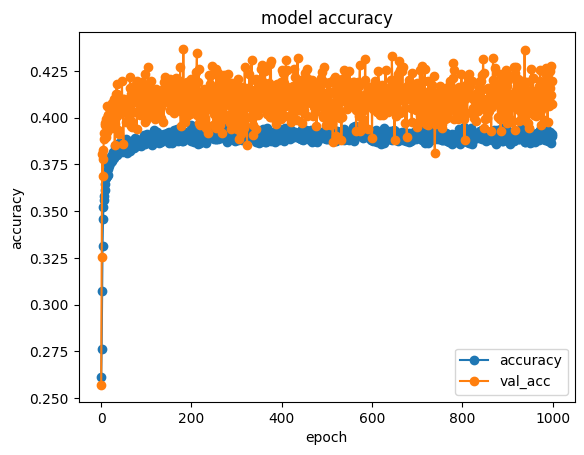

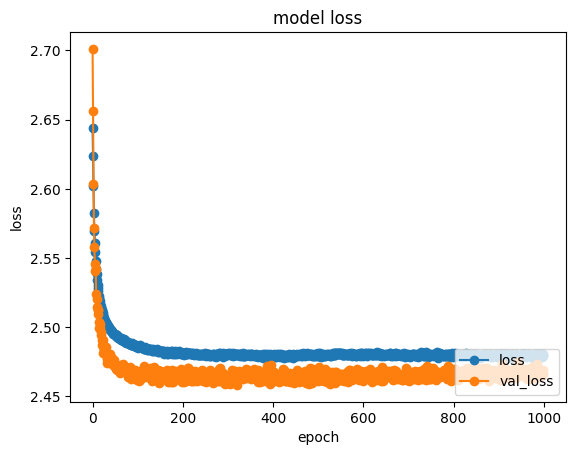

In [10]:
# loss 遷移のプロット

!pip install matplotlib

import matplotlib.pyplot as plt

plot_history(history)

In [11]:
# 楽曲の出力

import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import load_model
import soundfile as sf

model = load_model("../data/models/" + model_name)
file_name = "out_" + model_name
num_clips = 10

def add_fade(x, fadetime, sr):
    ft_len = int(fadetime*sr)
    r = np.arange(0, ft_len)*np.pi/ft_len
    w_fo = (0.5+0.5*np.cos(r))**0.5
    w_fi = (0.5-0.5*np.cos(r))**0.5
    
    x[0:ft_len]        *= w_fi
    x[clip_size-ft_len::] *= w_fo
    return x

def gen_xfade(x_pre, x_next, fadetime, sr):
    ft_len = int(fadetime*sr)
    if x_pre is None:
        xfade = x_next
    else:
        x_pre_begin = x_pre[:x_pre.shape[0] - ft_len]
        x_pre_end = x_pre[x_pre.shape[0] - ft_len:]
        x_pre_len = clip_size
        x_next_len = clip_size
        x_pre_len -= ft_len
        x_next_len -= ft_len
        xfade = np.concatenate((x_pre_begin, np.concatenate((x_pre_end, np.zeros(x_next_len))) + x_next))
    return xfade

def create_music_consider_weights(fname):
    first_index = np.random.randint(0, len(cqt_chromas))
    predict_index = first_index
    out = None
    rhythm_weight = 100
    
    for i in range(num_clips):
        print("-- generate " + str(i + 1) + " / " + str(num_clips))
        predict = model.predict(np.array([cqt_chromas[predict_index, :-1]]))[0]
        predict_chroma = predict[:len(predict)-num_divide]
        predict_rhythm = predict[len(predict)-num_divide:]

        index = 0
        similar_index = 0
        score = -1 - rhythm_weight
        chroma_score = 0
        rhythm_score = 0
        for cqt_chroma in cqt_chromas[:, 0]:
            cqt_chroma_chroma = cqt_chroma[:len(cqt_chroma)-num_divide]
            cqt_chroma_rhythm = cqt_chroma[len(cqt_chroma)-num_divide:]
            tmp_chroma_score = cosine_similarity(np.array([predict_chroma]), np.array([cqt_chroma_chroma]))
            tmp_rhythm_score = cosine_similarity(np.array([predict_rhythm]), np.array([cqt_chroma_rhythm]))
            tmp_score = tmp_chroma_score + rhythm_weight * tmp_rhythm_score
            if tmp_score > score:
                score = tmp_score
                similar_index = index
            index += 1

        print("score: " + str(score))
        print("predict: " + str(predict))
        print("cqt_chromas[similar_index]: " + str(cqt_chromas[similar_index, 0]))
        print("similar_index: " + str(similar_index))
        print("--")

        predict_index = similar_index

        tmp = add_fade(clips[predict_index], 0.1, SAMPLING_RATE)
        out = gen_xfade(out, tmp, 0.1, SAMPLING_RATE)
        
    sf.write(fname, out, SAMPLING_RATE, subtype="PCM_16")

for i in range(10):
    fmame = "../data/out/" + file_name + "_" + str(i) + ".wav"
    print("creating " + fname + " ...")
    create_music_consider_weights(fname)

creating ../data/out/out_cqt_chroma_batch64_e1000_1.wav ...
-- generate 1 / 10
1/1 [==============================] - 0s 285ms/step
cos_sim: [[0.94476277]]
predict: [[0.08635679 0.08506256 0.12529725 0.08494209 0.08979391 0.06620906
  0.06957749 0.08776822 0.05574024 0.05619936 0.036022   0.04051526
  0.02306341 0.02387855 0.0227248  0.046849  ]]
cqt_chromas[similar_index]: [0.00611353 0.00729442 0.00647489 0.0078125  0.00414894 0.00408228
 0.00522863 0.00573695 0.00173339 0.00491904 0.         0.00166549
 0.00080949 0.00306292 0.00261606 0.00062241]
similar_index: 2766
--
-- generate 2 / 10
1/1 [==============================] - 0s 23ms/step
cos_sim: [[0.94086236]]
predict: [[0.09316279 0.08522028 0.12586258 0.09185972 0.09411994 0.06953557
  0.06935059 0.08924639 0.05673155 0.05630987 0.03914139 0.03866172
  0.02475184 0.02079219 0.00475888 0.04049474]]
cqt_chromas[similar_index]: [0.00611353 0.00729442 0.00647489 0.0078125  0.00414894 0.00408228
 0.00522863 0.00573695 0.00173339 0.0

1/1 [==============================] - 0s 22ms/step
cos_sim: [[0.94086236]]
predict: [[0.09316279 0.08522028 0.12586258 0.09185972 0.09411994 0.06953557
  0.06935059 0.08924639 0.05673155 0.05630987 0.03914139 0.03866172
  0.02475184 0.02079219 0.00475888 0.04049474]]
cqt_chromas[similar_index]: [0.00611353 0.00729442 0.00647489 0.0078125  0.00414894 0.00408228
 0.00522863 0.00573695 0.00173339 0.00491904 0.         0.00166549
 0.00080949 0.00306292 0.00261606 0.00062241]
similar_index: 2766
--
-- generate 8 / 10
1/1 [==============================] - 0s 22ms/step
cos_sim: [[0.94086236]]
predict: [[0.09316279 0.08522028 0.12586258 0.09185972 0.09411994 0.06953557
  0.06935059 0.08924639 0.05673155 0.05630987 0.03914139 0.03866172
  0.02475184 0.02079219 0.00475888 0.04049474]]
cqt_chromas[similar_index]: [0.00611353 0.00729442 0.00647489 0.0078125  0.00414894 0.00408228
 0.00522863 0.00573695 0.00173339 0.00491904 0.         0.00166549
 0.00080949 0.00306292 0.00261606 0.00062241]
simi